# Develop Some Fluency in Probability Thinking

[Roadmap](placeholder)

In [38]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mplt
import pandas as pd
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']

## Probability Review

To treat probability rigorously, we define a _sample space_ S whose elements 
are the possible outcomes of some process or experiment. For example, 
the sample space might be the outcomes of the roll
of a die, or flips of a coin. To each element x of the sample space,
 we assign a probability, which
will be a non-negative number between 0 and 1, which we will denote by $p(x)$.
We require that

$$\sum_{x \in S} p(x) = 1$$


Let A be an event with non-zero probability. We define the probability of an event B conditioned
on event A, denoted by $\mathbb{P}(B | A)$, to be


$$\mathbb{P}(B | A) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(A)}$$

If we have two events A and B, we say that they are independent if the probability that both
happen is the product of the probability that the first happens and the probability that the second
happens, that is, if

$$\mathbb{P}(A \cap B) = \mathbb{P}(A) \cdot \mathbb{P}(B)$$ 

__Bayes's rule.__ For any two events $A$ and $B$, one has

$$\mathbb{P}(B | A) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(A)} = \mathbb{P}(A| B)  \frac{\mathbb{P}(B)}{\mathbb{P}(A)} $$

Suppose we have a false positive rate:

$$P(\text{positive test} | \text{no disease}) = \frac{1}{30}$$ 

and some false negative rate is 

$$P(\text{negative test} | \text{ disease}) = \frac{1}{10}$$ 

The incidence of the desease is $1/1000$

$$P(B) = 0.001$$

Let's define:

- A: testing positive
- B: having the disease 

Then we can have

$$P(B | A) = \frac{P( A \cap B)}{P(A)} = \frac{P(A | B) P(B) }{P(A)} = \frac{P(A | B) P(B) }{P(A|B)P(B) + P(A | \neg B )P(\neg B)}  \approx 0.0265 $$

__Inclusion–exclusion principle.__ In combinatorics, a branch of mathematics, 
the inclusion–exclusion principle is a counting technique which generalizes the 
familiar method of obtaining the number of elements in the union of two finite 
sets; symbolically expressed as

$$|A \cup B| = |A| + |B| - |A \cap B |$$

The inclusion-exclusion principle, being a generalization of the two-set case, is perhaps more clearly seen in the case of three sets, which for the sets A, B and C is given by

$$ |A\cup B\cup C|=|A|+|B|+|C|-|A\cap B|-|A\cap C|-|B\cap C|+|A\cap B\cap C|$$

<div>
<?xml version="1.0" encoding="utf-8" standalone="no"?>
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"
  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg xmlns:xlink="http://www.w3.org/1999/xlink" width="293.4pt" height="228.186585pt" viewBox="0 0 293.4 228.186585" xmlns="http://www.w3.org/2000/svg" version="1.1">
 <metadata>
  <rdf:RDF xmlns:dc="http://purl.org/dc/elements/1.1/" xmlns:cc="http://creativecommons.org/ns#" xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#">
   <cc:Work>
    <dc:type rdf:resource="http://purl.org/dc/dcmitype/StillImage"/>
    <dc:date>2023-02-02T22:00:04.909608</dc:date>
    <dc:format>image/svg+xml</dc:format>
    <dc:creator>
     <cc:Agent>
      <dc:title>Matplotlib v3.6.2, https://matplotlib.org/</dc:title>
     </cc:Agent>
    </dc:creator>
   </cc:Work>
  </rdf:RDF>
 </metadata>
 <defs>
  <style type="text/css">*{stroke-linejoin: round; stroke-linecap: butt}</style>
 </defs>
 <g id="figure_1">
  <g id="patch_1">
   <path d="M 0 228.186585 
L 293.4 228.186585 
L 293.4 0 
L 0 0 
z
" style="fill: #ffffff"/>
  </g>
  <g id="axes_1">
   <g clip-path="url(#p62e31c3468)">
    <image xlink:href="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAABIsAAAN7CAYAAADFuhr5AAEAAElEQVR4nOy9d3gcyX2g/XZPjsgZBMCcM7k556BdpV1FW5IVHHS2Pznbdz6fZJ2zfQ46yT5blmR5JSus4gatNi93l9wlucw5gCRA5DiDyaH7+2MAEMCknsGEBlDv85AAuuvtrk7V1b+urpJUVVURCAQCgUAgEAgEAoFAIBAIALncGRAIBAKBQCAQCAQCgUAgEOgHESwSCAQCgUAgEAgEAoFAIBBMI4JFAoFAIBAIBAKBQCAQCASCaUSwSCAQCAQCgUAgEAgEAoFAMI0IFgkEAoFAIBAIBAKBQCAQCKYRwSKBQCAQCAQCgUAgEAgEAsE0IlgkEAgEAoFAIBAIBAKBQCCYRgSLBAKBQCAQCAQCgUAgEAgE04hgkUAgEAgEAoFAIBAIBAKBYBoRLBIIBAKBQCAQCAQCgUAgEEwjgkUCgUAgEAgEAoFAIBAIBIJpRLBIIBAIBAKBQCAQCAQCgUAwjQgWCQQCgUAgEAgEAoFAIBAIphHBIoFAIBAIBAKBQCAQCAQCwTQiWCQQCAQCgUAgEAgEAoFAIJhGBIsEAoFAIBAIBAKBQCAQCATTiGCRQCAQCAQCgUAgEAgEAoFgGhEsEggEAoFAIBAIBAKBQCAQTCOCRQKBQCAQCAQCgUAgEAgEgmlEsEggEAgEAoFAIBAIBAKBQDCNCBYJBAKBQCAQCAQCgUAgEAimEcEigUAgEAgEAoFAIBAIBALBNMZyZ0AgEAhKhaqqqCooioqigjrnp6KoKEoi3fTPqflzHXV22qn5ABIgySBLErIsIUkgyyBJErJEYtrkfElOTJv6KcvSrLSz5k/9LiXmCwQCgUAgEAgEAkExEMEigUCwoJgK+KgqxKeCOMqMgM2M36fnx6+ljcUUolGVaCzxLx5TiMVUojGFaFQhGlOJRVWi8cT0xD+F2OS86GT6WFxNTIurRCPK9HRVTQR8jEYJk1HGZJIwGmWMRgmjQcJklDCa5OmfRsO1+SajhNkkYzLKGE0SRkNiumF6WQnPYEj8mwosGaYCSZN/z/xpmDNdBJoEAoFAIBAIBAJBNkSwSCAQlBVVVVNMm/H79H8JFEUlFI4z4YsxNhZhZCzK2HiYsfEoHm8Uz0QUjyfK6FiUkdEwI2MRRsYijI1H8XqjxOPJ61toGA0SdruBykoz1ZVmaqvNVFebqawwUeEyUeE2UVVpoqrSTE11Ik1FhQm3y4TTYUQ2qEhcCxjNjR0l/y2CSwKBQCAQCAQCwVJCUlM9qQkEAkGJUBSVSFRhdCzCwGCY/sEQIyMRhqcCPaNhBobCDAyGGRwKMToeIRiMoyiACiqzI0tzC7SlUMJJ0/+l+1uCyc/XTEaZqkoTDXUW6uus1FRPBpSqzNRUWaivs9BQb6W2JjHd5TRiMRtKu0ECgUAgEAgEAoGgrIhgkUAgKCrhSJzRsSj9gyF6+4J09wS42hukrz/EwGCYoZEw454o0ahCPK4m/k1+MhaPJz4pm5qW+FtdEgGgYiLLTH/KNvMTNoMM8szpBgmrRabCbaKx3kpzo43mJisNdVbqai3U1VpoqLPQ3GTDapFFCySBQCAQCAQCgWCRIIJFAoFg3ni8iU++hkcjDI9EGBgM0T8Qom8gxMhoBJ8/RiAYIxCM4w/ECATiBINxgqE4oXCiryBREukTWQaTScZmNWC3GbDZDNisBqwWA1arjNVqwGE3Uj8ZOKqtsVBTY6auJtFKqanBSmWlOdGZt4glCQQCjaiJ0QhQYjHUuIISj6PG46hKHCU2+TMeR40lpivK5Px4Yv50+nh8lo8kIRsMSAYZyWCY/N2AZDQiG2Qkw9RPw+R8I5LRgCwbpqdJBnnak43GydacooATCAQCweJCBIsEAkFGpkoIfyCG1xvFOxHFOxHDMxFlfDzK6HiE0bEIY+OJfoHGxqOMjiVaDA0NR/BORInFRDGzmJEkqHCbqKkyU1VppnKqv6QqE3U1FqqrLVS4TbhdRlxOIxVuE5UVZqoqTbicRgwGSbRKEggWGUo0SjwSIR6OEI9EiIVDxIMhYqEQ8XA4MW/ynxKOXJsWjaJEosSjUdR4bDIwpEwGihTUuJIIFCmJINDc6dOBoan5M11FAUlCkuXEP4M8GQRKBImmpklT02TDtcCRPOOnfC1YJBkMyCYjBpMJ2WRK/LRYMJjNGMxT08zIZjNGqwWD1YrRasVgsWCwmBPpLBYMJlO5D5lAIBAIBLMQwSKBQABcGwI+NNnaJxyJEw4rhEJxAsE4g0NhevqD9PUH6RsI0dsXoutqgCvdAXz+mG5bBkkzhpqXpKnh6pkcgn5ydDB5xjyJ6aHqs3rStWHup9aDCop6bdQ2ZWr0NmXmSG7qZBpQlTnpZs5XUkybm07Jc8eozOrXqJiOzSbT2GClsd5KY0Pic7a2Fhtty+w0NdhwOAxYLDIWc6K10lTLJbNZnt63AoGgfKiqmmixE4+jxmKJgE40hhKb+hlDjSV+KtEY8ViUWCBA1Ocn6vcT8fmITEwQHvcSmfASmZiYnBcg6vcT9fuITCTSRgMBYsEgsWAw0RJoAWCwWjDabBhtNkw2GyanE5PDgcluw2i3J6Y7HJjdLizuCswVbswuJ2aHA5PTidnpxOiwYzCaEi2cjIkWS7LRiGwyIhtNkz8T/yRDIo0ky+XedIFAIBAsYkSwSCBYgqQabj6uqHi9MS5c9nHpsp/LXQEuXfFz8ZKfsxe8eL2xpM6jSxZwYEbQZ0ZnzTODOdJkGmb8LcuTQ9GbEkPYm0wyZpOM2SxjtsiYjTIms4x5ap5ZxmKamiZPDmMvYTInAhkWs4TJbEgsy5jwzOZEUMNsTvTzoygQjSlEoiqRSJxoRCESU4lGlRn/VMIRhcjMaTGVyNS0iEokGicaVYnGEn9Howrh6OTyoirROctUJzv3Vid/mQ4oMTu4NFXi66XkN5tkmhqsLGu10d5mZ2WHk7WrXKxe6aS50YrNZkSWmexTSZr+ferYCwSC+TFVDZxueaOqs36qiooajxH2ThD2eAiNjhEcHiYwOEhgaJjQyCihsTFCY2MEh0cIDY/gHxwkFgzqp6BZABjtdux1dVirq7FWV2GtqsRaVYWttgZ7fR222lqsVYnplqoqrJWVGKwWkOTJlxsSyJMB9sRbjOlgkigrBQKBQJAPIlgkECxi0l3eA4Nhzl2c4PxFH+c7fZy94OPUGQ+XuwJz6vYljAZlwGyWqaowUVlppsJtxO1KDANf4TZRXWmiqso8+ZmTCbfbSIUr8RlUhds4GViYmR99bFOhUFWVsfEow6NhPJ4Znwl6o4yNRxgdjzI+HsEzMfkZoTfKuDeKxxMlFs+3+C/NPrTZDDQ3WFnR4WD1Sifr17rZuM7N2lUuKipMmIzJyxMPRQJBMtmqeuFxD+OdnUx0XcXX20ugv5+J3j4murrwXunG399PLBQSwR89Ics46utwtbbibG3B0diIo7EeR2MjzpYW3O1tuFpbMNrtWVsgiXJTIBAIBKkQwSKBYBEz5onSednH+Ys+zl3wcfqcl+MnPfQPhmaMOsb0yGP5lgb5hA6sVgNVlSaqK81UV5qprTFTV5foFLm22jIdBKquMuN2mqZbkzCzRRFzWhdNtTaZboWUYDFXhGd9lsacVkVz5s36fC2uMu6JMjIWYcyTCCiNjkcYHo4wNBJmZDQ8GWiKMu6J4J2IlWX7ZInp0dpkAxjkxGhtdbUWlrXYWbXCwZpVLjatq2D9Ohd11RbMZvFphkAwhaooxKNRfD09jF/oxHuli4nuq0z09DDR3Y33ShfBoeFEKyI10ZKIyZ8zWxvpkRJ+TatPZ6r/pVmtiqTJ1kaJf9aaapyNDbhaW3Ata8O9ooOqFStwty/D3tCA2eUSn7MJBAKBICUiWCQQLAIURWVkNEJ3b4CLnX7OnJvg5FkvV3sD+PxxQqHE6GOBYJxAIEY0VYfTBa7ZWiwyjfVW6mst1NZaqKsxTw61nui3xu0yYTZJGI0yRmPi59SnYibjjOkGCYNhqil9jpkQJJizi6aK/VhcJRZTicWUxM+4Smzyk7hYLPEzHkt8ChcMJfqtGhoOMzwaZnQsyuhoIrDUPxhicDBEPN/+k/LAaJSwmBOjsdmsBuz2xGhttTUWWppstC+zs7zdzqoVLtaucuJymjAYxHkiWJyoikI8HMbX14/3ypXpFkK+vj78fQMEBgeI+vzXOpcOR4hHJn+Gwyix8gSDBcVHMiY63zZYJjvStlimO9g22W1YKisTrZFaW6hoa8O5rAVnczP2+nqslRXIouNtgUAgWLKIYJFAsMBQVZVwWKF/METnlUTfQld7AgwMhRkZiTA8GmZgKEz/QIiJiShKka5wSQK73ZBoBVRlotJtxl1hotJtmm4x5HKbcDmMOBxGHHYDTqcRlyMxKpbZIk+3Dsq6zVyLdWgNDS0UZyGgqolAkt8fw+eL4Q/E8QdjBAJxfP4YExMxPN7EaHgeb+LfuCfKmCfC6GiEkbEI4bBSksYJVqs8/RlidbWZuhoz9XWTnWvXW2mot0x3st3UYJ3uoFwg0D2qSjwaI+L14h8YINA/QGB4KNFP0HS/QeOERscIj48R9ngJe71EvBNEfb5ECyE9IkmTnTZPDmMvzxy2fmooewOS8dq86WHr5/ycNd84tbyp0c4MIEmosfjk6GhxlOkR1OKJUdfi8Rmjq8VRFCXRcffk9JnpE6OuxaYdZcZobFOdgeu1RdYUkixjsFgSHW9XVGCtqsJSWYGlogKzy4WlsgJrdTX2hnoc9fXY6mqx1dRgqarE4nIl9qlAIBAIFi0iWCQQ6BxVVfEH4oyMTg1PH2FwOMLlLh9nzk1w9ryPziv+ogxRL0lgMsk4HUYcDgN2mxG7zYDNZsBhN1BVaaZhsvVQTXXik7GaKjN1NRYqK01A8khWKmqik+pUERMVkDKEUvJx0qJnp0xMZTVFltNuxeQnbvG4yuhYhNGxRHBoZDTC8EiYwaFE8NI7ESUQiBMMXWvh5vMnAk6RaPEDSbU1ZlqabCxrsbOsxUZHm4Pl7Q5qqs1UVkz2d+Uy4nIaMRrFJxmC8jE18ljU5yfs8RDxThDxJUYPC3u9BAaH8PX0MNF9NdFyqH+A4NAQobHx8o4eJsvIk61YZLMZw6xRvEzIZtP08PLTQ8xPDhs/PfrX1Chf08GeGSOAGecEiIzGWf+kGYGjqVHEEn9fmyfJ0uTIbfHpQI8yFSiaHM1tetS3qZ+To70p8WtBo0RwKZa8rNjUiHFxlFj0WguuSBQlmviX+D0yazS5eCyKMpVGL628JAmjxYKtthZnSzPO1hacTY3YGxqwTwaNzG435goXZpc7Mfrb5AhwBrO53LkXCAQCQQEQwSKBQGeoqjo9MlY4HCcYUrh4ycfBw2McOTHOydNeLl72EwwW7qFAkhKf9ZhmfBI29ZlPdZWZ9jY77csctDbbaG600tRgo6nRitNhnMo1hQqiZF5SPk4uS9KHsxgZ90QYHE60eOvpC9J9NciVrgDdvUHGPRFC4fjkJ3GJz95iUZVYXKGYjSFsVgOb1k92mr3GxZpVLlavcFLhNmG1yFgsiRHxDIa5naQLBPNnqvqVCCBEUCLRxJD0kTCRCR+ey1cYO3OW0XPnGe9M9DXk7+8nFgiWLpOSNLvVjiwnWunIM1r+TP5usJgxOR1Y3JMtU9wuzJPDwptcTsxuN5YKd+Kn2zX5042loqJ021MqJo9taHL0uLDHQ2Rigoh3gvD4eKLF10QiABiZ8CXmeTyEPR6igUAieKXMaKmU9DPxr2ytlyQJk82Gq72N6rWrqVy5CndHO+62ZTibm7HVVCeCg2ZzIjhoNF0LAoqyVCAQCBYMIlgkEJSZ6WGLJzsfDkfiXLzs58ixcfbuH+GV14fovOwv6Dqn6mrSZOfBNquBjjYHa1c7WbncyfI2O23LHLQ02ais0NBfgYi8COaBdyLKwFCIrqtBLl32c75zgouX/FzpCuCZiBKNJiJGqspkS6Z8yH7ySFKi4/WtGyu49cZart9VzeYNFTQ2WDGb5OlO1BNpxYko0M50VWu6vFdBUYiFI4xfuMDgkaMMHz/B6JmzjF24yET3VZRotHQZnHFTmD6zZRmz04m9oR57bW1iOPfqaqzV1djqanHU10+3MLFUVWKy29N8llSoglvPN5rCObFwmIjHS2h8nNDoKKGREfyDQwSHhgmNjk1+bjhGaHSU4PAIYY9nVsBoVrW+DFV82WTCVltD7aaN1G3eRPW6tVSuXkVFRzv2+vpEwAiYWaBO/y0QCAQCXSGCRQJBmYlEFHr6grz42iAvvTbIgUOjDA2Hpz/NKdQVKklgtxlYs8rFujWJFhQr2h20t9lpabJjnByGfGYgKfFTQwVOz/Vxge6ZDphO/jf1U1FUxjwRevtCXLri53ynjzPnJ7jY6WNgMEwwlEvrutxOnqnnGLNJpqXJxo6tVdx0fQ1331bPqpVOjKKzbEEOqKpKaHiE/ncOMXziBCOnTjNy6gxj584TDQRAVZMCSsVGNpuxVlXiam2loqMdV3sbzubma0Ow1zdgcjpmPcQn3Q/m/J36fiGCRbk4SdXyOcEfdc68aCBIYGAg0Y/V4CCBgUF8vX34enqZ6OrG19dH1O8vfZ9VU4GgyZ+y2YSlsoKaDRup37aF+i2bqV6/Dnd7G7bqahEsEggEAh0igkUCQQlR1cRQ9afPeTl8bJxDR8c5dnKczst+gqHEiFORiEI8Pr/LUpZheZuD1SudLG930NHmoG2ZndYWG1azjMkkJ0YfM0oYjdKcz2zKXFHOuCTxGdpSYup6icevjc4WnRytze+PMTgUpuuqn0tXApzvnOBCp5/+wRDhcGEfiowGCbM58VmazWpgWaudnVsr2ba5ki0bK1i/1oXNasy+IMGSITA4xNj5C4yePsPIqdMMHjuGp/NyYiSySCTx6dlkvzVFCw5JEma3C3tdHc6mJlzLWnEtW4azpRlHUyO26mpMDkfi86Cpvn+mPjmb0dn0TNJ2G5chG/k4Am2ok2+UpvtXmuqYOxZHjcdQYnHikShhr4fg0BC+vn4muruZ6O7B19ODf2CA0OhoyT5tlGQ50V+VxYzBZEY2mzA5HNgb6qleu4bajRup27KZ6nVrsVZXib6PBAKBoMyIYJFAUGSiMYWx8QjnL/o4esLD4WPjXO0JMDSS6Ax4bDyCP5B//0Nms0Rzo42WZttkB7422loTHfe6XUacTiNOhxGn3YjdnvhEIOdPaPQcWdHBU0dJsq2CKmlw5gzPlo+zEIaBi8UUwmEFXyAxQpt3IsaELzEK29BwmP7BEL19Ibp7AlzpDuCdiBas/yOb1UB11WSH7tVmGuosrF/rZuumCjauddNQb8VmE6MELRXikQjhsXHGLlxk5PRpRk6cwtvVTWh0lPBkPzSh0TGi/sJ+TgxMB4SsVVXYa2ux19fhmOyE2FZbi8XtwmizY7TbMNntk50Q2zHaEp0Qy8YZQc65Hdxn6tVewyAEs1MtLidjUZZmZrkcVVVRolFioRCxYJCoP0DU7ycWCBALhoj6Ex2pB4aG8PcPJDpMHx4hNDpCaGyMqK8I5+0MJFnGYLUk+rqqqsRaVYmlohJ7Qz2u1hbcHe1UrlhB9drV2GpqxAhsAoFAUEJEsEggKDCqqhIKK5Od9wbo6Q3S3ROg87KfsxcSI5j5A7G8XibLMjjsRqqrzNTVWmhqsNLYcG1I8MQQ4RYaG2yYTfrvlLdUcQk9O0uX4oTYIpE4494owyORRNBoIERvf4ih4TCjk6MJjo1FGRkLMzoWmXcASZLAbJbpWGZn7WoXK5c7aWu10dyY6AS+tdlGU4MNWRb9HC0WVFUlNDqaGI2sp3fyk58evFe6GL/YyfiFiwRHRws6MtlUCwyzK9FJtLWyEsvUMOeVFVgrEw/Z1upqbLW12GprsFRWYrRYplsHZbp6FmicXlAAlFiMaCBIaCzRB1JweCTRCff4OOFxD6Hx8UTQc2yyY26vN9Ept8+HEokULV9mtxt7XS3O5mZcyxKfSjpbW7E31mOvq0v8q6/D7HIVLQ8CgUCw1BHBIoGgAMRiiU/IvBMxPN4oV3uDvH1wlINHxjh1xktPXzDvYe0tZnm6hZDbZaKx3sryDgdrVrnYtM7N8g4HJmP2wJCq5t4lwDVH+2NBqZwZdh7OEkPPrbxKdPjGxiN09wTpuhqgqzvAxct+Oq/4mfBGCQTjBENxgsE4oXB83l8FVVeZWN7uYMvGCrZtqWTbpkpqqsy4XSacTiM2qwGD6PNowaDG40SDQaL+yZGrvF5Gz55n4J13GDxyjLFz5wgMDBakTxjJYMAwOZy80WbFaLNhtNmwVFRgr6tN9CfU3IR72TLc7W04mhox2mzIBsO1S2nq/J3VvOTatJQB7nTOjFY1U7NnOVm+L8vaSCnFvPTOtSmFcNKtP8lJIRbaSZfBrMVjER2VxLkf8/uZ6OnF29WNv7cPf3//dP9I4bHxRIulUIhYKHztM8siBZFsdbVUrVlN1ZrVVK9ZTfXatbjalmFxuzG7XJgcdgwzAqQCgUAgmB8iWCQQ5IGqqqgq08N8j45FOHNugjffHuHVNwZ5+51R8n2pLMtgMEgY5EQ/Ke2tdm66oYbrdlSzcZ2buloLRmNhK0J6jgtor+DPz8l1/VmdHMVszjy/CJm/kyFtPk4uFMOZagF48rSXU2e9nDk3wbmLiVHYgsE48bhKXFFRFHV6FLZ8M+FyGrnlhhpuur6W63ZUsXa1iwq3CaNRwmiUkSXR6khPqKp6re+XaIyob4KR02cZOHSY/v0H6Hnrbfw9vfNfkSRNDkVvQJ4ckt5SVYWzuYmKjg4qV66kev1aqlavxl5Xm+i/pVQXqB6dua6grCixGKGREUbPXWD84kU8ly8z0dXNxNUe/H19xCPRxHU041+h++eSZJmKjg5ab7+Vphuuo37bVtxtyzDa7cgGI7LRALIsyleBQCDIExEsEgg0MvNSURQYGAzx42d7+dkL/Rw6Ns7wSHje9SCrRWbThgq2ba5k+5ZEB7qtzbZ55jwTxaqpp3vvW2xHC+LpJB163pulOAKKohIMxjl2cpy9+0c5eHiMcxcmEp+rFehOKUlQXWVm++ZK7r2zgYfvb6RjmQOTaebWSWJgoBIytxoUC4XwdnXR9eLLXH7ueXrfPkDE4ynoaFJGmxVbXV2iU99NG6nbvJma9euw1tRgtFoKth6BoNQo8TixYJCx8xcYOXWasfPnGb94Ce/lK/h6e1Gi0aKtWzIacTY10rBjO62330rHffdSuXJFUj9HIngkEAgE2hDBIoFAIx5vlGMnPbzx1jCvvTnMwcNjRCJxYrFEC4R8riSH3UBri53d26u4+YZadm6txOEwYjJKyJOti2S5+JUaPT/wi5ZFWfIhWhYVzpm8iOOKSnzyuvb743T3BDh20sOBw2Ps3T/C2FhE2/WeJhOSBLIsTbYskljV4WT3zmpu3F3N7u1VrF3tnk4nKC5To0kNHT9B79599L29n8Ejx/BevoISj6HEYqix+fU9JJvNuNuWUbd1y2RQaC2u1lYsVZUzWhVNjjwmpfmkWM8tfkTLIsEMpsrRROs8BVWJoyoqajxGNBjE03mJ4ZOnGD1zlvELF/F2dREcGaVgIxBIUmIkP6MB2WDE3dZGw+6dNO7aScPO7dRt2YzRai3MugQCgWCRI4JFAkEaFEUlEIyxb/8or7wxxOFj4/T1hxj3RPBOxPD5YzkvU5Zg9SpXYtSkdW6WtzloqLfidBpwO004HMaidYQr+ixawug6QpOHU0LiikokouCfHHXN441y8ZKfM+e8nL3g4+IlHz29wXm1PLJYZJwOIy6nkaoKM8tabdxyQy03XVfD2tUuXE5jSYLGSwUlHicwNMToqTP0HThI75t7mbjaQ9jjITrhI+r3E59HnyvO1haq16yhctVKKpYvp6K9DWtNNSaHHZPdkRiJzGJGNhgSBd/kNTAzfsLk7wXtfygfR0rSRZ9FRXDSZTBr8VhEJ9tycnWmPu+Mh8NEAwFiwSDxYIiIP0BodDTRQfyF84yeu4Dn0iXC456CtEKSzWbMTicmpwOzy4WttpaG7VsTn61t34ajsRGT3T7v9QgEAsFiRASLBIIZqKpK/0CYziuJh8FTZ72cu+DjQqeP3v5Qzp3fGgwStdVmWptttLc5WLncQfsyO81NNhrrrVRVmrDbjNkXtEjRGidI+XCzSJyli56jUamdqdvl6FiEwaEwg8NhBofC9PYHuXTFz4VLPrq6g/j8MeLx/G6tsgwOh5EV7Q462hx0LLPT0Z4oO1avcNLRZkeW9T/SoZ6YGjp87Nx5Rs+eS7RmuNLFxNWreLu68Vy+TMwfyGvZstmMraYGZ3MTrrZlVC7vwNnagr2+PjEqWXU11qpKDJb0n5YVupVkIZ1MiHJMUAiUeJx4KExobIzg8DCBoSFCIyMEhoYJDA7h7+/H19OLt7ubiHeC+X7vL5vNOJubcLe34WptxdXairu9jYoVHVStWoVrWWv6Fn4CgUCwxBDBIsGSJ9GCKPGpydWeIGcvTHDilJejJz2cOO0hHM6tabTJJFFXa6G+1kJ9rZW2VjsrljtYs9LJujUunA4jEpJ+n5PLue4F+sRSkmyroGo5beZEr/JxRJRMO7GYgs8f49wFHyfPeDl3cYL+gRAjoxHGxqOMjkXyaoU4hcNuoG2ZnfVr3Gze4GbTejetzXYaG6xUVZqxWUXnralQ43EiEz6CIyMEBgeZ6L7K4OGjDB47xujpM/gHBlAiubdakGQZk9M5OTx9Nfa6elytLbg7OqhctYKatWswV1RMtpQs0udkWtyiOhkWNqc1kpRqxiJwMu7ONDMXm1NUVJWw14t/IHHtei9fZuziRfy9/YTGxgh7vUQ8HsJeb17X8Uys1VW429qoXr+W2k0bqdmwHkdDA7a6WqxVVZidzqQ+jwQCgWCpIIJFgiWJqqpEogqhkMKEL8alyz5+/Gwfz73UT3dPgFBIe4BIksBslrGYZew2IzU1Zm7YVc3N19ewZVMlVRWmgo9eVlzK3Hoj45LycXJZkj4cwcIlrqj09AY5e36CYyc8HDo2zoVLPkKhOOGIQiSi5N3qSJKgwm3i7tvruf3mWrZvqaK1yYbdbsBmNWCxyJPplt4ZN9X3UCwUIhYIEPZ6GTt3nv4D79Czdx+9b+4jFgzmvmBJmhzK3ozBbMHkclK1YgWN1+2mYdcOqlavxuJ2JUZcmpsnCvsZTyaHDMvKx8l1/YV2BOUk/dGZz5ysn+FpcHz9A4yeOcPombOMnj3H6JmzBIeGiYVCxMNhlGh03h3RW2tqaL3lJpqu203dtq1UrlqB2eXCaLNhtNkSIxguwTJWIBAsTUSwSLBkmO50UYVwROHEaQ+v7Bnimef72XdgJOflSVLiX2WFmW2bK9m9o4rrdlazbVMlia4opPJ/Q1BoJx16dgSCMqKoKr19IV57c4i3D45y/JSHq71BYlEFlfl9UeF0GFi7ysXtt9Rx/10N3HRdDUajPF02LfYHmunqy2RfKLFgkCsvvcLFnz7N1T1vzG/kpcnPUMxOJ/U7t9OwYzv127dRu2kjtupqrTmkdAUjOXr5OFOeaOJaPkcwjaqixGKMnDnL1dffpO/t/YyeOUNgaDgRMJoMIM8HyWjEXl9Py0030HHfvSy//16sNdXIRuN0JXCxl7MCgWBpI4JFgiWDoqhc7grwxHev8JOf9XHpip9AIJZzx7RGo0R1lZnbb67loXub2LmtCofdMNmPSCLNdOVBz4EfESwSCIrOzCD1VKC6byDIwUNj7Nk7zJ69Q0z4YvN6ppkaXa2pwcojDzRx/12NbNtcQXOTrUBboU9URWH07Dn63nqbKy++TNdLLxMaG59uZZQPZrebiuUdNF23m5Zbb6bput0YzObpkcoglyCcCBbl75Rz3Xp2BNOo6vRZjKqiqipRfyDxyemRI/S9vZ+eN/YSHC3ASGuTQSHZZKJh+1aab76JlltuonH3bhwN9fPdEoFAINAtIlgkWNQoikpvf5ADh8b46c/6eG3vEBMTMQKBGLG49uHurRaZrZsq2bmtim1bKlk/2feQ3WbAbJYX2Vt88RlauR3B4kVVVeJxlXBEIRSK4/PFOH7Ky9ET4xw94eHM+Qk83vxawxhkCdvkJ2kNdRbWrXFxx8113HdXA+3L7IuijFJiMTyXLnPxqae58uLLeDovERofJxYMEQsFyTn6L8vUrF2TGBlpxw6qVq7AVleHwWLGaLVe65haknTxeZb4DE1QfPT7GVo2B0VJdJgdjhAPh4kFg4ydO8/Q8RMMnzjJ6JmzeLu65tXiyGA2Y7BaMFitWNxu6rZspuPee1h2x204W1ow2qx5L1sgEAj0hggWCRYdqpp4ENv/zih7949w7KSHzst+rvYEGRwOa16O3WZgxXIHu7dXsW1zFc2NVmprLFRXmXC7TLoeylpFJfOjTQYnh5p9cZwMjxH5OGnRs1MmMjxdpt2KQjoq6TvkLrWjdfo8HJVEwHrcE2VsPJIYZW04zMVOP0dPjHPslIfRsQixWO63aZNJwu0y0VBvpaXRytbNlVy3o4otGytobrRhtS6cDlujwSDeS5cZPHacgYOHGD5xgonuq/j7+okGAqjxuOZlSbKEo7ERd0cH1WvXULN+He62Nmx1NVirazA7HRlHLisYei5+FlCRVQrmtQtzkPXslJQCnbNTjzeRiQnCY+OEx8cJjo7h7+9j5NQZhk+eZPz8RSI+X05lyEwkWcZSWYmzqQl7UwOVK1ZQvS7RUXbtpg3Y6+ryWq5AIBDoBREsEiwaYrFEZ9Wnzno5fHycg4fGOHx8nO6rQc2jEbmcRlqabLS22GhvtbNqpZON69ysWenCYpF1HSBaiGitE85Mt9icpYuen3zL84Q91fF+X3+Isxd8nLswQffVAL39IfoGgvQNhPD783uoaWu1sWl9BevWuFi13Mnydgcrlztoa7Xrr2Xk5Cclvt4+Rs+eZez8BcbOnmfkzBlGT5/B19Ob0+IkoxFnUyPu9nZcrS24li3D3bYMd0c7lcuXY3I5C7b9hT5zShi7FDElwaJHiceJ+vx4Ll1i7MIFvJev4OvtIzAwgL9/AF9vH1G/P+/l22prcbe3UblqJVVrV1O9Zg2Vq1ZS0d6G2V2BwWwq4NYIBAJB8RHBIsGCJxSKM+6NMjgY5nynj2ee7+Op5/rwTkQ1tTQ2GiUq3Caqq8ys6HCwfUslO7ZUsm6Nmwq31hu7/qvaqjrd5UYejva8lsqZYefhLDH0HC8Rhy8tqgo9fYmR1U6c9nD8pIcrVwOMe6J4J6JEIkrOXXEYZGhqtLF9SyW331zHjbtrqK+zUFVpwm4zlHXkRiUeJxYMEh4bJzg0TN+BA1z++Qv07T9IcHg4p7f/Rrsds9OB2eXGWlNN3dbNNF9/PXVbt2CtrkI2meY2NssaSElKk6FF5UyHmclydVJ9LzZjWspgdSEdKUnP3DJlzrQMDQ/TKZo+QSqEk279SY6mVpPzc9JlMGvxWEQn23IWg6PEYvh6ehg7f4GRU6cZOnocb3c3Ea+XyISPWCiUdyf5ksFA1ZrVtN15O03XX0/Fig7sdXVYKtxYKiqQjEZ9BekFAoEgBSJYJFiQzOz340KnjxdfHeRnL/azd/+Ipk82ZAkMRgmLWaam2sydt9bznoeb2bDWjcUy9XmGnp+WS/2EreftEtEGwdIgGlM4e36CF14ZZM/eIbqvBpjwJfpfi+fQB9tMGuosvOfhFh6+r5EN69zU1pgxGWWMxsQ1VeyHGXVyJDMlEiXs9TBy8jSXnn+eCz/6KZ7OSzktSzIYkE1GjBYrNZs20LhzJ43X7aJhx3bMTufMtU4WG+m3LWWpkiXiXiqnbKTIV/bARL4Os1IVxckhVfEdveSjUM7CRFVVxs6eo+fNvfTtP8jo2bP4BwZRYzGUWCzvz9WQJCqWd9Cwcwdtd95B+913Ym+oRzaZpkdWE4EjgUCgR0SwSLBgmHmqxuMqr+0d4itf7eT1fcOMe3J787Oi3cFNN9Rw16313Li7GrvdWOjsLhCKVXFM99632I4WRGU5HXrem0vjCGhHVeFyl58jx8d5fV9iVLWh4ci8ltnRZufG3TW8+6FmHrqvEYs50cqo0A8xc6sdQ8eOc/pb3+HScz9n/MLFvN7kmxwO6rdtYcW7Hqb97ruw1lRjMIlPPgSCJc88bjiRiQm8l7vo2buPKy+/zMA7h1Ai+bU0molsNtN+952ses+7absz0TG2PKO8EoEjgUCgF0SwSLBgUBSVzst+Xn59iP96sovDx8aJRBVNLYkkCaxWA/fcXs/7H21h4/oK3C4jRoOEwZD9jc5ifyDW8/Zp/3Rgfk6u68/q5Chmc9LOKpWTIW0+Ti7o2SkXidHhEy2KYnGVUDjOwcNjvPDyAHv3j9A/GCIaze32LklgNEiYzTJ1NRYef08r73ukhdUrnbhdhQu8qIpCYHCI7tf2cPKb36J33z7i4QhqLIaaw3d17vY2Gq+7jpabbqBh5w7s9XXIRhOy0ZDfm/r5nNDCKb4z1xUsfPRcuKugkmj5qMbjKLEYoZFR+vYfoO/AQYYOH2Xs/HmUmLY+MeciGY3IRiNmp4OaDetpue0WOu69h+YbrhctjQQCgW4QwSKBrlFVlVhMZc/eIX7+8gDvHB3nSpef4ZEIgWD25sAOu4HVK53cuLuGW26oZVmrnZpqMzarAYMhyxftmioXWRw9NcLJtowFRuE3OfVcPTuZKcEB1nlFv+ARu8xi2RxVVVEBvz82ObJalM7LPo6f8vDOkXGOnRwn168njAaJmmozNdVm1q9xc/3Oam69qZZtmyuR5fzefEcDQXr3vUX3a3vof/sAnkuXCQwNEfX5NPmS0Yi1qpLmG2+g7Y7bqVy9Cmt1NWaXE7PDMevNvEAwm4V3XRfeEcwHVVVR43EiPh9Rn4+w10tgYJDBw0fpfestho+fJBoIkPP3wJKE0WbD4nZjra6iYsVyOu69m9bbb8Pd3jbnE1qBQCAoLSJYJNAliqISCMY5fGycl18f5PDRcU6f89I/ECYYyv7U01BvYfvmSjauc7NqZWLkn+VtDiwWWbyt0RFaq7sz0y02Z+mi54eqhf3wFo+rjHsi9A+E6OoJcvGSjxOnPJw+N8HAoLYydCbVVWaWtdhYvcLJxvVubryuhh1bq3A5jCmC7rNR4nHCHg+9e9+id99bjJw8xdj5C0xc7SEWCGRfuSThbG6mcuVyqlavpmr1KipWLKdq1UoslZWJ/j50RKHPnFK1rFzYZ7xAUHpURSEWCuHr6cVz5QoTV7rwdF7Gc/kynitX8PX05tXHkcnlnBxFbUWizFu7htoN66leuwbZbBZ1WIFAUFJEsEigK+JxhZHRCN29Qc5d8PHynkGeeb6P0bFI1lF/zGaZmiozba12Nm+s4JYbati43k1ttUX7kPd6fq4sZ21ez/nVwRNLSbKtgirl2NgtT0dEyQpPyk1PNXHGtEI4iqLiC8Q4dGSMw8c8XOj00dMXZHA4zOBQbp+qGSZbG91zez2331zH6pVOlrXYqas1Y7fNDtpEg0GCw8N4r3QxcuoMl3/+PFf3vE7EO5H9UzNJwmi14mxpwdXaQvX6tdRu3EjNhvVULO9ANiQPQjBruzOeZ6V3Uk6ezydbubQ+LYqTYWFpz8XF5czn0C8WRzATlVgogufSJcbOnWf03DnGzl/A39uHr6+f8NhYXp+r2RsbqV67hsadO2jYvYPKFStwty3DXFEh+mQTCAQlQQSLBGVHVROj+Pj8MUZGw7x1YJTnXhrg5y8NMDqevcNWq1XGbjPQ1GBj944q3v1QM9u3VGZ8+7JAYxIlosyf1GRcUj5OLkvShyMQFIuBoRCnzk6w9+1h3tw3TP9gGH8wRiSiZA3Iz8Rqkbnlhlruu7Oem66vZXm7A5fTiJEoEZ8P76Ur9L71Fp3P/Izu115H1fCgJBuNGKxWzE4nrmUtrHjwQTruvxd7Qz0Gs3keW50bWeJxunTIsKx8nFzXX2hHUE7SH535zElOUSonPfk42XOSaFEZmZigd+9bdL3yCkNHjhEcHSMWDBIPh3PvxF+SMLucLH/gAVa9+13Ubt6Eva4Oo92G0WpFkuUccy8QCATaEMEiQdmYOvUUBXz+KN/4ryv853e6OH/Rp+kzCUkCi0XmtpvqeOjeRm7YVU1To03jyilv2/6F6qRDz45AIEhCVVXCYYVX3xjix8/0cuDwGGPjERRFzbnLjboaM7ffXMdnPr6c5fFznPr61+l+bQ++nl5tl6skIckyVWvW0HLzjbTfczfN1+8Gee5nw+UsNPRcyKUL/RTamfLEMSifI1iIhMc9DB49Su/et+h5cx/DJ08mWljm+QhWsWI5rbfdwvIHH6D97jsT/RrJxRm9UiAQLG1EsEhQNmIxhd7+EN/9YTdf+tcLDI1EiMezn46yLFFZYeID72nlI4+10dBgwWySkaTFdZPUc3VVVHHzQ8/Hp2DHdB4rz0nVszNb1SUzb/2KCsPDYQ4eGePlPYO8+sYwwyPhnJaXKH+hNdbJdaFXWBk9QaUynHn7JTDZ7ax696Osft97qVqzGovblVjQ9HLz3YPiRJxXU4tcpFI5ybKg1MzrcJXinMoxCJqPMy1qd6bLW1UlHo3i6+3l4lPPcOnZn+O5fFlb/21zkSRkoxFrdRVrHn+MzZ/8OFWrV2G0WnNflkAgEKRBBIsEJScaVdi7f4RnX+jnhVcHuNoTxDsRzfoJhNNhZON6N3ffVsfdtzVQV2vB4UiMapbrA4WonmZCfIZWbkcgKDXxuEo4ohAMxhn3RNj79gg/+Vkvx095CIU0fp+mqhiIYVFDVCojtMUusD52mJXRkxiIT18HJoeDihXLab/nblY8eD/2+npMDjuyyaSLzynK/UmZ+AxNUF7EZ2i5uLkyNapaNBAgFgzi6bzE4JGj9L29n/4DB4lMaBsdcgpJljE5HJhcLhp3bqft7rtove0WajesR5ru300gEAjyQwSLBCVBVVUUBfbuH+anP+vj6AkPnZd99A+GiUQyP4hUV5m59cZadu+oYs1KFy3NVhrrrXkFiZYKKipSjtWYaSeHmn1xnAxVsHyctOjZKRMZas5pt6KQjkr6DrlL7WidXmAn49mSj5PbolBVlbiiMjwcobsnwIVOH0dOjHPshIcLl/xZy+spjGoEu+qjUhmhPt7D+ugRttR76LhuM43btlC1dg3OlmZczU1IRuPSK8v1XPwsoCKrFOi+MU0JnJKi5/O8CE7U7yc0NkZgcAhfX18icPTW24ydv0AsEMxpVZaqShyNjbjb2qjZsI5ld9zOsjtuw2i1IWkd6EUgEAhmIIJFgqLjD8Tovhpg/6FRXnptiD17hxkcDhONpn/oMBoTn5ptWOtmx9Yqdm2vYt1qF9VV5qxDNQuKR6HrSWV+Ls/LST0jMTEfJy1ldQQlQScPK5mcsfEI5y9OcOydHg69cZFTxwfpjdYSxgoaAjySqmBRg3TEz7Gpwc8tD25m190bWbmxBatVvPUW6J/CX3KlalVbOEdQfFRVRYlEGL/YydDx44yePY/n0mUmurvx9fQS9fs1L0s2m7HX1dG4awfNN91I3dYtVK9bi622BqPFUsStEAgEiw0RLBIUjWAwzshYhAudPl7fN8y3vneFziuZv8s2mSQq3CYa662sXe3i4fubuO3GWoxGafK5ROdPVkV38kdVNT3bpXG057VUzgw7D2eJoedTWhy+glGY3T8Z+JysGkQ8XoLDwwyfvcC5PYd4+fmLHAuuYFhuJCA5CUtWFMmoaV12m8zNOyu47foKdm5ysqzJQl2NCbNJAil1W8jZ+Uv9V4qGY/N0UuchKU2GFpUzHWYmy9VJWsDsaTMXpxbDkZL0zC1T5kzL0PAwnZLBuTalEE669Sc5KcRCO+kymPWaLqKTbTmLzdEb4XEPwydPMvDOIQYOH8F7+QrBkVEiXm+ic2yNmBx22u+7l45776F280ZcrS3Yamow2jQOCCMQCJY0IlgkKCiqmhhJJxRWOH3Wyw+f6uGpn/dx5txERk+SwGKWaW22ceet9dx7VwO7tldhKFizWT0/+S6EJ2w9b9dCqwIKBDpGVVEBJRYjHgzS9coeLv70KQbeOURwdHQ6aHDJuI5Tph30GJbjkatRMKBIU/0NZb4ejQZobbLw4B3VfOy9DbS1WDCbZQwyWT9HS/nArZIxEl4Yh6wR91I5ZSNFvrIHJvJ1mJWqKE4OqYrv6CUfhXIEBUNViQWDDBw+wrkf/Jirr79BxOtFiUZR4nG0jqgmGQzUrF9Hx/33subxx6hZtwaDxYJkMCy9z4AFAoFmRLBIUDCmAkVXewL82f85w9PP9TE0EsnqSRK0L7Pzq7+0gnvuaKCmxowsblwlolgVx1ze2xfS0YKoLKdDz3tzaRyBcqJOP3PEQ2GuvPQy7/zjl/B0XkKJRtPuf69USbdhJcfN13HJtH4ymKT9SJlNEo89WMcnHmtg3Uo7TocY/lkgEBQQPd+k8nCCo6N0v/IaV154ib79BwgOD+e40sRnasvvv5ftv/nfaNy1C5PDDlNZEWWvQCCYgQgWCQpCNKrQ3Rvgie928S9f78TjjRKLqRlfeNjtBlavcPLB97byrgeasdkMGA3S5BDM2t7E6vh+vqAeiPW8fdo/HZifk+v6szo5itmctLNK5WRIm4+TC3p2FhOeK130vP4mZ7//JCOnzxCPRMg2TKVstuBoa6f5znsw7LyfJ1/y89pb43gm4igaaxcmo4TFLLNri5MHbq/mwduraGuZ5/DP8zkBSnURCEdcqEsdPRfuOr0ZqqqCEo+jRKMEh0fofettzv/gR/TtP4Aaj2telGQ0YjCbqd+6hZWPPEzHffdQt2WzCBYJBIJZiGCRYF6oKhw7Oc4Lrw7w3IsDnLvoY2AwlDFI5HIaueWGGm69sZYdW6toqLdSVWkC0gWJCnCX17SIIjh6aoSTbRkLjMJvcuq5enYyU4IDrMdK+yynwBG7zKJOneyMX7xI5zPP0bf/AOMXLxIcGSUeCmVcm8nppOm6XTRddx01G9Zjq61FclYw4lHo7g1z8PgEbx+e4MQ5P+GItmqGwy5T5TbS2mThtusq+NAj9bQ1W0iM/ryACyuBDtDzNaqfskCwcFBVFTUWJ+LzERoZYeTsWbpffY3+A+8w0X0VJRrVtByjzYa1qgpnawt1mzex6r3vpv3uO8XnaQKBABDBIkGeqKpK/2CYn7/Uz5tvj3D42DjnO30Eg+nfalgsMjfsqubG62rZtN7NyuUOGuqsYnSzJYzW6m4+rckWirN00fND1eJ/eFNiMUJjY3S/uoeevfsYPn4i+4g7koTJbqdx5w7qd2yjavVq3O1t2GpqkI3XOrkOhhR6BsJc6g5x/lKQo6f9HDw+QSCorVNWs1mivdnKjk1Obtzh4rqtbpY1W3Da9T96WqHPnFK1rFz8Z7xAsHhRVZWwx8P4xU48FzsZPXee4RMnGT52nIjPp2kZstmMraaGui2baLxuN6233kztpk1Yq6uQDfovewUCQXEQwSJBTiiKSiiscKHTx2tvDvHdH3Zz+twEE75YWsduN9DcYGXdWjcP3tPIzdfX4nYZ0weJyllr1fNzpdgvhXMKTEmyrYIq5djYLU9HRMkKT8pNTzVxxrRiOEosRnjcg+fKFYaPHefCT55m8Ngx1FjqMlwFZIMBi9uNs7mJipUraLvtNhp27cBosyHJ8rVVzFl5LK4y7o3xznEfr741zoXLQXoGIkz44sTi2asekgTbNji444ZKtq13snq5jWVNFpyOqQeXayucteqM51npnZST5/OJSy6tT4viZFhY2nNxcTnzOfSLxRHMpAS1AI0tX+PhML7eXgYOHaF331uMnD7DRFc3EZ9P82dqtrpaOu67l5abb6J6/Toq2pfhaGqa9VJAIBAsDUSwSKCZSETBOxGl84qfr37zEt/6XhfRWPrTx2KWcTqNrFzu4N47Gnj8va1Uuk2JZq2i8pEdXQVb5iTKxylcZgrg6Ag976aS71o9b5jWyNt8HQq+SVO3+VggQHB4hIHDR+h85md0vfQySiyWJE//NdmSyFpTTe2GDbTdfhvNt96MwWzO6fMEVVWJRFReeWuc518f48zFIMNjUQLBOFqeXSQJVrZbuf26St59XzXrVzqocBkwGiXxmYRAIFgwlPIOh6qiRKJcfuFFLvzoJ4yeO09odJRYKKT5EzVzhZvGXbtY8fADdNx3L/aGeswuF5Isi7JXIFgiiGCRICuqqqKocPKUhx8928tXv3mJgcFwRkeW4fqd1bz3XS3ccWsdDXVpOiudexfM5e1nLk62ZWhZlnDSo2dHIFjCTN3i45EIF3/6NGe//yRDR48TCwYzi5KEpaKClY+8i45776Jy5UoMZnOGFZF0bSYmzZ4Rj6uc7Qzyyr5xnnl5hCs9Yc0dYQPYrTIP3VXNb32qleXLrFjMEhJkeHApVKGh50Juagfm4uXjTHnlKrj1fgzEDU2QD9rOA82t4VI4qqIweOQoV158ma6XXmH07NnEvUHjI6BsNGJvqGfLZz7F5k9/EmtVFbIp0cpIBI0EgsWNCBYJstLXH+Tvv3KBZ17o40KnL+O9RZZh7WoXv/fra9i5vQq3y5R1dDNBavRcXRVV3PzQ8/Ep2DGdx8pzUvXszFbLSjwSoe/t/bz1Z3/J+MVO4uHMgX5JlrFUVLDqvY+y/kMfTLxFnuyvohDl+FSVQ1EhGFZ4dd84X/tePxevhIhEtVVHJCkxgtpDd1bzoXfVsXuri+rJQRJmrIklfyJOPynm4eQilcpJlgWlZl6HqxTnVI5B0HycaTEfpxTfDaZIPlVxV1UiExMMHjnGyf/4T7peeTWnEdSQJKzVVaz74AdY8/j7adi+DZPDrt0XCAQLDhEsEqREVSEaVXjypz38/VfOcaU7gM8XS9vPhNks09Zq5wPvaeXRh5qorDBjMcvIsoSKiqTxrqaHxjOFdDKRV3VXVcl5WNOiO1MPMXk4uWWqDE4J1jldWdWroz15nsrCdjQudFayEjiRiQmGT57i3PeepOuV1wh7PJOfnKU2JFmmas1qWm++mba778DR2IjJ4QBJy6deue9ZVVVRgXBYYcIX58AxHy+8Mcbhkz4GR7R9ImGzylQ4jaxfbef+26p47MFaqiuN4uWEYOGhmwKtQE45110GZ4FkM/G3ohCPRIj6/IyePcvFp56h5819THR3oyoaBiGQJEwOB7bqKmo3b2Llo4+w5rH3YXY5RdkrECxCRLBIkITfH+PCJR/f+9FVnn9lgDPnJohEFFKdKJIEG9a6uXF3NTddX8va1U5ammyT82bfNMT7w9KRS4AuyUm109O+3CqGk+Go5+OkRc9OmcjQEiHtVhTSUUnfxU+pHa3TC+zM9yWzEovRf/Adet54k779Bxm/eJHg0HC6JQJQs3EDLTfdSM2G9bjb23A0NGT+5KyATNVAxjxRegcjXLwS4uhpH6/v93K1P3MrKEjcg1wOA80NZtautPOuu6q555YqXA4DBlnH152ei58FVGSVAt03pimBU1L0fJ4voutJVVWifj++qz14Ll9m+OQp+t4+wMA7hzT1aSTJMma3G3fbMqrXr2Plo++i/e67sFRUIBvF6GkCwWJBBIsE0yiKyqUuP4ePjrNn7zDPvdjP5e5A2vR1NRZ276ji+p3V7NhWxdpVTiwWcYNYzBS6nlTull95tRZLOSMxMR8nLWV1BCWhgBeUqqr4+/vp2fsWvW/uZeDQYbxXutJ+YiAZDNhqaqjftpXG3buo374NR0M9Rmua/uVKgKqC1xfj8tUQ7xz38c4JHyfP+RkZjxHLMJgCJHaJxSJzw3YXd1xfybaNTtYst1Ffa9J30EigewofH0g9V8+OoPwUM04VDQbx9fQyfPwEA4cOM3jkKGPnzhMLhcjar5EkYbRZabn5Jlpvu5X67VupXrsWZ0szBtPcz4MFAsFCQwSLBKiqSiikcLnLz89fHuCZ5/vY+/ZI2pHOTCaJxnorN+yu4aMfWMbqFS6cjkUynKae3zQtojdaGdHzvhHHYOk4paAA26IqCvFwBH9fH1ffeJMT3/gmE93dxMORlLpkMGB2OnA0NlK3eTNrHnsf7o52ZIN+Av2qmnh5ceSUj6dfHuXkOT99Q1G8EzFN/Rq5HAbuvrmSu26sZMcmJ80NZirdiYeWTF9J6Pl0LPUprOft0uvlXAr0vI9Lf1y0rnFmusXlFPo4KfE4Ea+Xi08/y5UXXsLb1UVweISoz6fpEzWTw8GyO26j7Z67aL7+elzLWrHX16Htc2aBQKBHRLBoCTN16MMRhZOnvXz+L0+x/51Rxjypm5/KMlgtBlqabHz648t57NEWDAYpcRPIdd3otVKxmJ35oOftWsqPDoKljBKPE/MHGO+8xIl//zrnf/IUieshNbLJhK2mhsZdO1jx8IM07to5OSfXhxqtzN9RVTh22seLb46zZ7+HKz2JjrC11FzcTgNb1zv5hffU8+Cd1dgsMgbDZMBIJWPkKHUjPVUXTtlIka+sRzhvh1mpiuLkkKr4jl7yUShHsNCJTEzQ9dIrXHr+Rfr3HyA0Pp74PE1D4WuwWalavZoNH/kQG37xI5grKhKtjETQSCBYcIhg0RJl6rB7vFH+/T8v88W/OU0wGM/wmAHrVrt48N5GPvr4Mupqs32qMN83LILSUKyK49w0pXK0ICrL6dDz3lwaR0AbU+X30NFjXPjJU5z/4Y8JjY3NTsPs/WWwWln9nnez4qEHqVq9EtlozJheUz5K6KgqDI9Gef3AOP/+nX4uXw1nvF/NxGiQ2LzOwf/8zTau3+rCZpUBxEOLQLAU0HvhpvObYTwSYaLrKud/8hNOfvMJwmPj2mVJwtncxO7f+23WvP+92OvqEm+eEeWvQLBQEMGiJcroWITX9w7zT/96nv3vjBGOpG9eWldj4Zd+oYO7bqtjZYcTo1FCzqUPCPGUVwZEEKh4TinWnHpuqZzMiAu6nKiqSmBoiKP//P/oeuU1JrqvZuyMVDabab3pJrb8ymdwNjditFhAlnOoqOvjHFFVUFGJx1RCEYWfvTLKd58Z5lJ3iGBIybpaWQaLWeaW3RV8+JE6bt7lpr4mh068Uy07n8YihXBS/Y2GNPN10k3LNl8UGRoo/nWWSF0qJzcW5ylS4D2RdlZxHVVVQVWJR6NEPF7OfO9Jzv/wRxk/d56FJGEwm3G3t7PqPY+w6tF30bh7F9Jk0EggEOgbESxaYqgqvL5viB8+1csrrw9y5WqAQCB1B6hGo8Rdt9Xx8Q93sGqFk6oKk+YOrNPfhgo7R3MONC2iCI6e4i/ZlrHAWGwBmgUZ1NFzTE+FnEfJy8e5JhbdiYXD9Ox5g2Nf/XfGLlwkPO5JGygyO51UrVnN8gfup3HXTuwN9cgm04J/mztVZRn3xhgYjvLOCR9vHvRy4NgEPn/qe9lMnA4DDTUmNq11cO+tlTx6dw1Oh2HB7xdBNvR7Xeu2fBcsIuZ/jqmqiqoohEZG8ff10X/wHa6+8SZ9bx8g6vNlXZpsMmGtrsLd3kbjrp1s+OhHaNi9U5S9AoHOEcGiJYKqqvj8cX741FWee2mAg4fHuNobJB5PPvwWs0xzk5U7b63nnjvq2bGlCotFzq01ESyWlyrzczIgqnoC3aLn550leLHFQmEmrnbT/eoeul5+hf4D7xCPhK+1DpmBZDBQs34d9du2Ub9tKzXr1yU6GF2EKIpK/1CEzu4Qp84H2H90ggNHJ7J2gi1JUFVhZHWHjd1bXTx0ezU7Njsxm0rXn0Y+3RLp2RGUDz0Xowu86F1yZDpeM+cpsRj+vn7GL3YyfPo0/W/vp3ff28SCwazrMFgs2OvraNi5g7a77qD93rtxtbRgtNkKtBUCgaCQLJIhrASZiEQVBofCvL5viK89cZljJz3407Qmqq0xs2qFk+t2VPPIA02sXum8VnnO9a4vFdZJu5h8nVRkqiTn46QjT6dsNTU91yx1UBstSbZVUKUcG7vl6WjK2HwdNDpzKZVTYFLuoiyf7KhAcGiIsfMX6HtrP53P/oyxc+dTfkEEYKmspGbdWlpuuZmGXTup6GhHyjbKWYo8ZH1gSOekEfN2sqxfliWaGyw01JrZsMpOS6MZp8PAuc4g/YMRguHUn1erKoyOxzhwdILTFwN4vDHGvDHWr7LTUGvCbpu7z67lZla+Mp73mTcs12t/lpND69PiONrenMxpl7ConHkc+oI7GYqQojpa0EHRWyJKUAsoQWtZKYMz8y/ZaMS1rBVHcxN1WzdT0d6GuaKC0TNn8V3tIer3px09LR4OM9F9lYnuq4xfuEhwZITG3buoXrMGR1MjRmu2PlEFAkEpES2LFjGqqhIKKfT2B3nx1UG+8FenGBmLpBzIwGCQqKo0c9tNtTx8XyO33lir+ZOzhfqAr3t0FWyZkygfp3CZKYCjI/S8m0q+a/W8YVojb/N1mG7uHx4bp/u117jw06fp3fc28WAIpBQxN6MRi9tF465dbP7kJ3C1tmCwWLLlTP+nQ46oqopnIs6Tzw7x8t5xrvSG8fnjWVsaAXS0WvjIu+u544ZKVrXbcDkNGA163lqBQLDQ0PkdLu/yXVVVooEAF3/yNJee+zlj584TGh9PtDTK9pgpSTRdv5uV73qYjvvvxd3ejqXCjRg5TSDQByJYtEhRVZVwRGHP3mG+/sRlfvBUT9q0kgRtrXb+8HNruX5XNTXVmR8yUqyNxffYkQ96vqUvxv0t0EyZT7OCv1HPbVG6cDQvW1VBUfAPDPHWn/0FV19/g/D4eNpcGMwWXMta2fCLH2XFQ/cjSRIqktZGJFpzBRS3m9v815DaGRyO8MpbHp59ZYR3TviIZ+/OCIC1K2w8eEc1n3y8gZZGy3QL0HQPLYvhnCvU+vTslG/t6doB6sUp0llVtpNBw0JK5CSnKJWTnWI6EZ+P/gMHufjTp7n03PNEA4HsASNAMhhwt7Wx/hc+zI5f/yzmCvd0J9giaCQQlA8RLFqkXLzk4++/cp5nX+inpy84XU7PLewddgPvfqiFP/j/1uBymZBlEo8ZKd5ea0GEJAqH3ioA83UE+j4+BTum81h5TqqendlqTkQmJuh++TXe/MKfEhodS9uUH6B63Vo67ruXFQ8/gLWyavJNLHmsdfGhqiqqCl5fnGOnfXz5P3s5fjaQ9MyS6hgZDFBTaeLXPtrEZz7ShM0qI6d9WNHxiTiVNh8nF6lUTrIsKDXzOlylOKdyDJrl40yL+TiL/23K1GNlPBzG39vL0X/9d8794EfEw2FNvmQwYG+o4/o//H3WvP992GprxMhpAkEZEcGiRYaiqPzomV7+7kvnON/pw+eLEVeSD7HdbmDrpgo++ng7t9xQQ4XbhCRlj96rmt5ZT6Wdqqfm7uQyT89OJvKq7uqyh9Oph5g8nNwyVQanBOucrqzq1dGePE9lYTsaFzorWQonHgozcPgw5578IVdefJmQxwNpAkXmigrWfehxWm++CdeyNkx2m4bKtNat182enZczlVJRVCJRFe9EjJfeHOe7zwxxpSdEKJy56iPL4HIY2LTGwa98tInrt7mprzHlmF+BQCP6u4Tm55Rz3WVwFkg2i+okLUNVUeNxIhM+xs5f4Oz3n6Tnzb34rqb/0mEKSZYxV1RQu2E9a97/XjoeuI+q1avmmSOBQJAPIli0SIjHVcbGI3z7yS6+/WQ3p89OEArHU7b8XL3Syd231XPbzbWsX+OmusqceqHihV8CPd+dS/aWOYcVlspJSqPlDVwmJ13NT2OYsCxOJjInTDU326L17JSEIl2j3itdXP75C1zd8zrDp08THBqepTO5CNlopHbzRta8//3UbFiHva5uujPQtKvJsP58nLSULBKX+9kzVc0ZHIly4UqQA0d97D/q5cS5ANEs/Rk5bDKrOmxcv93FnTdUcvPOCpzORH9+ubw8yNYOQa/XVrp8a3LmJCqGI2VLVABHU2bmyXyyU6pqgM522fwyoYeLq5ROARaTd1mgqsSCQbxd3YyeOcvAO4e4+vobeDovZc2jyeHAtayV2s2bWHb7bax+77ux1dWKz9IEghIigkWLAH8gxqUrfl58bZDv/KCbQ0fHU6YzGiV276jizlvqufmGGlavcGrvxFogoPCVxXTz9OyknpGYmI+TlrI6gmIz1Yn10NFjdL30Ct2v7mHswoWUQw9LRgO26hrqtmym9bZbWHbbbRhtVtE0Pw9iMZWLXUGOn/Vz6ISPIyf9XLoayuq1NpnZvsHJbddVcNNON+tW2pGmP/sTLGYKHyRJPVfPjqD86CaGnyKxVifs8TDeeYn+Awfp33+Q/oMHCY2Nk61PI0tFBdUb1tFx3720330ndVu3YLSKe6BAUApEsGiBM+6JcObcBD9/eYD/+K8rXO1NftCQJbDbjaxd5eRTH1vOzdfXUFmRpjXRUkeXd+MSO+VGz/tGHIOl4xQRVVGIhUJ4Ll3m1De/xcVnfkbE60mZ1mS342hqpG7rFlY8/BD1WzaXOLeLk3BEoac/zNMvjfLi3jF6ByIEQ0q6L/8AMBokGuvNPP5gLe9/sJb2Fis2m4xBzu3kWginsJ4vTZ1dziVFz/u49MdF6xpnpltcjp6PbSYnFgoxfPwEp574NkPHTuAfGCAWCGTsow9JwmixsPZDH2Ddhx6nes1qrDW1mOy2HHMmEAhyQQSLFiBThywUVnjhlQG+9sRlXtozSDisJBXOsgxul4mtmyr40/++kbZWO3KOFdtyUOiWubm0LNGLkwn9VsoWiiPQSiGOiJZlLBVHiceJ+v2MnTvPW1/8cwaOHE37VtVgsdCwYzsrH36IlptvwuR0aF+hFsSlg6KoHD/r5yv/2cvJ8wE83jixeOZqkSTBjo1O/udvtrFpjYMKlxGDgRSfRpSy9SDJMzLeZLI4uWSgGE4pzuc0u6CwjgqqlN2ZlfeEo0rJ/T3OTTZfR1UlyMmZLK7ycLK2wiuAo6ubQLZlFMspKflv1NTIn5eee56z3/8BQ8dPEB4fR4lGsy7B0dzEpk98nJXveojaTRswWCyilZFAUCREsGgBoqoq0ajCF/7qNP/53S76B9M3od+03s373tXCxz7cjtE4d6Qc/b4tEZSKYtVeylWD08KirLEVBD3vzYV+BKZuteMXLnLp2ec4+m9fJeKdSJve5HCy49d/jWV33o6tpiZtwJkU02fO1xq+0PNxLMWxjysqr77l4ScvjPDmQQ+BYIY33JOYTRKPPVTLB99Vz4073BhTBowEAkFZ0XNBpdcCscTEQiH6D7zDhR//hAtPPUM8lP3TYICKFctZ8dAD7Pzcb+BqawNEGSwQFBoRLFpgRKMKvQMhPvs7h3lj33DaTqzdbiO/8HgbD97byLo1bkxGKbkAFTe2RYwIAhXPKcWaU88tlZMZcUHnQzwa5ex3v8+FHz/FwJEjKJFIynRGq5XazRvZ/bu/i6ulCdlkRkrZGlTP18jCO0dUVSUeh4lAnNMXAnz36SGe3zOW1TMaJZrqzdy6y81nP9bMxtUzWn/lEq3LxUn1NxrSzNdJNy3b/IV3OpSB4l9nk+05SuTkxuI8RQq8J9LOKpWTgXkewKmR06KBAN7LXRz5yj9z6fkXUWOxzKIkYTCbsdXVsv3XP8vWX/0MJpuW0UEFAoFWRLBoATE6FuHAoVH+/p/Ps/+dMXz+1IXoutUufu3TK9m+uZKGOgsWqyHnNj4zKaxT2Dmac6BpEUVw9BR/ybaMBcZiC9AsyKBO+QuULE6OYj7ONTH1HFUlMDjEoX/6Mr373sLX20MsEJxtqIAsUbliBW133k7H/ffibG5BNhnntAadf34EmVEUlWBYYWAowoHjPr7xvX6uDkSIxdJXlYwGCbfTwIo2Kx96tJ6PPFqH1SKLN9y6QveFVQkcwdJlYQSuVEUhHong7x+g7+39nHvyB4ycPkvE682YU8lgwNHYQOPuXWz+1C/RsGsH9trajI5AINCGsdwZEGjj4iUfr705zE+e7eXtg6P4A/GkNBaLzK5tVXzwfcsmO7E2YTTOjq7nU7XI20l5Y0i/tGxObvemOY6mN51FcDLsvHyctGlKdWB1ROE3OfVcPTuZmc9rPo16PgHLkjpS/k5OpHZi4TCezkuc+tZ/0fXSywSGhqb7Y5hpmCvcNO7cQdMN11G/bRvu9vZEmryDDQv84i4jsizhsBlob7XisBuwmWVeP+Dh8EkffUORlB1gx+Iqo54YvjN+4sogI2NR3nVXNe0tiWWkQlN/LAvI0T8lrf2U1NFzeEqEtPSCtqMw+3hJ6eelfUc6P0eSZQxWK+72Nkx2G9bqKgbeOUT/wUMMHT9OPJj68zQ1HsfX00u3fw/RQIDWW26m9dZbaNi1A6PVmmmTBQJBFkTLIh0zdWjOX/Txsxf7efq5Pt58eySp801ZhsoKM5vWu3nvIy08+kATBkOKz87SrQcQTZPLS6H3Tbp5pXIyUfJjWqZacWkas6kkdzOafQFZnaSMaMhZJifl06cKqpTh5CqzkzHSm9lRVZWIx8vY+fNcfuElTn7zCWKBQMpFORobadixg/Z77qR20yasVZUZ1l/iq1GXT5STifNxcszUZP+r7D86MR0wutQdwjOR/LJmJs0NZj7wcB237HKzfpWdxjpz0sAS5WqEWsrlLkQnF1fPzlxXUGxS7elsez+Dk2JW+nr3bGdmisI66bOo9TzL9XxUFQVP5yX6Dhyke8/rDB8/yUR3N+kGhZiiau0aWm+9heUP3k/Dzh04m5tES0+BIE9EsEinqGqiojo4FObLX73I9358lUtX/EnpDAaJ6ioz1+2s4uMfauf6XTUzFoL+a2aC9OjqWBQgElK4zBTA0RF63k1LJbKn1ckUdJpKpShEJiYYOHSECz/8Med/8tTk+ua8S5VlzBVuVjz4IOs/9AFsdXXIRkPmnKWZqee9tlgY98Y4cGyCn7wwwjvHfXgmYhmfV2QZbruugkfvqeG+26qoqzal7jtQIBAsGfRcVuu5fI9HowQGBjj9ne9x7gc/IjQySjwczhg0MlgsuDva2fGbv86qdz+Ctapq8tNuvW6lQKBPRLBIh6iqiqKCdyLKr3zuEM+/PEAgmPwmU5KgfZmdX/hgG48+2ExD3dymlnq+xej5tpQvet53i3F/CzRT5tNssQVAUr6nnbyVRrxeTn3zW1z46VOMnD03J13ClAwG7HW1bP/sr9Fx/72THVhLKZetj5YhWd81l3ENqZ3MbbOyOKli45PTvL4YL7w+zv/56lXGJ2IpP0ubSaXbyK4tTv7nr7exca2DqQZGuT6wlLoEX2jXX36UYu1TVWy9OkU6q8p2MmhYSImc5BSlcrKzsJxrU1RVZeT0GQ78zd8xcOgw4XFP1lZGSBKr3/0IN33+T6hY0YHBahUBI4EgB0SwSIeEQnHOXfTxq799iHeOjKUtB+++o57f+rXVrFnlwmxKfmNZ9ptB9lasRc5AaR2dZKNgTqFJ+YCdYlqhHS1V6FI52ZZRLKdYK0pVf87W+KYgjobs5eJMfVWWj3Ptb5Xxi528+cf/i6HjJ4hMTKTMk626muYbrmPzpz6Ja1kroC1wUKogUrZlFMvRdeZmOFOtfofHovz9V3vYs9/DqCfziD2SBA6bzO98upVPfagRp92Q48NKuUKI891Z89MXhaMjyt7nVYYCNh8nfQZ07OidQsRCtey3PB118hc1Hufqntc598Of0PXyK0R9vqxZtdZUs/WXP83q97+X+q1bsqYXCAQJRLBIZwwNh3nptUH+7svnOH12gkg0+bWlxSzzsQ+188lf7KC2xoLJOPWklVvfJerUW+4cHa3GVNmfj5PLPD07mcjvgarctb2Uiclc28vg5JapMjglWKcKJRm1K29He/I8lYXtqBCPRuh7az97v/BFJrqvEkvTPL5h5w6WP/gALTffiLWyEtloJLcSUnOu5uHoZs/Oy7mWMh8nSzpVRVHA64uz/+gEz748wpvvePEH0zczkiRwOw1ct83Nr36kiZ2bnFS4xRgjgkn0dwnNzynnussRRC79KnXn5E7+OVNVlXg4TGh0lOGTpzj9re/Q9fIrmVVZwux0UbNxPSseepAtn/kUtprqPPMuECwdRLBIR3Re8fPDp3r48TM9HDvhIRSeXfE0yNDUaOP9j7bw7oea6WhzIMvS9PN5xkeONA+K2Z0cN2Khv1VJhZ7vzrk416J3uTu5rLBUjta34LMmZ3LS1fw0hgnL4mQic0I9v3zV7QvbFJkIDA1zdc/rnPrmtxg6cWJ6tLOZyEYjKx5+kGV33EH12jXYaqpnfXqWejW57YW0czLsuHyctBQrEqfbMy4xf8wT4/LVEIdO+HhuzygnzqbuyHyKCpeB9avs3HljJffeUsW2Dc6cW7XNP9fanakKYl7OnETFcKRsiQrgaMrMPJlPdkpVDdDZLptfJvRwcZXSKcBi5lUWaHRmPpBqcZR4nMjEBJ6LnXTveZ0z3/kegaEh1Fj6QQhMDgfO1haartvF5k99kqYbrkM2pB61UiAQgHitpRMuXvLx/R/38NOf9XL05DjR6OwYntUis3qlkztuqeORB5tZ0eFIasae8d20NP1fjk6O5FUr0M2TSWon52+b83Eo/v6W5vzMa/ka5FI5SWnSOFKmNFLq3zM6aeaVxclE5oSp5mZbdGGd9NfjrKmTybI5s9AchMvRmTFJURS8ly7Tu+9tOp95loHDR5hd1QVkGbPDwbI7b2fFQw9StXYNZocja1akuStLlQGtc/Ip4ktV9md1yn+WZnOqKow47HZqq024nAZqqsbZf2SCUFhJ+Qm5ZyLOwWMTeCbiDI1GGRyJcOvuCmxWOem+oYctTTdPkyOlmV5kJxP5OJoyM0/mk51SVQN0tsu0o/9ipPhOAZRSHP9c08sGA9bKSszbtmKpqkI2meh9cx+jZ88SHBlJuiUDRP1+xs9fIDAwiKooBIaHab7hemw11ZOtfQUCwUzEVVFmFEVlaDjMT3/Wyze+fZnL3QEUZXbpZrMaWLvayYP3NvHog800N87tyHqho5snkxTPiKVyNLBgX+vliJ73jTgGBXQkbc7ca6tUTgaUWAxv91Uuv/AinU8/y9Cx40lpZKMRS1UldZs2sfHjv4irpWXW28v8Pj7L3REUH7NJZlmThYb7amhtMhOLqZy7FGTcEyMaS35aicXh9PkAPQNhOq8EMRlltm10UOE0YjCkPr6lLkb0XDwuxCK1UOh5H5f+uGhdY5oWxIvAKfRxSje9VE4mMjmywUDF8g62fuZTuJct48qLLzF45Cj+/oHEqGlz86YohMfHOf2t7zBxtYeY30/jrp04W5oxaXihIxAsJcRnaGVEUVR8/hj//sRlvvBXpwgEkptNGo0SWzdV8tlPreCG3TU4HMacbxHzu62Uh0K3zM3U5FWvTib0WylbKI5AK4U4IlqWsRAcVVVBVfEPDPLO33+J7ldfxd/fn5ROMhhwNjXRfNONbP2Vz2B2OXPr0FhcOjpE285SVZUxT4x/+04/e9720N0XThkwmkKSoKbSyJ///nLuuL6CqgoTBgPpz5eU2UjzsUfGm0wWJy0pEhTDKcX5nO4bmYI6KqhSdmduy0ZVQpWSg8PpG0Dm56iqBDk5JFrM5eFkLQIL4OjqxpFtGcVySoo+d4Svt4/uV1/j1BPfZuzceeKRSMb01uoq1n3wcdZ+4DEadu7AYE28lBejpgkEIlhUFqZ2eW9/iH/+2kX++h/PpU17310NfP4P19NYb0vxxnFhvPnIzxGUhmLdtMtVg9PCoqyxFQQ97009HAFVUZi4epUXP/ubjJ07TywUSpmu+aYbWfnIw7TfdSeSLCcvh9TBY1JML4ajNaCdDT07euDQSR9PvTjCT18cIZCh8+sp3v9gDZ98vJHdW1wYjckjnAoEgjzQc0G1lArEEqMqCsGREU5845sc/ed/RYllHrUSoGL5ctY89l6u/6M/wORM7u5DIFiKiGBRGVAUlb37R/jaE5f53o+uphzxzGE38P5HW/j9/28tDrsRScoS4Z68eeR0DxE3tkWMCAIVzynFmlPPLZWTmaV5QcdCIUZOneal3/gtfL29qPHklqCyycTmT32CtjvvxN22DMmQ6xDpuaDna2RpniNzicdVJvxxzlwM8OVv9nLweObhnY0GiWXNFh66o5pPfqCRFW2Tn5xnK0JTRQ2L4aSblm2+OB00UPzrLJG6VE5uLM5TpMB7Iu2sUjkZ0OEBnGoJHI9EGTp+gv1/+deMnDpN1O9PL0kSRpuNqlUrueuf/g+Nu3ZisFhKl2mBQIeIYFGJicdVfvDTqzz5kx5e2zvE2HjyyDkdy+w8+lAzH37/Mpoay9MUUs+PFNmdQi81n3fx5XYykcUp0oFMSqJhc6d/nWqPnoejpa5UKufatCxOBnRVJyvXRV/iuGZgeJj+/Qc5/KWvMHL2LOrcN5SShNnlYsev/zeabtiNraYGg9mc06q0MMvRuoCZ6Yru5PjWYqaTE3p2ZqMoKqGwQs9AhB/+fJgf/myYCX88ZefXACajRHWlkY2rHXzisQYevqsaSZJmfI6TS56m0ubj5JKkVI4GSuRoj4ldm7rQHEEu6PhkzcW5VrHJw8lhdaVySASNYqEQE13dXPr583S9+DJDx46hzukfdiYGi4WKFcvZ+IsfZfX73oO7o12MmCZYsogOrkuEqqrE4yo/fKqH7/ywm/2HxpICRZIEmzdWcM/t9TxwdyPNjbayPUnms4gkR0NecnGmZmV3pPSz8nLmRgdycJKYn5PbvDydIiwyZRINmzv969STUh5O2qyVwbk2LYuTgZJU6LWWI3lU3BaMM/m3t6ubnjf3cvGpZxhNESiSTSYcDfWseu97aL75BmzVNcjG7JXKeR97rQuQ0vxeFCfLdZrJyQk9O7ORZQmb1cDKNiuP3lNDhdPAy3vH6ewO4Q8ktyqOxlQGR6IEghPE4ypj3hiP3F2N22lElnP9NE2ajEvn42RMkm1CkRwNlMhJWaxnSVksJ1G8Fd6Zy4J/uVFUdHyy5uCo0lTqTKHFdE7y6srtQKL8M9lsVK1ehWSQcTY307t3H12vvkZoeCSlEw+HGT1zltP/9V18fX2033M3zTdej7WqKs1aBILFiwgWlYCpQNGbb4/wze92ceDQaFKgyCDD+rVuHrqnkXvuaGD1SueUnaKEnJ6Tpv6V3kmZP6AoTZPnzNK0hgxOTg/jenEykM+z7EwWabumwlOml3eaFjFvp1Rjas1zh6R8+syyTB04E1ev0vXKa1x+7uf07nsLVVFmLc9os+FqbaHl5ptY9ei7sFRUpHgwX8BXow5ffE8nzscpXqZmOCR5U5+Rr19pp6bSiMNmYN9hL6cvBOgfSm5drKow4Y+z54AHrz+GQZa4YbuLpgYzduvMEfVyv6emy3WugUhdnhoFcErVbquQTqbl5OOko1TOwkR7ey5NTopZ6evds52ZKXJ1pAyOlFrN6dxM+9I3g5Nt+tS8bHtbkmWqVq3CXl+Pu20ZRpuNnjf34r18ZfLePjezKsPHTxAYHMTf10/Y46H5xhuo6GjPsBaBYPEhPkMrMqqqEo2pdF8N8Ku/fYi3Do4SDs8ulGQZWptt/MYvr+LWm2pparCVKbeC1BS4uqq9uVPyrKQkpXI0sKSdMj3Aao4ucS2h5tXODPaUxild6Cuzo6oqEY+Xs99/krPf+wGjZ88mpTFYLFSuWknbHbez7oOPY7SJcnt+6PLCLooTi6scOenjZ6+N8sLrY4yOx4hn6P+6vsbEL3+4ibtvrmRVhw2HzZDxq9xcKf8eWWpOEV7OZTAL6ugkG2V1BAseVVGI+v2c/M8nOP3t7xIYHCIeDnPt++DZJ4ZkNFKxvIPNn/olNvzCh7HV1BS5T0KBQD+IYFERUVWVWEylazJQ9Nqbw0lpJAmqq8z837/ZztaNFTgchWzspee77WK8Q+t53y3G/S3QTJlPs4yLysfJbVGananboaoovPMP/8TJ/3iC8Ph48rIliZabbmT1+95Ly803zunLIH0utMyZm0bLNhXC0ZI6H6f4a0jtpFuSJidVTDbbeZrJSRPj9UzEOHjcx59/uYu+wUjafowg8VLptusq+Mij9bznvlqMk1WFYj2s6PnOVLi7WSnWPidYrzunSPWCsp0MGhZSIic5Ramc7CwsJ/uUfB1UlcHDRzj4t3/P4LHjRLzejHmTTSaWP3Afd/3D32FvbEA2mUTASLDoEcGiIhIKx3l97zBf+OvT7H9nNGm+0SjR0mzj//39TtasdCLLiYrfonlbmGFh+Ti5Z6C0jk6yUTCn0KTKQ7Z8FcLRUoUulZNtGcVyirWiVPXnbF/AFsTRkL1cnOn+01WViNfLgb/9e0498e2UI54BrP/oh1j72PtwtrQAuQ9xXojDUawgUrZlFMvRdeaKdf2oKooKHm+M//2lLvYc8KTsx2gmtVVGbr+hkr/6w+VUVxgznHs6OGN0tK/L5uiIrH1RFdvJUCjn46TPgI4dvVOIWKiW/VYqR8PxUVWVWCDIxaef4dwPf0TfvrczLDSBa1krN33+T2i/5y6czU1Z0wsECxkRLCoSwWCcJ77fxTe/c4XDR8eJRGdXAB12A1s2VvKHv7WWjevcGI25P3AsNcQ7wCVXty0p4vwq3rlS6H2bNugzD0dVFMbOn+fE1/+DCz9+imggkJRWNpnZ8ulfYtW7H8FSUTHZkbW4whYb8zlfc3Gn3myrKngm4jz/+ig/+vkIJ88FiMVTV81kCWw2mbUr7PzVHyxn01oHFosM6dabJkMZy4gMAdxSXZeZWPD3NT0Ht3I9gUtZSKeakfOJOuVo29BEquzOzDnTTooSITndzM3Ix0m9wUnO5AWf6cVMOkePFdWC1ykUlVgoiPfKFbpf3cORf/lXwmPjaZclGQxYq6rouP8e1jz2fpY/cB+yUXQDLFiciGBREQiG4nz1m5f40dO9HDk+js8/e/ScygoTt95Yy2PvbuX6ndXYbDJzi7CMfWpMl+KlcFLPSsuCr8WlQI+VtHycfJ9mpIwTyudofQs+a3ImJ90bcY2127I4mcicUM8vX0v9wlaJx+nff4CLTz/L5edfINA/OHtlkoStppqVj7yLVe9+FGdjI5JBnpW7dCXp7AeH5DmpyN/JZUZ+TlqK4uj5jJufk+q3geEIJ8752fO2h1f2eRgaTe78egqrRWbXZicffrSe266voLXRUpRcp3te1OTMSVQMR8qWqACOpszMk/lkp1TVAJ3tsvllQn9FQnGdAixmXmWBRmfmA2muTq4xrVROLBQiMDjIwDuHOP7vX2fk1BmUOSOgzsTeUE/Nxg103HM3mz75cazV1eLFv2DRIcKgBWSqM+sfP9PLD37aw/FTnuRAkdvEnbfW89C9jezeUYXNlnqI5aTHjpmlpASpisWMnbzm7eRIXmWkbp5MUjs5F/z5OBR/f0tzfua1fA1yqZykNGkcKVMaKfXvGZ0088riZCJzwlRzsy26sE7663HW1Mlk2ZxZaA7CzQgUPfMs3a++RmBgdqBIkmVcra0033QDHfffi7O5KUVlMH1JKiVv0aw5hXVyUvJycl/YfJzyn6XFclL91lBrxm6TqXAZqXAZefUtD+cvB1MuKRRW2HvIiyRJjHli3LLbzYZVdkwmOWX6fHOd+bzOMk9KM73ITibycTRlZp7MJzulqgbobJdpZ2EUCcV1CqCU4viX+9ZjtFpxtbZiraoiHo5w6ecvMHT0KMGRUVJ1KhcYGCTq8xMaHkFRFNY+9j7c7W2ilZFgUSHO5gIx1Zn18ZMevvzVCxw/5SUYnN3fhc1qYPeOKj7wnha2b63CZk0dKEqJLu64xaLct4cZJD1XlsrRwIJ9rZcjet434hgU0JG0OXOvrQI5qqqCqjJ24SLnnvwhV994E39f/+zFGGSczc203HIzq979CJUrlqdcnV5GcRMsINKcxy6Hke0bnCxrsmC3Gfjx88P0DkSIxtQkR1Hg9QMeBocjDAxF4KFa1i63Y7HM/7N2PRePC7FILRR63selPy5a15imBfEicAp9nNJNL5WTiVKdW5IsY3Y6WffBx7HX13He4WDg8BECAwPEI5Gk9FG/n6ETJ/B2dyMbjax8+EFcbcsw2myilZFgUSA+QysAU4Gi3oEQn/i1A7x1cJT4nP4GDAaJHVuq+MvPb6RtmQOzSc6ruC+VU24K3TI3U/NVvTqZ0G+lbKE4Aq0U4ohoWUYpHSYDRaHxcfb8/h/R+9b+yVFQZixBkrDV1rDxF3+BtjvvwNHYoO9TWlw6RSb/HZzbI+C1/5W4ysv7xvn7r/bQOxgmElXTjpjmchrYtsHBn/5WBxtX2xP9ICJluMmk+RAja2ZTRV6L4JTifC7k9yuZBHWqTMmyXGnGH6qEKiUHh9M3mszPUSf74tHuTDawyMPJ+txcAEdXN5tsyyiWU1L0vCPm50z95uvto/OZn3H2+08yfrETJZr+82CATZ/4GJs/80lqN23CaLUgyZlbewoEekcEi+aJqqrEFThzzsvv/I9jvPLGUFIak0li4zo3X//ybiorTMiyrkt+Qb6UqA5dMqdsLIyKRHEdQbGYalEU8Xp54bO/Sd9bb6fsk8BWW8tNf/LH1G7eiMnp1N8z6DwcPZ6Ner4ay33Vd/eF+L//0cvedyYYHkv/oCJLUOE28g9/soL7b6vGbJIAKa+vovW9p/R6FgsEgoVJ5jJFicXwXLrM8a9+jdPf+R5po/aTVK9fx8aP/QIbP/6L2GprRAsjwYJGBIvmSTyu8txL/Xz5qxd55fWhpBZFbpeR7Vsq+ZsvbqGuxoIkobnQyKk6NJk4HycnRL1ugVCsA1Wu13haKN/JWfg1p55bKiczC/uCVmIxPJevsO9P/4yrr7+BGp/9ubAky9gbGrj9r/+SiuXtGMxmnVb09HyNLOxzRG8oioo/GGfP2x5+9PMR3nzHmzG9zSrzmQ838fH3NbB8mTURLEpVDJNiWraiOp8WQeJ00EDxr7Pc2rnN18mNxXmKFHhPpJ1VKicDi/MATjP1kikaCND10ivs++KfERwZQY0rKdNLsozZ7aJh105u/B9/RMstN5U4xwJB4RDBonmgKCrf+/FVvvvDbl57czipM+uaajO33ljLZz6+nPVrXMhycj8Cei1f9fxIkd0p9FLTzdOzk4ksTpEOZFISDZs7/etUe/Q8HC11pVI516ZlcTKgqzKjXBd9njHKeCzKwMF3OPWt79D10stE/f5ZisFsxtW2jF2/9f9Rt3WL5kBRWXaD1gXMTFd0J8e3FjOdnNCzUxwUVWXCF6ezK8RLb47zxI8HCEfSV9/qqk3csruCxx6s5c4bK3LoI7GQhXmhHQ2UyNEeE7s2daE5glzQ8cmai3OtYpOHk8PqSuVkW0aOjjrZKnnw6DFOfO0/GDx8hNDYWGpPljDZHVSuWsn2z/4K6z/yIWTdvnwSCNIjOrieB8+91M8PfnqV/YdGkwJF1VVm7rmjgUceaGLNShcGQ+pvVvVaZOSTL/04hV5qunn6dTJ3hJvFyWH35eJce/bM4kgpfp26uebhpM1aGZzpSkc2ZyZzKjf5OJrIJ0CQT8Vt5jrmLqOIjqLE6d27j85nfkbvvn1JgSKjzUb1mtWsfPRd1G7alFOLorKUfVoXIKX5vShOlus0k5MTenaKgyxJVLiMrFtpw2aRMZkkfvCzYUbHo6R6uT00GuWNAx6CoTiDIxHedVcNtdWm1Aufde1qLMzL4mggTdqMi8nDSTU9dXalFL+Vx8k0VT9nuqCsZDgR0l4PcyfO+LvsToZlZHWmXlLOrH9JEma3m8adO0BV6epop3ffW4yePpPsKypRn4+REyc5/u9fJxoIsurdj+BobBCjpQkWFOJszQNVVTlzboLv/KCbfQdGGRqe3Tu+w2HglhtqeOi+RnbvqMJsnhEoSlM6pS+0VFBTP1jn46RJjWiaXF4Kv2/SnhklcTJT4iNappd3KRcxd8K8nTRhwcw1oLycee2QVD2VSpPlVFq9MI6KCqrK8PETdD7zM7pfe53g0PCsPBqsVqrXrqHtrjtou+sOTHZb9m3SNF0PTiayODp88T2dOB+neJma4ZCjl82ZnQ+b1cDqFTbcLgMT/jh73/HSNxghFE6OGCUCRl7GxmPIksR9t1XRUGtKbuE8p7qg6SW/9ipG6R0yPldmdGa6C9mZ6wrKwTzKnRRqxjr/DEfbe5/cHSm1qs3Jmp/0jhZSB1BTM/3OLouTdvskCZPDQcstt2CpqMRaVYXRYmH41CmUSHKfckosRt/bB4iFwkiSROvtt1KxvAOT3a59AwWCMiI+Q8sRRVHxTsT43397mm98+zLeidktioxGiV3bq/jDz61j/VoXVovWpt8C/VLgB420szQ4SUlK5WhgSTtleoDVtIg5D6OaVzsz2FMap9DDyU/d3gIDg7z9l39Dz+tvEBiaPQiBZDRSvWY1q9/3HjruuRuTw5HT+gWFQpcXdomdHJauqgRCCl/7Xj+vvuXhUneIYCg5YKQCRhlqq0388a+38dBd1VQ4jRgM0qw0et0ji9Mp/su5mWZBHZ1ko6yOQDCD4MgI/fsPcvAfv4TnYifxcHhOimsnmaOxkQ2/+FFWv/891KxfJwJGggWBCBblgKomAkVPfK+L3/njoyhz6mWyDB1tdr7+5d20NNkwmbINlyjuhmnR865ZsIdAzxurix0kWEyoKiqgRCK8+nt/xJUXXkz69AygYuUKdv/W56jbshmjzap98ej3ysjm6CUfhXLKuW5tzuxUWd/25+Coqsqe/R5+8sIIL7w+TiyevkpnkCX+8LPL+Nj76qmtNiXerhex/wx9HYPyOAKBYPGjxGL4BwZ59bd/j4FDh1MEjK4hm80033A9Oz/3Gyx/6AEkOfGsKPoyEugVESzKgb7+IM++2M9v/P4RYrHZu81klFjWYucb/7Kb1mYbspS48Jd0ZbnAjWtyz0BpHZ1ko2BOoUmVh3weanN15rSrKauTbRnFcoq1olSN1rJ9NlIQR0P2Eh1RTvD2X/wVZ777/aRRz5AkKpZ3cMdf/yWO5iZkozGvylq5rmEty8jHybaMYjm6zpyOC91EDU6lfzjK6/s9/N2/XcXri6dNL0nwrrur+eUPN3HDNjdGY6YzZJ4brud9reNjWixSfdlbUidDQZ6Pkz4DOnb0Tq75T1Xx0bLfSuWU6JhOPUor0RhHvvIvnPvBD/Fe6UovSBLW6io2f/qT3Py//hgpz/qHQFAKRLBII1d7gzz1XC9/8X/O0j8YmjXPbJbZsNbFH//uerZvqcRgSB71TDB/SlG3y/eBv1TOEqvblhRxfhXvXCn0vk3bymLGdM/lK5z5zvc48Y1vEgsEZqWTTSbcra3c8ud/iru9Pe9AkWBxMp/zNRdXi5MufDN3ejyu4gvEOXMxyBf+4QpXekNJrZ+nsFpkNq218977avmF9zbgds75XD5DAHe+12Uu89Kx4O9reg5u5XMC5zKvoE4+J+qUo21DE6myOzPnTDsprtTkdDM3Ix8n9QYnOZOVgkwvZtI5eqyo6vJymHycjvp89L19gPM//glXnn+RWCiUWpAlzC4XKx9+kJv+9PM4m5swmNIMQiAQlBHRwbUGRkbD/PjpHr71ZBeDw7MvepNR4rodVTz+nmVsWDv1lm520ZK9H47k4iijM12Kl8LJkO1CORrJZ7G5OunqFpkWtGCc+TzNaF1hKR2tb8FnTU7vzGoHmNG5Rq6ONHfevJ3UJDkpmDtXy6lRqhd12Zx07tT00XPnufLCi1x86mli/sAswWCxULm8g02f/ATutrYUgaL0peK1BwcgVyeHvZC/k8uM/Jy0FMUpzxmn5fpJ52i918/8LZOTroSbaxgMEi6HgY1r7PzBry7j6z/o5+S5AD5/ciujUFjh9PkAkcgQw2NRfvnDTbM7vp7xQDn3eTHpoTVFXqcdNXlZWp1U25zKkdIlSkM+TsbM5EO221SOTlq32E6mDKe7XWlwNE+feXJlcmZlYtLR2JxV0uhIqRySnbn33Pk7aHOk5OmZ6gDS3MQklwUplzNPR52RRmsdQGtMK3dndtmc7RpNlJ8qZpeLhl07MLtdVLS3c/b7P8Df358sKCoRj5fLL7wMyGz8xC/SsGM7lgp3li0RCEqLCBZlIRSK8+wL/Tz98z5OnPLOelMnSbB9SyUP3N3IzdfX4HCk3p1JFUENd8+MTqpSPJWTtIp8nBzJqyKlmyeT1E7OLQ7ycSj+/k73lJHT8jXIpXLSPkJkmpzJSVPT0lq7LYuTicwJU83NpbI1fydTEG4GsyrG2a/hie6rXH11D5eee56J7quzkhvMZqpWr6Lj3ntoum43sil5ZKhMpeKsB4dcnTRzCuvkpOTl5L6w+TjlP0uL5aT6LRvZUsqyhMMmc+NOF75gnErXGEdP++gfSh6hxx9UONsZIBCMY7PKfOTd9TTWmTHIs9eS+bzOMk9KM73ITibycTRlZp7MJzulqgbobJdpZ2EUCcV1CqCU4vjr5taTIlUujrWykrrNm7C43UhGAxd/+jTjnZcgxcc8waEhLj33c5AgNDJC88034Wxq1LQ2gaAUiGBRGlRVRVXh2CkP//ndLg4eGSMcmd2mu22ZnUcebOau2+qpq7WkXxaTxcfMkH2WZ56U8aRcnbQT58zW2EAjl+Xm5uS6UVmctOjZmQ+lCJxpfXdTCKfY2zJPyt7xQymcYhU2xXXCXi/de17n0nPPM3T02KykksGAu6OdZXfcxvKHHsh51LMFcGYuDXT+bkH7UO+TK8jizM5GqpZJs5EkCZNJ4qE7qnE5DDhsMnsPeRkYjiY9p4QjKp3dIf75iT5qKk08cHsVtdUmzFkG59D5IRDXaVHR81EpjbPYalwzHS1uqhZJubIQatbzQQWMNhtVa1azuakRFIXzP3kKX28vSiQ5eB8aHeXcD35IcGiYWChM+z134WhsKH3GBYIUiD6L0qCqKh5vjI/+8n72HRjB54vNmm+1yPz331nHfXc20NRo01CFS7EOHTvlZv4fEsyels7Vs5OJ0h9J/VbcFtJ5vRApxBHJJ/6ci6OqKqqi0PXyqxz4m79j9Ow5UJVZS7A31LPlU7/Esjtux1pVpXVTMmdyKTpLlvx3sFZzZurcnbkfTSTo7ArxwhtjfOPJATwTsVQvtgEwmyQ+/7l2Hr6zmuZGC0aDtvBVuknzdhbNE/lkNDCbMyvvCUeVko/o3GTzddTJvni0O4n3C/k4Wd9jFMAp+s0mFyfbMorllBQ974j5OYVco6qqnP7Wf3Hia9/A29VFPClgNGlKEu6Odrb/t19ly2c+PT1Cq+hTUVBORLAoDcFQnM/90RGe+F4X0ejsXSRJ8Lu/sYaPfagdt0t0RiaYpER16JI5ZWNhVCSK6whyQVUUhk+e4rlP/jLBoSHUOT37mhxObvnin1C3dStmt3txPIPOw9Hj2ajnq3GhX/U+f5zjZ3384V9dZnAk+a32TD72vno+/Gg9129zAVKODRWX4t4VCAQLn9KUQ4OHj3D837/OlZdeJuoPpE1nMJvZ+ImPcdtf/zkmux0QASNB+RDBohQMDoX49pPd/PcvniAWm7177HYDjz7QzBf++wYsZnmJXbx6rghmdvSRi/I6AsFiJB6NMtF9lWd/8Zfw9fQkBYqMFgu3/fWfU791G0a7bYmV2enQc0lVnDe783dmpyqVo43MYUNVVYnFVK4OhPn9v7jEuc4gkWjqqp/RKLF7i4vHH6rl4+9vRM78RZpgoaOvi2z+js7R865bhLtbdyjxOIHBIbpefoWj/+/f8F6+kjatbDLRfu/d3PLFz1O9bi0Gs7mEORUIriGqAXMYGAzx8utD/N9/u5AUKKpwm7hpdw2f/fTKlIGirFG3FAn0GqlLna/MtxH9OMkptFXQ0znpjpKenUxkcYqwyJRJNGzu9K9TMe08nLRZK4NzbVoWJwO6KjNKtQFzncm/lWgU76XL7Pvin+Pv60sKFJldLrb9t1+jbssWjDarpkBRuTYpZ0frAtRUv2fZD3k7c6/THJxppBS/ZcpgOrvQzuxU2h6q5u9oQ8roSZKE0SjR2mDhC5/r4K6bKqmpSt1lZSymcvS0j69/v5//89VuIlGFpHeKmgvzQjsaKJGTsljPklKXjpRpfhryPUVL4ZQNbXswx6eG0jvXKjaanJRJtailcrIto1hOGmSDAXtdLR333cvNX/hfNF1/Xdq0SjRKz+tvsucP/wcXfvIUobHxwmVEIMgB0cH1DHy+GHv3j/DE967Q3ROcNc/pMLB1UwUffryNZS22lH7W+1qKBHq9F+q5LpDdKfRS083Tr5N+IG8NTg67LxdnKklWR0rx64whnXN10matDM70q7tszkzmvO7Lx9HETEern2rbtDqZG0NkdVRFYfT8BS7+5Cn6D76DEpvdr5yttpZlt93CsttvxeRwaG5RpJ9yLIujdQFSmt+L4mS5TjM5OaFnR58kAkawZrmNDz1SR1WFkbcOebl0NZyUNhBUuHA5xI+eH8FhN/Cx9zVgs8rI8ozjO+t613gDmLejgTRpMy4mDyfV9NTZzRz8LKWTaeriOdMF8yLDiZD2epg7ccbfZXcyLCOrM9VpVi4Xh4aOtmSjEVtNNQ07d7Dllz+F0Wql9623iYeTy+LIxAR9bx8ASSI4MsKqdz+Cs6kphwwJBPNHBIsmicdVDh8f52cv9PP63pFZnUAajRLr17q59856brmh5lqFKSPXiqFUBVK2QqpYTra/83Wy5aVYTrZlFMTRTUa0O+kDRWkcldw/zymaMyeDmvZLARxNpHMyLWvGPCnN9EwUwMkUOkzpSHnsnVwdaSp3uTsAE91X6Xn9DS4993MiHs+sJVmrqqjbupnlDz6As7k55aJUSB4JUkuO9OwsELRvReb76EJ2yjHa4VTAaPcWF0aDhM0qI+3z0NkdStKCYYWznQH+80eDtDRauGWXmwqXEcNkx9cZR31Ls0NK5aRiOlk+Tg7kWm8rpTOXxVGaFJB57cQcxDydxLVQOCddzSCRveTpEmraeel2XSYnHfk6uR68rE4+n6xrfSkly5hdTtruupN4KIwSjzN84iRhj4e5oxBEvF56Xn+T6IQPSTaw6tGHsTc0iE/qBSVDfIY2ycBQiP96soufvdhPMBSfNa+50cpD9zbyrvubsVoMGpcopfgt1dxsdmGdbH/n6+S6jEI52ZZREEfKow1qJifdLC3O3CSFcqZ2QjonFalqqwVxpIx/Fs2ZS6mc+aDx1JRmJtSxo2qUon4/V15+hc5nnsNz6fL0kgAMFksiUPTA/dRv25phvaQ5NFmOl56dBUK6R5dMKRebU8wHkWyOLEvs3OziAw/V8Z77aqitMs7ahqmcx+Nw+kKAv/hKNweOTTDmjRFXNFyjZb55Z8xhPk4a8r/lZTYL4cw0C+kUbUfpwdFNpTO1k7OWxUkXjEnvSAV10pOfkzvlvZ9KkoRsMLDykYfZ9qufoXHXDiyVFSQ6ipt9MseCQfr2H2D/X/8tl59/kcjERNJn9wJBsVjyHVyrqoqqwh98/jg/erqHrquzPz8zmSS+8Ecbueu2epoarJmWRGne6yyR90d63jUL9hDoeWN1sYMEOmfqdnXxJz/l2L9/g6Gjx5LSNN90I2sfex+tt96M1nNKz2d5MRy95KNQTjnXrc2ZnSq9M3PO/B0t+fH54+w54OF//u1lgiEl7fN2W7OFz32yhUfuqaGm0qi5/y/9HIPyOAKBQKCF8YudnP3ek5z5zvcIjY2lTWcwm7nzH/6WtR/8AGaXU7QwEhSdJR8sUhSVJ753hT/8wgmGRyJJ8//ot9fyvkdaqKuxgKQ91j1VqVjSleUMC8vHyT0DpXV0ko2COYUmVR7yeajN1Zkq4PTgZFtGsZxirSgpiUrmz0bm6aiqSv/Bd3j1t38Pb/dVmPNmrW7rZnb99ueoXrsW2SBn34ACUK5rWMsy8nGyLaNYjq4zt1ALXQ2oqoqiwKETPv7wby4xMBQhHk+dtrrSyCP31PDbn2qhrTndy7MZG67nfb2Ij2k6yvDl45wZpL2h5+Okz4COHb2Ta/5TVXy07LdSOQvomKqqSsTrpf/gO+z74l/g6exMn1iW2fXbn2PzJz9O1epVxc+cYEmzpINF0ajCxcs+Hv7Am/T2h4jHr+0Ko1Hi/rsb+NP/vpGqCvP0d/qC8lGKul2+D/ylcpZY3bakiPOreOdKIfbt1JCzz33iU4xd7ESJRK6lkSScTU3c9hf/m4oVyzFYLOJtmyBv5nO+5uJqcdIF/LQ46X4mpVdVolGVY2f9/PMTfRw55SMQTP7EQZagssLIzk1O/ux3l7OqY/YIg2mXn8P2aWHB39f0HNzK5wTOZV5BnQxvGrI62jY0kSq7M3POtJPiqktON3Mz8nFSb3CSM1kpyPRiJp2jx4qqHi+HQjiqohALBvFcuswbf/IFBg8dTvu5mdnlYsUjD7Phox+m/Z67kGTRs4ygOCzZMyuuqAyNhPnrfzxH38DsQJHZLLNyuZNf/viKRRcoyicyWFAnw8KyOTkdhTwdqRQOyY6WfZzqZUdOjqrNUef8kY+jhXk7BSafq3y+x11vTrFIV2fPNHHW9aEoRDxejnzpK4xfuowSiVxLI0mYnS62/vKncXe0YzCbcwwUlapULAHlLuAzLSsfJ9dlFciZPnvycHI587Q4c+fl4qT7mZRekjCbZdavtPPJxxu4/9YqqtzJ458oKox7Yxw87uNP/+kKF7tCxOKpr9nU25C8Q7U9rqd3Cn4qpJlZUEdKPzMfJy35OoVIm/1kKICTIfKR1dG2oZJGR0q6d6W+6qRZv1+rqObvpEqV7KhSKmfuNqR2ptBUF5yzgmI5muvDM2bk6uQU9NHizF1hCkeSZYx2O5WrVnL9H/wurbfdgsnhSLm4yMQEXS++zLGvfo0z3/1+0oiwAkGhWLKjoQ0Nh3nptUGef2WAWOzaFWyQoaHewnsfbmbTejdZA7V6DlWnoBQPxBmdtE+NGT7xy+DklgGdOFoXU2gnS0Uh5XLzdDRmZ36OYGGT8i1tiiOsQmhsjJ439nLlpZeJh2aP3GR2uWi743aab7oBo9Wax9u1UpWKJaDcBXyhHx5zXZYenAWMw25g20YnigIGg8TLe8cZ9cx+AFGURMDo1bfG6fiBlY+/r4HWJgtWi5brrvAHoeBLTDNTz05Gltg5XD70XCjl3oVGKifdMmYFO0rkzCW35wdtTk57WouTZkOTJksSBouFhl07WffBDyCbTAweOUpwaDhpkYHBQXre3IsSiWCy21nx0ANIRm19ygkEWlmSwSJ/IMaJUx6+/WQ3g0PhWfOqq8zs3FrFY+9pxWCQki64mU1AmRN1T0dKJ0s8IWl2Pk7aiXNmz02jJdZR0IBXrhuVxUmLnp35UIroY77tkfNxyhRJ1bw6lfJ2/FAKp1iFTe5ONBhg9Mw5zn3/B/j6+mbNNjkcVK9ZzZrH3oulsnKyvM5+PiywGL9gJno+eGrmzzxSriCLMzsb1/7KlL35OA6bgeu2uahwGwkEFfbsH8cXmP0ZhKqCL6Dw79/tp67axIO3V7Gs2ZoxYKTzwyauU83o+aiUxllsNa6ZjhZ37rYs1pr1fJjvOSJJEpIsJ4I/BhmD2Uzf2wcIDicHjIKDQ3S/9jrRQABXSzO1WzYjm0wiYCQoGEvuMzRFUTl91suzL/Tz0muDs+aZjBK7d1TzsQ+1U1uTus8LKemXa6Rr0pjSkTQ6WScWwNEa1s81TbmceaDDLyI0OOl3Uj5OajsR5cye70I4WvbPfJ10UzRQxiGvC+lMb3tKZ270eK6TcuXpnZQ1p7nR9mRHVRVGz5zj0nM/p3vP67Ntg0z12jWsft97qFm/fkZ5nX0fLNLia2mg54OnOVA0YwVZHCnNX8V0LGaZjavt/P6vtLJzswuzKbUZDCn8+Ze7+NHzI1zqnv1JWuY8ZUdF1bWjPW3+Ti4z83W0fL4zmwz39HyctOTnaCbzzSyjk9P5kqcz9+6Yi5PLuZavQ47OFFmdgleoC3zBaHSk1JO1OdMTJJAklj9wP1t++dOsfORhTM7Un6RFfT6u7nmDlz/3u3i7rib6dFy6XRILCsyS6uBaVVWGhsP8xd+f5T/+6wo+/+zm1XffXs8H39fK/Xc1limHggVNigfirG8X9OyUDf2+URTvrUuHqqr4evs49v++yulvf4d4ZHYr0LqtW1j16COsevRduS2XxftWWKujx7NRz1fjUr3qVVUlHFH4/b+8zJsHPSk7vQYwmSTed38tn/5QIzs35TqU81LduwKBQD/o6M6QlCQxwd/fT9dLr/Dm579IPBxO7QK1WzZzz//9R+q3bcFgtYoWRoJ5s6RaFqkq/M0/neOZ5/uSAkVrVjr56OPLuOOWujLlbiFQ/jY0+TolyYWU7GQtokvoaJikE3TedKAkjiAeiXD4S1+m82fPJQWKXG1trP3A47Tfe3cKM/OVW4ojmPNb4RI7eimXZ3JtO1K0ZMvqaF9j/s7sVMVwckmV7OTqaXMsZpk//90O3v9gLS2N5pRpolGVHz8/zB//zWVefcuTYz5EmVpW9FcUzM/ROXredYtwd+eAjuqDKVthg72+npXvfoT7/vUrmN3utC3JR06c5Plf+Synv/0dwuO5lscCQTJLKlj05E97eOn1QXr6grOmW60Gfu1TK9mysRKzSZ5TYmosPheIM78bSB6fuGhw1Dk/c3GukepRY/bcTNtebieTlY+TWw6K4QgE8+P0f3475Tf6RpudTR//GA3btmK0WjOWBVPMTVOWK0dXtwUpfyenHSHlsPxkJ+eqeD4OWp10H3dld7S2AFNTONm45mj/bEerM/VG2mGX+aXHGnn8oTo2rLKnTBuOqBw/5+eLX7rCnv3jxBXtQT/tifJ31KRfCrr4BeGkpEgXTFL+5umk2l6V5I+a1DS/l8NJnjbzE67cnVwoRwg2n1e2enYyU/p6sSTLmOx2Gnfv4ra/+jPc7e3IJlNyzhQFz8VODn/5Xzj8pS8TGBhMsTSBQDtLIlikKCq9/UGe+O4VrnQFiEZnhCUkeNf9TezaXkVlxWSHYLNKTI3F5wJx9HjTkeb8nO/y083Ts1PoOem/Cy+Vk558nEWDnp8kstV+C73ONA0bVEVh5PQZLj7zLL7eXtR4fNb85Q/eR/32rViqKhOdQGpY1dw0ZSkH9XtbyM3R401kPk4J0JotKc3v5XQkKTHQR2OdmXturuSRe2rYvDZ1vxmBoMLpCwH++Yk+jp7yEwors9eRMTKVZno+TiZ0eo4sNgp9aFLNk8g8YldpHXXO/OQlzdchhaONwjjza7WZ+ujq2SFjLy35OGnIwZFkGZPDQfONN7L5U5+gZuMGjFZrUrp4JMLY+Qtc+OnTHP23rxIYGhJ9GAnyZtGPhqaqKpGIwnMvDvDm2yP4fNc+PzMYJJoarLz/0RYa6iyYTOliZ/nE9q85qexsSyyWk+3vfJ1seSmWk20ZBXF0kxHtTsZH6DQHPefvmovmzMmgpv1SAEcT6ZxMy5oxT0ozPRMFcNTMZ0SyI+Wxd3J1pKncXXNURSHq93Px6WcYPnmKeCh0Lbks42xpYcVDD2Kvr8Mw442aCsmjOiYtPcWcHJ30s3XiLBC0b0Xm++hCdhbOCImJPEsSrGizYTRIif7E/DEuXU3uNyMUVnnh9TE6Wq185NF6VrRbcdgMiSVJGfZTmp2Yj5OKWQGrfAKqGsm13lZKZy6LozQpIPPaiTmIeTqJa6FwTrqaweQVnzRdmnzVl95JJpOTjnydXA9eVkeHA5MkkkvYqqtY+a6HiYdCXDIaGTl5ilhw9lcz8VCIkdNniAYCOJqaWPvY+zG7nEjykmgnIiggi/6MicVU+vpD/MO/nMMfiE1HkiUJnA4j993VwA27qrFYDBmWMr8qQ+oCVKtdWCfb3/k6uS6jUE62ZRTEkfKIxmdy0jbg0eDMTVIoZ+ZzQSonFalqqwVxpIx/Fs2ZS6mc+aDx1Jz1sYleHVVNvA27cIFT33xidgeOkoTJ6WT5A/dTu2kjRotlzjJIs5vT7/t8nPSzdeIsENKH79KnXGyOXh9Ekh1p1uT2Vivvua+W99xXg9tpSLn4uAJf/U4fP3lxhM4rIcKR1B1jz15n7tlM52QsevJx0pD/LS+zWQhnpllIp2g7Sg+ObiqdqZ2ctSxOumBMprtmIZ305OfkzsK+n9pqqln3oQ+y9vHHqFqzOuUnaUokgudiJ/s+/0X6Dx4k6vejKhrKY4FgBos6WKSqKn0DIf75a52cOedj5vVhtRhYtcLJb312dYrKzkK5sxXTKTO62jVzTpD5OmnvT5necKRLkoujzp2Qg6OBkjs5UHRHyt/JiSxBsbSONPvPXNdVAkdVVfx9/ez/y78l7PEmWjdMnhYmu53aDRvY9Esfm/VWLOVZk0c5oKvipgSOXvIxGylvJ7d1l8OZnSq9o6ZNlY+TnuxO8tRrU6oqjHzyg0184rEG7LbU1chYHP7xa1f5jx/2c+KcH0XVNkR90ruNBe7MRcrDzMeZaRbU0Uk2yuoIBDrBUuFm9Xse5cY//iOq161NmUZVFPz9Azz7sU/S9/YBIhMT4pM0QU4s6mDR4FCYV98Y4v9+9cKs6ZIEmzdW8D9+Zy0uZ6ov8fR8lyqVU+bHiYxZzt1JmzM9OxnIr5jX8/kmamxLnbFz5zn9X9+ld99b1yZKIBuN1G7ayO7f+21k4+zyulCNb+Z3xmq/GvXi6POqVvN2clt3IZ1MAZB0bwgyOalb9CQ76ZadPkCVq5McupudziDDr3ykid/8RDNtzbNb+k0Ri8N/PDnAn3+5mzcOeFOmmZtPbcc/H2c2+Ycmc737qovMmfKWslPofZ1pej5OpjwUytE6v9xOua4JLcsojGOwWmjYuYP7v/ovNO7elfYzs+DgEM/84ic4870n8ff3a1iXQJBg0QaLojGFV98Y4kv/eoFYbPbFtX1zJe+6v5HNGyqnO28UzEV/jxNzq7G5OFqNmbcJPTpT5OMIMrMQq5iFdopFtmUHBofofm0PZ7/7vaR5jbt3sfq978HZ3KTT8lp/ZeX8nHKhn32SfL6mc5LDctnvU5mcdHmZ62QexWxumnycuXllznRJkpBkifc/UMenPtDIzs3OlCljcdh3yMvn/+Eybx7wJL3R1tbeaG5eC3Vel+Kcm9OyEzQUtnp2prwsaZPmFcNR5+Foq1GpKZ3k/ZbcVm/u1Z1wktMBqjQPZ+6c5JDmdNaTnCkyO5mZx/kzD0dbfWX2cSqeM+XNdLSUE/Nzpv6WJAnJYMBeV8dd//B3NN90I0Z76lErQ6NjvP0Xf83hL30Fz+XLGtYnECziYNHet0d44dUBzl/0zZpeW23m9lvquPPWeszmRbv5aSn7O4AMC8vm5FRFy9NJUXUqvEOyo2Ufz11Hzk6qelUK1Dl/5ONoYd5OgSnTY4OunGKRctmTB1OJx7ny4ktcfv5FwuOeWUkqV6yg+aYbadi+LalVUWrKXsKVl3JvfqFfaue6rAI50+drHk4u15EWJ/nRQLuT7me+eUnlOOwGbr+hgvfdX8vNO90p0wVDCuc6g/z1v17lxNkA0Rkv8OYbuiv4qZBmZkEdqbBOWvJ1CpE2e6y0AI40D0fbhkoanZlhGGnG/3Od2W36rlVU83dSpUp2VCmVM3cbUjtTaKoL5hEHysfRXB+eMSNXR03hpEWLM3eF83RmMhUwcjQ3sfNzv0HrLTdjq6lJXp6i4O/r4/yPf8qhf/oy3itd6dYsEEyzKKMlw6NhXnx1gH0HRgkErw27LElwy421XL+rmpYmWxlzWD5K8UCc0cmwsHyc3BemA6dcq85SUUi53DwdjdmZnyMoCUV7Lp88mMMnTtDzxl5Gz56d1erAaLPRcuvNNGzfhrW6SuOaF9iFX2jKvfmFfnjMdVl6cJYgDbVmrt/m4qE7q9m2wZEyjT+o8PYRL//xgwGuXA0RDmvrZDVbK6KCH9Y0M/XsZGSpncNlCz5r2NGlcpLIvbvoVE7OdcEiOtmWoWVh2Zyc8qHFSbOhhXISrT1lGnZsZ81j76X5phuw1dUlpVNjcTyXLtP57HOc/OYTBAaHUBWdvgAT6AItr2oXDFMPGgcOjfHa3mEudM5uVdTUYOWhextZv8aFwTBj0ESVzMOzzlzHDEdrSZLSyeKnnF0sZ24aLduWU8i9xM6SoxQ7dnYT5+I6Oj9JFsyQ1/Nxru3TlEvLUthocVRVJRYMcunZnzN0/DgR78Ss5FVrVrPstlupWLE8c/aT1pf9fBDF1wJGzwcvh7rE9AqyOLOzce2vTNkrpJOJmfWHlkYLt14nE4upDA5H6R2MJKUPR1Se+PEAHcssPHRHNa1NFsym9O8s9Xyoly56Pip53P/ycFTyuM3m6EzXnvJxtCslq6UtNcp1lUiShGQ00n7P3SBJqKrK1dffIOKZ3WecGovhvXyFo//6VSpXr2LFQw9gdjrT9nckWNosurPCH4jz5X+7wKmzXmZ+Gi/L8P53t7J1UyWVFWZgxgWWoqKWLsYqJf2SpyNpdLJOLIBTiFcBWlgAb8V0+EWEBif9TsrHSW1LQOY+LwrnaNk/83XSTdHAghnyOjPT257SmRs9nuukXHl6J0WgCGD45CkuPvUM3q7uWUsymC1s+vgvUrG8A0OK4WDTrTVD5nJMUT5HkAU9HzzNgaIZK8jiSGn+KpWTibn1h7pqE4/cU8MnHmvAYZNTFi3hiMpffqWb514bo3cggpLmjbaatU1ReR3tafN3cpmZr6Pl853ZZLin5+OkJT9HM5lvZhmdnM6XPB1pHk4u51q+Djk6U2R1Cl6hLvAFo9GRUk/W5mREmyMbjbTfcw+bP/VJWm+5GdmU3DZEjccJDAzyyud+h4FDh4n4/KiKthafgqXFogkWqaqKqsL/+0Yn+w+N4fXGpufJMqxe4eLTv9BBfV3qUTvmouf6aEoKUsCqmWaW1km1EHXG7zk72pC0Ln5GmpI6WsjHSbmcVI/h2W70i8xZxGg/n7Q9bGZ0/n/2/jtOkuO+78Y/1T15J2xOt5cjgMsJhwwCIAiQIAlCpCJFWdHSY1uiZfv5PT/beixbwUq2ZVkUFUiJkigGMQIEQAQiZ+BwAC7nuHeb0+xOnul6/pjdnenuqu7qnp6e3r35vF7A7VTVu6q6urrCt6qrGWApl8Prv/VfkRoZAWhlCElkGRs/9Un07N2DQCwmmmJTHlXjjOn1MR87Y3J2i6lF9vIYDkn47Ke68S9/pg/tCfbm9VRGwR988TK+9I0hDA7nNIdel/+29uKMCKO9Hjpvw7bH8EtHO5mzz7BywJuFijBa9+ociTKG9cKEMapRdhhWLIYGsGpVlaN1xsTQZsAIqUbGmZfOzPJAuXWaXzYCjC4b/PsjxhAdw3DW5Nsaw/W0yxhKnJFkCT27duDW3/4trH3wAXYgSpGdmMQTP/05XHnhReRm9B8haKopQpdJrSgWFVy6ksbtD7yIqek8qherohEf/vYv9mLPjlbIshe/prNUVB7yLEXGG7loLNNUU15Rfm4OR770tzj0Z1+AUqwy7Pv9SKxajQ//zV+Ut0TzLE2LYj0JzafDXF5uqSqMt3KpDuUWI6ZFU6vjjD435vmjlKJQpPjao2P43tPjOH0hwwzXGvfhrpsT+N1/twYDfWILeU05LG89ZLUzHpeXi24ZFvd1L0opQCkKqRRe/o+/hYtPP4tSNqsPSAhiK/qx59/+Orb85I8j0t3tfmab8qyWzc6imWQBf/J/TmM6WVAZitpa/fj4R/uw7ca4uKGIcn8seaa29UzxbsQKo18NE2cqIgZ+C9tsrcTnLmNE2WGs5aAeTFNNsVVIpzF16hROfP2bKkMRAES6urDtl38BgZaFQ3L1bYF+PV0rM6ZBT46nugVin7FUENytBkKM5YmLHQaijO0XtYRNOdWr2qJFVmHE90laYSqvnGhdDBhCEPBL+Ph97fjMRzux6yb2odfJuSJefzeJ//d/XsTEdMH6iraF4FT3h6PRLwmGqTo9MLr81ciwd5boX2qinL8bwejdWM+TOGNFjXjTwbhOsn29zBhraYyLCSEAIfC3tGDfv/u3WPvA/QixvpJGKeaGR3D4S3+H977wRaRHx9zPbFOe1bIwFk3P5HHw/Sk888IISqXKAxwMSli7ugWPPLQC4ZAsvqOIcH80gNE0SDUyLIKymCpPZxm9Fl7JssNw/ZxkLPrZYZz2sZMDZ5la5OXh9vIZVBjmimNg1ht2rTFUUTB39SpOf/f7SA2PqPBIdzd69+9D966dAOEb9rWuIrXTDmMWh2Wm0V2JU4yrhWfx2bHDoP6M8VIGK5x4kdWfqTZhiarMdLT6cef+BD56dzu2boroQikKMDlTwGvvJvGXX72GuXSJe4YRUxYyRXR/sFWdumj0jWasLlCZMbxAVhgjo4gZw5LOjwKEMr7YVZWgIUMFGdhnFtK0x1AdYyjrlvxq0GJINmNlDL8UGC/2JXaYBYNRfNVK3PDTP4mVd96Olr5efYzFImbOX8D5J57CkS/9HXIzyeYraU0BWAbGolKJ4vJgBo8/NYQrV9Vbnft6QjiwtwM7t7VWubr/ILNXEERp0WGmGMP6TYwYIsaoZMhwZJPRyvRO2WG81/Y7zyy1/NaDqUlevjD2kZKizyNrYslkBZjM5CTGDh/F5edeRPUXCORgEG0bN2DlXXci1N5m+VVh/jiZX152GL63R5glIm8/Le4wsDMI9zDDI1atCOH2fQl85M429PcEdP6lEjA+VcA3Hh/Di2/OYDZVglKVvqhRu+aMzstpW6jhgpdDDHGY4cFCZeMAIyTC4cwsTqxOzMyy1RCG6BjD+8Wy5JswC6dp6d15SVBHGZ7sMgt/Occ4vVxsNS7rDPc+EAIiSejbvw/rHvoo+g7cjDBjh1Epl8PkyVM4+c1vlV9Zy+WbBqOmlr6xKDlbwPtHpvGtx66q3IMBCbu2t+LjD/YhEJCqJh8G1gLu81Abs/hXFcN8zM1WRKwyDDfd6ogNRkRuNZeuDOw5hiyvMFrZYdTLlAYxVHvVjSHOMlwxClyEseRul7EalzEjvDpZTTnMKMUixo8cw6XnXsDctWsqv2hfH3r27Ebfgf38KzSImzVOrvJxjOF7e4TxpPQ3zvwq9IP4pc0wQnrwC4lsRownzF/lslq9IoSH7+/E/Xe0IRLSDzsVBRgcyuNP/noQx06nkU4rixMUVfNvnChTjjACcsMoZCS3GJW8bI21w3i54IkNzIThHWpt1GuKMFTjI3LgthOMiHiMsVHNmrt4+mJhuAzV/2lqjyQSVt1zDzb/2CPou+Vm+MIhXZhSLoepM6fxxu/8HqZOn4aSbxqMrnctaWMRpRQvvz6O7z5+FZOTeZXfzu2tuOu2Lty4OW4ekc6OJPBQ1IMRmm9aYBZlh+Gl71LfyDOOGcW73BjGbxHxGcHGnvC7fb7doxGM1o/v5SizFOWBQXB6fByXX3wRF595Vo3IMtZ85MNYfe+HIPs0X08yMQA6tfnGy/OXejDu5sNaRbLDgMGI5dcthhr84vnUzojlh83oXc3j5pkFCQE62nz4jV/ox90HEggG2Pf38MkUfv8Ll/HGe0kUS7zYRNL1DmOkJd/9eKBfcZRpyhF5+RYvheU+4XmAwbzMiJFkCStuvxV7fuPfYMXttzHH1UqhiMlTp/DML/8akpeuQCkUmwaj61hL2lh08XIaP3h6CM88rz77Ihr14Sc+tRIf/lCPzZgb3Wx5gWnwtMYwy9YZK5vGPMMYyF6T7eX61hzZLXcd+8o/4MrzL0LJqw376x78CFbcegta+vr0kEubb2qrseJPo1cYbz7V9k1L1tJ2kqGCjNowbrRyL8bw4jbah2ONIYaMUb3il2/QL+H3/++1+NAtrUjEZGaY195N4n//3VV864lxbjz29hSoZZZXp5hy+OXELHDXM+N0WRu522GM8uAUI+rfaKZRz4Sje4hqZBhxEIK2jRtw9x//IVbefSeIzGiPKTBy6D08/cv/EtfeeEP3QZKmrh8taWPRl/7xAl57cxzFovph+eyPr8KOrQlEwuzBSFMi8uZ0wi4jSjCHxiZtcd0Yqv+p3WpqheGFYeXVtPuxwwjGc90xy0ysIhh86WUMvvwqZgfVrwu39HRj4499Col1a8XPKbJSxlTzrwXGkmnGywysMo2Sd/sP761H12ufqihj/boXnu+An+D/96srce+tbehq9zPDvvPBLP7xeyP4+mOjao/F55lvOjPt71TOHPOPAMPxZIg4y3DlFrPAVUukdSGaYEuZIQxGIA3Lz5NdxigPTjGi/vVhxIpeXX51Y+gCV82YXKMBw01Tw0CU0XmSxUOvg4k47vqD30P/gZvhi+g/QgAAwwcP4e0/+h84+/3HQEslXkpNLWMtWWPRO4cm8eqb47g6pD7UevXKCO7/UA/6e0OQpOZuBa0aPmc2iMwOYz0yY8byTgU7DMPboA9Q/dSt7VphqBhDWYxWJoyIVHmxw1iRl5llJlUdpRTFTBYnvv5NzF4Z1A00Nn36EcRWDEAOBhkxcSqFYRlrGKL51wJjfCvtMBrVgzF4juwwXLm1qG01Li8wTXFFSPkskq52P37ioU7cd3sr2lt9unD5AsXxM2l87dFRvPL2TOX1B8bzTNU/9fWcUfENGa2nsbMpw5VdxqpcqcOCrRjh/lgGjJcbJfZHLqwyXtorI2yurPKwyhg+89rMiDDaVWIOw61WGkabBS5DOAwhgCQh0t2N3b/+r9G7ZzcCcf3RLUo+j+F3DuLkN7+FM99/DLY+mtDUkpa+l/a4KKUolSi+89hVnL+QQjarLPpJEvDgfb1Yv7YF4eauIqYaPmc2iMwOYz0yDzCNSpqIMdoxkx1GMDu1MU25IuEBE4OhioKht97GyKH3kJ+bW/Qnsoz46lUYuPMO+KMtnF1FXn6IPVoTG335Ti9qW43LC0xTxiKALBNsWR/BfWkF2ZyCp1+eQjqjqIIl50o4fDKFr35/BKtWBDHQG4Qs62+I47eV4+llxlDXWx2upcOqiRGIwC1GJ5Hjos0Zy2PBOjJmcYhEZsY4vvjDudC6MwbOhBBQSULPnl3Y+MjDgCRh5N1DKFSN1wAgNzWNobfehuz3I9rfh/5bDhjloKllpiVoLAIuX03j0R9ew+R05ewLSQK6O0P41Mf70RLxWfv0srYxFuk43GLM4qgX43JyXmaa8oBqslhYYEUY3nNcb8bM3cyPJxPG7sCNKgoKc3M49e3vIjM5qdpV5AuHsfpDdyO+ejUk1rvyy1CFuVmkrw6imMkw/SW/H8GOTkR6GWc3uahiJoPMyDDy01PcMESS0HrDTSA+fl9bLBZRKBZQ1Jxz4Pf54PP74ZPtDz8opUhnUqCKevWbEKAlEp3/27zmFgoKhsbyGJ8s2M4LT0QikAggSQSSBMgSQSgoIRiQEAoShIIyggFy3e6ADgQk7LypBbIMDI3m8c7hWWjfcEjOlfDosxPYdVMUn/loF1rjPqbBSCUKlD/LSMo7Y0UWPKoZMJpEbhvpPmPFi6vlPBDysiF5iRv7RKtNdbjlxtQi8XgM2ghufHyGf83lX4QQSIEA1n30AZTyeZRyWYweeh8lzfmS6eERXHnpZYRaWxFfswYtPd0g0pJ9QakpC1pSxiJKKXJ5BV/95mVcuZpBoVAZJkbCPnzkvh5sWh/TDb5MH1CG5dYzjFkc9WJcTs4rjJeNVu6PCfW0eXx1YnQRWGAIN4QAwxBnpafujJm7mZ9Gi9cuNpPS/GXOlHI5TJ46jfNPPKkyFEl+P1p6+7D5Jz5zXQ00kmdO48gf/S5mTp9k+oc6u7Dq4U9jy6/8K/Zhky6IUorU4GWc+usvYOj5Z7nh/PEE7vnO4wi2dXDDzM4lMTo+gvFJ9UHFne1d6OnqRWuitaa8njh9HPmC+pO+kiRh74798Gm/qsfRVLKIr3xrBF//wVhNeWEpGCQIBSQEgxJCQQmxiIyVK4JY0x/Cyv4g1q8OYWVfEJGwDL+vbFCytMi1DBQJydi+JYp/+4sD+Px/O4fhsbzuDYdcnuL3/vwy1q0MY/+OGBJxmVtOFHTeb95fwFCkY8BgNA4UFOV9F+ZMZV3AOsPMAOedFdPXXzgMMx8mES4Lm5aXB2E1MpW6ZgU3Z7S+PIZR1cQZCsOP3lpn1IVZKyP+kOmd9b68CA3aiCqG10bohpvcPKgZXziEDZ94CIFEHNnJKUydOQttg5wZG8fxr34NiQ3rsPNXfwW+cPi6Gsddr1pSxqJikeLacBZ/9lfnkM9Xtiz7ZIK+niB+/Vc2MB9+rxginGKYcqRDErC5u8WwIllcIrTDiEk4em3j6xYjIjsMMx592RGzTC83ZhlLvD4Ry/WJUiA1Mop3/vh/6s4piq0cwI2f/UmE2tpEc7AsFFu/Af54vLwNVlF0/tnxMcyeO4u5y5cRW7u2ATkElEIBmaEhjLz+Cj+QJKFt63bI/qChcePayDW8dfANfHDsPZX7rm17cMu+Ww2NRSJP5WNPfR/J2RmVscjn82Hrlu1o8bUwh9O6dCiQyenvhRPK5ShyuRIwW6n/x86kF/8O+AlW9AZx94EEPnFfBzatDWNh+s4uV7fbqtoHFSIxhEMEN2wI40/+41r86n86i7l0SWcwmksr+I3/dg5//B/X4u6bE2iJaA1G8yvkhqnp19tpDQz/2rQTzVoYo4UT64zeZlRmWH48xvCumjDiuyTEGFYsC9djylSVo3XGxNBmwAhdS42MMy+dmeWBcus0v2wEGB3Evz9iDKf2cqYqdhjD2mOHMZQNRhgh8Le0YNXdd6GlpxvP/tq/QXp4RBeqmM3i1f/4/yLa14e1Dz6AYGviulvouN60pMyB14az+F9fOI3krHrL+No1LfjcT65GR3ugQTnzgAwaPnGGVDGiDV99GH3eqyf6dhh2aTBdRRhtFurAqMNoQ9phxMXMLytyCww3Hx5mjMrODmM1Li8wdsYmc4NXcflHz2P4nYMq93BnJ3p278aa+z/MZT1dFjXIH4ujY9deRFet5uYmNXgZo28YGGrqrNnz5zB+6B0o2Sw3DJFkrH7405CYh5LXIKqZZNR8gzgVl9YYtUMVJ1+guDiYxT9+bxQ/9esn8XP//hRefHMG00ne12aM216r2TJnDPpZwUZ24ZcZ45MJdtwQxX/7zdXo6wowUx4Zz+P3v3AF33pyHPmCNrIqK4WwiI16VmHEm8UaGLAn3HYZvXttjF7GjNH122FYsbjBLJgi7DBWZJex2hiYMew8EG6dJty6bo/hlbVdhie7jNXyNmO4Xi4xvnAYnTfdhPv/6osItbWyrHGgioLnf/03cf6JJ5EeGdVH0tSy0pIxFiVnCzh+cgbff/Kayj0W9eGmLXE8cF9v+UsbhtZNwSeacn8sKYZlizBLhVV69Wao5l9enGbxEwM/tYHKe4xRibHLxZhhpW2UA+cZ6/5eZKwNbp1P3wuMVZWKRYwdPYbT3/keqGoHDUHPnt1Y85EPQ5p/TUhbs0RWUd1izOKwyhAQdOzei+iadYyQ5dxkhocw8e7boEqpvGPG5a5k9vxZTL73LpchsoxQVxc69+5fvIeOibhTP2tOx6FMUgCUlndMZ3MKjp1O4w//8gq+8dgozlzICNe3hbos3iPYZzDPWC0DM4aQ8mt4t+6J42ce7sbGtWF9+hQ4fzmDb/9wHF97dLS8OY9jM2Jpcdpth9Fl2CXGICI7jDXVxjhtwGf5URh/satezMLuGDOmWk4wIiI2Gjg7zDyoEuW4q3ztMDzXOjOLMmMcfry4Xi4xhBDIgQDat2zCLf/ltxDp7i7viNYol0zinT/5Xzj3+OPIjI8zYmpquWjJGIvOnJvD08+PYGw8p3K/6YY4bj/Qgc4OkVVOwSeacH80gNE0YjUyfMMOp7HkWO7tM3otWNntMFw/JxmLfnYYp33s5MBZphY5Pcxcikz9ZZgrjoGZZdjVek6dPoPhdw5i+vx5lXdi3Vp079iB1vXrFo362polUtPcYszisMwQILZ+I6KrVkOORJjhi+kUUlcHMXfpoqVEneh+8jPTmLt0AXOXL3AZORxB55598MfizNVGR2VnyXYJSVt6mayCy1dzeOqlKTz+/ATOXEgzOaN4RO+INYa3W8ScsSJCgHjUh3tubcXdBxJYvyqkC5PLUxw/k8KTL0zihTemLWWK6P5gy8qilVcYq0YWM4YXyApjvEBmzLCk86MAoYwvdhnN4asZKsjAPrOQpj2G6hhDVTHWJM5Qxl/VsjKGXwqMt8eI9WWIJMEXCmHgjtuw+cc/jfjKAX2fTymmzpzF6W99D2cfexyFlFif1dTS05I4s2h2roDDx2bwwqtjqnfZY1Efdu9ow96d7QZfFNGuIdtdU7bPsGizGCv+hOFmn+H/5jBEjFHJkOHIJqNVXRj3q4z7zFLLbz2YmuTlC2MfKSn6PLImlkyWAKVcHiPvHMTIu4dUX/0isozefXvRcdMNCMZiJrm1WSpMkB+bHYbvLcYE2zvQsnINIn0rMHvujD5YqYT8zDQmD7/P2YFUv4o9d/kSUpcvoZBMcsP4o1H03HYXYLqL13ktiWagRlEAZy6WdxVFwjIGeoMIh6RKWVNq3UjnEuPU/VkzEMLdB1qRzSmYThYxMa3+mt50soT3j8/hWz8cw+Z1YfT3BiDV8vVbjZw2JPOSc5IhDjM8WKhsHGCEZHRhIgzrb7NCdJUhOsbwCM5qZkEmDO+waX726LyfMwxPdhn9iKVWRrQyiTJW47LOGD/TxoyWJYQg0tWFDZ94CNmJSSjFlzB3Vf12j5LPY/idg5ADAcRXrsTKe+4GkaTmGUbLTEvCWHT2/BzeeW8SJ07Nqty3bIph9/ZWrF3TUnZYMCSpar3AFIn3pDjELP5VxZidX8mai1hmGG7EAUZEbjWXrkwgiJ6pl/GrUQYzdaIGE4XqyOvGEGcZrhgFLsJYcrfLWI3LmGEbRUwoG0xqaBjX3ngLE0ePqdwjHZ0YuP1WtK6fN4AYxM1N0owRbbtrYPjeYgwhBLG169C2bQfTWAQAxVQKY2++jlUf/1T5klX1vT4DMEoppg6/j7nLF7lhJL8foc4udO0/UJc8aHIE7SDeradFqxU9AVuft6egoBSgClBSKPJ5ilS2hHyeLgTgtt/nLmXw6LMTuGV3HNs2V+1CszMAr5kR4wnzl5WpS4XZcWMUADA+WcSPXpvSnVE0PlXEE89NYOcNUfzsI90IByXuPdLlQOBynBxXGMVjh+GpIc+Ht9dIrDNeLnhiAzNheMYYoydWZDSjLnoxk48TjIh4jFF14fnVq1oKzwOqPLQ9ph2Gl6/2TZuw6TOPAKDlHURzcyr//Owsrr35FgCgbcsmxAYG7C1SNOVZed5YpCgUj/1wCC++on4fUpKAT39iBXZsTVQc7Y6pLU0w68g0er5p1IoR5p/CrWW9GK1TzYxIXjzGmMVhPQKDGLj1w8OMkTzblzk8DLFtgTFmFu3f81s+T337Oxg/fhzFQkGFb3zkk2hduxa+hUORl9W9sqbY+g3o2Lkblx/9DnSffUL5VbTRt15HKZPhvq6mk8FtFBk0KsUixg8dxNzFC9wkQt09aN+1F4HWNqtZ4IrPeOdmf/MLN6A15rNgMKIolYBiiSJfUJBKKxibLODo6RSeemkSR06mkC9Q1gfxFqVQYHgsjy/8w1V88Xc3AqBLdKXW3oMuEWD7lhb8q8/1YXA4h8MnU7pQc2kF//V/X8K2zRHsuimq3oFVcw68y3hKTly0SMPhFqPV9bCdsQ7y8vPj1emXURguw5uX2WSMMtS7ZzcIkQBCcOJr39CNXXLT0xh85VW8+p/+Cx740l8Cfv/1/hgsK3n+zKK33p3Ei6+N4ewFtSXz7tu7sW9PO7o6Hf4iy/UsnaVl+TCChErLjWlqKanRQycxppqeuXAR5x57HMlLl8sGJAAgBLEVK7Dh4U8i3NVpI62lIGtPoz8WR2zterRt38mJjqKYTmHoxeeg5PNi6RgY9kQGjeNvv4n04GWUshleaETXrMOK+z5iPQsGUjNutWrW0pEIMbBRs+OSZSAYIIi1yOjt8mPb5gh+6uNd+Mofb8YPvrwVn/+FFdi62dgQmMkqeOO9Wbz2bhKFojYdkWuoJ2MUlx1GL0kCVvWH8D/+0zr0dgXAstVlcwp+5T+ewZFTKWRzXu196TJjFjiHGMOGw6uMQbnZYQzd7TBGeXCKEfVvNNOoZ6LRbbSVOMSi6t61Azt+5Rex8ZGHmf6FVAqn/vnbePO//xHyyVlmmKaWpjxvLPryP17E2XNqQ5FEgF/87Br0doWW6GrbUtDSmKw6TVS3lYTl6CZD9T8XnOwwvDCsvJp2P3YYwXiuO2Y5iFJ88Fd/jczE+OKKEwEg+WRs/YWfQyDawt4VVu8yppp/LTDiCLHEEEIQ6uxC31338rNQKmHo+WegFAq201lkFuI0CDX0wrPITU5w/QNt7Yhv2IjE5i3CKVuXW325vXQIYf1HOG7s/ySJoK8rgJ/6RDd+7pEe3LLL+PyuUonimZenKq+uWbqGeu5trf86PCEEsgz0dAXw+/9hNTrb/awP8mB4LI/f+8IVvP5uEsWS/ktXxvMiwg4iwHA8GSLOMly5xSxw1RJq+TTBljJDGIxAGpafDbuMUR6cYkT968OIFb26/OrG0AWumjG5RgOGm6aGgSij8+QwC1Fz7GWEEEQHBrD3Nz+PvgP7QRgNMi2VcOjPvoCz33sUqeFhXq6aWmLyrLGIUor3jkzj7XcnMTldWV2VZYJb9ndgy6YYQiG59nRqYSzAXmaaqojZvLMcqbG3I8zi9ozKTx3HYaqNSkKMOik9w5mrWGJYzjbHnDUzIrLEUPuMpfBuMeJSikVMnzuPKy+9ikK6sjNFCgTQunYd+m+9BZLfzzbs1/u+EM2/FhhLWbPIBFpb0blnL+Sw/hPhAABFweTh95GfnoRSrDrg107e1KhKlFLkkzOYfP89FGb5B1snNt+A1i03QvIHbKRciyjjLzt0PWQnbxSyTBCNyDiwK45Pf7TLcIeRogBvvZ9EKlOCojAMIZZyaZcRi6EeDCEEPhnYurkFn324GwM9+vqnKMAHx+fw/WfH8drBGfP+jpb/RzhBmPMx6BldlByGVxK2GYt+TjPscIKfeCeNYYREuD8EGVbOzHK73BjReGpn9HeoDgwVrAmaBqRWhsvrGipBptoIZJXRQJLPh5beHuz9/G8gsW4tJL9fh+eTSbz3F3+JwVdeQ2acvwjV1NKRh41FwONPXcPQSBaFqsMNA36Chz7Sh3jcD1mufSWypkG3BdjLTFM21JjFFGHG8aQ4nm4xhvJEXXcj426uNldkNgQr5XK4+OyPkB4ZAS2VFt0D0SgG7roT4Y4O5grU9SwpEES4tx/xDZvAe8cpNzWJmdOnUEzrz2txTIqC6RPHkB0f1exiqohIMlo334D4hs31ywdXhPGXHboespO3SsiONj92b43iYx9qh2zweAyNFTA0mkcub/BKoVCKdhmxGOrFEEIQa/Hh3ttacWB3HP3deoNRcq6E1w4m8eyr0zh/mf8qZSUZfv6c9uH5Ocvw/ZxmeOE8w7ixbsNkWClq3NxihPzrwYjGs0QYj2SjoYy2lSYEks+Hnj27sOnHHkG0vx+ST3/88diRozjzve/j2ptvqr6M29TSlCdH8IpCMTWdx/efuIZ0prKq6vcR9PWGce/d3fCxDEV2FtEXOKPfjWTM4qgX43JyXmaa8oBqudlWWBGG9xzXmzFzN/OzyRiNL5RiEemxcZx77HHQqhN7pUAA0f4+rL7vHhsZWv4ikgRfOILuA7fzX6WmFOMH30IhOVO3fFBFwehrL6OUz3HDBNraEduwCZEVA3XLx/UoQoCudj8+fHsbOtr0q7MLKhYpLl/NIZMrccNcD1q3Koz772zH7q1RRCP6oeuFK1m8+OY0nnllCql0qXzoPhVsEuni/6D+i+eg93CLseLlKLNU5OWJt/cs3pZkfcfZ8mNqkZUdqCIMb2em0VTTCYYQAikQwJaf/HGsuPUAIt1dukUvWizi4tPP4uyjj2Pi+EnV+LCppSdPfg0tmyvhtbcmcOxkUvXFkNbWAO7/UA+6O4POvdLA4kTicYsxi6NejCPJUeEY7DKZbAmFggJFcXb0Q+a35yxUM0IASSLz/wGyRBZ3tjXPzXJBzCI2qStE869TDO85rjdj5m7m5yQzr9z0NEbeOYiJ4ydU7i09Pejbtxet69baj3yZSwoG0HvXPTjz918C5Rhrxt56AwMPfhyR/gHj3VnizWYFoRRKIY/hl1/g7ioCgM49e9EysBJyMGgrHfEMVcXtVjr15AXCyTJBPCZj/84YnnxhkvuFtImZgmqHdcNlpwwcYG7dHUc2W8J0sojXDyV15XXibBpf/uYwdt4Yxf4dMYBQg306VdLsNtIR3CjcZ6x4Oco0dd3LM7vHGsjUIvF4DNoIbnx8hn/N9hlCCMId7dj+L38ZCqU4//iTKMypzxfOJ2dx4YdPgxaLuPt//TFCra28S2nK4/KcsYhSimSyiP/9l2dUAwFJAvp7Q/gXP726cZnzsuwMgHWMwMjOEkPsM6yEKZn3rjD/+4tn8J3HrmJ0PKcLzouK61Xl4fcRhEISQiEfImEJibgfA/0RDKwIY9VABOvWRLFnZyuCAWnxs+GmRiNtwiL3zJH7alPMeEwid5XR+teBAQT8G8m4IF5TQCmSly7jyN/+vcqdEIKOG7dgw8OfcCd/S1SSz4/ElhsQW7ces+fOMA02cxfPY/b8WbSsGECgrd04Qou2hFI2g8kjHyB15bJhuL57Pozoyvl+t55VtCruxaa+JnEqbo0R6/NmJ50K45MJblgfwQ9fnOSGnpgsIO+6scigbeRem5pRlZUDDCHAnTe3Ih71YXi8gLMX1a83KApw6WoOv/7b5/DMP25FPOpb5FgdsLkpic/wS8e7jN69NoYnHgNOGnYZVizuMJXm1irTqOFcLWLnoezK8uOXjT2Gd3/sMkZ10A6zFO+pU2pdtxZbf+5nEYjFcORvvqzzT4+M4OIzz+L1//I7+NCf/klzcX2JynPGoqnpAt58dxKvvaU+FGv92ijuu7sHPd3NL6AxJWLXMWWqG3HRQWJ9GH3e2SPITFZBibWryODCuV5VHoUiRWGuhLm5UjlpksGxk7PlHUakvKsoHvfhYx/pw0Mf7sXGDTHEY35mzhevR+tMVL5Cma2EtMOIi5lfVuQWGG4+PMzYGSS4NXhwbZDCAZIXL+Hq629g/IR6V1Hn9m3o278fLb29nr4urwzYVn704zj9d3+D/BTbWDDy2ivwRVrQtnW7o+nmJsZx5QffMwwT37gZrVtugr96RbBeBVe1HsCc21sWB65ed7CWvUreak6n4koIQTwqG+ZneraEYpFvLLI7cTVmDPpmwUZ24ZeTjE8GbtoUwX/9/Cr82n8+i+RcSVVXCkWK81cy+PzvnMef/tZ6JGK8YS6xUc8qjPgwtAaGmTVehs0ZVt2thdHLDsNLX2hPWEMYETNjQxmLDZwZw23DOHXa8Fm3wfAuxVmGX2SmjMW+yowRWdB2nZl3Y3l1bNmMzT/2KSj5PI79/T/qokuPjeP4V/8JXdu34sbPfRYy41DsprwtzxmLLl5O4dvfv6LeVUSAGzbFcP893ZCkWkaPgk+0KtjSZVjBzFKxM/mtlVkIW82YlUSFqe9qK53/H6WLv8r/FoBcvoTvP34NL74yhnVrWnDbzR24585urF7Vosu/agCsS0V79fo86MvFmGGlbZQD5xnr/l5krNZ7p9P3AsPTyHvv4/KPXkB1Y00kCX0370fPnl1Ch1rr18bFn/16M2ZxWGY4EXTffhcufPsbyE9PLTQ0Ko29/TpmTh6DHOZ/NcuOaLGA3KTxl0r6770f/lhscYGmrgY2a/Mb19OxzFSlY2h0phSzcyXDnizWIrPPadTELXp/amEIBIEqOckQQhAKSti4JozP/8IA/uCLl3W7rkol4IXXp/HtH47joXva0dsVqEy7tRdskC/uVN0thqmFZ9E6Y021MU63sez5q944ZVa3nWAIiBBTnYoTjIgWjlCwIjvMPKjSYl6NLBB2GJ5rnZlFmTEOP15cr0YwmlUS1Uhg4ZbKMhLr1mLLT/44ps+dw9VXX1fHRykKcym8/Uf/A13btqJj61b4I5wvwTblSXnKWJRMFnD67Bxef1s9gF29KoKbtsSxaqDWwbLgE024PxrAaBqxGhkWUQ7NaSw5qwD2Gb0WBnB2mEZKUYDJqTwmp/IYG89haDiLS1fS+MzDA7hpS5y5A45fM5z14avRJgYRNWQq7zGm/jLMFcfAvPD37OAgxo8ew9S5cyqsfctmtG/ehHBnp1AetOmLlJJbjFkclhlOBJHePsTXb0R+ZhqFmRmdf3F2FsXZWRup1yY5GEL3rXeojFR2Jv22xZzZe0nieTOaQisKMDxeYNkJF9XV7kcgwE5L0O5RA8PbLWLOWJM4I0kEkYiMu25O4M1DrXjt3RmkMuoDjJJzJXzzB6NY0RPALbvjaI3PD3dNkrCyaOUVxqqRxYzhBbLCGBlFzBiWdH6UbeSo3gViyFSHM5n3L+66cZWZf+4sWXPr+9xVQvKXPa3G7mXG22NElxhmcH0l9gWDSKxdg5t+7nOYOX8RqeFh1aHWVFGQvHgJ73/xr7HvP/wmWjeshxzQf9myKW/KU19Du3gljfeOTGPwWlblvnNbK7bemEAk7CnblriMRoGmjIUH2yZDFhhWNjlR2WdQd6YRmp0r4tjJJJ54egiPPnENV4eyukO3jWoBz882w/E0rIkOMoZqsJGPL/sXwyaN76oRo/dzniFcP6ieLe2gnwIYfe8DTJ44gXwyWQlHCPpvOYD4qlXwBYO8mJuqEiEEcjCEtu27EOroanR2FkVkGdHVaxFbuw4SZ0DHqjuONweUONZcON7sUBsdkIZRFIpMTsHpC2nDYUJ3px8Bf4M6PAeuU+XFc7PISBJBX7cfn7i/A2tWhhAK6oezh47N4ZlXpnDibBqForIYEWtHcmX0RJkezjJUzyz6W2cIt+7YYyqBRJnqQLUzQg8r0XAiw99qproDNKvidpnqTtMqo00b4JeLmbXQiruBn2FrbMqItyPeYayan0wYkQGXFcbyvbXDmPgtRk3gC4ex8s7bseaB+xFIxMuHDVdHoyg49/iTuPTsc5i9Mrh43mtT3pdnjEWlEsWhD6bwuuasonBYxr7d7bhxc9w8EopKpbZSB+vNLOwwMWOq3bW7UuwwPPEYI5wy/xRul91iGq2xiTz+4RuX8NRzw8hkS8KNYfWEXFSGRWJmfDPMBGU6l/3EGJUsM0Ydmg2GKy0jUsm0YQjTVR3WOsNbs7PN6MrGKL55aZiFsKVsFoMvv4rJ02dU/oF4HCtuuxUtfb1GsTLjFtIyHld07t6LcG+feBteZ0mBAHruvAtSgPPlUXBWxm2kxWbooqdTJeJcyVbyVmsm8gWKodEc3j8+Z9iE9nYFEAw0aLhW03XqL4pbb+wwILjnllbcub8V/d0B7dwEigI89uwEnnllCqPjhaoFcaNdEYTZLTjLED2z6G/MMMW9R3YZQa96GoIawYjICsMbAgjFz4BM7RN1ZowuqMrJYATJVaMZO7aSmoecIvG6yIiI6sCqKAiBHAph56/+CjpuuAH+iP5toNz0NI585e8x+PKrqsXGprwtzxiLJqbyeOe9KRx8f0rlvm9XG27cFEN7m8B2Ne2qgai8wjhsxLYcl1HrwrMpCbaWbjFaSRLg8xF7/8nl/2SZQJLE53HZnII//NOTOHchhVyu6jwXAZZtVrCmmidFRhfKrYceZozkjbk5Qw5bU7jXaZ0ZO3wEY4cPIzM2rnJfde89iK7oF9tVtKzuVe1qvfEmRFevgT8Wa3RWAAByKIyBjzwEImuGCNYXlg3FZ7x8s53JG6UUw2N5PPajSWRz/JIIBgj6uwMIMnbOeF/1fdAJKf/3C5/pwZ37E2iL63efT84U8cTzk/iH747odvvWngP3GU/JiYv2kvFIq+aihi15+fnx6vTLKIyIXdcJRiRDRPNbF5QQtPT2YP///e/RtfWmxTFE9WMxcfQ4Tn7jmzj/+JOqV9Wa8q48817Xo09ew/tHplEqqVvan3xkJdasbjFkPf9lAscZoz2nvFACDLHPAOYfeuUzAiILObJWnn/429vw0Ef6EbCwKqtQilKJolhUkMmWMD6Rx3uHp/HCK6M4cmwGw6M5Pjx/+fk8xX//nyfxX///N2LTBnsTQGZJmhSvbUYbhsNU76q2yrB2/PKy1hCGcPx4ssGIPblQhfIac/Qr/4C5oSGVm+T348af+SkE4wI7QI0knvGGMJa/oiXKEAntO/dg7vIljL72ssWMOSt/LI72HTsRXbtO77mMbLV254FOVbXT5zN44vlJfO37o1xWloDPfKwLiZgPNX3bwyF59fFsiUj4mYe7EY1K+Mt/GkKxqPY/czGD7z0zgbUrw/jJj1de9/TOmI7DOPxVKwPQHYYVDbFRNsuMES1LVTCvMPP+lqqDEWMyWPMkw/JWDZb5jHj8ZgPs+jLGl6H37d61A9t+6efhj7bg0o+e17GXX3gJpUIBLStWYNXdd3Jjbsob8oSxKJcv4ekfDePUGfUhnjduiWHH1gQScePP7Hn3A5v1YqxOA91giOqXNUZc5mWjbrQkmUD2lXcHiUoG4PcR0ICESNiHtkQAq1dG8OB9vZiYzOHYqSSe+tEIfvjsMCuDizr4/hTeeGcS0RYf+vvUJ/+LdERaYwydj5/UmQH4E9zFu2yDYXnyzmP0MqOHxRm3JtT1YKiiYPrsOQy9+Q5yM5Xtw3IwiJV33YmWnh4QWbaWqLa8RDJuheEN2OwMfo3mYLUyhKBt63Ykz542NBb5IhFs+PlfNsi8iRSKa889g+Tpk9wgoa5urLjvAe7rZ8tFjXqu0pkSXnxrBj98YRJvvT8L3mYXQoCWFhmf/VQ3QkHJE/fDK22RLjwh6O0O4O4DrZieKeGrDAPcpcEs/vRvB7F/ewxrVgZBJLI4ntA9t4ZzLE7uDNp+24zFgnDqq1bWGftWCNMx3ZJhyrIz5hdFtH2LJxhiKWpzhheRhlEVfaOZ+UAqxmxKxBirV59YosdYA4zKb0NGmw8bDLM8DCIkhGDgzjtQzOaQSyYx/PZBNUIpRt/7AG/+zu+jfdNGtPT1eqKPa4otTxiLXn9rAucvpTCXqiwHEQJ87P4+xON+SHVcUqtpQcUC7GVmeYndklprg9SMLBP4/RJaIkAs6kN7WwD9vWFk0kW89Po496yJfF7Bu+9PYfPGaNlYVN2QimbdJrNguBFm1EnpOc5k2xLDctb6i9RbJxgRWWI0owUrjKXwcInRh1dKJZx74gnk52ZRXel9oRDWffRBSH6f9c6+3vfFbMBmwDg2+BVkgu0diK1ei5aVq5C6cpmJyOEweu/4EHwtLbYmJbPnz2LsrTe4/lIggHBvHzp277Mcd31UqYsN3PxgGjsvHUWhyGQVTM4UcW0kh8tXc3j78CzOX87i2kges6kSN/aWiIx7b21FX1flLJ7G7OwRi6HRjE8mWLMihAfuasPhkykcPplScfkCxZVrOfyvvx3EH/4/axEOVd4tr05VNdHTpMx75owYHmWbYebAdKOEYww7nOAn3kljGCER7g9BhpUzs9wuN0Y0ntoZvW8dGCo4d9A0ILUyXFzXULnAaCDDS1v0LDO+UAh9+/eilM1i9vIgUsPqBfZCKoXxY8dx8H/8Ke74g9+F5LMxhmzKFXnCWPTUcyMYHc9h4dVFQoBY1I+7butCKMRaqXau8TGOxYThdPRLjWlKXH6/hI72ICIRH37ix1ZicCiDi5fTKBbZFqNjJ2YweLUTxV0UPgu7mxZlczJtGTPr4DgjSrcYwwuqZbTrmOpujXKZqYgCoKUS8slZXHruBSiFwqKfLxRCYs1qdN50g+AIqSme5EAAkf4VaL1xG9dYRBUFxdlZxNdvBNGe5iugsXfeRDGT4vqHunoQ37gZoU6vfJlNcJBqStvXo89OIBKWhF4DoygfqlwoKigWKYpFimxOQXKuhPGpAobH8jh9IYN0RjE80DoRk7F1UwseurcDfh9ZHEA3psUQi8ELTEtExoY1YTx8fwfOX84glVZQXczZnIIfvTaNV9+Zwa17E4hG9ONLfi7s+fD8nGX4fk4zvHCeYdxYt2EyrAg0bhzGcDpuh+HkQ4TRGtmsMfy0G8UYy4Tx8hDNtQ6xtoQiXV3ou3kf1n/iYzj6d/+gGj+CUuRmZnDu8Sew7uMfRf+Bm+ELhexksqk6q6HGIkop5lJFvPDKKJLJSgXy+yRsWNeCzRtj8PsEGuDFCI28ja3HbOurBxhuHHVmtKhHGatyyoYQCkr4yD09OHYiia/+82VMzxSY4S4NpjF4LYO5uSJaE8avUzZUXu6sCKzfuGrGCivC8J7jejMLP+wwRjJhCIBiPo+ps2cxcewEaKmyGyLY1orevXsQbG01T6cpU4V6etGxaw+uPvtDgHHwYymbw+ibr6Jtx04QC9+noJSCKgom3z+E7NgYN1x0zVq0bdth/XVCnhjVj4IaGkpERSn/YEwnzZZ/+8/D8MlEyBZKKVBSKLJZBdl82WAkeKbyouLRsqHowbvbcWBXjWeAXYeKtch48O52PPvqNA4emUWhULkBCgWGx/L4+g/GsHpFCGtXhRDwS/NtoMFOMW6b6z5jxYur5bxu6PWxjNWo7DDWojIMw5yymDDV4RrNaFUrU4vE4zFoI7jx8Rn+NdfGGOVn4W8iy2jp7cWWn/gMrr72BiZOnFSNbWixiJkLF3HsH/4JiTVrEF3RD9nv4bnSdaqGfl6jVKJ4/8g0Tp+dQ7bqq1GRiIyPP9A3P0Cz8IgSONOC1tqiOsmYxVEvxpHkxEfJtTFssWKykw4rRkIIJIng135xPXq6g9wzkQoFimvDWQxeTdtIr6lFcQfQAoxuNF4jw3uO682YuZv52WQopchNz+D8D56oMhSVt4i19PRg1b332Ei0KZZCXd1o27YD/hjbSKDkcxh++UXQQhG02uIi0JwVZmYwdfQwcpMTTH/i8yG+YRM6duziR2Kh2SSEvUOiWCxCURivX1HO39pglIJSBcVikRGOQCImAwGLTf/YZAFDY3lcGzX/b2gsj9GJApKpEvIFa4YiSSovQtyyO46febgbP/ZgJyQCb27YE70uwXvqJCMRgnhUxq//fD86Wv1gbcB79NkJvPzODEbGCuXnSLOYpity7j1wn7Hi5SjT1HUv0WpDOH8vB6YWicdj0EZw4+Mz/GuujTHKT/XfcjCI+Jo12P3r/xqBlhZ9p0YpTvzT13HlpVeQnZhUj22a8oQaZiyilCJfUPCVr11CoVAxFEkS0Jrw4+GPrfDmIMmrqs32wXDgRGiJIfYZVsK06m8zUbOG2c5kgqjCEEIQbfHhtps70dOl/1z4QjRzc4XyziNtvCL3zJH7alPMeEwid5VhrTM5zIDFiGj5jOBpqYT06CjOPPpYlStBtLcXXVu3om3jhoblbblJkmUE2zvQdxfbAEdLJSTPnMLs+bNQCvmKh0DVufbis8jPTDN3LAFA6+YbkNi0BcH2Dn4kFqpoMBBEIKBvFyenJjCXmtMPCKubV6PmmVJMTk0il8+Bap5fWZIQDC5sY+c82958zLBmZQj/9hdX4N/98gA+dEsrI4TbA2iD9LhlqGYof8ZRV0aSCHbeEMXPfqobK3oYfTMF/uSvB/HSW9PIZI0+3azvtCnHZykwevfaGNGcLTBGnB2GFYs7DGwzVuWFaTM7D5Trxy8bewzPzy7Dk13GqrxwT52W2TXJfj/WPnA/Nv/4pxFqa9MHUBS89p//X1x7/Q0UM5m65LEp+2qYsahUopiYzOPRJ66hUHXeS093CB+6owttrc1taJbEGFSZNkiMZS3K93SV0eedVAUVGO3rghh1XTzWgKmKf9P6KPOLfQtBZueKmJ7JG5juxQfllPGXOCMupl2FFbkFRsQG5zXGziDBrcGDW0zy0mVcfv5F5Ku+gAYAndu2YsWdtzuenpcZN+SPxTHw4EOGYQaffgLFuTlL8V576kkU5ma5/t2334XElhuYfpT7g6+2RBvaEvpB4fDoEK4NX0VydkaXyELUxCCdQrGAgx+8A6rZtuPz+dDT3Qd58RU6TltFa7z3DlecWIuMP/vt9fjmn92An/p4F1b0BDghjdte5ye7Bn2zYCO78KuuDOUzP/1wN+66OY7eLn3/PDZRwD89OorvPDXOS4SZ7kLdtLJLwDYDFsMrFHNG714bo5cxY21TrDnDisUNpnwEuT3GiuwyVhsDM4adB8Kt04Rb1+0xvLK2y/Bkl7Fa3mYM16uRDDVmmPeBEXjvb/4G+g/cjGBbq84vNTKK977wRZx97HFezppqkBpmLJpJFvCjF0cxW/UFNADo7wnhvru7y1vYNVuLtAuRIjvV7DBmcdSLqUmM9Ew7mYYwvMGEJk47sxNDhNOlGKYjxkSjfvj8/Ecpky1hLs3/6o21IWQtjLhqZ5jmPhN5j6m422HE5WVm5sJFXH7+BZVbsDWB9s2b0L5pk+PpeZlxwyglB4NIbLoBkYGVYL5DA2DklZdQmFPvzuEaL0slpAevYOb0CSj5PDNMsL0DbVu3I9K3gulPuD/4iscS6GjvREukReWuKArOXjiD94++p0vELJ1CsYDxyTG8/e6bUDRnFgUCQWxYW97lZvj6ujYdq3J4Z1KhSHHo6BxKCoUsE8OvvxoN1HmUk8wCZ7UM6soQzZ9Vv4N+gh97sAt37k8gGND3UIdPpvD0y1N4+4NZtQcr8mpPjrM4o52cG0aoYXjmHRGG4c91MzAWcmWD4Xh6mTH8EqUdhiPbjOVnzWajaGkQxHl2RBhL6TeAcXgAwvWyyVgy8PAYYpoFoWmXv6UF237pX6D/wM2QtGcTUYqRdw/h/ONPYvCV1wxSasptNcxYND1TwLMvjKiMKrGoD6tXRXDDJvZ5Ddrxn8hranYYszjqxbAlONXQDkQsMNSI4dhP7DOcgnGCYfCi6RhDxkwuX4JS4mfG55PKh2heV6ql97QyvfYysyC3LcdiEhkkZ8bGMX32HGbOX1B5d9xwAxJr18AXCdctf16UG0YpIknwtbSga+/NkHzsb1Ckh69h9sI5FGYru7146SiFAsbffQfFdJq7itG+czfC3b2QArxdLdYlyzLa2zqwZtU6nd/YxBhOnD6OM+dOm8RSyW+pVML4xBjePPg6pmYmdSEjoTBu2HRjrdl2XYWCgpffnsFffW0Il6/lkC84e3B3PQz/5vIGQwjB6hVB3Lonjpt36seV6YyCwydS+M4PxzE7Vyqfh2VYYBxjiGWGOMrwx0n2GE0g1U+rC4qmDNEzvJzpGKp3NpwZVzPVtguz2bSG0f1dK6P1p1U/RB+LasaSxBnzpYlaYvci452c1MIYLXqaM+IyYwghIJKE9i1bsPJDd6Nnz25dmEIqjaG33sHp734PmQn2+YpNua+GfA0tlythaCSLtw+pB3z9fSFs3hBDR7v+HfMlLUqtW48WGQucTYYsMKxenRMVWfi/ZQZ1ZwzlkBGvOjtTU3nk8vydQy0RGfGYz3DQxPOzzXA8DQduDjKGssO4IvsXwyaN76oRo/dzniFcv4rj1LlzmDx1CvnZyso7kSR079yB+KpV1j5A0JSwiCSh+9Y7cPVHTzN3Aym5HKaOfIDoqtUIxBPceCilKOVzGHn9FVDOWUUgBN233IZAW5ul+8mqO9VuhBB0tHVg84YtOH3uJApVn8zNZjMYvHYF77z3Fnx+H1b0DcDv8+vTp+XJbiaTxtj4KE6dPYnDxz6AormWcDiM3p4+DPSvFMqbFR3YNf9VVsHPoZUUQClRlBSKXKH8ZbRUuoSpmSLSjPNxSgpw/nIWE1MFdLX78aFbWrGyj//RBNdFbew6MGC496ZOTDgkY9vmFkzNFHHyfBqj4+ovlw6N5vHiG9O477ZW3Hd7q75VnP9J59tMVhrWmYXXi1gts3WG19/DJrPoofHnM9WBameEHlYeY8QRzd8iTDVnlaGwz7Dy7PhA0RpjMGIQYMQbEe8wopVJkDEbcFllLN9bO4yJH08GTCAaRd/N+5CdnMLM+QtIj46q/GevXMGV51/EittuxaZHHgYYbxo15a4aYiyamMzjxKlZXBrMqOrSlo0xbN/aCoBWlmoINR+s0KpwC4xZza6eURvNrg0Z4+AVhlT9bZGxoloZkU5Jx9eH0TnbSUdAuqgEDHuL/T+lUBTg8mAGqRTfWJSI+9HeFjBMR6jbscIseAoyRp5lZ47hwTBCBxlD2WHAYKxW3spvNkk0/4ozjKG9S0xFtFTC2OEjGD9+QuUeSCTQedONaOnrLYfjxmPHxyA/NpglK0lC5559CMQTKGXSVV+hq2jivYPo3Lsf0dVrQTivq1GlhEJyBuPvvg3eriJ/NIrOvTcjkOAbnVhi3QutWyLeik3rt6CnqxeD166o/Gbnknj3g3eQSs/ivrs+gkSiDQG/H7IkQ5Lk8hfPSkUUi0UMXhvEB8few/FTxzCXUp+7RAhBd0cPtm7ZjkhY/crbgmqpO5//hRVIxHwgBq+HlROhoBTIFxTkcgpyeYrp2SLGJosYHMrh2OkUzl/OYma2iEKR6m7HzGwJ//ToKMIhCbGWNnS0eeTcRpFhkQWGOx+uI9PfE8TNO+M4ejqN7z89jlKVza5YohgcyeGvvz6EA7tiaInI6rc/F4aV3BaWkRE7zKKrdaaGjp0pp+e0jWa4qjfDGwIIxc+ATAeKdWaMLsiUEZSd+Y+rjDVEvYJikTVjhCYOtTLzcwjVtZsVhDnTunYtVt55O6bPnMGZ7z+mGuPQUgkzFy/hvT//IlbedQfCHR3W71VTjsp1YxGlFGcvzOHF10ZVVc3vJ7hhcxw7tiYAEHVDZlZHiDacQKWqHmmYjTq4jIB0oxuLjJuy06jVidE519rgcqQf5JpHXh1iJlnAG++MY3Q8yw3fmvCjq0OzW27JvQ9pblxYWkw16UW5ZU7hM7nkLMY+OIyp02dU7ituPYCW3l7I868s8VO048OXd++Vw6JlA0igtQ0de/Zh5JUXkZ+e0gWbOnoYqcHLaN++E75wC7OACjMzmHz/PRQYPIDyDqZb7kCwoxOSr2KcENl0IOIlyzLaW9vw0fsewpe++le6HUHFUhFHTx7F6fNnsHpgNXq6e9HV0Y1ELIFMNoOrQ4MYHBrE0Mg15HLsNjYejWPjuk3Yu3M/O2P8LAtpVX8IiZhseJaQmSgFigrFq2/P4C//aQhnL2aYu4yuDufxzcfHUChSfPbh7iWxmurFOTqLWdkXwK/8VC9efzeJoVH1br10RsGLb87gB89P4lP3dyAUlOpc9t4uNVdzZ7HbssPA60xTFXn70XCH8ZRYc16hSbkp0755E3b86i9j+O2DSF5RLyYV02mMvHsIH/zl32Dff/hNyMHgkugPl6tcP0hFUYCTp2fx3EtV284osG93OzZviCESlnWM2Yc6zT/kudwYsTipwS+miH1G5EOvfEZAZCF26+VpRyLpUAr8/dcuYnQsj0WjuAbz+Qg6O4Lo7rb+aiUzBybZss1ow3AY1V22yMzfdKGsNYTh+fFkgxGvvZVOsVHMpR89h5mLF3W7WtZ97KMId3YKp2BJdh5vFxnLmB2mqh0eeOBjCHV2saMuFjH5wfuYOnaE0XaXlR0bxdXnnuInJfuw+pHPQNZ84t7OIjHPKxAIYvPGG3DfXR+B388+Eymfz+HM+dN49c2X8b0nvo2vfOPL+Ob3v4ZX33oZFy+f5xqK/D4/7rjlbtx+4E74OOc78eR2VfNJwN0HEvji723AA3e3obOdnd+T5zJ46/1ZXBzkL0A0Sh5/PA0lywS9XQH89udXI+DX19ZiieK3/sdFXLiSRb7Aj83VcaBFzA4zD7rDsKIx+tTUdcKIliXl/mggQy1Fbc6YDNY8ybC8LUyJxOI3G2DXlzGbhVtPhoL4fIivXo07/uj3QRj9dymbxVt/8McYOfQeipmMYQ6aqq9cNxadOD2LY6eSmJquem+cALft78Da1S1MyyFhTGgox58lVoVdyoyoqZoY/HKaMfoAqzkjKCrCODCCEUgnky3hhz8axle+fgnJWXVdrtbdt3fhpi1x9gHXJlll5sDk8lU7PkUYWrVhToBZWNWzw1CiZ3hZ0zHmySy622Y4fjzZYby8mKVlLv3oecxeuVoVgKB1wwa0bVgPXzhkIwUbmfAYYxmzw6DCtO/YjUj/AOQQ+yDx6WOHMX3imIpZUCmXRXroKiYOvsNOw+9Hy6rVaN+xizlQc0qEEMiSjHtuvxf7du1HLBpzJF6/34+P3f8J7Ny2G4l4q/7rqRxuwb2W+1Idt0g6ZP5/hBC0xnz4hR/vxYduaeNu/LxwJYsfvjQllA4vXbv+rHDaMjM1vrvILMiMIYTA7yO4eUcMH7+3HbEW/cLk1EwRf/I3gzh3OcuOTGQMwsiACKPFTL9QZYdhZ0/HMC7bMiMiCuvjQDsMPM6IIpY2d7jFsDaRmFUGI8ZksOZJhuVtbUokEFbvSV1kjC/DBjPfH8rBIHp378ZNP/tZ+Fv0r5Er+Txe+X/+M2bOX4DCeB2/KXfkurHo8NFpnDo9q3pfP9oiY+uNCfR0me++cPr54w4sRBgN7BZjJDvMkpHQTbczBRCPolBQcOlKGt/9wVX8xZfOYSZZ4B0FgmCA4N67urF5Y6w8kdGP7MxlcwRm/KUVdh4MGY5RyApjZJgxYwxl4ZniqXbGjaVZ6gpDKcXMhYuYPndOd7D1wO23wRcOc8/IacpZyaEQ2rZuQ2TFANM/MzyMuYvnkRkb1fmlr17FzInjKGbSTNbf0oKe2+6E5A+4sr07FArjzls+hLtvuwfrVq+3vBNoQRKR0N3Zg08++Ai23bAdrfFWSKr6WK7vWlv2gpy4UmIjnQVGkggGeoPYtimCTWvZRsDhsTzePTIHpURBqXE6Zuna7XZI1S/2tXiD0YrHAGWDUSBA8JMf78balSEEA5pWnAKvvD2DV9+ZwZVrWf2MkVN4qlxoGCGDF1Ffk3VG3LAmwmjFqzNu9HpuMrWJlaId0+1SZuZlyXLkYcbOyoKLFdxyX2aHYbTLVhmjyyOEQA4FccNP/wTaNm2EL6zvE8eOHMWZ7z2qOxKhKffk6plFxZKCoyeSOHchpXLfvDGOvt4QwoxX0Ngyt3OKMsaxmDBMeOkxTbG1cID17FwB4xN5TEzlcWUwjVNnZvHekWkcO5nkGooAYPvWVty0JY6OtvlXL1y0YtjqRIwgzgjcLcbwguwwjqsxJqp6McPvvIvs5JTqFTQ5EED/rfzPuTflvAghaNu6HVPHj2L2nH6gVMplkb52DcmzpxHu6lb5pa5cwvSJ42A2UoTAH0ug57Y76pV1TXLlOtjX0wdZkhCLxtHd1YMrVy/j2vDVRYOIkXw+H+KxBFb2r8LGdRux48adaIlGIUvacQNh/FUP2UmnHDIYkLCiN4h1q0I4dV6/vT6TUTAynsdcqoR4TNbQdnNplxGLYekwwKZ1YXzolgRSmRLOXVK/7jc+VcQzr0yht9OP7s4AggGJE4tILvj7TJxl+H5OM7xwnmHm+35L9d6RKQUrAo0bh1E7O8Bw8iHCVMLYYfhpN4oxlgnj3SGae4xLPUjrhvVY/9BHUZibw/S586qvtxbm5nD+iScRX7USLb09CLW12chTU7XI1VH/5FQeZ87PYWhE3Tkf2NeOeEzz2VxDi67J8o4VZoHTmkGJRxhuHHVmtKhHGTMNXk3j2IkZ+FmvgbHipICi0Pn/gEJRwehYDhcupXDpShrHTyZx4XIKuRznM9QoX0dHRwAPfaQP/b1h4bQbKi93VgTWK0g1Y4UVYXjPcb2ZhR92GCNVMZRSUEXB4MuvqN4Rl3w+RLo60XHDFhBZ1KjflBOKb9yM6KrVkEMhlLL6c2yy46OYPnYEPbfcvuhWyucxd+UykmdPM+OUQyFE+vrReuO2uuWbp+6uHrS1tmP1yrU4fuoojhz/ANlcFoViAcViEcViAaWSAkki8PsD8Pv88Pv9aIm0oK93BbbfuAPr12wAgCV94GVbwofeLvYZThRAoUAxNlVQGYuaql2EEAT8BPff0YYr13IYmyggOad+veHNQ0msWxnClg0RbFobMWhzKx66IHVirHhxtZzXDb0+lrEalR3GWlSGYZhTFhOmOlyjGa1qZWqReDwGbQQ3Pj7Dv+baGKP8WCpbQkBkGese+igmT51GZnIK2YkJVbiRQ+/j8osvI7F2LVbcfmtzd7vLctVY9M6hKVwdyiBfqEy0CQHuONCBeEyTFdespgyu1hbVScYsjnoxjiQn3jTWxrBFAfz91y/h249dhSz4JZtiUUEuV0ImqyCXL6FgcNClOqVy/IQAkYiMTz7Yjx9/eMDCbrmmDGV1AF3NiI3GxRnec1xvxszdzE+QKWazGHztNRSqjEW+SAS9+/dBDoaW9AR9SUhTDYLtHYitXY/o6jWYOXVSFzw3MY6ZU8fLK3Hz5wBkx0Yxd+kCMiNDzCTCvX3o2LsfvkikprzZZfx+P3q7e9HT1YNb99+OsYlRTExOYGp6ElMzU0il5hAMBNHV2Y2uji60tbUjEWtFJBxRv3LWiJG/Q+mEQxLz3JwFFYoUw2MFrF9Vp/PBapFbM7M6MutWhnHnzQlMTBfx8tszqg14qYyCl9+eQUerH7/5y2H4feaNsS4ENw+1MVa8HGWauu4lWm0I5+/lwNQi8XgM2ghufHyGf821MUb5sVO20b4+rHvoY8jPpXDx6adBS1WL8pTi4tPPwN/Sgq4d2xBMJARTaMoJuWYsopTiuZdGMVy1q4gQoL8vjK03tla+gsbq6BfdOLZPYaZq65Eho3XkMRSgxEGGcPIhwOjE8/PSvh8nGL4IyrvZJqfypmFrT6mszo4gPvuZlfiNX9tY+6S6Ydu6BCKxw7AiYdZrUcYC6OiOPJFVXg5jWEx2GE4GbDKlXA5XX34VuemZ8qcr5xWIx7D6vntFI2yqFjHuW3zTFnTuO8A0FhWSScxeuID81CQC7R0ApZg4+Bbmzp/jJhFdtQZ9d9m4nw5PTAkhCAVDWNm/Civ7V9UWt1sjf4fSyecVZA12qCoKxUz1xxO8JC/P5iwwH7qlFcUixalzaQyPq8v61PkMHn9hArfsieOOffFlYiRv2KCiTkxTTTW1nLTyztuRT85g9vJljB89pvLLjI3jyosv4fBffxl7//2/XSZt8tKQK/u4KKXIFyheem0cI2MVY5HPR/CRe3rg9xMsdhKse090f6h/CzOi6WgdeQxvomuX4eVDgGH4sU0vxg+XswyfM2OcNRvVQZoM9nQH8cmP9uH3f2sr/q9f2iD8ZR5DX0bxUcZf4gxHjPpWD0bvb24ocoaBbcboebDDGNmYvMCUcjmce/IpUFqZxMqhEKL9/ejasZ0dqYHcMhk33jRdX8XWrkfHzj3cr6KV0imMH3xr8ffYwbeQPH+WGTbc14/ElhsRW7deOH3K/eEgQxvECMoyY5LOVLKIoVH+QoZPJujpYL+mxkjKcv7sMAucVbCuDNX8aYHx+wj2bIvhVz/bzwx27lIWv/fnl5HNUfW5WoZpcDztMIZh7TBWJlduMQtaOhM//hHkHmEsP2sON4pGcdlhrMblNuNwnFyvRjLUNDpLaXNFCAbuvAM7/9Wvws/Y+Tx99hyOfPnvMPbBYaGzDptyRq699HfwvSlMTOZUr/X4ZAl33dYFnyzWSWjrhUg9scOYxVEvpiYx0jMt1YYwVIghdmYnNSKWmIULoMBv/OoG/Ol/34n/8Oubccv+dgQC+seKGMYtPkgijL/EGXHVzjDNPCbyHlNxt8OIywuMUiohl0zi2htvAEplKtnS04OenTsg2TiryAvX5STTqLGp5Pcj3NuHzj37mOGLmQwmPjgEAEieP4PU4BUU5maZYdtu2o62m7aBSJJw3gj3h4OM1g7sFiMoy4xBOopCce5SFu8dS3FClBfT+nrUxiLe/TJamnGSWeCsFkZdGe06mwWGEIKONj/27Yjh3ltbdcGyOQWnL2Twd98aRvmsf6pLE1XOhp5E4ybCaN1odVg7DMOf68ZmjNsMG4yDtjW3GP4R5DYZjmwzlp81hxtFpjvn2RFhLKXfAMbhDoXrZZMx6gOEGeN1SAB8xkhahhCCQCyGrq1bcePnPqsPXyphbmgYb/7O70MpFJoGI5fk0s4i4I13JpDOVH1ZRyJoTfhx05Y4JIkYfyFpXtow9WLM4qgXU5O8PMNyZaZhxNeXSaVLSMT96O0OIRb1l921S5wicdtefrUoV9rWJVMh68jo5ZWFMJYKc3OYPHkK2YnJeZfyNUd6utG5bWt5t5yNhs1rVbSW/DRqXZ5IEoLtHejcfwuTK2WzmD56FKAUk4c/QH5qSvUa4YIkfwCJLTcivn6T5byJyPl7zfZ1nrEj+1d78lwaJ86mMTrJ3lkkSeUzjdoT6pMCvGL4Nxef8ZqP30fQ0+nHIw92Ih6VVU0cpcBcqohvPTGGweEcCkWuJcBALE+zyXmDGYuEmSxngXqbMZQNRnS+Wx2sEYwRzvOruIvXHC8zFbk9yRMT6z6Y5dRrjCTLiHR3Yd1HH0DrhvW6cWcpm8W1N97CpWd+xPzoR1POq+7GIkorxqLqL0gFgxLWrm5BZ0dg+b936OXtTMJbq3m8hxmXdPC9STz/8iiOnkgil5s3iDKWOE07WtsMw91oFc3icrKdlTdDmTKNqlQicbAZ4+mpdkhizlT7ucXkpmcw+v4HoKUqo34ggJbeHrSuX1cVrzV5bRjm5WswYvzxBNq27YAv0qLzUwp5pK5eQX56GpPvH0JhNsmMI9K/ArE1axHs7LSRO7VceUqpwCuxTjB2RG3cYUowMp7Hi2/O4OjpFPJ5dk6jERkDvUGEQ3Ljx0c2r9NS8AYz4aCEfdtj2LstpjvMulgCDp9K4fnXpzGXUjhDJs19pAv/6O9vpeXltczWGX6Ft8tY93KUWS4SvHbVI051f1TCVa8/NoCptKzGjMrdRgXwMlOTnH5+GH7ETcZIdpgq+UIhtG/ehLUPfAS+kPojD1RRkB4fx4mvfxOpkVEoBY+e7beM5MIB1xTZbAkH35tCLl+ZhESjPuzd1QaAtVhNKx06mf/bbO8b0TBm1ZJWhaN2GePgFYZU/W2RsaJaGW1HIhJdnRids510ALQm/AiHZbGiofNDK4r5T4gDxRJFoaAgmy2hWKJMe9z7R2Zw/lIaV65m8Is/uwYb10VR3oRBqqNWZ5lSVdnzsmebWfAUZIw8K4YHYnxfdHKQMZQdBgzGauWt/GaTRPOvOKP3qy9DKUV2chIjB99VhQp3diA2MIBIF9+4wC93Oz582WGWk3zhMKKr1yC6Zh2mTxzVGPopiqk5TB8/gsnD76OQmmPG0bl3PyL9KyD5au/6re9JsMEwun7TemCHsSORfgvlZ0tRgHyBYjZVxItvzuCJ5ydx4Qp/RbSvO4B922OOZte2RIZFFhjCYBjrJK4ykkTQEpbw05/swrEzKYxNFlQb8xQF+NtvDWPPthhawtLiq+bcvmNhKMptlfmZt8PU0LEzxX1elijDVb0Z3hBAKH4GZDpQrDNjdEGmjKDszH9cZawhKsbp+iY0caiVmZ9DqK7drCBsMqhiCIEcDOKmz30WF595FjMXLqqNQpTizPcexcZHHkYgFkW4vd36/WxKWHU3FuULCo6fSmJkNKvqfGNRHw7sa+dQRN2QCY1ANYyZqkcNZqMOLiMgAizWfjuMJTnINLjjtTP20YqC4pd/bi0+dEcXggHz81YUBcjnS8jlFeTyClKpIoZHczh7fhZvHpzElcE00pkS02CUTBbw9HPDmJ0t4A9/extiMZPXB5bc+5BGhoelyFSTTSmFAlIjoxg59P6iGwXQtmnj/K4ifknpzHSLBko7DF92GJ3cYuokORDEivsfwMyp46odYACFUirhwj9/DelrV0GLjJU2QtBzx4cQ6R8Ax6zBcKv2gycYPWne79lhFlRSKEoKhM9GoJofhaKC5FwJpy9k8I/fG8Gbh2b5rzMBkAiwbmUIH76jTSi9Rqt+7a51U74xw6vz5ZCSRHDb3gTu2J/AC29MY2KqqAp57HQaTzw/gVCwE5vWhtU7vvSrQSY51k6kROQe40W7Sy1MU0tIHqpI1hY6HWQE5N6CG2vOKzQpr5khkoRITze2/8ov4d0//TPMDV6d9ylfiVIo4OCf/C9Eurqw4vZbG78Ldxmr7saiTEbBMy+MqCbYPh9BZ0cAe3eKDYYoqGH3Zea//BjeI280NHKS0ecGi3m2w4jLSnkSEPR2h7BhbQyBgP1GhNLygaQH35vC9564hhdeHsXIWE4XbnqmgFffHMdv/d4x/Okf7LCd3mK6YJSkSfHaZrRhTHZ82WFY80Be1hrCEI4fTzYYrw4KZi5ewtjhIyjlKvWaAOi48Ua0b95kQmtSEuqwOYxhxu0w2ihqY8w2uepkhwE/e3IoiIEHHsKJL/4fjbGIAIqCkdde5sbZsXM34hs2wBeNLsYuPh3n+XmDsburUER//FdXEA5JkCSDMch8H5EvUOTyCjLZ8oLD5HQRY5MFTCeLi6/km+nGjS3YvyOG3i6/YA7dk7vtl9WxgRljPv4BgH/zuX6MjOXx1vuzyBfUN+yvvzGEvu4AVvQGEY1ULUDpotGOqxjjFpPLo6Ag2sajDsw86NbMkxGNV8bVjWNEy9LSRg23GM2GECEZMSaDNU8yLG/VYJnPgMWYx+4aI4TYYTiLcFqGANj86UcweugQLj3/ItLDI6oQwwffxenvfg++cAi9+/Zyc9hUbaq7sSiXK+Hl18dVg6SerhBu2pxAICCBEPOBXnXDy3r+zBpmVvxLmRFtkonBL+cZovpljREUhYDlWFOipDxwsmRxZkVBgN072rB6VQv27W7DF/7mHM5f1H/JZnauiBdfG8OZc3NYvzYK2ehLfyYVn+llp9Mx6egXN4EIMKQGZnEMW8UYTg05E22z6WS9mQXZYeyMrd1gZi5cwPjRoyq3cFcn4qtXIezA+TbC8moBzTOWMTsMDBgiIdDejq79BzB+8C2UMhnhOAce/Dj80ZiqLXRgrueYapmvGoz5LTEsPfPKtPDGssVXmOcTUpTyziTR4wR7Ov145IFO3H9nm25sJFo+ThmsWWmb5aURzIKslhMvvo52Pz5+XwcKRYo331N/UTA5W8ITL0wiEffhkY9w2kVGBkzHdIy+zvQLVXYYdvZ0DkLrQCaMiOpjFGTLy4woQrg/GsiwxnLmkzo+YzJY8ySjRtU/rFQHw7B6TwqY9E0OMkaIHUbAULQQjgDY+vP/AoV0BucffxJKUb3r8/S3voNgIoG2TZsQTMQNc9qUPdX1gOtiiWJmtoijx9WHbXZ3BbFlU2XQaudZcur5443hhBgN7BZjJDvMkpHQTXdg+sOIghCCQEBCV2cQB/Z24Od/Zg1YC82UAql0EU88M4RCUfM1Iu09ER2xW9X8IFJIVeEMmep82GSqDTNWGUNZeKZ4qp2xeaMsh3eeoYqC2SuDmDp9RuXesWULwh0dkGTzVzibckeEEBBJRs9td8IXjohC8Mfi6Nx3AHI4XN8MCopVI9nPIGX8JcYQSwxf2Vx5p5DIf9mcglyeIp8v7zLinXPHUiQs4XOf6sEtu2NIxGRdXnnXY3Z9drsdUvWLZ5jxAqMVj+H90jKyRHDzzhj2bo+hu0O9u4tS4L1jc3j5rWlcuVY5c0oVo2aWybtnWqb6mqwz/LphdP9FexNenXGj13OTqU2sFM1ysdyYeeksLUuUWfC20mm4WMEtj1vtMIx22SojdnkGDCGIr16FgTtuZ+4eykxM4uprr+P8409YzmlTYqqrsSidKuLS5RQmptSfh+3uDGLjhuj8r8Z2HcYPgQnDhJce05S4fDJBd1cQt+7vwIZ1UWaYUoni+ZfHkM8r6nMuXLRiON6JcEbgbjGGssM4rsaYqJxgspOTmLt2DZnxCZV7xw1bEGprs5FeU/VW5+59CLS2gQgY8ojPh9YbtyLc0wsiu/BNCwGJ12LC+KseTONECNCe8OGhezpw14EE+roD3B2pjWkxxGJYTkxnux+7b4pi3w79IeOT00W8fzyF59+YWXy1kB8jf5+Js4zpRgnHGF44zzDUWtzVjCXpGFaKGjcOQxluNTGcfIgwVONvjeGn3SjGWCaMN4ZojWU80oP4QiH07NmNFbffimBrq8qPlkqYPHESF55+BrNXr6Ip51VXY9H0TAHHTiahKJVH3O8rT7bXrFz4/K+XnxKj9atGMqy1NZFVAjuMiFutjLsyzA3TU73SF/BL6OoIYt+eNuZ2TkUBjp1MIpUuqQ51t5qOKGPoKsqQiqtwHlxkWM4sZtFf9HGn9mpnY5j6tHvJi5eQGhpGKV8x6hNZLm/pbU2Y8mar9lzGuJLqYlQzFvLkZcaGPwBE16xFy8pV8EVaTMPKgSB67rgbks+n+0KjVXmrJV/6CgUlrF4RxJ03J/C5R7qxsj+IYMBoWObl1mr5SCIEW9aHcfeBBDrb9AbWC4NZ/OC5CYxN5nHdlBXjMk13zTnIWB0vmDLVEh1j1ImxvIBmxliLyjAMAUwv0M7atFtMTc2fFdbLjJatVQ3qhhJrVqPv5v3o3rldFzQ9Ooahtw/iyosvgyqK8AcpmhJTXY1Fk9N5fHB0RuXW3h5AX08I7W2BeibtuLxl0mJZYMVWFmph+G48f8pwM5NzDzgvJtZ6icZT56hlfH6Cm7Yk5o1F+rhKJYqx8RwKBY61yDAdjjiMoasNxkoe3GLYzlTnaV7THGB0+WgkU7smTpzA3LVrqvQD8Tjia9YgEDP/fLftNSTjSqqLUc1YyJOXGZa/2YCZEBBZRue+Awj19JoFhq+lBX133wtI6u7eLB07eWNKlKGcv+vJuCxCAJ8MBAMEiZiMLevD+IUf78Xv/rs1WLcqhIDfbEjmkZGIl++pQ0xbwo9tm1pw722tukWh5GwJR06m8MMXJhfPqVr2YlQJ07O8HGSsjhdMGfGoPMM0TF4uFDvTGNE4rbBeZrRsrWrQvSWShPZNm3Dj5z4LORTSBU9dvYb3/vwvUEjpz5NtqjbVzVhEKcXEZB4H35tSuW9aH8PqlS0o986M3tpwY4rW0ypTlabwBhgjhrd0YZfh5UOAEfbz8sqkswOuenbGskTQ0xU0TGnwWhq5PG9rkYAaVuwCkdhhWJFYxqoZC3fYUcYg02aM4fXaYTgZEN3lQinGjhzD7JWrqvT79u6GvyVs7WD4ppyRYJH33nEXWlYMGIYJJFrRuWc/In39+nvplcE8K5xbjMtqjftw8844/q+f7ccXf3cjvvQHm/CZj3ZBlsnSeta8fE8dZFb0BvDzn+lFa1y/u2hiuoA/+dJVzKVLwudSNV5eHsstmUJsqqmmGqRgawI9u3dh82d+TGd5LmazmDh6HB/89ZehFArXhxHfJdXtAIN0poSrwxmcOa/+msTG9VGsWhlGpXem83/P/zbczOIEo/VnMQsyY1hLFw1idGL5mTFW4vIKY1e15Y9SYDZV1AepKuKZmSKKxRoaK8eLkHP/WfWtZsY0M1DXazuMQf6MslczY8ByvQzaKrPI6sjkpmcwffY8MhPq84p69++Db3Hlxk674WXGYTGzYJIvB5hI/wDW/fTPofuW21Eq5JlIIJ5AYvMNguksuFspUy8zWlaveFTGpz/aiS0bIo7OVWUZCAclBAMSwiEJsZgPK3oCaEv4IBECWQIkmTA/ktCUkWq5/9brmywTdHf48a8+14c/+ItBFEuVSlIqAcOjefz5Pwzh1/9FP6IRkQ8BNLpdNIrHDsOT18d/jVSj64DTzHKRl8tYdHy8lBj75RZMJLDnN/41Lj7zLDJj46BV530Uczm880d/gg2f/Djiq1ZBDvg58TVlRXUzFl25msG583O6M1vWrm7Bir5w+VBAAizc/MpvvtxiKnKXsSYNI/Ts2WE0qpkRjMAOw+Wdz1uxpODKYFo/wajC29v98PuJtfzUVW4O+qzOvOwwTdWq8cNHkEsmoVoaJxK6tm2DHDTeOWcsLzP2xXyMmVmoMizXiSGShLYbtyK+YSN4WxuILEMOardr89IRMIZy8+xFRsvqFQxIuGFDBGsH9FvaaxEhACEEklQ+/0aWAb9fgixhcQeR16cmDe+umKrl/luvb4QQBAMSHrirHd95cgLnLmeQL1SetWKJ4uuPjeLhD3dg/eoQ57wp1kIDhe67915iDMrK8frE8fQyYyhTxst9Yz2fei+3Xm62ku4z4jn1IqPZHILy2CfY1obtv/SLOPR/voB8suqL65QiNz2DD/7yr7Hn8/8GsQHj3ddNialuxqKr19K4cEn93mBHewA9XUHEY36dIUXEsOIWYxZHvZiatDTaLPEI7DDCSFXzJJIOBcqHdSwM8imyWQVvvD1paN7o6QrBv3AGhbDhymIH5NmZwJKpkHVk9PLaMGb82HEUUnOLv4kkIdzZiUh3FyTGl7a8ln87qiU/Vjg3GF8kAjkSsV1WTpex8/ea7esUI0kEkZCMSEhyLB1jVXoML7dcasbZu7rUfAghaEv48IkPt+PL/zyM8Un1juKhkRyeeH4CP/nx8gHlerHSMjLgeICxSJjJchbMFlsbzBhekA1GdHG5OppGMEaXwfOruIvXHC8zFbk9yRMTsw1bwgwrBCEEks+HNfffh4vPPIPxYydQTKcr6SgKzj/xQ6z+8L0IxGIIJhKmqTRlrLqdWXR1KIuLl9Mqt1UDYbS1BuDjHOJoNPHm+S1Vxmpc9WQoy1GU9yBjLouNPFEzqXQJZy/M4djJJPesAp+PoLM9CL+vKi2za9CkI85oRE0wA5sYVxxPtxhDmTEeehB1RW+FWahsthg2NHniJAqpSjtNZBmt69bCFw6DaA5E9rKhiF8keh/C9TFnrOTAO4x7WjoGkCoZPE92GK68wjQ4H6brOFYZjpxiFg5K/tAtrVi3MoxIWN0ulhTgyRcncfZSBulMScdrL4kyXZ1njFxrYVyR0zecd0mOMvqB1+JPE4YIDhNJLQz0jPEl6hmjtOwUpZE8UAsb3lZ6gvFo5gghSKxdjVUfuhstPd06/+mz53D5uReQvHipeXaRA6qLsaikUFwdyuDSFbWxaPOGGOIxH7dRqbjTqpZsvmE0YiiDgSCj+dsao803j4GO4UnHCKjWfpWwHE3yUG9mwdlOOlaki8qkUcnnFVy8nMJTPxrBTLLADENIeRddPO6DzydV0lFdg+BF2GR0xgKLSek92cNVtxhDmTFGK3o2GH4+6swsjNpsMWqIUgqlWMTkqdOqFRnJ50PHjTcwlh+p4Yoiz8c6Y7xyaZVx2sdODhrPLGXpr9e8bbDIsIz0nmIsyoyxHCex0Ya6yBjIDsMkCMHqFSHcvjeOFT363UPvH0/h4OFZXB3Rnx1mfSXdGUZEdtpanrzMuNPU6uuv0K4JtxiGizFnh2HHYomh9hlLEmH0wyBzOcGIiMMYj69rSJ6qf7jFmGnDw59A+5bN8EUiOr+zj/4Aw+8eQjGdEUm5KQPVxVg0O1vA1WsZDI9mVe43bI4jERc5bIpUtRbGA4iF4DpGIInFcLYZAVVbf+wwluTW8h9HDW7wtKJ2phWMSTWlFIpCUSpRnDo7i0efuIZ/+PpFbpyyTPDAPT2VV9AE0hFSQ9+HJFX/Xw5MNXkdilKkhoYxe+0aSvnKBEfy+9G5bSvjy0xGphXtcqrO1GuB4csOo5NbjOfFuiaj6+StQ7vPuGA+4jDmuh7boPpds/oe1c7w6pVZfazoUw90YuvmCAIBfW6+89Q4Xjs4A0Uxi3M+Z5abFfcYL9f9pf68NGUiD1Uk3aPjFiMg93Zrsea8gisSLjCxgQGsuf8+dO/crvOdOX8Bl59/EUNvv93cXVSj6nJm0bGTsxgayerG2NtvSqCtNWA5Pgpq2H2Z+S8/hoL9EOmHRoTzqzZGnxss5tkOIy4r5WlvyKNPJ50u4fipJL77+FW89uYELl9JGza6waCMf/HZtQhwXrcUzwOjJE2K1zajDcNhFpztMPrtYvysNYQhHD+ebDBiT0f9GaooGHrzbShF9fkbcjCI7h3bLRoZNWGFWA5jmHE7jDaK2hjDs2JZssPAjXpCGIwRzfPzBmO9vOww3nl+GyV3r9/q2MCMMR//mPl3tPpw322tSM6W8Nzr0yq/U+czeOmtGWxZH8GBXXFN3hjjFpOkKSiItvGoAzMPNqySemdc3ThGtCxVwbzCzPtbqg5GjMlgzZMMy1s1WOYzYDHmsbvGCCF2GM4BWnaYdQ8+iNzUDCaOn0Ruelrld+Gpp+FviaBv/z74W1q4V9CUsepiLDpxKomR0ZzKra8nhO6uEIJB/QTa7FmqbnhZz59Zw8yKfykzok0yMfjlPENUv6wxgqJg7HhgBKqK9/GnruHk6aT67CAWRYF8gSKXKyGfV5AvKEhnShgdy2J4JIt8gSKTLfsZGYpiUR/uvLUTq1aEIZnZikwqPtPLTqdj0tETAtZDxY/fJrM4hq1iDKeGnIm22XSy3syC7DB2xtb1YKiiYPjQIdAqY5EvEkFi7ZrGdqheKSAOYxmzw8DbTL1Uy3zVYMxvylDO341gFmSH0aZr158VzuhaGs0syGo5mcXHEiEE+3bEMTFVxKGjc5hKqo3tb743i/ZWH/Zuj8EnV0/STGJn9HXErPGww4BzrcQ4jB1GRPUxCrLlZUYUIdwfDWRYYznBBo7JmAzWPMmoUfUPK9XBMKzekwIma3MOMkaIHcaqociAkcMh9B7Yh03XHsGRL/2tyj+fnMXIu+/hxNe+ge2//ItGsTdloLoYi85emMP4pNpYtGlDFMGgxJzs23mWHHv+liDjtFgPqJ0BZ90ZIsKofd47PI2TZ2YhCRS0opTP21IUWv67RJHNlZDLKeYwgEhYxpaNMfz8Z9dAlom5YavKu2Er1gJlaofRaX4MW3cG9hmr8sKza1dUUTB++CiUUuVA1kA0irb163UHWzflTTWszagT4/QzaDIXYP5uNGMUhx3Gjr9I2iLX7BZjxc8JpiUsYcuGCO69rRXf/uG4ym9iqoDDJ1N47eAM7rq5FQB3MVy30KIyztSLgRgjeh+shhFmDBoQOww3vGGEDWbcaHQtSzARpqXFYUYXxC1GQFas3Aw/5g4lhlTPMqrGvhqGt6ZbM8O/BOHLF13X5okAACFIrFmDlXfdgcs/eh4zFy9WJUAxc+EiTn/3+9j4qYcR6mgX2HTQlFaOG4sUheLi5TQmpyrnYBBSPtyavbvDy8PX64NhxWJnwOkVplrTMwVMz7APonZSfh/B5o0xPPRAH7bdkLDMOz7AtTjQ0r1SViPDzZaHGe/LmWdeKZWQn51D8vIVUKViCPW3tKB1/bqac9mUO3LLwHm9GVKbaspIkkQw0BvAHfsTeO71aUzNVHYXFYoUV67l8MQLk7htTwKyDP7ExOAh4c5l3GIarVoaHeFtYlV/N5jhLcjZgJsypgABAABJREFUZjgSybLxrjI2bWUB1zFGF8SqQcouIyAbzyLPoCuavsrgQth+jjMcP55qnc8ZKdDSgtb167H6w/fi8N98WeWXn53FxPETuPTc89j8mR/zcMPnXTm+hDyXKuLaUAazc5UOlADYtCGmOvAXKl+rcp+hBqHcZ9TNLBUi7TIibrUyS1uhoIT1a6O4965uPPSRPoRCMggxuWqmp8mR3BzG0FWUqcqvcB5cZFjOLGbRX/Rxp/ZqZ2MYZ9o9pVDE3NAQcjPTqD5Yzh9tQWL9Wm7qYnm0wBhXUl2MasZCnrzM2PBfakxTPHn5rjXvtJFa435s3dyCHTfoX9mdnC7i+denMTicW16lyLgY0zNjHWSsjhdMmWqJjjHqxDi58GcjKsMwBDC9QGa8HmFqav6ssF5mtGyt8mI3RAjCHe1Y/9BHEers0Fg8KXJT0zjx9W+gkEqpFkmbEpPjxqLzF1NIzhZQKlXuMpEItmxaMBaZ332q+9u8NdAz5qlYYQiDMdMCIywqyqh7HKJ1c4KhC/606rdFhpU2k1H9YSBtXowYd1qzUFDC5o0x/NLn1uIznxxAZ8fCZ3VN3lxf7IHVQwY7DDeoTcawDnJWH+wzHGk9qRij8he5nXYYbT4sMdo6bIGxJD5TymYxefyEOh0iIRCLIbG22lgkZsQmnF+mDH+JkBkja/VLKE9eZmz4151hTdZqYLjyMuOKGn6nHWacFfMemdw4txgQoDUu46c+0QWfZsd8oUgxNJrHt384jlKx/DXVhR54Sc8jGVXCdIFe409BGYwmZQ5DNK58hooxulQoI3k2szAvscOwssybWRjNf4wZtkQYbQhamTBwWX2szjL858ec0fvzS0jHkGofPqPKhwMMi6yJWZAdRuXOLlMzRp12/RhfOIy2LZux5sP3QfKpX5wqZjK49MxzGDtyFEqh/m+bLDc5biw6fGwG6XRJ5RYMSti0fv41NLpw97WPfmUSVV0/ynNdog6jYwiD0YTRpmnIaNNgMwAVYnR+PGbxMm0wzDxYZaqkmsjZZESGLJYYwmBMI7YgcYagfEbR539tI77yxX34sU+sQG9PyEZ6IoY0txlqHN4uw4pEdFRb3clZZuAwYzBQNWOotg4bideG1MYUMhmMfXBE5RZsSyDa34cA53DrpTndbMqWWJPC641pquFi3iOTG+cmEwnJuGVXHHu3RXVHLGSyCv7yq0OYmS1BoZUe2Eq9080JHWH4HaEdhi82w14O443vRRgeUV+G1MDwUneWYUuE0YYwO7CbXa+dZfjPjznD9nGWYfvbZ7zoY9S2mDEs1YvxBYPY/W/+FQLRGLSWaaVYxJu/9wfIzSRBTbc4NlWtuhiLUpmKscjvJ9i8IVZZfVFN9BcMBFUehs+ctlOxylQ1BULPthlDHGZ4+RBgdGL52ZnQ8+ISYaxydhhBOTDeiUV9uHFzHJ/+5AD++He24/nH7sIvfm4t2hL++rwC6/it4hQCq77VzIgUeHW9tsMY5I+BOccYFDLXy6DdMYvMYaaYyWDs8OGKAwVaenqQWL2aQzg3WfAG47C4CwZLjaEm/kuN0bJNLX3Vcv+dr2+yTPCvP9ePloh6KE0pMDldwFe+PYKp6eovpjW6XTTqTOwwPLnFLEU1ug44zSwXebmMRcfHS4mxKtFxO0G0vw83fPanEe7s1ERBcfm5FzD48qvITk7ayMP1K8cPuD55JomMylgkYdOGaHlLKHNGTSyZMMph7TGiqpiivMmwrav8ErHDiOSgvoyYPnx3D3q6QphLFc0DC0oiBH4/QSAgIRSU0dLiQ39vCK0JPyJhGaGQjJaID9GoD7LEq9duSrR8tQYdrzIs6eMxf64bzRjJDlO7lFIJhdlZTJ+/UHEkQLirC7GBFRzKy5MFZ0qsplaNAVJOjfE2s+BupT/yLlNRo9tndv0yc/My0zjZv/+8el8LQwhw48YI9u+I4633k5iZrYx9KYBv/GAUH76jFYmYPH8Mg5fbRROmwcNFw6jsMNaicpBZqFvWGWuyM76wwLh1n1ybcnjkOauZ0WxYWPLMgsQYQsr2gc0//mO49sYbyM3MQMlXPrhFSyUc/buvIL5qAOH2djQPuxaTY8YiSilKJYoLF1PI5aqMRT6CdWujhqyVW0U0/1ph6hXeG4yzPnZy4Cwjphs3x9HfG0Kx6NyKCCHlL574fAQ+uWw0isX8CAYkSJLgtVDA8ie5bDMWy9cOA6Cx914fj9WBjxcYvuFWhBEXjynMpZAaHkEhnVa5h9vb0dLXazteLzC1xG2WllWGeJyx4m4kOwYFawzbVCvCiLk6z7BUCWXUAqjdzPzdY6wut1UYL/mw7oE4wxYhBKGQjI/c2YaLV7KYmc2o/K8M5fDGoSTaEj6s6rf6mrrH5OaQgXGLDKOyw8A7DKViQzKVkdciQxxgVJdB+Awvz7yCssPw8mybWSayZhT3PmNX0f5+rLj9NuSmpjF97rzKb+Td9zDy3vuIDgwg2t/nUo6Wthw0FpU/Uz4+kUehauLu80lYt6pF1UDxHlCjB3e5MTw1gln820JEXmE62gPoaA+YwHWQWdwE+gB1Y/R5o8QA43gs21UkDz2IOm8rzMKozRZT/jefTCI5OIjqT9IQWUawrU2/Zdd6Vj3I6H107Z4FxkoOvMO4Jzfnk44xBhXO1XbKLabB+TCMxg7DkZvMvu1RPPdaCMMTeSSrdhflCxTPvTaNLesj6O8Jwicv7Iq3Zoa0wxi51sK4IqdvHu+SHGX0A6/FKEwYkflRJRqbDPQML2s8xigtLzQ5jssrbXYjGU9njs0QQiD7/Vh5152YPnMWs4ODKOUqu4syExMYfPU1JNatQ0tfrwfeDvG+HDuzSKEUFy6lkC+oP0nn90lYuzqicjNu1Kz5LVXGalymDGV4sNyMGFJx46JuMVoxOjkrjOMSjbs6sy4yQpimIA0Zq5MpUYZVN8xklamqb8LxusmIiAKLozZbTPnf7MwMkpcuq8L4Iy0ItbcimIgbRuf1CZsbPixRzzNLWS7UIOPZXB0ZgbujS8IBxnLnINqhaBJxi7Es5wcGXR0B7NsRw7qV+t1Drx9K4tiZNGZmi1WpG+dB61vN8GoAO0bnGSN5tr2poZqIXxPRMebJ8hl+uuaMnq3kpJqpHrIYMVpXPsOWxVbPIHVn5Na8oxGM4+N4w1ai/oyx9PW6Wt07d6Brx3a09Op3zQ++9CqG3nobhVTKRrrXn5wzFpWAk2dmUVKqVqwJEApJWLOK/YWd60cudLss64/IJBpUHcxsPsryrwcDvv+SsgE3frbsLOO0vHSt7BF6/RkROcTkpqYxc+GiKkxsoB+htvZ5BwfaKqGvTLjFaKNwnvFSFRZnLK4ugHqcsSovTGsbXwucZZyW0/eVV6+cYe65pQ27boxCltVll8ooePXgDN48NKv+Ao/Ny7N8Z+wwWLq1xmk1quxqGX4YsXYYXtilOkQSzX+D1npdYZabWGUgyTJW3HYrVt97j84vNTSEobfexrXX3mh+GU1AjhmLSgrF0RNJKJUduIi2+LB6ZaTyJbR58W6LneGgW4yRzBkvd9UcxiMTMceYRsmtecxSnS+xJJwvOwNvBxirhg07DEQZbRTGTHZyEjNnz6ncYqtWIdzRDtCFtUZ+ltjSMEJbet1itFG4xLig2h55vhleG29lR1N9mYqfDcagMOwwFiPzBuOGXL1+fT0wjMqU4dUre4w2L10dPuzbEcOtu2K60C+/NYNnX51CJqOoPayqacFpqinX5OVHtB6Ml7s3u11i5003YuDuO9G6YYPOb+itd3DsH74KKAqDbKpazu0sUihOnp6FUrWzqGXeWEQIUb0TqK2wIls2F/y02x+tMLz0RRgj2WEW5NUxoScnYos33QZjRU4yRlm1w/DEe6jMmOpwotdtk6FVf5vmS8sYBlT/WXeGGE1cjRlj1dcYUsrlkJ2cQmp4ROUeG1iBUHvbMtjGd31puW2wE22ymAwjQd4YQcuINGduMYuywwiGq6mZZ+TLTcZwrGXCGMkOo6vzhGDb5hZ8+M42yLLaL5NVcPxMCk++xPlcs2lf5xADMYZt/K093kYxTbksL1eGZVTpnL4UXru3VJkySNC2cQNu/Jmf1HnlpqcxduQozj3xlFks170cNRadu5iCUrWyHQnLWNEfMaDKqsf2QbvxLwXGabEeNjsDzrozJoNOprx8I4WNFWw5wgiUqR1GJ6K3TdWFgX3Gqrzw7FpRZnwCmfFxKKWiyr2ltxfBRKJBuWrKrrw8TrbDOP0M8vyMDFuNZozisMPY8RdJW+Sa3WKs+DnJsOp4Ii5j09owdm9V7y6iFLhwJYunXpxEoaCUX3uojoCo88DdIForAzHGCeOviLiMQQNih+GG9zJjVa4YNAQTUd2kOjG0UYyABJ9Fnh/luGulepar/9UwmmbDOUYjHsPyF2XMZMjQshE/3NmJvgM3I7F+ncafIjU0jJNf/wZoqdR8Hc1AjhiLFIUim1UwNJJR7eaKhGX09yzxz4VeB7KzocDLzFKU440kx9Nw8C3A6Bp2gYw7wgioVqY2eXkaXmbSY2PITEyoYpF8PoQ7O+Bvud7PlVt6crrN4NUstxgjNYdwTdUqN1bh/T4JfV0B3HNLq85/OlnEsTNpHDud5kewELcNK5mjTKPlhsWPeJyxKlfupQsZo4KMbmDqFiMgw0GzOUM47qJJahmhpsEOY8HPScZq5L5gENH+fqy5715do1eYm8PwOwcxceIkaPN1NK4cMRYVSxRT03nMzqpXrMNhGX29y8NY5K2pIGX8sravxw7Dd6uVsS/Hy5jpST3NGLraYAwHyJzVh3ozWpbHWN5RZINh58O8y3OL0avMZMbGF41FC7EEYzEEE3H4QkFGevZbIyHGuJLqYmStfgnlycuMDf96MSI1yw6jlecGlA2Tt0YVtTPellv1rjXuw6274+ho86vciyVgdKKAp16eBKVYeqvYjOyaXoKDjNWxkSkjHpVnmIbJzUKxs4unXisaVjo8JxkjmTBmO20sM5x43GIsi8P4IxGs++gDCMTjKoORUiwiNTKK80/8ELRYXHrtsktyxFiUy5Vw8Upa5x4Jy+jrDS/+FjNQqEOIGjX0jHkqVhjCYMy0wAiLijJVj9wiY2GPjgizaHWnVb8tMqy0mYzqDwNp80JtTLdNGMJiiCBDVY5uMdygNhnDOshZfbDPcKT1pGKMyl+kStlhtPmwxGjrsAXGkvRMenQUmfFxlVt0YAV8wdBiSuryrfwyNNLZZdSV1DR+0V1pumBeZmz4151hTbxqYLjyMuOKGn6nHWacFfMemdw4LzCBgIT+3gDuPpCArBlhJ+dK+M5T48jmzVew6zCPFGK5YlQJ051JGn8KymA0KXMYonHlM1SM0aVCGcmzmYV5iR2GlWXezMJo/mPMsCXC6EfMxrN87ehy0dVBhsI+o/fnl5COIdU+fEaVDwcYFlkTsyA7jMqdXaZmjDrtxjByMIDO7dvQs2cX5EBAFUbJ53HsH76K/FwKS+oDSi7KEWNRNqfgwqU5dcQSQTTqR2/Va2hiRg11CFFDiJ4xT6VWRkwWCMHJk93oLTHavNhhLOXFQgJ2GO5vEUZExAbndcaq6jjB8PIcyRIj+DwZ9X52GEqRGhlFelRtLIqvXg05ZL77c9HmaEF2GHidqWvkHmFYk0KzKB1hBIz/XMbgmuwwOnlu6t4guVUOnHtkWEHsMByDvBDDdwwFJXzukW7dl4CLRYqLgzk89dIkcnnj8tDNCeclYri3wmhZK4xW5gyr5Bhupv2fEcMb7zjHVOYldhgWwXO3x/DugwijHzHzHwb+IoKzDK9eizDu+AjWA0HGiz78e8Cvc0bNaCMYQiTs/Je/gkA0qgpDFQVTp8/g4lNPIzc9YxDb9StndhZlS7hwUb2zqK3Vj66OgG5lRS+PDJCbTFPLXm7WM6ucHWaB8ypTg+pgtEoNDyMzNqZyi69eBZ+psYjayJOXGdhnDLKw9Bn3DAFsxuiGmDEirBVGK7cYLes1NbrsajGViLBWGK0qjCwB61eHcef+BFrC6kFwqUTxV/80jHSmZDFedk4by6hlxgjHSZh/LgvGjcbfujHcPmO1nthhFrj6MtQ2Y01eHlPbZ6xtpVgo63ozUDME6N2/F7379yLY2qoLd+j//AVSIyM696acMhblFVy+Om8smq9nrQk/OtqDIAL7VK13x/YYK+G9zIDJ8EvEDiOSg/oyTYlLtHyr73+9mQXODsMSb+uplxkj2WHsKzM1hVwyiWIup0on2t8PORg0ob05tLPP6FVTq8ZcSGbny9uM9Um9l5mKGm94YdUvMzcvM42T/fsv8tK6UwwhBIQAn/pIBxIxnyoUpcCRUykcPpnC7FyRFREzXmuqA9Pg4aJhVHYYa1E5yNg35ViTmhFLzwLj1n1ybcrhkeeMy4hyi/toPM5YVe39OCEEkixj4yMPIzawQuc/cew4ht5+B3NDwzWntdzkiLEon1dwbThb/jF/P+MxP9pa/XyoSm6tUVkJ7yzDbrnsMvwcOMfwtTQH615Xbf2hE8ZGZ5mKnLr3+njMY3aTsboqa4eBjhETRXpkDIVUGqDq6U+0rxdyMMAla095aTBO12ye31JgrJSll5kFecHIwSpzMzcvM41SLfff+hp27cz2LVGsXRVCS0Q91M5kFfzotSmMTRUspNBgNXgubRiVHcZaVJ5gahErPTOjsCFDGG4uMobyQmPFkisdGKk7Uz77yloh22esSYTp2bULbZs3ItiaULkXs1lc/tHzmD53znK6y13OGIsKCoZHsiq3WNSH1jjbWMS7lUa3eGkz3pvMVzNU7yjOe5DRw3WQw/nh3jmbDA8zqiGGzFJeRVomHXT54D17THpkBMW0+lVhyedDqKMdkl/MqL80tVTMVfVkrMlbk6XaDaqmDNUzYkm4xViU4+2hQYfiMqO/l+aJOMOYS8sQQtDR5seum6Lo7tC3sS+/NYOrw3nkGYdda3NIma7GjJFrLcySlCtNrb7+mkfhImPqUhYxCOH4uNIFxkimjNOR8i7AQYY6zTAgArO3e5xjjGWDoUCkuwvdO3cgsWaNzvvaW29j8uQp5Ofm9Ox1rJqNRYpCkcspGB3LqdxjUR9aE+wVa6+soDaSsRqXKWO2RCDCVG124KJuMVp5bXVBNO7qzLrICGGagnR85U6EYdUNM1llRDfQacvdLUZEFFj8jIwNJsUwFgVicfijUUiyLBSdt4wIooyzPixRzzNLWS7UINIoRuDu6JJwgLHcOYh2KJpE3GIsy91tB3fsjWPNipDu/M5jp9M4fT6NyRn9q2g6w1PV/61NpJ1njOTZ9qaGaiJ+TUTHmCfLZ/jpmjOsKTQ0fgTqIYsRo3XlM2xZbPUMUndGbs07GsE4Po43bCXqzxjLyLTJcyyr7+b96NqxDZJP/Zpw8sJFjB0+gpnzF2zkZ/mqZmNRLq9gJlnAXErd4SXifrS1LecVaytyodtlWX9EJtHQvJVvNh9l+deDAd/f3aFejWr8bNlZxml56VrZI/T6MyKqkZm7NoRCtbGIEERX9IFI1V0AhSNtldCnR91itFE4z3ipCoszFlcXuHXDK4xVeWFa2/ha4CzjtJy+r7x6VV9m65YotqyPoEMzHlYo8MKbMzh8MgUq2i5RG3fGDoOlW2ucVqPKrpbhhxFrh+GFXapDJNH8N2it1xVmuYlZBgYTyI7Nm9G9cwdiKwd0Qa698RYuP/+ieLt8HahmY9HsbAHDo1mdeyLuR3sbe2cRr/jtDAfdYoxkzni5q+YwHpmIOcY0Sm7NY5bqfIkl4XxR5p91Z6waNuwwEGW0UbCZuatXkU+lFn8TSUJs5YDaWEQX1hr5WWJLw5h+1MBNRhuFS4wLqu2R54+itPFWdjTVl6n42WAMCsMOYzEybzBuyNXr19cDw6hMGV69ssew67yeIQAO7I7jlt1xXUwvvDGNd4/MIpvTv4rGVNOC01RTrmkJztxqYrzcvdWjS+zavh0bPvlxnfv44SO48uLLmLt6rQ6pLk3VbCyaSxUxNl71Ctr8HS0fcL1UX0OzVi3tMHCccdhsxp0gGRwf5ihjkDs7jIHqOi53vEXn5NYtxlAOlaRwmRHmnzqpsuUAw6t/TjIQZTTiMKmhERRTmp1FfZqdRUt+G9/1JaebFsoJUyvDm1QLP34ahln9DWw/pgwHdJLhe9pjDGXG1BIn46Zxo6Nc+41thj/CMGf4xh29RBhendcyhABbN0Wwe2sU0Yj6ld9MRsHR0ym8cShpkBsH1ehhqtNMUw2Tl6tFsyrZk5U+uS4MdZbhigKUEMRXr0b/bbci0tOj9lYUTJ87j9Pf/q7VmJetajYWpdIlTEzlKw4ECIUkRCIyAgFHzs9ugLxi57XC2DebsR40/sNHuINvZxn+IF9kkGdFXpgPizd2ldyar7KKM/oJUG2MYbYstuw1DxYa/Wg2kKGUQimVkJ2YQDGbq8z5CEFLdzcIWaptdFNOD6INJ+I1MFaMTyKM4z0gx9NJxsjTDmMoM8bhOLlexMa9ssMY+BnVm1rroZVJTSgoYc1AEHu2RVXuFMDJcxm8/q7aWMTdVGq0g06E0WROaPNqI/o1NywE1OOMVbliITHec+cqo7ve2hiBrIirxjV9ynEXSZI1xjbLjgijNYaLzM2098GUMWj/uTJieAnOM5Lfh2hfH9Z8+F5dsLlrV3HxmWdRyGSar6MB8JkHMVYmU8L0tPrzn7GoD+GQDFnywjS8KTPZ2VDgZWYpyvHxWJ0mQNUrtUZMtRxhBFQrU5vsxOQOk5+dRSGTBi0VKyQBwl1dQLONXrJyus3g1Sy3GCM595w2db3K6XpnZCjV+kkSwYqeIG7ZHcPLb8+ojDTDY3kcPZ3G0GgOfd3Bctw2LGaOMo2WGwYqDy7uuM7UMZFcMomZ8xdw9bU32DHJEkLtbdj8mU+DVFdECrGKqRuY2mMopRh8+RVMnz2PYlZ/pApQ/nJs987t6N23V3POo2g6DHcDhnDcRZPUMkJNgx3Ggp+TTE2RV5czIQi1tWLVvffg1Le+g1Ku8pZUYS6FqTNnMfb+B+g7cHM9c7kk5IixaGpGbSxKxP0IhcS+sLNk5N25oHdH35RaH40sOwbevZ+WmHJga0k4yBiWvR2mLDuMPnmXGAB2HtrM+ARKBXUbTUAQ6uoUG/g0dV2o8XMafoNkh+HLy8xSkZfLkM0Yx2KHYYvHdLb7sfPGKNoSPkxOVz4Ik84ouHw1i0PH5vCxeWNRvbT07prLKXG97DJgezrKGHjaYRxSMZ3G2JGjePuP/oS5hY34fIivHMC6Bx+EvyVSGYu42BFRSkEVBSe+/k1cfeU15GdnmUFDbW3Y9ks/j959e93JWw1qfD/uLFNv+Vta0L1jO2IrV2L63LnFukoVBbmpaZx/4ofo278PVJLURs3rTDXPFNLZEqam8yq3RNyPcKgcdXUTQXUubFlnKIMxT8USQ/SMqYh4bhYzYZuxIBGGav4QyZKWEXmwLDHavFhgtL8tMRBkGJxhEXidEQ5cA6OVk+sZXuwCDQaDpowVVZj0yChoqaT2liREurqEO7/actDUkhLjxpneS0cY/aHBDWN0Wi5DY6dU//KgLMbkxrnLiDhWFAhI6O0K4MBO/UHXY1NFPPXSFBSFLr7ysBCdlbpqxtgY9Th6p9kjaOYdEGLYFLXP6FePmMzCHTJniI5hZYHWxKg9VVdug9GPmI1rIHt0SRFsbUNsYAC+cJjNFYtIXr6CqdOnoRSLzFi0abDSsZYvDUMp8slZXHvzbeTn5rhxJdauQbS/n7m4xp+jGufNiPGij1HbYsaw5BWGSBL80SjWf+xBSD71/plCKoUz33sMxaodR9erajcWpYuYmlIbi1oTAYTndxZVt1VE58KWdYYwGPNUamXEZIEguj8cjd4So82LHcZSXiwkYIfh/hZhRKTu5JcHY1V1nBx50e5jixF8noxGfBaZuaGh+cFYRZLPh1B7m5hBdyE2izNsOwy8ztQ1co8wjCphWkscYWgNjME12WF0qsfUXYT1mtwqB849MlngsM6gBkbEUe0dj8r41Ec6dH6TUwU899o0pmaKqvCsaI1K0Q6jZa0wWpkzrEJiuJn2f0YMb7zjHFOZl9hhWATP3R7DN/yZM/oRM79i881vBL5QELGBFRi44zY+TynOPflU+TxFgSaclY4ZY+SjFAq48NTTKMzNwSgDK+64DV3btxnEJlgPBBkv+vDvAb/OGTWJXmLkgB9bfuon4AuHVGGUYhHT587hyosvo8R5RfF6Ue3GokwJk9NaY5HF19DcGrNZkZeZOkbtZaYpwNt3qHlXHZODRqvU8AiUYmnx7kg+HyKdnexdRSIzkaXEGKmOtk1PWSp15WbC8Jdk68zUci0GrB1GJ7cYLes1NbjsDOuYHUbLoq71PxSUsGdbDOtWBiFXjb4VCiTnivjOU+PQbgI1yKmwvMIIx0mYfy45RmWLEpQTIy+R5HiMlfQXzGU8JtzViQ0ff4gfgaLg/ONPophOCaVltWzMyqGUL+D0d74LqllMq1akpxu9e/cgsW6tQUxujJcb1jELMSJGRa08wxCClt4erL7vXgQTCbW/ouDIl/8O+TnzOrqcVbOxKJMtYSZZdR4GBeJRa8YiaqUhJfYZ4fAeZ0R9zBt/PmMlB/VhmmKLVXJmDbuXGVFZ23q6PBl7yoyNLR5uTQEQnw+h9nYA0BuMvDKrcIoRlNNDPZ5fQxjBubPpIrtXGKvyQGfDKnMzNy8zDVMN9184/1X10nmGwO8j+Mid7bqvBefyFI8+O4GS4omS1qvBa06GUdlhrEVlizGqrnYYnmoxDhnFJVrmPCYQjaJ79y6Euzq50aTHxjB25CjyM0l2AE46hhK4icVcDsnLlzB+5BioonDDrfrQ3Wjp6zU539GNjkm0w6y+eDcZviq+4k+Xm8NKQghACDZ8/CEE21rVASjF4MuvYvbKFe4B6NeDajIWlUoU2WwJqVSVVZYALVFZ1xEaya01KivhnWXYD4hdhp8D5xi+luho3eOqbYAiXr5uMRU5de/18ZjH7CZDdS7OM9Ax5sEpshOToCVlMQ1JlhHSdojOp7ykGKdrtshA3KuM1ZVlrzIL8sLUm1XmZm5eZhqlWu6/lfzXiyEEkCTgrgMJtIQl1VvApRLF8TNpXLqaRb7An7w2TA1eFDCMyg5jLSpPMLVIdCnPrF9kGe55DJFlBFsT6D9wM4jM3kBAi0UMvf0OMlOTltIxlEDh5pNJDL31DoqZDD8aScLAnXdYOt/RUK50YKTuTPkcK2vlYZ+xJjvMgrp2bENi9Wr4W1pU7rmZGVx97XVkxsZtx73UVZOxqFBQkM0pyBfUN6cl4kPAz4/aU6uurjDem8xXM1TvKM57kNHDdZDD+eHeOZuM4ytdbq321eM+L5MOuvxOvfV0slNTqgOuiSwjmNAfsro8tVTMVfVkrMlbk6XaDaqmDNUzYkm4xViU4+2hQYfiMqO/l+aJOMOYS5QhBNi4JoKBviCCVYuqlALTySLePTKLTFZtLKJV/+eJ7es8syTlSlOrr7/mUbjImLqUZbQLxOq4khAC2R/Ayrvv5BqLAGD4nXeRGZ9Y3OHj5PiVGZZS5KamcfXV1w3DRfv70XHjFgSiUQuRG/jxLsBBhjrNMCACs49EOMcYywbDzAQFIQThzk50btuKSHeXxpvi8vMvIjU8vPgBgutNNRmLUpkiMln9C9YtEZ/hziKvrKA2krEalyljtkQgwlRtduCibjFa1Wl1wbZE4zZbpqkTI4RpCtLxlTsRhlU3zGSVEd1Apy13txgRUWBxGdpinchOTUFRqs4skmXde9ki8pYRQZRx1ocl6nlmKcuFGkQaxQjcHV0SDjCWOwfRDkWTiFuMZTV2jxQhBJGwhP07YmiNV399p1zmz74yjeRcSTUpIVX/tzaRdp4xkmfbmxqqifg1ER1jniyf4adrzrCm0ND4EaiHLEaM1pXP6CX5fei/7Tb4oy3gfVBj4thxpK5eU+3yqedTquTzSI2MYvidg/xAhKD/tlsRbu+A5Pe7NleplXF8HG/YStSfMZaRaZPnyPKuxLPi1luQWLNGV1evvf4mkpcuX7cHXddkLEqnS8gyjEXRFhnBgNTQzsb5tN1atzFnmPZ+1nNm2ABVGMJxY+akDoyR1E2B1elShbEmBxnDzJox4is7rjEGIWw9u46P9Wu4D9owXCusw0y1nyPMgm/ZPzM5BVpSFqMobw1vNWSbElfjDWLOMk25JS/XgmbNqbfuubUVXe3VxqJymT/3+jQmpgooldgtvNmd8TKzFNWoJ04kDh5jxNpheGGFGElCtK8Xvbt3wR+JMMOUcjmMfnAY0+cvMOMVGVtaYWavXsPoe+8jNzPDDSPJMjY+/An4wmFm/Kp0qOY3J0+1MNqAtTKGsjGYb/BMi10GLIMvYf65qJ59e9C6aaOurmYnJzF88F1MnTkrnNflpJqMRXOpItLpErS3r6WlvLPI8EHhuNthWOIaLmwyIlZ2Kwxf5ow+hND6hQBTbV0S+IyxQ4yYFtZBbDKW5CBjmFUzxsKddosxCOHYQNFOj2ZwLbUxmiecAouvg9WTgSijkebZoIqC3KT6NTRJlhFqb2OwjCQ8u1TcVL0GZ9owbjEi4jIGkdlhrEfmAcYNNfj6DaOyw1iLyjCMVWbb5hasXx1GIqZ+PSc5V8Ir78xgcDjX6NGL40xT1682fPIThotU1956GxPHTzD9nK6fk6dO4fKLL3H9JZ8PiXXr0HdgP6SA3zwdEwOEE4w2YD0Y4WE0g7Fyj9xiFmSFkQMB9Ozaid79+3R+l194CcMH37WRg6Uvh3YWVU/+gUhYNjyziHfjLE6L6shYG17YYeA4YxSXDYZ7mJvB8WGOMkY7YmwwBqrruNxLO2ecYAzlUEk63QtaWVYQYXj1z0kGooxG1QylyCdnoZTUn4UlsoxgnHFmkYn9uClvyemmhTcYq5XhTaqFHz8Nw6z+xMYi0AJjxchgk+F72mMMZcbUEifLPm3AUIcZw8VEE8aKcUeE4dV5kXgBgBCCfdtj2LgmrAv3whvTuHy1Dq87NHqY6jTTVMNk9XYN3HUnIj3dkPxs48vU6TOYOn1Gt9vH6aqUSyYxdfoMxo8c5YbxR6PY+MgnQQhx5mDrJSIrfXJdGOosw5VROoSga8d29N2sNxZNHDuGsSNHkZmYZJDLWzUZi7LZEnJ5zVcbCBAKyfBpjEVe7QfY+TJuHLzJGJms7JjNeKrHDhoL8jLjisTumTr79hjK93SQAYMxL3xLDKkKZpgTPWOSch0ZAwkyVFHKAy+qNtYSWYI/FuNRNjJkj7FO2fvOhYdN8pbjssUY7MTkTn4Fd2/Wn6E6xrz66+M0ZEijGP21mUcoUMZmjFD7ocmnAcP2cpExELvemJSh7qwgAdlgCCh23NCCdatCOubwyRQuXcstngkq9GSJBNImJPL4We2j3GRYzjYaaatn1lKPM1YlylT3wKK3a4EJxKLo2bUTkZ5uZjgln8fMxYsYO3JUl45IGYgyE0ePYer0WZRyOXYAQhBMxLH6vntUi2/c/t1gQOsko4+kNkZcAv3UkmJgykQ6O9C2YQMSa9eo3Eu5PKbPnjM+62qZqjZjUV7RfeLT5yPw+yTImpi9aput95a2pcA4koZJwsuN8bqcqDuE8UPb19SHMftqggMMxBiRWMoSXU8WZXgSZyilyM/O6sbhRJJ0nwat8rWRJ3uMdcoO4+wVGcXlgkneHmOwMsrdASS4mirCGM5PTRmjRRBjRkRuMSzaAzVDkLHPWyPry2inuSLPi1nfJcJwRQj6ugNYtSKEjjafymtquojzl7O4OpI3TlcoczUwS6WKVjvbaKStbh4hHmesStzAaa/XJoRAkmX07N2DaH8/N+zslUGMvX9Yl45pGVB93njM2JGjmD53jhtVMB5H26aNiK9apbkOMB9uXTpE86cdRkQcxvl1+1rN9BYYy9XLDgNTRg4GEe3vQ/euXTq/mQsXMfTWOzYSXdqqyViUyynIF9S3P+CXIMvLcOtew5eHPcBYTsNGIsuOsY54k2nwSoHAcqE1BrYZffI2lkXtMIA1Rikbi7TXRCSJe9BkU9evGj8v5D97dhi+vMwsFXm5DNmMcV21w7BlhYmEZazqD2L9avWraAoFTp1P49S5tI0c8LX07prLKfG3Z9pkeFuZnGQMPO0wdVT39m2IrxyAFAgw/eeuDWH82DEU0hmmP1eCD11+bg7jx09g9sogN0ykuxv9B26GLxTSz2Pd6iRrUOP7cWeZRinS3YX+W24GkdVnys1dvYbR998vj62vI9VmLMqXUNC8hhYKSZBqitWj8tTTVOu2cpuMkKoYOwbDZcewHE3K1YDhknVnzK/dDqOXS8uFvELxMmMkBkOpwuzQiCSXP2NrL9qmmqqTPNXJNohZKvJyGS6te7V6RRA7b9S3xyfOpnHsTBqK4lwr7OXStHcHWJTgHmNVMGqSCXOGPf4hthkqzFAGY5DtaobpZ8To/YxLW+0bWzmA1g0b0NLbwwydTyYxc+EiZs6fBy2VHP9v/NhxJC9e5E/0CUFsYAVW3nWn4VWZXKaR4xJmri+FOjrQu3c3gomEyr0wN4eZCxcwdph/5tVylM88CF/lnUVqY1E45IO03HYVeU5e7r6b995c9svVGukWU00uEXn5cSCoHsvZZiilyCfndEElWTZ4DU0fbSVCi3lajkxdI/cy44ZquRYrrJcZLes1ebnslmZ5rxkIYddNUQQDBLl8ZZZ26WoOx8+kMT5VQHdHZSeGl1sJM0Y4zqqA1hkixqiqSu2MoZ2pitF68RjCCaVniI7RXguXQe2MsfSxdO/agamzZzF7+QqTyIxP4OyjjyGQYHyEo0ad/f5jmLs2xPWP9vWi46Yb0LZpo7WImTfSpDYtOcZYFBRWX1P0MiPJMoKtbVhz/304+c1voXqHfmZ8EmcffQz9tx4AgOX3JhVDNRmL8nkFBY2xKBi0sbPIrTFEvfLkNlPHqL3MNAV4+w4176pjcsIwpSjIzyVRvVtMln3wBYP8OIxuIc/dy4yR6lpVPWSN1JWbCbMwJrKSHUeYWq7FgLXD6OQWo2W9pgaXnWEXY4fRsnC9/vt9BL1dARzYFcdLb81UvClwZSiHl96awWc+2sXKqbC8wgjHSZh/LjmGYyMSYyzI3NAjzlhJ3w7TtXUrZs5fwNlHfwBaLOr806OjOPLlr+Do339VMEZxKYUCqFLi+vfs2YP+Ww7YiNmN8XLDOmYhxsgYw7tSLzOggL8lgg0PfwIn//nbKmNRdnIS5x5/Enf83n8D8dVkRlkyqukqCwUFxaLathzwS5atbJSIV8uFsHYY4fwAGsu+txh2eL2PeUPOZ6zkoD5MU2yxSs6s0/EyIyp9POYxLzfGmiilKKQyi30/AUB8MqRQkN9Ge2VW4RQjKKeHejw/t5iiUkK+lEe+lENRKaKgFFFQCigqRfV/tIhCqYBiaf7vefeSsvB3HoVSEUVaqriVCijMhy1p4ivREvySDz7JD5/kU/0XkPzwyT74SdlPlnzzv30IyAFNeBl+yQ+f5Idfno+LLLgH4JPL8cmSbz49HyTCWaXyQGfDuk9mbl5mGqYa2g3h/GvsRvVmCAjaEj7cuiemMhYBwNBoHm8cSqqMRQ1Tg9ecDKOyw1iLyhZjFI8dhqdajENGcYmWuRXG3xJBfPVqdO/YgZF332UGU4pFgGFIqqfkUAid225C57atNmg3BjTCM96qsN5gKr7iT1fDh5UEkAMBdN10E2L9/ZgbGgItlQ2NSqGA9Ogorr35FvpvOXBdGIxqusJikaJYUhuLfH6prqf3W63OVsPaCW/OsB8QZxniKMOXx2Z5y0S1DVDESbeYipy691afH7cZ9R2sDwMdYxyUophRHxQpyT7IAYOdRc6kvOQYp2u2yEBcxK+klJAtZZEr5pAr5ZAtZpEpZpEupJErZZGdd88Vc8gUM8gUs8gWMsiW8igqBZSUIkpUgUIVlGgJlNLF3wpVoECBopQWfy/40cW/SyjN/1aq/itpfivzYRVKIRMJEpEhEUn1nywt/K32k4kEmRF+Iewih+q41OF9kg8B2Y+QHELYF0HYH0LIF0JQDiLkCyIohxD2hRH2zbvP+wV9Afglv/hNtynRSaHZZM4rTKNUy3NuhXObibXI2HFDFEE/Qa7qozFTMwUcP5NGcraIWFRu7OsODZ69GUZlh7EWlSeYWsRKz8wobMhwDKRmDJFlRPt60X9gP9dY1Ah13LgFrevWIhCL1S8RVwY3pO6Ml18fs8Ow4wEIIfC1tKB3/z5c+OFTqvF0KZvD5RdeQu/+fZCaxiJjFUsUJa2xSCa2zgFekhJ9uKq3NnmZaaph8vIApVk9RNSou2Gwb5ACxUxWTcsy5IC98y+sNi3VDDuD7ADOMpTbxtlhDDNmypQzXzbYlBaNPAv/5pU88qUC8qX8olu2mEO2lEG2mF00FGWKGaQKaWSLFfdsMYt0MYNMMY10PoN8KQ8KapSZZSVCCPyyH2E5jIg/gkiVwSgkBxHyhRHxhRH2RxD2hxGSQwj5gouGo5AcQEAOIiAHEJD98EsBBOQAgr4AgnIQASkAv+yHLMmODESbsifRCe9SY4IBCQO9QazoC+LCleziGw/ZHMXwWB7nLmew88YoMw47u8CcYszkZcbTmXOJsWMUts9UMhju7ETP7l2QQ0GUsjkT2h317d+H2KqVkDRfv+LLoQJfggzR3VFnGP3uN3cYlnvZuElAJIKBO27H5RdeUBmLlGIRgy+9jL2f/3XQQGDZn1tUk7GoVFJQ0nypoWwsWt6Ftig7M6Z6Maw9poK9vyoYy60RDOeyeG6elYcHCp4oSC9dqzaMW4yIuIxBRJSilM3Omwzm11tkCZK/0uw31HjoSuJ2jOHWmPKtqTCU0sWdPOVXukqLr3wVlRKKpQIyxQym8zOYykxjKjuJ6ew0ZnJJJPNJJHNJTOemMZGeRKqQspAHa1qqTQZLlFLki3nki3nM5GaEOQKCoC+ItmArWkNtiAdjiAVjiAdiSAQTSIRa0RZqRSKQQDQYQ9gXhI/4IEty+VU6UvlXlmTIxMruDy/fNa/eab08OJeyzEgSQSgoYd+2GC4NZlG9BpvKKHjj0OyisUjkdSKzMZNTjFZ2GLN81IsRhVTX5CJjeShRxViZKIswvLDW8liZxAcScbRt3ojYihWYPnfeJIb6Sw4G0btvH6L9K7hh9NdqfmOXe2vt9LPK8xNhmG0PZwK50EULMYSg/8B+BGIx5GeSoEr5nGZaKmHk3UPITE7CFw6D+Jf37qIajUWAotlZJFUZZRtZ6Z1Pm+3bCEYfoqr2V4uoQnAZwnFj5oRoo66dMZKKmXcRv68VxpocrD2G0ZgxzLtmYjOoM2MQwtaz6/jIsIb7oA3D7W0cZqr9HGEq/sVcFuVl6vJzI2l2FjVlT5RWTHAAoFC6+HeRFjGdncZYehwjqVGMpIZxdfYars1ew0hqFFPZKWSKGW7cduTkY2RUq+wwPHmBoaDIFrMYKg5jKDVsGI9EJET8EbSH29AV6UJ/tB89kW70tPSgu6UbXZFOdIQ74JPKwyqCysJZda9VMSZ5eSrdiKnH9S2/n+DO/Ql89+lx1SJsOl3Ci29O41d/pg8ANTVGsuq7JaNDHZmlqEY9cSJx8BgrE3IrrZE2rO08EoJALIa1Dz6A9/78L4x5SWLPb0RF6eIEn6euHdvRun4dAnH1K2i6nSas6AGQqoD1YrQBa2UMZaOjbXR/bjTH4RlvRRhCCKIr+tFxwxbkZ5LIzcwsBi2k0rj66mtY99EHEWpvs3IZS0417yxSNDuLZKnyGhoRrAmqSm/CiFq0eQ+ikYwZdgyNYPQhzK9OjBHJifOMmNwc8Ho3f86nQpmu9WEYISjH0Gmb4bh7mTH0s8OUy41SiqJmi3d5Z5GDZ7Q4P3tn+3mMyZQyGJ0bw0hqBMPpEQzNDWFwdhCDM1cwkhpFrpRTGZDsqhEDMO+2fo01eyhUwVx+DnP5OVyeuYJ3cagqjbJhyC/50dPSjVXxVeiL9aIn0oOelh70RnvRF+1F1M9+laippvw+glv2xNDSImEmWVp8FS2TVfDGoSSSqRLiLbLpvFnwI/ANYYTlcMPH9aozs/jbDmMgO4xZHPZlL3V/NIoNn/ok3vuLvwQMjDk7fvVXEO3vs5czhSIzPo5Df/bnhuE2//inEWpvm7+KyvUIG8OYBgh+udhhtBlyi6nImGH7GA+otEv/8yNXBxk6nzc7DFT+q++9B8lLl1XGIgA4//iT6L/1lqaxyEiUovprcgDK22kXJdh+EO4PfljTqK1noyqghQOyGsC4MzPiyb0jxxptqW687Nwzq4zVOuMwYzjytcMwRL3OWEPMmXlPSqEU8hovydnD+JyevTfazrZYdBR5JY+RuRGMpEYwkh7FSGoEQ3PDGJwdxHh6YvEVs4VDoEu0hJJSQonyP81rVQ0xqBjULwJSPlRaYh1KTaCAQlHKh2ZrD8vWGc6WUQNPQUEpRa6Uw9XZqxhOjUAarpTRwmtqraFWrIitQE9LN7ojXehuKe9M6o/2Ix6I6XeN1ON6XZyI847xcpQx8Kt2d2tSbrd4gfLZRfu2x/D6u0mk0sqiXy5P8eo7M7jvtjaEgmaxG/hzM+cWY6A6Wqy5XnVmCM9DhDGQHcYsDquyZlLRM5LPh/jKlejZtRNjh49AKRT0eZRl9B+4GV07tkMOWt8RnRkfx9VXX+cHIAShtlasuvvOqoOtneosGtJ7142xN4czYvQ+hAKUOMlwXG0wK26/FecefxKTJ0+p3K+8+BIy4+OIr1q5rA+6rs1YBN4eA3ZYL07I2fkyzqk3GWKbsSarI0a7DEdeZlyRWKbU2bfHqH7zNvnUzIDBmBe+JYZUBTPMiZ4xSbmOjIEsMAsDsIUcEEmC5DM6wNG9B6zRRucF48VMdgbjmQlMpCcwkZnAeHoMI+kxjKfHkS6mywdNl3LIzR8wnS1mkCvlGTFyErZSPBaYxXsKAlmSEZQDCPvCCPnDCPuC8EuB+c/Plz8t75fKBzTLkg+++bN2fLIPPsz/O//JepnM/yYLbv5597Lhg8wPssr/zueAYDHjlM4bT1BeTaLzuS3REgpKEcVSYf48p4X/8uUznZSyf2n+fKeSUkKhVESB5lFU5g1xSnE+bAEFpYQiLaJQyqvuUbaYUxumXG7HS1RBiVM/ZnIzGE2NLn6pLegLLh7A3RpKoDPSiY5QB9rDbegId6Ar0oXuli4EpIUDNAUqhs5bwwiVh8bMYmAEZ/u4yAhOLSp/m5Rh1e5Q4arjBDN/f/dui+H9Y6lFYxEAKArFG+8mcdfNCYSCEic+gcS1/i4bFt1gHN+szInGpLo2lKlX8Vf3wOJdGpshhEDy+7Dqvnsweeo001hEFQWTp04hsXYN4qtXCacDlO9pPjmLkffe5zKSz4eVd92JQDwOIkn6elBVMNxxhEuMPpLaGHGVIatjNe8yZVllIt3dSKxbg4kTJ5EZG1t0z07PYOL4ScRXrURLb6+NnCwN1WYGo4Bua5HWf/6OiHegVgLXHo8qyHJj6iRmGlbHr0uc8bqcaDyJkWddGfPc18xwXMzlFsOSxcaRlr/YUJ0DQgiIZGQscq9MrFN2v0NVNh2k8qn5A6RnkcwlMZObwVR2ClPZKUxnZ5CcP2B6JjuD6dw0krnZeYMHLF8iRdVgUJClACSCecNPsPwVLl/5S1zqL3QFy1/v8lW+0uWXAwhIfgQX3f0V49Di4cu++c/QL7jN73ghZQOSXPVJ+uoDmxf8FnYQ2SgJ0PlX8sq7r4plg4qiLP5W5o1H5d9ld4UqVYYjRbODayGO0rzhqIB8qYCCkkeuWP6aXL6Un3ef/8rcvEEpX8ojr+RRKC345edfGzQ+18IJFZUiZvOzmM3P6vxCvhASwQTigYVDtuNoXThgO9Radg9EEQvEEA/G0RpsRcQfUbV/7KrGN7OIMeoQYo+DOj92GDHVgbFssDJm+JGxmZ03RhEJq58zhQLvHJ5DPk9BI5xzi4iNpsqqccmJOOvMuLFZWXDI0TjGojh2C0Y4fltiiyEEA7ffiuN//48opFL6+SSlGD74Lrq2bUN89SpL6dBSEanhYYwceo9DAHIggNUfvheSz8d9phh/qoMYDGidZPSR1MaIy70H2vrHue0wsMVIgQDaNmxEbOCIylhESyWMHT6M7h3bm8Yirgh0tV6pftgbOa9yOm1eK+Vlxkhu7JyxulyzLBm4c2/qzlwHy4VeZyyWJQWFUtS8EkVI+cDIZayiUkS+lK/63HwGqUIG45kxjKZHMZoaw2hqFENzw7g2dxXpgslh03bmgQw3iUjzO3x8i7t9fPNGnQV3v+xHwBdAiy+CFn8UkUAELb5IeceQL4yIP4wWfwtaAi3lT8T7IwjKQfhlv6EpzbUqqtP8xHx+F5JEJPglB8/M0ojO72TKFNPIFDLIFMv/pYsZpHNpzBXmkC6mkZmvF5lCBplCGqlCCrlSHsVSAUVa2cFUUIooKIX5Vw6LiwYt6xmDaT3KFrPIFrIYISMqhoCgLdyG7kgXOiOd5d1GkW70RfvQGWlHSA4j5AtWdir5QghIgUWWJ7u3loheUI0MPM/UR+tXhdDe6sfQaB75wvy+PAqcOp/GdLKIeEyG32fFLFiRl0vT3h1wOCWul10GbE9HGQNPG4ybtj5KCNq3bEG0vx+5maTq0+QLGj9yFMkrV9Cd2wVfMCgcf256GslLlzFz4SI7fZ8P4Y4O9O3fByIbLaA15Za8bptu37wJ8dWrMarZrTb2/mHM3XsNXTu3L9uvwddkLCLQF7pSooabjZasPFWLa91WbpMRUvV2MjuzrOXGsBxNytWA4ZJ1Z8yv3Q4jmCmTsrfBcI2yHmaMxGJoedVDnSwBkcQj984USq+Fc2IUzXlBM9kZDKWGcSU5iEszF3F++iLOTZ1DupCG6vWkOlwcIQQSpMXXtSTM/0sktARayrtEggm0LnyWPdiGjkgH2kJtaA0lEPVHEfSxB8S1GHzcau6cltVrJoQAFGWDmr/FUjrpQgozOfUOs6ncFCYXdp5lk5jNzyJVSKGoFKHMn8mkzJ/HVD6fiXOoueg1EP3fFBSTmUlMZiaBCfV5CdFAFCvjAxiIrUB/rB8DsQGsSqxEX0sffMQHaXEnmd2dYSIZvV4Z50UIQUtExqa1IVwbyWFkvPJqTnKuhJPn0mhv9aMtYe8+erk07d0BFmXWsBNGsEXLrG2GO/6xyVR2P5gx8y4qxiALGhdeaYkyxqXN9l1wJYTAFwxixe23Ij06htnBQV3YuWtDmD53HqnhYSRWr+ampNXkqTMYO3IUdH53tVaBWBS9+/Yg0t0tkGMTMSGTmJYcc71JXwjtmzchsXYNiCyrxtZjR45gdnAQtFgEcfIDMh5STcYiSSLQjj1Kmq+jNVUPebn7vu5bGAHZL1drpFtMNblE5OXHgcB6Z81hdJ+MtZgfVfAGLjEvvg5WJQUUyXwSg8lBnJk6g+NjJ3B87DhG02MoKPrzD3RyuML6JR+6WrrRE+1Bd7gTHeFOdEY60dvSg95oH2KBaE2Tdb3RxLxw7TB6NW6nhpvrAC2B8o6t/lg/NxylFAWliKnMJIbSwxieHcZoehTj6f+Pvf+Ok+S477vxT3VPTjubc7rbyxk43AGHDAJgThKpx6aCbYmW9FiP5PCTrMdJkuXwWLZf/tn6OcmPZFESRVFiFANIgASIRBzCARdwYS/t3u5tDrM7OXbX74/ZmZ2ezj09PT178+ELvJ2qeldVd1dX+FZ11RrWU2tYTa8hkt6QNhjVQYlcAtfWJnFtbVLg7nf6MdExgfHwGEbbRjEWGsVIaASd3g7JeLTPhpaeq57na2emmrWHjh8M4tqttMBYBABnz8dxYMKH9jZ9XXe7vPWa46wIqJ/ReE6boKjUzijamSqYai85hsiEEjNExFRfiyyD2hllSRuKqjX+oQ9i4Y03JY1FALB66f3iqo6REU11FaUUq5fex/K778mG8XV1YeJTn1CNS5Mks6SSz6ZjlGXVLpTW7XYpDu8Kt6FtfAzhXbuwcfNm2T27GcXGzVvYnJpGx769OtNpDtVmLGIJ2KpZ6kKh+KLqklV9iHrlyWqmjlHbmWkJsPcTaj1V02SWYaqiLi7/ZXRVk5y7RUyBFnA3NodLq5dwbW0StyK3sJpaRbqQ2V7hYcJx9XIiIHA5XBgI9KPf34dufw+6tz4N6vEV/2bLG0AT0b/1yFEjGG2rfYwwQtXO1KcOczIO9Ph70OXvwuGuQ1vp0vLqoiyXxWJiCaupFaym1rCWWsNqag3LySUsJ5ZRUPmMzWiuUcEl80m8v/I+Lq9cLq9wYxkW3b4u7OvYh4nO3RhvG8dwaBg9/m44NHcFVYfG9WUUb44RppqF+GZqkcnMicN+vHTWCQhtgDj7XgyferYTu3Qkozdb9WQ0x0kk/2w6RsZGpI3RIXVDj3ZGT/pmMZ0HD6B9/15sTk8jsx4RMWvvX0Z41zgmPvkJEMUDOoqKz81j/do1xGbvSvo7/X6Ed+/GwJmHZPOnT1b0l21QMSkwip/By8RmZ0bKgwAIjQyj74H7BcYiAFi/eg0rFy62jEVSYhkCRmQs4vV/hmZVv0OP7MxojlpnZUQBouEkqkYxLdsFYO+CueNutkWypnBvj6EVKmgbFZVkPoWpzWlMb05hanMKU5t3EElHkC6kkSlkkC1kUeALphqHCAAn40SXrxM9gT50e7vQ5etEh6cTnd4OtLnb4GJdxT2GWGfFiWHF/wDo/mbd1ttkScieX/0W3wchI2k9rXCXeoeUme1T3wAWrNguQSlcrAuesAfDoaGtk9u29j/iCsjxOUTSa1hLrSOS2UAkHcF6er1oWEquoUA5016n8obdpdeDBxYSi1hPR/De8ntwsW54HG6E3CGMhkYx0T6BiY7dGAoOIeD0g1XcCL9aFjXQVtRPDasDt+9Hf7cLAz1uhAIsYolt4+L12ymsrueRzfFwuyzee85Il80oA+2cNkaYkfIvxfzVzmizWwvXPWi7bCOMMBtyTLW7Wo2plr4WhjAM+u6/H9Hb01g4+6YobC6ZRGxmFmuXL6Pn+DHVdBbOnkVsZla2rxPevQsDD5028ajz+j21bUb7i2Quo+UlNsKIc2CrQZ5MtIHBQXQdPQJ86csC981bt7F+9Vp98mID1WYsYsXGonx+h+5ZVJMa9eLonF/QOwViOaNTTWS7sHPVuiNtbqarljurd9ZHB1M94qZU/8rPqpTrwVBQpPNpRNLruBubx0xsBnOxeaym1ypOLNtETu3Ieo0JEhB4HG60ezrQsWUEanOHiqdRuUMIuPzwuwLwO33wOXzwOr3wOrxws8X9hMzcxNCexpdmk9aL09s+6mNKq8hKp9lVqvTe9fl7kKrcfDufRjKfQDKXxGY2hlg2ing2hmg2hs1sFBvpCJIV+23VshC7ZLhK5pNbV0PgYB1YiC/i+voNdHjb0e4Jo9PbhR5/DwYCfRgMDqHH3wNGcYWcNQ20ndu82pntv1xOBoN9Lgz0uhBLbG/6m0rzmJnPYn0jj4Fe7Zv9miI7dw1VGSL9S5GrnVFzLnnqfxPMOS5cqswqjSKIhL9cPHqZ7qOHsfzee1h48y2xkYfnkVxawuI778gaiwi26lhKsfTOu0jML8hkiKBtfAx9p05avhkxMXAMV+MZsaP6Z13id8c+jFIM25Ir0+5wG9pGR+Bpb0dmY6PsnlxeQfTOHWSjMbjbQprTbxbVZCxysAQsW20s4oUnou1kaR4JVbyEdmZaapissoXtcJtbA9Wop6H8old3hihF8RxmTbR0ykaYalFaPEY9kokgkt7AZnYT66l1LCUWMROdxVR0GovxRclPdpTSl6rOnIyjaPhxFE8P8zq98Dn9aHMH0entQqe3E+3edoTdYYTdbQi6gwp7Cxlp26xbCk5p9eqaejCNXdlkf0mX0NK76HP64avafLv0GVt0y1i0mdksGooyG4ik1rGZjSGVT26d4JZBupBCMp9COp8Cr1AmSdW/4pxS5Lk8VlOrWE0VjwNmCIM2dxt6/b0YCg5gpG0EQ6EhdHg6ihuzu9sQdAXhZK3fyFPqOtTqo+ZhiqFLzFCfG0P9bkzeTgtCTN1NY2l121ikd/BuJqMmOzO2zlwDF+qpRWGckTONFhUYGkLb+Di8XZ1Ir66J4kitrWH53HlwfysHxumUNfSkllewceOmYCBfKW9nJ8K7d6NtfLzCdQetjLSAIZJPtHZGbKi0hpFyl6sfHW43vF1dCO/ehaVz75b9C6kUkovLiM7MoOfoEZmUm1e1GYscBI4qY1E2r/EztOqnpaXUWcWoxVGS1pZVWJK1qZaRmV6mPC7RARpliM4MVjCWbGtGDdjPLGSs6UVZKDt/gyPDKK8oN8DIRaWJkRpuVHgxjNCHUlDKy9Da0jc6oOB4Djk+Vz7WPpqL4crqFVxdu4Yb6zexnFxGuqByjL1K+k7GUXEUvRNO1ok2dxBDwSH0BwbQ6+9Fr78H3f4etLnlZn+UGjC93Q9rGf3GGCOMMaOP9YaiJlnRC5RXJLV7wmj3hDHaNioInS5ksJZawUqyaNRZTq5gMbmI5cQyMoUM8pWfu/F5FHjpE4Akk6/KPk/58mq+yfXipjl+pw97O/ZiT/sEdrfvxlh4DO2eMDwOD9ysB07WqbLyqH6y4VjKIEMEzFCfCyP926uHSo/p9kwGCytZ3IeAbBry6RZjMYuRl0XM1k0x1I/SA+1URo9qZpRhp9eLtvFxdB0+hLs/ekXkn92MYv3aNSSXVxAcGpSNZ+nd95BaXQWflz7kouvQQbTv2wOnz1fhalWNsLMkuAMay4cSo6k3ZBWj4OcMBNBz3wmBsQgAMpEIVs5faBmLquVyMXA4hLc3k+HAb81cK5adao+t30YYKZXjMcJIpivtayoj5StxX8S8+pugyMhkRtezqIFRlOCy9LdWuhliJ0b8XNVTMYGRdDGDkZDpo06ZXBhmxH7EbEbGzzhT8btsLNqKjfLgOeUNduXi0sNUnl5WOlp8PR3BrY1buLJ2Fe+vvo+rq9e2B7USl6mlPFVuIO1gHBgKDWK0bRRDoSEMB4cwFBpCt6+7HFYQv6z90J5DSePMvSo7PxN9jNfhwXBoBMOhkbJbaXXeYnwBC4lFLCQWMR+fx2z8Luaic+X9vEqfvwn29qpMXkNWkvkUzi9fwPnlCwAAD+vBWHgMD/SfxIm+4xgPjyPgCoDF9gbvACz/zGMnabjfg9FBD1iGgONp+THdmEpjfikHSqnk/VWuN6V9rGKUZaQvYE0yLcYapn1iNwbPPCRpLAKlyMXimP3hSzj0t39WwrtYv915/gfIRWOyafQ/eBpdhw5J+hlej1ARsF5MdUCrGK0y8pGKrRnIM65gAP2nHsCl//WHAvf02hqWz72LQz/3MwB2VvtXs7HI5RQu10+nC2VjkdZFJ4JFOCpMyVstaiMvojIjHUMjGHEI9avTxmjJifmMNlk5sLJv/sxPRXoVRX0YiRCKK36MMDLudmYU/YwwpRlaAsYprOIpx4PPq6w60COFyjXDZTG9OY2zC2/i7fm3MROdRaaQgeSG1FJ2N4VknawT/YF+jIRGMB4ew+723Zho3w036xYZheSk3o7XMpWqh7UzY4YatcLHToz5IoSABYuh0DCGQsNldwqKPJ/HTHQWd6N3cTc+h7nYHOZis1hNr5uSdobLYHJ9EpPrk/ji5T+H3+XDaGgUB7sO4kjPYdzXdwIBZ8CUtO5Vud0Evd1O7B7z4MbU1opLCswtZXF3MYNYgkNbUNyFt2RSzSCjWSa/lrJedWbKv40wCjLCqMVhXOalHhgaQu/998Pb1YX0mvhTtHwigVvf/Gsc+ls/I27AKUU2GsXsj15GLpGQTDU0MoKeE8cRHB6S9CdVedM0bqwKuP2n/H0xwlRnyCpmW2ablMXffRRDm8ls2SIMMYDcHXMFAui57zgcPi8KqYo95VZXsfjW2wDPV6zq3xmqyVjkdjFwVp3IkM7w4DgqO+tR/XxEj0vu2VUYSkSM1DOvekF2EiMVxM4NjD261s0oKwxQjTWMUaI0tDfCSMvOjPnarixZp0vgQykPWijIvJQaLfWCpLaaXUrBgcfUxm1cXbuGq2vXcGvjFtZS68hxOeS5nOqR4XLJEQA+pw+DwUHs6diDA137MBIag9/pg4NxgGUccBDW8Glk8qqlnOth7cHU7+vOqo6aRYw2WcWIZcb9lutjuRgXdoXHMRoaAUc5cDyHAl9ANBfFVGQKM7FZ3I3dxWJiCWvpte2T05TShlz3jCKZS+F65AZub07h+1PPw8O6sbdzLw53H8aBzv0YbRtBh7dD38XqyMNOZAgh6Aw7cXC3b9tYtBV4YTmH61MpnDom8Smtnafrtcrk11LWyzAjfnKK3XYjjEyIRjKSMrHsEIbA292J0WefxuSXvizKBZfLYe3aJDZvT6FtfExwmhmfz2P6+y+Ay2QgtxfK+Ec/jMBAn3IfwbRybef2yA6M2K/aQFM7I+1umCl3SgmcXi/67r8f82+cBd1arc/n8kivrmP18hV077BP0WozFrlZuJziTl02x6PAUTgrPlErv/JVz0FT8VNjNEQixyg21k3ElH4bYfSIyKWhkLARRtbbJozdZUbHVfBbbpFPjYyobFBAbXmhKYxSBisY5dybw9RPBIzTKcgB5XhwhbxMdmTf1G3vCvGURzKfxGzsLibXJnFl7SpWkquIZqOI5WJI5pLI81X7BkhFL+HmdXgx1jaKkbZhDAYH0ePrRcgdQtAVQNAVhM/pA0OYHbXMt9Gy895FO/Ex1+s+lN4JB3GUDagAQClFwBVA2B3G/q79WyexpRDLxrGQXMTd6Czm4nNYTa4iLbECUClpClreMymDDOKII7OSwZ3NO3hl9lW0e8LoC/RiIjyB/Z37MdI2DCdTvUmt+ryy2L0OjNxEJxRqRwVGVhqYcMiBPeNekfvyWh5TsxmhsajSuq45DyqMvhurzqjlwwTG9MXKktEQoNpwayNGb19fKyO5C6hK5HoYQgg84XaMPPH4lrFIHJDP5TD/+o8RGOgXGosKBcy+9LLsZ/aMy4Xhxx6Bt6truz9UlTdROagoL7LGcosYcSS1Mdpl4QttyeavqPmSCCEgrAM9J05g4c23ysYiAChk0lh+9zy6jxzeUR2XmlcWVX+GBgCZDI9CnsLJYvvmao3UrHGVxngEQXYaUyfJjjPvIcbuMpJ9xc6CNvuBSYx67mtmZFzUZRUjJZ2VIwEYl1OQA8pzshs/QhBSIvWtE5tWkqtYTC5iKbGEpeQS5uMLuBu7i5noDDKFbHHvAD0DDAL4nX6EPWF0ejrQ5esqbkQdKG5G3eXtRNAdgpOx/vSlnSs7rJ0wk2lJTYQQOFknwmwYYU8YQNHgm+fyiGQiWGmfwGpqDZHMOiLp4gbX6+kI1lJriOfiutOL5xKI5xJAYgFOxoGgO4Rbkdu4snYVQ6FB9Pp60ePvQbevC12+rvL7re/JE/MZhQ6+EUY+MnUmFGQxPuwBIcLFEquRPO7MZUSZ0/3mqAW2cxMpa3AwmZGLxs6MTsnYLSTCSfuYyTh9XnTs3wd/fz+SS0uiVUKUUiy+fQ4Tn/okSodK8oUC0usRrF66BMpLr5Ls2LcXbWNjcHq95XSr8yYqBxqMdFYx4khqY7TLuhdav93HCGPOYjiGZdBz/CgIywIVfWoum8PKhQsAxPtqNbNqX1nkYkXumQyHfIGHl4j9VGVWH9Hs8i1Xs9mZUZIV/fEmPOnKfAb2HV/pYu6B6UK7M3qbUULAulxFbKu/RTkeXE7JWCQUBUWBKyBdSCOWjWE9s4GbkZuYXJ/EzcgtLCYWkeWylYCmbLKEhd/pQ8AVQMAVQLevGwPBAYyERjAaGsFAcKB8DTtZjStu6hEYYcRqpHG1JTUxhIHb4UZ/oB/9gX4AQJ7PYyO9gYXEAmajd3EnegcLiUUkc0mkCymkCxlkC1nRyiMl5fkCIukIIukI3l+9DI/Dg7HQKMbbx7ErPI7x9nF0ejoRchVXDxZPV2PQ8HanwfJ7WQz0uhDws4gntmev1zfymF3IguMo2IoTidWuwM5309gTMDkl+aVjBhlIe5rKKHgaYBpdyzNOJ3zdXei97zimv/+CYNUGAIBSrF25gkI6BdoWAmEYFNJpbN66heTiknRaDIPhxx+FKxQsDu5bsqUaXfb0MIRl0XFgHxweN7hstmzU5HI5rF7cMloSsmP6sDUZizweBi6XeGVRKlVAPqf+DXxTyValuKqSt4rRJMFaPZ3sTmSkHFXuqwIjS9ad0TC4NMBozJTKvTfAyBplbcwoSZIhcLiLGz6XBnY8x4HL5ZSjohQ85cvHcK+n13EzchPvLL6DN+bfRDybkB8oVudhK18EBCzDgiUsXKwTIVcI+7r24WjPERzoPIA2dxucrJ6VQ/YZwoiNKtqZbc4Ioy4jTEl26OPY2XZrmY3YYjkZJ3r8Pejx9+B473FQShHJbJQNxNOb05iLzyFbyKLAF8BRTtOeR5XKFDKYjFzHZOQ6CAjcDjcOdx/EA/0P4FjPMfT4uuF1euFgip/SlU491KadY6BkWYKAj8XuEQ8uXE2W3TeiBdxdyCKZ4hCS2ORaTrbqxprASFNqdSmRCFZuqAwzsv0fg8z2SgY1ZstF6oscNUbSTx+jfLelfdWeEON0YuyDz2Lmhy+Bk/isLHZnBsmVVXg6OuBwu5HZ3MTsK68qxjf+oQ+C9XgUUtWWN+2QSkxNx9xrUr4JhGEQGBiAr7cX+VQK/NYkLJfLYe3yFXCZDBw+n/0bfI2qyVjk9zng9YiNRYkkh+xOMxbZSvorX3szxmWfIaM4jDxDZMOoMURjXsxg9Erv/dEicxiJWKp+WsWIJfFFP1HvgGlhCCFweIX7XfCFArhs1ecLQPnY2ZLm4nN4fe4NvL3wNqY2pxDL6v8MpZQvAOj2dWJ/5wHs79qPPR17MNY2urVywKjsM4QR9wWsYtTV7P0UW88D3CPPgxCCTm8HHh46g4eHzmztVZbCzY2buLh0EZdWL2E5sYwsp2yElhMFRaaQwbnF93Bu8T0QEAwFB7G/ax9O9J7Ayf6T6PF1C+qonTJbq0UeN4Oj+/0CYxGlQDTO4f3rKTx8UmKTayXtnIVXkM6Yxp6IlFWlBkay5ytlvamcT1VgiGaGSGevHozoL5k7V45HrQcsnTbjdGL06Q/AFQoivZ4vni5VpeVz78Lf0wN/fx8y6xHMPP9DybQYlwudhw6g6/AhEIapZa5WJ6RSpvQy+mZ968AohDHCaAlkFSOpan+p9xnou+8+pJZXkM1tbgWjyCdTWLn0Pvruvw+s262WmaZQTcaigI+FzyuOIp7II6PHWKSnISqFNcLokZ0ZCUlFYaR+swujVfYZMurvshhjpLYirA9jdmFu3LPSMBC3iJGKRYpSjkkjwxA4/f7yT4riiSGVR32WlOVyWEwu4tziObw68xquR26UVwzoXTUAAEFXEEOhofIx2kOBoeIKAcKAIUR3eWyt/LCP7PwshIydG/FmGLFLp0dAEHD6caznKI50HQaPv4lIOoKZ2Cxurt/Ejch13IjcQoEvqMQklyrFXHwe84kFvDzzKhyMA3s69uChwdM43nscw6EhBF3BWi9DOTzsw7jdDI4dDABfXxG4xxIFnL8a128ssqohtkR26gGKGcm9URSjMsJIjmENM6bUTBoiUGOcfh/Gnn0GU999DtnNqIhfeusdDDx4GoRhsHb5ChKLi5LpuIIB7P+pz243DHV5/BbU58RAJVMvRjRw0bC+TFMWtgNZykgFkSqgROzV98D9mHvtNWQ3NytYisWzb6H78OGWsQgAfH4HPB7x95/xRAG5rI5jkvW8Y6TqX7PjbwZGc9Q6KyMKEJWXvpGM7fvWlsjOBXPH3WyLVJ/CTQiB0+/b/g0AlIIvFFDIZkFcTtxYv47zyxdwbe0aZuNziGfjSOQSwn2INIiAYKRtBPs792OifTf6A/0Ie8LwOjzwOX0SJx/pUyNWfjSPUaR+jJTsuQqn+D6o77FU+d5oXZXQLEwt0p5e6T1mwYDd2v+j29eNNncb9nXsRabwAcRyMdxYv4FbkduYjk5jLb2ObEF7nUJBy5/D5vk8rq9fx1xsDt+99Ry6fd0YD4/jUPdBHO89jk5Ph3Ldovf2NKy5lH6WbheDgxM+0SbXiRSHqzdSBhI2KCNdNqMMtHPaGGFGyr8U81c7o81uLVwprO2yjTDCbMgx1e5qtZJa+kaYUmEfe/YZzL32uqSxaOXiJWQ2NpFPJrFy/oLw5ShFw7LwdnRi5KkndeVNv+r31LYZ7Tk1lzG4CseSAVsdB3kao+06crj4uVmFKKVYfu+86pYPzaTajEUetvUZmq0lLu2KrxaxOyMlBUqF0VzNVPR6lBiBn6WMhLsJjJzszNSm+udS+ukq80YZEAKnxDfTyWwCZ2+/hqvZadzZvIPFxCLW0utI5Cr2ItJwWUFXED3+bgwFhzDaNoK+QD+6vF3o8LbD7wzApWsPIvvJnkYRa5nmkdaL0/4ONR9Ti2rLY2lvIZ/TB0opun3daHe3Y0/7HmxkN7GeWsdycgXz8TnMxGYRzUShZ4PsLJdFlssikgFWU2tYiC/gRuQGzs69ifHwGHa178JoaASd3k54HOr7kthT0s+AZYGudie6O5xYi+TBb922VIrHjek0tvZRlXm/xRW5etUuw+gsajLdPI2M9nZVG0Okfylas2pnynlSY+Q6aLIywlQH08/onoCugaEAuo8cRmBgAKmVVXAZ4efz6fV1JBYWUEilsHblqmQ83s4O9Bw/Cm9Xp9Cj9Fj05M2E7qGmFdVyjMYOPq2BUTXwSowdtDBEipEJXs1IJC0rI62hzupGyAAIDA7A09EOxuUCXzIOUVrctyifM2+WrsGqyVjkcjHwuFm4XAxyFcahRLKAbPYeMBZpLWBaTPMWMSInDXEbfgEtYGpJSTNZ0etRYojoh1WMhLsJjKa4bMbUpvrnUmfJ08BIv8AEKO5ZVPEZWkmJbBwvXX8B7xZuIJaNiwZtdCsCqQ5AyBVEh7cTnd4O9Ph7MBDox0jbKMbbRuFz+hu8l4gVJkmd094WM5RWr66pB9PYlU32l9nlUM7PKkZJYoYQAgdxlDfJppQinU9jNb2K2dgspjfvYDGxhM3MJqLZKOK5OFJ57StkslwWy6kVLKdWcHn1CgaC/Zhon8CutnEMBgfR6+9Ft68L3f5uOIhDsk6y54SH9LQAQwjcLoLRIQ8i0QL4QrFuyOZ5LK7kEEsU0BZkBdR2HNJtg1S+jDDarsgIo48ywhiygOlmiCZGtCJSS7/cDEaDzDsRU09pKLZJ3q4OdO7fj/jdOSTm5wUh+Hwea1euIhuNInb3rmQsvt5eDJx5EIyjaqhLqv8wMhCyePCksYOv+XFJMKTKXSlyQZ1ghJHIkFx8mpgq6WrpiDGGgMAVCCDQ34+NwC1kIpGyd2z2LrIbm/B2dYF1NvfEKVCjsYhhCDweBgEfi0iFsSgez6sbi6rvvJZ6xCpGLY6SlOKpZCrDaa8rldM2kymPS3Ra2Y0wRGcGKxj9O+8YYCikv+W2CWNJb81K2fkbHBlG8ZYaYeSi0sQIQ5RnbigFD4qCm6nyAVK5FC7MvIVoJ1PMa9V0T2U/iiEMXIwLbocbPocXu9t34XDPERzs2o8ubxfctprF19tlMMIYGWhbx+g3xhhh9L9KRpna1CiTgBZeDyPXsOst13oZI3O50sYjn8uHUdcoRttG8ejwo1hLr+H2xm3c3pjC9OYdLMQXkC6kkSlkkONyIgO2khbii1iIL+I1vI42Txt2h3fjvr4TODlwPzrc7fA5fXCz7q0904hkrrWo/ox83ggh2DfuwfuTSRS2jEU8DyTTHGbmMziyzy94v+TTlTerGGHkZRFT3WbpYHRBO5XRo5oZY29Q/4OnsD45KTIWAcDi2beQT6eQjydEfozDgeDQIPofPK0pHSN5u9cluAMay4cSo6nVsorR4de2axyr718WGIvyiQSid2bgH+gHGw4r0M2hmoxFAODxsGgLuRDZzJfdorE80nJ7FslVbFoML3KMnj63lUYYJUZpakfO0KQ8HSSddnUcUkxlZW4mI/uGGmOIVD4kM1cDU+p4mMbIyCCjlA3TmJLMZiTLKqmBkQHNZCQ8y38ZYRRlhKmOomgkynN5bGQ38Hb04tbAa3sGhvCAq3JFt0RdQ0DAEAad3k7sbt+Fo71HcaL3BLq8nXVdPWS+HVDaw86MslodVO2y6v7amalF9ctjl7cLXd4unB44jTyXRzQbxYXli3hn8RxuRW4imU+CozwopdKGI4m6l4JiM7OJd5fexbtL7+ILl76A+/vuw6nBUzjafRQjoeGywYiAbNdjTTBxSQhwcI8fjh9EgIqtnwocxfvXkzi0xw+mYkeIyqi1tiry2bFx+bZx1nY6o6n4GmCqwww8dBp3X34ZS++cA+WE48rI9euy8QRHhtF56BCCg4Oa0tGinThfW6mark8HaBVTVp0fQMfePfB1d2Pz1m2B+9r7l9F58AA8LWMR4Pc60NHuwvTs9rGekc0c0ilO2ZBRIUEwFUbKnqJmjJF8AezISAzapBjV+NX8rGKUIKMDKElvOzMqUmTkjVPmMbJWO/MZqVGz4mhajZHhJN8fmzCKqr1Fi6QjeHvxbbw4/RJ+PPM6nAsx/A3Ko/IjBYYH3BkxSwEwIAh5Qnh46GGcHngAo6FRBFyB7RzWeXmIvVa5VA2zdDFbs+QGGG2yijFDdu6W7/Tuf6Olfq8cjAOd3k58YOwpfGDsKaS5NKY2p3Ft7RqurF7B5Nok8hUnqwGqUQIA8nwBby68jTcX3oaH9aAv0IvTA6fw5NiT2NexF+U1LBr6qCJZxZSCMsCRfT44WSHEcRQXribxUx8Vmocq1+doS8aqE1PrGLUCI+tVZ6b82wijoBrsjjUxldpmtcekhal2dYfD6D56FGtXrmLt/Sua89d38iSGHn5IQ16qZZbZdKsPYIDRJ/MY5VjMZsR+wmnN2hm5sYo2Rsgp3eWOAwfg6+kWua9cuIDRZ59G29ioDNk8qtlY5POx6GgXfo8X2cgjlS5oMnqIHoAKI9nVVTEw7TRGKoidG5hW19qorDA4WGXUkGYoUWpMjTDSsjNTq3jK40bkBr55/Vt4c+EtrCSXkS5kkC/k4PWJwxNK4clsN4gsYdAf6Me+zr041nMMB7oOwu1ww8U4wTJsg/chaqRqKed6WHsw9fu6s6qjZhGjTVYxYjXhF7gGpB5Jdf3iZb3Y17EXu8O78Oz4M0jkE7i88j4uLl/CjY2biGZi4Kn6npiV/Y4Ml8Hd2ByWksv4/tQLGAuP4nT/KdzXdwIjoRH4XX5ZVqvqyRAAI4NeBAMsYokCuK3LLxSAqzdSENwO3d+3W8holcmvpayXYUZu0CoThxFGJkQjGUnVuewQQtB99Ag2btzQYCwq9mtcoTZ0Hz2MzoMHdWZMX96UZef2yA6MnEHITEba3TAj81IEBgfg6+mBw+tFIZ0uu69euozsxqZMOs2lmo1FXi+L9rBL4JZI5JFKc+A4CnZrJkRuCZmm4qfGaIhEjlGqEJuJKf02wuiRpHFLJWEjjKy3TRi7y4yOq+C3TIS1MqKyQQG1fbBMYZQyWMEo594cxogopVhPr+P6+g28MX8WF5YvYCGxiI30BnJ86bhOipy7OH9SmQOGBzwZoNPXicPdh7Gvcx/6/X1o97ajzd2GoCtYvJZ71kh0b8peq7pqZ+wuO9+7Rt5vQgicxAkn44SH9cDv9MPb78Xejn3YyG5gMbGE2egspjanMROdAcdLb3lQfQkc5cAVOGQKGdxYv4nV5BremH8TA4F+7OmYwJHuI9jTuQcsGNm6T361CdVfX+piCJwOYHjAjchmHolU0TrE8RS3ZtLIcxSuUnx6slG6IDlGV8dVA6OWDxMYtcXKuhnJaAhQxajhVjJ6+/paGcldQFUiN4MJjY2h48ABuAIB5BLi/YmqI+67/z60jY+B9bhl4i/1CYXpiMpBRXmRXYdiESN7EQYZ7bLwhbZk81eYfkmMwwF/Xy/8/X2ITk2X3eNz80hHIihks3C4pctis8gUY1G4TbiyKF+gSKU4pNIcgoFiEpqfi1njKo3xCILsNKZOkkxDJeGdxthdRg2Bsr8VDIHmM+q5r5mRcVGXVYxYlFLwlMdMdBa3Nm7h5sZNXF+/gatr17CQWJBMt+CgKDgBtmKfCxdxYtzZj+N7Poxd4XEMBYcQcAXgYGpuDlpqGtlt7UStTEs7UaWT1Tq8HejwdmCYH8ZoaAy7wruwr2Mf5uLzmIvdxVJiCZFMBOmCxPe1EkoX0kgn0lhMLGImegfT0Tu4tXEbezr2YFd4HCOhYbS52+BihROhsqWyTha5si1nK+jogBs3ptJlYxGlwEasgPWNPDwuN1iHzjdHLbCdm0i5/oVSXEYYuWjszOiUjN1CIpxOI6pJjCsQQGh4GO379mL53fdkqG31P3gKweFhWWMsKf8r9BcF12Cks4oRR1Ibo13WvdD67T5GGPMXwxFC4OvtQWCgX2AsKqRSSC4tI7uxCUdfr84U7aXaP0MTrCzafv0TqQJi8XzZWKRZZvURm7CRM51ptOw8tqgDY5NsmMa0ZA9RSlHgC1hLr2MhPo+3F97B2fk3cXPjFqLZqDxIis8952HgyvHFxVcAXMSBCecgHpz4GEDkO3Mt2fntrJWxc8PVPOWxUZ+FaYnDKkYtDjNV3N+oA53eDuzv2IcMl8Xk2jVcX7+B2dgMVlNriOcSiOfiyGgwHFHQYvjITdyM3MSb82/i/v77cbT7KEbbRtDt60LYHUbAXdy3zeq6sjq1kQE3vB5G4FYoUMwuZNHd4YSPZRvz+jRLtafmsb3kRD+jJwOmMgqZ1nMdW5LPllWMRFiGwNfXi/7Tp1SNRe72MLqPHYWvt0dHCk0gC94XCgqi05JimJGcvpXPsBFGTvVgfD09CAwMiNwTc3NIrazAf68bi0obXBe1fSPjiQKisTwG+721JtGSSA1vZbUxdh5b1IHRHuX2PdLL6HsiVjGVZJOoCV6hkpEoU8hgLb2G793+Pr4y+VWspdbAadizgyUsXKwLfJACiSzAFa1FhAdcWzPTzWsosuJhKI4atmMVDI6tZNRlhLGT7LxHj5WGlGpGSxxmMXrzbIQBjKRD4GE9ONF3Aif6TiCVT2E+voArq1dwfvk8pjenkecLKPAFTXscAUA0G8NLd36El++8gv5gP450H8aZoYdwvO84PIwbTtYJwUlqFmt0yAOflxG5T82mcWSfH75Gdbdt0gcrqqoulWMEA9wtRs2WrsDI22WMMduYEUZ4HUqti+ynUhoZq7pF/r5eDD7yEC5/4U+LlYWM+k+fQnBoCE6v17p+rCRkZHZZgZHtJpjHkFI503ETCKoLnUZGxsdMRikH6qq+Ccpvg7+vFwGJk/fid+eQXF6BePvr5lLNxqJAwIGe7qpv8SgQjeYR2chJQy3VKHGhVX+37cwYl53G/NVhtMyp6GX01eO1MXql9/5okTmMRCxVP61ixBLOl9BSJ4gCyXwS7yyeww+mf4CX7vwIsVxcLbKy/E4/9nTswccmPgLPS99BZO0COK44004LBeQiG5rjsqfsMzoRjxutYtTV7Hv92HmPnnvledj53lQyPqcPezomsKdjAp/c+wksJBfw49k38N7ye5iPLyCVT4kjkGlgePCYj89jPj6PF6Z/gN5ADz6++2N4YvRxdPu64WScW+lb+0B3j3rg97Ei98nbKXzwMW0GsZ01EySVMY09ESmrSg2MZM9XynqjOJ+6zRDNDJHOXj0Y0V9yhquSh1oPWDptKbkCAfQcP45H/s2/BJdKy4bruf++8slURtIxwkj7qZQpvYxsHqxiFMIYYbQEsoqRVLW/1Pu8Hc7f14fQyBDKsyVbit65g+SC1DYRzaWajUXBoAO9PVXGIgJsRnNYW8+KwtejnbKTwaBRjH2GTuYw9Yy7XozeLosRxsoyqCU/tTIlrr4METENM5SKHMTzJZFMBF+59lU8P/UC5uJzyBSy4Kj0Jq6VYkBwqPsQHhx8ECf7T2I8PAYGDC71vo0Nx/YAgxY4ZFbXVeNrSavs3DLYc5Rn55U8dvv0qllkt3vd7+/HT+z/ND659xNYSa3iRuQG3lt8D+8tn0eO25rI1BAPT3ksxZfwvy9+AV+6+mUc6jqIBwdP4/TAaQwGxZ8dUEDtvAXNTLXTQK8bbUEWDkfxJLSSbkylkc3x0lC1pPzqwVgiqy5G6sGoDVKrBpYlhpjNQIKRcatmaNW/WgwAjWi6tv52+v3Y88lPKGKEYbYG7BbmEzo5I0zlc2o0Y8ZgR0sgqxhNkjIUbYt1u+Ht7ERoaAixu3fL7tHpO0i0jEWAy8kgFHQiGHAgnthuvaKxAiIbeVH4egzU7WQwaBQjLZN6LLZhtAc3zNhcdi6DRt9Tvd06MxgrDHuSYSQhimwhh4XEAl688xKen3oBy8llxLIx5HhxHSqMjsDj8ODBwdN4cuQJDLcNI+wJw+f0w8W6QCmFp6sDhK0wFvE88qkU+EwWjMfdOvVMRtoHstuBdgZTf5m/8kS6shcz6iZjqxixamVqUe15lH8+1jOEEBAQMIQBS1j0+XvR7gnjSPdhfCLzMVxcuYRLy5dwNzaHRD4pF6Eg5gItIJlL4tLK+7i9MYXv3X4eh7oP4AOjT2F/5344WAdIyfiv85EUGfEzqI6GIQS9XS6EQ06sRbbbhtuzGeRyVBrSnAEVVWdPhampa6g1T5KMuoWj/EtxBYxOhogZMSzNSO/GUgsj7SZlm9LDUGisuyvCmMJs/U0IAXFID1s1F7XqdGT85BhdflUqPzUjjI60zGVqH3xpi8EqRikG4wwhBK5gEG27xgXGokxkA6mVNeTicbiCQZ0p2Uc1G4sYhsDtYtDT7RYYi2LxPDY2W5+hNVbiV0DxxZBpNO3DSEmBUmE0VxIVvR4lRuBnKSPhbgIjJzsztan+uax+uslcEpPr13Fp9X1cXr2Mm5FbmN6cVl1J5GJd6PX3Yl/HXhzqPoiJ9gmMto3B7/SBZVhsT10B7s4OEFa4zwXlOOQ2o/D0dmvsyd17apbPb+rJNI+0XpyO0W7TMbXIztdV270ghMDJOuFknfA7/ejwtiPgCmKifQKLiSXMx+dxJzqDmegdZAri1fBlUYASWjxJrZDGRmYDm5kNLMQXsbdzDw51HsSu9l3o9nWDIeJ9hYzmX3gtQE+nC+EgKzAWraznkUhxKBQoHI7KeMTtk3qLJcMYMoAZZbS3q9oYIv1L0ZpVO1POkxoj10GTlRGmOph+xi6bCdfMlB6LAUaXqhhNe0TKMRo7+LQGRtXAKzF20MIQKUYmeDUjkbSsjLSGOqsbRcYZCCA0OiJwoxyHzMYGkkvL97axCABcLgZ9vR7cnt6eoYnF89iI5rZnM60f+WmTBaPYmmZYTGakmjIpdyWmnJYNmBqqB+1kRa+nxEhalhvGCP80wqhK0GGwL1ObjJclrZkgACgFclwWU5tTmFy/jvNLF3Bx9RKmNqfA8cpGIq/Di8HgAIaCQ9jdvhuHug7iQNcBeBweCGestvPi7mwHw1btc0GBbGQD7u4uGBrXtNSSpOxsSm4Ok/XOV+OeHSEEDuLEYHAQg8FBJHJJLCeXMbU5hVsbtzAXm8NycgXxbBwFWpCOdksc5bCSWsVKahW3Nm5jZnMWB7r2Y1f7LgwGBtAf6AdLWH0rNzVcZleHE6GgsOuezvDYiOaRyfEIOFgdZhNtSVv/BtTSFtuJIVX/yoSS66DVmdE0AK8IoGW8UC0rGX19emOMLpnJKA2QTGIqhiBC13owSq5GGK1SHSAZZ5x+H4LDQyL37GYU8bl5tO+Z0J5Pm8kcY5GTEZ16Fk8UsLmZR6HAw+lkpK0UROG3lOrBaClrNTLSL5OyyoyO2swwU66ZdczmGGXKCepnZJfdysoAQyG9h1l1vhrEaLkYI4y+SE1kqr+NsYrRIhlG+paWeh/yDKU88nwe8WwCC4kFfH3ya/jhnZewmY0qntZDUJwZD7oCGGkbxZMjT+C+vvvQ5++Fg1Wvwqs/QyvlM7sWAfbyAMQbpu4c2dmosBONF43uUVeqAY29ZjXDs69XHtU6g/VixAq4/Ai4dmFXeByPjzyGiyuX8PbCO5jamMJmZgMZLotsIQsKqhjdemodr959De8snsNwaAgPD53Bo8OPoNPbCb/TDwfj0GY00hCku8OJtqC43l9cySGZ4hDwsRXRaL9vRhh5WcTYOGvNwOjtG+v+ZN0IA+ju6VvJ2EqajSoWMBqaTlVGi2pl6thFcfoDCI2MiNyzmxuIz80ZSNg+MsVY5HYzGBkSGosKBYp4ooD1SBZ9vRV+ctZGpYehxuiZEtHCyMVhJiPlLrVGT804pmTxlDPPy77UxFymGqqRkbczyd1kA0ypATWNkZFBRikbpjElmc1IllVSAyMDmslIeJb/0shQSkFR/HxhamMK37n1HL42+XWkChKn81SJIQz8Tj92h3fhU/s+gUeGH5WYrVZ+UN7eHpGxiFKK9MoqKE9lqMbI/A1vpT3szCiryTu3lsqq+2tnphbZ+brMvReEELhYFx7oP4kH+k9iJbWKq6tXcG7pXVxaeR/pfFrRoF/KTrqQxo3ITdyM3MJXJ7+Oj+75CJ4dexr9gX64HR4wINt1t8H2tbfLiXBI3HWfW8ohnuDQ2yWMWqb1kopa1YykXRYxNs7aTmc0FV8DTKPWEWhRM5j4a1FN16cDtIopy6IH4Ar4ERobQfWJaJmNTcRn7yqQ9pcpxiKPm8Xu0YDIPZksYGYuLTQWKY6Q5Qfjioxsb9xMRt7ZECNt2zDOSIZXup9GGDm/rWUykjLIaFl2UzMjkb1aWiYlzggjF4epjIIF0mxG9M6pPTMVRo5VqlrMYJTuqQST5/L4wZ0f4ru3votzi+9q2lAVAEbbRvDw0Bk8MvQw9ncdgPwsmHKB8Pb1gnG6qvJJkZpfAuU1Hrdskey8f09rn6CWWro31O3twuMjj+OR4UcQz8Xx+t0f4wd3fojlxDIKvPLnaQBAQRHPxfHlK3+Jr01+Hcd6juLRoUfw8NAZdPuLx3obHfT0dbvQ0SZhLFrMIra1bygRIlqjbj7ZecS/wy0L9RqzV4exitEi+9kpzC1k5pqSG29+tlrE4YAr1IbAwAAS8/Nl9/T6OqLTdxqXMRNkmrFobNQvck+kCpidS+H0/R3bjhSCHrSmWQ81RrZMmslIOdTCKAQxwEgjQhcjTLWfLKNwX4ww+sbFJjIE0u5aGCUZYdTiMIXRajmpD6Ns31NhdNwPUxmFOMp2LFAUuAJeuvMS/uzKlzATnUE8F0eeUz/dbF/nPnxy78dxpPsI2r3tcDGu8uk+RkRcTrg7wkgtLoHPFjdwpZQitbgI2MxY1FLjZLejz2tl7C4737t7/X6XVv+wYNHmbsMz40/j0eFHMLk+ifeWzuPq2jUsJhaL8UK5WclzeVxcvoTJ9ev42vVv4NTgA/jExMcxFBwEw7C6a/VQgEVbiIXHTZDJbs9eLyznkEjy95Zho2H9KPHFi1ysYkSyitEbcAczDZNtBhImMTaXStkghIB1OtE+sVtgLMpubCI+NwfK8yBMc24Sas6eRRKfoQFAKs1hfjEtdCTin6rvZoVneeK+0lmvMUaNkVvwYBNGys6ieAtUGMn7o7Ioqd6MondTVeZiWdN+ifdr0tJhMMLU0jFRLBsysnNTRwBspDdwbX0SP5j+Ac4vX8Dd2BwyhQwoqCwXdAUxHh7DQ4MP4WjPUQwE+hF0B+Fg9FfRlfeyNOjxdHfC4fUgt2UsAqXILK+CKn1acc/Lzr1T8xmpgbTaANvOTEv3rqTKhlpZkWaKRno364abdeNQ9yEMBofw4OBp3InO4MLSBUyuX1c9vTLP55HP5ZEpZPDyzCu4sXYDx3qP4YH+kxgLj6LN3ab52hiGIOhn0Rl2Yn55+8Th5fUckmmu6hXXuG9jFaOpbrmn3z3xxavfjp3ASJQN1cibhJFYMa769kgkqZuhACU2YdTi2AmqpeukgWMcDoTGRoFXCUqfonH5PHKxGFJra/D39OhM3B4yxVjkYAnawy6Egg7E4ttLdNMpDouLGVVeTztFqv6VVUU8mstFRYGwM6NbKoykdxMzdpc1hgtxk6Clw2CEUXcxg7G/otkobqzfwOXVK7i4cgnvLb2HtfS6ItPuacd4eBwT7buxr2MvDnQdRH+gDyD61xEpVRHurk6wHndFYIrMWgS0wIFSamgTyp0vu5sla2G09ZiExcLOTPPJzp9C3jv3tmLiQtFYWfQMuoIIugLo8XdjIDCAHl8PxtrGcGvjNuYT80jmkoqTAgW+gLXUGtZSa4hkNjAfX8BEx25MtO/CrvAudPu6ZXInVMDPoiPsEBiLViN5pNJcldHL2La/Ld27UplSaDpGWUTyz20n/QMU3QyxEaMWR51lybQZqS9DHCyCQ1UnolGKQjqDxMLivW0sYhgCt5vBQL8XiWS8/GVDaWUR3bKumXUahCY1S5+9nkyjZY8Jc8sYm2TDNKYldVFKwVEOC/EFXF27hh/N/AjvLZ3HfGJBkfM6vOjz92J/136cGjiFg10H0OvvLcYJyGwdJv8U1RhPdydYr3D1Zz6eQCGZgiMQAHHs5BPRjMrOb2etjJ0bruapqRr1WZiWOKxi1OKwt4yVTzfrRl+gD73+XhzpPox3Fs/h/dX3sRBfwEZmA7FsfHu1kcyrOhefw1x8DhdXLmJf5x48OPggDnUeRI+/F36nD6zCJ2oBH4v2NqfAbTNWQDLFg+MoHI6dOMozm5FcFlJ0MsLoyYCpjEKm9VzHluSzZRUjr6apVuohC94XCgqic+9Xw4zkpLFSH1c/I6d6MozDgeDwkMidy2aRuDuH3uPHdKVrF5liLAKKBqM9uwK4NZUAv3XCTjpdwMJSGoVCAxqvHaKa6geJXptcfHoYUdMkxxAxs+1ggJFSVSCrGClJj9N1zoWoMlIVZmkm01xG7FcPRk4N70kqU5SCpzyyXBarqTX88cUv4PnpFxDLxmRnlgkIWIaF1+HFRMcE/ubB/wNHe47C4/BUhYPMTIZKOVJgPL3dYH3CdEAp0surcLWHwTjEnxG3ZGfjSKurbQc1aqWPpnk3ixi1OHayCCFo87Th6fEP4JHhh3F74zbeWXwH7yy+i430BvJ8DrzCSiMAWE+v4425dbw1/w4OdB3AZw78BA53HUbIVfwMmWXEhvyAn0Vnu7D7nstRRBMFJFKc5GlpdZWdqzBZRsJD1ZZe9BC0s6p5qjcjzLQ+BmJGJU/6dA9VBvWWJbdfn9GnJkZKikYnI4yM5A6tMYFhHA4ER4ZBCCkvlAGAQjaL2N3mPRHNtBaFZQj27wni+ZeWtwwBAMcDiWQBd+fTGB/1mZXUPSWt74DknLFEr02urFvFbAdQZqR+S6n6/bWKkQxTFVeRUab0M1L2bbWcGWO0uWln9JllJDo+hhmlWPQzlFJQUCwkFvHC1Av4wwt/hGguppq7kDuEg10H8LGJj+LM8Jmt1HUYEjVIjvH198HpKx5CUHllqflFBMZH4PC1jEUttdRSS0blcXhwqPtQ0eCz/7N47e5reO72c1hJrmo6QY2jHC6vXsbl1cvY0zGBp0afwoODpzHeNgYAgpX5QT+LrnanKI6NaAEb0byysWhHLU1uzKSSNpoKOo6kwlk+AiOM0L+ujFbZea6vWcu/BfkmWpnqsmOEkcyA/Ey+EUZW1YyWe0SE76YcwzgcaBsdAWEYwWnDXDaL2J0ZDQnZU+atLGIJDu0PgWEguIn5PMXV61GMjfpAUJ/ybuf6wirGKpu/VUw9464XY8TYpZexsgxqyU+tTImrLyM2CKnzYt8SMx29g+duPYcXpn+AO9EZ1YFA2BPGs+PP4NHhR7GnYwJOprqTX/87EBgegCNQNNhXUonZOXRmjutMuyWh7Nwy2KGXK5adT/Xa+Z9e1Ud2vtdWPlMCAr/Th2fHn8GTo0/i4soFnJ07i6tr17CejmiK41bkNqY37uAb17+BQ92H8Km9n8SxnqPbeycFHOiUMBZtxgqIRAsYH1bMoFhq1YQRxhJZdTFVflIrwEVREOHvEqO4fN4IAwlGxq2aoVX/qjFK7kqqlbFzc2lVZ9nIALpejBmDHS2BrGI0iWi8TgKH1wtfXy+Si4ugXNFgxGUyiE7fMZCuPWTqyqJ9e4JgGeHdzBd43JxKlgufylc5klJjaolTDypmNAw5LWJKMsJsszp3yq8rI8y/VYy2MFpq+upW2AgjTlvehFErI1Q9DGpy/nq7dWYwets6SikS+QT+6tpX8fLMy7gTnUEsG5M1FBEQeBwePDP+NJ7Z9TT6/H0IukJwsy6JvdsknoXko6l01Me4ujrhDARAWBY8x5WDpReWwGdz1ZCtB2T2G8zX421pJFN/1fZ5k/a2zc7Mtmwx6q5Bxfzre6Z2ZooyWl+U6ncGDNysC0e6j2BXeBeWE8u4tj6Js/NnMROdVYyDgqJAC1hPr+PthbdxI3IDR7uP4MMTH8bu8G74vW60tznKoUvlJxrnEI0pn8wmnWkdYaUMC1oZPTLM6G0cDDCk/H9VbnZhNLhVuhth9OShVsaCzqNiMTDCyMgwo5APqdBGmLKMMJrCGmH0eDWeISCghCA4NITUyiooV+xfF7I5xOfmpdNpAplmLCIEGB32we1iyicyAEChQDE1nSgPlS0dhWpgdKEiRgNtFSMKKc0ovapyhpXGMMIw8kaf6gG0doYqhqkMTlCy4CkxgvybwoivSZqBCYx22ZmpTdIppvNpTK5P4ru3v4dzi+/ibmwW6YL8KY8dng7s6ZjAAwMncaT7CMbCY3AxJSMRlaGUOoRyd0I7w7iccLW3wRkMILcZLbunFpfA5cTGIjufutTaR+VeVz06Ec3G2El2vk+Nu7clo5HP6YPX6UXQFUSHtwMjoWFcW5/EpZX3sZRYQpbLCsGKqpujPJL5FJL5FNL5DNYzEezr2Ie94QPIsz1gGIDnt68xniwgnixIRybrUi0VxpLHYMS6byFj8iBZOJmhLX47M1Ux2I8pB1XqNatHbymjdHkVfqUpciMMBSQWXwgCGmSImFHOkOi9lK6DqmNSuLuyXkRzF1sP4+/rA8OyKH2IxufzSK2sFCdrGabpTiA21VjUHnahq9ONeKKAfKE4KCrkeUzNJEF5Whyj2u0GWVCPSb9MjWGqvaiMuxJTTssGTC09F80kETNS+SKiH1Yxwj+NMKqqiNTOTG0SRpItZLGSWsXk+jW8dvfH+N7t7yOZT8rSIVcQQ6Fh7O3Yi+O9R3Gy/374nYGKOk9j5wyV77ERRnwthBC4O9rhCocFxqLMyhq4dAaU50EYRjWdllpSlg0HBpYzLSnLzs+uPkxppelAcAD9gX4MhgbR6e3ErcgtzCcWsJZaQzwXV4wjkong7YUI7kRnMNMxC3bjIFjnKPjs9gbYiSSHeJJTmazTfxXWvwGWWKQsYEjVvzKh5DpodWa0lPbqL+C0p2Y9o69Pb4zRJTMZpQGSSUzFEEToWg9GydUIo1WqA6TaGQICf18vCLvdp6Ych1w8jnwiCVcoqD2/NpGJxiIClgV2j/uxuJxBPlGc3ShwFLN3U8jmePi8Njye2YIKQPplshEjJXNX5jWeUVAlo5WvDKPIyBg/GsJURyAXYeVkWCnCUuMqNxGnhZFLv5qhFRMLSkxlP0yJKTlIxFXNlE4vSOQTmIvN4425N/Dc7e/h2vqkxEUXxRIWYU8bDnYdxAfGnsKRniPo9HZKhNTYoRMEJdU+GhjpND1dHXB3hJGo2GQvH4sjH4+Dz+XAejxSEUjIngNoO3/SZr9P5+qlRveo7cC0pCw7P7v6M4QQDAWHMBQcwlJiCZdXr+D88nncitxGIp9ARmLVamWNu5JcwUpyBYXVWbDun0U+uz3wSCR5xBNcRY60580IYx9znDnMvSa990fvlhNGmGK7Z2dGY1hsdU0NMJol0a1VHTMZZCSSNp+x4kWXHCOYzBAUjUVVJ1nSQgGplRW4goGm69yZfr7mgb0hvHtxE/EtYxGlWyeizaWwezwAp4OYXxjs3PqoDcil3IwwcmnDfEaEyk4DbEOmMFX5qAcja1iRd1RmZO6znRmlVkTTN921MkpVhJQRSI2RtDaJmZKhKMfn8PzUC/ja5Ndxde0a8nxeNmYH40C3rxufP/bzeHDoQficvmLnSLzUR11GmG1QNZSnpxvubrERK720glw0Bq9mY1H9GrlajCp6ODszJTVZX6KlllrSqb5AH/oCfXh46AzuRO/gW7e+gwuLF5Dn86DlTpJMd5DJo+DeALBtLIolC4glCqCUlgfCWlsUIy2PPc1xxpmWtKtuPZWqAFYxmqSDIaI/TI1eH1PdJ5cJJrhvRgxctTIKvOwztWmF4u/vB8NWGYt4isTCAtrGx5puJb/pxqKjh9vg/07VCiIKXLgcxfCQD04nA33WkJKTAiPbqzaTkXc2xEi5EwU/NUYyvNL9NMLI+VGA6ryfaoyWs+prZiSyp6WVkWOUOCOMXBymMgoWSLMZ0Tun9sxUGDlWqWpRYDiew0x0Br/z2u/i8uoV8V4SFWIIg6HgAJ4Zfwaf2f8ZeBxVhhYilxEFGWG2QVV5+3vh7ekWuafuziMb2YS3t8dA2ubKznsYtQw+LbXUUj3kcXiwv3M/9nfux3R0Gt+fegGXli9hNbUqyxCmANYbQ+UORcsbcdxZBSJpPzp9xYkBrVVQU1ZVjZ70tQPTINWrp1IdxipGi+xntDS3kMnHZBUjryZ5LYoiBMGhQRBHtbGIR/zufHliuplkvrHoYBt8PmG0FMDlqzF88Kle+L0Q9KCFxUmmOFAVRoPJsXZGyqEWRiGIAUZlzYthptpPllG4L0YYXQYzMxlFg50KoyQjjFocpjB6LZDmMsr2PRVGx/1QYnjKYy42h+9PPY8vX/0y1tMbiquJxtrG8OToE3h4+AwGAgNlQ5HyBtaNl7e3G56eLpF7cmEJuY1N6zPUkq1k58/rmvOTPGXZ+d617re1DFA8sY1SipHQCP7W4Z/F0vgyrqxdwdm5N3EjckOMMBwYt3APvWyGwQ9vnsXy9/4dPjrxEfzUgc/A7/SDISqz2M1q2GhYP0p88SIXqxiRrGL0BtzBTMNkm4GESYzNpaNslDa4FuC0uLIIPC9D2VemG4tGR3xoCznhcBAUtja5phS4diOGfJ4X3ejS8Erx/ld4lhcIVDrrNcaoMXILHmzCSNlZFG+BCiN5f1QWJdWbUfRuqspcLGvaL4rSyQPa4zDG1NIxUSwbMjKz2VpLreGN+TfxyuwruLxyGcvJVcHy/0r5HF48u+tZnBo4hfHwODq87XCzbhNyZ66k7yUF6/cVT0RrCyIXjZfDpBeXkduMWZrH5pCde6fmM1IDXLWBr52Zlu5dSZUNtbJiB4YQAgdxwOFyYJgdQtjThon2CdyK3MRrd1/HTHQWHOWKYRkOxJMSxs2xSGbyuL1+F1/JfwWXVi7ig7s+iJN9J9Hl7QQj9+mDID8a65Z7+t0TX7z67dgJjETZUI28SRiJVfjiHrF6kroZClBiE0Ytjp2gWrpOOjh3WxtYtwdbR1YWHXkeqZWV1soiAAj4HRjo9yAYcGBjc3t2/s5sCqk0B46jYFnhHdfz3EjVv3oYPYCdGd1SYSS9pRwrXjI7M42S1izoM8ZUMXIGRgmiVkZb+RS0rPoZWZf6iVIKCoorq1dxdv4s3lp4C9fWJrGZjUqGd7EuDIeG8dDggzgz9BDG2sbgdXr1NboWSjpXBAzLwhUKwtvTg3x0++Sd7FoEuWgMfL4Axml6k9DEqkNl22SMnT/Xa3ZDkZ3vU+veNp5xsS50ejvR5m5Dt68LQXcQ19YmcXvjNlaSq4gzPIgrXR07aIFFNgPM4i5WUqtI5lKY2pjCke7D2Nu5F32BPpW2q8kffjPKHvMFGhj7tlU1MxK4ah/PDIZoZCqfQ70YiBlNssH4S7MsKFqEELAuJ1yhIBiHA3wuB6A49kivrhVnDJpMpo8MCCEYH/Gjo90lMBatR7JYXcuit9sDrx1PRWtJXU3RmNmMMVtN0u7aVTzlkSlkMLU5jW/f+g5+OP1DrKRWwEtU3ixhEXKHtgxFp/GxPR9HwOnXdYKG4WKmc0mdVsYZCsI32I/Yzdtlt0IqhdxmFIVkEq5wm87c7mTZuWJp1gpsZ6lRnzZpicMqRi2OlmpT6RCFJ0efxETHHry78C4m1ycxQzex4OGQrApPeQdozgN4ksgUMnhj/iyurl/D8d5jeHToYdzXdx+GgkPFwxjMelB2rsJkGcllIeJBtlZGTwaqnbS09bKMQqZVGQ0ywshmoCU7S3VVVN0ZpT6ufkYpB1Yw7nAYrMslNBatR1ori0raszuA7k43bk9vN2M8BW7cSmBkyNcyFulQTUVaotcmF58eRtQ0yTHiRScVDgYYKVUFsoqRknR7r/Lph25GqsIsVTzmMmK/ejByMrcyp6DgeR7JfBK3Nm7j987+e1xdu1Ze0l8tJ+NEl68Lp/ofwId2fxAHug4YylkpnG6GSDEq5UgD42oLITAyWEVTZCMbSC0ut4xFAtnZyrpDrblNpkatRtESh1WMWhwtmafh4BCG9w1hJfkQzs/exDdXbiFSHYhjwec8YCtag83MJl6eeQXvLJzD4e5D+MXjn8fhnsPwOrxgCVu70cjOVZgsI+FB5L0qPfQttqk3I8y0PgZiRiVP+tSqDEyTJbefWMdISfETCCOMjKoZLS+AHmbLz9NRNBaVl81QivRaa2VRWQf2BdHbI9zLgwB4/1oU959oR2+P1iOaW6qpfpDoAMjFp4cRtac6mG0HA4yUqju3FjGaRMr/ZyIj5aeWhnmMTtOXBkZaWuYqxEZMmXmHrYp5anMK35t6Hl+49CfIFDKy8TKEwROjj+MTez6OfZ374GJdAv/a2myp2T/pqfh6MK72MAK7xkRUdnUdqbkFhA/srfKz58ygnTerba3GaEksre9RZTg7My01Uj3+Hjwy2olw+jh+/dsrAr/iyiIvpJ5VMp/EWwtv4+2Fd/Dh3R/C3z76c9gV3gWvwwsA5q002uFSmQNUZHRNHNmYqdviDLnZ6XozWrTDF1fZ0X5bC6M5Mi1x6GG2/DwdHWDd2+MHyvNIra62VhaVdHBfG/r7vFunO2y7X74aw2Y0pzs+tXfNzu/8Dq9bWrJYVpZBSHBq76ESo7qqrU5MLBvDVya/huenXsD1yHUU+AKkxBAG/YF+/NoDv4pDXQeLy/T13jnVmy3hqZqEeYy7PYzQ7rEt/+3KOb2yhsTsvLZ4bCB77S8ifOhWMdpkz9bEzka4+jCah21Nwohln3vdOMYaFd9pliUIBsSr9CnnAJ9XnpCloHh+6nm8Pvc6Hh16FB/e/UE8MvQIXA6XIieRDRuqQT11jUvUiSVMVRCNHSldjJ5BmR6muiNHoD8vRhipfGtlIOMn526PBffmMi2J5O3oBOuqWDjT2rNIKL+PxWC/FwN9Hswvbs/gT80ksbGZR77Aw+lQOcqzQmpW/MZZ+dVpq5iSjDDbbKO/VxWGqsy/VYy2MFpq+hJT+a9eRpy2mDaLEcpIO6HG6GlLzWAopbiwfBH/+9IXcHXtKtbT67KGom5fNx4afBCf2PNxDAYH4Xa4t44b1lmpE0D/uyfxLCSjqHQ0xhCXE85wCP6hfiTnFsqhsusRpOYXQXkKwhBbD8jsN/Crx9vSSKb+qs1wp/39sjOzrWbvmRfzr++Z2pkpyp6GIqBUVliWwO8ttVHbmW13dWF36BgW2ZvIclnZWDjKI55N4JW7r+La+iS+P/U8fnL/T+JU/wPKK4y0DPzlGD0yzOhtHAwwpPx/VW52YTS4VbobYfTkoVbGgs6jYjEwwsjIMKOQD6nQRpiyjDCawhph9HjZi3G3tYF1OQXehUwG+WQKDp8PDNs8W/LUxVjEMAT9vR4MD/oExqJUqoCFpTQ2NnLo6dbxKZrRUagGRhcqYjTQVjGikNKM0qsqZ1ipNyNdjRBNTHXMtTLVohLx6GOUWmO5vGhpJc1mVGTnGY0qhqcUqXwKr959Dd+68W1cXLmIeC4OnvIi1O/041D3IZzsP4ljPUcxHh4HQ5iKzjIxkC8TBvWSUaiUQw0MIQSsx4PArlEk5xbKl8Vls8htRpFdX4enu8tmK3caw7RkV5nwfjU9YyfZ+T41+72VF8sAXg+D6msMOcM41vkAPnq8DT+eex1X1yaR46RX9FNQJHIJZAppbGY3sZHZxOT6JD4w+hR6/D2iT7ABUXLatNOYlnac7Fzc9DClKXIjjJxvdWx0K1fyCzWqPYhhhkh71cBUq2Jy1Agj9iqreBqa0FgESpGLx+Hp6ADudWMRAPT3eTAy7MOb57a336MUmFtIY3k1q89YVE9ZMKClgO7VT/Viqr20rHeR8lPLmh5GyXShxuiRmYyyMUw/I6d7cZ66FmW5LFaTq7iwfBF/ffNbeGPuLKjM6qCBQD8OdR/Gg4OncbTnCLp93fIRE/G6NS132TAj2eLJ8/LvvtiRdbsRmhjH8qtnt314HoVEAsm5BXi6u1Tz2FJL0rJzLdeqTe0hOz+75ikjhBA4nQQOFihUnNPgIB70uLvxod3jCLoCaPd0YGpzCqvJNaQKKckcF3gOkXQEb8y9geXkClL5FI73HsOu8C50ebvAMs0zqGlJu/SWXCozfWoXxoovI2wlS6orUecXJbuKkjHFECPnYiYjcf3Vc8O6GDlRwBUMgHGKzSy5eByU5wA4xZxNVTdj0WC/F2Mj/q1f23d69m4KC0sZHDnYVq+k9ckCqwOxOyMle63mq51RkLbhuFCVYRSZCs+GM9URyEVYudSrFOFWOFlruhZGLv1qhlYs1VViKit4CqQKaczH5/DG/Fl8+epfYiY6K5FRgCUsOr0deHL0CXxo94fQH+iHg1GvConCL9MZyRZPnpd/98WOjMeN0N7dIvdCMoXE9Aw6TxxVyaE9B9B2/qTNfp/O1UuNNuPbgWlJWXZ+ds1TRggBGAZwuxkUUturZjmOIpcDgq4gPrT7Qzjeexwv3XkJ55bexfTmHcRzcdnPsSmAWxu38D/em8aZwYfwgbGncGrgNLp9XfA5fZLh7WqOs2crZS/pvT9GDCu6DTgUujdat5bRGBZbXVMDjGaJbTLqYyaDjETS5jNWvOhS44o6Ma6AjLEoFgflpE9itqvqZiwaGvBi91jJWLR9h6fuJDG/kAKlVPuLqvaQ7Nz6qA3IpdyMMHJpw3xGhMouT9qGTGGq8lEPRtawIu+ozMjcZzszSq2Ipm+6a2WIwmsm8KDlfeI4yuGdxXfwtcmv47W7r8vu1eBknOj19+LXHvhV3Nd3QpORyPh7rxM0wmyDmkOzHjfCB/aL3PPJJGI3p1G+qXo/4DdBtRhV9HB2ZkpqPkNRSy21ZKkI4PMSJFPbThxHkc3S8u/eQB8+d/hzeHLsSZxbPIdvXv8mpqMzkp9ll1TgObx693W8t3Qeh7oP4WcP/wweG3kULCmuMCr13e1sjmtVn/VV3XoqVQGsYjRJB0NEf5gavT6muk8uE0xw34wMz2tlFHjZZ2rjCsUZlPgMDUVjEd8yFhUVDDgwOODF+Kgf0zPJsvud2SRm7qaQyXDwequTlykORMEPSqMLMxl5Z0OMlLuCRVaVkQyvdD+NMHJ+FKA676caQ5UsBmYxEtnT0srIMUqcEUYuDlMZBQuk2YzonVN7ZioMJQAoclwO/+nt/4zv3f4+1tJrcpGh39+HM0MP4WeP/Cza3G2y4UQy3LDoBI0w26BmMU4nfCODcHd1IrseKRuH8vEENidvGEjfPNl5D6OWwaelllqykwgAj5sITh7mOCCbo4IwANDn78NHJz6KD4x+AM9Pv4A/e//PsJmNKhqNEvkk3lp4G+eXLuCR4YfxG6d/HQPBfjhZm3w+0ehJXzswDVK9eirVYaxitMh+RktzC5l8TFYx8mqS10Iguc/QMrEoaKFlLAJQnHnobHfhvmNhgbGI54HF5QwmbyZw4mi4mpKOrPxNimRKBkyOaoyMp6mMgqcRRlKlcEYYPX5yA36VuPQyRkzLehmFR2mIkXO3DSMDKRYZg4zIX61MKjM5Pof5+Dz+1ev/Bu+vXkYqn6qOAADgYl14cvRxPDn6BI50H4XX6S3GZHgkb+eeozpDCAFhGLQfOYDl194ELRQ/SaD5AnIbUaQWFuEd6AexUZ7rr1ryrYetZvRYp+vNyLF6GD2yM9OSPWXnMmPVO7bNEAJ4PEK++Bma2ABESLE99Tq9+PDuD+Fk//147tZz+PH8WdyN3QVVOM45x+fw+tyPcW19Ep/Z9xN4ZtfT2BXetXViaANl5xH/vTIibpC0vjmV4axkoIGrlYGhXpoxRr9ahdkVCEiuLMonElt7FjWP6lrTt4ddOHpIPIO/upbFjVvx8m/5JmpLFWWOVv1b7S8lyfiVGEpszeiWCiOZB5WHUneGSHhX16oyjKqblQwR+9NqPw1x6WeoiBHdNiOMfM7UmXJ6Rhih21pqDa/OvoZ/+8a/w/url5HMJyG1kXW/vx+/cOzv4NP7Po1DXYfhd/lBBKedaZMwZjv3HGXqlOorYAjaDuwDKZ/GUPTn83lEb9zemqa283WaLTlrqhamktXLlAZ/dmDErML4UYaBrRk7SXv+m4OxRtqeJZXsONiJkao7jDEup7Abz1MgL70lUXGigBC4WTf6A/342J6P4RePfx4/ue8nMBQcVMxDjsthObmMb9z4Jn7/nf+Kv7z2V1hMLGrKf0s7RUYqhvow4jdHmiEyf4sYcbcUxQ2wFaTAyHLVDDXOVKarxJR+qzJqcewEWViEHT5fRR97W4VkCpSTX9FpR9VtZREAhMNOHNovbSy6eTtR/q2nK6evidUftgTYmdEtFUbSW27sROzPNEpas1A9tNTFUGj82o7UzGgrn1VWML2MrIu0eMpjanMK7yycw6uzr+GdhXPI8eJjgR2MAxPtE/jA6FN4ePgMunxd5WOAm9WcoVXSea1yZRi07d8DhmXBV/jTQgGxG7fR99iZuuaxOWRnY5k1jJ0/12v2T/zsfJ9a97Y5mNKJaJXieaBQUB7dEELgIA4MBgcRdofR7etGr78H55cv4PzSBaQLaUmOpzzm4vOIZmNYTa9iObmMM0NncF/PCbAMW8Nq3Xtcdlz8JsnYt62qmZHAVTfnNoMhGpnK51AvBmJGk2ww/tIsC4sW63KBcTgg+E4YQCGdBlX4/NeOqquxKOh3YPe4H8GgA/H49lRHZCOHqZkEslkObnfrSM5GS3lTWWnLjZ0ZZdWvVpOMVSU53YycMaYOjG7VsbGglIKjHO5E7+AH0y/iRzMv4/LqZYksEPidfoy0jeCZ8afx0d0fgZN16ujEmtkDU4rLCKM3fXkRQhDaswuMywlUfL1XMhZRSkGa8ziuKjVNL7yOTEsttbRT5XSS8rgQKLaVBU7bmmACwO/yY2/nXoy0jWAsPAYGLG5t3EIkE0GOE0/EAEA8F8el5fcxvXEHi4llsJTF7o5dCLgC2g6NsK0aVI9rwqUZ5dSpZEDNOW4AU5vs3A7XyGhEjdj2GsI0SGafTCvbk6cAw7JgnA4Qli1v9wAAhUwGlG8uY1FdP0NzOhl0tDtxYG9Q4J5McVhYzGBhOaP4nXRLNa6Yk7i3UvFtfcouw4g/a6E1MNsOBhhxzkUXpGnxqm5GayAJhugEVRkpP2odo3gjjDDqcRUNRTyWE8v4n+/+Ab505UuShiKGMAi6gjjacwSfP/4L+PS+T8HlcOmc7VQPK74adYubOYycDDCEIDAyBFdbG4hju3PPFzjEbt4GzRd2yArkJpnVrCvTUkst7VQ5HBBUC8WVReocEfxN4HV4cbLvJP7Jw7+Jj+35KEZCw/A6PLL7ElFQxHIxfPvmt/EvXv0tnJ1/E2upNeS5fBP367XVr8KrayxT7SrLKNimZJ+WXnuWCUxtsnM7bA1TSyp63tq6MAqRGWEk81BpWdcYhxIjNxFfYhxuF1incN+iQrplLBLJ42bx+Jlu0aA/nijgzbfX651806um6kVikKw6RNXAkGp3Hcy2gwFGSkTxZ90YTSIGQFVGyo9Yxih/wW2EkVaJoZSiQDlMbU7hF7/3f+KF6R9iPR2RZIZDQ/i5Iz+L33jw13Ff3wndaWpVbU2+RKsk07GuJ0MIAWEZtB/ZD6ffJwiTi8aRmJ4Fzeel47GB7Lx3y87aI6Ylc6T1AVOZv+3GtGQHEQKwVb14SgGO1/asaMV/xfiKK3N/5vBP43ce+x187tDnMBQckuQqdSc2g9948Tfxe2f/PX589w0UuEITG4zUpXcOsJLRNbi2MVPjHKD2MFYxWmQV0yA13ASmEJkRRnNkWuLQw1QMkhmXG0y1sSiTAdVYR9tFdTcWeT0snnqsR2QbiMXzeO1N+WOum0J2qmxaleU9oRrX6NTMKNWPRpiK5WmSTCQTwfdufw9/59u/gDvROyhQ6SnTD+36IH7rkX+BT+79BMKesOZLNa1oal/SI2Ko6sonExgqzbTfdwyOYEDoSCnWz18El8mqpNE4NXqvEDswLTWTtD5gIvO33ZiW7CKHQ/hcKAXktsMQr+eWnzYaCPTjbxz8P/Bvn/jX+Pmjfwdeh1fAVYsHjx/ceRG//frv4P9++Z9icv26jqtoMtUwQNWFNgGjS2YPys1ktEiOUer/GWHkgtuZuQdk5DpZp0tkLOIy2aZbWVT3j4tdLgbHj7QhGHAiFs+XZ1CTKQ6XLkeRzvDwelROJ6JQH6XqffG3GF1oNUM00FYxRIDqYraTpdC7OVvdmKonYxWjLUx5Hk4DU/mvXkactpjWw1T7y1+7UopyMsJsBxUzV1av4AfTL+Lbt76Dzewmqk87IyDwOr34mcOfwxMjT6DL1wUH49D12Zl6SI01hCCIPoZIMZJRlNa2msd0HDkAZ8AvimLj8iQGnn0KTh3P0uxvwRvNtGRX1dDg7xjGTrLzfWr2e6supnplEYonookcib47wYABYQh6A7342J6P4nD3Qfz5lb/AlbWryBQykgxPeaynI3h97nVMb07j0/s+hc/s/ww8Drf+za9bRaQlC1VT0dEB1p8phjbClIMbYTSF1XOXFcLKetWXIXIeCgzjdICpOhGNK+TQbMvJ676yiBAgFHTi0IGQ4IhPjqPYjOZx42YcqgY2tbJVg4W4Nuu73gFhHRlRSGlG2QDeGIZW/VsKpYWpjrlWplpUMgxR5IRM5b9aCzKRcKs3oyILV6FxPIdXZ1/DVya/hhemX8BiYlFkKHKxLoy0jeCnD30Oj488jr5AH1ys1P5EEplQzVdlAKKRqVQNFZJiFFLlsBaGwj8yBFd7uDzzUfKN3byNQiqla/bDzqtwWoainSQT3q+mZ+wkO9+nZr+36tJ0wlFVECrzdzVDCIGTcaLd044DXQfxNw/9TXxq7ycw0b67fLpotXjKI55L4NbGbXzjxjfxB+f/AJPr15HKpyTDa82zrZiWdpzsXNz0MKUtHIwwcr5SLhREofIQr2E0ysh41cBUi2zbbYwwYi/hTwcLUmUs4vPN95lu3VcWEULAsMADJ9rx/pUosrntwUcuz+O9Sxs4uD8Elm1QjW3BTAQFNC30sYKRG0orJSPlp5Y1PYyS6UKN0SMzGaXrN8LI6V6aKKOUIs/n8e7Se/jOre/i3OI5LCWXReECzgDGwmM4NfAAnt31DLq8XRVGouqrl7gTRLwGrXZG5pqMMuWg8ivG5Bn5HAhF4AoF4RvoQywURHZ9ey+o7HoEmZU1eLq74PB5ZfiWWqqWnWu5e6k2tbPs/Oyar4wYMp7rWhVQ7Md7nV6c7L8fHZ52hD3tOL98Abc3bmMtJb2dRIEWMLl+HZHMBnJcDqcHTmFv5170+ntlN81uyVrpLbl0i7Aro48wxthKllRXos4vyFY0SsYUQ4yci5mMxPWX61AjjJy2GIZhQaqWf9JCobWySEoEwJlTnfB4hMlxHMVb70ZQ4GjjrGwWWB2IzRlJROFxKK7mswGjV5pm2apUmS9FpsKz4Ux1BHIRVlrZq6yJsq+pFkYufbptKJranML/e+EP8aOZlyUNRX6nHwe69uMjuz+Mz+7/DLp91Zvna3sBiMIvWzCSLZ48L//uq8wYEYLgxDg8PV1CH45H/PY0ctGYNGdD2Xkz6ntn0+tGm/HtwLSkLDs/u+YvIwTCgYzsimqDnaVd7bvwqb2fxOcO/g08OHgaXd5ORePPSnIFf3b5i/jTy1/EyzOvYCmxpPvENKsWNt9r0ltyiQHTil6GUuOMHhllNIetgdEsiddYdcxkkJFI2nzGihe9bLWyhiGs2FjEc5yBCBuruq8sAooN1yMPdcHvc2CN5MovT6FAcfbtdWQyHDxupvWpgJ2k8Cx0GHntwyhI23DcYJoytaNiI1UvpjqMXM1dehGlKnu5LChY5mWt9iVjEihyXA6zsVn8xou/ienoHfASO3SyhMUHxp7Ex/d8HLvbd1d0UFsVhzEV71vbvr1Y77+A6LUbAt/Nq9fRfuQgfH09xZIkMGBRmX+3Jd4nSD6svLQz22kZYapZPYy6Wp/OqcvO+1e19skSys738F57VlKDUUah2Vf3UNAW43F4cKz3GPZ07MWp/lP4b+/+d6yl1sBRrjJnZYCjPM7Ov4lra9fw+tyP8Q9P/X2Mt42DAQMQ9UF785vwWtIqO7evephyt9cAo0eaGKL4s4aITWbsbN83yBCGgDBCmHJc000GWrYWtKvDhfuOhdEeFn7nHI0VcO78BhLJApQtbWpLGurNKMmuT93sa1G4n5JelctMdDK6Hp1RRsJPbhWMFkZJgjBGZvXqxUjNMahBUv4GGQpsZqN49e5r+LvP/TJub05JGopcrBP/6PQ/xC+d+CVMtE8YmN9qSU7th/fDPzSA6tYwcuEyMmvrAKQ6PNUWQPHzUGe0yCqmmm3Jatmxw2810yyy8z28154VX7WbNWEgGpzIiZb/T6e2GK/Dg0eHH8H/+vD/xEcnPoIOb0dlTkTYZjaKl2dewU9/6+fwlcmvIl1IG0hcnI97mmnpHpadC2arMAMAkfoMrclOQgOs+gyNEBBC8NiZbvR2u0X+L7++ilgsD9mOOoW8n+KA2Cgj42kqo+BphJFU6fqNMHr8iIwXMZeRnfQ3ysg4G2Xk0rc1I3VNakYmg4zIn+BObAZfvvqX+H/e+HdYS4v3PnAwDgwGB/EvH/0dPDX2FHxOX7k+aZzs3NjqZxwBH3wjg/CPDArcc9EYknfnkV6V3pPCrPTt0amoJd962GpGj6W53owcq4fRIzszLdlTdi4zVr1jQqb65DNCAFZjz17vvpjbYCmt4h9BdxC/eOLv4jce/HU8PfYB+Jw+WZSCIpFN4D+99Z/xz175F3h38T2k8waNRjZfVWAJc49K65tDZf6uN6N3DtkIAxADNZUxRr9ahRnA1kxE898LS3eZe+iBDnR3iY1Fb52LIBovgJdbl6V2n00vxwpGASOMXmOWEQZmM3WS1vQqs0wl3KSiM4OR6TwZZuQWOWhhpDwVbG+mMWp+Rpkq/6urV/HFy1/Et25+C6upVdGKIr/Tj+M9x/FLJ34RR3qOwMO6bTIFbOeeo5LBXYZgGPgH+xHaPV7FUCTuzCF1d0EQifLyWamCriYjTLX0WlGr/aQqDzVVvtxGGS3PuFam8l8tqoXRo0YwdjQcWM00Mu1amWYpZ1rD1s5wnDAUQwBH+fAdlfstmbwKIzJOETCEQcAVwOHuQ/jsgc/iF479PA50HVCIgiKRT+DN+bfw/zv3X/EXV7+MqY0p5XRbMl1ST1rtDbULo/XNITJ/15uR5qpNPbUxUr+lmGoZYYwGbQamnsnsEFuRNXsWlbRrNIChAS8CAQcSiULZfX4xhbvzKQwPehEKOq3MkjWyY1/FCGNkFqqa0cLrYMpeRhjNHtoYXZdKDDIUoETHYzDCSGXMRIZSiuuRG/j69W/itbnXMR+fFxmK2z3tON57HI8MPYz7+k4g4ArozExLAqk8F99AH4IT41j80WsC9+TsHJJzi+i8/1g5En32ukZXZEYsoo3Os9lMS9uy83NqZHmwc35bZV5OlBYPiqkUIaTidOE63G8F76AriN3tXrR52uB3+tHp6cC5xXeR5bKgEsOraDaKiyuXkMynsJ6O4NHhR3Cy/36whG3w6mGLVcf+lhIjhYvcjDAa/OvB2F81vI+6nnedGan5PSMPVGOW6s3UMxnJydUmrNssNRa1tTkxsSuAgT4PbtxKlN3TGR7XbsQxMR7YmcYim0t5c8eKWqDSMGJjRllG112rS3aSTq8RSmU1kFWMbmlgOJ7DcnIZz916Dt+9/Ryi2agoTJu7Dff13Ydnxp/Gid7jcDvcKpmVU6MZpbiMMHrT1854ersRGB8B43KCz+XL7qnFJaQWFsBlc2DdLol47K5GlwE7MC211NJOVYGjgmluhgEcDvU6ol61j4NxoM/fi6fHP4BufxcKPIdbG7cQzUaR5/Oi8Dkuh6trV7GYWMRychlOxol9nfvgc3oVT1mrj2xktdHIKKdOJQNqznEDmNpk53a4RkYjKkjFzkyDZPYBCLI9+TIjrJ8BiPYwagZZnuNjh9uwdyIocn/v4gbmFlK6jtNUkp1WvFWHsYqRgqTiFbwEIkb6+9aGMGJfJU8TmRpkY2u61beC4zlsZDbw9evfwB9f+hNJQ5GLdeGhoQfxc0d+Bg/0nywaiqiBzBphYDajFJfFVjoVxhVug29oAJ7eboF7PhpDemEZmZVVA2nYQY0uA3ZgWmqppZ0pinxeuGaHYQCnhjlXssXrkZ7ax8E4cF/vffjHD/06nhh5DP2BfjgZ+YxtZDbw/ann8duv/Q4ur15GLBsHx3Oy4eWk+Yqo1J8qV2hDhogDSvnqt001iNEq6eesHNFOY8wh7M2YLckxpUqlUWIEwbZ+yO0AVWYoFdk1GKb5Vk5abiw6ebwdh/eHRO7nzm9geiaFQsEcY5GdCn91GKsYKUg1Xg2MlgB1YVpquIwZVIuV5UxsFn9w4f/Ff3/vf1YdsVuUg3HgU/s+ib//wK9hpG0ELLO18UKztkqSkrLgqt1Vaxh3Rzu6T50UuaeXVxC5cFklPWtlZE5hpzEtNZO0PmAq87fdmJbsIEqBbE74XFiWwO3W1rWnW0MdvU9WK0MIQYe3A7/ywK/gH5z6+3h6/ANwsfIGI57ymNqcxi9//+/hTy//Ge5E70gOthTTNBBQN0ONM5qupEam4h9tqoHRJRNnyolSGCOMjBrCtGStNN58IvlDBeZ5oGo/VuJ06F/e1GBZbizq6/Vg/94gJnYJ9yBJpThcux7D1cmY1Vkyrp22fMmsvJjBtCSp2m6/dlqOUarelNJ55e6r+C/v/D6+fOUvJdkubxc+f/wX8HePfx4e1iMXsaKkrP66mFqkOaKKO1jqoKk2GiYwVJ3xdLaj95HTVa4U6cUlrL97QSU9a2XnI7XvtaO7W9IirQ+YyPxtN6YluyibE/52sIDHJf2sqpspUvGfnCRXfJcYmXZPyvl47zH88olfwr96/HexO7xLIcXip2l/eP4P8c9f+S382eUvIllIKoa3XDVMYOlCm4DRJVvPrtfAKPX/jDBywe3M3AMycp08x4PyQmMR43A0XZ/PcmMRIQRjI3489EDHtuPWE7h+K4GLV8Sfpqg+oRpG0DVZ34kG2iqmepmcDmY7WRsxVWGsYrSF0TKvRiX+1cuI0xbXL3qYqqknhfyIGXVJMTzl8Y3r38QXL38Jb8ydFa0oIoTgYNdB/NyRn8WHdn0QDuIAIQSkcj6tJqu/DkZS9Z9KIlKMZBTUOEPUGUcwgLYDe+Fsq/xMmCAfTyI5O4/00oriDK+dV+G0Vu7sJNl5luNenE2x831q9nurLEqBTIYXXGZxZZGo0wVA5/hYC1PtKcMQFE9MC7qDONJ9BP/s4X+Kj+z+EDyOqomhChUoh8n16/jzK1/C7772r3Ezckt9hVGriLRkUDUVHR0vllGGaGaoYaYc3AijKayeu6wQVtarvgyR81BgKMeBckJjEet0Apbvx1abGpLbkUEvHrivfduytvXvzN0Urt2II50uCAEdk+iaZYr1XQNtFSMKqW1mScg2hpGuRkjVL2mmOuZamWpRyTDKc3FCpvJfrQVZz6yvWYyK9M40UAqe8vjOre/iOze/iyurV5DMC2cHWYbFqf6T+MjuD+H04CmE3eGq73hleqK68lUrU22F1SITpqwko1CZPtPNUMFPwrJwtgXRfvggKqc9KM8jF49j4/I1qQS2eYtW1LRW7tzrqteUdjMxdpKd71Oz31tlUQpkssJpMcnP0KRtR6K/DTMlBxWGIQy8Di9G20bx8T0fx2cPfAa7wuNwsS5BuBKX5bJYiC/i7Pyb+O/v/g+8MfeG7MlqUulr0s4uIi1plJ1rJD0M3QpthJHzlXKhIDoMMMQwI+NVA1Mtsj2ZaIQRewlEuQJo1d5rjMvV2rNIizo73di/J4juLrfAfTOaw+zdFGbuphqRrXtCdqzcDJgubHkdtTBmq5HztpRScJTDu4vv4q9vfAvvr14WbWbNEhZHe47gqbGncGrgFHr9vds3Ts8kRDWjRVYxJdl25rLKuEoIWJcLXQ+cEDVkXCqNyPlLCnHZ9iJbaqmllnassllh3cuygNslXkcqMQUi+rs6nJxEfRztc6DFdoZhcaDrAD44/iyeHn8aR7qPIOwOl8NVRsdRDuvpdbw48xK+ceObODv/JtZT6+LNr5UyLudnKkPNZWSjMcjokHFmh8nOCyCN2EsN2VjFvuV3VMGYYhajnEEjjFQ0BpZeavl6BwBfKIAvCOsq1u0GGDuMFLWrIcYir4fFQJ8XJ46EBe6UAiurGbz17kYjstVSpey3ArA2RkGaZtk08lo9681I2jaqI5BbYllprKmaMay2plczlFLk+Tzm4/P43xe/gHcWz4lWFDGEwXBoGD+1/7N4aPAh9Ph7KrJSsdpFc4+U6mpM1L2MMAqybZsgLlGMy4muU/cVN+CrUCGdQeTSVfC5vMynAI2/SDt/0tb6dK6llloyU5RS8DyQzQo/cXCwBF7P9uoCmUU/ugeORIGRkxozFBrCT+z7NH5i36dwou94cXWxTNgCX8Bzt7+PP7zwR3hr4W2spFaQ4yo2bFJY1aR8UTr9lPoNZjKy0RhkdMg4U7ts1b5WlykdTLkbbYDRJD1MdT9eD6NHthuAaWPkvpAxg+HzBfCc8Gsp1u0CaX2Gpk3tYRc+8kyfyH1pJYOXX18Bz+s7AaElk2XVGNtmY3nTbQGSnsqLPuvGVIeRYQTGmqowsisnyfaKoruxOfzHt/4TXrn7Kgq8sJJkCIMOTzt+86HfwP399yPkDlVlZUdZY2wuiVkZhwPtRw7C3dEBwm43D7RQQHpxCfHb01vfX1cv/5JYqiz7rYKeel07s102jTDVrB5GXa1P59Rlq0FCg5hmkZ3v4b3yrCgFcnmKqklrOBwEPu923W2kHyWrOjAehwcPDz+MX7n/V/DThz8Hn9OnOBB7b+k8/t3Z38OfvP+nmInOiFcY1ZDVlhovO7evepjtlXT6GT3SxFT3402L2GTGJnWSmQyXz4MvCMdBTq8XhGkZizSpPezExz7UD0/Vt9WxeAFXrsVw/Wa8tgTMtlBasYyVqvjpZeRklFHJikZ8RzC1yea1m0HxlMfZ+Tfxe2f/PV6885LI38k4MRIawe899XvY37kfTkb+CN0dKzsX6tJKXAeLgWceh8PnE3pzPBZ/+Ar4fB7i5V8ShifZlWG61vrWyOi9EUYYmMooD1wr1uBV1skak28E04yys5FCD1MKa4TRo3vFQFOpRr9zBQ5IpHiRu9MJBPzVXXvlhKW7hOqMVlct6vR24NP7Po3ff/b3sbt9l2L/YD0dwZ9f/hJ+/cXfwLdvfUciD1L5UOusW8Xold1fFLt3arRylZNMO43RqwaVOc3JGhmQNobhsjnwubwghMPvaxmLtIplCdrDLjz7VC8cDuFAIJXm8K3vLcpvOlUtKX+1sYUiI+EpN4Ywkymt5DDCKMoII5e+RSYIqn3ZdCMYTW6V7kYYPX5WMTLiKIdv3vhr/O+LX8BbC2+L/H0OL072349/cuY3Mdo2AgBNt8HbtmqxxNibKT2T/qcekzAWcVh67Sy4bFZh1afdOiZab0RlHvQytAZGfO3yq52ETGU4ZWb7X2VGmtXHqIVrDqY6jFWMFumaqSbGGT1hrLs/6nWF3Rjp90e5c6uF4TiKZFJsLHI5iYSxSOZmVzQXEuZ+aUbR13ibTggBSxiMto3g3z7xb/CpvZ/EQGBANjxHeUxt3sF/fPM/4d++8f8gkUuApzzkO7hKebOS0Su795MaM5GprddAULm+XpnZnmQyg5HnzGOU8yc/0aahdlMNURdpTtbIgLQxDJ/Lbk2wbsvp9wtW7jeDGpZbQghcTgYf/WC/yFiUznB46dUVZHNccVCi9pBMr6tkPI0ysm+miQzMZuokrelVZplKuElFZwYjM+4zzMjV11oYKU85PzMZNb/K6LdOPfvm9b/Gt29+B1dWryDPCyvGgCuAJ0afwGcPfAajbaNwMA4QQgwVPXvMsTWmc1QTo3jjxEz4wB54+3rAuF0C9+z6BuI3boNLpTXGpeWJGWGqVatFVKryUFPly22U0fKMa2Uq/9WiWhg9agRjVa1jZ6aRadfKNEs50xrWOMNxkDQWOR2VxiKV+y2ZvApTx8deNBix6PJ24ZN7P4HPHfqbODN0Bk5WepVRgXLYyGzghakf4PfO/gdcX7+OdF6ubWqpWnrmMO3GaH1ziMzf9WakuaqJixoZqd9STLWMMEaDNgNTr2S4bBZcPg/KC+tpl98PwrAGUm2cHOpB6ieWJXjkdCfawy6srGTB8cXbXyhQzM6lcP1mAgf3heBy2d2yriI79lVqYWqRyXmU9bIzo+BphFFUHZ8v3frfj+/+GM/d/h4m168jkU8IwvicPjw6/AieHH0C+zv3w+PwCLOmZ1GGQQZ2Z6yQznvsDAXRdmAPUkvLyCyvlv1ooYDIhffhHxmCw++Tj8RIwnVhjFhECSilyC4uIvLjH4NLJiVDsYEAQkeOILBvn0o6etPXyhQLW2ZpCYmrV5GenZWnXC4M/NRPgbCsYEUfpRS5XBaLiwvguO0ODSEELpcLg4NDWysbjL0I6XQKm5ubSKWEJ5wGAgGEQm3wer2qMb13KY3bd3JISnxyY1SEFK/RwQKsg8DJErhcBH4fg4CfQTDAIBRk0NPtAMvAwAogIUCpMI719TUkkwnk88K9DLq7e+Dz+eBwOESMXDqV4XieRy6Xxfz8vCAUwzDweNzo7x8U5af4t/oFivNTfY3FPesyfAZpLo00l0KayyDDZ5At/ctnwRAGLuKEk3HBxbjgZX0IO8PodHXCSZwSebFjhQo0ulHhOCr5TjidBP6ysUhbWsIUVJhSudEcu56AxbJICMFQaAgu1oWQO4Q2dwhn585is+pU1aL5nGIltYqXZ18By7B4YvRxHO46jC5fp/ZE71FJPRa1R2Vnxv5qdH/IJMaGWZJi9E6tmc0UMhnQ6k3l0JwrixpqLGIYYPd4APsmgojF8kimtm9qOsPh9bNr2DXmh8vVXDe12aTcKZV+DezMKMvi0bydjRQ13gqO5zAXn8dXJr+KC8sXkS4IZ/RcjBNHu4/gw7s/jD3tE/A6JQaGmtOvyGzTMEo3WM7PBg9/64XrvO8YNi5PVhiLikzk/GX0PnYGnu6uJmjwjN4bIL+xgYW//Etkl5YkQzk7OjD4uc/BOzYG1u0ymE4tDAHleaSmp7H4ta8hdvGiNMIwcHV3o/8nfxKEFc9mpVIpXLx4HvmKpdKEEITDYQwMDIAQIzNgxTzG43HcunUDy8vCezg0NIzdu/doMha9/V4aL7ycwOq69Ea2RsUygMNJ4HISuF0EXg+DjjCDjnYHOjtY9HSz2LPLjZ5OB9rDDLweRrQKWquq27C5ubuYn59DKiU0RJ48eRpOpxMOh0OzgaoyHKU8EokEzp8/JwjjcDjQ0dFZNhZp+7RQ+RpKyvN5xApRRPOl/2KIb/2OF+KIFxJIFhJIcHEkCyk4GBZexgsP64GX9SHkCKHP049h7zDCznaEnW0IOkPwMB4wtj4xprEjJiljESHFz9C8HvX7JqxJtKlWRq96/D0IuYPoD/SC4ws4t/geNjIboBLz+uvpdXz75rcRz8aQzqdxf9996PZ3b+W1nrltLKMcU4Wv9J+ak7SKqU3N9/zMZuybM+vnUiV72CqTMHoZ2Z48BQrpNHhOwlgUCIBprSzSruIMAvCRZ/pwayqBZMWnDZQCz7+0jJ/4xCACfgcYpnlfmOowVjFSkGS8igkRybQbwohkVWetBjWJBV6vOL64/PuL738RL975kajzxhIWw6Fh/NJ9v4TB4ABc7NbnTIZfMp2QEQaAuTdSKS4jjN64amO6HjiOhRdexubV6wDPl5nNyRtILy7DPzyocXVRI2X03lB4h4fhCASQY1lQiQY/H4kgc/cusktL8I2OWpi3bfGZDDLz80hcuyZPOBwIHjggWlVUFEUmk8aNG5PIZDJlV4Zh0NvbjyeeMLJAe1vJZBKzszOYmrolzBMhZcOFmvIFCr4iG2a10xwPcFmKbJaieJwGh7sLAJAth/H5CB5/yI9HH/Rh15gLHW0sXC4Clq2tHVleXsKtWzcQjW4K3Pfs2Yuuri7D8fI8RTqdwrVrVwTuLpcbg4PDhuOtVmkVUY7PYjW3hnMbb+PdzXO4kbiBFJdSj0BCBATD3mGcaj+N+8L3Y8Q3Cj/rg4txF/2bdo+7+qjAAbGE0FhUNHoWDaBqKobQ9zY1osflcXgx0b4H/+DUP8AfXvgjvHTnR4jn4uCouE5OFzL4/tQLuL05hU/t/SR+cv9PIOAMgIKKy4+kUUMltzZkyq6Sj5Ko/amsBjBaJV1ylSPaaYyU7NODNIcxW5LNiEo1SETv4vYP6ZFrkcknU6KT0ADAFQw0wUSrUA01FpX0k58YxF987S7mFoQrEy5dieL6zTgCfgdCQX0nJ9mp8IsMIBYxUpBqvBoYLQHqwrTUcFEAoBR343P42uTX8KWrXxaFcTAO9AX68K8e+130BfuEs8NyD1mpsm7WVklSUhZcte9NGsN4+/sQ2j+Bzes3kbq7/VkL5Tisn78ET283wgf2GjTK1SZtn+gYZwghcIRCaLv/fhQSCdnVRcmpKcQuXoR3ZKQ8GKl33iqVuH4diclJ8LmcbBjG7UbPhz/cdKdvyEnTbaoq/kYYAEilKL73YgLfezGBgT4Hzjzgw0efCWL3mNTnUjojN42pNW7t6ZT2tc/yWVxPTOK7S9/BuY13kOEzyqiWuAHMpmcxm57FXy9+EyO+UTzS+Rg+0f8JeBgPKJUY8N/DKhQoYjGhwcTnYyo+QVNX5Wa5ekuzEcZoKSWEwOf04dce+FUc7DqAv7r2FdzemJI0GFFQ3IjcxH9997/j8spl/M5jvw2f0wfQKoNjLUYNPfV1FaPpPtTIQCtTUg2MLpk4Uy5wMoORUUOYlqyV1n6h5A95OBuPgy/kRe7u9jCIwxbmF82yRe9xsN+Lh093YmRIvCT9r59bxN15m25YZ2TStV5MdRgjjFl5MYNpSVK13X7ttBxDAFxevYwvXf4SvnDpT0Wcm3XjYNdB/OvHfxf9wX4QVG1kLZeFaruGFkY2zwaZWqQ5oooL3WKoaq/TBIbqZLa4zvuOoePoIVHI1TffRfzWtEp89VO9T5EqqeORR+AZkD+RJzU1hdiFC6g839qqvAFA7NIlxC9flo/X5YKnvx/tp041xKjXMNXBwLywVMA3novhX/y7ZbxyNqlwIqBFGTItbu3pJLkkXll7Gf/35d/Ab13953hj/ccmGIrEecjTPKaSt/HluT/HP7r093Eheh4FKp6hvZeVz1NENoUri4J+BkG//OcN1SWWVPynlank5No9OUbWUwfz5OiT+Kdn/gk+e+Az6PC0S0cGIJVP4fnpH+AXvvN5TK5dR5bLyobVrRpeOV1oEzC6ZOvZ9RoYpabACCMX3M7MPSC915mLxsDnxMYiT7gdDNsyFukWwxA8/XgP9u4OivxeP7uK2bspZLPy+xVIPkCVp2oKQ+zDSFeWKpBkJaZidbKK0SQ5RikuI4zeuOrH1Na+aaflmMurl/HVya/ju7e/J5rV87AePDT4ID5//OcxGCjtjUFAKi9ZqwXfVEb+nhNZL53PScv7JsNofyrUOEP0PH1azl/4wF6ED+wF4xSu7MysrSE+PYPk/KLmWJtRgX374BkaAuv3S/pzqRQyCwtIXL9uKH5d9oYqJru8jNTUlOyqJwBwdXSg4+GHAYejNXNpgjgOWFop4A++sIGz59LI5a3tJhspL2als5ZdwzcXvo6/nP8yplPTyNM8eJi36bgoD6DI8lnMZ+bx+7f/M761+E2sZlfqlp6VquW9L6lQAKJVK4sCfgaBQHW3vrr/oCHxiiAlRpIiFcFFjExKVUz1KiU1hiUsBoOD+PS+T+FXTv497O/cL3tFHOVwfeMmfuu138bzUy9gObksE7LBao7up2ZvtfJtT4YaZqQaV/msGWOIZoaW/9XPQIKRCy1kqEQIJUbtl7SLXkb+mcpTCuMFzUzxdy4WA5cXGotYlwuuQPN9hmab3B4/Gsae3QH4fcJZkchmHpevRTFzV/47eMlOsErPeKcxWmNSf2nEVqd6M1Qzs60Soy0/tTJyMo9Rlg2GeRSYjc7im9e/iTfn38RGZkPg7WJceGT4YTwz/jQm2ifgZCo+09BkLKxyMpVRWLZkhJFVvZ8tqfq31vjlLmqbcQQD8I8MITSxS0DRAofEzF1EJ2/qyEvzifV64d+9G95hmf1eKEV+Y0N+c2kV1bIKKX71KrJLS6AS38SXAjo7OxE+fbr4Lt5LK4vqqEIBWFgu4KvfjmJltYB8wTqDkVWPULhpNsVyZgnfWvprvBH5MRbS88hT8WxpvVSgBSxnl/Hi6ot4Ze1lzKTuWJZ2vWTG6sM8RxGNC41Ffn/xNL8qUvRbdWgkyp/8MAnYmnRRuSY5Rk8LVWKcrBNd3i6c6D2Bzx36G3ho4LTsZug5LodbkVv4q2tfwbdufBvX140Z9usqq7qFdWCkvNXKtz0ZYpixkw/V0E+UZ7SLgkgaiM1mtkCDjPwzFQSllRZsbSmUGckUir9z8bhwzyJC4GoLyewfaW/ZZh1UX48H+/cGMTbqx5VrsbI7x1FceD+K/XuD2LM70HQ32G6ySfsiGdasIXAzMmZLQ99NM0MpRTwXx/NTL+DVu69jIb4g8GcIg2O9x/DE6OM40nOkuD+AkQxVTi0SGGO0yCqmJCOMJVLPFONg4RvsR8eJI9i8dl1Ape4uIHrtBvoeOwPG5dAUX9OJEPgmJuDbtQuJyUnJIIVYDLFLl9D/2c+CMEzd2yhKKUApYhcuILu2JhvOEQjAOzgI3/h4XfPTaB3c68ZAvwOsjkMwKC3uv0MpwPEUuSzFZozHWqSAaIxHJqtsAOJ54L1LGZy7kMajD/nQ2W6brpSp4imPSC6Cl9dexmtrr2Attya5T0y1HMSBXncvfKwfHtYNF+OGi3GBgCDNZZDmUkjzaaS5NFKFJBJcQjXOO6lpvLb2GgACJ3FiwKttg/SdqkKBIhoTruzy+xj4fdtGk8qmp/JvpWGOnmZX3qFGRs6QVOHAMizaPe14cPBBUEqR5wuYXJ9EKp8SrYPK8XlcXL6IdCGDVCENnlLs69wLAiJfX8t2iOTyTgEqY/0ywshGY5DR0T4bZ3aYrOrvmcgoRmOEkfAl8l5NwEhFo8FyLccoKBuPg686ZdbT3t6UL4ptejgMQ3DkYBtO3dcuMBYBwOVrUVydbMNTj/XA77NNlq1RE1ZW94YadJM1RUFBdDNVQbYYSilyXA7nly/ii5f/HOuZCPiq5acDgQF8Zv9P4mDXAQTd4k9JxZFLOpjDqEdSlOJY0AgjI6OMjd5F70AvOk8ew52v/LWg4UuvriJ+exqZ1XX4Bvvqk7gN5Bsfh2/XLhC3GzQr3veikEggef06CtEonO3tuuLWvrG18AFzySTiV68iH4nIEp6BAQQOHIDD7ze8gbY2NbYh+PDTAXz4qQBcLu0LpXlKwfPFyahcjiIa43B7OoeLV7O4NZ3D4koeiYT4aPJKcRzw3R/EMT7qQijAwukkykfsGngG9XhuWuOklCLDZ3Bu4x18Zf4vkebSokF4pRgwcDEu+B1+dLm6cLL9FPrcfWh3tqPNFUbQEQQLFmu5NaxkV7CeW8NqdhULmXncTt5GLB9Fjspv1A4AN5M3wIMHAcFH+z4GD+sx5VrNk7Z3QZgv/QylFPm8eGVRwM8g6Gck49SQgmIoSyfbNIKEELhYFx4beQxBdwh/ceXLuBm5iVguBp4K310eFJPrk1hNrSKaieIXjv8d9Pn7wKBo4BfNUcnlQaJrVfxXYbBphKlQiSGlyIwwGqTGKJUQOfdtRns7YRvGfMuLtEzu2uqwragzMrJZN7Wm9CrHS2YyuVhM0GcGIfB0tDflohdbWV6OHQljeiaJv/jqXWSy2xX9ZjSPazdiuHBpEw8/aPxY2aZUgyse05kdo1puWA1LWjRhRpiStpnibF0ec/E5/MvX/iXW0uuiwYLH4cGvPvArONZzFB6Hcsdds6woi3Z+R2z2Lrrbw2jbvxeB0SHEKje15inSK2tYeeMtjH7mE8VsVDSC4oGaniVjVjPV7LacoRC8o6PwT0wgceWKOBylKCST2HjrLfR88IO6RqfagwoDbp4/j9zaGmhe/nMg38QE2u67T2c6RmRO5EYH9oQAhNHOUgqwDAHLAE4HgccNhIIshgddeOKRAOIJHrfv5PDCjxL47g/j4BW25Zm8lcPFyxl0hFkMDzqrPt8S5snKjc/NiDNP81hML+B/3fmfqptYM2AQdoWxx78Hj3Y9joc7H4GLuCTrg053J/YF95XdE4UErscn8aW5L+Jm4iY4yikapW4nb4FSil3+XTjedmLrmqTrHT1lwpx7rS0SYVr6mUKBIp3hkUoJ71MowCAUYspx6rskI4w9RAjBfX0n0B/ow9cmv45XZl/FWmpNshytp9fx1etfw0JyAf/6sd9F2BMGi+3PQvRcP6n6t96MHtWDqS1OHe2ijRkp2k6yS1kxi6lFjb6uzMYmuJxwZZGvu7veHbK6yDZ7FgFAwMdi/94gPviUeJb66vUYvvOCjs1UzV4FIOdnJkNNZuRklFHJikZ8RzC1qdFVmDamwBdwM3ITv/7iP8ZSclnU8Wpzt+HXT/8jPND/ANys20Ba96DsXKgVGFc4hOFPfVTknllZw8ILr0BqB0hxe2h117pkMNIjacY7PFzcKFqURlF8Nou1H/4QVMmyIJJ03pQ37Sx6rj3/PAoJ+U93XL29COzfD9+uXQL3yri1brJbK9NsCvgJjh1y4+/9fAc+/sEgGJVe0nuX0piayTV08+l6xL+YWcCX5/9C1VDEgsWnBj6N397/u/it/f8ST3Y9BRdxaU7Hz/pxX/h+/IfD/wn/aOLXMRGYgIdRnniYTc/gD6b/B6KFqKZrqoesen+kmESKYmNTXNe0tbEIh1iJmkU5YekuoTqj1dUq9fn78Pnjv4B/8MCv4VD3QdlwBb6AV2dfwy8+98u4uHwJ6UIa0nlX6+AbYfTK7pWpDTooioxWjlb8u9MYvWpQmdOcrJEBqfVMZm0dXOVqdIaBr68PRK1TYUPZKseEEIyP+PFTnxZ/i766lsXF96O4OhnTdmSt2WNrOT87M0qqwbBpRXJ2XhZJy/9XX2YbNIfRExVPeby9+A5+/9x/w62N2yL/4dAwfubwT+OR4Ueh+N2/LWQjy7HoNulhtDT+coySJJgqzBkKYvCDT4J1C42CfC6H9NIS1t5+z6YWAnNqK3dPD9pOnADrk9iPCwDN5xG7eBH5SASUU9/TRSlvSq8S5SnykQg2330XfEZ+EB8+dQr+3btF76WRlS5amOpHb5dVNID+vBFSrM98PoJf/LkOPHzKB69HHrp2M4uZuTzyVSej1et66l3VElI8+ez96Pt4O/KWYhXiZX341d1/H5/s/xTGfePle1f6Tynf26t/yNZiVoIznWfwG3t+Ew93PgIfK/2uAcVNr1eyK/ja/FdEeyhVp6Opu1hHRun9McIAQDLFY2NTXM+EQyzCbaxEzSJXaGjZVzuz7SsxRaDIbKeoT1qHyIQQuFk3Tg6cxG88+Ov46MRHFMPf3LiF33r1t/H169/AUnJFlD/ljX+375o+phROq+zctwIk86d6cUQcrm4M0caUNyw2wkDEyGZNYWNkJWbbzwhT5SXHKMZnLiMpzfN7RPhnHZjtmlGMa2XSa2sCYxEhBIH+vtbKIjPUFnLi6KEwDuwV7n3C80WD0XM/bMKjmrW+MJXlx85MLdKYniA5jZWUKYwGQwupBI0wCvkTOZv4fPU8wjfn38Jzt76Hi8sXRJ3x8fA4nhp9Ak+MPg63w13+3l9aRnzkZcwcsVMsx1pW2cgwijdOgqlqTAnLwt3Zge7T94M4hF8vFzIZLL74Giivd5ZVTmYy5hj9iNMJV0cHQidOyMbGZ7PYfPddcApGHO15k0kjl8PG22+DT6dlR5rE4UDo6FF4R0Z0x29Udu77iD+F1MiBIOgn+NxPtKGzg5W9xnSGYmW1gMWVylPprDKcmpXOdjw85TEZv4bX118rnnomcd0MGHQ4O/BLY7+M+9tPot3ZAQejZVcDmTK7NeHgYtzodffhqe4P4EzHw2AJKxkeALJ8Dj9efx0b+Q3FTbetMlxaaSBNpXhsxoTX7PEQBPwMPG49nQapDGgaRcnS9WI0cRRb5ciF/kA/Prv/M/jM/p+E3+kXdNlK4iiHufg8/uraV/HF97+Im5FbgnS05rVWplEy0mJrYqqNonKMwo0zwshKCyPX3dLEEFE4aYSKGdVkaLlLVncG8ozSWET2MTTJmFYKUStaSgylFJTntz5D296HjzAM/L29Np9cl5btjEVOJ4PuLjeeebJX1JDGEnm89sYaorGCttVFdpHZY9VGM7XI5DxqqqT0MDKepjIKnkYYRRlgbkVu4aU7P8Lbi+8glosL/Pr8fXhw4BQeHn4Y3b5uDcmo+Oh8jY0wsDtjhWosO4QQMC4n+p56FIxTOCjk8wVELl1GNhIBL1pV0+iKzBwDHiEEbCCA8KlT8tFRiug77xQNOZqk/zppPo/NN99U/NzNOzYG79AQHEGpzeZbL4LmkFtB9+52Y2zEJXEkeVGUAvEEj81oZdknojB6pY0hNcdNq0ZgC5l5XI1fxVRqSpb3OXx4tOtxnGo/jXZnu0ZDkTAdOTkZJyb8e3Cq4zSOhI7KhqPgsZJdwcXoBWQ4re+cmWrcu5RK86KT0MIhFl4PAcPqH01XrYlTDqxl/kGG0aUamNLG16Nto3hm/Gk8O/40+gP9YIl41VWez2N6cxo/mnkZX7/+DVxfv9Fc44saJHWL1W67nRn7q9H9IZMYG2ZJimmkfSqfTKKQTgtXmhMCX09Py1hklnxeFh97tg8+r3A2L5PhcfN2AlcmY+C4e6Myt0Ja9shoJkZZFpcbO4/NqhhKKeK5OF6ceQln589iPj4v8Pc5fTjZfz/ODJ3Bno49BhKUkJVTk5Yz5qxq0ZV+HRnCMOh+6CRc4TAIWzHjz/NILy4jeu0G+JzyaUbWy7x7w3q9aDt2DIzXK0vGLl9GPhYDLRRkwxjNGy0UkI9GEbt0SbFiDN9/P1ydncJnVJade3n2EyEELhfBxJgL4ZB8dymT5ZFINmZ1S61xV/NXYldwI3EdiYJwoqAkJ3Giz92HZ3qeRZuzDQwxvxsZdAaxP3AAT3Q9gXZnu2w4Hjx+vP464oVEAwb4jXuXUmkqWlnU2c7C62U0pyC7wrqOjNUihGBf5z58cu8n8ODgaQwGB+FknKJwHOVwJzqDb9/8Nr53+3tYSCyA47V+TtzYNls5Jqr2p+YkrWJqk337T1Yx9s2Z9XWBVB2l1kzoZagMk4lsgK/qBxKGwNfbA9WNEG0oW+bY7WZw5nQXdo374XAIH0M2x+Nrfz2HXI5X7BzYqfBXh7GKkYKk4iWKJlLpT4wawoh9lTxNZGqQncdmlRZ4SsFTHu8tncdXrn0Vd6IzgqAMYXCw6wA+ufcTONh1EATE4pdM5wUaYWA2Y86qFuPpm8sQhkFgdBgdRw7A4RfvJ7L4w1dRSCRtNitr3r1hXC54R0bgHRsDJA0xQHZhAek7d1CIx0E5TuU/XkOY7f8K8TgSk5PIra7KZ51l0XHmDJzhsIHrbg41onQN9Dngl1lZBBQ/RYsn7FTujYmjHC5FL2EmNSMbptPVheNtJ7DLv6uuM6Rd7i6cbD+FM52PKIY7v/keNvMbKFAtBtqdoWRSvGdRd6cDPq+OlXMA9L5NTdDjktRYeBw/ffin8bE9H8FAcEDy80YKikhmA3908Y/xlWtfRSQTAcdzwvZM8k+VK6wzQ8QBpXzl/lRWAxitki65yhHtNMYcwt6M2ZJsstQMSFKrKbd+yG3CkVpZAeWr99NjEBjoa60sMkuEEDgcBJ//2XEE/VX7YxQovvX9BSytZFEoyD/h0qPQY3SRe3y1MtVhtBQTMxgpSDVeDYyWAHVh7GQBlGI0GOdqZmQC1MKUDEVLySX81qu/Izr5jICgL9CHf3T6H2I8PA6WYUse+m+VQUa3zKqLTS4/kl4y5aCRDJVy3NLwpz4CT0+XyH/59TeRWlwGn7Xb6iLzRBgGPc8+C8Ypnp0uKfLaa0hcu4bs8rKp/yVv3MDaiy8qZI4gMDEB/969shtxm6lG2QS1vNpmf/bl9zFwOuVTzmYpUik9J+HZU0uZRSxlF5DkpE/aY8Bgb2AvPt7/SVPTlbv3AUcAH+z5kCKbozlci19DJLduOB07MNrjpogneKxFhAORvl4WAZ/eLr3SfoMKeTDM6FxNWWNqler0duKTez+J/8/pf4gDXftlCY5y+F8X/hD/37f/C25vToGCbhuMTDCeaLqaGhloZarUTOZuOxs4ambsPtbZadK6ilfyhwRMKeJz86JtGRiXE4GBAWPLgRssrR+aWy5CgJ/+7Aj+6E+nkUgWkKs4aSSfp/jiX83gF352HIP98p8EAMaMLmpxlCW3/swgIystTHUYI4xZeTGDkVLT1PQaozLAiFaC6WKED6JsUKUUq8k1/OOXfhNrqTWBoYgBg7AnjH/12O+g19cr/OSASqwWk6o3K52rGaU8q8RrOiMlrWWhMiIFRtQhIAAlOtYgGWWgjykVF0oAUnWTeh9+ELPffA7pxWUUkqntZDgOCy+8DIfXi9Ae4ZHtO0Ysi66nnsLcn/0Z+GxWclS4+uKLWHv5ZfM7BJQqnrRGWBa9H/sYGJf6seVmyM79HbM/+4rFeeRy8r1kt5sorjxqFp3fPI9oPibrfyR0FKfaT6PL1WVqunL33kmcGPGNYNy3CzOpGfCQLv8Xoxcw4Z9Ar6fPUDp2YLSK44BonBOtLBrocyIQUC6DUu2dkW6iWjsrzxBTGfn8SjMuxoVDXYfwO4/+Nv77u/8DL8++Ap7ywmva0rdvfgdLyWV8Zt9P4NnxZ+BgzRkuNWE3tiU1mT0ukns/7MzIBN9J0nOdibl50MJ2Hc26XPD394sOiGkW2bp3E/A78ImPDGBoQDxL+twLi5ibTyGb5eRn0RVkCqPB5G8VI93Kqq2t05J61W+rGE2SY5TiMsLojat+TG0dAGn6TmwGf/z+F3B1bbJqRRHQ4+/G3z3xeQyHRsAQptgJk4tOzvhF1cPUl5G/50TWS+dz0vK+yTDanyk1zqgYikQMKpgqkLgc6HnkNEJ7douQ1bPvIDk7Bz6X15xas8kZDiN07BgcgYB0AJ4HzedBczlz/8vni8eCSmlrA+6ORx4BkVj1ZKsvA5tQK2sFpNLyK4eCAQYd7fInd5mlej/Hy7H3EZfZqwgAxv3jdf/8rFKEELCExemOB+GS2GumpBvx64jkI5bkyQzVslppY5NDPM6LqoL+XofMJuzV/QcNiVcEKTGSFKkILmJkUqpiqNBZFyORXdGEP60IQwgBQxi0e9rxS/f9Ij4+8TEEXVIHARRXGF1cvog/u/xF/Mn7f4psISsZzhQ1R/dTs7da+bYnQw0zcgYUMxmpvpg0s13i9TNSfT650EKGSoRQYtR+SbvoZeSfqTylMF7QyFBKEV9YEKwsYt0uBAcHQAhpfYZmpgghYBiCDz/dh9ERH1hWeHNX13J4+90NzC2kpQdBKs+ieRj5ikVe1c2v2Ec7o+VYdD3Mdhj9jFocau5GGb1xqTF6r9QIA03MXGwOZ+fO4kczLyPLCTtDA8FBPD7yGB7oPwkn4yxWcHouWb4YWswoRGaE0R+ZAUbq2ZGqf2UYAapl3liFocJ/CQG67j+O0MQ4mNIsyRaSjWwgOnkTidk55fSaVIQQEJZF+ORJONraGp2dshiPB6EjR+Bsb5dc1tCEfRNbiFKKdIbHjds5bGzKG4sCfgbtbfU3FtXrOVJKkSqkcCc1jTSXkgzjZFzo8/Sj291Tn0zIiIDgvvD9oo2JHcSBAc8AHmg/hSe7n8KAZ8DSfNWiWlYrRTY5xJO8yK+nywGfV6pLLzWro3cikaj3qiQCaGH05E4LU81Wt5rFsQWDHl8PPrrnI/jgrmcxHBySNFalC2nc3LiF56dfwJ9f+RLS+bSmPfmqjWeqIjUwemSQKUmpVyJwa0qGiJiSiVT+fZUaY1HZtK1gqKjE62G0iUgwajEYZbS4yfuLn6mkaGUIjfdChUkuLglWgjMuNwKDzdNGVcv266EO7g/h0P4Qrt+MY2EpU3YvcBQ/fnsN+/YEMTrsg8NhW7tXjTJ30Np4H3ndO+OZ+t8dCrXuHZDMJXFh5SJenn0Fc3Hh4L7dHcaR7sN4bOQxdPmqPjmg1dkROYizrIehVf/qYUSS9TCZUZARppYyogvVwIj6HgT+oQEEJ3bBO9CH5JZhiAIAx2Hz6nUExkcQ3DUKIjr1YWe85cEjR+B8/nlkFxcVPw2zSg6/H+HTpwGWbcpZKzvr1lQOs3N52T2JCCkai8JtzdsHoaBYyMxjQ2Gj6A5nBzqcHfCx9d8Pq1IEBGO+Mezx78FGfhNuxo2gM4iwI4x+bz+GvMPodw+g19Nrab4apcgmh3hCWBb9PoK2IAu3S/juVzY9wmZIvo6Qa66savoooPwZjAqjBSNbAfe27wU3xoMlLN5eeBszsRnwVcagVD6Fm5FbyHN59Af68fjIY/A4PBKnAFKUvvUWGc+U+hpyjNx1VjMqKjNaB84STElKrNwlWjUWqAdD1L7dtyGj2JUzwMj5WsUoy5y+DiVUdbyki6EUySWhsYh1uRDobxmL6ia/z4GHH+zE7emEwFgEAO9d3MTpkzEcPxJGT7e7QTmssyxtoS1gdowadJM1RVFViUkwPOVxc+MWfjTzMt5aeFvg52ScONR9CA8PncGh7kPi6EXpa7gmqxj1SIpSnF4zwsjIKGPzd5Fxu9B2YA86ThwpG4tKycduTSN67SZ6Hj4NV1vIukxZKN/YGDyDg0jPzKAQjTY2MywLRziM8KlTVR7bhYJS1HF1kf0bAqXrl/PjKUUqRfHDVxPYjHLgZd7lgJ9BR5hFW5A1lI7RfBuVVJwUFNcT1xVPFBvzjaLN2SYyRsrl0ci9kHInhBQ3uu79MKL5TYRdYQx5RzDoGYCTUd6fq77lXjJFaHkXhPnSx6xHOMQTQgN1b7cDHk9xNb5cnBpSUAxl6QBe78C5hsQOdO2H3+lDyB3Cd259B8uJFfAQGuOyXBY3N27hv77739Dj68a+zn3wOX0ghKmYq1IY8Et0x1SZCpWYsrnHCKNBaoxSCZFzr2iFdOej4YxiNEYYGZnctZWNzggjoybopmpOr3K8VCtDKQXleSSWlkSfoQWGmtdY1BRTYU892oOHTnXC7RJmN5vl8c57Efz4rTWJpaFWjuzqyAg6FBrj1Pw2NoCxlWp5dnqqPBMZ1cZLG5PMJfEn7/8p3ph7AwVeOEAYaRvBRyc+iocGH9KXVT1SYpR6HWYx2z0icWAjjFK+jDAi1YGpUeGD+9D7yIOik8G4dBqx29NYe+d8seGsqpvtfCKRVoYwDNpOnIB3dFQ9LMsa/g+s+qdNznAYgf374R0YqBrIb/9d3wEzsfWeSGoGA5HhhFLwlCKToXj5jSS+/Xxc9NlPpU4e92DvbhecTqIrHS2qx3OTNtJQ3E3dBUflr3O3fw/ane2a4lNyN8o82vUYPtr3CTzS+RjGfGOqhqJSfNbWHdoeWPkoZgPM6noB0ZjwOY0OueByit99fcXHCLMzVOzzfAS/dOIXEXJLT3DwlMf05h3805f/OS6tXEIyn9x6gPo+4ikZJyoZteJGJELVjxGK6vBXjlM4uG5WRoo2fxQo7auFqX5GVjFaZFbdovV+63nHqhlqkAHPIxuNIrcZFTQkrNuNkIb+ol1l+5VFABBuc+L0/R348NN9+OZzCwK/c+c3EA458dRj3WgLVXQeDCzrU2TkzI1mMko2BVVGx8UaZbamb/Rbh40wVliu9c5DbDP6ZD/mv5z7fZxbPIdoVnjyTdAZwK+d/FXs7dgDltG4B4f9Ls8gQ4wzWkWhfwRoKaM9uCPgR2jPLvQ9+SgWXnhJ4Be/fQfz338JfU8+IvoUzdoTiXS+3TqY8MmTSFy7hvilS7JhXF1dGPq5n9OcfrUoz2Pxq19FZk5uDyjANzqKrscf1xZfheFE64C4mpE8jVFkcDFQ/Oq0CkRv3vJ5irsLeXz/pQT+6q9jsnuKA4DHTfD0YwEcPuARxVuv66lXvBuFCKiisWgX2lxhyTxoyZMZjKaTNG3GKL0/RpillQIiVSeh7d7lKn+CJt2NVK7TjDJiX6vXDpinNncbzgydQX9gAP/s5X+OSDoiWmEEAHfjc/gnL/9z/MLxv4OP7P4wurzVJwMq3YOSn9Bf+Y4ZYaRD1aMLZdWIwDgDjVwxfnswUuabWhi5fEm7G2FMkcZHLMhfnRjR6FAjUygUEJ2+IzI0ObwehCea95TgpjAWEUJw9HAYn/nUIL77g0Xk89uPIZvlceN2At/4zgL+9ufGKiAjCRnwszOjpBredyuSs6dxqYLRCRphtkFzGAqA4wv40czL+N7t72MzExX4M2Dwfz3wf2F3+y54HJ7tVQrN2//bktk3XtYKrM6IvPUwpbBGGCVJMBqM7YQQ+Ab6MfqTHxMZi7h0Gsm7c1h+9Q30PfGISvr1VP1qK1dXF/y7dsE7Oor0zIxENASOUAgdjz4KR1D6xB01xS9dAuOW/8Sa8XrhGxtD6NgxTfFVD1S1GIz0Dm6VwmlNx0wp5Y1SCo6jWFrlMD1T3JvoyvUsbtzOIhoTnzhVrQ89FcDYsBMet3hVUb2upy4GKFBEc1FInnm1VT0EHUG4iEsyD1ryZAajxcBkN0bpvdDLpNI81iIcElUr3XaPuuDaMhbJDf+kVRpQ6mG2fcWti/pDNdoaa4vdOEMIgZNxYlf7OP7NE/8a/+Gt/4jZ6CxyXE4Udj29hj+++CeY2ZzFzx/92xgIDZbTUd79ZNtH+32we+dLprOpmG2JvmWjmXKfxwizxWmxLVQzlV4KzDZmhKnykmMU45OHjDCSUuveCgLWlxHVjBqugwLg83lEp6YFnSvCsnAFgggODalHYlM1hbEIANqCDhzYG8ITj/TgBz9aFvgtLKbx/ItL+PTHBhEKOqqW4leXCBubISTfapVei52ZGlS/IZ45jN6Fa0YYmMwUuAKWk8v4owt/jFg2LhgYuFkXzgyewQP9J+F1eIXvkCErl51kdsmQ86s3Q2TctTBSkp6xFBqO5JiiWL8XoYldaD92GBuXrggayNxmFPPPv4S+xx/eWujUiDJUv7qbMAy84+MIHjokbSyiFFwqhcSVK+h4/HGJ61dPJ3rpEgpx+aPM/RMT8O/dC8bjkQ2jVk2b8QlZyfBU+W+lnzhNCoDKMnr0vRcTuHwtAwerLQKOB3J5inzpvwJFNkuRSvNIpyniSR7JlLKhiBDg9P1efOyDQfR0V/c5mlOxQgy81MqirUvzOnyiE8msltbbXFme9DJ6yqLVzNJKAakUL3pnx0ecZWORhtigrS0RMlJGEDVaqoZrCKN19QEhcMCBsbZR/N3jn8c3Jr+OK2tXEc8lBOF4SrGWWsMrs68iXUjj/7zvlzEUHAQh2rfJbf4aQ0FGbkKjGaUCpMoQUTjZrMkYiipdRMVVxlCEijpEiRH4KTGQZ5SMYJL51vjOSeVbt+rAGI2SLxQQm5n9/7P31nGSHPfd/6e6h2dnlplvj5lZpxPrRJZMsoxxElPyJE7i50n8OHnCfiB5nORx/Esc20nsgEmWZUuWxdKdpGNmvmWm2R2G7vr9sbc709PcQ7178/HLup2ueldVV1dXV32LBNdtHg/cdbXJ04PnoeZNyi0WBvW1Djz5aAPePDAsaMiFwhxudgZx+Ng4Hry3Nu0DrPezI6V8MVLBGAjHzMwCkZlLkbRdj8IX9eHlm6/gyvgVcDQ5jd3G2NBQ0oB9HQ+jzFEmccpHDp+ziW23eWMKpsxLF8OysJV50fDAXvjOXxLsT8RFY5i+egP+m10oWdQ6swdP3pXbt87R2IiSZcsw+tproAnx5sBcMAjf8eOokFwmJh8PpRQ0Hsf02bOKxqKSpUvhXrxY4tS5lFiM9JoAcBx3u1Oq0Xgm6JzPMDMzd+StLno79FK62RlDb39ccxg8D3AcRSIxc6qq2uyhdNntBCuW2PHEQx60NafvFSMtsQFNmuE4DvztnbS1GhPSN0vmZE7nk1sCRumMKWA6MS09swiAndhhJdZ5YxTLpDmjnaVz+ZEvZmAogUhU+IxsNoK6GiusFnLbt9rbKnbVwqS7a6kVTNNO0hEoIQR2ix1rq9cgFAvCYXHi9PAZTEWnBP44ymE4OIxDfYdR6azAJ1Z/HJXOSu3L94sqSkaai6sW41S6WwEYJeXyi1KIZj9NJDDd2ysYhbOXelFSXzdvvp9SmhcbXM+q1GvFfXuq0dToEjV8pv0JvPDKACJRTmKzawAyjSBp0bR/FzhjZGTZzExGKtSNaQnDOBOIBXB1/Cp+fv3niPHJadUEBBXOCmxt2IpN9ZskmoR649PJ5KU1SaUGZHLOUK1M2q/cMEohZCbGbkPdPbthKy8DUo0WPI+YbxrD7x4GH4sL6uV8bTqba9nKy+FsbYWtulrSnYtEMHX+PPhwWOa7JCNKERkaQrirC3wkIumF9Xjg6uiAQ9fUZvHgiUVitItSikgkDJ7nDOb7jKEokYgjEgmLXBmGAZOlTlUkSjHt5zE1re3//gCPUJgiFtdnKLJagPIyFssX27HvvhLs3uaC3aa8qfWs0v2wLAtGwsAXDoeRuG10lA5X/DBS/fE8j2AwKOGHgGUtkgxAwVMewURA1ljksrjAEEbl+3CnKf+mkP7BOCKRZKElBKgoY1DqZeaq3jlbrayo6G99THqqciATtC+dVid2Nu3E/e33Y13NWritbpEfjnIYDY3i2cvP4Z2ed+CL+EQHhhSVI5mgjOhnFAIzwsj6N8boo2jKf/Uz+bgrUgCGTyQw3dMrcLeXlqKkcf6ehAbMM2OR1cqgoc6Jpx5tgNUqTHo4wuHNAyPo7Q0jkZAq9BpG/0R+s8PId/FzyyQvJBnJcEn6BZVwC8XkRYUaC9MShjGG4zlcm7iOl278Erd8nQJXl9WFlVUr8KEVHwLLsCqWb93WE4NMmjJmxPekYZ5ExgwxFaMUQmZiLBZ42ltQtWUDWIdwfx3Kc+h/5U3E/X5QXtjJ0SszDsoQiwW2qiqUbdwo6U7jcUR6exHq6gKVmfEhKZ6H7/BhcOGwrJWsZPlyOJubYSkpMZL0OblcbpHhglIKv9+PQCAAXu/Um9viOA7BYBCTkxMiN5vNDqfTaSjcQlQhTgdBY4MVd2134VMfKcUj93syGiV0OByw2cSneY2OjiIcDikYFpVnoyUSCQwNDYrcLBYWbrdLmgNFjI8hykdlw3axLjDzq7m4INU7EEc4kiwbLAssarOBYdLqR8WiKeNohMmVTDIlyW6xY3vjNnxs9UexumY1LIyEYR0U07Fp/NWR/4tjg8fhi/iEyzmp5J/KypC5E0QNPO/CMwr1twFG3r8xRh9FUv6rn8nHXSVjVFHauyPHUMkfSYM7pRRcLA5/j3AZmr28HCXNzVpSYlrNu6+/zcbgdz6/BN4Sq6jzEI3y+OZ3b8EfSMw1sPXMxdBUQAww+TMLqEOq4WpgtHjICVPwUQEVRqsBLBNGxoMcQylFv78f+3v24xc3XhK572jcjieXPYkqV6V8GHLpIAayyiCjW9lq22a5/Eg6qQyZFIKhUheVRAg6PvUR2EpTjh2+HV94aARD+w8h5pvSN7tmnshWVSWzzGxGlOcx+sYboPG4pvunlM4wb74JPh6X9Vd5991wNDYaSvOsCCEoKSmBx1MqmHkykw4e586dRjQakUy30q1QSjE4OIC+vl5Eo0IjBMOw8Hg8KCsrM5bmAjC/+auV+Nqf1eG//kYltqyXNrroUWVlFTwe8RHdN25cxfj4qOxSMiVRShEMBnHxovh0PpvNjtraOkmOpzyCXEDSbVZO1gkiWp6cPeX3eHtzMsrhUVBK0dkdQzCUNERYWIIVSxxgyGxXSv+YeH6bVbmfu5BKZoOxMBYsqViCL2//A2yp3yxYpp9KBOJB/PE7f4pXbr6G4cBwss5MqUg0P6EMmfS0adV8+jqbxJ6YG8bsfZ2FJo0PjEj+SF7lolGEx8YQmZgUcM7KCpS2tWaSwoJr3hmLCAEa6h345DMtqKlKG8WmwIsvD+DC5WkEggkAVMY4otQtlpuTlHsm6ZYtRi08vYySss1IuKnOlS4wQ6TKwew1I4yMNDEzv2NcDD+49EO8cP1FwT5FALC1fgvubbsHq6tXzSVHvixLhZ75R1HvxNe8MxJ5rVQ21BjJ/JIpB1oYiS58Vpj076AWo3vFulWo3rIB9sqK22zSV/ezLyDUPwTwC6+lwbrdM7N8WmUaAxyHsTffBCeznCxdNB5HqKsLgcuXARmjga2mBmUbNsBWlX5sszEtWbJUcubJ0aNHMDAwIDL4AMozvSKRCC5cOIurVy+J3BoaGlFVVS0yTmVP2f9+HT8TRndfHNGYPqOZnJqamlFZWYX0NzUcDuPChfO4evWy7nhGRoZx4sQxTE1Nidzc7hIsXrxMkmMIA7dFeXZalI+CSm1+rTONcozeSVpGN0Q3M6OmUIhiYFC4ZxHLAquW2VNW/ypHLPV41JJqZiZfIiAoc5Tij3f/D+xp2TO3JC09fcF4EF8/8ff49pl/xi3frfwntKiCSLp9qVwZKjIyBb+QzNwVHS+lGXqS2WTUFJv2Y/L6TdF1Z1UVyjo6chBj/jQPjUUEhBB86plWNDe5RCegxBMUP3yuB53dIciXapnuOFWa6GZuRlo0C4yWVyoXjJZ0yzFKYRlh5NKghSFp/+phZmWEmfn93NXncWzgBCbCQkt3lbMKjy15DKurV6dtaK3yJVD+xigyUpKd+JpVRuEwW1VGS15nxsi7y5WDJCOm1MuOfkaudCW9EgIQhkHTEw+jpL1FREXGxjB27BQCaWu5F4IIIWAdDlTefbdwz6YUxX0++C9cABcQzuCQ6lwngkFMHDyo2POu3LMHrEf7Uii1TvyKFavh8ZSKwovFYnjvvQPo6rolaTASx0MRj8dx8OA7uHXrJiISBrKOjsWorc3lZo/ZHws+cSaEf/iXCfzo+SlMTQsNeEZuw+l0oa6uHg0N4n0Menq6ceHCOdy8eUMUj9xzHB4ewqVLF3Dp0gWRW2lpGRobm1BaWirJEhDYiR0ORv5EvUAiAB7qxqL5bIzJp/Qa1SgFbnXHEEsIQZYlWL7EppIfSUZ5EFMSmWNUh89EjPKXZJZJ/wLqYSSSK81I+pFvV4m+tLcz2GFx4PPrP4t7WveixlUjChGYMRi93vUG/uHkN3FjQtxxlHxUauODJmYkTRHzkqGGGalWlXiqQr4YYenVx0CCEQ8mSuWU1K/sMEopVWPknymR8Ccfq5TETCwQwHRXl8CXrdQLV3UV7DLf3/mieXMaWrraWtzYs7MKE5Mx3OoSbuh4/NQk7toxhYY6B6oq7ZK87Mi7ggrD3Daq6O6dS3da5c1HcgzJMpP0o59RC0PtulFGb1hqjN471c9QStE11YXXO19H73SvYFYRIQSPLn4ESyuWoMSmZb8TOmOsVLJXymDmYBQCM8LoD8wAI/W80w2PMowAVUuTBmbWbc6PPFO2ajnKVixFsLsXkdHxZBAch7FjJ+FuaYS7uXFeHyEqJWK1onz7dvT/8IegsZjYA8dh6uRJuBctgsXjSXLpWU3pzAlqR4/KR8ayqNi1C6zLpbnXrOatoqICLS2tCIXS9xiiGB4exMmTxzExMY62tnbU1TXMDdqk+uM47rbR4iKuXbuM6WnxssOamlo0NjbB681ew2nnFieWdtjBsup5MXM6G0WCA7gEEItT+AMcxiY49PTHMTXNQeJQOwRDFN19Mbx7dOb0qQ885oXVmp4H2sUwDOrrG9DRsRRDQ4OCfaHi8Rj6+/vA8zympiaxbNlKuFyu23kuvJdIJILOzhu4efMment7EA6HBPEQQlBf34DFi5eAlTmNcPZZei1eRGNRSbNAkAuCozykD1AvSq+MzKS61RMDxyWfDcsAnhIGdTXiLRnSYpP4rdKeEDkpP3UiyWhoiUk0bZVSp4VJZ+W/mkQTM9e8IDOb9teW1OLRxY/AztpxdOAo+vz9Ap6CYjI8iRNDJ/Gv576LL2z8HBo8DRKnzAojpMDMZFytZSP9E5xDZlZKrRLBtXnJEBEzW9/Jv19SfazbjBySYyZZQxthtIlIMGq8UUbLNXl3uZxI02z/RptvWSYeCGA6bb8id20tnNVVYCzz+5TEedtidzpYPLC3FtduBNDbF0I8ZcRlZCyKoycn0NLkQmWFrfDH1em3gqQwOsB8MXMqNhqzpYyKSPp1ShHn43it83VcGb+KQDw5m4GAYHH5YuxpuQsVzgrlBkyqCE2rHLUkziCju/waYbR7N8xkpAzeRyMtQdVWPcQfUwnGXl6GivWr4b/VJTAWAYC/qwfTV2+gbPlSuFsy22vHbCIsC9eiRXDU1iIyMCC5mfX0uXOovv9+2OvqQGQ67nw4jOjQEEK3ZJYwMAwcdXVwL1kCRmKDZKOy2Wzo6FiM6ekpBAJ+xFP2SorFYuju7oLf78fUlA/j4+NwOl1wOBxgGAaJRBzRaBThcAh9fX24cuUiQiHxJs0WiwXLlq1EVVW15ObORrV2pQP37HZrO8IeQIKj4BJAIjFzIprfz2N0gkN3XwxdPXH09MUxMiY+ojweB7p749h/MIRFbTZs3WBsg+5ZlZaWobW1FbduNaC/v0/gFgwG0NV1C+FwCJFIDOXlZXObYhPCIB6PIRKJwOfz4ebNaxgcHEQoJD4FraKiEs3NLairUz6JhYDAa/ViPDYODuKyG+fjiPMx8JQHS+Z3o3c+ilKgszuORMqjsdkJ6mstcLsY7YPhczJiNUDeGGnvygFJG4UyZwSd29t9iWWVyxDn4iCE4L3e9zAUHBaEwIPHeGgcb3W/jRZvMz6w/P0od5SDlToBMnU8WFdbSWe2ZjLubEYmDzJiGFdkZO4zmwzJMqNkdJKXmZncKR4MioxFJY0NcMqcljufNG+NRQCwY2sljhwfx+lzk+gfFE53P3x8HK3NLqxbXYqSEmuBUnhbmdhhdI40qDGiy0aYWRlhFGTCb4WCMvkiijn5kNKYlGjlGI5yGAwM4seXf4JATGgoclld2NfxMJq9zbCxWjtsBowQsy0fI4zuMm+AoSl/54pBBsw8bmxVbFgLf1cvxk+eBRdJLl3iI1FMXb6G8ZYmuBrlDSbzUYRhwLrd8K5fj9jEBDiJ48uDN28iMjgIZ2vr3Oyi9L1XYhMTCFy+DC4UEvEAwFitKNu8GZaSEhCZJW9JJQuFlj1emptb4fP5MDExjqGhQYGxh+MSGB0dxtjYCM6dO4vKykpUVFTBYrEgHA5hamoSPp9PdqkaIQRVVdVYu3YdSko8kn6MqqSEQVUlC5tVPj+U7n/WjafAjVtRHDwWwqHjIdzsiiF9f/FIlOJWTwzPvjCN9asdsFkhGIzSEs+sbDYbqqtrsG7dRoyNjYryLpFIoL+/D/39/SgtLUVZWTk8Hg8sFgsCAT/Gx8fh8/lk9xKy2WxYunQ5Wlvb4XIl96OSS6PXensZooThgYIikAggzsfAskIjmVx4evIiE0ZJRvc2Mi5tFbEwXcoMpTP/v9ktnFnkcjJY3HZ75rwInwlTMeSsMBqUtfzPV+TqDEMYrKlZDZfVBZ7yeO3WawjEhXU+Dx5T0Sl85+y/oMXbgm2NW1FqLwXDsHPNCa0GItEzMREjUlY7DGa2VmXNCppVhsJAPamTIWr1RBYZvUplNMeX4skoA45DdNoPf69w4MfT2Ah3jfSS1fmkebdnUapcThZ3767GQ/eKT/kYGo7i+OlJHDo+oeMEHt3DM7lnBA0KjWFqfr8KwJhKmTy7fFgMJBjFIGZOTAnEAvjns/+CocCQYPmZ3WLH0sqleHLJ+2BlsmhAzfYrIHeP2WQkbXbUOKOULiOMSDlgciRXQx0q1q1CxbrVotRMXb2BkUPHEJtWPn0pXfPlFKPKvXvBut3SjhyH6fPnEe5N7tskWlY0OAjfiROy4TMOB6oeeEB2byShkoFraQjOzPxZgW3bdsoea08pRSwWxeDgAC5ePIezZ0/h2rUrGB4eVjQU2e0OPPTQIygtLZtbDpWvg/HUDAazbgwBlnbY8cxTpfjsJ8rR1ixtTI9EKE6dDeNWd1y0/7iWeFJVUuLB6tVrsHLlajCyz5RiasqH7u5OXLhwDmfOnMKNG9cxOTkhaygihGDRosVYu3Yd6uvrVdNBQFBmLVNsnPdH+uFPiN9buXvWmxdaGL1lxggDZMJo+8bP3qc2hiLBU9y4FROUN7eLwbLFcgM+JOW/WmWEuXNFCIOOig58fPXHcF/bfbKztIPxIP7svT/Hkf6j8EV9tx+6cNcYteJGJHzljhGK6nBXDlPYiZ+vjBSd/V6gtKsWJv0Z5YvRomzVLVrzW887ls5QnUwsGJQ8Cc3b2gp3vfRJpPNJ89pYBADbN1fgiX31aG4UN25Pn/Xh+8/2IBzhxQYjyVKgUpSzySiVQkOM3HDcPGVkw8omo/Ds1Bhd6cgf44v6cKT/CJ678jxS955gCINmTxN+d+sXJZdlZpStOr4AYkY95nwxc56NMOKYdTBaVNAhXd0qW7UcbU8/hfTmGB+PI3CrGz3PvZhGKOebdCfSHEyqSjdtgqO2VnaJ2NTx47JLzPhwGOGuLkydPSvpzjgccLa1wbtunf6hQ41yOp1YsmQZnnrqQ3C5ZIxeOkQIg4qKSjz11AfR3NwqMIjkdsZH8plpj2eGsdsJ1qx04EtfqJRlOR547sVpydPR9Mpms2Pfvsewdu162O3ym0xrFSEEy5atwL59j6OqSuOIJgEqbJWKy5KvB65hMj4p656ZtOWj8HksNEZa8TjQ1R1HIMgLjFieEgZrVmZeXorKTOWOcvyXLb+Jx5c8CgcrvUfqdMyPvzj4Vfzs2s8xGhpF+rdZo4kxT4xSCPrdi4wRRtrVzEw+lY9nJDnOq6BA/wCmu7pF10s7FqGkcf5vuzDvjUUsS7ByuRdf+NVFIrdQmMO1mwH857M9YrDQNYKSiX6hMGpuGdhqTMkoKB+D6Ak+gctjV/CPp/4J6ZuULq1YiseXPo7GkplKK91gpFi0ZRKfnddBPZTMmWxPMZZ7mkYZpTRI/TbCKEmC0V1ghYyt1IuyVctQf+8ukc/I2DgG3jyA8OBwihG/0BVydhjCsijfsQP2tNkcswr39yPU2Yno8LDILXD1KgJXr0Jyh2UAtupqVN1zj8Tm0tnTzCwgO5qbW/Hxj38aK1asMry/UEVFJbZt24H3v//DaGtbNBf+rHI7s8hIPLdnVhACu42gqcGKPdtdkh16ngfeOxJCRGogyoAYhsUDDzyMhx9+FG1ti2C16s9zlmVRUVGB++9/GI8++r65TbG11ZcENbYaMFJNwtu3dyt4E76cGYu0lWdhVi80RlrRGI/L14Sz9lgWKPMyWNyeWk7y3zLJ53ifXs4IM8tpFQEBCGAhFnxm/Wewr2MfqpyVkn6no9P49wv/iW+d+Q6GgsOmnW+fFWm9OSrzdyEYpaaTKkNF/mSTls5oiCbZvMoxA3lGCVK/Vx0yCaM3yMDAgHi/oqYmuGuqYU1ZBj5fNe+NRYQQ1NU4cP/eWixbLD7ZaWw8ip+/NICxiRh4Ph+fjwwYSSONSjhmZjKQ+bqBQkZuslQ2GehkLo5exNvdb6NnWng8eZWzCutr12FH4w6wDKO/o0nme7Mm2yUjTxZTkRuRua6FkZKcoYYoYHJlQcgQhoG9sgJtH3hCtDcR5TjEJn3offHVmV53TpW/+n7WiFO6aRPscmvUeR7h3l4Erl0TxRO8fh3Bm+KjlgEADANbdTXKtm3TnzKdt0MIgcViQWVlJfbsuQcPPrgPK1euRmlpmSa+oqIKO3bswv33P4RNm7agsnJmbyORgZok05ZLw5Gxo9kJbDaCZUvsYGT4UITH5BSHeDyzxM+ecuZwONDRsRj33HMf7rvvASxbtkKToc5isaC5uRU7duzGww8/jpUrV8PpdOoyKhIQrPCuhIWR2MbydhADkQH44j7E+bjYTw5FKUWEiyCQCICDtCFVzCT/1vr8U8uimZhYjOLqTaGxqKKMRVODDXZbagBaC3pqedXOSJVyNTqbjJYvmSyj4xXVy8wajNw2N96//Cnc03oPmjxNEmmkGA+N452ed/Ht09+GLzKZFUOzKaW1WBkpvrlilJpOqgwR+ZNNWjoj4SQqFXPNqzSGamOoVgbyzCyk9E7LMUqSSrdu5YDRG2RwaBj+vn7BtYplS2AvKwWRa0TMI83rDa5nZbezaG124anHG/FX/++qoP8RjfK41RXAG/uH8YEnmmDTtNdDuvJVeqWCMdTSNS+zQGSS+mxOvogPJ4dO4ejAMUS5ZMOSIQzW167DprqNt0e8CliWpZTtST/zkSmYclsWLE4HytasRNnq5fBduCI4IYyLxjBy8BiaHnsQjpoqMJZcfYry/6Y6W1rgaGyE5coVJPx+kc/o0BBCnZ2ovOuuuWuJQAChnh5EBwclQ7dVVMDV1gZHbW3KVW2FTbw8RgszYzCqqamFy+VCaWkZmppaMDXlQzQaQSQSQTQaAc9TWCwW2Gw2OBwO2O0OVFRUorGxCeXl5arLqmbTZsZPCcMAddUW2eyiFJiY5FBfa4WaTUfdMDDj6HKVwOFwwuPxoqysAvX1DQgEAohGI4hGo4jHY+B5HlbrTH47HA44nS5UVVWjurpmzjCnptT0UDrT4a2316PWXocoF0WMxkRMmAtjKDKIsdgY6h3SM+dyIR48jkweRk+oGyVsCcqs5SizlaHcWo5KWxU8Fo+kIVKv9JdFOhdvrhhKgWiM4kan8HlUVljQ0mgFI9EJUX/DjTHp7lpqEtO0k3KckNncafI2YW/r3QCAg32HMBAYEPjjKIeh4BDe6z2IRk8jPrLyaTgtzsKf2FyUqaS5NGgxTqW7FYBRUi5Lfr6a8DzHITQ8guDgkOB6xdIlsHmye6BHobQgjEWEAG63BR96XxO+94NuDI9EBAajSITDT1/sx97dNaiutMFi0XqKjJ5iM48ZM3ek8975LtSNaQlDmqGU4tLYJZwcOolbvk4BUe+uw9aGrVheuTytQWKSB5iX1qS4p6Z+J5kzcvN2RAzywSiFkBsRloWtogyND98H/40uJFJOCKMJDv7OboyfPIe6e3aBcbOqvaf8n2xkTBaPB672djgaGxG4ckXkHhsbQ7i3F3w8DsY6s9F8uLcX0YEBcAHpjb8dzc3wrFiRthdSfrpiJSUelJR40Nrajng8hmAwiEAggGDQD47jYbPZ4HK54HK5UVJSApvNviA6PwQEDofyeSyTU7ymmUXye2GJjRwsy6K0tAxebyk6OhbP5Xc4HEQ4HAbPc3A4nHC7S+DxeOB0OsGy4plbavEI/yZwWVxYWrIM47ExxOJiYxEFxc3gTXQEb6DOXpeXZzw7q+jV4ZdxcfoinKwTNfYa1NnrUe9oQIurBbX2OrS6WuG2uMGSfJ6wmPv3j+MoAkEefYPCGVVVFSxam6wQPtuZvwmgUsFnyswop0/fJM0TvQwBwcqqFQBmtgV4u3v/zKbWKUrwCQwEBvHDSz/Csoql2Fi3EQ6LY0HUmXmVCZ63fkYhMCOMbEAwxOg7dP52/0NXTEkGujhjd6W3p2yUiQeDCI2OIjI5KbhevmwpbF6vjpDMqwVhLAIAm5XBymVePPJAHX70fB8CgeTHleOBYycncfTkBPbuqkapV3p6drKAzLqpFxczM0mpMKYZ/skSk5EKdWNawkivmGf+CifC+Pn1F3Fm+Bz4lNNxWMLi/vb7saJqBTz2dOv2gn2AEhKnQT1VmTPa7jxDxogBxSBjpMFEWBYt73sE3T/+OYK9UfCz+/Hc7p30/PRFVKxbCYvTIVqulq751JYuWbYMwRs3JI1FielpRIeGEPf5YK+qAgBMnz6N6OiodGAMA3d7O7xr1qjGm8vjxVmWBcs64XA4UVFRpdkAoh6PkeamEemNhyIY4hVWo1CEI/zt5e1GpJyW2WVkHo8HnoxGJ7Xf8/qy9bjovyC7kfWl6Uuos9dhY9lmOFnpE/PUpf05JGgCQ9EhnJ8+D57y8Cf88Cf8uBlMLtf0Wrz4b0u+jBWeFXBZUveGyF4vT/kdMcLIhJTGBEM8+ocSCIWEy3Vrqixob7WmxUsk/xQrUyYP0hxdSt7nkVEqWYQwWFm1Eh6bB2EujDc73xIt3eQohz5/P/766Nfwv/Z+Fe1l7bCzCkb2ghs5cqUMEqkLyzEzdxtqjLDtJvcqambU/Otk5rwZYTTJCJNK5ofTy/i7exAZnxDMngchqFyxAvbShWEsmvd7FqWKYYCv/O5y1FbbwUpMz/1//3gdvf0h2f0R5AqIUlMwm4yS5lE/KXcy0ibPJyPBKQZlgCEpHiiloJTixeu/wOmh05iMCBv4i8ra8UjHPjR5kjvxK4Ut52aEUZLRrlVBlOUblHSSKQeaGIW2ZSYMTf9DQwUkipPMdHjtFWVo//CTcNRWizxO37yFoXePIDw0uqD2b3AvXYqSZcvAOKSXYSWmpuA/fx7AzHs8efQookNDkn6dTU1wL10KR5N4H4x05XMFsvTjkg/MCGPUt5F4UhlKKTgO6O2PK+ynRFBVzsJqXThf5w1lG1Fhq5A/BpwL4ITHpIoAAQAASURBVHrgGo5OHMngfZU2rIivUQQSfrw6/IpgECRdVmJFpb0SDjb9XdMWjxZGyxJCfYxMSGnM5BSHazeE+xXZbAQNdRa0NUutfdT/TPLbrNJHqjOFabUnf0kzhBA0e5vxXzb+JnY0bZd9n65NXMefv/sXOD9yARzPyb5Tud7vMhMmM5l50FIHQ0R/ZBa8XFE0M3MHa/zKVYRGRwTX7GWlKFvcAWuJeC/l+agFZSwCgMZGJz7zqXYsXiQ+9rezO4jnX+zHpavTMrR0r43MueWWSbpli1ELTy+jpGwzEm5E5rpZGImNoJMTLo0wMiKzTSiKkdAIvnPmXzAYEHY0LYwFv7Xlt1DuLBdFmS6hPUCuLCsx+pTKSG+bqay8MpKbeyvNNVBmJPNLphxoYcRUdpj0tk86I5Xa9DhT/bR++AmUrlgKi9uV5pGg+ycvwHf5Kmhc2+a180HEaoWztRVlmzdLusenpjB15gwoAP/ly4j094MPhyX9lu/YAfeSJTlMrTGZeZs7ecOUdiYc4fHq2wGFPdgp6mqtsNv0N6OM2FnyYUt1MS6s8KxEg0P+qN+uUBdeHXkZcRoTdW6N3pdUueBoAmPRUbw9+qYiv6/uEZRZy6BlAcV8285x0sfh8nWhsaij1YrGOiukJ2KqGER1E+ZmzC63zY3/vuPL2N6wDU6L9Ey8c6MX8P9O/D1evqVsFC3KvJJuXypXhoqM7IBe4Zi5KzpeSjP0JLPJyGn80iUEh1OMRYSgYft2WJzKezbOJy0oYxEhBAwhePqpZqxfWw5PiXCVHaXAL14bwvFTk5j2S53oQSD/JihdLzwjX/DVGW3mAaHfXDP6TBdqboVkiIKbGqNs9k/wCfzL2e9iPDwOjianPzpYBx5ovx9LyhfDylhV18ILbWPaGpuq9jQJRvwDsg38bDJUK5N2nci+c/JhGWHk3dUZsQ+1L7kaIzNSqvhbnWGdTjTtux/lq1eI/MUmfRg9cgIT5y5KhjMfRQiBo6EBZVu2SLon/H74L10CeB5Tx46BC4Uk/TFOJ7zr1sHZ3JzL5C5IpVZ7Wo0Ys8z4JIcDB0MYm+Bk/TodDMpKGdzedspQPEaZXIkQgg2lG7DItUjWT5SPojPYhX/u+g4SNCEwGOk9EUyJ6Qp14eWRlxHipN8NALAzdtxVtQdu1i29tcA8HgXneYpJH4ebaZtbL2qzo65WaY8qeRV+TkZ2XYykQJnRW2Dkmdnn47A48IWNX8CW+s0otZeK/FFQXBq9iJ9efR7PX/vZXEddMSUyjvOxo21YWU+4kUydHWgjEpeVZ7Blg5EeGqRprnoYyDIStatCSo0xUimTk2FG2U6myKQnn1IKPpHA5PUbCI+NpySIoG7LJrA224LZi2xBGYtmVVttxwN7a7BxXbnIbWw8isPHx3H0xEQBUmZE2mpELZ23dBehGSNfjLwW4siStLR+5eQ78dFEFDcmb+Lt7v2C088sjAXVrirs63hYZtNEaiCjqXQFq/GBFprJtqlQb1jGGP3m3zlGVyMqnZEIXfSh1M8QhkHlxrUoX7sK9kphvUx5HpPnLmHizHnEp8Wnh81XWcrK4F68GNaKCpEbjccRHx9HZHAQU6dPg49GJUIAPCtXwl5XJ7ucrSht0tNeGx1P4NTZCF5+0w9OxlZECLBquQN2m3D/QzPPttKqFlcL1pSuxWK39Gw2CoogF8CxyaN4YfDnCHFBUJ0zItTu+UbgOg5OHMQp30mZkXHAQixYW7oOVbZqWIj09ptmy1s98k1xGB5NwB8U5m1bsxW11an3O2+7+7LK5I70sGJGvXurh5mtGxo89Xhi6ePYVLdxzmCUGm6Ei+LK+BW8eus17O95RxSqKAYinTZFRpRu7Uw6q+e1ylnplLK1ZMRIPUeqcrOFZaSQ5FUjjJT0MUTBVY3RI8OMdMK0MRJdMn//AMLjE+BS2nAEQM2GdWDVjkmdR1qQxiKLhcHObZXYubUSleXCh8VxFOcvTuG9I2MYHZNuoGddGdWWOqrlfDFzmsctMZNJVwOHUviiU3ir6230+fsEjelSeynW163HikrxDI45ERmDkZL0MjQDRo+MMnqV97Z1Bu+jLlQDI/pQGmEAR10NytevRvmalSLv4ZER+C5dhe/SVdUUzxexdjts1dVwL10qdqQUXCiEqZMnEersBB+XmukKlG3ZAmt5OQizID/VphClFIkExYSPw8WrEbxzOIS33gvi6k3xiWCzYhlg9zbXgtqvaFYeixcrPauwpXwL3Kx4OT8ws0HvcHQEb4y+hhOTJ+CL+7K2hGYoMohjk8dwfPIYRqIjsv5sjA07K3bBxiyc0dtUDY9yGBxOCAyWVitBc6MVVRWpa9CIge+TEQZ5Y6SfpnJA0l3kzJn0tOhlCCFgGRZra9ZiT8serKtdC6fFKQp3KjqNC6MX8eK1F3HLd0v5fdI5OyJTRpfmRftKm/ScDaaJkbnPbDIky4weo1MuGGUZYbIr37XriAeCSJ3GyjrsqFyxYu6024WgBXMaWroWt5dg59ZKnDwzidfeHha4DQxFcOL0JI6dnMC+B+pAyOwIgPTEOWWZmRFLz9Q7rTOCCsloVoEek3QQ4uENooOJcBF0T3fj59dfEPiwMla0eFvwUPtDsLJylVSODAppouT2h8kII+0qTgDNhJFNRW6ZOa9GGM2x54TJVIQQlK9ZgcjIGMaOn0YimLK8hKcIdHZj8K13Ub52FVhn4Y8SzsZpRqzbjYodO+A7ckTkl49GMfr664j7fJBaL8PY7SjdvBmWtKNXZ73qSZtRZj70wYNBHuMTHGxWZWMFxcw9Cf9PkUgAgRCHnr4EDp8I4cLlKIZH5ffPYgjgKWGwa6vToLEoGx8jLWEYZ1pcLdjGb8el6Us4O31G1m93qBvPDfwEFBTLPMvgsXjhYl2yG/rKxkopOJrAVGIah8cP4eD4e+gM3ZL1zxILyq0V2FK+Fcw8HPPU8m71D8XRNygshxVlLBpqLfB60jYsytdYn56PxqyTEUa7Q5YZZJdJkY21YXvjNthYG3yRKVwcvSjYPgAApqJTeLt7P9pKW/HJNZ+Ax+4BSyQ2p5KITvXtzsLz1hRExoy+A9zzzWRUd2e5YyRITR4ZLW2zVGbmb335lhVGw+OiSKuL9TAUGLt4EYlwsi1LWBau6mp4WppVT/idT1qwxiIA2LKxHJ/+WCveOTyKSETYkLzZGcS//EcX9uyuRokrxw80Lx9yIy17eUZXxzgnjLwM9V/0NiayxJAsM5RSdPo68UbnG+j39wvcmrxN2FS/CatrVmlPbzYkEYVqjLoZImZUbVF6GWqckYhakpEzFBll5K4aZnIrZ001KjesQc2urRh4bb/ALTo+iYkz5zF+6ixqdm0DpXSuUZLLI+HlmGwsKWLdbpTv3AnyjW+Aps0eookEps+ckQ3Is2oVnE1NYO12xTiMpEtJs3mQa8NStoxR7x4Joas3DovKZ5xSIJ6giMYoYjEgFucRiVCMjCUwOs5p3t/G5WKwfbMLtdXG9o3JzldPSxjGGZawaHG14OMtn8DVS1cQ4SOQq09uBK/j7299HSs9K7G7cje2l+9AidUDcvt/gHTnYnavIwqKBE1gODKEnww8i8PjhxDgAoqprLRVYHflXaiwiZd4iuPJf92hpll/cgylFL39cfT0CWe3rV3pQKmXNZERV2/7yeyMgrKQ5w6LA5vqNqDM7sVfHvyfGAgMivxEuSi+deY7aC1rxd6Wu+G1eSUHsyWaKRJSZrRIjcl+mFruZIEzRKb9D4VnXmAmXeplUzufLrkUiK5psBvJMVTO/fa12e/XyJlziKcMfLJ2O+o2bwLDMAUf8MymFrSxqLzMii0bK/CZT7bj7791U+AWjnC4esOPf/zOTfzX31p6++Or8mAlS5tBRul9M8TI9DTnKyOnrDIKAakxutKRPSYYD+L4wAn89MrPBL6trAW7m3fhkY6HpcNRUUbZqqdTKWLUY84XM+duhBHHrIPRogK1bnOgkvYWLP3cpzH8zhFwkQiAZK5FxiZw9VvfQ9XmDWDsySXE0t9clSZanhglEZaFrbISZdu2wXfkCGgidaaAgjGPZVH7xBNgCrDmXXv7Jpn+3DLKunAligtX8rOk3O0iWLXcjv/ya+pGivkuO+NAh3sxPtnyKfxz93dEsyBSFeZCOOk7gTO+0/g36/dwf80D2FN1N6ptNXCxLsk9hXjw8MV9uBm8gbdH38J74+8qxjGrZmcz7qrcg2eaPqbpPoTlTGNHpyBMUr5pHr39cQyPCvNj60YHyssWzmj1nSgba8eSiqX4y7v/HF9647/CF51G+tIZnvL403f/HH96159gV+MOVLmqkF6etFWfRhilEPS7FxkjjEy7wMRMPpWPZ6TFPxeNYuTMWcRTDiixOB1o3LM7ew0ck2hBG4sIIaivdeA3f70Dz704gMGhsGD0MBBM4D+e7cYT++rR0V4Cq1VlOnM2S6iS8WShMGpuGdhqTMkoKFvze97qfhsHet5BKCE8IWZP8x5srN2AMkeZcsTyk1rkZYSRkZjR0KDOmMn2E5NzyzUz+9sIoyQJRnndnXQYGhnGZoO7uQGLP/E0rv7zvwM8P4fRRALhgSF0PfsC2j70BFiHXSEkczTrFElCAJZF9QMPYPrUKXACY5FMuAwDa0UFKrZvBynAmnftMySSnnLLmEMOO8H2TS584ukylLjn39InvSKEwM7Y8XDtIwhxYbw09CJ8cZ+oY5sqDhx8cR9eHHwBrwy/ApYwcLBOeC1elFvL4LF4EeLDGIuOwhf3IcpFwdEEYnxMk6Go3bUID9fuwz3V92pe6iYsZxoHTwrCJHXhShQjY8L8IATYtM6JMq/cfee/ZZLP8T7o5Iwws1wuGUIILIwFzaUt+Mqur+D/HP5rTEQmRHsURRNRfP341xGI+fHwoodQ6azUmaoCSmuGpPorNKPUdFJlbv+R4k82aemMQhJSHWaaVzlm5twkfChA6veqQyZh1IKkHIeR02eQCIeRaliwOBxo3LVzfjVuNGjBt3gsFoK62wYjm014u5QCfn8C3/reLUz544IjYIWSbxzJywAjWRmphGNmJgOZuRtIMFMJ55pBGjMUGMKR/qO4NHZZ4KfMUYrdTbuxqKxD3IBOj1PvZtBGGVMp2yUjTxZT8cPLgJGSXHNayegjVxa0M4QQWFxOtDz1CFy1NaJ13Xw8gf6XX0docAh8TH6TYW3KU92txDAMStevh7WsTNMadtblQvm2bWBcrqykTW81TUiS0XOsez6YQqm6ksWjD3jwxMMeNNVbwDBkQU0xl9Oswei+mvvxyZZfwdrSdXAwTkWGgiLCR+BPTMMX92EkMoyuUCcuTF/A8cljODd1Bl2hToxGRzCV8CHABRCj6u95k7MJj9c/gW0V2+Fm3Yr5n1qetD6m1LJYaObKtQjGJ5KGZQJgUasV1RWWtH2yUl8creXRGCP1imoZhsgWo+VLJsvoqF/ywRBCYCEWrKxaiWdWfQTN3mZI7c8yEhzFC9dexIs3XkIoHpIIyaTSbDkzEaPUdFJliMifbNIUDMqptql0ByLFUG0M1cpAnkk1gmlKt0YDjlS6dSsHjFqQPMdh6OQp8CknEDA2G1zV1Sjr6DCQIHNrwRuLCCGw21g88XA9Viz1wmEX3jLPA+8dHsfJM5PwTUmfSJO/0isVjIFwzMwsEOWlRFAhc7DvEK6OX8N0bFrgbVv9VnSUL4LHXiIfkO5UZMrod74jmAJGLWbUnysVgVp7RMoMYVm4WxpR/8DdsLjSOp+UIjQwhOEDhxCdnNJkSZD3oq1DqZWRlzJjLS+He+lSsJIGIKEsJSUo374dIFIGCf1py6Rq18Pmi8mnLCywca0DTz3qxQN3u7G0ww67bcE3mwQihKDWXost5VvwUM3D2FmxE1W2Ks08Dx4xPoYgF8RUYgqBRAAxPqY4QyldVbZqPFjzMNaXbkCVrUrVUDdfyzylFLE4xc2uGHzTyU4IYYC1KxxwOgkYxkhvWZCCtEi1MQJKq1GkAIwkopJNhWAIIXDb3NjZtAO7m3ehtbRV5J+jHG5M3sT+7gN4q/ttcDynMKi9QGTm9lsB5w2oedQ8hFgARkkm/fSrinIcRk6dAU0xFtm9HpQvXQJbifJgxnzUgl6GNiuWJVi2xINHH6zD6FgUA2nL0YZHo3jljWHUVDtQ4p4duSHQN7dt1u88ZEwy7S9rTEYq1I1JhDFryacUU9FpvNX1NgYCwk2tS6xu3NN6LyqdlQrT8qXSppbmHDAFGzHQMA03B4zcvJ10huSFUS1t8kwuRm0IAWVZND/+EMaOnYL/Vhf4WNJYT3keg2+9i9IVS2H1lMDiciqOxJvZ1k1u7xZdtnkzgtevI+H3y/u12WCrroZ3zZr8JK4ogRgGsNsIXE4GXg+DqgoW++73YPsmJ0rc2d6w0swfUTFTYavEjoqdqLRVws7acXbqDMZi44jxudkvioDAylhRa6/F+tKNuK/6fnitXt0nrc03jY0nMDCUQDCUbKQSAmxc54TVkv4cU59T2vC/7CNPY4heRsmfgvQws9EZYHQlzQRMfUk97m7Zg1giBn/Mj/HwuMA9nAjj8thl/Pzqz7GkfAmWViwBhZGTvOaJ9HZr5hWj8JLJOumtv7W2CMWMvlI1ky59qUsy0MUZu6tkjNllKM8jHgph7OIlUD65fNRRUYHqtQuz7XZHGItm9dlPLcKR4+OY9MUQCgvXg7/06iBWLfeivsaB2hqHtg2vkVqotNcm+WKSUmEK1onPEZORCnVj0mHMjiIdHzqOc6PnMRVNzipiCINVNauwtnYNXFbpGQvyld6CfYASEqdBPVWZM9ruPENGx/KHTJlsf3EJIShfsxI1u7YhHggh1Cc0hAa6ejB65ASsXg9Kly0BYcxQloyrbMsWjL31FuKTk7Kjw/baWnhWr4a1wtgGyoU/+Un+oRthAMBmJXA6Zv6fNaV03GZseQQMA5S4GdRWW9DRZsO6VQ5sWudEiTtXS87MXAdLM3bWjtWla9Dmbsc7Y/vxxsgbGIwMIMpHkeAT4KC+75B6zDNLdBysA/X2ejxW/zjurb4fhCRPV9Om7FVayu+IEUZeZy9GEAjyggFNq4VgywZn2hI0pMWr1ZiTKZMHaY7OyGBU5oy2kqWdWVqxFBzPIcEn8IsbLyHOC1c5+GN+nB45i2+f+Q7+bM+fwGVxqSdgoQ/OmskqOHcbaoyw7Sb3Kmpm1PzrZOa8GWE0yQiTSuaHU2O4aBSB3j4EB4WnGTorK1G7eaOBGM2vO8pYVF/nwK99oh1xjuKdg2MCt2iMx4+e74XVyuATH2nR3Cgxc3Mvr8rDh4kCWk9tFDF69us1zEDfLakxs23FBE3gW6e+jemocPmZnbXj19b9Guys/CbApi83RWUmM1dAGpmOT30E4cFhRIZHwKcdL9//8puwlZbC3dQIq8dtIBHmkaOxEY2f+ARiw8Ogceklz9aKCrgyWO9e+BXI8oEZYQDgnrvcaG+xIhTO3vILhpnZz9BuJ3DYGXhKGDTWWeD1shKzN4pKFQGBx+LBo3WP49G6x3HZfwlHJg7jtO80ukKdSNCEeiAKKrOWYV3pemyr2IYNpRvhtZYaTmm2GOV3xAgj1qwB+fCJEIKh5Gi11Qq0t1rR1mxNM1rmvWdvQhXmY5b9gSCKFVUrUGIrQTAexGudr4t8hOIhvHLrVSwu78AnVn8cLqtL3og9byYtaoTnI6OUN0qNfqVoc81kMKOv0AtkNLEZajaY6PQ0+g8eFrgRhoGrrg51W7dkHpEJdUcZiwDgfY80oKcvhIGBMG50BgVu128G8Npbw6irceCh+2rTSLUuvd43Mh+MWnh6GQXpteKoMmI3kgEjb/zLIiM5iVO+hlNjCIBwIoI3ut7C1fFrgka4x+bBXc27sbi8A+lLkuR+ySlzxriMTKfOLwOI71Rh9oQBRt5dnRHfVS4YsQ8tz18r46iuRNOjD4CLRjH45jsCt0QohKF3D4Fx2LHoI0+pxGh+lW3aBPXDBO70DqBQi9ts6Gi15S6C24MCRrO98LO5ciOt8S0rWY4l7qX4cOPTGI4O44zvDHrDPRiJjmAyPoHJ+CSCiaCkEclCLCi1lKLZ1YKOkg6s8KzEipKVKLG4wRAWjMy2mvPtJD2tCoYoTp6NIBxJ1hFuF4N7d4v3IzSyEKnwNoTsuhhJQcEZSWTmQqOnEV/Y+AWMh8dxeviM6IQ0nvL4x1P/hNqSOtzVtBtVLpkT0oiBlBlkdGsBMpLtS6W+ihEGeWCIPCMbC0n710xMOquHUQgmOjWF3gMHBG6li9pQvXoFbCVye8fOb91xxiKLheCRB+sRCCbwv//uKhKJ5EeZUuDcRR9+/DMGG9aWorrKnmK5lytWek26uWHkC758eGpmDCnli0maUvQz2q/ngzFSfmau8ZTHdHQa/3nxPwUNbYYwqHFX46mlT4JAuERCe16l+ZrLaG1GAyGjLIG3NEauuZtNhmplRNf1lQ3jjJy7OiP2ofZA1BjpHEm/oqUZoc7cTg8hqNqyEdGxCUxduobQ4JDAZ7C7F2NHjqNizQqUrVouimc+iTALe7+VXIhJW35oNuNMqp98MfmQ1vgIGFgYBixxodnZjCpbNeJ8DAnKgaMJcJRDjMYQSoTgT0wDYOBknXCyDtgYG6yMDTZihY2xw87a4WAcou8aIMwnPSePzRejUjwBnDwbRjgiXILmcjK4a7t4mbnJ+895cTGSAmVGbxfSACPVeLr9k4DAa/fgv2z+DfzFu3+JXn+/aElanI/jm6f+CRZiwa6mnahwlqcHo0sFnKiRmbKecBlHDYyoVUWhUPFkj5Fucwp7XPqYGWkzFClfNcJA0lVahpm5d00/AwpwsShCI6MYu3hJ4K98yRJUrl614Da2ntUdZywihKClyYnd26twz10TeP3tEYG7P5DApavT+PHP+vCbv95hrJGJ/FfYmXxO9X4a88GkswtL2p62LzKFk8OncGPypuB6jasa62vWodnbnL20EIlrEhKY8EzJiH8o5bQ+046yzMzkNvTMGYvHjfK1q9Dw0L248d0fIGlMAvhYHIGuXvS9/Ca8i9tBbLYF+0EuSl2FX2pXeMZMShpwGFjJjPEnXTzlEadxxPgYZvckshALGMJo3rB6oedtIkFx/HQYKYfrwGEnqK+d2UNLSblrc2qcd6wwumOE0ZacXDBEV9ACRpeI5E9CCBgwaPY248MrP4wfXPoh+v0DSPDCWXkD/gG8eP1FsAyDe1rvgdPiEIWqJVXpt2mE0eKYL0ZRRqafKFw2A6N81QhjxtilZZjRCQoYAoRGxzB59TriwZDAX9niDlSuWGEgVfNDd+Qwp8tpwfIlHjz1aCPKSq0CN0qB8YkYXn5jCDc6g+ANHFMpKosagsgXI/JihNGgfDELRen3zlMew8Fh7O8+gFA8WSmxhEWLtwVbG7bCYbXPNIZ1ZRyd+f8cI1VzSo066GQojDOy6dDCaFCxcJpOhBC4mupRu2c7StpbRO6xqWmMnzwD38WrUF3GVVRRRZlKDGFgZ+zwWDwosZTAwTpgYSwL/mQzreJ5ilCIx7lLEUH1VuplsHSRHV4Pq2ggJwaqRG2MME5ZRm6kxiAjLVogRouy16gghIAlFuxs2okdjTtQ564TzfTgKIfTw2ewv/sAzo2cEy1X0xqd6m1S8U9Vm0a+mDSpPgEjTLZl5s6UDoYaiMDMjB4kODiIsUuXBO1QW6kX3tZWeBob9cc9T3THfqnrah14+P46bF5fLhp9ikZ5XLsewAu/HEAoxIHnlUqSCd9kBWn9Bqp12c3CaFaBHpNMc0DkiQh/IhQP4ZbvFt7tfU/gtdReiqWVS7G2Zu3tcNJn3qgpPwydNccbYaRdJS8ZZ2RTkT1G0asRRnPsOWFyLaunBN6lHWh8+F4QlhW4UY5DZHQcPT9/GYlQWHBcaa5kxCall6HU3ExRairU919LGPli1MIoKl3p71Y0RjE4kkBXb1zgVlNtwca1DvUACzatVeFZzzoZYSQdZBKcVQbZZRQlnH0lcCEEXrsXjy1+FJvqN6DMUSqig/EgjvYfw8+u/hxjoVFDxhIdSdQeRMYMNZDU/DH6lcJkuWNE5X7kmNGyWxpN+1v/nqFZYLROhkjvgMn55Xj4+wcwduGi4Hp5Rwe8Lc2weT06Uju/dMcaixiGoLrKhj/77yvhdLAi91icx7e+ews3OgOIxnjZo441KS8fcoOjIbpnRMrnQ3YZeRlhpCGVZ5oFhhiJh1JcGruEg30HMRWdEjhtrN+IDbXr4bQ6lcNMBqbRXwbKwoiVOkMkWlTZZqhxRiJqSYZkwkgru0xhZS8vR8fHPwRnbQ3AEMEd8LEYBt9+D5PnLoKLxlTr5EyNPflY9jJzbLu5mNk80BNHPgxr+WS0q1C9dC1h5ItRCyN7MnOZ0cPMvluzzNQ0j6Mnw6L6p6HWgm0btX7rCyGFZy3rZGZGQTn8PsoF3eRtwiMdj+De1nvAEnE/ZTQ8ikP9h/G98/8BnuckvolU4Zc2qTHZD1M6N+4oRmY6nkTT1DRMuojM31qlxMilQMRosBvJMVSCiQUDmO7qxuS164Lr9du3wdsqnhG/kHTHGosAwGZlsHF9OX77c4vh9Yi3b4pEefzxVy+iszs48xGXLG0qr4Eco/S+GWIMjIaYmZENK5uMVlO6BKMrHfqYGBfDkf5jeLPrbcH1UnspdjXunJlVpDl+bdV0Rtmqp1MpYtRjzhcz59kII45ZB6NFJmvd5koMga2sFGv/6PdgcTol7oDi4t99E+HBIVBOeXaRtLFDpVlnxEC8wKTdSJTMl4XGFJVvaeyApM1AWCjMxCSHt98Tns7b0mTFiqUO1FTfcVuLFpWipRVLsW/xI3hsyaOS7qOhUfzo0o/x0o2XwFEuzZUo/NImNcbMrZn5y0i7mpnJp/LxjIgEM3L6LMavXAHlhO9Z8949KFvUbiBV80d3tLGIEAKGAF/8whJsWFuGErf4o3zpyjSe/VkfLl6ZznLkZmd0NpxNz+hUlr6QgpRqZN7tfQ/nRs4hEAsIrj+06CG0l7XBwlhmwsqi4UwxaUYYGYkZ9VCIKBG5YZAPhor+0Be82ZgsixACMAxqdm9D/X17YCsrTTreTl9kZAxdz74A/61OoYO2GPLEzCp3mVr4GRPyZT2VoQYqwfnDFKUk7XmVzPv5wijzMrMJJJjxiQRudEbRNyg89WrNcjvWrrQr7lV0x0vzQ9T84ArCJJsFYoYQgrbSVnxw2fuxtX6zZAjhRBh/dfRruDx+BdFEVGO8RZlWZm7z3cHfv+FTpzFx5argWuWqlSjrWASb11ugVOVHd7SxaFblpVZ84Vc7sGKZB+knGyc4ilffHMLBI+MYGo3oCHV2Lr+BBKUyWj84WWdkEp4po88xi0x2pbW+FGSXBv9xLo53e9/D9ckbqU0IeO1e7Gzcjhp3TbLxmLtdLTNnsi7TW1d1ejXC6JAmJu25GmE0SR9DCAFrs2LRMx9EyaJWMLbbhxDMpo/nMXL4OCZOX0B4eBTKCdc8+dhEjJL0z5gxsrRultFzGqgco8SnMqnSEqcRJl0L/YStQqtQz0RLE0iOUWLTy7UWJp1PZ3oH4jh/OYrUbdisFmDZYjuWdthVQsxfD9GUfVEiHhaSDlRjhVQgJtkskGZYwqLGXYuPrfkY6tx1oo3hKSh8ER++eeqf0DvdizgXlwynqPkh5T0yUz1qY6jMj3wxSjJD70KLwhMTmLx2DYGBQcH1lr13w1FeDpJuPFhgWth3p0GEEDAMwa7tlbh7VzUWtbpFfgaGInj38CgOHRlHPKF1Y9UstSjN3AK+g1vNueq/Xxm/iqsT1zAZmRRc31i7AY3eJjgsqZtdmmS2jCSj3/mOYAoYtcSYpTbGyPS4LDClyxejdvd2lEisBY9NTGL06ElMnLsIPh5X6Kxpm/2ilZGXeZlMqnY9bL6YdLaootI1X8p8IkHR25/A5evC2SCtTTa0NFlRXirepyYtNO0RyzGaPiZpW80aGI/MFyOJaJ3wa1KGEAIba8OyimV4pGMfPDZP+hMBT3mcHDyJN7veQq+/z6B5zwQyc/stT4zmt5pI/qkcXgEYJc2Xz/j4xUsIDAyCi6RMGiEETXfvWdAbW8/qjjcWzaq22oGH7q3Fjq2VcDnTTuKhwNkLU3jjwDA6u4IyIczWCfpqBiNMKpl7pigpZTv3KaXgKY8DvQcwFBxCgk/MudlYG/a27kWJ1a39qGHJzroeY04OGEVnFUaPssko3b4Ko2v2mZmZAj0D1ulA3d5dqNiwBpaSEpF336UrGDt2CsHe/qKxIY8q/PK37DJFzW+ZuWypMRM+Dj19MfQPJgTX1692oLHOCoslD5VUNup3LXmTJ0Z0O/liNCgThhACO2vHI4v3YVX1KpTYxN/E6ZgfL996FaeGTmEyPJnmmt1Wa85cjNkyM2Y0KV+MVuWlG0jzxkgjij0nA4ycqwxz+yjZwSPHEB4bS14nBI6KCtRuWAerSzzJZKGpaCxK0a5tldh3fx2WLxVbCf2BBE6f8+GHP+1DLOV0NPH8C42j9RkwqaQ+FXtH2VIucj+UCOHVW68JPvIsYVHrqsG2hq1ps4q0RUalLupKoEmYQimDB60LNcrQPDBAwWzTZSuXoWbnVpSvXiGy7nChMCbPX0L/y2+Cj8UzO7FygSgfneDUpTQSoWWVkVf2GGUVy1T2ld3nIP/Ms8coL8c0wszo8tUoOnviSCSSYTAMsG2TEw1182hj64J1vAtjPdJWgrPPEEJQ5arCR1Y+jY7yDlgZqyiEaxPX8Hrnmzg6cFww6Kgpw0WJlGey40JlXdQZeRlhxNLBUNEfWQ1eltHyDmXMEAPvqjFGGlGey6SfkXOVvkoBcPE4+g8dFhiLGJZF/bYtcNZUg7HOo7raoIrGohRZLAzu3VOD3//tZXDYxVkzMBTBz17qx9vvjtw2NtIFYZzOivLQDqcZMHowwwyMMhQc5fBm51vo9w8gzifXmzstTjy59H2wW4xtdGn6clNUZjJzBZSlwld713a0f+QpWL3ikdTwwBAG9x/EyJETAHDHG4wKvwJZodFvgFFIgYmZopRl5mcn041QDMoIM1NXHTsTxrVbMcH1tmYrVq9woKJcrQNyZ9d1MypMudAWgh5G2mgix6ytWYMnljyGdTVrJd0P9h3E81efx5XxK9q/iVQ1kdKMXknORp/nzJxXIryuiZGLX0K5ZtRtd/JM/jpM+pVJVUmBkdNnMN3djUQ4uQSNsVqx7EMfBGMVG2wXoorGojSVl1mxY2sF/vC/Lpd0n/TF8D++ehGDwxFwvAaLgpR7Lpg7QJnszayn7ss3AwAxPoZ/O//viHHJhqOFsaDGVY2HOx6WtZ8XtTCVr+/hfJhrwbqcqNiwBit/67OS7tGxcVz5xncQm5i8o9YhmWUpTbaYooqaT8r0vbh8LYbrt2KY9AmPYX7qES/KvDJ7FWXcAS60zPyVKuTXUH/77u6Wu7Fv8T6srFopcuMpj5NDp/DXR74GX3RKm8Eoq3Y3hfjuFEZ5Qox+Rm9YRpiM1kmakElnDYhSHtee/SniwVAyOJaBo6IcHU88Csay8GcVAUVjkUiEEFRV2vHRD7Rg59ZKsKywlPE8MDYRw//5uyuY9MVlV0wmA9R4LUMmk89cVoy7CukzwqSzc/71vvT5ZPTqNhOKh3Fm+Cxu+m6Bp8kN1KtdVbir5S44rU4DgeuUjsGn+caoDfDoua45/gwZpeJkhJFTYad4a+MIIbBXlqN27y7U7N4uGrKnHIfo+ASufvvfwYUjd4ylovCziLLLaJWZDV53omHNzPmUy7zN9L3YfyiIsXHhXkV2O3Df3SXwlDDS4c/7yXGF7g2rMXoLjBEGYkZTEEJPDGGwqW4jPrj8/ah0Vop8RxIRXJ+4gW+c+Abo7f+phar1Toy0EtSlk6HZZmTuyjCjmIisMMpXjTBmjF1ahhkdIOV5xPx+9Bw4AC6aPITAXlaGlvvuhU1iL82FqqKxSEIWlkFtrQO/+ZkOVJTbkH4iHsdRHDo6jjcPjGBkNCriC9HRLBqE55OET9sfncZbXW8LZhUxhEGtuxY7GreDIYyhJWi60kIkrkmImJ4R/5iPAzzZZnIbulFGO8dYLHBUV2LRRz8AW2kp0itlPh7H2LFTGDtxBnF/wEB6ipovMrPBy2yGtXzIzPlkxryllGJqmsOZ8xFM+5ODQxYLsGGNE3XVFugdrM5dm5Mq/JJzyJzRlpxcMERX0AJGl4jiTy0MIQQeuwcrqlbgiSWPw0LSDuYBhT/mxzu97+JQ32FB+zLpRxiqlmSkMyJH7ZczY4wsmVNkZBxNzChfNcKYMXZpGWZ0gIloFEPHTyAyPgHKJ+tqR3k52h56AITJZd/MXCoaiyRECGC1EDywtwb37q5GqUe8JnF0PIaXXh3E5Wt+BILC0SFR0TEyAzRHjMiLEUaDCjmhdz4pxsUwHBzB0f6jguvljnK0lbahraxNgb49O0NXxqUzWoYvDTCzJnwjjGw6tDAaVCyc81KM1YaqbRtRvWMLLA7xZu/RsXEMvnkAwf5BcFFxw7iooooqqtCiFLhyPYr+oTiiseSHxWoh2LvTDbuN6O6AZLJEX8WXNkZupMYgIy1aIEaLCtOoYAmLSmcl9rTchZVVK8GkJZyjHAb8g3jx+osYCY4izsUF7qq3KTEBStWmkS8mTaq5aYTJtszcmdIz48ZABGZmJBFKkQiF0fPWfvBccqkwa7ejpKEB9Vs3649nHqtoLJIRIQRlpTZ87tOLsKSjBHaJDa/fOzyGAwdHcbMzCI7TU0AL11vV+g00MmupEIxmFajClQ4ieae+iA/XJ6/jpu+WwEd7WRtW16xWOQHt9uwMXQ2b/DB01oRvhJF2lbxknJFNRfYYRa9GGM2x54QptAhDYHG50PHxD8DVWC+5seDwu0cwcfocIqNjGW92nY9lL7dPZTUtU5SaCtWS1xJGvhi1MIqaFaUUCQ54+1AQ0WgynxgG8HoY7N3pFs1k16SCTWtVeNazTkYYSQeZBGeVQXYZRSWZTN4yG2tDk6cJTy57Eh67F8ztbh2d80fxyq1XcWroFKa07l8kTqLUzxwxRg4Oyh+jXylMljtGVO5Hjhkte6jStL/17ruaFUbrZAiSfgHgOQ7RyUn0HXhX0BhyVlehctVKlLa16UrbfFfRWKSi3Tuq8KH3NWHFUo/IjafAcy/044WXB+CbUji6WVTeNUx1zQZD0/7Vweh6RamGkYBsMDDO6FW2mrtKaaWU4pavE/u7Dwius4TB8orl2Fi7IUupyL+y33aVcFW1RZmQIaI/dDCaY88JI638dpYJIajctB5Njz4Ad3OD2BfHofv5lzB65AT4qHiJsB5pH9xP3o9ehhAzMphjilJToXrpWsLIF6MWRlGz4ingD3DYfzCEWDxZb3jcDNatdqC91QaGmcm/pKv2+tIII0VrJ8zcrc9lOcxu/sqnVBtjZa24p3UvdjXvhNvmFrnH+QT+8eQ3cXnssuRytNmodN9VTopZwSyfWWVSWgX6GY2IYFKWTkZkJFFhMDtnR6MtNZWRRGTLmzoj5mhKnGmJMMhEJicxfPo0/H19AueK5cvQev+9kilfyLoztvHOUJ/71UUIRzmMT8TQ2x8WuE1Nx/HL1wYRi/H40/++EgyocAqxXKlXsnpkiyEy13PAkGwzMjINI+eugwknwrg6fhXv9R0UeFtdvQrLq5ah3FGuP36DyqfhjqhcKRSjJZTcMPNZhWmkLf6VjyDmm0JsOoDo2LjALTI8ioHX3gZA0PbBx9PCycUzNV9DNTNGq8z8ThXf3fklMz/j7DGBII+X3wwgGOQF12trLPjQE6WCa0TiLzUZYaTorBAyjmZmFEVkfxgJICfMb278AsZD4zg/egGheEjg1uPvxX9e/AHifBz3tkl0duUGq7KXPOPMPJQ5S4hxBlCe5yPtpsDIljdjjFLCjDDT3T24/rMXBJctDgeq165B6313nrGoOLNIg+w2Bk+/vxlf+NVFksvRhkYi2P/eCL77/W7tgZq5ViCA7iED0zM6pcZoDFOQ0jTm9NBpnBs5Jxrp2dm0Ex1lHcr7FgiGFHRI6+S3TBkZiRn1UGZHKHLNIB8MFf2hL3izMQUSY7ej9YNPoPnxh0BYcZ08ff0WBt88gLFjp9JcZp+Pnps1wswqd5la+BOl5Mt6KkOVKkFNcZqZKUpJ2vMqmffzhVHmxWWJ5yl8Uxx+8ZpfcN3rYbBkkR1bN7i0JqioWWl+iJofXEGYZLPAAJMil9WNT639JDbUbgBDxN/Fw/1H8Grn6zg/cl5jPEUVRGZu890B37/IpA8TV69h6NgJwfWGndtRt2kjLK48nFBtMhWNRRpECEFDnQN7d9fgYx9qEbnzPDA0EsWPftqLsxemhPsX3e7Uy/URJd87AaNxbqhGRtQ21tB5lW9PG2HkZdY6yEAzYe5v+clWFGdHzuHS2BXB9VpXLZZWLEWlS3wUqnzgGlJohJmVEUYUcaYyuXVV622SlD90M8gyk+ag6dbN0SIhhMDd1ICaXVtRf+8ekTvPcQh096LrJy8iOj4psUTYHOUpE+ONnmVi+WJmlcqY+eSrTJlCGey0hJEvRimM+fIcjTB6+bEJDmcuRDAyKjwQZXG7DTs2O2G3GZ9yYY5aOXuM5pBUH4JES0yRoQVhks0CZSaZA+LZF4TMbIzeXtqO3c27sK5mrSiEOB/HicGTeP7az+GP+tWfjYQH0zAZqPADLSqMRDFQCkvA6LFX5ouZ86jRX9akMUIq/DF+6RKGjp8El7aVQcOunahZv+6OOQEtVUVjkUbZbSw62t14/2ONWLncK3KPxXjc6griB8/1YnwiikQiZZpx6jS4tDKmPt1Ox9xQDYzoslzCNE1oNsLIh2GEyYd0ZL9mZigwjJuTtzASGhFcX1ezBtWuathYmwxJlR5idhmRMmTM3DrNlMnAjqAr6qwy6ommIjALU+qyxLAOO0qXLUbDA3vhaqgTuBEAiWAIU5evYeC1t0ETnMhgZIYZIvOlY1yUtAr1LLSEkS9GLYyiZuqaoZEEjp0KI55iK7LbCJYssmHDGmdG+ZaRGTvH40bZG2vSOPNPOnaNDDE1o4VwWp1YW7MGWxu2oNpVJXIfDY3i1NBpvN2zXz08CQ85Z6j4kqp0li0iGCg3IaPjusjNiEG7AEx+pDHCFG9cLI6xS5cxeu6cwIunpRlVq1fB3SDeK/NOUNFYpEPlZTZs3VSODz7RiBK3RfSCxOM8XnxlAIeOT2A6kACvoTdCU/6rT8X5g4VUprl/cfQi+vz9CCeSe2CxhMG2xm3w2sXGyKQy6XirpDrXjKKzCqNH2WSUbl+F0TUJyMxMoZ+BguxVlajaugF1e3aCWNK24KMUcb8ffS+9hkB3D2hcOKJf7NQak+lHZYu6o2TmsjXLBII8unrjOH9ZOFJdX2vBsg472pqTJzvmvQhno67Wkug8MaLbyRejQZkz2kpHQ0kDNtZuwMbaDbAQVuCW4BPo9/fjhWsvYjg4onI6mrxbzlyIrIu8ssBoUr4YrcpLN5DmjZFGlMunfkbOdeZqcHAIE1euYLq7R+DasH0bytrbYStxK4a9UFU0FumU12PFb39uMVav9MJmE2dfMMjh69+8gSvX/IhEOMkwjExIoDJ/a5WZmfkoo98MSil4yuO93oMYDg4J3EttXqyvW48SW0mOEqiSajMzhVIGjQPtKDU3o1v5YwghsFdVYslnPg5nfQ3Sz52mPI9ATx+6n30B0YlJUI6XCasorcrdbJO0OQF5YiR9iLzki1GXHmbWrxFGxVdBGCmJn3m+GHURMnOfN7uiuHA5gklfsk1IAOzY7MLKZXZYLERwfd7JzB3v1FGSXDLIB6NtEI8Qgrbydjy17ElUu6pFMQXjQZwaPo1Xbr2CGBdLGoxEwaZkOJV1yS6j2UVeuX2HTFQu8mIZJQYy1BgjjSgFZISROyeRgFKKvvfew+S1G+Dj8aQLy6Lj8cdQ0nRnzioCisYi3WIYAk+JBd/8m41obnSBZcXF7mZnAP/wnZs4cnxC0movJtTfKvEsQ31vonFGo/IwdZRmwOjBDDPQxkxFp3F88BjGwmNz11jC4u7Wu+G2uiU3JixqIcv0LW1TM4zFAmddLdZ95UuwONM2ib39Qva9/AaGDhxCeHRUZSS1qMLJPGVNbBjIF6MuPcysXyOMiq+CMNpkru4lBcXxM2EcPy08SdftJtizw4WVS+0oDs3lWmYuRwT6n6U6Y2ftaCltxec2fm6uS51qaookIvjGiX9A73Qf4nx85ruo3C8XS4OdQTcjJVMxGqcxSc66z4CRUzaZTPIsVx2mTJh0FoBcHlFKwcdi6Hz5NUxeuy5wK1+yGE17dsNVJV7Weaeo2Cs1qOVLPPiLr6zCutWlku4Hj4zhh8/14s0DI2JHtcIu5V5sF8wcZ2+Q0fMJzzXzyq1X4ItOCZYpWhgL9nXsg5WxKpBF3SkyVdsoC0zOxTCo3bMDi555Co6a5Ehq6gt541+/j5F3jyI24ct78nKh+bD8pqiiFqq0lvETpyO4eCWKsQnhTPOnHvFiUasNNhtB/jqGhZaZv1KF/BrmxjDltDixq2knHu54CHbWPpfaWTIYD+KrB/8nBgODBuJXSoJCvtwpjF7DmxqjNywjTCZh6eow5YlJZ1V048WXMNXZiUQ4adgnDIMNv/UbsHk9BiJeOCoaiwyIEAKGIXjgnhp86H1N2LCmTOSHp8Cho+P48fN9OHvBlxaAWgQar6Wo4AZhhfQZYdLZOf96K4p8MhpEQfFG55sIxZOVkY21oa2sDa1lrYWbVaSxEFDZH+ZllHBNAzwalU1GeRKtfkZOYkbDcgwDjFjUACfPEEJAWAYdH/8wqrash628TJSyRDiMvl++hoHX3xadcjEfZeaNrnO5H5SZDV53omHNzPmUy7xVK+OUzpyU+8Y7AXR2xwVuTgfBI/d7UFtt0XeyjrkmTRlQoXvDakz2Z/hIiyr+zBZDyMxA5MdWfxTN3mbYJQ5OOTt6Dq/deh3d0z2a78RIK0FdOhmabUbmrgwzionICqN81QhjxtilZZiRACmloByPa8/+BOGx8bnrhGHgqq1Bx+OPwuJ05rZhY3IVjUUZyOux4tEH6/DIg3VoanCK3P3BBM6c9+E/ftyD0bGo4vKHTF+WO9wgPC/E8RwGA0O4On4NcT7ZeHRbXdhYtxE2xlaAukhqSpR8aSSmZ8Q/5uMAT7aZ3IZulMm+FddeU4nmJ/ahatM6MDZbWtGhCPYNYvTICQwfODTTm5vvPfU7UGY2eJnNsJYPmTmfCpu3FJeuRXD9VgzTgZS9igiwY4sLLY1W2O3ZSWDuOltU4ZecQ+aMtuTkgiG6ghYwukQUf2abqXPX4ZGOfahz14l8RBIRvNr5Gs6NnEMwFlANkSpFnU/bid5sV2VkHE3MKF81wpgxdmkZZiRAynEYPn0ak9duCAYSLS4X2h9+EM6qKhDmzjaX3Nl3nwUt6fDg/r01eOCeWjgc4uwcHY/iwMFRvPLmEKIxXsZgJLXhlpphyRgj5yLP6FOx6yWvOB/HhdEL8EV94OnMRrsEgMfmwaa6jbd9GRkp0SnRdK105WDqW96YBSLJ56rysM3M5EEUMyNBlRvXonbPDpStWCryw0ejmL7ZhaH9B+G/1W2CVBdVVFELTTMHWQDvHA5hdDyBRMpBjHYbwcP3lqCkhAHDZOd7VvCBCoXAjDD6A8shk0EbSxeaI4YQAgtjwY7G7VhVtRIVjoo5Zpa7NnEdR/uP4sr4lZk+ioKFj8hFKGuMkdtQeDaB2WMUZYS5w1ToGfWFWAVAKQUfj6Pr1dcQnZ4G5W/3zRgGjvIyLH7fE2AsOmeALkAVjUUZimUJNqwtxyc/0oKVy7yi+ojngbHxGL71r7dw41YQ8TiVMBhJmTrTryUZoplJj0E7kxPDvQyjV4aq9wLVgnNTMilFNBHFe70HBc/fytpQ6azEyqoVBiKDGaemAMhFdkvNHZ2HDBX9Ic1INlbl39V8MFB0LvyHdDYFVk8JqndsReO++2At9Yr8xaemMXH+EvpffQtcOCI74zMfy16MTG7KJ1OUmgrVvNYSRr4YtTDuPFEK+KY4HDgURCCYPIHRwgK1NRbs3emGzVr4OlNdammUetZqs3PMzMgjRhitT5jmgan31GNn0w4sr1wGC7EI5ukm+ASO9h/D/u4DmI751S18usbx8tWTWEA9lgJNtJPLjUwZDT1e0fVsMHJ5ImA4DuHxCXS+/Cr4FKu+xelEaXs7mvfeLRPznaWisSgLcjlZrFtdhv/9J2vgcrEid46j6OkP48//6hKGRyLgZ9sOisMBMhf0MDTtXx2MriqUGqh2jTAwdfUuqWQ7gyKUCOHd3ndBU0KvdlVjZfVKuKyuBWW5zr4NS8KVzEOGiP7QwWiOPY/2ngJbYWXkbm5A3d5daH3yEUitRYlPTaP7p7/A+Mmz4ONx6VMrNedHiiFfJ0OIGRnMMUWpqVDTI7SEkS9GLYw7S5RSxOIUb74bxPBoAlzKvtYeD4un9nnh9ajPKqISf6nGbYCRorUT+p+1mRk9oWeTkU9pdpkdjTuws2kH6ktqRW4DwUEcGTiGt7vemtnDRctoQU6K2XyZcqas9OF9XYxGhGTApBobtTCY7bnIMNLGHSrfZ5MdhFVnxBxNiTMtEQoMpRRR3xR63toPf2+fYITM29qCJe9/Elb3wuqbGVXRWJQluV0sdm6txN/+z3VwSixHA4CjJybwf75+FZeuTs9cyHX9RtL+zXb4KYzK/IXsMMiAEYHZZ5KgWFPRKZwdOYeR0KjgerOnCVvrt6iHqyMJ84rJRGa+r/mQf1qlmC6NLYdsMxpGe92tzVj62U+hetsmScsHH4vh/P/8W/hvdILPaMNr8zVUM2OKKqooo+L5mVlF//nslMBQZLUAjXUWfOxDpZrCIYC+Hp1BBhkwioSMo2KzKgvMbH9PeJlqYkSRZMqku8oxCjLCyIllWOxs2omPrHoGLBEPbF8dv4p/Ofc9DKicjqbXQCHQHfJJMvMXnhjiiCIj7abAyPYB1Rmxu0LKlBhK4e8fwLnv/LPAhbXbUbV6FVZ87Bn5cO8wFY1FWRIhBFYrwdNPNePXPtGO6iq7pL/X3hzGD37Sg2MnJ+QDM0XnVMZRF0OMM4oywqQrP8xsSkdDYzjYd0jg5mDtaPI2YVnlspRbUnmQqUnQ+swLwWRdEolQjc+EjNJzVmV0KJuMeV8vVcZa6sX6P/sDuOprQVhx4zgeCuHi1/4BU1dugI/FJUJIlbksgGY+USqVmS/pzCVzp8rMzyRX5Xp0PIGXXvdjcooTXF/UasP7HvaixKWj2W2SejRrTLbj1jMjNKsMySqTbBYYYGQTIAEQgjJHGdbVrMUTS54QeeEoh8HAAP722N8KZsBrjKGobKnQbb5sMyaV71Ynet/eD39Pr+B6/fZtaHvoAdi9ngKlzHwqGouyKEIInE4Wn/v0IuzdVY2aarHBKBrj8cb+Ebzw8gAuXpmWfu9Sps6pjVToZQSXBXMY5SMRMdIuGhl5mbUO0pouKvE3AcBTHuOhMZwcPCnw31rahhZvC+ysPSWPNGRWauBaU2iEESWpkF8WM7eAiQGDmhEGWWbSHDTd+vxpkRBCQFgGrvo6LP+tz8BRXSXuFVCKQHcven72S0ycvTC3uaFMiEZSoeiaSYdVz8zofDGzSmXMfPJVpkyhDBuaVojkiVEKY748RyOMFB+N8ujtT+DNd4OCfHA6CJYttuOe3W4wDMn6sgYz18rZa9dJDbCo5aOo4aPC0IIwyWaBMpPMAeVZHpLM7RkWDGFQ7arGwx0PoaGkQRRSOBHB0YFjONx3BFFOPONW9XlKeMgJk4FMb5CWeLhKYQkYPQM1+WLmPGr0lzXJR8hzHMYvXUbXa28I2n2sw46GHdvQdNfuO/4EtFQVcyIHWrKoBE+/vwnbN1fAU2IRFdfh0SgOHR3Hiy8PYHg4LFobTIGUKXpkrl+p+p6lMXNhCb3IXEi60LTf6QyVddHCiBMg8ZnVzKRLKY+MMlqbdal1aCozFZ1Cf2AAg4Ehgf/2sjY0e5tFH2vl50zTjHwzMWti0lKryoiktWGmh5mPkmq0amVSe1Kyod2+mGuGyDNSQQoYJaUbqzXOFsyYEYsQAmK1oHb3NtTfdxecdeK9GvhYDBNnL2Dk0DFMXb2hId7sSapvoNbwyh0jvGCE0abCdjmzqUIZNrSEkS9GLQzzKPflrn8ogTMXIhgYSgiuL1lkw/o1DtTXWnTGqi1+YZMgt0xSRphMpNU8kglDssqk51CmjFzKlNrKUoyNtaHF24wH2u+HlRGWSZ7ymAhP4mfXfgZfxAeOF86QE4Wn2snIEaNFMoxkHSXfDFJnZJRNRqleFbildEQ018UpbURdDE0ymh5PCjMbn0AKnTQjzOyNSTHTnV0YPXceU7duCZyq161Fzfp1KGlokAn4zlTRWJQDMQzB/Xtr8dhD9Vi3uhRWi/jt6+wJ4uU3hnDg4BgiEV5gMJJ6V8WflsJ93LM9vi7nZmZGKSfTmeHgMDp9nYJRGpawaC1tQ6OnQQQo5y+R9KT8YZUYCjDIiJQxo3ix8JJMlsobQKVQkvZvmks6Q0zEyNuEZUQ0+MkfQwiBo7oKTY8+iIp1qyRPSIuOT2DsxGkMv3sYkbFxvQnJqgo3s0I9EELSDUYaO1YFYYq6E6T9macMiOWAiUR5XL0RxfEzYcFeRXYbwca1Tmxc44BFoi2YLuFgk/YXO1+MFG0mm7ERI0NWGA1+MmekE5bOUIVfwMw30Wax4YH2+9HoaYKVsaYRFPt7DuDi2CUE4gHJOIVtCPU0Zp+RlxFGoRmkzuhRNhk9HRENjKz5Uo4hctlmjJE+nJsaZlKiFIjnOQydOInRs+cQD4XmrjMWC9ruvw+VK5aDtdtkbuDOVNFYlCO5nCye2NeAX/9EOxrqHCJ3ngd6+8P423+4jqs3/EgklE8foDJ/a5WZmfkorfU9BUW3rwdXx68KrpfavWjxNKHKWZUOZEeSCVRJtZmZQimDD7t2lJqb0S1zMpUb16Jx332o3LgWxCLevyjY3YehA4cwtP+g7AlpReXSmKU+sykXjKQPAzOossOoSw8z69cIo+KrIIyUxM88X4xQA4MJnLsUwZVrqUt3KFqarNi8zolli6X3sRTFo8mXyVToTrMqo/NFM8IgH4y2ATmi8GtWLGHR6GnEw4seQpmjFOlzkILxEJ69/Cy6p3pmZhelRSn/KOSNiJoYzS7yyu07ZKJykRfLaP4G/6QRpYCMMDMnoPUeeBej588LXFw11Wh96AGULe5QSeudp6KxKIeqKLfhwftq8Vd/tgZ2mzirOY5iaCSC3/r90xgciigajIjob31vonFGo6hxRpd3g4wezDADCYYCnVOduDR2WXB5Xe06VLqrwKSviZ2XLcWiMpPpW9oLhml4YC/an34K5atXSrqHevtx83s/xNiJM4DW44OLypLMU26MzrrKnFGXHmbWrxFGxVdBGG3Kf/eSUoqX3/LjxJnI7TbAbL1B8PSTpVi13A6GUe7AGIjVAHOnyszliED/szTCQJJ5//KnsKxyOdw2t8jtQM+7ONR3GH3+fkhueK3BzqCbkZKpmLSbkmOUZsYaYeSUTSaTPMtKhynLTBpLKQWlwLXnnsP45ctIhMICb2s/++soa28DayvOKkpX0ViUY1WW23D/3lp8/f+sh8RhPKAU6O0L47f+4DQuXZ2ZYST5MhTbBSAG8mCW0TWzNItM91Q3uqd64ItOCa5vrNuIKmeljhiKupNkqrZRFpjCKX1ok6B6+2as/oPfRklLkyQRm/bj3Ff/BtPXboLG1U5IK5xMv0lnUUUtYKWW8SMnwjh5NoKhkdm9imZaApvXO7Fnu0t6r6KCdAwLLTN/pQr5NSycMcvCWPCJVR/D+pp1kvM0fnzlWbzZ9SYSfELkJp8E3WudFh6jPCFGP6M3LCNMJmHp6jDliUlnAYRHR3H5B89iOvUENELgbqjHml/7NJzV1QYiWPgqGotyLEIIStwWPPloAz7/6Q54SsSNBgrg8lU/vvHtGzh0bBwcL1ExGXlB8vm91Js+IwwxOSOhS2OXMBgYEFxzWBxYVrEMpfZSnZGYUwVrlmkIRDQbTcPohBFG5K51epoMo1j8aPqfGhgRPvNffQySjNa8V7yggZJlpB6Q1E8icCCEgLHb4F3cjrVf+V1Y3eLRVFCKuD+AS3/7Tfg7e8BFY8pp1KTMGCnji9rMDDMzRRU13zWzfxdFNEbx3C+mMTAkNCwzBPjVj5ahqtIiffqZkQH9DJnCK7u9Yfk80MKk0/li5GWEkaI1i8yczNdW1oatDVuxsmqFyMtocBRHBo5if88BHcnQ+ZyNMDAPY2bTZLaY+ZZeSfE8zv/r9xAeGQFNJI2frN2G9Z//LOxlpcUT0GRUzJU8iGEIykqt+JWPtmLv7mpUVoinuEVjPE6cnsQLLw/ivSNj4KUMRmlS9WGOejR7zDzUtYnrGA6OCK61l7ah1OGFhZE6GSXfw4BGPgtCd1IoRkMZIun+NIxOGGFE7rOB5Jghs//Vs8xEFLFWRulCdhiRJ1lG6gFpYwghsLicKF+3Cos+8WFYXE6xV0oxfasLPc+/hOkbt8DHE6Jw9CkzZr4cJ15UUXeSKAUOHQvhZlcM4Ujy22SxzMwqWrPCAYdd/QXJtEbJXQeLKvySc8ic0ZYcqi3fZBkFOn1CqhYmTflipGi9hN1ix/raddhSvxkui0vgh6Mcro5fxf6eA5gITyg/KZlB4JwwepXDprWZu03ZYuZbetPFJxLw9w+g69XXEQ+nbGpttcLT1ITFTz4B1mqVNuwXVTQW5UuEEKxbXYaPvL8Z69eUodQrNhRMTMZw+NgYXn59CJeuTMuGNTszQFyk5WtDKuuuxuiTqWY8F1jRRBSdU90Yj0wIri+vWg4H6xBXSoZHZHRKdSq7HguH2ZgFIsnnqvKwzczkQXpSQFgW1lIvmh9/CJWb18PqKRH54aNRjBw+jpGDx+Dv7Abl+ewltqiiiprX4nkKf4DHa/sDmPJzmK0eCAHcLgaPPOBBRTkLls39N6vgnTK1wZecJyCHTAZtLF1ozhkq9c+c6j31WFOzRnJ20Xh4HOdHzuP44HH5mcUyRh9Vo14WGUUZYe4wFXomkFJYRphUJcIR9Ow/gKlbnaCJ5HGV9tJStNyzF+VLlwDFWUWyKuZMnvXUYw143yP1WL2iFDaJTa/7ByPYf3AUP/5ZH8YnopIbrMrPDJAyPmTKaFCGzELVWHgcg4EBBGLJo0cJCFZXr4aNldhAzcyNJwUV7AOjdSmU1IolBdYII3KfDcQoI/mMiIiZMwKrMaIoqZyzApPiLLovDaZrTQ+dKv6UdqDCFGhkCMPA09GGRR/5ADyLF4F12EVeY5M+DL31Dob2v4fI+OTtDRLzX+LNvNdQcX+iou5ExWIU127GcORkCKlbm9ltBK1NVjxyXwlYjS1s8w7MmblRQgzkQSqjkSYwzGibQZ0Zk/xHjSGif1IJK2NFW2kb7m+/H06LcLYtTymGAsN4/urPEIgFILnZ9ewj1NA2EMkII5uAXDNiFdrIki1G9hEqhKOUg3oZyaZlBsys+HgcweFhXP3Rs4JBP8Zqgbe1BSs+9gwYli3OKlJQ0ViUZ1ksDH7lmTb8+ifbsaSjRPIFGByK4Kcv9uN7P+wWn5Bm0laFGSs+AaMTNMIkwRmdHTkLf8wvcGYIgzVyxqJ5qoJ91rUuhZJasaQ2EqqTEbnPBpJjZs4IrCND5Q3HmqJMuyD/khhhRJQcQ6UekDGm7t7daP3A4yhbtRzJ46OSPkMDQxh88110/fjn4FNGpFIClriWrvTc0McQ2eFcBdowo0/F9lVRd5oopZic4vDvz/qQSNv3t77WgqffV4pSb7LzQZFmpE+T1CukZqAwwihLP6NIyDhmk1Gq4tQZ7RWXmFHPKyL6KzeMmNbOJOObYSpdldhcvwkbazeI/AbiAZwYPIWDfYfAUW6mXyIVlVq2GmFMLuV30ZyMjlbY7WuSJkLFdCgyssVHnUl3VzIbU0oRHB5B7/4DGDt/QeBW0tCAxt070bhrhyxf1IyKxqICyG5n8OSjDfibr65DS4tL0o8/kMDf/9MN/PuPuhEIprRG9FSqWju5UoweyfZVFaoWIwwyYERg9pkkOKMTgyfgjyZnFVmIBYvKFqHCWQGGGHz1TG+Vy6PMfF/zIf+0SjFdMhVGrhlN7WI5I5JYre9/FO3PfACVG9dJuocHhzDw6hu48c//oR6PJpmZKaqoopQ0OJzA/kNBnD4fEVyvKGexca0TTz7iFVwn0G+kz45RQ6MMMoqEjKNisyoLzOzYqvAy1cSIIsmUSXeVYxRkhMlEZY4yfG7T5+CwOERu4UQY//fo1xCMBWe69MVPkqzM/IVP1kf6KCVG2k2Bke0DqjNid/mU8fE4Rs+fx9l/+rbQgWHQtOcurPv8Z2TZopIqGosKIEIIXE4Wm9eX41/+fjOqKm2So7M8D3ztG9fw0xf7MTgUnruuNEIlJ+OMPgkZs1eXuWXODJ9BIJ40FllZKzbUzhxPKjvd0cgwgZrMzGQiM9+XLkaydauN0SWDjO77NzkjJUJQf+9dWPbZT6J0xVJJKjblR8/Pf4nu534hcUJaUZnLPFZZcQctX4y69DCzfo0wKr4KwmhTbplIlMeFK1E896J4X8kdm514+n1esKyBJEjJlN+rDJg8xC070zGrDMkuIytjjH4lGZawqHfX4QPL3w+nxSl4MygoBgND+OGlH2IyPKkerFkHwDKS+eqk/DPzR4NHjqLzl68gNDoquN581y603n8vStvaCpOweaaisahAIoTA7WKxdlUpvvpHq1FRbpPcWysQ5PC973fjlTeH0d07s4O77AjV3KCGeHRjlpFvz6a7JDeYU5jgZ4CRD8MIkw9pjW3WH095DAUHMRIcRZxLbmZgZaxYUbVCaCgSz6c0kCANKTTCqAeSI2YeKqOs0dG4yyqjJdHzidEimbEsQsA6HShbswLLvvBpOOtqxRSlSITC6H7uRYweOY7YtF8yLD0y875C+d+LyDy9XHEHTWZOa0oeZYeRVjqj5dlQmgzfCJMer1DChGfKyMs8ZWJWZy9EcOh4COMTwiWpq5bZsXWDC4sX2fO+NNPMX/PsVSOZxK71gVBTM8kcMMJoEyEEFsaChxc9hEZPA+yMVeDOUx4vXP8Fuqd7EElExAFIzMZSTYOEh1x+fjL7Hmp/ubPJKKVZwFCp60oywiBjJh8Kj42h/+BhDBw+CqScMG5xObHo0UfQuGsnGIvUqdRFpatoLCqgGIbAU2LBvvvr8MwHmlFb7ZhrZKS+U7e6gnjp1UG8eWAEA4NhybAApEzrI7KVtHx7NulC037Ld+PSXbQw4gTIfTK1MOlSqouMMlqr+Vl/POVxY+ImIomI4FNtt9jQUb5YOMmSiBOgXJ9SCUZto0epGRgaGJHUcsIIMx8lcZ+qt0nT/oVyQ4rmgyHyjFSQAkZJ6cZqjRbQjBktUqhVCIGt1IuqzevR9uH3zZyQJjqxkCLUP4C+l16H7+IVxKbkT63UIqlOpVrDK3eM8IIRRpsWjtE5X3s8pTNawsgXoxaGeZR5uRsdT+DU+QguXokidfsym41g93YX1q92wO1iIG5PGY1VGy1sEuSWScoIk4m0hZRWi+lkSFaZ9BzKlJFLmVJbWT8zo4aSBuxq2okKZ6XIf890Lw71HcKAf0BDJ0PiUjYYLZJhJOso+WaQOiOjbDJK9arALWXEXnNdnNJG1MXQJKPVLpXabNPcnDDI9B88jOFTp2/PKkp6bNy9E7WbN8FdX6cl1UWhaCwquBiGoK7WgV/7eDt2b69CTdXMiTyp7ysFcPLsJH75+iDeOTwG31QMhfy4Z3vcTs7NzIxSTvKUx6Wxy+Boctd9K2OB1+5FXUmtGEhvoCuEPeeqxkh2vFWaURoYkTJmFC8WXpLJUnkDqBRK0v5Nc0lniIkYeZuwjIgGPwVklFxZFrayUrR96AlUbl4Pi9sl2XoaPXoSw/sPYvrqDSRCCgZ8AyqUAUJLZopnqGjsWBWEKepOkPZnnmLA0clQSsHzFOcuRnD+UgRDI8JdrTvabNix2YX2FuEsDD2DTdKMdjpfjBRtJpuxESNDVhgNfjJnpBOWzlCFX1oYQgCWYbGnZQ/aSlvhsDgE/jnK4UDPO7gycRVhLv37J595wnZHpoy8jDAKzSB1Ro+yySiVUwOMrPlSjiFy2WaMoZIJoLoZSilC42Poev0NTN64cbvCn/Fodbux5KknUbZ4EVjbwjloKNcqGotMolUrvPji5xbjvrtrUOIWL3jneeDkmUl8+3u3cPTEBOJxfUc4m+hbviAkXw9T8JTH+ZEL4Ghy6NFldaPV2woba1M+njFbGSgZhcpXysxMoZTBh107Ss3N6Nb8ZgjDwF5ViVW/9wV4Fy8C67BLBEPR/9pb6H/1bUxfvwU+/UikBazcGbPUZzblgpH0YWAGVXHPotwzUhI/89ww0wEev3g9gBtdwv3KLBbgw0+UoqPNBrtd2KTOV1+y4Cp0p1mV0fmiGWGQD0bbgBxR+KWH6SjvwMa6DWjxNIv8Xxy7hNNDZ9A91QPhYjd5I6J8Soy4yCu375CJykVeLKP5G8iTRpQCEjMzp/RR9L59AMOnTiMyPpHinaBqzSos2vcw3LUSA/dFyapoLDKRtm6uwG9/bjE+/fE2MIz4BeF54GZnEH/wJ+dx4vQEOE67wYik/FerMq+kTVSp5ouhM6Mup0fOgOOTxiKv3YsVVcvVebVMN9GtZoXJRGa+L10MMc7okkFG9/2bnNHiixB4l3Rg7Zd/B1WbN4BI7FhLOR5Db7+L6//87/Df6ASl+gz4RaXLPD1Oo7OuMmfUpYdJ3bMou+GndS3zxGhTdpnZd/pHz0/h+s0owuHkO04IsHGNE/vuK0F1ZcreF9mqBkz5vcqAyUPcslVwVhmaXUZWxhj9kmfub38AWxu3wsqK93Z5q/ttvHLrVfnv3ry0fKqp8HVS4RlzK+b349T/+wZCQ8OC64Rlsfsv/hSOygoQqU2Ci5JVMbdMpvVryvD5X1mEP/zSMkl3SgHfdByf/91TOHxsAsEQJ+kv78pguY5mhpqcARDjYuia6sZEeEIw2lJq92JF5Qp5XqvM/P3I9zfHzPeVIWOq9n7avRhhNCknTGa5UrZ2BZZ94VfQ8tSjABF/LvlEApMXruDcX/4NAje7DMRlXGbe6LpoMytqoYjjgMvXYvjpS9OY8ieXlhMALifBH32pGp6StLpBS12m5R0RDZvnidEiQ997icQYqcMVGCI5K0h5poN+hmTAiK8rpMwQo1/yTLmjDJvrN+Hulr0it8HAII4PHMeBnnfTXEzVgikQU1QhxEUiOPbXX0NgcFAw49ta4sbyj3wIjbt3gbVLzBYvSlFFY5HJxDAErc1ufOLpVvz25xfLbjI65U/gT//PJRw4OIrxiah0YPmsR/V+n4wwxOQMgHAijEujFwVODGHgtXvRVtamM9D5oYJ9rrVN9BL6o2n/ZokRuc8GYpBRLH40/U8NjAif+a8+BklGa94rXtBAKYzSamOIjINSYpIMYQjKVi5D61OPov3D75NOSSKB0OAQzv/V1xHq6Qcfl1qSllmJlzK+qM3MMDNTVFHzQTxP4Q/w+Na/TSASFRZ0r4fB00+Woq3ZCpZNlnnNb7qRwYEMmcIry7O+MmIkDD15YeRlhJGiMyFEd0gIlpQvwd6WPSizl4n83/J14vmrzyOeiN9eAgTofs5GGJiHMbPJKlvMfEhvPBjEyJmzuPHCL8DHkydRM1YLPE1N2Px7vwvCsspbgRQlqaKxyISy2Rg01Dvxyadb8cS+BricEksgKNDZHcS//6gHb74zgpHRCESvmahhoaEKuCMbMNlTJBHBtfHrgmteuxfVrmo4LU5l2My1sYIK9rnWEAhJ90fS/s0SI3KfDcQoI/mMqIghs/9VY0RRKvVs5JgUZ9F9qTCSF6REFH9KOxBhCowwCulhHQ54lyxC06MPoP6+PZK++Hgc/ltduPkfP0awtx9cNCYKR79SjFYGcDMzRRU1H+Sb4vHO4SCu3IiCT04qgtNBsKjNhice8sBmJYLOhzm6r9mSmRsl1EAepDIaacFAjD5G15CMQSb5jxpDRf9IEcJrM56dVidaS1txV8tdoicViAVwbeIaDvUflgoAmp6tEUakwjWGzfzO62Fmc0O9XIgZPXHLMUpzCNQYnuMQGBzE5R/8CDHflMCPp7kZi598AuWLOxRSW5SSisYik8pmZbB6pRef/EgLNq4rg9cjXi/McRQnTk/gl68N4Z1DY5iYjEuEVFQ+FUlEcGPypuBahaMcte5asIzY6FdUUUWZX1avB6Url6HlyUfgXdIhud6dj8Ux/N4RDO5/D8GePnCxdINRUUUVNV8UDvPo6o3hrXeDCIaEXZWGOivu3uHG0o7icoaiFr4YwqDCWYG7mnejzF4qcOMoh/HwBF659SqiXKy4b19RBVF4bAzDp06j792Dgus2jwfVa1aj4/FHYXE6irOKDKpoLDKxGELw+MMN+MTTrVi9wis5wygep3jvyBh+8Fwvjp+aQDjMJSvrlDpbMJtAoLRrIkaDMmQWinjKI5QI4dbULcH1Smcl6t316gGYcahBg4rL0CTcM1yGJv2MxLOBUpehKTKiKMWzlNSZFGfRfakwkhekZHwZGpFy0spoSI+1xIW6e3aj5alHYa+qFG96TYFEMISe51/CyMGjCA8Mg09wonC0S3kZmiptYqaooswsnqcYGE7g5NkwTp+PCNw8JQzWrnLgsYc8YFki6nzMrzkRajJzo4QYyINURiNNDCwPI6mf5NwyyX/UGCL6R32tQfK5uKwurKpeiZVVK8Gk7d8Xioewv3s/+gP9glOA08OQlYb2hLoK1xg28zuvh5nNDT3L0JRyUC8jO0FeheFiMYxduIjOl19FZHxc4F62ZDGa9tyF+i2bFVJalJqKxqJ5oE9/rA2f+dQi7NhSAakN3ONxitPnfPiL/3sZp85NgucxYzDKZ32rtxYzwlBzM+FEGKOhUYyGxgRO1a5qNHoadAY4f1RchibhnuEyNMXiJ7MMTWuRTTUc62OQZLTmveIFDZSOJWXSP6mMg9YmjpBhWBZLPv0MWp54GI6aKuEarNt/xqem0fWTF9H13IuIjk/cPiVNITpZKS9DUwvTzExRRZlZ4QjF4eMhvPiaX1gbEGDbRiceuNuN5gZr0qEAg2zzc2Auu91d+TzQwqTT+WLkZYSRojMh5DvlBHbWjo+uegY2xiZwo6DwxwP40aUfIxQP6Z9dRGZC0S9zMGY2bWWLMWt6KaWY7u5B74F30fP2AYEb63Cg4/FHsfRD75duqBSlWUVj0TzRMx9oxpd/dzmeeqxR0p3jKPr6w/jsF0/i8LFxRGO8pL+cSfI9VOtl6GSIuZmJ8IRoCRoA1Lpr0eRtkmf1yBzfxuwxmcjM95UhY6oPc9q9GGE0KSdMbnJlxe9+Hm0ffh88He2S7vHpaQy+/jYu/NXXER0dl/STqcy8J1GxXVbUfNYLr07jrfeCmPQJ21FtzVY8/pAHe3e6hYB2G4I8I6X0cPLFaFGGBnDt4ehjqORohvIsX/0MzYARX1dImSFGv7QxLGGxunoVdjXtgNsqfAd4yuPZK8+ie6oHUU7m0B1FmarVkwWmqHyIj8Vw4bv/hlu/+CUEG8sBWPXJj6P94QfhrqsrUOoWjorGonkiQgh2bKnEH35pOZ75QLOkH0qBYIjD7/z3s3hj/4jglDTB0hONyvyTY+aKPPvMeHgctyaFS9CqnVWodFaob249K40ziXXJzEwmMvN96WKUloSpMLpkkNF9/yZndCvVikcAQkAYBh2f+Ag6PvFhlK9ZIUklQmFMXriM03/6vxEdmwDl82zAn3cyjYVRooOWL0Zdepi5FekGGBVfBWG0KTPm+OkQ9r8Xwq0u4Z5jVgvwhV+pwKZ1TskZ3gJl61toyu9VBkwe4pY1VGeVkTvS3iAjK2OMfmljZpdcPrP6GVS7qkEgXAoYTcTww0s/Qu9038wFU81qy5bM850qHGMeXfyP/8TAkaMIpy0/q1i2FKs+8VFUr1ld3KcoCxLvmlyUKUUIYLUy6Ggrwe/95hL4Awm88uYQEglxA2x8IopvfPsGJn0t2Lu7Gs2NrnnXfjC7KMT3OhWZQs9Uj+BavacepY4y7ZVVtjJQKoHSF3PK/Pznozh6bBq+KanjxI2JAGBZwGolsNoY2G0MnC4GlRVWVFbO/L+21o5F7Q5YreI9JXRJ5vanp6YQ8E+DTzMAlFdUwuV2gxCilnPCO7rtmVKKYDCAqUkfKE2GTQgDl9uFsvKK2/eTwhiJR4ahlIKCYjo2henYFPzxaQTifgTiAfhjPkzFfPDH/GAIgY21w8E64LC4UGIpQYunHY0lzXBbSmBh9H5azFxDpTIzOUcIgcXtRN3eXbA4HbjxvR/Ad/GqiOQiUfhvduHyN76FpZ/7NJzVVWCs8/uzS6n+mUPaGKGHfDGSPkRe8sWoSw8z69cIo+KrIIyUxM/cGEMpxdQ0j2dfmEZPfxxcmm33iYe9WLfagbJS7Ucva6+bM2MKrnzdqGFGb4VlgAGQ+2/SbAYoM8Js0pZpyozwd5OnCZvqNyKSCGMoOCwI52DfQexu3om6klp4bB6FODJ1kVdu3yETlQvRjeaCoQAl+gczDTAURAKRfpqUUkxeu44bP38Rgb4+wegDYVls+t0vomxxBxibTcQWpV/zu9V6h4kQwOFgsXKZF7/+yXZM+mI4c96HYGhmQ7nZV4qnwNXrfrzw8iBiMR4P3FOLliYXtL65ahVttitv2Y6riZn0a5RSTEWnMRAYFFyvc9eh1OaVCV06EuX8le7tK9f/0g0MI4xIKkxnVwSnTvsxPq7jpD4NBYxhAJYlsFgIrBYCm52Bp4SFx8PC47GgrMyC5mYHli11oaPDiYoKK+x2AxMpJdNB0dvViasXL4BLJOauAQSbd+xES/sisBaLTG6Lby61XUopxcjAAM6cOJ4SNsBaLGhdtAgbtm5PGqJmO4KCgLTFk87EuBh80Ul0+2/hxtR1TEbHEU4EEebCiCQiiHBhhBMhBBNBRBJhEBBYGAusjA021gYH60SVoxqVzmpU2qtQ66pHU0krWjytsBCrhs5V/hokmdVeSZYQAkd1Jaq2bkQiEMT16e8j2NufhlJw4QjGTpyBs+EVND54D1yN9WAVGjC5M8aoMep5Y4QBCsUUdSdI+zNPlqF0hlKA44A33gng8vUogqGkpYhhgLoaCx5/0IOaKgusFu2FTLom1sNop/PFSNF3XP9ZitHgJ3NGm0ElzSybBSbtu2dxYHvDNvRO9WIkNAo+ZWBrNDSGk0On0ehpxNqatdKh6MhweUZeRhiFJpo6o0fZZIx01BQYaUShjZXSBBOVUwMMkUwAETGgFFw0ims/eQ6+m51IhJOHEBCLBY27dqLl3rth85YWZxVlSUVj0TwTIYDFwmDf/XUYGAwjnuBx6aofgUBC8I7xPHD81ATicR4sS/DIA3WoqXaIK4O5CykNKaGDwkdF/rOm/CESJoBkwKRLqVqQc1NjtNTtUS4KX9SHsbBwKmSduxZeu4KxSCJw5biIBCOfHxkxIqnlhNgtkaAGNztUFs/PnFgTj1OEAcDPYWxMaJByOhls2uTB5k1eLGp3oqHRjuoqK1wu8amCehM41N+HcyePI552PHr74iVoam2DOAaxsWE2OwVvEKUYHx0VhW212cAwBBu2bEsPJS0KbfHMOgQSAUxGxjESHkaX/ybOjZ/GqdHjCMb90reuQWX2CrSWtGFlxVqsrdqABncz6lwNsBCLwoc7PYFa3jqFBokSo1vivJxzYRg4aqrQuO9+BPsG0P38S4hNTYvWzif8QfS/9Dqsbjdqdm6Bu6kRjM0qaeRRa9vkjhFeMMJoU76Y3KtQhj0tYeSLUQvDPJJPVCJBMTCUwEuv++EP8IIlcg47wd073Ni4zgmbVX8vMrPSro3WYlAwB5OJNBqMM2Ko6EomjLzJxRgj12pTaivrZ7Tl2sqqlVhSsQS3fLcE7V4KihODJ7CorB1LK5bCYZHod6QHLhGhEQOeSDKMZB0l0XTSzMgom4xSvSpwSxmz1VwXp7QR88UAElmhoXlIAHCxOCYuX8WNn7+IRDCY9MYwcJSXY+XHn0FJUxNYq1UyuKL0q2gsmoeafSl/7RPtoJTi+z/pxfHTk4ilbWpNKXDmnA9jY1EwLMGHnmiCw8EI32oi+mPut/rcEiOMfBhGmHxIS2zj4QmMhccR54UGi/qSepTaS7UHrrGPrDuFBevkFU7hMI/33pvCe+9NoaHehh07SvHQQ5VYtdKd+fK0bGgu+hwPT6XFQykFDx7BeACXJs/j4MB+nB07if5gL+hcI9a4fNEJ+KITODd+Gi90/gT3Nj2ED3Q8gypnLeysHSyRMtZpNxXLM1qU/RF0wjCwlnmx4rc/g/DgEIYPHkPcHwClVOA95ptC14+eRyIQRNOjD8DVUAfC6jdcLtxNqgs9TJviQ+MMKmXDihFGWkaZWb9GmPR4hRLeW6aMvHJfJniewjfN4Rev+3GjU/j9tloJGuut+Owny2Gz6nknzNdGmU9M9mPXWiZS/ZiPERqb9DLapYVx29xYV7MWA4FB7O9+W9ByuD5xA+dHLmBr/RYsrlisHp7Ud1V7cnUrs++h9volm4xSmgUM0cYkZYQRJM0QY1SU4xCeGMe5f/5XBIeESyCtJW7UbtqAFR/9CBhL0byRTRU3uJ7HIgT4zKcW4Uv/ZSkeuq9W0g8F0DsQxl/+9WV8/yc9iMV4zTM9Mv/IGOl4zk9m0D+AkbS12yxhUVdSrzyzKF1qmV74W80ukycNDMbw3E9H8ad/1okD70wCgPYZTznPC2Kc0aUZQxFHExgODeLLh38Lf3Tk9/BS9/PoC/ZkxVCUKgqKYCKAF7uew3879Bt4tfsFDIcGZfKdGMhng4xuqTOEEDB2Ozb+r/+B+nt2w15ZIUnFpqbR87Nf4uo3v4vQ8MjMHlHFc+Zvyzzd1+KeRaq+CsJok3aG0hlD0alzYfz451Mi99ZGK37zVyvRUKdlKW1qwNq9Zj0cMzN5iFu2Os0qI3dKmUFGVsYY/dLPUADr6tZhR+N20cloFBRnR87ipZsvL8Dvm3m+U4VjCiNKKYIjo+h+/S3cfOFFgRthGJQvWYI9//urYG22wg8GLzAVjUULQPvur8Of/v5KfPZT7bJ+olEeX/3aFfz9t25gaEThWEuD3xlpTOFlNcIgA0YEZpfpDwxgODgiuNbkbUKJzQ2GMNlrWJn5+zEP6ubBwSi++j+78frrE6LN4WW1gPIvmAjg1Ohx/P6h38TVyUvgKZf7SAGMhkfwDxf+Bv/v7P/G2/2vSntSvH8q/dMIoygjTFKM3Y61/+NLaH/6SZS0SZ9amQiFMHrsJE7/j/+FYE+fjtAXmAW3qKIKrEiU4uipCP7pe5PpK0exuN2GR+4vwYN70zvCs2+VwruVVi9pYtJE58LJLYMMGEVCxlGxWZUFZm7/v3RAAyOKJFMm3VWOUZARJh8iAGyMDUsqlmBfxz6Re/dUDw72HcLNyZtChzvkk2Rmm22yPtJHKTHSbgqMbB9QnokHAhg4eBAn/vbvRG5127Zi3ec+g8oVyxVSWZRRFY1FC0AsS7B0cQm++PnF+PyvLpIdseM4iv/4cQ/+6V9v4sx5n6Fje+Vk5v40MQDqZYaCwxgNjQmuNXubYWftC97CPZ++/ZQCoRCHf/jHfvT0REVLNwEJQyFN+1dTRLf/o8ZIxaMp7NQ/NcQDYCQ0hNd6XsI3L/wdhkNDWZ9JpCaOcjg/fgbP3fwBXuh8VsaXnLEm7R0iChlnhEl6MsDc9kpun5LmcqHt6Sex+FeegXfJIkm/fDSGYHcfzn31bxC41QU+LrUBfDI+muwFapZxRp8W3MBxUXeEKAUOHAzhlTf8mJjkBK93WSmLe3a78dSjXrBs2owozL5V0u+WzLxJQ0z6X5kyytLPKBIyjtlklKo4dSYTI5x6XlHRX7lhxLSOmXVzfxGJa8rMzDJSgvqSOuxpuUvi5DOK4eAQfnr1eWEAUsmb598Q5XfRnIwSJ8UY2+VUgZGxq8oxlOfR9dobuPLj5xCd9AncvG1taH/oQSx+32MgTNGskQsVF/UtENntLFqb3fjVj7XB54vjxVcHEAyKZw1M+uJ4ff8IYnGKaX8cu7ZXgWVSF58m/6TQ+NnJkFkIGg+NYTIyKbjWWNIAO2uf+aHlfjVnXgEYBWUS1OOPVWH1ajcsOk6YofT2BtccRTxBEQhy6O+L4PqNMAYHo5ieVp4tQykwOBTFS78cw4c+WIP6ervAXWQoJGn/atFsIGqMVDyawk7983Y8ks915mKvvwtv9b2Kw8Pvoi/QDY4m0j2KZGPtaHK3oNZVjzJbGTy2UpTaysAyLAKxAKbjPkzHpjAVncRoZBR9gW7VMCNcGF3TN/Faz0sos1dgd/09MzPvpG5O4qe0A0m5U4OMrPQzhGHgqKpEze5tACG4+b0fwn9LnDd8LAb/rS7c+Lcfof3DT6KkrQUWt0sybjPvU7TAbeFFLVCduRDG4RMhXO+MgeMx97oxDHD/Hjf2bHehpkp/E9nMA2f6ZeZGiVr3VY3RyNLUOk4fM3NXuWWgmRF4ls1xIsVIuM/miY21ob6kHjsbd+DVztcEfqei0zjcfwTDgWFUu6vTvvWykUrGq67CNYbN/M7rNTfKGZKUjK9ybnoZpbCGTpxE74F3MH7pMmjKNFDWbsPiJx5F24P3wV5eLkMXlamKxqIFJJuNwbrVpfjkM62Y9sdx9OQExidiIn99/WEceG8UsRgPq5XBlg3lYFnxhr/mbcCYS5FEBJMRHwKxgOB6Q0k9bKz8EdkizY1c6cjFjB+SVHxqaTDCSGv9+hI89GAlbDapRoR0PHPGotunoQWCHPr7o7hxI4Tu7gh6+yLo642it09+uSXPA++848OWzV54vRa43ZmekGYCSWQ/pUCUi+C9wf14d/AtdPk7FZeeERC4rSVo9bSjxdOGdu8S1DnrUTprLLKXgSUsAnE//LEpTMem4Iv5MBYewfnxM7g5fQ2+6IRoo/dUhbkwrk9dxSvdL2BZ2UpUOqphYTL/FOWlvhJ0HBTCZRi4GupRt3cXYhM+3Prh84iMjIqm4fCxOEYOHYe9rAy1e3fBu3gRrB63TKhFFVVUpqKUYmyCw/6DQVy6FoU/IJxdunyJHXt3ubFssV3bIEaWB1+MqOBda4XAjDD6E5BDJoMPiy405wyR+kcboyCGMCixleDulj040PMOIlxkLvtiXAy9/j4cGzyBfR0PSRuLJJ8PUX5sMoyijDB3mAptwJI0IFGKyMQkul59HSNnziI2PS1wr9u8Ga0P3o+KFcsX/CqOQqpoLFpgIoTg/rtrkIjzIAQ4eHQcvilxx61vIIw39g9jejqOqko72ltcYNnboxNm/YCbVBPhCfhjfvFJaJ4G2Cy3jUWmnXKlZwxB2l3XSJhEWITIdcCl4yFkZvQXlMBmA9xuFrU1Nmzc4EEgkEBnZwT7D0ziZz8bxbRf3jDS3RPB+QsB1NXZ0N7uFMaT+rxm/9ZTZmcDoSrvU3o8msNO/VM5nr5gN17peQH9wV7wVLzsblY2xoZyeyUWly7DvU0PYmP1NpTYPGAJK7p1r7UUcDclk0QpNtfswC+6f4rLE+cxHBpEKBEEJ2OYivMxHB0+iOMjh7Gn4T54rB4QwkCUyZp6GllgZJXG6DgfljAMHNVV6PjkhxEaHMbA628jPuUXjIoBAB+NovcXr4JPJABKUbpiKSxOhyDuQh3RniumqKIKIUopEgngxJkw3jsawsiYsH5yOQne95AHa1Y4UOoV13uSSvMwz+wZunzJMkTelxFGW3JUDAqqjAIt+0y1P6l8MVJ0JoTWocLUet/O2rG+dgMaPY3omuoSfPdjXAwv3fgl7mm9Gy6rS2wwkmlbKd6JyUay54vdMxOmEHFTSkF5HkPHTqD79Tcx3d0j8GvzerDykx9D9dq1sJWU6IypKD0qLu5boHr4/jr8/heX4f2PN8LhkJ41MemL4613R/D7f3weI2NRcByFoX1MZiv7XDPUnEy/vx/BeFB0PXUZGl3Anal83ZqWQaGSEgvWrCnBr3yqHvv2VaqODJ85E0BPT0RwYgdJD9tIi3w2ED12N63hk/Q/Z+JJL7KUUvCUx49v/DvGIqOKhiILY8Gi0iX43Oov4i+2fw33ND00N4soPWlUIq2EECwpW4bfWfdlfHHdl/Fwy+OodFQp3gYFxb9c/gf0BroQ42ZnQGptMSpknOAnlXFQaw5nhyEMA9blwvo/+hLq994FW3mZpGWFj8fR98vXcOs/n8XkuYugHCeYhCRljFHbK8jMTFFF5VuUUvA8MDCUwD99bwJjE0JDEcMA2zY68b5HvKitnhlH1Vzlp76rJmYKLyOJkWfk80ALI9UdzgcjLyOMFJ0JobXJklrvE0LgsNrx2JJH4bQ4Bf4TfAIH+w6ie7obcU5mxjEBsl028snky3ZVSCbvcVMKUIrI5CSO/dVfw9/fL2hYEIZB+yMPY/ETj6Okvs5ATEXpUdFYtIC1fXMF/uCLy/AXX1kFh136UcfjFKfOTuJjnzmGcxenEI7IdygLLSMGl1lGz+dBL9M93SNaglZq86LUUSrZ2S4q9yopYfE7X2zBPXvL4HTKV3PnzvvR2RVBLGaqFrUhpZexBB/HxYmzeLvvNYQTIVnOyTrxaOtT+L11f4S7G+7XHU+6VpavwadXfAFf3vhnqLBXKvr1RSfx/K0f4Zb/hmq8xmSSJpnVgvV//mW0f+QplLS3zlxLK3KU4zF2/Awu/t//D4NvvKMeo4FkmpkpqqhciueB8ckE/uSvRjDh4wWnn1lYoKnegr/8Si1KPanfC43fBVkDtdmYQssk9XFBGSmZw+iRCUNAsG/RPtSW1MLKWAUkRzn854UfYCIyoRCcQl7OR0Yp24wwesMywmQSlq5OljYmEQrj3S//Iaa6ugWHgBALC29bK+7526/BUdynKC8qGosWsAghaGly4ZkPNOPbX9+MErf8qsPunhB+5ytn8bNf9GNoJAJAZ71hwCij9zsrmvGhg8nFpJBZ9fsHEIonO+MMYdBS2gKGMPrX0M5/m4VJRMCywBd/uwU11TbZzms0StHfH0FPbyS/yRMo+y0ESikCcT/++dL/pzijqMJehd9Y8yU8veSTaPMukiiv+tI2u0zQzjqwuGw5fnf9V2AhVkXm0NC7uO67gkDcryuuwrestGn2lDRiYbH40x/F0l/7OCo3rZepYCjCo2O49PffRu/PXwYXFe85t3BlnucpnhmVL0ZdephZv0YYFV8FYbRJzFAK9PTH8f/9ywS6emKiWXv1dVb86e/XoqKMTVsWbWajg6msQCaXeeoWaSYfC3yQc8ZuseHhjodQW1IrIt/sfAM9Uz0IJ8K5TEIemLRnLMcoGXaNMHLKJpNJnunuZCkzodExXPrP76Nn/wFQLmUWKCFw19bivq//DRzlZQBTrAfzoaKxaIGLZQkqyq24965q/PWfr0F9rV10FCwAcDxF/0AY3/1+F/7th924et1fbL4oKLVKHgoMIZTyASQgqPfUy5/8oKScDlSpfEjyxWgPyLBmG/uVlVasWuVGebm8oTQY5DE9JXM6WAbJ0o5KrCHTwUihk9EJHB05hBtT1xSXln5w8UexoXoLqmQ3mTZWCxBC4LS4sLpiPT64+KOwMXZZ35FEGGfHTuLyxAXd8RhJW2aM8bJNCIHF7ULt3Tuw+FNPo2bXNmnvPI+434/OH/8MvS++gsjYuKnWdeXOwCF8NvliJH2IvOSLUZceZtavEUbFV0EYKYmfuZi50RnF6/sDOHkmMnPyWYoWtdrwwce9WLvSfttQJB2nmc0NBZeZM0dq3XQuGOSDmc0AZYYq/DLGSIchWHx9+93Z2bgDTSWNc7OLZhWIh3Cw7yD6/H2qsWtzkVdu3yETlQsNdV/mDDWQocaYWSQ8No7Bo8dw+fs/AB8TLl30trZg+Uc+jPpt20AYAwPyRRlS0Vh0B8hiYVBZYcMjD9bj1z/ZjsXtbthvnz6V+j7HExQ3OoN4/a1hPPuzPpy/NCXYy2VW2a688zWLM5tMavU0EhwRjJYQQlDrqgEB0ZZX6ctRtHhWYyRHDtI6VgYYkYww6gFlRYQQWCwEbW0OeDy3DSGpN33773CYQyAosxG2zOwPTfFLMjLvUwZtWSK4OBP+RHQcR4beRZiTXn5GQNBc0ootNTtvG4qs8mnT1m4UeqAAS1h4bF7c2/QQlpevhJN1yvq/5ruM61NXwPEyRjuFePQp09ors7JNCIG9sgKVm9ah9QOPoWLjWuleM6UI9Q1g4PX9GNp/EIGePsm6OMW7bhmdCUMk33llFYYp6k6Q2jMfGIrj2KkwDh0PYcovtBTV11qwbZMT997lhqeEVex4GH3z9b6aQkY7nS9Gir7j+s9SjAY/mTPaDJlE4ZcxRuobJc3UuGuwrHIp6krq0ppbFEcHjqNrqhsJ0Xdew3uno4gaYRSaaOqMHmWTUSqnBhhpRGGZBZXLNmMMoUA8FMbImTO4+eJLmOrqEYCOygrUbd2MJe9/Cvay0qKhKI8qnoZ2h4hhCOprHfjMJ9sRDvN49a0hXL8VQCRljyICgOMort0MYNIXBwXgdrFobXaDYZIjbsnXk0JYIyR/p7vIv9IUJAMmXUpVh6aZnxJu6emaSwWl4CiHicg4ooloCkNQ46qZWYamEPZMIOLAlRkiwcjnR0aMSHI5ocQUXtXVNjgdt+3iEgUsEuERlDMWSSpLc3VvZ2fW2sxk5j9xPo6x8AgujJ+R5VnGgp11d6PR3QQba08NQCrIFImsBdIJue2FIQwWly7Fzrq7MRIeQjgkPQV9KDSAHn8XpmI+VDiqoF7WhPFoV4a5rSVZ6UpjCCGwV5Sj7p7dSATDiE1OIdjbD5oQG8qmLl8D5Sn4eBy1DANXQz3AMKJHoPZIpE4sU5sJY4TRJnMYk7OhQp04pyWMfDFqYRRSgSCP42fCOHQihJtdwhFql4tg83on7tnlxtJF8jMfM33pMzQv64zN7Ewm0haSeJBGD6N9wEsLI29yMcbItdqU2sr6GY25luZhlrEyVqytWYvu6R70+WcGOWbdrk1cx43Jm1hbswa17lrFCEWXsvjZkKyjJJpomhkZZZNRqlcFbrMZp8IIA8BccypfDCDOCspzmLx6Fd1vvo3ed94VjGgxVhtq1q1F+0MPom7zRg2RFZVNFWcW3WGqq3Xiv/32Unz86VYs7fDAapV+w0fHo/ju97vwre91YmQsgkSCzoxsC0zB8rVDev9Si0zSvhRJKV3T0WkEYsIjwhlCUFtSp83qnVrBC//QwRiJR0duG2GyLuPDMQ4HA1bhVLRYjE8xmhqJR3eSIDEslzVNxXwYCPZhIjou6c6AgcfqxfvaP5RiKILGWzfWYtvVcDcq7FWyBkqOchgND+Oa70oG8eRB2WqwEgKL04nWDz6Ojo9/CM66GhCL9NjN9NXr6PnZL9H9/EuITkwClJ9pgOsZab2dhlwzs0plcr0vTyGZQm0YrunTkidGKYxCPUdKKTiO4uKVCH7xmh8XLs8M5sx6Yxhg5RI7HnvAg51bXSpVn/mNm2Y22WYvJyRCUi0sooaPCkMKwiSbBcqM0HCkRSlMevNdJXWZMCurV2JZxTK4rW6BW5SL4vzIeZwbOS+cKSvxaHP5Bpn5oAdCIJnpSmEJGJJ2XUn5YuY8yoVJMXPymQ9XfvQsul57A4mQcFa8p7EBSz/wFBY/+QQIUzRd5FvFHL8DVV5mwxd+dRH+6s/WYPsm+dOKEgmKH/ykF7//x+dx5bof8ThV+USJ7MTSl7UwijLCpCs7TJ+/HwkqnBFACIMGvXsWEdEf6knQWkEXgsm6pBqK2pjp6QRiMflNnh1OFm43m0E8ElKdApyleCTUH+jB9akrsu4emxcPtjyGWldaGZX9kBtIRBrT6G5Bm7cDZfZyWWQ4PIhz46czime+iRCCRR/7IFb97udRvno55B5CeHAY/b98A+f/198h5pu6fVX/zReikWz6hnkemDtVhXgms53Q3oE4/vafxnH9Vmzu5LNZb7VVLL70G1XYvskJC6s8xzZvzYtCxj1f71GisMjaW7LKKBjrDTDJZoEBRjYBYiCbjOxjI4DT4sTSyqXYXL9Z5Hx6+DSO9h8VDLAWlSYzW3Jz8P2jmKm3T/7d19Hz5tsIj44K3BmrFVu/8gdY9NijsHu92U9AUaoqGovuUNltDPbsrMJ3/3Eznvlgs2ID7d3DY/jil8/g+8/2YGIyLvYgO/qgEKgRBhkwIjA7TJ+/T7T+2kJY1LnqhLMostWwMvMHId+dKI3xDQzGEAzKG4vKyyyoqbZlHE9BGAn1+LtxZfKirHuJ1YPddXu1B2ikJyXBbKjeilbPItmQRkLDCkvn0qcOGEibpnfQCKMchBY1PnwfVv2330LrBx8HYVlJP4lQCONnzuHob/93BDp7JJetZSUxRRU1j8XzwOgYhz/86jCGhhPg0vqkLieD//vn9Vix1A67XcO+gml1DMXsW6VAGmHSROfCyS2DDBhFQsZRsVmVBWZuRmQ6oIERRZIpk+4qxyjICJMPqaVgWcVS7G3eA5YIv2dT0WlcGb+KQ/2Hc5c4E8jMNttkfaSPUmKk3RSY1D4gpTj7j9/CjRdeRHB4WOR1xx9/BYsefgju+jod6S0qmyruWXSHipCZo8Xrax346h+uRnmpFf/x4x5M+8UdEEqBnt4QvvPvnbhyw49f+Wgbli/xpAQ28+Gg0PEJM8LAOKNXWhgKiqHAEBJ8sjVqYVhUOMvBMmkdvsJ/2/Mqvc9InZFwpQBVGvmiFMEgh1MnpzE+Jn8EucdjQUXF7Mkd+uORS64kMxe8dDxGlBpSMB7AYKgPA0GpE0cAC7Gg1FaGRaVLlAPSLO3A6oq1ODt2AmfGTmL2ZlliQXNJK1q97WjzLMLSspXa4tEUbb4Y5SA0ISyL8lXLYHU54W6ow7Vv/RsSkYjIH01wCA0M4txffA3/P3vvHd/Gld7rPzODXgiwd4oU1bvVJVtyk+t6+663ZWs2u5t6k81Nbno27Sa5N7k3+aXclC12tnqLve5VtiXZkiVZsnqnRLF3EgRA9JnfHywigBlgAIIgZOP7cSFmznPOmXbKe855z5Ivf4bSNSsxuVKNtE1mZnp0OpNZG4Xke6ZwlfuSTh+jJ458MeniyJ+iUYWevgj/8u0RevqjSTufOewC//1XKli1zIzZJKRcKq51FYLKX+mUDePv6KJ3736u//Qp1fOSxYKztYXN/+tP55SOWi71EwpyVObCP3+Tvv0HkUMh1XCSxcKyr36Buj27EURBNS1ZlgkGQ1y91h53XBQlbDYrzYsaM87b7HSGhkfweMYJBOL95lVVVuBylWA2p/JblRx75hJQFIVQLIQn4mUsNMZQaJTR8BiesAdP2Mt4xIsv4scgSjgMdmwGGw6jnQpzGY2Oeloci7AbbAhC4tXpy1sumXRfuc1oo9HVyKaajRzpPRp3rtPbxSvX9rK7cVcWMWeSy4VjboTKgtGJxAWbd0bQbLqicmg2o4pMtY8jgQA9Bw9x6tvfITzujQsiGg203H8fqz/3C1grK4oOrRdQRWPRe1iTBiOB+joLX/xMMyaTyNMv9HLtun9m2va0IlGFnr4g+94YJBCI8emPN7F1Y2ncx1tIhpx8JTTgH4ybTmsQDJRayibxjD2D6ktzQZgMlfvbrV47pUvn4KFx+gfChCPqlhhRBJdLorR0uijMLh3djJD0h8q5jJOalAJdvusMTPQRkdWNY05TCfWOJiySZYaZiUBvC0L1dPqXqtRcztryW/BFvETlCPX2JuodTZSZyygxuSkxuXCZ3CnjSKVC/nz0MJLFgr25kdo9dyDHZK488kOifn9yXNEY3usdtP/454SGRijftB57Q13KuIvLreZL+arBEhk9ceSLSRdHfiTLCtc6wrzwqo/T50MkTrwrL5O4e5edO3basFpSG4pg4cd3DDYryDK+9g6URKsXkwbmsGeciZ4+rLXV89SRSjOEo0AsFKJ37368V9tREqdxTcnZ2jxZngjqhiJQiMVkPJ5xXtm7P+6M2WSitq5GxVg0lTfN7MWf6Ojs5sKFywwMxC9x2bFtM0uXtmobi6ZvQSa3d4qZnKGu4I34ODt2kQueS3T7e/FGfARjIQKxIKFYaPJfOUw4FiYsRxAFAaNonPnXKlkoMTpwm1zU2+tY417BcvcSSk1uDKJBZ5005ep6Vt50MypKZ14SBZEySxm3Nd7K4d6jceE9IQ/nhs7RNd5FvbM+4d3NtidxMw89Z4cImj+yY9IbyLNj1A1JEPH7Gbl4idPfeoTA0DCz11xKZjPu1sXc8uu/gq2qClHDp2NR+VHx7r/HNVlGC6xf4yYmT+6a9srrA5y/NE4koYMdi00ajF55fQCjQUQSYfVKFxazqLJT2ntDQ4EhYrNmFkniDWNRxhVRKrN9SiZDxTFq6aXLQzZMNso+nWhUoacnxEsvDTM+HtNc919XZ6a62oTNpr7056aSAN3+LkZDI5pB3KZSmp2L03Qs0tzf1FYwTZkkE6tK1+IyuYkqUertDdTZGjCIxpx0dPLSjMtmtk0GjMFqxdHSSOMH7ifQ10/vqweIjI8ndRaVaJTRk2dBUYgFglRs24SjebIzVRx9K+q9JkWB9s4IB48GeOPwBF5f/PdS6pbYsNrC++91Ultj1IiFghp8MTqdWGursdZUMdHdl5xsLEZ4dIzR0+ewVleCxvJVLeXiUuVIBN+1DnzXOzUNRQDuNSuxJM4MSIhMUSZnFrW1tcexFotZk8kk054xD11d3XR29sSdXr60lUgkospAFulNMRE5wmjIw3VfJ5fHr3Jm7DwXxi7THxggpDGYkz5agSpLBVe97az0LqPFsYgmRz1N9gYMYrrunKD2P31Mhrmclt1kZ03lGsqtZYwEbrRLwrEw/f4BjvUdp95ZrxpHyketNVUllbJh3mPK59BHNBRirO0qbc88S+9bh+MMRaLBgKO+jmUf+wj1t92quTS/qPypaCwqakYb17lxOQ1Ulpv53mMdXL7qIxxJHtHy+aP85MkuAqEYX/5sC60tdhx2A6KoXmxMl9EF1A7LmYYCQ8jKjXtkEA2UWtxTv26GUdmp9OJudLoxo8wYjUh0BMk8b4qsEIkoDA1H2PvqKG+8OZbks2ImJgG2bC6hdbENQ8Juafl673L9TYwEh/BFvBpnwW2eNBblL0fxqnc0Uu9o5Maau0yHazNlprkcMSmjScfoy4doNGJvqmflr32ZiNfHyDunCI2MocRicTHIsszwiTOERsYIj3tp+uD9WCorJsO8iw1GC7VdfSExhaSFvE/T/YuRsRj7D/l59YCfnr74KUUWs8DalWYeuNvJ1o3W1Imo5inNd5sNo0OS2YStvpay9WtUjUUAciTKwIG3qLlzF6IoZvTdZ2MsSGRiEwEGDx5GDmsbPwSDgcqtG7HVJfgbyfW0CF1MOqWbrZSCmVJMieGN+OidGODc2EVe7d3PsaGTSRuhZCMFhf7gIP29gxzof4tWZzPbq7Zwb90dNNhrsUrWhHdgVt7yVeXOStIkmahx1LC2ci0HOg/EtZUnIhPsbd/Lg60PYBANSe9uyiSz6VCkZTROFjCT+mg2TH5Sl2MxfJ1ddLy+jwuP/QR59jRQQcBWVUnDrltZ/7VfQjKmMO4XlTcVHVwXFafWFge/+Nlm/ubP1rBksYNUOxQ+80Ivf/JXZ3nj0BDj3iiyrD59Q3OARmO2hxo7E14Hk5TGPDDT+8IN+uNnFhlEA+XW5B3mMs1C3jWPbbVs0tKTzuT24QqyPLlNciyqEAjIXL4ywQ9/2Mf/+7cuTUMRgN0mcsftpSxbZssmizlRLs2JCuCLeAnFgvEHZ8llLqVplrEo+b1Mn6NsmGQJWXDZMIW00CzxvHapIAgC1tpqbvnz36Nuzx2TMweE+AUB03fD39FFx+NPc+Ffvk3U54ep70I1l1kURPli9KqQdz17Ly73W9j7pBCNKjz+7DgvvubjWkckiVm7ysKHHyzhwXucpC49k/+ciiV95nLCJMtWV0PVrds0z8uRCL2vv4kcSjFTZZ6+RUVRiPj8dL+8L2U4a1UlpetXY64sn7/MJCmbdOZe7iuKwmjIwzOdL/FHx/+Kvz71fzk8eEzbUJRtNpmcuXTBc5nvt/2EPzj2lxwbPklEjiSU/UL8n/mocoVZmWTSYHT/4nsxJsx8CkQDHOw6yEhgZMqIlOHNSEhn7ozGhWbNpMxETpjUR7Nh5j91RVEIjXm48JOfcfbR7xHx+uJCGCwWmh+4ny2/83VslZUp81VU/lQ0FhWVJFeJkbt3V/Hsj2/lztsqMUjaBcmpcx7+4C/O8Lf/cIErV32a4XIhJYsG5jSTSZWil1EUmf6J/riGgEE0UGFLNhbd5P2BglU0qtDZGeLVV0f4z29281tfv8yv/upFHvvxQNoO64c+VEVLiwWz+d3xdATAGx4nEAvEH5wls2ShxFyidVp3OjeP8nWF88MYXSWs/f3/xsrf+AplG9ZoFkrRiQB9+97kyG/9Id7rHciJyyqmUywaQIp6l+nbPxjlyefH6epJ7pCvXWnhN79Szj13OBCFVBWCoPqn7pbDPDHminLKNq7HWlOtHoeiEBoaZujt48QmAuph5ulbjPr8eNvaGTt9LmW4pg8/iMntnt/MJGlhyvDuiV7+9+l/4lsXv8d1X2c+kiQiR2j3dfBbh/+I/7z0XYZDoyngOVinMtKNTEqCxLa6rdQ565OWygVjYZ689BTBaJCUN0MzCwXMpLpt2TCZxpUNM5e4dLCKohALBnnrr/6aSz99nMDgYFKYDb/yVW75la9SumxZFpkpar5UXIZWVJKmd0qrqbLw3X/fyl/87/P89KluBofUd7oY80T4+bM9nDk/zlc+38JD99fqmw6dYUUpzIHJdLZqOkZRFLxhH+FY/IieQTRQZp3yWfRuXHeXY3372z08/sSAbncLsSiEwjKhoEwopBCJysgxhWhs0qdWNDr5bypJEtx7Tzmf+XQNpaXJ05/zr9y9KN6Il1A0eRetSQmYRBN2yb4geXtvMbmRIAhgNFJ3/104Wpq4+v2f0fnU8+q5UxS8V9t55w//J62ffZiKzbdgqUw2XBeuCud5Ji95yheTXpkw02GzYdKEIn5GRX6Y2QqGZB5/ZpwnnhtnIpBc5rc0Gfmz362iZZERg0SW5fzCM8YSB/X338WVR36oGabnpddxr1yOwZ48S3a+5O/qoe+1N1KGESSJ+gf3YCpxLnA9O78zjWRF4ZLnMn996h+55r1OIKZVB8+vfnj1Z3gjPj7QeD+rSperhFiY4SFBELmv5R5+cuGnDAdGZu6srMg8deVpPrziQ9iMNu13ZOE/w1lKeC+0mFR1QTaMlnLJzOWepWEVRUGJxXjjj79Bx2v7CI4k+9bc8KtfY+WnP0X5qhUF0C4varaKxqKiVCUIAqKoUFZq4te/soSGOhtPPNvNO6fGiMXiK15FgYlAjEttXv75P9voHQjy6Y81YbNKmn6MbnbJisxIYCRpuYckSLjM7skfCzltQ7XOSFOR5IuZpf6BMEPDYd0Vw+Sys8mdb2Q58+UuTqfE7l1uPv+5WkpLtf1s3UiQjJ6JLMvIU1sJ6keFuMAxrbVzcdd6g5mdjj+asAxtlkySCZNkRhDEzPKWsd7NTP4NGoIgIJnNlCxtZckXP4XJ5eTqDx9HmVrnPztmOSYT6Ovn2g8fx3+9i+rbd+JemdsRuvkzcMQHyBejGiIpSL6Y9MqEmQ6bDZMm1IIw0xoZjXHw6AQ/f96LfyKhDpagoszA7/56Bc1NRszm5J3PCscsmZoRBAGDzUbNnbdy5dEfaVZ4g4ePER7zYKksz4szWEWWmejpY/DwMc0wgkGifON6rNVVCEaVrkZeb2imBZZ+JhQLc9FzmX8695+0edsJxUJTTgq0JSBgM1jZVLGBGkslpWY3LlMJdoMdURAZDo4wEBxkMDjMYHCI3sAA/YGBtHkJxkK81vsGoBCIBdlUsR69Ny3BlJvAqMehhxGEyaVHOxt38nL7XkaDY3G+i7q93ZwdPMfGmlviZj2nTjmTa8m1CqitknSh88Eok8stMrqEBEZRiIVCnP7md+h8fT+hsbH4skwQaL7vHlZ//rO4lywu7nxWgCo+kaI0JQgCggBLFjv4wIO1OBwSFeUm9r85xEQguUMbDMpcavPyxDM9CAjcfXsV9bUWzOZ3nyd7WZEZDY0mNQokUaLE7JzHlOcycpCGyxczS5MzgabZ+ZPdLlJXZ2btGgf33ltGc7Ml5c4sM9K4FEmSkCSJsKLExRMKBgiFgpgtFt13Ia5dqij4vONJRkgBMJqMM/mZzUyjUTlKMBogIqsvQTKLZsySOaMRGwUQbpaeVV60MA3FyU6jlZIli2n84AOTy85ee4PwmAdFluMoJRqb3J1Ilon6J4j6/JRtXIeQoQNczZzNs4Ej30xRN5cGhqKcOB3khb0+evvjl55JElRXGPjYB1xsvcWKxSIgqrwUiUf0FCML1UWUTEacrS3YGuoIdPfGfe/TCg4M4W1rx1JVgbmsNLMEsyhDg0PD+No7mOhRd7wNk476q2/fiWSZqnMS0ymg/nO26cTkKAPBIX7W/jSnR8+ndWJtk6xUWytpLWlhuWsJy0pacZtc2I02bJINy1T97I348ITH8Ua8eMJeegP9XPBc5vjQKYZCwynTGA6N8NbAMaySlTpbDbU2jSWMKS858Qao3xAtZspMFHe2xl5Dq3sxI4ERRoKjM2dDsTBHeo/S7G6eNBbpnIQTpxwwulRobZS8FEqZGoqSmdD4OD1vHuLKU08zMTQEs8ow0WjAtXgx6778JcqWL8doS7MJQVELoqKxqChdWr7EiavESGWFGTkGb709zLg3uWKUZTh3YRyfL0o0KnPr9nJamuw4nVoe7W+UpPrL1Pz2ENVSkxUZT9CTFNYgSDhNGRiLMr4UlUZX2kiyZJKUDbPwammx0LzIyurVdjZvdrJ6lSM5UIZZN5pMWCxWgoF4PxFjo6OMj41R4nKnj2Tqdt6wEynEZJmBvp6kDoEgitgdNxy0qmU3HAsRlsPIJHcmYNJfkUk0JWcghYSkxBZgarRuJg9a4AamaDTgXr2C1s98DDkUZvj4SQIDQzOzjG7wCv7rXUTGvUS8PiSbhZIlrYgmYwaz+IrGl3RaqJ3A9MSRLyZdHLnU6FiMk2eD7D3g4+S5+BmUoghVFQZ2brHx8feXYLepGUfVP6zU2V3YHqIgSZhcLso3rqN7YBBFxZm1Eo0ycuosztZm3caimRxmkM1pxnetA++lNuSQumsCRBGj00HVzq0I07ukzPl26Lun8SEyfQ7TgzT60vFEvJwZPccrPftSGooEBOpsNSx2NrPSvYyN5etYV7oao8ouYABOo4M6243d47wRH23edkqMTt4ZPk3PRC/BFDOYuiZ6ODr0Di3OJh5o2INByGy5/ZxnxCWcEwQBk2RibdVarns6GA2OxjFv977NnU230zDLr1FGeViAMjjfTKq44s7NunG6059HJuQZZ+jMWS78+KeMXLgYd040GLBVV7P0wx+k5cH7izOKClhFB9dF6VZNlYWH7q3lb7+xhm2by7BaJc0CoqNrgv/v36/w6A+uc+LMGBMT0Zndq7RUqP0StXxNGovG4sMJAkbJiN047TdAx2yZ2QV81kwGnepMmKQsFeoTSq2HP1bN13+ric/+Qo26oShO+mY4OZxOXCqN8p7OTvq6u5HTLiVTkm6nLMtM+H1cu3w5aSmaKEpUVtekfAJBORA3vTtRBtGIQZxttE2ITdelL9T4eoGoAC5fEARcq5az6re+Rt29d2KrrUYwqMzeFCA85qFv35uc///+A39HJ7FgUHVmgno6k/+f625ohbwD21yZhZoxpcslYJ6YVHHk8pkEQzJHjgd49iUvB48GkoorV4nIbVttfOVzpVRVanWO1S8o3aKhzJXb8ksQRWrv2o1kNiecuZHz4WMnmejt1/99Z5MPJpegec5fYvTcRc1wBosZZ8si3CuX3TAWzVkaPWhdjN4XUVBnVNKJKTGujrfzbOdLhGTt3egEBFymEj7W/H6+vuaX+cryz7G5YgMmadpwP8vko3E9TqOD9WWr+Z21v8ZXl3+eZa4l2A2p/VNd9bbzk2tPMRAYmrmcTO7CXBgt3VK9gXpnPWLCUvjzQxfoGO/EF/YnxzcPKuSZrlOvREZxxTFCwvFUmmcmFgoxcPIk53/4GB2vvhZ/UhCwVlbQdPtutv3e7yAaCsF/aFFaKhqLispIFovEqhUl/PTRHXzmY0047NqW4IlAjJ8+1c0f/eVZvvnd9hnHwzMGIwUyHxLIlslQaRhZkRkJjsaFM4kmbEY7gjA9oqkzn3FDKNkwGUhrZCLXTAHpyFEPHZ1BQqHUxspJzb5Y7bDllVXU1TcmHe9sv8qVi+cZGhpUT0vjOSuKgt/n5a19rzPh9ydBJrOZlqXLUtbkNoMdSdBe8hmRw5pL1FSyVNScNA+FToJs9bWs/I2vsPrrv4x7pZoz06lYYzE85y9z9He+wcCbRwmPJS9zTCXtVy6F4V+zIakv3ZuHKSqV9N+rG/c+kZkeZHrpNT//9ZMxjp2anFE0O5jVIvALH3Pzlc+XsajRRKYq+EcqCtTcvhNzWWmCYfhGzsfOXcDX3kHEl1h/5FbhMQ9j5y7ivXIt4cyNZ2iuLKf+wXvmNR9ABi/YHBtLiT6vFIXuiT7eHj7BW4Mp/DYh4DDa+bNbfo+PNr+fRnu9Rij1dBJDSYLEXXW7+F+bv8H2qs3YUhiMwnKETn8332v7CQqTJqmM74KQxZ1LATSUNLCkbAk1jviBr5gS4+3eY1wauZTW39N7QgUwKDVXRlEUOl59nTPfeoS2p55JOm+tqKD1/Q9xx9//L4x2e9FQVOAqGouKykoWs8g//s16/vFv1rN5QymSpP2hX++Y4F+/2cbnvnaU7p7ApINshZkt6jNR1kyG9U86RlEUxoLxPovMkgmnSWOnqVTpL/zAZSFkYd60b/8Yf/KnV/mP/+xidDS1T4F4aV9hdV0dLcuWYbbEr69WFIXL58/z0pM/JzAxobtT7hkb5fypUxx8/bWkc86SEpavXoPVlnok0SxasBpsGAT1JZ+B6ATBqMb2yllr/o0iqoyuKPLFqEWRByM4IFkt1N5zJ1v+/i9Y9PEPpgwbHhnlzN/8A5f+41FG3jmdcVrJKrDW6YIwReVG2vdeluFnT4/z7/81Qmd3srHbYoY//K1KPvZ+F411mS1jUMj8E7/B6CezZWb/JZpN1Ny1C0uFxg6HssLo6XOMnjqbUTpqKaZS3+sH8bV3qMyCmXyGgiRhq62m/r4755BKBtKIcD7TUVB4pft1nu/aqxncKBppdjTxbzv/nm2Vm7BK2fhiUb+KMrObLy/7LA803I0hxQCRP+rnua6XGQgMai5PT5XOfGhN5SpuqVqfdPxwz2HODZ3LWz7mWwvUMtLNZM6lNuMlnrv8+M859k//Qse+/UlhrRUVbPrNX2f7H/5e5j7WiloQFRcIFpWxpi3ARqPA+++vo6nexs+e7ubHP+9ieERlPT0QCMY4fmqUX/7td/jlLy1m66YyKsrNGU+QmbbhZMpkqnSMjIwnNB53zChNzizKWSZuYul9Rp/4eBUbNzoxmtKHVmSIRBQiEYVwWCYYlBkeidDVHeLsWT8DA2EikeTqTJZhdDTCa6+NEQ4r/PqvNWA2azn7Vcn5lGFz9lGDwUhlVQ0btmzh8IH4yjAUDNDedpkfP/od7nrgQeqbFiFN71AzE/3kH7Isc/XyJc6eOM7FM2eIxeKNWYIgUF5ZyeYdt2qOvExHKQgCTlMJFoMFXyS5UxWMBQjGAiiKDIKY/Hyymq22QB15XVHki0kdxbwxTJXFkoi1tpqVv/qL2GqqufzID4j6/OpLJ8Jh+va9ib+zG8/FbSz68EOIZpPqu1X0WaRH2Xw0uWD0xJEvJl0c2cvri/HKfj/f/YkHr09OeqXNJvj936zk9p12ytyS5q5nWjlKlcv0jP5rnCszfVm1d97G0JHjBPrUd8bynLvI2LIlVN+2XXc6aimm0sDBI/i7ejTP25saKN+4HqNT3XejkMP3I5XmM523Bt/mnZFTKXcoq7fV8pXln6fF0YQkpN5cQDunGkcFgSZHA/fW3UlMjvHzjuc04w3Ggjxx/Vk+u+Rh7EZ7Rumkylu2JcNi92JWVKzglfZXCcVu+LwanBiibewq1z3XaXY1ZxHzQpTD2roRKgtGJxIXbN4ZYXbTNUnThxRZ5trzL/LOv/w/xjs645xZA5hcJez4kz+g+b57sVVVFmcU3SQqGouKmpNcJUY2rHNjsxmoq7Py/R93cOGSVzVsMChz4ZKXb373Gm3tfnbtqGDtKtfMrCS9RWpWRUuOO3CyouCN+OKOGUQDVsP06FGmFZHKQmC9TEbbWuaHmdxBK/3YRdMiK+s3ODHpMBahTNY7sZiCLCtEowrBoIzXF2NoKMLFSxOcOOHl0qUJvN54nz+yDAODYY4cHefJJ4d4+OEqrZyrHkrcEUwQBEpK3azZsJGLZ88yNnJjhxJFUQgGAnRca+PV555hUesSSsvLcZa4sNkdGE1GvB4PY6OjDPb30dPZyUBfD+OesaSkq2vrWLJiJRXV2juazM6x3ejELFnwRZK/QVmRCcfCBGNBrGrT14t1dt6Vi+aqIAgIRgOWqgoa3ncPgkGk8+mX8Hd0IYfDSVTUP8H4lWtEAwEi4z4WfeR9mMvLknyLFNtwerRQ1sRsasr5YtLFkZ36BqIcOT7B0y96GRmLL88FJne4/NRHXNy+Y9JQZDAkpysk/D8TFeLrX7KsFXtjHb72jkmDcIIC/YP4rnUQHBzGUqkxA2laGRY+ypTTfN+160TGfZrhHC1NlG9ajyCJGulke2fT9FJVT+TQIDDr0KGBo7R7O4kp6r4Jy82lrHGvYFPFOkyS1rLIG+lkc0dMopGlJYsJ1N7GVV87p0bUZ+XEFJl9fW/ykeaHsBmsCEJmC0ri8jbr1mTUfBRuoDajjVpHHUtKl3B26OysfMbo8HRyZvAsi1zNGd6TbEyD2TGZaxaTTScnBaP5Wc0zM7mkMTlwNBik//g7nP72I4x3dM5qf0xKspjZ+Bu/yqI9d+Oorys6tL6JVHxSRc1ZJU4j69a4KC8zIQI/+XkXp8+PTy43S1A4InPsxBj+iRijY2G83igb1rlw2G8u52aKIuMPxzfWjKIBi8Ey9SvThsqMXT5zJqPblsiopZfUHc2cEfRlzGIRcTokTCa1BoyevE1KlqG11UpdrYlSt4HDR8aTDEaRiEJvb5iXXh7h/vvLcTolRFGv9Sv5kNlsoaa+gTUbbuHwgX1EZs3mURSFUDDI5QvnGRkewlVaNmUssk8Zi8bxjI4yNNiP3+cjlribFWB3OGhespSlK1dhTnJsqi6HwYFZsmieD8YCjIVG1Y1FRaVXjgcjNaPSxcQHEgQRR3MjDe+7FxTof+MtPBevEPX6kiKLBQL4rnUQGfdisNuounUbttpqJIu+96yoouZLigK9/RGOnQzyyn4/l6/GdzgEAUrdEts3Wvng/U6qKw3q5XjhTTaYs0yuEkqWtTJ++aqKzyCIBYL4e3oZO3+JClvyUp+5avjtEwSHRpJ3X5ySwW7H2dJEybLWmWOaY0xJUxzSSVBh0t34REaPtBlFUfBF/Vz0XGEkNKpBCzQ7mthWuYkyc2nqdOaoEpOTZSWLua1qu6axCKDd10nPRB8lRsesAc0sNAdbyTQqCiKVtgrWVq2JMxYpQI+3mzMDZ3hg8f2IopRR/Zg2a9kwudZCjS3kmFEzFIV9PkYvX+HSTx+n/9jxJEf7ksVCy/33suLhj1PS1KjirL+oQlbRWFRUTmQyijQ32fj1ry7B6TTyr99so6NrgkAwprrBw4VLXnr7glxq8/FLn2thw1o3Jc5kg1Ee22EZSUFhIuyPW8VrEA1YDLMLwJthPHMqvbgbrZ2H6emomTAakegIoj8dUYTGRgtVlSbqas34fDHeOjyeFC4Ukrlw0c/Fi342bnQiiGrVns5mqCBgsVrZcfudtLddpq+nh6jK8q/hwUGGBwfTxBYvg9HIosWtLF+9hvqmRbrzZjc6sEjalbA3PE6Pv4taVUeb6WLXUrYMGXLZMNNc7keXM2cyyIcuRr3la2+oZfGnP4q1uorOZ15k9PQ5IuPemdimgyqxGMGBIa488kNigSDVu7Zjb6xHslkL2nC/0FsYFwJTSMrVNU+3E0bHYrx5ZILX3vBz+nz81uwC4C4R2bjWwhc+VcrSxSk6HOktFAvHzEFl69bgOXdJ1VgEEOjpo/fVAwh6B0IyUM/e/UR92rOK7E0NOFtbsFRWzBzTzIXmFIcUmjOTTlPPLQXT6etmKDisuQOa02hnbelKtlVtSp+Oxs9MGJephB1Vm/nmpe8R1shTVIlybuwCdbbqzIxF2VbTacKXWcpYV7WOn114fGbTDQEYmBjk4vAlxkNeSq1u7QgyHYvVxWhZCAuXSX00Gya71CMTAcautNH25NNc+tkTJHb6DFYrZSuWs/V//HfcS5cgStp+tooqTBWNRUXlTIIgYDFLfO2Li1m1vIS//N/nOH5yDK8/qmow8oxHePOtIU6f9fA/fnM5H3ywDqtFQhCY6azEFVD56l/qYGRFwReJn1lkEA2YDeqzOgrV6DWjeWyrZZNWtm1Ci0Vk9Wo7v/Tlet4+5p3ZgW+2YjGFp54eYs0aB1ZJvaej99JEUcRVWsr7PvowT/7oBwwN9BPVGHXVK0EUqWtoZNeee6lrbErquGvlTQGcxhIssx1pJrx4o6ERro23salqm9rpFLFrRqmLSVa+mEKaXpB4fv4YY4mTxg/cj3v1ctq++2OuP/EsSjSqSsrhMG3ffQzPhcs0vO8eqrZvRrRaZt67QjOAFPy2x3lgCkm5uObpjQDCEfjp0x5ee9NPV09yOWqxCOzZ7eBTH3GxeoXWDMoMDKxqTDbLpnLC6JACpetWMfT2O4ivv4msMjgx0d1L+48ep/1Hj2cY+dxVsW0jJcuXpAiRr5bQ/JX7bw+fYEJto4gpfFP5Bm4pX5fZrCJdWVVnzJKZBns9i53NXPRcRtUNsQJvD51kU/kGqq1aS/DTJ6mfSX0vnWYni90t1DnruO65PnM8IkcYmBjg7b63uadlz5zTyYzRiCdrJmUmcsKkPpoNk3nqcizG4MlTXH78CS78+KdJhiLRaKR81Up2/81fUbM5lQG1qEJWcTe0ouZFu3aU84P/3Mbvf30FK5epOzqEyeVDY54Iv/9nZ/j6H5zk7IVxwhH1XRvmsnuanknOmTCKIuMNq/gs0lgCdJP3B24qWSwiixZZuPvuUtWOTCwGr742SiiUancQ/RIEgcbmFj7zS19j6227KS2vSA9pSJIkduy+g1/4yi/TsKj5hmNsPfkAyszl2I2O+IOzNBwc4vLYea3TutO5eVTIhqx5ZkQB59LFrPvD32LjX/w+Rrs9rpeeWL4NHT3OuX/8d8783b8SmOXA9r1oACkq/4pEFf72nwZ5/NlxdUORGX79y2V85fOlrFqeaglDKoOQDkZ1hCqN8sgYHHZcK5ZSun61PiZPMthtVO3YjGvWErRk5atgmL+y9eDAUXzRCU18Q/kaWkuaM0w7kxZqMmMSjdxXfyeS1s5oAhwbOsFoeGxO6ehX+ntpM9q4u/mupOMjwVFeaU/YZU4zCynSWWgmZQciCybTuLJhsojr2vMv8vb//QcuPPaTZEORwcCSDzzEHX/3tzTcvivzyIsqGBVnFhU1LxIEgbIyE1/94mJu3VbOoz+6zre/1646w2har+4f4OIVHx9+fx0P3VtLa4sj7rww858M8jH1n0wwPYyCQiChwWAQDZhTLAGK5wtnvsO7TYIgYDQKrFnt4OWXR1TfuUhEYWAggs0mYTbP/Q4JgoC7rIw973s/6zdv4eLZMxx76xCe0RFdfInbzeKly9i84zbqmhoxmcwz8aZUwgNeUbaGtwffmjqYfOHj4TE6fNcIRgOYJYv+5UY5ePmC0QAROYIoiPEGrZypkL+q/H+9089WNJupf3AP9sZ6zv79v+K5eJnoREA15vCYh74DB/FcusKSL3yS2rt2JTm+hlQzh7TznA2jrUJmikqt+HsakxXGPDH+4d+GOfR2gFA4udyyWQW+8btV7Nhso7w0edezQpvZl7n0M4IgULK0lartWxh++0QWac2Pau/cha22BiGvTmvzN1NJVhQ8YS8XPZcIxYKqoWwGK82OJirNFUl5S51TQTWUPgYMopE7a3fxHxcfITq1o6qAgNVgodXZwvqyVax2r2JZifqsL73p5FI2g43bG3fz6Kn/inMU7g17ebvnKN6wF4fRMfmtJxlWdeQpn8xM0FlMKlRAPfp0yc03o/4aqkerKFz44WOc+ua3Gb9+Pem8YDCw4Ve+xvJPfIyqWzYU9NL2otKraCwqat4kigJ2m8SaVS5+7cutLGlx8Pf/fImRsXDibooAhCMKXT0T/PiJLi5e9HL/nhoevLcGSRIKrqBRFIVgNL7BIAlSip0v4jXv8xBUl96nqQFUT88Doz+irCWKApWVxpRhBgbD1NebMJtTTLDMIFuiKGIym6mqrcPudLJ42XJGBgcZHRlmfGwM77gHv89HJBKhxOWitLwcl7sMp8uFy+3GVVqKy12KyWTW975P5W12Fl0mFw2OJurs9fT4u5IQGZnx8Dgnho+zrWqnvguDnLywr3e/zDuDRxkNj1BpqabJ2cwi52IanYsoN1dgmYvjzVxlMq0K2UihzgiCgGgy4Vq5jNX//VfpeuYl+t88jL+jK5lSFORQiImeXtr+60f4u3ppfHAP5vJShKlZbqmXmGVqKFp4JrUKq955d+jGPQ2HZa5ej/D4s+McOxVMMhQJAjjsIl//Wjk7t9godUkzu6dOa/L9zew55ZfJTHoYa00VrlXLMLlKCHuSffMthGruvA1zZXleByB0RZCjdGJKlFOjZwjFwpoTMJY4F+MylSAKYlKi+rKQjlG/GBGBKks5H1r0EJ7wOBWWMhrtddRaa3CZSnAaHTiNDuwaG1sk2y4S01FPdy6MJEpU2atYXLqYq6NXZwxG8tSs/WO9x9jVuAtRSHR0nf5O5n2pvJD0R06j12TyYu9WSPRSHwuHaXvq2Ru7nkXiZ4IKksQtv/bLLH/4Y5SvXIFkTN0WL6rwVTQWFTWvEgQBh93A8qVOrFYD4YjME890c+WqD58/edvRSEShqzuA3xdl3BdlbDzCA/fUUOY2JTUSF0qKohBTZCKxeH8BkiBhlOa7UJzLCEkaLl9M+oiSo8xEOqfSjo9Hb/g0ynBJuhYjCAImkwljaRkudylVNbX4fV4Cfj+BiQmCoSCxaBSbzY7d6cRmt2O12TGZzRgzqFAVbnSKZ2fBIBqptzfS4lyiaiwC8EbGOdC9ly2V2xERUzbuFUDIQWPbF/HyztBRjgwcxBfx4TA6uDR2nkprNRXWSkrN5Sxzr2B9xSYcRu1lq+nSmX/ly+CQW0YQBAx2G6VrVyGIAuaqcvoPHGbkxCkEOfmDUaJRfO2d9L66HyUcomLbJpyLF2F0Ogval0+BjSkUlUITAZlzF0PsP+Tn8LEAXl/C7jkSVJZLvO8eJ3ftslNWKiGpOG1ekP6TTs0XI1ktWGurca9ewcDBI1mkklvZ6mpwrViK0WHXDpR4k+fp5mRjT9KTTkyRuTrejqxoL19fVrIYh8GuWafOvSpVpwVBwCgaub/+boKxIE6Tg3JzKW6jC0nUt5Q9tXFFI12NX6kMq9NHBUHAJJlYX7WOzvFOYtHYDBuWIxzuOcrOhp1I6Mh/wo3VdY8LedxHr/JSKM0yFCkKIc84vYePcOGxHzN2pS1p1zPRYGDZxz7C8o9/lPIVyzE55mMWeVH5VtFYVFReZDCItCyy8ctfasVkFHnptX7OXhhncCikukxo1BPh4JFhuroDGA0iWzaWUldrmXKAvbA9AlmRicoR5ASrhChKGMRsjUV6a5T0IzeFweRIWVaGiqLg8aR2NB3X5stxpSsIk7Ph7A4H9nmoLFNlt87eyBLXMg727UPN2eVEdIJjg4cZCPRSbatFSNEYE5ISy85Y2T5+lWvjbXimfCZ4wmN4wmO0jV8CwG6wc1fDA6woXTNlLEqXjsrUubSz3FQCZMhoG88WgtF75oZEk5GyDWsxV1ZgLisDOcbY+UvIIfVddPztHXSOjhEaG6dqxxZcy5dgriwHSN65cmpWTybOrbNhEtmibj5NG4pe2e/jjcMTeMbjOxwGA9RUGdix2canPuKmujJ5p1Qt5cuok3vp71UKgoC51E3lzi1pjUX2RY1z2n0oGggQ6O3XDiAKlG1cj7myHDFhwCPuiubxJs9ORzUZnQNImpEy2e7rCwykjGpJyWIcRm2DmWbeUrUldDKCILC6dLmuOFWVC0Z1Rrs2IwgCm2o28vK1V2Zm6gtATI5xvPc44VgYo2hM/+0XkiU3B4zuRzErYComfvZwdoyCQnBklMGTp7jw2E/oPZxc7hgsFirXr2X9V79M1fp1SGZ9bjmKKnwVjUVF5U2CIOB2Gfn6ry5j/Ro3P36ik2de7GXUEyEWS66CYzGFax1+/vSvz/LZTyzioftrWNbqxGqVEOdhW1i9kpEJxZI7V6IgYogbxcmg9p2Z5pkNk4HyxeRc+u+LoihEowodHcGUPrLKygwYDIlL0Oa5lTUTNBtGn2psdbS6lmGRrARiyY44ZSXGSHCIfT17+dDiT2AWp2YX6Uons3ujKAoKCvt79jISHNYMZ5YsuEwu3KZSnemonFdF0gxlZ8gkG88WktF7JjGggL2hjqYPPoBr+RJO/vn/xnvtOrFgCLUPJuwZp/vZlxm/eIW6e++g/v49GB12FDHeYDQz0y3B+JPKqDObmS09hqBsmEQVjVTzq8R7pSgKkShcagvz3Z+Mce5iiGBIiSt6RBGqKgzcvcvOFz9VSm11ZgMwhTb4r1+Z5cDkdlG1YwvnjEYUlV3RprX4Ux/FWJLdjEA5GmX8ylXaHv2RZv5EyUD9vXcgmZOX4M/7PZ16wdJXW1lYi2Zb6xUFRVEYC4+rDsBMq8XZhG16qZfegkJQUKbn4WTDqJ5XOZa8mij3jED6j0mY/afAuqp1OE0OfGEvMWVyCDamxDg/fJ7hwAhmgxmj8N5axqR7Nvfse5mCETR+6GUUFCJ+Pz0HD3H+h4/R/cabSeEliwX3klZ2fuOPqbt154IP6heVWxWNRUXlXYIAe+6oYv0aF/ffU8Of/M+zXLri0wwfCst887vX2HdwkA8+WMfDH2qgqlKnXxfIeetRlpOXoAFIgoBRnP1JZZO/ebymFNGnjC4bJodKntKcOmVFgYmJGC++pO7celq1tWYV59b608mKyfQ5ZxgUwCSZqLLVsK5iI4f731ANE1Wi/PTKD9jT8CAmiwkU5q1y90d87O/Zy1hI29n3horNrCvfqHvKfOGrkOe4TzKSxUzp+tXc9sg/c/Iv/w/9Bw4RHh1TJWRFZvxyG/7OLgbfeps1v/vfsFaVo4jqyxhnH4o/rS+/Nw9TVColGopkBY6dDPC//3mI4dHYjO/C2be0vtbIVz9byj13OHC7MigP9Mxq0MpnFsxCS7KYsTfWU75hDUPHToDKclJBkqi6bSuORY1Js370yNfRNeUTSf0OCZKIubyU6tt3Ipr0+WvMqXR/jHN8KwQBBZmR0KiqQX1aLpPrRhswg7zdaBZkwehVNt9GlozuoIKA3WRnbeU6/JEJRoOjM3hUiXGw6yAPtN6P2+LONBc3t/JViKVhlKl3XQ6HOfPtR7ny1NOMXrqcFE40Gqm/dQfb//D3aNh1WxYZKarQlcKza1FFza8qyk28/75a9j65m1/8hWZMxtQl15WrPv75P6/wxV99myef650pyNJKM9oUfApGQSESS17iJAgSku5laLPGp3QX8rPymw2TQnOqZ7KZ4j2ndFLntq8vzDPPDjM0pD3aarOJlJUZMRgSDT3600kIPAdGjzJjqq213Nv4vpRhRkJD/N07f87V8cvIaPthmIuiSoT/OPuPjIVGNNOwSBY2Vm5lTfn6ecnDwqhAWns6GIPTwca/+gM2/MnvUL1rO4JBu4MeC4YYPn6KQ1/9Ol3PvzJjXNJbFM9Ou5CZonIvn1/myee9/PHfDDA4HFPd5GLNCjN//41qHrrPiaskw+bpe/DxiWYTjR9+34zz+UQpsRi9ew8QHNSe1ZlK45faGHjzsOZ5g8NB4wcfWBhDUY6kt3iQFYXh8KhmeAFwGh0YhPfaGHz27ZlpcnvDNsqt5UmhXu/YhzfsnWMqNyOjfnYhmIjPx2u//buceeRRRi9fSQorWa2s/+WvsPtv/yf1t2awaUpRN5WKxqKiFkyCIGAwCFSUmfmT/7GSf/zrDaxf7cKisTuVokAwKHO5zcff/sMF/ugvz9LdM0EkoqOjq1ompjOrqzOyIhMl2RAhIiAJej+pLEaGCnXMVCWJeak8E9NRkpnrHUFefmWEH/9kQDMmSYJdu9wYjYm77Am600liVLKryihzYdSlxjhMTtaWb+DexodSvmmnho/zyPl/462+N4jI2sa1bDQWGuXxth/xevcrhGV1nzgAW6p30uRswSQV17fnW9O+tUSDgapd21n1m19j1W98BWtNNXDj3Zp+gxQARSHs8XD5W9/jwr9+m4FDR5FDoSzSzia/+WH0a6G6FnriyBeTOg5ZhivXwnz3Jx4e/dEYoVBynAYJNq238Fe/X8WyJZMzPpN8YmWRo2yYRLaQJRqN1OzaPulYWuNF79v3BqEh7VmdWooGgviutjN25oJmGKPTQf39dwMqM1M1b2Bmd1aWFaKx5M1QMk0nFpORVdwd6C0eFBRGQ2Oay9DsRnsG7b/EuG8+5sZx/QVsIjNNrq1cTbm1LOn+nRo4yUhwlIgcSZOKei5vWkbRmMmXKuYcM3IsRmBwkNe+/jt07T9AcCR5Vp3J6WDnn/wBa3/xi5StWI4gFk0K71a910zgRRWYBEFAkqC22sr999Tgcht5/uU+Dhwaor0j2d8KQDgi09sf5JV9A/j8UR7YU8OGdW5qqiwpEsomc+qHFRRkObnxIgjC1Japk6EySzSxW5YBk5FPofwwk2uhM2ua3GDUElE5JgCKQiis0Ncf5tQpHydPeTlzxs/IiLbhw2AQuGdPOUbVmWzq6aReQ67BpAyaDaM7dSRBwmUu5aHmj3Bq+DiDgf6ZrWlnKxgLcmbkJJJgIBQLclvtnZikuY8SDwYGOD54hBc7nsEf1V5iKiCwrfo2aux1s76d944KZrGaIGB02HG2NmOw2zCXl3H98WcYPn4qroF4Y5afQmh4lKG3TxAe9eC9ep3qXTtwNNVnmLObXQs1g0xPHPlitOMIh2WOnQry5uEJjp4IMDKWXAY5HSLrVln44qfcLG42JRnxp9/d6SOZ5CgbJpEtaAkCplI3pevXMHTkOLGJQFIQ75Vr+Lu6cbQ0YXTO2mwhTaHgbbuG91oHEZ9f9byxxIlr6WIcixo08qaVjkYHVRQxmZNnZkejUSYmAoRCYUwmFWfHKevlG4n7fD4CgeT7YzKZkKTZdU/yjZEVmbAcYSKazE/LYXAgCKl3F43XjXRumnmos25NRs1HIfXrVmJ20eBs4OroVQYDQzPHvWEfbaNt1DlqqbRVpsxl5vVidkzmmsXoTTBxwrsGo/lZzZGJBoN4Ozo5851H6T18lJBnPNlQ5Cph89d/k8UPvQ/XoiYMRWfW72oVjUVFFYzqa608sKeGMreJqkozrx8Y5ORZz43tzWdJUaCvP8gLe/uYmIjRPxhk4/pSli52YLHMr98TRVGIqW6fKsyaxRHfUEkvzZZVeiaj+iuRUUsv8VgWjKAvY52dQU6d9mE0pjEUKAqyPOn0XJYhJk86sQ4EZMY9Efr6I5w+7eNae4DRUe1d0IxGgfp6M2vX2JGkDG7cTdFziJdBMLCidBW31t7By53PMh72qIYbD3s4PfwOYTlMTI7S4lpCk6NF3y4kCQpEA/RN9HBm+AQH+/bR7m1LGb7J2cIy90pcJldG6SyYcmyp0YxKF5MQKAeMZLFgb2rAXFYKTM5cGDtzgYjfP9NYnI2ER0YZ8fkJDg0TnQhQtXNyxzRBWvhdK4taOCmKwkRA4Z3TAV59w8+JM0EGh5INReVlEmtXWHjfPQ52brEhJjhNh6l3rWCsqjliciRBEECSqNqxlbGzF1SNRZFxH+OXrlKyrDXOWJRu7Gfs7AV87Z1JncRpWSrLKdu4DoPNljhdgbgSRyuduGAKkihitVgwmYyEwzcGe2RZJjARoL9/gMbGeq0INDRppfBPTDAyOoZf5f44nHZMccvoki0bsqIQjIVUB1ymZTNYyWy++E1YPs7BVpIKNYgGmt3NXBi+GGcskhWFi8OXWFm+It5YpPLo02YtGybXugmsgmGvj9ErV7j+yl7ann2e0NhYfDBRxOxyseRD72fFJz6Os7EB6SZehlqUPhWNRUUVlOw2A3fuqmL5UifLWp38yzfbuHLVRyAYU22zBIMyL73Wz4Ur4+y67OVjH2ygtcVBiVP/VrvZSFYxFgkkNnRvhvHMqfTiKlLtPEwGy4zRiASAtw57uH49mNZwM7mLjkIkrBCOyEQiCsGgzPBwhOFh9VlEiW0DUQS328Btt7opLZ18P7Sam4Xcz9A9OCUISBj4UMvDXBw7y5WxiwRjQdWwY+FR3h44xJWxC+yuv5u76u+j0laD3eDAJJmQBEl15s/0bmcROcJ42EOX7zpH+g/y9uBh2jyXtPOGgM1g5876e6iyVmMU9TQ2spl9N83liEkZTTomg3zoYrRavnNjBFHEWOKk6SMPYamuou3RH+G5cJnwmAc5krwcQA6H8V27zkR3L4HefhZ/8sNY62qQrJY5bdmtpULe9ey9uLua2o5ngaDC2YtBfvi4hyvXwkwEkitvt0tkywYrD93jZM/t9tT1dXprw83F5FhVOzbT/pMnCQ2PouYMavT0Odyrl+NsbZm5z6lyFwuHGTt7AX9Hp+p5QRSx1ddSuX0TyZGpGPtUI4n/IYoCFouFstJS+vvjt6gPBEOcPnOe+vpaxBmn+unv77Rfy47OLoYGhwklLJc1GAyUlpZisUzPSp96bglRK8gpl1ILgEk0ZvDE9Rv6c8bMYfJ6xkwW1e1idwt1zlrODp2NO3V++AK3TuxghbLiRhkhZJFOWkbjZAEzqY9mzkR8fobPn+fqcy9w4bGfEPXHzyoUJAlLWSm1W7ey/Y//AGd9fXHp2XtERWNRUQUnQZicZfTZTzSxe2cFv/Y7Jzh8bAT/RFTTWWlHZ4DHervYf3CIX/vKEj70vjpMRhFBmG7IapXCmZsLFBQN59r6GjB6a7mE8bn5ZXR2aIXZobJtC8/iLlyY4MIF9eWGc1Vi9hwOidWrHXzhC7WaYWYfn9ycVi2U+j3KltE+n55J3j43nhEEgXpHIx9o/jhPXP0RF0fPaTqajikxhkNDPHH1MV64/jR31t/LluodtJS04jaXYpYmR06FqXaIAshKjLAcotvfxVNXf8qbfa/jj/hItb0wgFmysK3mVj659AsYUziFT7ialHGqMzo5nUsl9DNqz07IokE4X0xifmczUyZhQaD6tm2ULGul/bEn6HnxNbzXrqNo+A+Rw2F6X3kdz7mLLP3yL1C2fg3mMjdo7JiWrXRvgjnLiPFuY/Ih3bt4T/dFFQCFYEjh+Kkgf/tPg4x7ZVVH1mazwMceKuF99zhZudySpSk3M6rwmcw0zQiCQMmyVpyLFxEcHCLiGU8KO3LqDBVbNlBz520IhvTN/omObsYvX5s0PqnI6CrBubgZ9+qVKfOW6RlJklixYgkDg0Mos16cQCDAwYNH2bF9C253CUCaMuVGOtFolH37DjE0nOy3qaamCre7BJPJmDJvoiBhN9hSphaKhdLWezeylpBOuoefCyabpmk25U2WzGL3YhpKGpBEidgsNw/nh87R6+sjpsTinYfnPG8aJ3UwSS2xWfXofDLTR9Ufmk5mesezWJTuQ4c4++j36H7zYHI9LwjYKitouvsudv/NX2Gf8mtY1HtDRWNRUQUrSRJY3Gzn6R/t5Ds/aOdb/9XOqbMeoklOCicLvmhUobM7wO994zTPvdTL7/7Gclpb7FgthhRTrjVs7IqQcpq2eqNAAT2NBZ21XMYd3gVjCl9Wq8hdd5Xxi1+qw2HXt0RGu8GfypiWOaN9Pj2TypQ0W3c33I/D6OCFjqd5o+e1tLufBWITPNfxc57r+Dkw6QPJaSyhxl5HmbmcUCzEaGiEkeAwnsgYiuqyTHW5TG42VW7jf9zyDQxpdg/MV1u1kBqeC8/En7dUlrPiV36R2rt20/HEs1z94c80DUYAEz29nPzLv6dy+ybq77ub6tu2Ixjz39QoZAfaheeoOzfp9Q1EeeZlL9/7iUfVSATgsAv85e9Xs32zDXeJmMf+aOYmmZuJqb1rF4G+AUZPnU0KG/X68VxsY+z0ecpuWZs27u6XXiM4MKh5vnzjOiq2bNR8SVLVkKnOGI0Gdu7YypsHjyLPeoEURWHc6+W73/8xn//sJykpcaSpwyfPybLCM8++xOUrVwmHk2cG7dyxBbvNFseoSUTAIlmwSVYmYup+i0ZDHmQ9Wy+qJlMgM96yYXIki8FCvbOexe7FXB65sT27PzLBNU871z0dtJYu1h/hfE7bTmBU38XUHYjMGTTalzlgFEXh5L9/kzOP/hcTff2q8ZStWM7aL32Btb/4xUmH+kW9p1Q0FhVVsBIEAUVRkCSBX3h4ETu3lvPU871897HrXLk6e3pkfGGoKHDw8DBf+vVjPHRfDQ/eU8PG9aUIYgaGkNTlr6bUZxyphCNv9dhNZ9jJtRoazHzkQ1Xs2uWiqjJzPzwFLZ0PWBAENlVto8GxiI0VW3n04n8wGtK/nXJMieEJj+GNjCMIIigKMgqKIusbTZ1SpbWaHTW7+PyKr84YinL3PAr5q1q4rzfzWOLHIgVBQBGhZHkry3/lS1Tt3sHpv/o/+Du7Z0b/J9OYlZIsM3TkHbxX2ul/7Q0Wf+7huCUwc81hYTPvPQVDMoeOBnhur5d3TgeR5eT7ZjBAXY2Rv/mjalYuM2NR2fFsUvP1nBLP54vRo7kzVTu3MfDGYcbOnI+blTOt8StXGXjr7ZTGIkVRQFboe+0Ngho7qAmiSNktaynbuDbndakgCFRVVXDLLWs5ffocgUD8sulr167zre98n923bWfp0sVTs4yS8xAORxgYHOKVvfs4deockUj8UnVBEKisLGfD+jVYrSk2RpkJP2kwqrCU0+nvVq3zvFEfMUVGUZSp+5LJPG9BNZQ+Jl75YnItQRCos9eysnxFnLEI4NrYVS6PXJ4yFult9Mz+Mc9Mwqzc5LhSMVrpqyjHjCLLhDzjHPnb/03b088S9qtvRtJ4x+1s/u3fpG7ndoz2NEuGi3pXqmgsKqqgNV0oWS0SrS0OPvPxJtaucvHTJ7v48c+7VJ1fA0SiCoNDQZ55oZcLl7xs21zGR95fT0OdVff05RS5Uo1De3maWgyZS5vRznM2jLZuro6TySTwwAMV3H1XKYtbrJSWGhCnDIbpryQ5RKaM2mKfnDOCXgaMoolqay07a3dTainnexe/Sdv4ZeQUTjvjU1UmHXzqDJ+oGlsddzfcz10N9+EyueehwbEwnbTCYnIRS/JYpCAICAYDJncJ5bes5Za//AOuPfZzBt48Qnh0dCp8wvcSjRIaHmHo+EkCQ8M0PHgPtXftQrJaFsi328I9A3UVssFLP9M/EOGZl30cfSfA9a4IoVAy6yoRWbPCzJc+XcrKZWasFrU6dGZhVUb5nDRszjejsrxMxy1KMqLqWFKaDQNgKnXhXLYY+9kGfNc6kkIGuntnnNUb7fYkfnJitMLo6bME+vqRVWbiALhWL5/aWc2plamsJQgCoiiy+7Yd9PX209PbTzR6Y8OKWEymp6eXF19+jROnzlJTVUlpmZvy8jKMBgNjYx7GxjwMDg/T2zvAwMBgkqEIwGw2cc+e27HZ0rUHZ3KGIAiUmtx0+rtVQ8SUGBNRPzHFPbVcKv5d0VfdCSl+6ZOOVyVzRs0YohXfHJgqexVLS5ckne7wdHLNcy0+txkVa/PMCAl/aDIpjEnZMKpKaBFqMNFAkNErVzj76HfpePU1wl5vciBBoPWh97Hpt36dirVrMDkcugfdi3p3qWgsKuqmkcUs0VhvxVVixG6TcLuNPP18L30DQSKRZCONLEP/YAivL8rgUIiR0TB3317FllvKMJvFGcNBvNIXhAIgou7sV85glkV2KoDhiIyY/MlkEnA6DVRWGKmvN9PSYmHbNhcrltswm+P9piTlMinrydeRKaPvTsQvJpg/ZjK7RslImaWCjZVbCEQnONDzKlfGLzIaHCEsh9LGkY2Mool15RvZVLmFjVXbaHQ0qzrLfg/YL296CaKIwWGn/Ja1yNEY1qpKho4cY/zKNWLBZOfpSixGZNyL59xFEAQi414qNm/AVl+Lwa7tA+S9oUI2eKVnZFmhrT3MK/v8HHx7gt6+KKFwcv3XUGtg03ord++2s2m9NcWMIrUBmHQ5STb5zA+jcl7HbU0yoqZkhKT/6mUARKMB17JWSpa2qhqLooEggd4+PBeuULFp/Q1+lo1OkRUGD71N1B9Ay0FkxaYN2BvqEA0ZOq/PoKyura1mw4a1RGMxenr64s6FwxH6+wfxeLz09vThcNhxOB0YJAm/34/fP4HX58fn88ctZZuWzWZl+bIlrFi+dMZZtp6siQi4zSUICJqzaQeCQ1RZKjGICV2rbGwVZM+oai7FQKIxJFV8069UFozT5KTWWUuJuYTx0A3fW0OBIXq8PUxEJrAZbclx6b1JC86kgDVPZfrg0ocPjIww8M5Jrr/8Ch2v7SMwlDzL3GCz0bD7Ntb+0peo3rQRg1WvYbWod6OKxqKibioJgoCrxMjtt1bS3GRHEkXePDzE1XY/nvGIavtmIhDjUpuP9k4/A0MhwhGF5UscVJSZsVoz361HQFDfGQpF9yyNZN00tZ1OZlKVlUYWNVkoKdHezj5TTTotFxBFkEQBySBgsYg4nRKVFSYaG80sW2Zj5Qo7NptO57r56oMtYNLTjCiI2Ax27ml8gBKTixNDb3Pde5WBQB9joVHGQqMZLS1Tk4iI2WChzFxOg2MR9zU+xC2VmylJNaMo7nC6d27qfNrXdPZBlQAZMgogFAyj94y2smEEATAYqNqxCVttFdbqSvr2vYnn4hVCU05kE+NVZJmx0+cI9g0QHvNQvnEdzsWLMFeUI4jie3IXsZtViqIQCit09UR46XU/z77sxeeXk+peQYDGOiO3bbexZ7ed7ZtsaXe9TFThmMbyobl/wc7WFkqWL6H31QMo0YQ6V1EIjY4xdPjYLGPRDVxRFORwmIGDR4lF1GcVSVYL5RvXYa2uyjx3ei9NEDCZjGxYvwavz0coGGJ4ZDQpWDAYJBgMMqjS0dWS1WqhsaGOrVs34na7biSZNvMgCCJuk2tmgwc1Xfd1sdjZjN2obgjXk04umAWbgKhSLWfCmA1mSi2lNDjrOTfLWOSPTDAwMUifv5/F7pbkOAu5oMiC0f0odE5AnH3O3z9A39GjXHvuRTpe30fEl7D0TBCwlLqpXLeOtV/6Ai3331s0EhVVNBYVdXNKFAVaFtn5mz9dw8+e7ubHT3Rx8Mgw496I5tK0cFjhuZf6ePvEKJ/5eBN33lZJa4sDq0XKqBErCAKSmGxkkpWpZTp6lFRhpqth88gkxZEFM6Vbd7poqDczEdDvADmdJBEMRgGzWcRiFrE7DNTVmigpMWAwqGU01y2ndPOv54tJmt+dAROv6a2Ht9fcxvaaW+mf6OPC6FmODhzi7YFD+CI+YkoMWZFRFBkZGTmlE2sBgyAhiQYMggG70UGDvZHttbvY0/AgJSZXhrOJUjwvZep8YpBU8WTDgPq7XyjMnDSXb0KY+iXgaG7CWltD+eb1XPvh43S/+CoR/wSChnfj4OAg1x57gtGTZ6i541Zq99yByV0ytUNT+vzcDLuIvZsVkxWCAYWO7gg/+NkYrx9U38lSFKHMLfGpj5SwZ7eDpgaTvgTelTMF8zeoY6uvpWRJC5aKMgJ9A0mhw2PjDBw8yrKvfA5BkuJ2ilViMUJDI4ycOI0SUR/ccSxqpGRZK6YpQ0u6XGZTG0+fq6wsZ9uWjZgMRt48eISJQEB1ppAeCQIYjSaam5vYvGkDa1av0Aw7k7+ETApMLkNLVfde8rSxpWIDlZbytHnSSkeX4hiVO5rWwjRPjDB3xm60s6pyFeeGzscFGw2OcXHoAotdLSmjV1WaLKkez4iZ+kOP8SaRUTmVxCnTTYREC6ZOZvIfwl4f1158iXPf+wGjly6TtAuBIGB2u6jfdRsbf+1XaLxjt9oVFPUeVNFYVNRNLaNR5JMfaeSO2yrZu2+Af/h/lzl5xpOSGRgI8X//5TJPPdfDvXdW85mHm2ios86cFwQhZSUkICAJyZ+OrMhEU+wSlBDJDeVzso8GkzK6bJgpLVliY8mSG6Ns2tWjtubOpDOwqCkVoxVPtkyqPKj9zoZJJYFqWy3Vtlp21d2FP+JjX/crtHuvMhQcmNn1bDg4SFBlJxgBEZvBxlL3Cpa4lrHEtZyl7pUscraoG4gyzd5CMSqcrmgSGoLzxpBPJjn09C/JbMK9egXr/vi/U337Tk7+5f8hNDSssWOaAIrC2PlLjF9tp2fvfpb/8hcp37AOZepV0fZlk4nRZ25MUfGanDWkMDQcY/8hPz95epzePnWDgihCdaWBv/tGDatXmLGa05QBs5VpJzAuk1kweVH+CjlBFLA31lO9ewftP34yKUQsEGD80hW8V9spWbIYZpXPUf8Eva/uR45E0LqZje+/H2NJyRxzqV/19bW43S6aW5p46ukX6O1V36kpnWw2G7t37WDDhjXU1dZklT9REKm1VZNqx9Pznot4I75ZTq4zTydzCUm+MtMv89Sbev4Zu8nOusp1/PT8z+JCjARGODV4hvuX3D9FCLnNUqqmU1pGSAqXvj2dHCIVo1Vjp2MUZfI/0UCAQ3/+l7Q9/SzRgPqOftaKcm75la+x4tOfxL24RSvmot6DKhqLinpXqLrSzCc+3MA9d1bz6A+u89f/9wL+iajWsnsArl7z883OazzxbDef/lgTX/5cC1bL1GibZgmsIAoipsQ16YCsxIjI6tO31eKZ2XEom85MjjtAc2r0ZdBIT2YyyNs8M8mjQxkwySlnwOhRfhgBAYfRyQPNH5xqgE4tSFMUFBS8YS/DoSFAwSJZsBpsWA02TKJ50gkyk/5IJjfELsieW55UyFaw+XkuoslI7V27KVu/hgv/9gh9r79BIMHfyGzJoTDjl6/y9u/8GfX33UnLJz+MrbYGwWTUzK/+WUJzY4q6oek69NU3/Dz1opcz50OEVXwTAZQ4RTZvsPIn/72KqgoJMdtioHBe65tO9sY6au/cpWosApDDYbqe38vKX2lGEG8YiyI+P13Pvjz1K/lmShYLDe+7B6Mr946tU8lms7Jq5TKWtDZz9O0TvPb6m4yOjhKNph+YM5lM3L57Bzt3bMXlcmIwZN/lMYoGbq3ezj+c/X9EY+qG0ivj1xgOjRKRo5ikxHJsfuWPThCWI5QYnRiEzN0rZK/s2yZqpN1oZ1XFSkySiXDsRnt6ODDMqcHTecrZQjPqZ7NhooEAIxcu8uaf/jlDp8+o7pQIULl+Hbv/9n9Ss3kjplkG4aKKgqKxqKh3iQRBQJKgvNTEl35hEZtvKeWf/uMybx0dYWhE3YCjML1rWohHfnCdQ0eH+fTHm9i+uYyqCotG2Tvpr8io0hCIKTIRWa9vnkz3YkEtM/PEzD2JtJVnxoxKj29mmm2uGCF7JvGsFqPADacHmTLqUr1vWTLTI5ISUnL2FAW3pRSnabIhMWkUmvQJlXYGUVEFr7k2eAVBQBHBXF7Kil/+IlU7NtPzyj569+4n6vOrU4qCEo3Q9/qbjF+6QvXunVTt2ErJ0hbV9zeb5WTzuwRtoboWeuKYOyPLCj6/zCM/GuOttycYGI5pGopWLTdz3x0O3n+/k8rySUOR1uyK6VQymTWqzaS/mnfVRKU0Mtjt2JubcK1aPulYPkFyNMrQkeMoX/vizLHoxAQTnd14Ll5RjVM0GqnevWNyyag4u6xPcZfSr8PRdWr6HTKbzWzauJ5lSxczNjaOxzPOmGecsTEPw8OjRKNR3G4XLlcJLlcJpe4SyspKcblKsNmsM86s02VBSwICFeZSVrlXcHbsAsFY8oYQMSXG2dELNNrrWFKyWHfcc30/g7EQ/37xEd4aeJtySxmNtnoWORpodjax2NlMrbVatyNvvXnLxZxWNVJAwGKwsKJ8BWcGz8wsfw/HwgxNDNE53kWjsyEBVs9l6pwVMKPR4Ew8FBezCjPWdpXre1/j4o9/ynh7u6qhSDQaWHTP3dz659/A3boYo81W9FFUVJKKxqKi3jWaNhiVlZrYsrGU3/7VZRx4a4jXDwxy5PgoPr+6IScWg5HRMCdOewgG2zl+Yoztm8vYtMFNZYUlKfzkzKJkHwwxOUZEnt6mNdNqeboBngWTkU+h/DCTznnTWnPUGY0mhNqh7BnNXOSOSRk0G0Z36vPDCAISEpKUz1HLd7cKYxRzUikbojoZQRBAkrBUllO+eQPm8jJKli6m+4VXGTtzXpVSgIjfj/daB7FQGF97B2Xr11B923ZM5aUF3nDNlwE/6U7POzMRkGnviPDsK16OHA8wOBxFbWWh1SJwx047u3bY2bTeQm21Ea3dlaffqRkDY9o862HSX02+ntKCafakY1HE5HJSfetWVWOREpPxtrUT8XoRDW4ESSI4NMLIyTPIIfWBNdFkpHbPbgSjMeF7THGXpk8lFSQ6mMTDUwMsNpsVi8WM2+0iFApP/RsiGAwhyzJmsxmz2TTrX3O8kUhHFjQ791P13+aKDVzzdagaiwCODr3DIkcjLc5mpJSDKNkuByaOicpRhkLD7O87RM9EH72BAa77Ojk16qTE6MRlclFlqeCTiz9MjbUKk6TTf1hCOglZzqz5KOivtwRBwCAaWFG+nLODZ2dFoxCMBrg4fHHSWJSQy2zmUWfDZK5ZjO6bMOvvFIzaZ6UoCoos073/Da6/+hq9h48wdvVqssN7wFpZQcv997Lmi5+nfMVyRJOpwOvbohZKRWNRUe86CYKAw27g1u0V1NZYaKy3UV9n5cjxES5d8WkuTQsEYrxzaozu3gAdXRN0dU9wy/pSVq8oidt6XRAEjJKRxC1UZSVGJDZlLMqXI+lCZYQCZzJV3uvPOZgEMkJ1MEnD89kwCcczYXRk/2adOpCfV3FmwWuOmPRjzQDmUjdGhwNbbTUGmw2j08Ho6XNEJwJxjjVn+pTRKP6OLkLDI0z09BH1+SnbtB7n4kXFRmweFZMVBodiXGoLceR4gL37ffgn1CvN8lKJW7fZeHCPk7UrzFSUv1ublIVk1lVhEr4NyWqlcscWLj/yw2Rn1YpCxOPB19GF0TG5o2xwYIjh46dUYxcMBswVZZRvXI+QzQzSLD7bVHMxRFGcMgqZVZm5Vx/JxuzZRzaWr+f5rlcYCY2qxnnNe50LnsvcUr6WBntd1umkOz59zh+d4OzoBXom+iYNKrEgwViQweCNXeLKzKV8aNEDaeNLqzlUWJmgkiCxvGwZoiDGbRoTjoW5MHSBPc13Z5GRzKVkUXemZDSN6LlhFEUh4vfTc/AQbU8/S++Rt/H39iaxotGIq3kR9btuY8UnP07Drtu0LqeoooCisaiod7kWNztoqLexY0sZP/xpJz/4WSc9vQECwVjSRgDTGhgM8eq+AY6dGGX3rRV89uFFtCyy43IZMRoml9wYRAOSIBFVbjTEYkrsxhrrjCvVLAw4uWTSzZwRVIKla3UUCKPHPqH3eCrlltGOKS2TUSYSGbV1AIlZyoZJ/K0yk06LmVE2jEb+smVSKh2zUG+VHj4TRutc8nHRaMBaW03LJz6Mo6WJK9/+AeOX2wiNjiXNYpjOQdQ/gef8JbxXrlHX1UPD++7FVleDwWlHMpmy2t3s3cbMl0IhmcHhGEfeCbDvTT/HTwdVw0kiuN0St26x8atfKqOu2ojJlP4i5lCqZcRoq5AZcsZIZhPuNSuxlJcRGBhK3vVIgbFTZ3G2LEIQRQK9fYyeuaAau8Fuxb1iGfaGuizylp3mchcyYZOZ5OeWGN9K9zLKzWX0BQYIz8wkv6GJWICLnsu8M3yKOlsNoiCmTydFGZCKUVAYCY2yr+9g3MBlosrMpZSa3BhFY2b3NtsJ73P8XERBZElpKwbRMGu2/pSxaPjC5LUqxA0g6EoyIZ105joBIc31LCwz+6gcjRL2ehk8fYZj//BPjF6+QiyUPPtNMptxtTSz5IPvZ8WnPkHF6lVaiRZV1IyKjiaKetfLZBRZ3Ozg935rBd//j63ctr0Ct8uImOLtV4AxT4SnnuvlC796lEd+0E5H5wShkExMnrToWwzxS9SicpRQVL1xnRx7pqHmmUnqxKtLmB1KZ4NA0PyBZgMnl4ygl0k4PsmocdpxZcNon0/PJIdI98zTMep3JJGJ/50tk/4FmjszzWUKzZVRew5CmseTTyYxwGxGC1Y5rpMRJJGqHVvY8n/+gtbPPoxr+VIEgyFFwx3kSISu517mnT/+n3Q8+Ty+9k7kSBQUfdtnz55BqtcYc7MwuZSiKCiKQjSqcOVamH/99gjf+v7olKEo+V2RJKiokPjMR9z89R9VsajhhqEomyxOvSFFJkOlYgRRxGCzUn37rUhJDuMnNXz8FLFAEH9PH+NX2gkPj6iGs5SXUXfvHTnKW27PZJOD1Ezq5yYIAjaDlbWlq6m0VGqGu+i5wmu9bzARDcx8X/FZ0xhcSZU1FSYUC9E10cuB/rc0UVEQeajhHuxGe/rZmSrVQsaGnxzYO0VBpLGkEZe5BGmWs+5QLMzZofMzfozmmo6ukzqYpFaVMHl0vhmByfJbjsUIDA3T9vRzvPy1X2PozFlVQ5EgSVSuXcNtf/FnbP7t3yoaiorSreLMoqLeMxJFWL/Gxc+/v4PnX+nje491sHffAB5vhFQ1gt8f45//s43Hnujinjur+MD9dbSsBLvRhi/imwkXjUUJ6jIWTY0IpJn9kjiOkBgmFTN5LjsmUemZzDSbyc7Ndx4Z1QvUjisdo3pquiGYBZPc9ssNM/O3op41tTuQmGY2jHrOcsyk/9j0JZquEVnITMrDqUyoc2MMDjtLvvQZ6u69k/79B7n8nR8x0dWdKrOERka58sgP6H5hLxXbNtLysQ9gX9SYksnnDJ9CZvQqFFb47o89/OyZcfwTszti8Yk6HSK7ttn4/CfdrF+d7M8vB/3EPDOpS5ObmRFEkUUffpDuF/YSCyZ3HAffOkbE52f88tVZ/sTiJZqM2BrqqL17dwY5y19Zv1C6p3437b7rdE/0qJ4PxIKcGDnDX536P/zZLb+HUbjR1cqlF4C3h07wk/afE4yptzsFBBwGOx9oegCLZFYNM5PGJJBR3uba/kslQRBZVbGSwz1H8UcmN0iQFZnhwDAd4x00lTRhEAqjC6vevkxjeEzFaNwkNSYWDNH5+j7O//AxOl/fp52gKLDmi59n55/+IbbKSlKOlhdVVIIK40srqqg8aHpURRThnjur2bKxjBOnPXzvx9f56ZNdqs47Z2toOMTPnurm9QODNLWCsmQJOAenrD4QUSJMxAIZZEj1z2xw3efyxaRSITb+NJXjC1Q9lSaNlIxmo2JuTJINQEcLT9U4lc21pZE2o52goPlDZ9P1pmGSlXmDPueeGmY0XQbb6mpo+vBDVN26nWs/epyrP3ocWaVDO1uBgQG6X9jL4KG3qdtzOy2f/DBGpxNBSm70qhtW0nS+s2Budnl9MS5cDvPIj0a51BYmGNKa4SiwcZ2FT3zQxc4tNkpLpclnmWhV1mDVlQ2jpUJmWBhGEHCvXomzpQnPhctJBqOI14f3ylWGjhzDc+GyamzO1mYqt29GTPAPlH3OMiPTM1rPY36ZpSWt7Km7g0AsyNGhd1QJb8THG31v8SfH/po/2vB1bAZb3JI0PelM/1JjXu5+jWc6X+LIoHr6AHaDjfsb9uAw2lOWzoX2VguCgKIorKpYxamB0zPGIpisaU4PnKHWXotB1NuFnedvPW05mGH0OovM4fMXOP2t79B98BAT/QPqUUkSjro6tv7e77Dikx/H5HCAIBR9ABaVkYrGoqLecxIEAbNJoqJMZPvmMuprLdy9u4r/eOQqp86NEw6rT3FVlEmfDv2DITw+iLXdSqzOhbT0JKJ7iEgsSjCiZ2bRAnWSdTLaymfjOpdKzkP6XM2dme52zSsj6GVmScjiqdwUVsFCau4uFJOLWNIYfTRmzmXCCJKEZLVgq69l8Wc+hnvVcq4//gxj5y8R8YyrxyEryKEwwaFhel5+jfEr16i981bKNq7HWl2ZsKW3+nVlrvl8iReuDI7GFM6eD/LWsQCH3wnQ2R3RMBSBySTy8AdLuP9OB63NJlwlEpJ0o/xJ+CMhzUyGGvQwiZo2Us43ozLzVsejmAySZgqxaujMmKS/lcl2jmA0ULVzK8GBISZ6+hJQhd5X9uO92k7Y41GN3bm4hYqtG/PvU0v3a57Z88gVYxANbKm8BV/UT4evi/7gYBIx7Wz6yNBx/t+FR/jU4o9Qa61GElPtJiqk+HVDBweO8HTnS5wePRfnNzNRTqOD++vvmnrbUxjKtU5M3x81Y0g6W++cGVhStgSzwRwXDAXOD13gzkV3YtW8okTp+ZbmwCSWg5pMfNtN61QqRlEU5GiUK08+xaWfPcHoxUsExzzqu52Vl1G3YwcrP/tp6m/dgcnpLBqJispKRWNRUe9ZSZKAq8SIw15CVaUZi1li35uDHDo6THvHBBMB9alGsZiC3wf4yhEm1iL7S5CqOwguCuAv05qeNJ9Gk0LuvOpqTWembCwdiZ3VPDD6sqivcTh3JlUMReVcc3qv8zWimWUms1pDpXJoqjNra6jD6HQgWS0MvX2SkROnGb94hVhQw/AuywQHhwmPjRMLBPC2d+JetRzXiiXYamsyz1sepL7ELfmmzA43H4yiKAyNTDqwPn4ywPnLYbp6Iqr+kExGgZoqA/fcYef+u5wsazVhMetdupC/+iXnxlBNKt0BLUZvJSIk/Vch3ecmJP2dyFTs2EzfgUPJxiJg+J3TRLxelGhyu8VcXoZz8SIcTQ2qGZ/XYaACaZ6kYsrNpWwoW0Nn3S4eu/pzZJIHGRVgPOJlf99BBATWlK5kSUkLTfb6jLewjyky3oiPd4ZP8XzXK5wfu4h3lhuERLlNJaxyL6fVuSgu3xlJSPi/yruc9B7kjFFodDbOzMiSFXnqqMLFkYtEVZyLp9WCv1cpItPBxEIh/P0DdLz6GleffY6BE6dUfRMBlK1cSdOdt7Ponrupv3UnllK3jowXVZS6isaiot7zkiSBqgoLn/xoIyuWOWmot3LwyAiXrnjp7g0QjaqPuIKAMl5ObLwMebAOn6+fXpOJ9uYAdbVmjMbZUz3T1TiFPNNnHpuFC155FwCzYCrk9ycdo3JeFdEYec+SUSDO15gmI8yFSfZpppnhWY3rzAfJM2Di4KRhYB3SZgRBwOR2Ubfndhwti3A01dO//xCeS1cI9A2g5dlZjkQYPX0OX3sH3stXCQ5spmz9GuyN9Ug2a0GNoOrNyuxwuWQmHVhDT3+UYycDPPeKl46uCIGg+r11lYgsajCybaONX/i4i+pKQ0Hdz3enVL6NHDCu5Uux1dXibWsnNhG/TD7Qm2xAmpZzSQvO1maMJU5uzMbKJG+FU1vMR6SiINJgr2NP3e0cGTxOm7ddM2xvoJ8nO57j0vgVbilby/qyNTTY6yi3lGEWTUiCpPp9yYpCRA7ji/gZCA5xZfwaL3W/yvHhk4RSGEtsBitLS1q5vXYndqM9J9erxcRlW08cGTClllJKLaWYJTOBaGAquEL7WDvBaBBZkRGFd5/vncRboigKoTEP49ev03vkKOe+9wPG26+rsqLBQNmK5Sz54Ado/cBDVK5djWhUd3JfVFF6JSjKfO2xUVRRN6eiUZlzF7w89UIPP/hJBz19QQLBWPrdaAQZt1vijtsrePhjVdTUmLBaJSSJ5IZAUm2Arko2L0y6OG465fqi082lni9GTyc9Ry9Jxl44s2F0Zk+NIUMuG2aaEzR/LiyTOgpdobNhMksvc0aORAn0D3D9p09x/adPEx73IkcimkajaYlmM67lS1jy+U9QsrQVg92GIEkgiAWzNf1CKBZTCIYUBoei/PipcZ7f60VlxQIAkggOh8i2jTbed4+De253TC45K5he/82ohb95F//jUbqeeYnxS236ohIEVvzKl6h/cA8lrS15ymVqhgy5HBX5aeWN+Hix+zX+6dx/TO5+RupyShIkykxu7qrbze01O6m2VmKTrBhEw5RPIwEFBVmRCcsRhkOjXPBcYn/fQQ72H1WdwTRbBsHAmtKVPNiwhw8tenCWMSXNwImqFoKJ1z8d/Wfe6HqTfn9/3PEff+iHLC1bGrdMbU5ZStV0SstM/TErnOYVJTKpsqAoKLJMxOuj+9BbXH3mWdpffJlYOJwcryAgmUw4GxvY9T//nKa77sTscqnloKiiMlbRWFRUURqKRmUGh8P8/T9f4js/aMfni+revthsFvjQByv5wPsraWqyYDZPVgGqo7MF0KheuOZs+ljyxeiJZX6Yot59KuT37eZ4RxVZxnf1Ouf+4d8YPPqOpi8jtbkV1bt30PShB3EtX4LBMTmynn5mzM1xX/RqumnX3Rvl4JEJHnvSw8BQ6l0cFi8y8tXPl7Fzi42qCpWJ54X8ir67Hl9ONXLiDG3f/wldT7+oK7yp1M3mv/uzSefWUiofO0UBxJQYP7z6ON++9H28EV9ag1Gi7AYbpWY35eYyXEYn/ugEPRN9DIeGCcvaPonUtK5sNZ9f8klurdqGIaV/pJtDz155lmcuP8v54Qtxx/9y95+xu2k3FbaKBcrZ/Gl2t3z8egfH/u8/0v3mISYG1J1YA5hcJdTv3Mmef/4HHA31Onz4FVWUfhWNRUUVpaHpTyMaU7jW7uc/Hr3G86/0cblNe534bIki2G0SGzc6ueuuUnbvKsXhmK68s9txqCBb0IXcGciISR4dKoBM5ZkpqqjCkKIokxPWYlGGj52k85mX6HvtDULDIzfCzAof96YLApLJiHvVCmruvI3au3djdDrylfWC0Nh4jKde8LLvoJ+2a2FisyckJBQNRqPA5z7u5oufdlPq0pgNW9RNKzkape3Rx7j4748QGfemDd/y6Y/S+tmHcTQ3Fd8DHVKUyZlAZ8bO861L3+fkyBn80YmM45ndIszU4ASwxr2C31v3mywuacYo5GvpaPZtEz3khaELfPfM93iz62Dc8c+s/hSfWv0pFrsLY+ZbTueuKwqxYJALj/2EY//fPxPScGANIEgS9Tt3sOqzn2HFpx5Gmtq5sPjdFpVLFY1FRRWlQ+GIzNhYmCtX/ew/NMhPn+zi1FmNXXtmSRDAYhFxlRioqzNzzz1lPHB/OVariCiqzHHVXeu8iw0B+ait8zWvPVumaBd6b6gQWqa5ZOZJ0UCQiGcc75Vr9Lz8Op1PPk80wQG2WnZFswmj04mttpq6++6i/p7bEc3muFFXdafQ2scLgdGSokBMVth/cIInnvPQ2R1l3BcjouHexG4TWL7EzBc+6WbzBivuEglR1NvRuMlexJwnrXFSB5MUZJ4ZRVHo33eQaz96nL7X39SCJiUI3Pqtf6R03WqMDp3+booCIBQL0T3Rx2u9B3ix+1Wueq/nJV1REFla0sofr/9tmp1NmEWTrm84582mmRfuRqC5Mv6wn389/v94ru35uBk32+q28Vtb/xvrqtYmXIv+q8qGUaNzqdD4OMNnz3H2v75H7+EjBEdGUWT1pYfOxkbW/uIXaL53D6XLlmIqKSkaiYqaFxUdXBdVlA6ZjCJVlRbsNgNVlWaWLbXxwxdP8vTz/cjjLlDUp/sqCgQCMsFgmDFPFJ8/xoULfrZuKWHNGgdVVUYMBpGZ6lF3QT9du0JmvmLyxCiAoGTHZNQ7ypbRHzxrhgJnilpwZeXmqYCZ+ZLBakEymzDYbZhKXbiWtdL14quMnj5PLDDp+FQtr3IoTCg8QsTrJRYM4b3cRsWWW3CtXIa5vAxB1PZnlKpIWWhGTRMBme7eKAfe8nPknQBt18KEworq0mlRhBVLzWzdaOXWLTbWrrLgLhEz6mhkPjM2f4yqcl6uaj3Q9ExSkLkySfVTPCMIAo7mRso2rE1tLBIEXMuX4FjUiGS1JJ9f0D51IRsnJxmzZKZxyul1tbWKN/rf4vjQSUbCYxnGp0+SIFFhKWN75WburN1Fi3MRJtGo+zvO9CrVN11QiXBWmGlGE03DWAwWyixluEwuRkNjM8Gue67jj/hRFCXhegu40ZXi/smxGEOnT9P95lv0HDrE0JmzBEdG1VMWRZruvIPln/w4dTu242xowGi3ZZ6foorSqaKxqKiiMpDdbmDJYge1dQa8Vicv9fyccNci5KFaFH8JxNR3HVAUCAZlLl2aoKMjSH9/mOsdQZYutbFokYWGejMGg5C5I9ZC7TkKBc5kqrz3mufQyM310rukkb9smITjmTA6sl9AA4MZKT+vYq676Fo3Ts/DzZ4RRBGj04Fr5TLsjQ1IDju2+lo85y8z0dObtLzmxuuqIIfCjF9uY6K7l+DgMP7OHpxLF2NvrMdaUzUZ/006IhuJKPT0RWhrD3P6fIg3D0/QO6Dt58Ttkli3yszOLTa23GJlxVIzkpQjg8y7VgVuqNDx7loqKyhdt5ryLbegRNV9VwmiQOWOLZjcLnVfRQvap04dkXpVMHdGqwrTYoyikSZ7A26Tm1KTm0Z7PVfGr9I90ctgYBhf1J/VErPZskhmqiyVNNjrWO5aws6qrawvW4NA+nJsTtXeHJ5/RugsRhIlyq1lVFjLGQuNzQQZCYzgCXoIxUJYDCqGzRwoO2cRKRiVw4qiEBwZof/4CboOHKD3rSOMXr6CEkv+RgWDAUupm9ptW1nxiYdpeeBeTE5n0T9RUfOu4jK0oorKQpFYhAvDF7j7+/cRur6Y6KUNxLpbUDzlCCEncgzSVY9ms0jrYis7drjYdZuLmhozLpch3l9ELvtluVCBt5nVmRSRZcNknoEcMXOxpsxTnhINSJkwub50fa36OTHTE9ky+SZTMqmyFcekjyA5xPwwemLJlya6e+l99QADbx7Gc+EyoZExZLWdYmZJAYwOOyXLllB96zYqtm7EXO7GYLOBIOTNaJTpErPZzHSzbdwr09sf4eCRAIeOTXDxSlhzEwZJgjK3xKYNVj73cTfLWk04HRozYllwO+o8SO9VzQ6XTwYd3NyY0OgYI++cJhYMqYYURAHXymXYGuoSjEWpu81aZVzaoldl8vG8MKphtKlsGK0QiqJwcfwyhweOcXLkLB3+bnwRH2E5QlSOElWiRJUYsqK+1EhAQBIkTJIRs2jGKlmotVWzsXwdmyo2sMK1FIfRritvN4PUysUDHQd4ru15DnW/xezr/P0d/4P7Ft9Llb1KPS6S74h2uTsZOhsmmzOKoiBHogRHhuk9fJRT//ktRq+0EZ1Q93VlsNmw19ZQs3kTm37zN6jedMtNO8BR1M2norGoqKKyUEyOMTAxwIZvbiKqREEWiA3XolzeiPnCvfiGzUSjGp9WQi0iilBSIvGhD1bx4Q9VUFZmxGgUE3xH6GsIxIfKF5O9cj5yk3MGVJoOKseyZ7TPp2eSr2o+GG2bSq6ZdHHMF5P7hFJZjgqBITlAWsNfqt7gwjKB/kGGDr/NlUcew3NpalQ2TdNGAUSDAVt9La2f+SiVt27HYLVMLU0TdFty5mL0yYZRFAVZhlBY5pmXfPz8+XH6+qNEkiYTTd4rQQCDQaC8TOJLn3LzqY+4MeqYxVrI32uRuVmZ3J7JJgcLyQRjITp9XRwfOUW7r5OBwCCDwSGGgyP4ohNE5CiJ5bNZMlFuLqXZ0cTSklbWl61mQ9lazFIav0Q3l90/pc4PneeFqy/y5KWn4o5/fu1nef/Sh1hVsWqBcjYp9fZlijdalomFwvh6ejj9re9w/oePqc4kAkAQEI1G6nduZ/knPs7KT32yuOSsqLyraCwqqqgspCgKUTlKy78sIRALgDJZNZRbyrm/8YNUXX2Yb327h4HBiLbRSEVWq8idd5Ryzz1lrF/nwOm8sVI0k8631siYHkbv8XTntFSg7RF15fgCVU+lGSBeCCZtf15vmoXI3DQZnUfmXabpZowcidL17Itc/s/v4u/qTTvLaLYcTY3UP7iHqh1bcDQ3Zm7NyZPGPDGOnQzwnR+N0dEVSWcTo6newJ232fnCJ0qprZmuT7JY8vyuVCF/pPlh8puzzMhsmNlkoTGpulshOYwv4mM05EEUBJxGJ3aDDbNkQhLUZwBqGYvSVPU5ZfJxl4cDw7x87RX+7fi/xx2/u/kuPrbio9zetDvDGBdWQ2fPc+35F7jwo8eYGBhMGdbZ2MD2P/x9Ft17N86GBkD7uRdV1HypaCwqqqgsNL1V6ubvbKXb20NMmRwVcJqc7G7czZ/t/CvGxqK89PIwL7w4wjsnvExMxNBTTZqMAlarREOjmd23uXnooQoqK/U7LczugnRl7d3NFLXgmtuj1k8XMqNG39zKU6d32mAUDhMZ99H3+pt0v/Qqw8dOEpsIpI9AFJFMRiyVFbhXLafuvruo2LR+8lwBNM57ppab7Tvo51JbiGBocoaRlsrcEh97fwl37bKzvNWM2SIgiQt/HXPTXN6lTNhcMrke1tEK814uY25+KYqCgjJTjgmCMDNb5b1uHIjJMV7veJ3/dejvCMVuLKFcUb6CT6/+FB9b8RFd8Sxk81NRFHzdPZx55FG69h9gvL2DaCikOQNWNJtZ+YmPs/X3fxdHbS2SxazuR6yoovKgooProorKQtOVd7W9mj5/P7GpKaRROcpQYAiLRaSqysQD91ewYYOTCxcnOHBgjL2vjuD3p2jhA+GIQjgSJXRFZmQkwltHxtm5c9KvUV2tGas1scLIQXWmC88Xk6A5M8n3J/0dmzujb6QuX0yqGApHc3vU+ulCZtToglLGL4+gi4kPkjkjCJOMZDYjlhupues2XCuXMn7xCn37DtL3+ptTM400OtmyTCwYYqK3n8i4F+/V6/Qtb6V2zx24Vi5Dsphz3GnTUaIoCqNjMi/v93H8ZIDrXRFGRmMEgtpjfAaDwF232fjQAyUsXWymolzCZo13gKo6izBNPrOZE5KZ9DBJXTDVBSDqzI0rzpxRyV3SgbkyGvdZ87akMGalvJU5ZOZLhTyoNE/MjHFovm5zTuyssyLRim8eGFEQsRsdVDmq6PR0zmAD/n7GgqO6LydT34G5YBRZJuKf4Opzz3Pl508x1naV4OgIsZD6rFejw0H5yhWs/IVPs+juOylpakI0Gt7zBsOiFlZFY1FRRWUpAYFKW2XcFOGoHGVoYggASRKoqjJRVm6krs5MfZ2ZZctsHD48zqnTXrzeWMqR4WBIprc3TH9/GK83SkdHgGVL7SxdYqW5xUp52fTOawtigckNk5fGWnLHMz0+d0ZfFoUUv3LJpIqhqJxrTu91BnC+mNlwNo1WHUhSkDkwgihiKS/D7HJhranCUl2Jc3Ezg4eP4bl4mVggcMPKmmgUjkYJj40THvcSHBoi7PHiWrkM1/JW7IsasVRWZNxwV/dRlBzHdLhoTMHrlTl3KcjxU0FOnAnS2R1JaSSyWQUa641s32Rj9w4bt6y1YrUIiCqziQSNv9Ul6AynlcL8MplT2e38lv37qbcSEZL+q5Duc0t+kvPPcINJhcxFBdI8WVAm15pLvoXEAzf+TG8znTsjIGAz2qix18QZi7xhH56Qh0AkgNVo1X89mShbRlEIDI8wevkKvYcP03XgTQZOnESORNQZUaR85Qpqt22lYfcuGm+/bWbZWVFFLbSKxqKiipqDqu1VGMR4Y9FYaJSoHMUgTo4GGCSBygoTFeVGNt7ipKXZSmWlkSttAXp7Q4yORlP6NZJluHIlQFtbgMZGP2tW29lwi4PlS+3U1ppwuSbTyaz/ot3Uy+uZDCvibBjQzEJhMPnQAo+g5nygO7Oo8s/M6d3JAM4XkwzfFBIMEpaKcsw7SylduwprbTX9b7yF79p1goPDRDzjGiCgKIRHPfQfOMTYuYuUrltF2fo1lCxbgrWmEnN52WRQ1QIpYZ6Urts2uaxszBOjbzDK1esR3jzs561jAbR8n8LksuWqConWFhObN1h56B4ntdXFkejClr5SJ8GMWRjM1OkcNTcKism3s/pCZDK9h9mMO2TDTBqLquOOReQIntA4o8FRfcaiPCns9eHr6WbozDm6Dx6i45W9BEfHNMObXCWUr1xJ83330HzvHqpu2YBkNGqGL6qofKtoLCqqqDmoxl6DJMx2Qq0wEQngCXkos5bFjWEKAthsEu9/qIK77y7l0CEPr+wd4c03PQwORQgEUs80UhTo6AjS0RHk1ddGWbHCxoc/VMmWzSXY7RImk4gkJXReNFZcpKqlk85kw8zpjLay6/7kutWZbi71fDFJc7X1MykvX4VJ3Js4rVIzmRqK0jIaAXLKTHMqn1M2TEplw6SOQlfouSwt0sfmi0kVAwiiiMlVQssnPkTtnt30v/4mfa+9wfDxU0T8fmSNJQHTCg2P0PfaGwy+dQxHUwP1999N9e07MditSCYTTO+gdiNF/Xmd8lkRDCmMeWIcOR7gjcMTHD8dJBzWHkQQAKtVoKHOyAN3O7nrVjsrlpnT37CbpOP+7pHaRaW7yAJmsimncsDoyNmcmamVrBm9gvlk1KUdUzwzO5zeinchGHXZDFZqHTVJx8dD4/T5+6lz1mnDerKk2VbWwygoClNLzvwMnjzNxZ/8jN63DuPv69PMliBJGB126rdvZ9sf/R4Vq1dhcjq1r6OoohZIRWNRUUVlKQGBemc9BjH+M1JQ6PJ247aUEr8C4MYPm1Xi7rvK2L3LTV9/mGeeGeI7j/YyMBBOaTCaVjAoc+KEjxMnfDQ3W3jggXJuu9XN4hYrknSjg5E0upw/C00BKdcXrXVOB6M5/1oPI8Qfz4hJJRUm41uWDUNhMyqc7k7OrOc8b0xCbygzRsiImbQDxodOZzDLmGH6FmTDxCsVYykvo+mj76f+vrvwXr7G1R/+jM5nX0aJJe09n6RYIIDn4mU8Fy9z9UePs+jD76Pm9p1YqithyvnodJmbblR/2kikKDARkPn5c16eedlL/2CUaJqsCALYbSK/+Bk3H3nIRWWZhCTpfBEK+Zu7ieoa/Z39bAyfwkz4+BhSxZIvJtXZ9FdY6K/SQuRvbnZVvaSQN0bnsIoGoy6HyUG9I3lZ1lhojF5fL3CLCjX1Zs8uiDWbb7MH4/Qz0/6p5WgUX1cXb//9P3Dt5b2TS51TSDQZKWlsZPPX/xtrfvGLCEkDDkUVVTgq7oZWVFFZSlEUDvW8xS89+1X6/DdGD0ySiW/s+lMeaL0fo2RKWV1Of36xGAQCMZ58aoifPj7ApUsT+Hwp1h4kSJLA6TSwbKmNPXvKuPeeMmw2caq+m+cKqJBHnTNipgJnw8xfpvLMFFVUoSs334KiKKAoKNEY/vYOLv/Xj+jfd4jg4DA3us/xdNKMJUnEWFJC2fo11OzeQdWtW5Gs+pZDRCIK3X0R9h7w8/QL44yNy/HLzVQuUxCgpsrAvXc4+MKnSqkql6ZtVMWORlFFFbUAyr48zoSMylHax9r5pee+ijKrfF5Wtoz3LXmAX9rw5RzmTL8iExMMnT3H5Z89wZUnnyYaCKCkGfGt3ryRpR/+ECs/8ynsNdUI4uQGBMUyvKhCVXFmUVFFzUGNjobkmUWKQre3G0VR0g/yTlUOkqRgt0t84P0V7Nrl5tw5H2+86eHV10bp7g6liWXS2OTxRDl5ysfVawGe+PkAd91Zxh13uKmpNmGxzOOWm7keiks9CJobRnUoNc3IfComVb6yYZKCzANT1MKrkO2GBWtrVMtUuswmnxMEQBDBKGBvbmLVf/sqTR96H0OHj9F/4BAjJ8+BIsfRiQYjJSYT9ngYPHyMsXMXuf7Ec1TfvpO6PbsxuUoQZm11PD3TKBCUeftEgMPHApw5H2RoJIbXLyfPKE3I8qplZm7faee27TZaGo24XBKSmKsORiG/VDl6EXOetMZJHUxSkHwxKZUNU9TNrEyftfoMNCE+QEIhmYoRMmAkQcJmtFFhq2BwYnDm+HhonH7/wCxc/1yobBiYbOPHgkGu732N6y+/wsDJ0wQGB4n4/Sk595JW1n35SzTsvg3X4sWYXSWI0jy2zYsqKkcqGouKKmoOKreVYzVaEQUReapjoSgKPd7emd96NO2guqTEgMMpUeKUaGqysH2bi2PHxnn19VG6ukIpHWErCoRCMqGQzNhYlEBgiFOnfSxdYmXFCjvLllmpr7MkQOSgAa0jknwx6SOZ1KzZxrlhNJQtk6mKrfvC7rvOlSmofCYEivupFUGqiHPB6LlR6owgCAgmI5bKCgwOO5aKMtyrV+A5f4n+A28xcvIMSioP07JCLBAgFgwS9niI+Hx4zl+gdM1q3GtWYGuoRbLamAgqHDsR4O2TAa5dD9PTF2V0LEY0RdSCAM2NRu7e5WD9GgtLWkzUVBmwWcUMLjWhF6bKJM6o1PMiZDoLk0wDz4HJR9LJJxXIblexfDGpkDRn81oEZQhmw9wAMwyTL0aP5sjM6ZNQS1tIDJQ7RhAEDKKBGkdNnLHIF/YyNDE0C9d/VWmZxKpOUYiFQvQdeZvrL7/C0NlzeNqvExwd1awjBEnE7HLR+tCDLH7ofVRtWIetugajrXAcchdVVDoVjUVFFZWtBLAarZRaSjFJJoLRIAAyMj2+HmSSjUV6BipFQaC01IjbbWTpEhstLRYqq0ycmpo11NcbwjOeeolaNKrQ3h7k+vUgbW0BLl8JsHy5jWVLbTQvslBfb8ZoFHSOSivEOS9OQnRUtPlikpTi+nLKpFBWfZ05tAIzQnUwSSN/2TAJxzNhdGQ/rxMWcsmkikvNFpJJ+rNb23pnn8yVKfSHkCY5g9WKo7kJW10trmWtWCorsNXVMH7lKhPdvUR8vslO6Szd+CwU5FAY37Xr+Ds6mejuw9PRi9i8El9pC11eB0ffCXDqXJCJCQU5hRHZZBQoKxVZ1mpm6y1W7rjVQWOdAYtF1Hc5gsaPVEWoFqOh9AYLDSYzpEBmuujLRXwIbUb7cy4sRs/xVMqWyXR/hdlMRtWHDiYxL/liZo5nwaRSNsy0Miwics4YRAPVtmpOc3rmWDAaxBPyEIqGMBvM+hKYUrp3RREUBAQUWSY05mG8s5ORixfp2v8mXfv2E/Z6tZecCQLWigpKl7RSvXkjSz74Aep3bkcwFHeqLOrmU9FYVFRRWWraEWuto4YrI1dmjEWKokwai2R5cimaVsWQOGohEDc6JgAmk8jq1Q7WrHZw4aKfffvHOHLEw8WLE4yORfF6UxuNFAV6ekL09IR46y0P9fVm7ryjlFt3uqioMOF0SlitIkajmCKWWa2LTFpiBcOkiCwbRlO5ZFI1G9MwcafS5UkHIyT8fzaTaEDSZEhmtCaHZHLpsxktw1Sq25Uhk3IEOxtGQ8lM+giSQ0wf0eayYZLPZcOkO57uXJaMzihFkxFrXQ1NH32I6tu20f3SawwcPIK3rZ3w2DgRn49pz6ZqdyMaE+i+2If3cohBh58Ot8IFfwPhSOp0jUZwOiTqqg2sXWnmA/eXcMtayw2n2Qnp6bkcnXOE5szoUb4Yden9CGeH0/Nu54ohD4zabx0ICgqJrucTgqtEm3ZsIGEcKheM1rusVtZNX1EuGO38p2eSz92IJRsmlQrdTJFqYwBJlKixV8cdiyoxJiITjIU8VBuq4uNC5dnOil/t/s08+6nyPTQ+TnB0lOFz5+naf4D2l14mMDSc8hqMTge2ykpqNm+i5cEHaH3/+zCXFHc5K+rmVdFYVFRRc1SDox670cZIcITJRhX0eHsIySHs2OOaWHGVU0JrREgMkFChrVhuZ8VyOw9/vIpz5yb46c8GeOHFIUIhhVjsxq4MWo2GSGRyttF3Hunlhz/qZ9vWEm7d6WbDBgf19WZEUbjhLBVBtVUR10jT2QZNyWgot0yKzrL6ZepLMC4itFs4aRj9dgQhe4ZMRhSFmfwlGjC1gs5mUhpoZjOJfatMmGml6iVoHVcLk9i/02DivlGdPfeUjIpmgsQxqSGVvt0Mk5ltS0jZBc2G0VK2jGp41RPxjf9MmOn/CYKApaaK1s99gsYPPsDo6fN0P7+X3pdfJ+L3xy09UJjsFsqIDIvVnDZtpc2wmhEqUcZS+6UQBDBI0Nxo4r67HNx1m51VyyxJjz3dZ6J1idkwmZybF2bOBtZEaZxIYnR81PlikjQ3ZjILOrhZQaaZVN9QYtslpbksgdEqgvUwKtlNGr/QLtIT74ueaiChbiT5sWbDaL4bCUxc/CmY2X+mZtSPZzhOkUmwtEpV1RkEAzXOmrj7ARCKhen191JtjzcWqUWlHf/0TZtswyuxGNFgkPaXXubS4z9n6PQZwuPjqfMuiogmE0133cnaX/wCtVu3YC0vT8kUVdTNoKKxqKii5qhFrkU4TI6pX5MVTkyJ0eHpxG6wYzVqrU1WkltZOuR2Gdi5o4Qd20v47d9q5L++18fzzw/T0xsiEtFXZQeDMvv2j7Fv/xhOp8TyZTbuu7ecPXtKsdkkhFkTjTT740JCAyFVZ1mL0ZBmm3o+GTXpbQGptlbTRDf1h5DUolt4ZtrWkEmHLc6mMd/M9I9sGLVrShdPHpmkxuwcGS080+PZMpnGlRWjekLImlE7ZyxxUnXrViq3b2Llb/wS177/U9p/9gzhsTGUWIwQFnqlRRw33cZl41pkUs3WvCFJhOYmE1/9XCl33GrH6RBTdpgyuW8Zflppw+brncmiWsyKUf94CojJ+IJSMzrsBJkxeur8OEb7PmTDaMeTHaPLkDYFZMuo3u8UH0k2jGZVr5PR25ZKNVajh8lUBtFAvaOOG3dlUuFYiJ7xHjZUrc8y5tkZVAiNebj67HOc+Pdv4uvuTu2zbkqSxULN5k3c9pffoHrzJiSTae55KaqoAlHRWFRUUXNUs7sZhyl5imm7p50WV3MKY1F2VeaNZW0KtbUuKYMfAADwA0lEQVRmfvM3Gvn8Z2s5dnyc114f5fV9owwPR3XH5/PFOHHSx7lzfr717W62bXOxfZuLVavs1NaatdtcN2+bWb9y3AtO1T8tJCZTY0yGQTWZjA2JcYw2ndj41cMkRpAv5oayYQpR+fqA55eZKXclCUtlOcu+9gUWPfwhDv7sHd58Y4RT180MUE0U46ShKI31wiZ7qVc62WY+wz231LJi5QM4rLaZzQ6KUtNcnnEm1ttcMnrmXWXCaIXJ7t7oNnbMUvZlfWZkNsxsshCZfKRSuFc/t+rKIBqoc9YlHZ+cWdSXlk/1hcTCYQZOnKRj76tc3/sa3q5uYsGgtk+iKdmqqqjbsZ2Vn/4EjXfdidFuQyz6JSrqXaaisaioouaohpIGHCZ70vEOTwfBWPpt72eUOH86jQRBQBLBZpMwm0V23eZm1So7H/5QJW+9Nc6LLw1zrT2Ycgc1AEWZdIgdjSoEQzL7D4xx8pSPykoTixZZuGW9k82bnbjdBkRxVr7y2rrIsCGcDUOumVwvzsg0/dwy+UhFcxRVF5PZSHI2TPxUqPlhmBOTGZIfRihsJkMpCgRDCocPBziw38/lM+X0DzjxCSIR0o8ml8YGWBY9Q3P0IjWxLlxBL2PPmzn5zluUrV9N+eYNuFcuw1ZXk4Vl/d2u5PuR/pEnz33IL5OKyoZJZDMvy+bGZKZcjdvkXgVbYOaRmYMW4LJEQaTEXILZYJ7xEQoQiYUZ9A+mTSBpoElRiAWDXN/7Gp2v72P00mV8fX0Eh0eQI6kdzNmqqmh9//tovGM3FWtW46ivw+J2ZXhxRRV1c6hoLCqqqDmq2laFw+RAFERk5cYoROd4F6FZFVpaCUl/6GYkaXoHNQONDRaqqkw0N1s4e87PxUsTXLsWoL8/TJpBEmQZRkejjI5G6ekJ0d4e4Hp7kNNnvCxZYmPRIgv1dWZKS40YDDlomOhuPMwKdNMwejoJeo/rTH8emcLNWR5HOPVCc5qfn8H0u3wxs+FsDBgF/VD1KRiUGRgI09YW4OKlCc6e83Hx4gTj4yKxmCUlKypRSuQxmqMXaYpdoT7aTrncj13xIsQg0AuBvn6Cg0OMt13DuXgRzsUtuJYvoWTFEiSzuThSraFCfrXmyuitgm4WprB0s7wF88nMQVPJZWT/mSsjCBhFI26zm4HYwEx7OyJHGQ4M6Y41FokQmnJa3X/8BH3HjjNy7jwhjwc5qj0rX5AkzK4S6nZsp+H23dRu3ULZ8qVYysuL5XNR72oVjUVFFTVHlZhLcJvd2Aw2fBHfzPHO8U5CmjOL4qtLfZVnekYQBMxmYcYZ9vWOAMff8XHihJfzFybo6wvR1xcmGExjNQLCYYXBwQiDgxHePjZOa6uV1avsLF9uo6nJSkW5kbIyAy6XYdK/jWplqX1l+ZpwAZpZKAwmH1rgwc2UUWXDZBZV/pk5vTuZG4vnnUmG3xNSFAWvN8bgYJie3jCXL0/wzjteTp7yEQikL0NtZnAYArijg1R7zrA2fIS6WDsSseQ7qShMdPUw0dXD8NsnsNXVULF1I5UDW7A31GGpKMdY4kAym4szjm566Zw9XIjM1OmM3sCCKZhTM6l24tLE32VMPiZxz4kByq1lDAWGbhiLYhGGA6l3KAOIBoNMDAzi6+1l9NJlut84SNe+/UQmJlJyosGApawUZ2Mj5atWsuyjH6bp7juLRvyi3jMqGouKKmqOEgWRansVFbZyfJ4bxqKu8U4C0QCyIiMKIqrTDVI1vBSI9zAsxB3SwyxqstLUZOWB+8vp7Q2xd+8ITz49REdHkEBAJhKR0eG7D0WBK1cCXLkSwGCAykoT69c52bnTxcZbnNhsIiaTiMEgIIqzfW5oV6T566rmutWZr2VnWj4psmBSXr4Ko3/rNF1MpoaitIxGgJwy05yQ/DMbJqWyYVJHoSt0Nkxm6eWLSRVDZoyiKMRiEInIBIMyJ0/52Lt3hBMnfPQPhGftOqkts1nAapVY0iiwumSQpeMnsZ19mZgyQUyWb7yPGooFgnjb2vG2tXP98Weo3rmVqt07KV27EntDHaLZNGM0SuqspLv4m6Tj/u6R6rDOzctkU07lgNGRszkzgpD5K5hPRl3aMcUzs8PprXgXgkkhAQRFoNJWweXRKzOHI3KE4cDIzHb3s8tERVGQI1GigQk87R1cf/kVuvYfYOjsubRLzQRRxGCzYq+ppv7WnSz54AdYdO8eDGZz+rwWVdS7SIKi6Gn6FFVUUan0X6e/x4/OPcbhnsNxx/9hz/9lR8P2WbulzU1z6gRN/VAUOPSWh+dfGOLgIQ/XrgV0GYy05HZL7NzhZtu2ElavdtBQb0aM2wio6LB1RoXc6XpXdtQWSPm4/7p7Q3Nncmw7TIUtGDPdFAqHFXp6Quw/MMazzw3R3h7UZSCaltEo8MD95XzyE9WsXm2n1G0gFgzjuXiZS//+X3Q+8wIR3wRp1wSr5NfoduFavoS6u3dR98AeLOVlcT3C4ih3/rRwn3jqWPLJJJ8tViLZqJCr+Oye6PylFJNj/Nvxf+eZK88SiAZmjpdZy3j9M3uRBCk+fDDI4KnTnP72I3TuO0A0zSyiGQkCjtoa1n31l1j20Q/jWtyCZDRmckFFFfWuUdFYVFRROdBr11/ne2e+z88vPRl3/De3/jfubbmHRa5FC5SzeE1/7YqiIMvg9UZpuxrg1VdHeObZYdqvZ+BjaZZEcbLPYrNJ1Neb2bHdxR23l7JsmQ1JKhqLiiqqqMLW+fN+9h8Y48hRD21tAQIBWbc9x2gUaGgwc9+95Xzy4WoaG80z5Z4gCJOGKEVBickE+gfofmEv3c/vZejoO0TGvZllVBAQRBHRaKRy51bq9uymYsstWGurEQ3FyeJFFVXUu1eyIvP4hcf5zqlH8Uf8M8edJidPffwJKm2VEFMYPn+ezn37aX/xZYbPnkOWYyCn7+4abFZcrYtZ94tfZOUvfBqTzYYgSeqzOIsq6j2iYsuiqKJyoHpnHTWO6qTjHZ5ORgOj+oxF87Ze5UYgYWqKkSAKiCK4XAbWrLbT0mzl4Y9X884JH/v2j/L2sXF6e8NEIvpsydOdKp8vRltbgN6eEC+8OExdnZm1axysXWNnyRIbtbXm9Iajd9msjKyY4qyg94YKeXj4pnqnMs9sKCQzOBjmyNFxDhzw0N4ewOuLEQjEiEQUXbOJyssM7NpVyq7bXKxd66CywkRJiYTBEN+xEITJaVaCaMBaU0Xzxz5A3T134u/oov+Nt+h86gU8Fy6jK1FFQYnFiMViDB46yujps5hL3TiamyjftJ7K7ZspWdaaYcemkF+qHL2IOU9a46QOJilIvpiUyoYp6mZWzptNs6exC/PHlFnKp1w7zIpGkRkY6mbs6Bt0vPwqo21tBIaGiPj8KZ1WT8teU0PjHbtZdO8eardvxVZRgdnpLBqJiiqKorGoqKJyomp7NZW2KiRBIqbcWNPV7e1iNDimL5JMF/LngBFFAYtFwmyWKCsz4HBILG6xcO89ZbS3B7lw0c/pM36uXg3o7ccQiSh4IjE84zFGR6P094V55x0vlZVG6urMLFtmY8VyO7W1JoxGUdt4lFnrWG8kk5pZl5crRkPZMpmq2JYp7L7rXJmCymcqg7VWBKkizgWT/kYpikI0qnD12qTvtavXAly/HqSvN0x3dwi/P6brUzUYBOrqzOy6zc2WzU5aWqzU15kpKzNM7RCp/tErTG5ULhoMmNwujCVOLBVlWGurKN+0npF3TjN09B3GzlwgODiEomNtcCwQIBYIEB4ZIzgwiO/adQYOHqGktYXStStxrViKpboKg82a5vYIOp9jKkaPFrBwy3nSGouwCplJhaQ5m9ciKEMwG+YGmGGYfDF6NEdmTp+EWtpCYqD5YdwW94yxyBhWcHoUGnv9XD76rygdQ3g7Ogn7fCjpjESiiLOhnpb77qV2+1bKli+nZFEjtqoqhHhfCkUV9Z5W0VhUVFE5kMPooNxaRom5hNHg6Mzxbm8PY6ExFEWZXI5AmhEWkgNkM7iZUirMZMNToKLCREWFidWr7QwORrjS5mD1Kj9nz/no6AjS3R1ibCxKKKzPAhIMynR1h+jqDmEwCLhKJC5etHHx4gSLFlmoqjJRUW6kvNyI252wq5qe65q+lmwG0eebmVbBGnIKygKRA2Yeo54vJvG8FqNmF1FjZv+ditHidTGCNqMJpTIspGA0pY9RFIVwWGFkJEJPT4jOrhCXr0zQ1hagszPI4GBElxFcEKCs1EhtrYnmZiurVtnZucPF6lV2TCa1kefk/CV2fgRRxGC3UbJkMc7WFlwrllGyfAljp84xfuUqvuud+No7iXjG0+ZPicUIj40THhtn/PJVxk6fZ/xyGyXLlmBf1ICtrgZrTTW2+loki8YOPrqeYwqmkL6rHDN6cb23Q+szWwhGy+yaStmM42TEaN13vRebSyb9p50+3mwYPcpzeyS+iND3VcS9Z9kysxzgCQiUmJy4xsHRF8M9olA2JFPTIzPUdwAlkn4WkdFhx15bS9nyZdRs3sSiPXdRvnoVRru9OIuoqKJUVPRZVFRROdLTl5/l7w7/PWcGz8wcM0kmfm3Tr/ELaz+DWTKlHLxNGh2b+jujMfkUgVVm++piFEVhaCjCGwfGeOuwh8tXAvQPhPH7Ynh9MaLRzIsQBXCVSCxZYmPlismZRq2tVpz/P3vvHTfJcdf5f6onzzPPPDnvs3m1ebWrlVbBSpZsSc44GzDZcMbAcaTj+HH87uAOOOD3O+ACx8H9gOMwmGBwxnKQZCtrtUmbc3pyDpNT/f6Y8Ex3V3dX93T39Dxbb7/knaer3tU1PR2qvl1dHfehLepDOOKD3wdzF27N78GxUcw45itgk6P5CzavTrWsFhy7v7rW3VwbHd072FYcvWqZHOmhzuGMw1NKs6i2ZrLZElKpIlKpIubm8rhwMYmjR1fx5rEVpNMl7gmrfT6Czg4/Orv82LunDUfui+PBBzqwY0cEDW8njc1WSGeQuHELM6+8gclvfxfL5y8ht7SCQiJp+PYeFsGeLsS3bUHPPQfQ98C9iAwPIhBrgz8agRQMMu+ge+cXtRPeb6UXSnHSAYfXqMNZP0YjoToyTjM7o1jDU688DuCcw8yjbVlxtHN4sS3hXSgFc9QcLZVQyuWRW13F1Pg1/Pnf/AfEzy+gf7KE9lW+E3qwvR2hzk50bt+K4Qfux7b3vQeD9x4uJ4ogkUCgiQgWCQQ28crYK/hfp/4MX7z0JdnyH9j3SXz/vu/DaHxULbVgO2JmJodz55N48cUlfPu5BYxPZFEsAMUS3zwfLCQJiLf7ceT+cmfswIEYeroDCAYJpMr8SoB+8Mhk39pMNmcK4ggG2uZA3cDm8SgxGehwKhBk5DaKh45Du+/am4xt6XZBrThaWHWU+cvnnPKE/aUSRaEAnDufxNGjyzh+fBWXr6SRSPC/7pGQ8vnI75cw0B/Ehz7Yh/e8pxejoyFEIz7jAmyElkqYP/YWbn7+S5h8/iWkxiZRzGbLj6hZONkSn4Tug/vR/8gD6DtyD2KbN8IfawORfCC+2knW9CANUzc0eJ2GA6xmRI86NmN7tfUC5C44ulmdvH9RF7CyxdE5SOod1GfjOLCsOKo/3W5LVcurnt9KJdBSCflEEokbtzH+7Ldx+8vPIre4xDVhNQiB5PPBFw5h8zNPY9fHPoKh++9DbHjYxtoKBOsbESwSCGzi8sJl/NPFL+J3Xvtd2fInNz+Jj+76MB7Z+EiTamYv9aeMUgk4fmIV3/r2Al56aQnXrqeRTPK/EloLv59g48Yw9u5pwz33tOP++zvQ2+NfB0OEWbdfNW6ltYTTgrjR0WNGQgwKqb8S87bUrTqqHgtHdEmVxuloFWCTUyoBCwt5XLyYxMuvLOM7313C3FzOzJvpa2UTCdi0MYwj98XxzDM9eOzRzso8RGXMnH/s6DzVn2uL6QwWz17A1PMvYuLZ5zB/7K3GCpckRPp70XVgLwYeexuG3v42BDs7PD1Xh5fjOk4E0tyI01dpRqDXCcfrNHt/tNtxCkopStksZl45iukXX8Xc0RNYvXrDVJBc8vsRHejHzo9/DAc//eNoH91QfrMZzJ3LBYI7HREsEghsYjGziO/c/C5+7Gs/Llu+p3cP3r/jffiB/Z9sUs04sNBKqN7RLxQo8nmKbLaEicksTp9O4OWXy5225ZVCQ6ON/H4Cv58gECC46642HDrYjn372rBtawR9fUETk2MLWoHGGrj8tpcdlt3a2PvdKS2PIjp9JoFjx1Zx6q1V3LyZwfJyEfl8ifkmM6MaDA4E8czT3Xj7493Yvj2Crq7yqMZAoGwRYrYbzrtmfodSClooopTPo5jOYPXaDdz60j9j8hsvIHFrHMV02uR6UL7r7vdDCgQghUPoObgXPYcPovvQAcR3bEGgvd18mY7SyPZ0I/TCcnjCRWYcrTx38jlGsB6glCK/msDy+UuY/NZ3MPWdV5BbWi6PpswXQDnvAEQH+jH62KPY8q6nMfroowh1d8EfCYNIkggSCQQWEMEigcAm8qU8Tk6fxMf+8RNYya3WlvdGevD01qfxf73tV/QLaGT8tMMOV9O1MpnsaqKApcUC5ubzOHMmgbdOJ3HuXBK3xzJIp62POopGJbS3l9/Y1tnpx+BAEHftiGLPnjbsuCuKSFiCJDWj8ezEPWU71m+v492audhN8nLl1rGTz5cwPZPD9esZXLyYwrnzSUxP57CyUsDqagGZTAkcLw+r4fcTDA4EsW9vG+47EsfBu9vR3xdAd3cAkYhPNprITD3dciilKKYzyMzOITM7j9Ur17F49jwWjr2F+RNvoZjOmCy8TKA9hkC8HYGOdoT7estvVbt7L7oPHUCouxOS33vvRGmRXVg4nsPLW6AFtrSNVUxNTGHp7AUsnr2AlYtXkJqYQnZhEbmFJa63QgIAlYDkSAxv/+RPYsNDDyK+aSOifX0IdXZB8rv7+LBAsN4QwSKBwCYoKC7NX8JP/POncWb2bG150BfEYxsfxX947DfQHvTanVpnoLR8d39iIotbt7MYG8tgbCyLW7cyuHY9javXyvOIWD37+P0EbW0ShgZDGNkQwoaREIYGQ+gfCGJgIIiB/iA6Ouo6Nuu0vSbwKA3tO94LFjNkRymVKFKpEm7fzuDW7QwmJ3OYmspiaiqHyckcxicyyGbNnTwIAUY3hLB9exRbtoSxaWMEmzeHsW1bBCPD5TeEteJNZ0opsguLSI1PInHtZvltaOcvYvnCFSRvjaGQTJl6dKOKFAoh3NeDtk0b0L5lE9pGRxAdGSq/WW1oAKGuTvu/jECGly9b4lInAKztB6VcHrnlZaxeu4WVK1eRuHoTiVtjSI2NIz09yx3sLklAIgYs9EmYH/LDt3sj/tOn/zf6tt8FfyQiRhEJBDbhvdtEAkGLQkAQ8Uewq2eXLFiUK+awmFnCZGIK7d3VYJH8Est3wXXL0SuBj2rHa8OGMDZsCKNUiiORKOLa9TROnUrg+IlVjI9nsbCYx/JyASsrRWSz/KOOCgWK5eUilpdTuHAxBb8fGBkOYWOlA7hlcwQjG0Lo7PAj3lEejRQMEMXII6MvYfJLW3XcoMk9CN2irDjminLfaWjfsbKPOuyoZduoxjHS6fLbFROrBSwvFzE9k8O5c0mcv5DEjRsZrK4WTM9DFAoSxNr96On2o68viAMHYjh8Tzv27GlDf38QwYB35+fhhRCCcE83wj3d6Nq/B6VsFvPH38Lsa8eweOYcUmOTyM4vIDu/iNzSMne5pWwWqbEJpMYmMPvyG4gMDaB922bEd2xD+/YtiG3agFBXF4JdnQi0t4H418Occm7Bd9aR5/CIU0k29Ut75sSs71iZom+9OWa3Ic99h+r8Q9nFZeSWlpGdW0Dy1jgW3jqD+TdPIj05zf2IGQD429qQ6vRhJprBVF8J4xslTGwJon97HF27dyIQiPB/AYFAYIgYWSQQ2MhsahafO/e3+Pcv/oZs+a6enfixgz+Gd297V91Sg0eRmMkOOajLQgHD18pYcUABSmrqpctJnDyVwIkTqzhzJomx8fJogVyuhELB+pvVgPJ8R319QRw+3I67727Hzrui6O8LIBSSEAgQBAISyvMcWhlN0CItX0cdwfrF+X2oOu9QPk+Rz5eQy1HcuJnGhQvlR8wuXkzh1q2M5jlAb21+P0EoRBAMShgeCmHvnjY8+GAHHnu0Ez09gbqAhpePL3uOyUIyheVLVzD7+nHMvPQa5t48iWIqjWI2i1K+APOzgJchfh8igwPof/A+9B65Bx27dyDU1QUpGCj/FwgAhIjgEeDtXUac+gUOQUsl0EIRxXwepWwOydvjmDt6HPPHTmH5wmWkJ6dNlUf8PviCQfgiEXTu3YlzeyV8o+cqbkZXUPQTSCAYbh/Gqz/0MqKBqEPfSiC4MxHBIoHARpK5JI5NHccHP/9h2fKh2BDetfVd+IUHfq6h8htpD/K69XEgex31KKeqk8mUcPNmBt9+bgHPv7CI8xeSWF21/piaEr+fYKA/iJ07ozhwIIb77mvHls1R+HzKO2/lPxzr43i5EyA6DvbhxvZXBmwddKqvb7biVCfCryebpZiZzeH06QTefHMFr7+xgoWFvKl5h1hIErBnTwxPv7MLjzzciW3bovLHUesrCIBC+zXxPI7xT6be4HY46jI4nFIJmdl5jP/ztzD+7PNYOHEa6ZlZ3YAR7y7pi0bQvmUTug/uR++RQ+i7/14E4jHZiXS9BY6ad4jrl+Kmo04VFxErePkSz+VQqjjDA7mlZaxevYGZV97A1PMvYfnCZUuPwwKALxxC+7bNGHryMWz8nnej+9B+/M8Tf4J/uvgFjK2OAQAICOKhOE7/+ClEAxFTZ3aBQKCPCBYJBDZSoiUsZhax/08PIlvM1pZH/VHs7duDv3jfnzexdt6lOscRpeX5ShYXCzh/MYnjx1dx9OgK3jy2gkym8VMVIeUOJSEEXV1+7NwZxY4dUey8K4q77opiw0i4lk8gEDRO9Zi+fiONo0dXcOpUApcupzA9nUOxSCvp1svfMBLCvn1teOjBDrztbZ3YtCkMiZDKcc4fpFjv3dxaU69UAi2VkFtawcqlq5h++XVMPfci5o6e4J5Mlkl5Y4NIBJI/gO6796LnvoPoPrQf8R3bEOnvs+eLCAQCb0EpKKVYOnsR0y+/jvmjx7Fy5Tqy84vl8021cWcGiaD/wfuw4V3vQP8jD6B92xb4wiGQyon9r85+Fp87+7e4sXyjpviID9c+cxltwTYRLBIIbEQEiwQCG6GUIlVI4YP/8BGcnD6JIi03vgkIhmJD+Jvv+Wv0RLoNOjB6j5Q14mjcn1Y59WORIE+sPgRvxdG8P65+pq1YBHK5EjKZElLpElaWCzhxYhXHTqzizJkEbo9lkUg0NgxBkoBgUEIwWH5kJRyW0N0VwF13RbFtWwSbN4UxMhJCX1/Q3NuRWgZP3Zu0wREwMb0pGxxKBGB5uYCbtzK4ejWNK1dSuHQphemZHDKZ8jGdy5l7e1k9wSDBrp1RPPy2Ttx7OI4No+W5ySIRH6JRCX6/zuNPXt59XT5MaLGIYi6PYjqNQjKF1PgUZl59A3NvHMfSmQtITUyCFq1H8XyhEHyRMHzhEALxdkSHh9B1YDd6Dh9E595d8Ecj5Y6ffi1Njv4qO41sSC//dJqOTmFWHPMVsNlxBTfGaXvdUbr8FPN5JG+PY+XiVSydPoeFU2eQnpxGIZ1GMZ1BKZc3NQ8RAAQ7O9C+fQsGHnkAQ08+itimUQRiMfiiEUjBgOy8/o8X/hF/cfovcXXxqqyMS58+j65wFyTS+vPRCQReQUxwLRDYCCEEPuLD/r59OD1zuhYsoqBIF9K4tHAJD4zcb9D8JbJ/ONfM4SgTtRwCdUKlMUEacLTWz3B8PiAS8SES8aGzk2KgP4iuLj/27Y9hbi6P6eksbo9lcfVqGhcuJHF7LItCwVzcu1RCpfMKAOXfaWYmh+npHN56axXtcT/i7X50dvoxMBDE8FAQw8MhDAyU37QWiXC+jtWzjWUrlfKw4+XOj5ajV1Z9mtZnnnWa6T9QVEaI6DnyhHSmhKWlPCYncrg9nsGtWxlMT+ewuFjA8nIBy0sFLC7lTb+9rEogQDC6IYTNmyPYujWCbVsj2LAhhOGhEPr7g2hr43nVfSXowJhXTe+xWStO+ZzntFPBglPbLXw++CM++CNhBLs6Ee7tQXigF/0P3If01DSSYxNYvngFS2fOY/n8ZRSzWZ1S1RSz2ZqTmZ1HenIaiZu3MPv6cUQG+tC2YQTR0WHENo0itnkUoe4u1he0cCZo7HzTiG320LTN4QgUWXFUy01uHMuOyXOsFcf45lp94UrHQLLDkf3rlKN0tSkVCsivJrBy6SpWLl3F6rWbSE/PVibPX0Bmdh4lk+cIAAh2d6L77n3o3LsL8e1b0LZxA6Ijg2gbHYFP541mYX8YPqJug2UKWZRoSQSLBAIbEcEigcBmfMSH/f374DvvA+purORLeZybO48HRu5ni+yJA8wNFuLBs8ELNoQQ+P3A4GAIg4MhUAqkUkXMzORw7Xoaly6lcO16BjMzOczN5TA3n8fCgrXOaS5HMT2Tw/RMdd1AKCShtzeAocEgBodC6O8LoqfHj44OP9rb/eiI+9DREUC8w4dImNFx9ey2bnakxG7HwaKdcpTpWg7R+Kx06j/rOVq+jlMqURQKFCsrRSwu5rG0VMDySgGLiwXMz+cxNZXF+EQWt29nsbRkff4hnw+IRn2VAG0II8MhbN4cxubN5dF+GzeF0RaVmF9Ke5MTEI1U7U3D4Wj2wB12an+bd5i7FyHwRcJo37wJ7Vs2oZTPI7e4jJUr17F87iKWzl1EcnwC6alZZGbKHcRSLs8oiQ0tFpFfTSC/mkDi+i0Qnw+RwX5ER4YQHR1BbNMGtG0YRmSgD6HeHoS6u8ojj3yMgHwTjl9enfkTGeRrtqP0zQauDCthxdHa7rxf1k5HmcfsjmDV4cEhp/zYGJBbWkJ2bgHZhQVkZheQnpzGypXrWLlyFclb4yik0qafIZYCAQQ64ogODaBtdBjxHdvQdWAPOnbfhejIEIIdca5ygr4QMyCULWQgHpgRCOxFBIsEApuRiIT9ffvgl+SHV76Yx9nZs+ULGeOCrfXkh24/T8NhZy4XZsUxf5vPOYcQoK3Nhy1bItiyJYInn+jG6moBFy+lcOFiChcuJHHhYgozMzkkk0Ukk0Vks3yPvaj6V7Q8+mhsLIuxsSyAVQDlR2G6Ov0YGQljdLQ86mF0NIze3gDaohICQQmhyuNt1Tew6c+folgzs4Gr2WO06GjdWTVoXVtxTGPB4VXM9oxscrg6nG45Cl/WeazMH5bLlZDJUuSy5cfGstkSVlaLuH07i6tXU7h+PY2bt7JYWMgjkzHqMGhEwiuEwxLaohIiUR86OvwYHgrh7rtjOHJfHPv2xhCNSpAk494o0T0cWCddGBxC+o7+t9KsZsOO6QERJh0pEECovxd9fb3oe/BeFLNZLJ29gMVTZ7H41jksnb+IzMwc8qsJFBJJFLM5mJmThBaLSI1PIjU+CbxxHJAIIgP96D6wFx17dyK+fSsig/0ItMfgC4fhi0bgD4cASbI2UXaDpyAP9eNVP2SjjqZvxtHYMbkcncVWHHOJNjoMvHRfwsihxRJK+Xz5MbJUGvnVJFauXMXy+ctYuXQFK1evIz1h9AYzjeC6349AvB2BWBvCfT1o37YFvfceRP9DR9Cx567yMW3yuA75QvCxgkXFHErgPxcJBAJjRLBIILAZiUjY17cP0UAUyXwSJVruSOVLebw1cwpFWoREK43eumur+QCOw47pzFYcndvdRk4d7e1+3Hs4jnsPx0EpkM+XcOlSCt99aQmvv76Ci5dSlbctUZRK5dd2K/s2Zhpc5RFIeUzN5HH8xGpteTQqoacngNHRMDZvCmPb1vKjM8PDIUQiEny+taBRdbJtgBFEYlZkbX8p/2PCQTVIyOkAAK04XLee63rPBOY2phVH6TaKC+smnI7qpnaDjpZevftaPRaqQaJisRwgvXEjjYuXKkGhmxmMjWcxN5ezOGJIEYKp7PuSRBDwE+zbF8ORI3EcPtSOXbuiGB4Om59knmfXttmxFLewweEpo1GH1P2fPxxG7+GD6D18ELRUQiGVxuLp85j89ncw9cLLWL12A4VEqvy67FLJ/IzlJYr05DTGJ6cx/uxzIJKEYFcn2rdvQff+Peg+fBBd+3bCH2sD8flAqkGjygmUEGLxUSR4u0fPooFrsqkq8Dga1wZTjv5ijkSNrBYcbqV6bTRwZMv1HK32mcKRpes4msHsavuhcu6nJVo7ZguJJJK3x7Hw1hnMHz2J2dePIb+aMBUErv92pHyChxTwIzo0gOGnn8TQEw+ja/8ehPt7OeYrUyLfakF/kD2yqJgBpQ28MUEgEKgQE1wLBDZTPaR+4Ms/hJdvv4KV3EotjYDgHz78d9jWuQ0BX6BZVVzXsF7VnUqVcOt2BqdPJ3Ds+CpefXUZt25nGnoLkxn8foKengBGhoMYHY1g8+Ywtm0LY9PGCLq7AwiH9RpOjOZobdLwZjstiBsdPebwEYNC6ndZVo/ATocAxSLF8nIBV6+mcfVaCjdvZnD7dhbj41lMTmWNg0IWt2OsXcL27VEcOtiOe++N48EH4ujpVp4LCddu5+V+vl2xAa/BajKmJ2eweOY85l4/htlX3sDs0eOghcZeQKCE+P2IbRpFfMdWdOzcjo7dd6HrwF4Euzp0Rxs1+/fWK8vIcTrmzjx9mPDMOuIYav7+CAC0VEIxk8XiW2cx+9qbmD/+FlavXkd2YclkcIhNZLAfXQf2ov9tRzDwyIPoPrhP1Y6wNEKwjpNTJ/G7r/0eTs28JVv+tY99BQf69yMSiDRUvkAgWEOMLBIIbKZ6ETwyfARvzZyWBYsA4I2JoxiJjXgrWNS0FozJYRMcTvnFa0SWJRqVsGN7FFu3RPDud/eikC9hajqP8+eTuHgphYuXkrh4MVV51IyzXsYVrVEoUMzM5DA/n8eZs0n4JALJR2rzs3R3BzA0FMTIcAgbN4bLE/gOh9DV6Uc4zJi3w7ChxUh3xLGXxrY6p01ccFR32PmdNaw48oXFIkU6XcL4eKY2OmhiIoepqWxlEury3ELFEq2MukNt5J0hnD9UOEywfVsUDz7YgSP3xbHzrig6O/0IBCT4A+WRRUB954HW/au/EnWqFccYU/tKAw4actbW6pxTPSXInfJcQ10YeNsRlH7mU8gtrWD6ldcx99oxzJ94C4kbt1BYTSrWbW69tFBA4vpNJG+NYeqFl0H8vvKohZEhxHdsQ/vWTYht2YjY5o2IbRoF8fvLIzgthFHsdLTmveJx9NdsxdFavzmsH0POO17H7W1HKUUpm8PypStYuXAFK5evYuXK9fJowGQKtFBAqVAELRYtB4qkUBCdu3Zg8IlHMfDog4hv34JARxxSwA8pUPcWM9U53gzyfTWgMbIoTwuglsoXCARaiGCRQOAQ9wwcQnswJltGQXFi6gTeve1daEc7FImwPH66UcdsvMY2R77AKac6SbbfTxAKAYAP0agP/f0B3HdvO5LJIhKJImbn8rhypTxh9q1bGYyPZzAzm0c+z9P4MGjaU9S9sW2tvESiPGHw2FgGb4UkhMPl/0IhCW1tPnTE/ejpCaC/P4iBgUBlgu0AOjr8aGvzQ5Lc6ZC6sRazd8bljrmOvBWnLDnrwKRTKFCkUkXMzuYwNZ3HzHQWc/N5zM/nsbBQwNJyHul0CZl0CZlsee6hbLaEXI6afoMgD8PDwXJgdmt5BN2mjWH09gbR2elHR9yPtrbq45ha348o/jVDnWP7DquR4GVHFysncLZHfBJ8viAQCIKCwh9rw8hTT6Dv/sPIr6wiMz2H1Ws3sXjmHBZOnMbqleso5fknyK5VqfqYW51bSKWRGp/C3BvH4ItE4I9EEIjH0DY6Unmz0hAiQwOIDPQj3NsN4vOZCCmu5bLu6FlWHKVr/lzWmGMO744O8sIYH/ud7OIS0pPTSI1PInl7HIlbY0jeuI3cyioKySQKyTSK6XR5cmqrwaFAAPGd29C5+y507L4L8Z3b0TYyhFB3F4JdnfBFIpD8PlPnEGPkjp/4QRjBokIxLya4FghsRgSLBAKH2NG9HV3hLvglPwqlQm35ubnzSOZT6Fa+3pOoPjBQXH1dcvgu7VYcOW7efQwGJXQHJXR3lUd4UUqRzpSw864oZmbLo4Dm5/OYX8hjdjaP6akcpipvXFtaKiCdLtkxYhulEpDNUmSzRQDyRzf8foJwWEIs5kM87kdHhw/xdj9iMV/lPz/i8fKkwNW3s8ViPsTayumhkNbjbevrbrJr+00TKlcqUWSzJSSTRayuFrG8XMDScgGrqwWsrpaDnKurRayuVl5Vv7K2PJksIp125llLSQK6ugLo7Q2gr7cczBwaCmF4OIjBwfJbA/v6AuXHLDX3Qwfx8o7UCsMsLNaRgID4/Qj3diPc2w1QikI6g869O9F9cB8GHnkAyZtjSN4eR3JsAqmxCaQmplBMZyxVs5TNIZfNIbdYVw2fDyuXryHU041gVweCnR0IdnYi1N2JUE83wr09CPV01dIC7TFIfv3msJd/5vXmuIOXt4CxU8xkkFtZRW5xCdn5RWRm55CZnkNmfgG5hUVkF5aQXVhEdm4e2fnFcpDVIlIwiGBnB2KbNiC2dRPat21GrBKIjQ4PITzYj0Bb1MrXsIxP8jGDnUVaFCOLBAKbEcEigcAh+qJ9GIkN40KwHYuZtZbsZGISM6lp9EV7EQ2UL7B895HkuZxz0LDjKVhfgLGMEIJopPKWtc0RgKx11Kemcrh+I40bNzIYG8tiajqLhYUCkqlyhzyxWkQyVe6Y2zlao1CgSCTKHf+pqZwsTZKAUFBCd3cAff0B9PUG0d0dQFeXH52d5f/aYz4EgxKCwfIb2cr/SQgECUJBCcFg+W+fD+qRHjbeENUtyopjrihPOKoyKpHGXI4ilyuP9MnnS8jlK39nKbK5ErKZElYTBSwtFrCwWMDsXA6zs9WRQ3msrhY53kbWGIFAOWjZ1lYORLa3l4OXIyMhbNgQxuiG8uOTW7dGEG/3aYwa8u4YA4GDEAJ/NAJ/dARtoyPof+g+FBJJrFy9jpVLV8uPx1y8ivTkNLKLS8gtraCQSJh+w1o9tFhEZmYOmZk5WT18oSAiQwOIjgwjOjyIyGAfwv19CPd2wx+Lwd8WhT8SgS8SLv8XCsEXDJgfGWhcQ3j3TGXgeKQaTjhWpuhz0qGUopTPo5TJopDOoJBOo5BIopBKI7e0jOzsHNJTM0hOTCF1qzyKKL+aMD/BvBJCEOyII9jdiWBHB8J93WgbHUHnnl3ounsvOvfuhC8UWpuk2ugw5WyDmXF8RGJuQzG5tUBgPyJYJBA4hEQk7O7djbNz52XBoiIt4tzseYzERmrBIvk1r3JFVF0sCeoX2urUJ1Kg/rUyzOu5gcOGQjaXkFsOqYlrWVQ6K51Ckggi1QDSlrUJE/P5EpaWCrh1K4srV1O4cDGJa1czGBvPYHm5gHyeolAsP+ZTKKzNB2MnpRKQzpQwPpHF+ERWlU4IEIlI6O0NoKcngM7OADo7ykGk7m4/+vqC6OkJoqvLh0jYB5+fQCIAkcr/ShJkb20jhNTeYFV90y3fW9wM2u9WHHNFOe4o3yxWKtHaG8aqL4eqfq6+daxUAgqFEubn85iby2NhsYDFxTwWFwuYn89jZrYcFKq+ml7Wb3aoI0UI4PMR+HwEfn85uFidnH3DSAhbt0SwY0cEu3fFsH17BJEIxyvt10o3WWEztEhv1FHHDez5Lv5YG7rv3ofuu/dVOsQFrFy6itnX3sTC8VNYOn8J6akZFNOZcmc5n0cpXzAZPFKsl1IUM1kkrt9C4vqtteWk/FhNZKAf7Vs3o23zKNo2DNceXwv3doP4/ZB8vvKb2Hw+EJ8EIvlAqvu+Xs/fuWe4m+O00onZpNOstxtWH6+kxSJosVSeR6hYRClfQG5xEenJGSRvj2P15i2sXrmOxLVbyC0uWXqUU6tC1fmFpGAQ/mgEPfccQO8D96LnngOIb9+KcF+PhsyKfHG0txp0JCJpjCwSo4oEArsRwSKBwEHuHrgbr0+8gfPz52XLj00dx6HBQxiKDTHuwpPaP/zjghpz1ItNNhh5HBB5Fq5Glp6j9d2ITtk6jiZKhyIQkNDXF0RfXxCHD6/NPZXPl7CwkMetWxlcuZrGhYspXLpUngNpYSGPXM6eR9d4oLTyFrhbWdy6pQ4m1VOdHyke95WDSV1+dHQEEO/wI95eHklSDjQF0NUdQEe8POdToG6OdmfnwuZ7O5YSp+cuqC8+n6dYWspjabmIlZVC+b/KI2OLi3ksLhVry8rpRSyvFDj2B9YwODNO5bOOUw3+dXb6sWEkjO3bI9i5sw379kZx1442dHX5EQxKUEeJeWvt7NhJ1LoNVhx+qIcdN3DiuxBC4AsG0LVvF7r27QLwSZTyeaSnZ7F07iLm3zyF2dffxMKJ0+UJeUtF45EM5ZJ5K4hSLl9+LO72OPCduhIkCf5oBG1bNiK+bQvaNo2ibXS4NjIp3NttfOIjFraZ/uFqr+Pl+KdXY6ZmoRoPRtHy/+VXE+URQrfGkbh1G6tXb2D16nUkboyhkEiUJ592CkIQ6ulG1/7d6L33IHqPHEbf/ffA3x5TtE3V7SDDtqUlRwnbkYhPwxEPoQkEdiOCRQKBgxwaPISNHRshQUIJa0NLjk0ew/t3vA+0T78pTXT+stNpHo3cCjTj2ulol+H3E/T3l4NI99wTl40uWVktYHo6h5s3M7h2LY3Ll1O4fiOD22NZLC8XUCw2r4lTnfR4YSFf6/vUtxPXlpHa3z4fQShUmU+pvTyfUjgsVR57Kz/eFgqV84TDEgKB8vJqeigoIVSZyHvNKecPhXzlPCEJwYAEv996MIpSIJOlyGVLyOUrj3vlSsjmysuydctzuRLyeVrbHtls5dGw3Fp6JlMqzxOUWJsXKJksIpUqykaPVQNV1WBQfVDIXAyrfnQEOHdh7ahsKFgeKbRxYxjbtkVw14427NhRnoy6szOAUJDURo1Vg0issoyqwjoPedMBl6PlGeGW4wZOfRfltid+f2U+lEEMPfFIeVRQNofE9ZtYvngVyxcuYenMecyfOIPM9IyFWvFBSyXkE0ksnbmApbMX194ERwiIT4K/rQ2xzaN187cMIjI8WB6ZNDwISJKn9xmuezy2rswFx2tUTvbZ+UWkp6bLk0+PTSBxaxyr128ieXMMueVllHJ5lEdFl0eeVhoPtldHCgYR6e9F18H96HvgMPofOoL2bZvhj0QAiZQfLWNebLXaQWbOtPa1w4jJUgQCgXVEsEggcJD2YAybOzZjU8dGXF++UVu+klvB9aXrmEzsxkj7sMLSeqRMDx5H4y6PyqkuYIwiqD5sb8XRvMvEeKaNgsNRLNd0lK4ZR68MtVMfTJFZlKC7K4COuB9bNkfw0IMdtTlqsjmKlZUCZmZyGJ8ojwK6fTuDicny682XlgqOvLVKC1Zwoy619qkaVEkkynUvv+EKdf8Rjc886fK08mNxBJKv8piUVH5UqvxYXLmutde/F8uPgRVLQKn6OnhKq+3w8n+oPCZWUvxd+49qfF4L/lVfMV/915URY5zng0CAoLPTj8HBIEaGyvMJbdoUxoaREPr6gojFfAgEJQQDRBbcY85dpVsVc7f+3XUY6BRjxdHEy04z163hqLqUdRFrQqRyfMbvR/yu7Yht3ojBt78NpWwOxUwWqYlJrFy+htVrN8uPmF27gdXrNy1PmM2uN1WNDqEFIJfPY+lsEisXr0IK+EH8Pkh+P0ggAH84VH6MbbAfkb5ehPvL/0UHBxAZHkSgPbY25wtvNaCxyXV+CyuO+QrY7LhCI19GMQaSUpRyOaQnZ5CZmUV6tjxfVmZ6FqmJKaQmpsrzcOXylVfVF0DzBRTzedB8HrTozDw7xOdDqKcb3Qf2oHPvLsR3bkds8ygiA33wRSLltwdGw2uvtzc899vTTtJ1KGVEMW06/wsEAkuIYJFA4CA+4sOmjo3Y0b1DFiwq0RKuLl3F7ZXba8Gi2vWw2lDmWIEph3A6rDs51UdZGnC47jJRUFr/yJEdDmM5rTweYejIVtOQU50LJhgE2tp8a1koRS5PsWVLBMlEEauJQnnESqI8afbqahGLS3nMzeYxM5vH3FwOCwvluW2WlguOve2KB0qBYhEoFinyeWejJXqBp2pd6ucEcujGrGcIhyV0dvrR1eVHd3cAvT3lN5KVJzovvxWvfkLq6pvywmEJfj9jclBFe7z2p96TBFrPvlhx9Mqw4phPviOcZq67EYdUJqj2hYKoPv1KKUVksA/tWzcjt7KK/Moq8ssryC0uITk+hdTYBNKT00hPzyIzPYP0zGxlBIdNlChK2RxK2Zw6jRCkJqfhj1Y65ZEwfNEI/NEoAm1R+NvbEGhvRyAWQ6C9Df54DMF4HMGuDgTileWxNvgi4VpQib3tKPQ6+VYck4XZ77ixc1G+dlZ1Tq1CIoHc0nL5v+XKvraaQH5lFbnFZWQXFyuTT2fKr6ZPZ1BMpVBIppBPpkALBf0VNYgUCKBt4wiiG4YRHRpEZHig/O9AP0K93eW3/1Xe/OeLhMvBIZPbjFKijuMwqQ+kmXQIYcSL1DLVeNzM2lg+gUCghwgWCQQOszG+EXd134VvXP+mbPm1xeu4tXIL948cQe1RNMbF27M35hzClUkmOfuebjiEEIQqj2V1dvgBhGpplFLkKiOP5ufzmJ3LY2E+j4XFPJaWysGi5eXqq9IL5ceh0iWk0yWkUkWkkkVkc+sjYrIW/Fkf38cISSoHFdvafIhGJbRFK8GfWDnwE4/7a2++6+oKoKcyaXlvTwDxuB/BIKl1CLhiLVrBHeX5iGi04SlQmwDFigNOR1VBDUedyj1qitvRGimjtxo7HGUc3oTDolaOFcdovSrH5CgBHYcQAl80img0Wn7sC+VzJkolpGfmkJ6YQnpqpjzKY3YO6ekZZOcX1zr9KwnkV1dRWE2gmNGf1800lJaDB4kkM1kKBuGPtSEQa6v9G4jHEexsrwSR2spvZ2uLwhcKQQqHKm9nC0IKlicilkKB8rJQCFIoCCkYhC8QAAn4dffb+offbRkrolGIZUerOcTh6FeC1oI/xWwWxUwWpWwWpVwexVwOpVwOxWwOpUwGxWyuvKwygi2/mkBueaUcjFwp7zP5RLIcLFpaQX511ZW7E8TnQ7CrA8GOeDmo2BFHsLMD4Z7uynxaQ4gM9iM80I/IQB+CHXGdwkyu2422GadTfsxbvb0lYm60nkAgMEYEiwQCh9nQPoK7uncg6AsiV1y7A3lz5SZuLt9CtpBF2B/W7Ojo9gfMBDCqo3wtOOZuP7nk1Fi/oTRCCEIhUptMe5civVikSCSKGJ/IYnIyi+mZHObny69Vn53NYWYmj6Xl8mNsxUL5DW3Fure0KZfrz6NZbZiZun3rotOscRnmkKTy3FZ+H4G/8rYxv788L1P1LWR+f/ktfAP9QfT3B9DfF0RfX3nk0PBQCMMjIXTE/fD5OOpvc5BTsyyt41dvEIMVR6sWCkf96xr0Zi04zToiePZcE3EfZh5bvhtzpfIFfAEBbUcZSyLlYZyIDg0gOjSw5lAKWiwiPTGFlas3kLx5uzyp9dgk0uOTyMzNo5jJolgJHpRyORRzeZTyOaBkfxCglMsht5BDbmFRNx/x+xGItZUDBPE4/O3lEUfVkUnBeDsCnfFygKm9DYG2NviikfLjcLU3t0nlz5JUnpeGSOU3uUlS7fGj6lw1RKqkVfNUHwWUSCUow5hlUWPHJIws2gsYiyvBnXIAkIJWnvelpVJ5GS3VlleDhLSaXlS8YaxUBIollPL5yqvnV5BbXl4bIZRIolAJCOWW5MuL6Yzrw1SJ3w9fJQAoBYNro+ricbRv3ViebH3jBrRtHEFs00bERkcAX3XEaGtcCxtBaxprSfLBm68HEAhaFxEsEggcpjPciY0dG7GpYxMuL1yuLU/kEhhbHcON5ZvY1bPTQgDHStDHZJPA8dgNeyQCl2MKLzvW8fkIOjr86OjwY8/uNnVtKEU6XcLcfPkV7AuLhfK/czlMz+QxO5fD/Hyh8lhbHssrxcr8SNVJNsvfqNxOJrVHvACo/mXjVvCvOUFG5WTg1cfk1MvK6/P7gVjMj+5uP3p7yoGgwYEQ+voC6OlZ+6+vN4Du7kDtkbuWpkk/J1cRDTrNutPOU0ajjpU+p8rhi2UaLLDJIQTE7690sDfI0krFInJLy1i+eAWrl64hceMWEjdvI3HzNpI3x1BIJkFLFLQ6yVmpEsBwIYBAC4XaSCguSDnQ4G9rQ6izMvqkvb08eqktCl80Al8kDH84DF8kDF94bWSSLxyGPxKBLxqujViqpYfD5cCT0cbXjSTVfzHmt137RAHQUnkUUCaLYqbyeFcmi2K6EtTLlEcHlZdnynkyWRRS6cojYgnkV1aQX64P/KSdfbuYWaTqvFyVkaBS+d/I0CDat29G+5ZNiG3eiPatm9C+Yytim0bLgT9bLwyNlNWctlWhVCzPRajAL+mPqhMIBOYRwSKBwAUG2vrx+MbHZMEiALi9fBuvj7+OXT07+QtbV4NvvBwYcMlxsK1FCEEkImF0QwijG0KG+QsFYHklj8WFAhaX8lhZKb/ufbnyCviF+TwWl8p/1/6rpHup/e00kgS0t/sQj/vRES8H67q6/OjpDqCzM4B4hx8dcR86Ovzo7AyguzKvUCzmQyDAGwDy7EHrCF4O53o/bOwuXt6GVhwiSQh1d6H/wfvQ/+B98vKKRaQmprBy6SpWr94oB5BujSFxcwyJazdQSKZMrs1hKEDzBeSXlpHnDTBxQnw+EL+vMmLJB8lXmdC7uszvh+Tz1fJV01CiKBWLdSN9iqD5ykTPlb9LxUpaoVCeBLoyImg9TzwX7O5EfPs2tG/diNjmUbRtKgeF4ndtKz8+1kjQw7WTVnPaVgVaYI4uCkoBMbJIILAZESwSCFygP9qPxzY9hj89+b9ky8dWx3B08k38wP5PgoDwDyFezz2ROw2NOVu4HA517S6bvkMp4PdTdHcF0NUZQKkUZr4FTPmGsFJleTZTeb18voR85U1vuXz5dfPZbKn29rdcXv7q+nxenpbLrqVV/Xy+PIF2Nid/jX2xWB76VH2jVzAoIRAgtTd9BWpv+1p741d1WSBAEApVvIA8rVpWrby6siJhCW0xP/yVN4dVntBYe3ObtPa5OqpIkohshJE9Nz5t7g1oJrnj6H4TDzhmv6rM4X0mjNY9JmzSAUycSngcjfXrrkJvThmTDtx0tA5ISgGfD20jQ4gODmDg4fvljzcVikhNzyB5/RaSYxNIjU8iOTGJ1O1xJG6MITMzq1UbF7A/WlAN7ADVbOqhaETxN3MdtDqGqPahLtlscMjDYUhJQqS/F7GtmxHbtAHRkSFER4bQNjqCto0bEO7trgXeyo8KSiBS+dFBEFLemsyTAUc1zbQrrDhNplDMl0f6KQj6gmJkkUBgMyJYJBC4QCwYw11dOzDYNoip5FRtebqQxkRiAlcWrmJH93YYdEvWUPT/LTUmTDgebo65HzezvZJmO+J1jrJxp9tZ03eUgQzJV39/jgJgTxxZnXS6Gkgqlajq3/Lr6wFaomv/Vl5pT7XSan9X8lHUlteXD5SDNZJUDdzUBXAksvZvJYizll5eVl6udmXlkUo+icAnoTJXkNmgD+vHMVqml64VSbDoaL4eTSdiYXafNkiy1bGZhqrNKxNvO2ayM9TmYqnilXNgpUOP2nvYANDyuAZ/exvaRoZq8x1VJ04upjPILa8gMz1bnmB7bh6Z2Xmkp2eQmZpBemYOhUTSwUeiHP6laO3/ZH+7Pw7IrT1S7RCfBH80gvBAP6LDg4gMDiDS34tQXw/Cfb0I9/ci0B4rvxEvXH7kT6o82ucPhw0nIq8/B3MHq0ljjmFVzOBg4yxfyqPEDBaFIEYWCQT2IoJFAoEL+CU/OsMdODR4CF+/+vVak6pES1jOLOPE9IlKsAjQv7pqddacdayElJrXhHMYT30xovsne7ENTn1KJcjk8xnnvbNhbRejZV52PI6njtMmOY3g5e/lhd2wEkiqzu2jhFKKUi5fnii5MllybnW1/DatpZXyskQShWQKxWQK+WT5zWn5lUT5czKFQuXV64VECsVMxv3veKdCCPzRCPy1N9JV31YXK88BFWtbWxZrK7+RrKsTwc44gvF4OV97Oa8UCBivT7sijE+aWWxxOKrCj4PHaTlYpA5Nhvwh8UY0gcBmRLBIIHCJkC+ER0YfxrPXnq289rNMMp/EGxNv4KO7P1K5wa93heUM28gGCnjZYaRzl7R+nebh5laBSc+KU/W86biylvpHm2x1+Ea12e5wsf6P1PWFh35jVRZrDiGk/Aarvh6E+3rU2SlQzOVQSCbLAaTlFWQXlpBdWCwHk5ZXkKtMzpytvJ2L5vMoVeb6KVU+03wexVy+nFYo1NJpLo9iPl8ejnkHQyQJUjAAEghA8vshBfyQAoHyf8Hyv6S2vJzmC4YQ6Cy/kj7YGUewEgwKdXch1NuFYGcngp0d5VFDkXDd2jy0HzuAl75drphHCep9O+QLicfQBAKbEcEigcAlQr4QHh19BAEpgGwxW1uezCdxfOoEUoUU2vxt0J8cQusyKncIV2O3zkGdU23JGg1JNutUeqBGDmE4aMRZE/UdVd2dcLyOm0MDzD6wYMXxNq5sbbOBIm6Hb4Sa7Q4T1XMVLjk8tE5n0BinvovxedQZhyeL/Q6p/F/1deih7i7d/JRSlLI55JaXkVterQWScssryC8uI7uwVHvde26lOnppGdmFZRSzmdor50FReXxu7TNQffMlra5s7WZWxSnnp2uPmtV9LifR2ufq43m1Se2AtYYCqZuXkZDKeYasbZBqen3+ql97yySRpSuX1T5X3jLmj0Zqo34C8XYE4u0IdsQR6u5EsLurHBCKtyPQ0Y5gvBwgCnV1Vl5Db3Zfd/P66T7steq3g5xycsUs8zG0sBhZJBDYjggWCQQuEfAFcFf3Dmzv3o5L85eQL+UBlB9FW8ou4dWx1/D4xscQ8FWGLaviRXqNYVL7x4qjXmzQGLHiKHugvB1FTUfru+n1dHUcTZQOx/P9mo4eVhyjMuxw9Bp2BoFIXYens9eoA436aeEFR2+bWnG06sW/r6zl5P+u/Oehxp1Kl9Oiww/1sOMGbn5/wNzeacWRf3LKQaV+5p0qhBD4wiFEwv2IDPRplMReQyGVRn5lBYVkujKnUg6lbK78mvlsrjxCKZcrf87lUExnUMzlUMpmUcyV00rZ/NpcTLkcaC5XTstmUcrmUMhmy/mzOZRyeZRy5fylbA6UliAFg7VRPFKwHCDzhcPwhYLltEAAvmA5TQoH4A+FQUJB+CppUjAAXzC4NudPKFgrS6rk84VD5bIjYfjbIgi0tyPYGYcvHK4EffSuWUbnT6cdvXQrjhF2OBxtS0uO0XrLpAsZFEvy+b4kIiHij4iRRQKBzYhgkUDgIoQQfM+O9+O/r/wPLGWXasuLpSK+cvkreNuGh9aCRVBeIusuwDrPiGg6djQoDIvRc1iyRqOKx1FuA0ccMLa13jY1cnSw4qhwwtELrpkJUHjZUbqNOkZYKU/vWNRx6vNxOVA5XI+aajo6nmLTss9dTjsaqH52jrCHWw6zECgLst1hhkoMDg/rjgJNRydIZOAwPV5H87iyz1Hlo1AeWGyvzvFFwvBVH5Witf9Tr6NuOdVYrpFBtVxvmuu1Fy2oU9jLKwuZyRrtIOY20rsuaLRDHHH0sMsxwgan1l7Ru2ZacFTxJQLWaPJ0Po0ilQeL2gJtIlAkEDiACBYJBC5CQPDU1qfwF2/9pTxYRIt4Y+IoFjKLCPqC8Et+/cakVgtXtwGqcZeH0VnRbtE24KjQcjhHUKjWr+XUYYvD0Rhp2GllXGi8Mie+MtjO683h3WRE47O6EmAeW245ulhxGPUxEzNXOSaOYaedKlYc1YphbrtUM2r0B+1zFHVr+LRi87lbc3/3liPrPHPuK+wcrJs6rPNWqzhK3Aq6tDJunLsV7TINJ11Iy0YWERDEgjGQyv8EAoF9iAc7BQKX2dKxGdu6tiIWiMmWr+ZWcXLqJBK5RHkBz/WudgOP52Jc12DXdUjdv4oADmnAUUlsh1LC6YDTUbrlqvE5stWUHVZ53A4H2jdl7XU8UQmLju6dY7scOO6sHYoWHBObjstR7KeaTv3fWvu2FUevDCuO+eQ7wmnmuh1xeAul8vN/w45WGRyOSm3UUaXpV9Gaw1ifYTDGTkfv21hxtPCyYzMmq0Ap4XTWfg/TDiEMR/37phQjiwghaA/GmHkFAkFjiGCRQOAihBC0BdtwaPAguiPdsjQKitfGX8NKdkWx/M7CyihiK/NQetkxje3tI7cq4WXH4/B+pfoTiJ4jj79qOprxUlonWnEU6MdlORx1qoVzi4GjcXJ23FHG4U04uuu24hitV+WYu6IZOdq/ucKpj8foORr7vsqp/W3Fga2OCi1HD8+fIr18rWjRa5LJKpD6+3pNdtL5lMbIIoFAYDciWCQQNIGHNjyEwdiAavmbk29iPj2PQqlQW6bbHzBzZazeObTgmLrau+XUuJObB16+C3qnhTnN48reTux1NMsiGqnUZkerFgpHvfexHZ0/DR3KdPSxw+HxTcR9mHls+W7MAjRGsFl0tGNJ2nuQrqOhWXa0ltvoaGHZERjg5WvonXGtTuZT8nYyIWgPxsWcRQKBA4hgkUDQBB4ceQCj7aMI+YKy5bdXx3Bx4RLm0/Nc5Zi6LBLZP6YcU4h4jw52N+Qs3N436VBdR68kK445Wq+JewfSpHMIVxENOsRCIM4Oh6c/pMxj1iGcjsxXOjzrNFxgj2NciEOOwFXcuY4Qmx2tFGuONnY6zSWRT6BA62+qEnSE4k2skUCwfhHBIoGgCUT9Udw3fC/29O5RpX331ou4vHClCbUSOI/x6AavOd7sh3k5HCXCXlbw8pYWv6gcL29D8Vu5ifd+obVrghWHH8uOnaPg9HDLaRKr2RUUivKRRT2RbojJrQUC+xHBIoGgCRBC8MDw/Tg0cFCV9ubkm7i0cBnpQka7ANG6XT8QCz9m1TGjuuVUcXQf9WYIy13H5h9FM8kdR3cLeMAx+1VlDu8zYdS6Q/XyWHE01k+hsw01yrLiwOOO7pf1qqOLFcfL50cHgwaNbF4z13svO01mObuCfClf+1uChO5Ij3gMTSBwABEsEgiaxNaurdjVuws9kR7Z8lQ+hcsLl3Bh7rym2zqX9PWH/c1wduOGy1GoZpxqXisOF4aOvSnaeNlpBJs7UPoTC3EmUa0EDkcHC446R2OO8w98NuaYfrTNwHHuIReq8xdfyVYcvg1kxqkmWnH4Ftvu6NJIJ9vL51i2o1+SgWNiU6kdY9mMo7qOm3BqWHE4cPKKuJqTB4sIIegKd4mRRQKBA4hgkUDQJKKBKLZ0bMH+vv2y5RQUVxav4vTMaVCN27vmbp54uSHXenj5vqgZhyj+tbt8Y8feFCs1aL6z3vDOtlafI91yWJk4HZ35fqw4XPXRikUol/PMJcS1fnkmtxw+xHFvDS9va7ajX5IVx0xJ9jnNv47b6xhBKUW+mEdK+TY0QtAV7hQjiwQCBxDBIoGgSRAQbIyP4sGRB1R3Q26v3Ma5+QtYya6oLB6oLG7jZYeRzlXK+naah5tbxaxnxal63nRcWQt1yqG6fzrmcLH+j9T1hYd+Y1UW+x1Tjww2wzGNh34/piOuNXbglW+XLqSRLeZkN1MJCLoj3RbWJhAIjBDBIoGgiWyIb8D9I0cQC7bJlq/mVnFj6QbO6zyKpoeVmytecbx816upd9cYLSjDhphph5h0qHXH1Jax6sAFp4p5x5W1EKcc5dAXzoIbdbjwyn1wHbzS87LLaQgP/cYWRpeZdQhnsU1zTNPIb2FmZ7PqEFsd5lJa9aw4bOx1tOF1vHKULmQWUaIl2TKJSOiJ9IjH0AQCBxDBIoGgiYT9YYzGN+DxTY+r0iYTk/jnq8+CUgpK+e90WZndoXk00pMx49rp6JVhxdHKYzwXhnqREw51xuFKb9Rxo6ds951rveVWHL068EFln5w7D1l15PUz6/Bjq6PTp7HiaGKj482xINSyI//klLNWP7OOUT34lltx3BqN0+ge5cQ1w9ghLIdxDWyeo8ABh69NZcXRKqN6HFHMpeZUwSJCCAba+sVjaAKBA4hgkUDQZHoiPfi+Pd+rWj6fnsfLYy9jMjlZWVJ3V03nWkuYf9nUzDcsRs9hyRp34ngcqmgUOOJA7ehuUyNHByuO1vptdVjpejMlUA85ynSjHdguxwg9R295XRpVpmk4mn0rzmgFrc+pU29NR2dduv0gfkdeP7OOBqqfnRUAbZLDLMT5zj2z82pQhFXHsK+qWIMVR/7JpMMVk16rlRVHlY/K66FVv4Yd289pzJXY4Gid/3WuzU139LDLMcIGh+p9T8pO43FU8aXqdl5zZpIzqmBRgPjRH+0XI4sEAgcQwSKBoMlEA224Z+gebO3cAomsHZIUFIncKr565Wsoya6gRLuFq9sA1bjLw+issD836KjQcvQ6MXXLiXI5R8fHFoeDhp1WxoXGK2UFigy2s6uOaqH9Du8mIxqf9dbXDEcXK04devFdbodjxW45VWROA517UzEjhcO1WisOrDuK1coLssnR3N+97OhgPqqpcd7Sc4iHHCVuBV1aGTfO3Yp2mTLeBIrZ1CyKdG1y64AUQFekGwEpwFspgUBgAhEsEgiajEQI2gMxPLX1KfglvywtU8jguRvPIVvIVB5FU6DsYOhejJUdAy2n/u6PoidDGnBUEtuhlHA64HSUbrlqfI5sNWWHVR63w4HZNq5VxxOVsOgwh5rrbWcrDhx31g5FC46JTcflKPZTTUcW19XYFlYcvTKsOOaT7winmet2xOEtlMrP/w07mvczjB31vZYGHVWafhWtOYz1GT7yY6ej922sOFp42bEZk1WglHA6a7+HaYcQhiM/PpSPoQWkAPqivSCEiMfQBAIHEMEigaDJEBD4JT+e3vIU2gJR2TDafKmAK4tXcWXhCvKl/Jpkpceolk3V0jXHtGbBafBGvGWHZ9Mr20lOOcpsWo0zRbKZzoR+NVijdrzkmMXlSIXWvmjV4Yixqv6209Erw6bREV6ZxL+ZTjPX7Yjj1v6kt0/b4WiNoOJx9OqgxE6HP4Mph52iH/xpvqOd19ChzI/62OHwHAf1hTer3aRgPj0vDxb5AuiN9ppciUAg4EUEiwQCDyARCfcN3YuR9g0I+oKytHQ+jedvvoBUPrU2uqhyIaVmWt/VO4cWHFM06LgYlnLf4SyA31nbcE47JsZgqRw27FQvO/oYRSosrMXLDi9NulHPVUSDDqXmq2qHw/OEjTKPWYdyOjJf6fCs03CBPY5xIQ45DJjHlvnTh2ccu8+X3k/h2xHk10wdhzA/etzhw26HgmI2PSsLFgWlAPojfRbWJBAIeBDBIoHAAxBCEAlE8N5t70ZPpFuWRkHxlatfxXJ2BVRxUTd1ISbWHVO45bQkXh9eorXU3A9k3TGHBwbyC4xo0jmEq4gGHUIs3DS3weGJ9yvzmHUIpyPzlQ7POg0X2OMYF+KQI3AVd64jxGZHe7iXFUcbR4aVuUb1ZulUYhrF0tqcRUFfEIOxwWZVSyBY94hgkUDgIb537/diKDYE5RsdJlYn8OLtFzGdnG5SzQT24OVeDf8IHKPmo5cdgUfx8ugQEcmU4+VtKH6rOwbWz2Z05fOmoz32yMroJ21aP0JaLBUxsTohm+A65A9jtGO0ibUSCNY3IlgkEHiIodggHh59GJs7N6vSvnTpS7i5fLP8h2jcriMa6N2YUu1zuJqPVhwFrd+0dRKbe8WaSS45bt0Qt+iY/qr1jjKPlkOtO1QvjxVHY/26c51olGXFgdcd3S/rUUeX1mtUNO2awrGptB1t2Yqjwi2nCRRpEbOpWeSKOdnykC+EkdhIk2olEKx/RLBIIPAQPsmHJze9Hbu6d6rSri1dw7m585hMTHr8kr6+sb8Zzm6+cjkK1YxTzWvF4cLQsTdFGy87jWBzV0kzyYxDtRI4HB0sOOocjTlejlsQHc+q41x8jur8xVeyFcf+CHc10YrDt9h2R5dGwuxePseyHf2SDBwTm0rtGMtmHNV13IRTw4rDgd1XxEKpiKnkFJTTMYT8QYy0D9u8NoFAUEUEiwQCj7Grdxd29e5CX0T+dod0IYOT06dwcf6SbW/BuSOwuZWjuem97OjkteKYwcow+tYcet9CByVzHzI4ULgcnuilAw4D9TnSAYdyzutTn0fP0ZrvR+lQjXxaeSw4qjeP88wlpHTYudSOcckNO8yKafeaHXY4MjjiOIWXz7H8j1c35pgpyT7H9uu4xj7klqNHsVTAVEI+FYNEJET9UfREeswXKBAIuBDBIoHAY/REerC3dw929e5WpZ2bO4ezc2eRzCV1yzD7FhsvObbfwdJosXjZ0cXRmISbd3vNelacqudNx5W1UI7+rXIhl0NVjl6RtjlcuPSbN6v3aDZA5aRjVAYXbvxejEgWq65UmcF+hzIdBY44xliLN3n3HCuuNSbROX411+qSU6AF1ciisD+MjnAH2oJt2gUKBIKGEMEigcCDHOjfj4dH3wYf8cmWTyYmcX7uPK4uXdX1rYw88orjxbt3bjtMXLn5TEw61LpjastYdeCCU8W848paiFMO0f3TMYcLz0Vh1Xi5X+n6CBUP/cYWRqSZdQhnsU1zTNPIb2FmZ7PqcA1543a0Bz9addjY62jD6zT7KC2UChhfHZctiwfj6I8OQPlSGIFAYB8iWCQQeJCtXVvxwPARbO3aokq7OH8RX73ytdprROtptb6E8tnzO9HRKEiN0Y1kOxyNQRzaDuFzlCmmN5NFxzT2NDi9fBw27UkVgZxm97zsdgS24+Vzgn3nERd2UIMAi1lHc2Cm0qHyZG1HuV4HHCVWHGYx7rWtCqUCbq3cki3vDHdipH3IdHkCgYAfESwSCDzKls4t+MF9P6haPpmYwmvjr+PiwiVVwMjk/SbzDrXusNKI1p04HkezwWSnw66edUeHeqelH2/h+PJuOSrccVz5+SinQ+WfrTi89WnI4aVpDkchbjnMQpr0qA1XEVYc/SKa7rhwjJBmORxYiyc26Uc0fdKzybHlemqTY1SGWWptQYNIlFmH2UajICDIF/O4vnRdltwd7sKG+ChfnQUCgSVEsEgg8CAEBP3Rfjy5+QkMx+RveaCgmEvN4e/O/R1HSdUrr02tCcNi9BytBoJFR7PBZKejkWTZ0WHd3M338vAHtqPfHbHisOFzqM5fdegMEVMO/lJ/NggU1Mc8G3Z0YMZWrTgG2BKJMyrERUdF9bEZrbxWHC0I408nHP0i9KiVbOhQ9Sdeh/A6dceNi04N9kAX9RKNsu09z9l7O0sbLzvrBN1zvMZ24XGYbbRyoGg1t4q51LwsuTPciZGYeBOaQOAkIlgkEHgUv+RHf1sf3rP9XZAUV9BEPoHXxl/HRGICJVrSKYVx0bbS+nOsa6ysH+WYNNsGh8JDjgK3br56ohLecJrVtWDXiuj8VedoRoR4HEaggDH4Q96nrzgGoxbUDvgc5V+mHO18smTuXWet9NZ2iOJfNlRnX/KWw8qgXmS4bzCiL6YdVpyP6dQdaxVHVeVGnVq95MeOMou6vupIkrFjjDOON64VzXVsxmQVKPN+Ace5xQYnXUhjOjmNIi3KlneGOzEUE4+hCQROIoJFAoFHIYQg6o/i3dvfjViwHfVDdwulAiYTk3h57BUUSgWTJVtppLjYZDStWXC0bqo77XDGz2TZnHKU2Qw6cnpjFIwc7bV72TGLUaTC5iK19kWrjlYa806vQXlWHL0yrDisZAunpPXmNHPdjjhu7U96+7QdDtXIw+Po1UGJnQ5/BlOOdhDdy452XkOHMj/qY4fDcxzUF96sdhOAVD6FycSUbJmP+NAR6kBftNfkCgQCgRlEsEgg8DBBXxBHho5gR/cOBHwBWVqBFvCVy1/FSnZVdbdFC0phusVuemRMgxAL61t3jnnFwZEu8rxWHNaoFXaNqa2OohY6Ds/9dGVL26RDFH9rGOoMbjmGixTw7tgGQ4R0HeZtaQ85ZvHAaALTNPI9zWxTLzusz7yOGuaxZRTotMXRGg5lxmF9N8ZVwfDuhbZDuB1wOVqjsqw7bLSuCFYcPaw4Siw5TWwzJfMpTCQmZMvaAm3oCneiPdRufiUCgYAbESwSCDwMIQRBXwCf3Pd9iAfjsrQSLeHY1DGcmzuLdD7NWZ6VOph3GsI7497tdzwdoaLMr2dUEpdDdP+sc4hmJiuONkqHR2zQYf7Ng1uOU+toZEiHmdvSzXDM4vbJ1A4a+Z5mtqmXHdZnXsdL2LHPcp73iOJvRxxlNkaQh1VSww53KIvP0bleW3E0adRp4uUrmU/g9spt2bLh9iH0RHrAnjBbIBDYhQgWCQQeh4Dg47s/hq2dWxD2hytL1y7gf3bqzzGZmGxO5QQm8XKwgO04FkBqkiPwKG4N1PGy0yp4eRuK3+qOwdaATVMdU2OpOGvQTMd+VrIruKZ4E9rG+CYMtA00qUYCwZ2DCBYJBC1A0BfE9+39Xmzv2lZZsnYBPz51AsenjmM6Md16beumVZijEA1H11Q9scDhqHwNR6sQy45GFubjX3JUzUcrjn4RjjkCj+Llvk/r9rGcwcvbUPxWdwyeuimhWNCwQ/kcw6f9dB3l44IWHJ2NR7UycTWI1jIVSgUsZZZxe1k+smhTx0YRLBIIXEAEiwQCj0MIASEET25+Ert6diMWiMnSi7SIb1z/Fs7Pn4eVSEpT29ZN6wxwFNKow/2oEqejVZRFR3NP0Xn8y1ZHkdKoo03LhVBbGO9sa/Vca245rEycjk4nzIrDVR8NR7U+nvi6yU6gmw4f4ri3hne2tfqawHbql9riaFyMLDvEuqNC80KpfPTPgsN1EdZpIHA4S5klzKVmkS/lZTlG2ofF5NYCgQuIYJFA0CIMtPXjyPC92NlzlyrtwvwFnJ09i8lV8TiaCpvbpJrtHC87OnmtOGawMoy+NYfet9DwBOY+ZHCgcDkcE3s44TBQz7XmgENZDqtgTkerE6Z0tHqgehFXkw4hOo4GKoedS+0Yl9yww6yYapFbDkcGRxyn8PI5lv/x6sYcMyXZ59h+HdfYh9xyWMyn5zGTmgWtk/zEj8G2QXSFu/gLEggElhDBIoGgRfBJPhwZPoLDQ4cR8oVkaUuZJbw1ewanZ0+Dmnl9mV5WrfHNDju16ltxWJBaNnkRPI5ytS45uvANwdHGrEOrjsn9yooj/+CMo5bvPJj7HWOhYbDAI06zaFbv0WyAyknHqIxmwNw3GBUzPJe2sNPSNHA+N6VadGrXNycdWHfMwhkU1mzLOOzMpuYwnZyRLesMd6An0oNoIKpdkEAgsAURLBIIWog9Pbtx7+BhjMZHVWlnZs7gxdsvI5VP8Reo17gkGn847NTuGltx9FCOhLbQsG7q2+RYN5KNyrbDIVWHJWo0tnkcJUT1wRlHLZtw7jC8eCu9EcdLeOfJHXscL+HlffBO3Nd1Ye1sFi5sms9t2e9QwnB0b1wYORprt+qoFtrjNKvNNJuawVRySrZsa9dWtIfaIRHRjRUInEYcZQJBC+GTfDg4cDc+vuejqrSl7BLOzJ7Bt288B0op9wijZvYlqIWS1pujUZAaoxvJdjjUrEP4HGWK6c1k0TGNPb0yL/fpWz0OsG7wcqBhXQcnWgcvnxPsO4+4sINSex3NwY9Kh8qTtR3leh1wlFhxmMU4206ilGIyMYXx1XHUV3p3z27Eg3HT6xYIBOYRwSKBoMXY0rkFT295Grt7dqnSbi7fxF+d/SukCsrRRdoXZ+02gfacCFYcVhphtnw4Hc0Gk50Ou3rWHR04h4Jr4pnHWzi+vFuOCnccV34+yulQ+WcrDm99GnJ4aZrDUYhbDrMQN55xqXraf9rn6BfRdMeFY4Q0y+HAWjyxST+i6ZOeTY4t11ObHKMyzFJrC5oYysTjKNRkPompxBTmUnOor/T+/n3oCIlgkUDgBiJYJBC0GAQEQ7FB/MShn1Cl5Yo5jK9M4PMX/rFy94bWLCtr4lnE72g1ECw6mg0mOx2NJMuODuvmbr6Xhz+wHf3uiBWHjZWxfpqOzhAx5eAv9WeDQEF9zLNhRwdmbNWKY4AtkTiOR2PcclSwnlepz2vF0YIw/nTC0S9Cj1rJhg5Vf+J1CK9Td9y46NRgD3RRL9Eo297znKnbTIaONl521gm653iN7cLjKNRrS9exkFmAcjTS7p7diItgkUDgCiJYJBC0GIQQtAfb8cjow9jVs1P1zHYin8BXrnwVi+lFFEulptSRv4G51jJYb46gHhfuKFPrjqlfzbLDu3fIoyGaDisixO3UBQqM4j9KhydmVO9U8xvHmdQOE8pwjNbBvmutH4mz0dHEqmNUF2Vegz1PM7rI42gE/FXl2uFo5Ncc4GHkrOXkisPUO6w4n+Y6HHagdlio++rG+xJv3FftUMcdNOKYxopzJ8B3vpBvPX7n5vINLGaWZMt7wt0YbBtQvehFIBA4gwgWCQQtSMAXwEj7MN617RkEfUFZWqFUwOWFy3hj4iiyxaxaNvO2NIs0co/OTO287FShmn+0lqM3RsG4fP4RDJYd4ryzVi0LDiNZd1saOawquOFoDUhR5lHmN3NS0M2vc9fayGF9F91K2OToYsXhqYvD5RDVB+NynXBs31d08muM2OFeh14spxo/s+Kw1u2GI8vAKNCio31etNHRSLHuaJdi6FDmx9Z1GLqZw63eubl8C8t1wSICgi2dm9EWbINP8lmokUAgMIsIFgkELYpf8uOjuz6C/mgf/MQvS8sVc/jCpS9gPj2PQqlQW04pYPb1FC7ElmQQC+tbd455xRZHr6paYxR4HGUmjbEhAKitjqIWOo5SNAgGWXGI2jH8zVx1DBcp4N2xqcZnHocxbMRTjllacXRCI9/TzDb1ssP6zOuoYR5bBgecPQ61wdEOpMjyGN6J0Ha0wzKMynM4qqUNO2y0rghWHD2sOEosOS62mSilKNESbi7fwlJ2eS0NBHv79iIgBcwXLBAILCGCRQJBiyIRCTt7duLprU+hK9KlSn9p7GWcmj6N5exK7c1ovHGi+uu7Fach7G75aFWsGQ5vpEX2A9jgaKFwuDTF+rkcovsnO8UGh6tChFds0GH+zUMzh5zYsA6qdwAYOSaGgDTFYaXryRYcnuPdSUdvuxg5zHdya+X3sgPrjqew41zCed4jir8dcZTZ2I5qacMOR1UArkaR6lLikLMmGjh6kSitbcB1x8i8kylkcXP5Jpbrg0WE4ODAQQR8IlgkELiFCBYJBC3Oz9z709jSuRk+oh6S+/+d+v9wfu48zL7e1KvdU0t4uX+u5eiVZcUxW5aB49aYijtl7Ma6xmLgsmWdarqZHdHu491OhwXvsyVOdWi94AiajpevKRQwvb9YcWC30+z113F27gxWc6so0bW5NwkhuH/4iGr6BYFA4BwiWCQQtDhDsSF8aOcHsb9/vyrtyuIVfPfWd3Fu7rym39QOedNaexyFaDi6puqJBQ5H5Ws4uncCrTgaWajunwCM76ByPkDQFEfgUTzUSWma0yp4eRuK3+qOgfWzGV1rHXM4RtyaciifY/i0n66jfFzQgqOz8ahWJs4G0cnpU0jlU7W/JSKhN9qLLZ1bVFMvCAQC5xDBIoGgxZGIhKe3Po17hw4jFojJ0kq0hBdvv4RXx15FppBRmJVH0yys07a2NXdBda0LWxyOsdEajtrUcOrGius6qlWU50vgrrJlB1yOMp2CUXsDp+rpLXHLYWJjMNGcw0FLDa/y8hdsqQ25jvHyb7fO9xHHvp6VYEDjDt/NApccxQLWddKUQ/gcwnBUaDrKR//0ndonzUfTtK7Peg0E7R/+7OxZpAvp2t8hXwh3990Nv+QXAV6BwEVEsEggWAcMxQZxZOg+HBo8pEqbTEzi1MwpnJw+qUhppattAyEtUw1kbzi639aKo18L04496zIuxS2HP8pmt8OBEw5zHzLYgbkcRu/HDYcLB5xmxSN4ynDLMSpDRbN+O0bFjKLejjkcGZxwHNv0HHcLHHD4vo5bjroEs55919YGnIaOeRM10XEopSiUCri6eE32Rt+QL4QD/fsqViu1XwWC1kYEiwSCdUBACuDgwN14fOOjiAXlo4vypTwuLVzG8zdfQDKXrE12DUC/YaA1vtlhp1Y9Kw4LUssmL4LHUa7WJUeXeseNzmrtdqcJ0aoj/+CMo5bvPJj7HWMh1U/2jNMsmtWz4ynDLceojGbA3DcYFTM8l7aw09I0cD43pVp0mMNr7XZg3TGL4fm3kk2rbLsdUMyl5zCdnJa9zTfkD2F//34RKBIIXEYEiwSCdcLWzq14aMND2Ne3T5U2sTqBl8dewcWFiwDKF2MA+o1LovGHw07t7WtWHD2UNzIttDfccpiwbiRbGEFi2iFVhyVqNLZ5HCVE9cEZRy2bcO4wmn6b22bHS3j5KalWPwy8vA/eifu6LnwPhnE7pobMWHMoawiQ7o0LI0dj7VYd1UJ7HLfaP8VSEefmziNfysuWR/wRHOhTz80pEAicRQSLBIJ1AiEEd3XvwM/c+1OQiPzQpqCYSkzhv735R+VAEeegHy3s6kuYfUvbenQ0ClJjdCPZDoeadQifo0wxvZksOqaxp1fm5T59q8cB1g1eDjSs6+BE6+Dlc4J95xEXdlBqr6M5+FHpUHmytqNcrwOOEisOsxj720kFWsCbk2/K3oIW8UcwHBvGaMcoiG134AQCAQ8iWCQQrCM6Qh04MnQfPrrrI6qhuulCGienT+ILF78ou2NTy6XTAFFixWHlIRaCAK46JrFtePR6e7zFqAynnCZBLPSkvOwIBAL38fI5oaXOI+vteuqhx0WdaCcVSgW8OvYaiqVibVl/tA/3DR02vS6BQNA4IlgkEKwjCCFoD7bjZ+79KXSEOlQX5Vwxhz97688xm5qTPQtelpWF8aywUYdaaLS46JimlVrQgiq2/9Ia+xqfI8/ljMM3GYa6VCuOMY07duPl8RlmHKr41+7y3XbsLpkyPtntyI8bUw6x7mjlYC4x5cC6o4O4crYq9v7a+WIes8lZ3Fi+IRuB1BvtxcGBgxbWJRAIGkUEiwSCdYZf8mNzx2Z8z10fQFuwTZZGQTG2MoavXf0aFtILjtWBv/mw1uJcb46gHhe6D9S6Y+pXs+zw7h3yHiLfdBpmnbrJMIxGECodg5iRyqnm5xmpqHSYUIZjtA4q+0e5mF0jGx1NrDpGdVHmNdjzWPuSEbT+A2d0tGFHI78iyfDMXXPWcup+a9k+vHbccDmKY80RB2qHhTq2bLwvaY4i1oFUBYcdNOKYRoSz2PCdL+RbT9tJ5pM4P39BMfqdoCfSg319e61VUSAQNIQIFgkE6wxCCML+MD6483uwoX0Dgr6gLD1fyuOb176Fq0vXkMwlnamDlxxWR8Ko3WeDo7msGU7TcWGPIF53TGLksNLdcAhjmZ5DwOdwr0MjgccxNRLSRkcXKw5PXRwuh6g+GJfrhGP7vqKTX7lf8zgc1WnY4VnmhGMkeNkxzTq8EeRim4UZ3GeQzCdxeuaMbFl7MIbB2CCGYkMGKxIIBE4ggkUCwTrlwQ0P4MjwfegJd6vSzs6dxRvjb2B8dRwl3Xe7Q//V705g900/rYZxMxylz9Not8PhwcoNWt5VUd0/2Sk2OFwV4h6R1KDD/JsHr94F512H3gFg5BgMSWq6YxbPR3UZNPI9zWxTLzusz7yOl7Bjn+U871HF3444ymxsR7W0YYejKpxwX0oadNbEOsy2JSino/Q5HUopVnMJnJ49LVs+FBvGlo7NiAQiOisSCAROIYJFAsE6hBACH/Hhxw/+GPb27YWP+FR5vnDpi3h94iiyhYwqrb59wPviCduax3bf9NOqWDMc3qCO7AewwdFC4VgeqWUE0f2TnWKDw1Uh7pFCDTrMv3nw6l1w3hODmeEYSsfEEJCmOKx0PdmCw3O8O+nobRcjh/lObq38XnZg3fEUdpxLOM97RPG3I44yG9tRLW3Y4agKwNUoUl1KHHLWRANHL6CktQ3M3kTTcPKlPBbS8zg/d062fFvXVuzsvktnJQKBwElEsEggWMfs7tmN9+14L+4bvleVNpOawbdvfAvPXv+GKs217qkbN+eNRgTpOWY8qw4Yjt6rZqw4Vaw4qvUbOF4ePOOE45V62OXYjRsnE62718yMHI7WyAOVwxjVRjSWW3WYaVS9vJ5qGmU5LKjaYVVemcY8F9X9oTr36m0XDkcLq+d4s3ghBuTlc8eddq40cpr1ajqeIrQcM/t4tb1jkzOxOoHTM2eQLeZky3f17MK+vn0mViIQCOzE3+wKCAQC5yCE4L3b34PV3Couzl/CYmZRln5y+hSC/hD29+3Htq6t3OWabR94D85voOoYEmOzvgNFbHSUCxp2wOWo6874JvWZiIX9w0XHNEaOlwcLtfZByo/lEWU85ek5WmlOOwajm6ppsmw8X9hgdAdXfa04GtUxzGg+W8vj5XOHB86VFOAeDW2rw7wYyRcYXp/rnUoa3/VZ7qjK1HRoebQctwO1oxOYkjnVwnScWyu3cHLmpGzZYNsAtnVtxVC7mK9IIGgWYmSRQLDOaQ+24/7h+/HhnR9SpeVLeVyev4y/OvNZFEtFUM4Jimxrl3MXpLhb3bDDMaRAw1GbGk5dB03XUa1CI7ikVWXLDlf7ltmGVNXewKl6ekvccpjojf5w1OGgpUYUefkLttSGXMd4+bdb5/uIY1/PwsgWGxyWYnStdcxRLGBdJ005hJmFea1VOio0HWVwWN+pfVK1c6poXZ/1Gghlp1AqYHx1HOfnzsuyHhw4iOHYMCQiuqsCQbMQR59AsM7xST5s7dyCJzc/gW2d6tFDi5lFvDl5FEcnj4J6tuHbwC1JU1/JG47ut7Xi6NfCtGPPuoxLccvhj7LZ7XDghMPchwx2YC6H0ftxw+HCAadZ8QieMtxyjMpQ0azfjlExo6i3Yw5HBiccxzY9x90CBxy+r+OWoy7BrGfftbUBp6Fj3kRNFM5McgZjq+NYzCzJst3dfwBDsUELlRIIBHYhgkUCwR1AZ7gT+/v34emtT6kmu86X8phITOJLl76CRC6JEi2VE2SNBsr8qMIGpza4yYrDgtSyyYvgcZSrdcnRpd5xo7Nau91pQrTqyD8446jlOw/mfsdYSPWTPeM0i2b17HjKcMsxKqMZMPcNRsUMz6Ut7LQ0DZzPTakWHebwWrsdWHfMYnj+rWTTKtsG5+rSNdxeuY1CqVBbFvKFsLdvL/qifdorEAgEjiOCRQLBHUJvpBc/cvcPo7+tH0Rxpc4UMvja1a/h/Nx55Iq58uNosiyE+VGFDU5tHgAjp+7OlP58A5ThgM9RfHTL0ae+cF6nDsu3O02IVh35B2cctSzQoum3uXkd9cFjfDiZddg9Ny87+ug77BQ3HW0MnZbZbx10WpoGNpIp1aJjegiQFQfWHbMYnEtr2TQDmI05lFKcmzuHm8s3Ze5w+zC2dW1DR7hDs3yBQOA8IlgkENwhBHwBjLaP4ueO/CuE/WFVer6Ux++99nuYS80ZPo5m1019K4+91RzuRhHxtMP6qL9ZtIYw8a5Tx/HMoyo2OU3Cy5ukhTajCdTHhPEhaNZh99y87Oij77BT3HS0seK0Il4+J7TUeaRZG8Wp66mj12DO44hUi6ENO5liBmdnz+Lm8i1Z9ic3P4F4MK66uSkQCNxFBIsEgjsIv+THD+77JB7a8CBiwZgq/fz8Bfz12b/B9aXrug2Q2qW7wYYOATHd0HHVMYltjZr19niLURlOOU2iWW9MdsoRCATu4+VzQkudR9bb9bRZ12BmMY23k14dew0Tq5PIl/Ky5e/d/m50ilFFAkHTEcEigeAOwy/58Uv3/wK2dW5VzV8EAF+69GW8MXEUc+k5dgF6z7drtRs0HeXjbnV5NRujOo4mPA4j8mUYDNNxNL8Ho7I835nXoaoPJhwTrPvb0ZywvpNR+9kWh7FP2+EYF+KQIxC0Ei4cF4ThGBXhqqNgPR72rTgqielS645WXqpXoF4d5Qtfuv2SrL0pQcKG9g3Y17ePOQpeIBC4iwgWCQR3EIQQEEKwu3c3nt76NHZ0b1flWcou4ds3vo1Xx1+TTTa4VojxelTtDk1nLYEqF1lxNOFxGJGv2rBp847292BU1sR3NnSI6oMJxwSmHLOP59U5prI3weH5TspV2OFQRiF2OKp0hUNNOhR8Dvc6NBJ4HFMdMhsdXaw4PHVxuBy9oLRWkhOO7fuKTv56h3UsGa3DDofnRolbjhLljSDT+5WLDi+aw6h5HBPYOcKI6RLrjlZeoleg/E95G6q8kFKK5ewyTs+cxkp2uab4JT/etuFtiPqjkIjopgoEzUYchQLBHUgsGMM7tzyJw4OH0RGKy9IoKM7OnsNr46/h8sJlS+V76skkRRuPdRPVCUdzWTOcpuPCHsFsuHrJMYmRw0p3wyEmHQI+h3sdGgk8jqkOmY2OLlYcnro4XI5eUForyQnH9n1FJ79yv+ZxOKrTsMOzzAnHSPCyYxq7DjYP4WKbRbX1aLmteXH+EqaSU8gWc7WkgC+AJzY9Dp+kHvkuEAjcRwSLBII7lIMDB/HI6MPY07sHymfIV3IrODl9Ct+8/i2k8qny29FaFd6GMTVIb2XHLK6Mclgnd54bcgSO0azHR7zkNIKXv5c41DyGCz9is0aOcjsm8cLxbNSWcNChhIJSipduv4RMIVtbLhEJ8WAcD254UIwqEgg8gjgSBYI7FIlIeHLzE/jEno8jGoiq0m8s38DXrz2Lt2ZOA4BhwMiz7Xfeihk1eNx09B4nsuJooVWWnmvF0RK87JhmHd55toNmBRCs7P92OKYf1zFwqmlWHN7lrDQvbotGHCWt0MFvGcTIUSZ6+4sVRws7jxmjG1M2OnlawHM3n0O2uBYsigViODhwN0bah0WwSCDwCOJIFAjuYLrCXXh49GH89OHPMNMnVifwmy//FlZzCcOyLHWV3WiwkwYcM55VBwxH71UzVpwqVhzV+g0cL3fcnHC8Ug+7HLtxI+5GeR0q/8jVYdNzqPoj0Vhu1WGmUfXyeqpplOWwoGqHVXllGvNcVPeH6tyrt104HC2snuPN4oV4sJfPHXfaudLIadar6biCRxqOmX282t6x4GSLWZycOokbSzdRpMVacm+0Fx/Y+X4TBQoEAqcRwSKB4A6GEILR9g343r2fwJGhI6rH0fKlPG6v3MZ/fv0/I1PI1JZ7oQ/aGJzfgNExNDRlHSirDtHtY9rjgMtR1501plyebHr/cNExje1zeXjcaUW4vydhftQvT8/RSnPaIVoZ5Y4sG88XVo7CI+xszDo14mhUxzCj+Wwtj5fPHR44V9JmOcyLkbxQw+tzvUP5HMpwjEYRrTnUpAN9R7MIRQAZQCKXxJcvfxm0Li0gBTDcPox3bn6HfsECgcBVRLBIILjDkYiEvmgffvGBn0csGGMGjL594zm8Mv4KVrIrAGxsl3MXpG5sNOZwDCnQcNSmhlPXQdN1VKsg7Jt1WlW27GjcFNTr60Fj8JSBU/X0lrjlMOFrxTvgcNBSI4q8/AVbakOuY7z8263zfcSxr2dhZIsNDksxutY65igWsK6TphzC58gG1Rlc79WOMjis79Q+qdo5VbSuz+o25Vx6Dq+MvSpbPhofxb2D96A92K5RKYFA0AxEsEgguMMhhCDoC+LewcN497Z3oY0xf9FCZgH/dPGLuLF8E9m6yQhdrOUd5XijFtqOPesyLsUthz/KZrfDQUuNKPLyF2ypDbmO8fJvt873Ece+HsfdAgccvq/jlqMuwaxn37XVGceuUhczSzg7exZz6TnZ8q2dW3Bk+Ih4C5pA4DFEsEggEJTfQBGK4xN7Po7NnZsR8oVUeV4ZewWvj7+OicSk9mTXZuenYDi1oq04eihvZFq4y+qWw1+4C07tdqcJ0aoj/+CMo5YFWnh5cIb4+QRaeHkfFPs6Bw1sJFOqRYc5vNZuB9Yds3A6drR/KKWYTk7j9fHXUaKl2vKoP4ptnVuxv2+f+ZUIBAJHEcEigUAAoDzC6NGNj+Adm9+B4diQ6nG0bDGLL1z8Al4ffx2pfEqjEI0/TMxPQQhrOcOpG3tNdG9oUYYDPkfx0S1HHyuP5NVh+XanCdGqI//gjKOWBVp4+Ta3zuMP7CXGOfQdds/Ny44++g47xU1HG0OnZfZbB52WpoGNZEq16JgeAmTFgXXHLAbn0lo2opWN38mX8hhbHcNrE6/L8m3q2ISdPbsw3D7MUWGBQOAm/mZXQCAQeIufue+nMZuew3xmoTZHUZUbKzfx9WvPIhII4/073g+iHwmxCIX5R3r0HK2glVVHtdABR69+etuGc9s17AgEXsKNBxbZqV529PFyze13BIL1id3XfK3linaM1o1BA+fq4lWcmj6F+fS8LOejGx/B3QMHdOosEAiahQgWCQQCGR3BOH7i4I8h4g/j/zv5Z6CKu0bHpo6hSIsYjW/EPQOH5O0EnnaLMo/K4Wj4uOWocPO2sNfrJ9DErZidiA0KBOsXL58TxHnEI3i5naB2jk4exStjr8iWdQTjeGT0Yezp3W1hHQKBwGnEY2gCgUAGIQQ7uu/C01uewru2Pa1KL9ESLi1cwh8d+yMsZhbl8xcZ3WBS5aFqx3DOIh1HEx5HuYAyF3E7mt+DUVme78zr6M3jY+iYQMy9UYb1nXgCpg07jH3aDse4EIccgaCVcOG4IAzHqAhXHQXr8bBv1rWRpwwth+lS645WXqpXoPrPW8u3cHb2HG6u3JJleWbbM9gY34iAFGBVQiAQNBkRLBIIBCpCviD29+/Dh3d+CKPxUVV6Kp/ChfmL+Kszn0WBFjUmvOaZQ0IngmPFYcK4BcpUGMOdNJ/R53AIrwO1o/JI3QgvA4dwOmA5UDtKrDhrVWIUZKZlbbYVztyYDTiM5bWOlpGj3LeVY/bqszFa5SqHcDow56iSlQ6zwoo/TUakXItHeTkq2sygnJfra8FxZTXE3I2AOocyM1D1IpZDWI6yUCIvxrSjDCobnaspw1G6Go4prDpm8/K0Q+QOZTmaq+ZwmI+lczqE5RC1QzkdZTVkjrKho+EAeG38dVxfuoFCqVBL8hEfnt76TgzGBh2a1kAgEDSKCBYJBAImPZEe3Dt0L967/T3wS/InVku0hJXsCp699g2cnjmNXDHHKMHisGXTmoFDNRJbzKlNOG7F0aqEW45uQVYcM/ntdPSWGznKdOUU8vXZlM7av+YdjZrxOOoqaxVkkMcAtxxPV861jdDEdbvkNK1qzJOj6m/CzEDUi7gd9jXQuqN14Ddy/jPjaGHVMZvXvMM8M2sW42GHWne0qkBBkcwl8ebkm5hMTMqSt3Rswb6+fYgH27XLEAgETUUEiwQCAROJSOhv68cP7f8BbOnYAonITxdFWsT15ev4p4v/hJnUDPKlfJNqagCrHcNaZnBzrKUds7hyZ151i91bjmnsGuUhsAUPD3xpid3Ly99LHGoew4UfUTYS0ouOSbxwPBu1JexyAFxbvo5z8+exkFmoLZOIhCc2vx290T4EfOIRNIHAq4hgkUAg0CToC2JL5xb84v0/j7ZAGzPPP138Al66/TLmUvMaj6M1Gd4qcTR4XHOUyxt1tNAqS3c0lAVHS/CyYxq7RnmsM5oVQLCy/9vh8NTdjKP1WAqPw7uclebFbdGIo6QVOvgtgwvnS+ZQRy85DPT2FyuOFnYeM0Y3pkw61Tbhly9/BYvpRVmaX/LjE3s+hqg/wrkigUDQDESwSCAQ6OIjPnx414fw0V0fRm+kV5VOQfEHR/8Q3731Ipayy+YKd6PBThpwzHhWHTAcolOIFaeKFUe1fgPHyx03Jxyv1MMux27ciLtpTK/BzsjhUI0/VA5VfyQay606zDSqXl5PNY2yHBZU7bAqr0xjnovq/lCde/W2C4ejhdVzvFm8EA/28rnjTjtXGjlOXF95HK7gkYZjZh+vtnd0HAqK+fQ8vnrlK1iuax+G/WE8OPIg9vfvV01zIBAIvIUIFgkEAl0IISCE4N88+Mt42+hD6Ax3qvIkcgn81Zn/g3+6+E8a8xfptF90GjZUK5MZh6oS+B3dRpAFpyYZOWsLVIO16h1Zmo5Tn8WkQ2v/x3A08qsdRXlajgbqNGrZ0cOKo/7tODu3jTqN3E020x+hMP6B7HDqPbMOdweH8DlE/QdVLVcscNWRz63C3mxEkU1eqNwhakddwcr8I1p1asRRIDtPcf64VgJGjeyjbhxD9f9W4Rn1acZRumYcpWTgUIbDd07md9Y2sxWHtW52Ap9DZAla5cmvvY07Wr8Dl6NsaultOJWj3vK5Yg6fO/+3SOZSsqtpR6gDP37wx0BAxMTWAoHHEcEigUDARWe4Ez964IfxyOjDzFecjq2O4/mbL+BLl77M9JnNAaKVYKNDYN3RwZKjTNdq1PE6ivaepqPh8zjKfmZ9I5mlEKJ26tfFCjXVHAXaDrHsMKHWHb01GztVLDg8nUYtx0zbnOP4Ua3YilPvmXW4aMxxayCKVcesZ8Wpeo05nBETmeSQo9oIJpyaZ8XhwOqxqufwdPzNOJoRBo3csgsDla/WgsNSSEOOvDKaDmE5a2VVHWVsRmsTV8ux4qjqp9fO4XGUsV6j/Y+xX1f/LJaKWMws4Z+vfF32BrRYoA13de/AAyP3GxQuEAi8gAgWCQQCLnySDwf6D+CpLe/EkeEjqvRcMYeri1fwrRvfwsnpkzbPX+T1rpq9jjdqoe3Ysy7jUtxy2JE/NxwO3HJswctfsKU25DrGy7/dOt9HHPt6GtEChx2+r+OWoy6hdQK4diEvdSW3imOTb2J8dVw2qmgwNoTHNz5WHqXeQoePQHCnIoJFAoGAm3gojodGHsS7tz2D4diwKn05u4LTs2fwlStfxVJmCSVaYpSiH0SyEmJab07z8fLWMfM8R/1zGWYd5WcnHMZzI7q6xvegqg9aGRx29PCmw3pkxVuOOfge6zFXopcd87jsMFWDY67pToucK7kdM3jZaS5malwsFTGXmsW3bzwne1Nu0BfE1s4teHzT4yCV/wkEAm8jgkUCgcAUmzs344nNT+C929/NfBxtKbOEL1z8Al6fOIpcMccYYWTTqBrup0rYHXEvO/q40cj08v1NM/df65/LMOsoPzvhMJ4b0dU1vgdRfdDK4LCjh5NO/TFBVEv0HMLtrHU+3XXqa2vOYbGWrt+ZXkshTXK0qXdYS/Vxed9lqgbHXNOdFjlXcjtm8LLjBtrHkazGVPMPAEAqn8L1pRt48fZLsuUDbQPY17cPB/r3N1RLgUDgHiJYJBAITLO9axt+5t6fwaHBg8w7Q+lCBr/x0m/g2uI1ZItZk4+kcebVbrloZ7TF0fLsdPTqp9fIvDPucAoEcqw8fGjWYXc+vezoo++wU9x0tLHiCATrE7uv+VrHkaIdI8smdyilOD9/Ht+88U2kC2lZ2qOjD+MdW56ERET3UyBoFcTRKhAITENA0N/Wh//5zP/AUGwIPuJT5VnOLuNXXvhVnJ09JxuGbNy28fKdPfs7ZfqeVx3BnY6XH9YQIdPWwsu/sdiXBN7Ge22f1dwq3pw8hueuPy9bPhofxSOjj+Dw4D0W1i8QCJqFCBYJBALTEELgIz4MxYbwW4//Rwy0DTBHGN1YvoE/O/VneG38tbX5i4xG9xhOTaA3l0ojjnIBZS7idjS/h83fWbOOVhwTiF5UmaZtO45CrDjGhQAw6jZYcdh42RHYg5d/Y22H83EdTkcbqvtncx39ItYFzTq/85Sh5TBdat3RykvZBX739os4NnUcmWJGlvLBnd+DvX17mTcXBQKBdxHBIoFAYAlCCPySHw9teBAf3f0RbOrYqMpTKBVwcvoUvnn9W3hj4iirFMXfPJP96DhMqNphKsr5LwjHlBg6DuF1oHZUHgFVttS0HMLpgOVA7Six4qxViVGQA48oyvLb6TCWE15HuW9rTOgra4DX/atyCKcDc44qWekwK6z402S33LWOqZejos3snXu5vhYcV1ZDzN0IqHMoMwNVL2I5hOUoCyXyYkw71OS5mjIcpavhmMKqYzYvTztE7lCWo7lqDkfjsXQuh7AconYop6OshsyRN3QWM8t4ffx1XJq/JNOGYoN4dPRhjMY3gBARmhcIWgl/sysgEAhaF0IIeiI9eN/292A6OYV0IY3p5Iwsz1J2CUcn30TEH8Fg2wA2d27WK9HC7V8Dh2qkt5hTG7llxdGqhFuObkFWHKfyGzlaaTyOMo/Ge2BqDXD2v+YdjdrxOOoqaxVkkMcA14YCeblyzRwP5eX6WnCaVjXmyVH1N2FmIOpF3A77mmDd0TrwGzn/mXHMlmWXY/2axDwzaxbjEYcVzKq0L6w4AHBi+gQuzl/CYmZRluWR0UewrWs7YoGYVmUFAoFHESOLBAJBwxwaPIR3b3s3jgzdh4g/okq/vXIbL95+Cd+68W0kcgmTE143CG8Ahxqkt7JjFlfuzKtusXvLMY2L+7TAGA8PfGmJ3cvL30scah7DhR9RNhLSi45JvHA8G7UlTDiUUqQLaTx79VlMJiZkI6Ai/gg+vOtD6A53iVFFAkELIkYWCQQCW3h661MghGAqOYM3J9+E8iGbWyu38L9P/yW2dW3FI6OPwAdfreGgMeDZXZp0o5Pru7vlKFwrDj/sO9uecUzj7h5s5ZjxsmM7Xhy44LbTCF7+Xk3fubx9LLl/zLrwIzKHOnrJ4aO2na04JlA5HAVYcdZciovzl/Dq+GtYqBtV5Cc+3N1/AA9teJB5I1EgEHgfMbJIIBDYgo/48MSmt+PXH/132NgxysyzmF7Erzz/q7i0cKn8hrRKPMlUQ8jNu9cuTKlAqp6qII84Kgy+oJdHFzjhNKkeXMeMFUdBS/TlubcnZX7UL0/P0Upz2mHMraKCKrLxfGHlKDzKzsasUyOORnUMM5rPZhdNO5Y4vqdbjgqPniub56gzGO8DNjjUKYdRRKWYEi3hvxz9r1jJrsiyhP0R/JsH/zVCUshs6QKBwCOIYJFAILAFQghCvhD29u7Ff33nH6I92K7KQ0GRyCXwr7/9y7i0cKn8tgydBhdlfGL9qetw9Ks0HZ3WkyWnJhk5awtUT+zVO7I0Hac+i0lH3c8k8jRGfr2+qa6jgTqNWnb0sOI0rTfH07nRcsx0jCiMfyA7nHrPrGP3kDnG7XWqWq5Y4KpDZMvZm40osskLlTtE7agrWH7cRLNOjTgKZOcpzh9XdW7joJF91I1jqP7fKnqbw4qjdM04SsnAoQyH75zM76xtZisOa93sBD6HyBK0ypNfext3tH4HLkfZ1NLbcBUnnU/jxVsv4fjU8fJNwAodoQ48tvFRPDDyACQiQWPGPYFA4HFEsEggENgGIQTRQAT7+/fjVx76ZbQF2lR5KCjGVsfxP479MU5Nv4VcKccoqdxCWWtaKDoZzDaHhkNg3dHBklNLJ7J/+BzVijV93WkBeJy6BqLekHnZYrpWjmVHA5VDrTt6sGI4pqdYcOQONYNGhimYcXWPH/ucWpDEimMCq46V3cDN0SdmPStO1TO7u1px5EEmhxxi3XHlGKr/1ylH6ZrB5A9EGDuC0WprjvKapJW/EQecDrHu1Kh3tCSda5yeo1kFHkcZ6zX4gUooYTGziM+e/awsUERAMBwbxg/u/0EEfAExV5FA0MKIOYsEAoGtSERCLBjDM1ufxompk/j2jW/LnmEHgHwpjxPTJ9HfNgBCgMODh+GTfHU53OxmCVR4efPrRaLsdAALkSIXnXWG53c5F5xWwcvbUPxWLuLl86PVc6rY6UyxmFnEiekTODt7Tra8v60f9wwewqHBg82pmEAgsA0xskggENiORCRs6tiET+z5OA70H0A8FFflWc4u48VbL+Lb15/DtaVroJSW/7OwvvXmNB8vbx0zz3PUP5dh1lF+dsJhPDeiq2t8D6r6oJXBYUcPbzqsR1a85ZiD77EecyV62TGPyw5TNTjmmu60yLmS2zGDl53moqxxoVTAreVbeO7mC1jJrc1VJBEJO7vvwuMbH0NPpNvdSgoEAtsRI4sEAoFjPL7pMUwlJlEsFfH6xOvI1Q1TBoDJ5CSev/k8KCh+6t7PIB6M191w43+Qw8s3A1vzBqKXt46Z55QMnonTdUx4PI5yd9ZyZHn0nDrqy2EeNgypUcc03nSI5x1zGD7WY6FELzvmcdlhqoyFFGujYZrtqM47HOVrnZu84JjCy/tUc1HWeCmzhLOz5/Cdm9+RLe8IxXHv0GE8sfnt7lVOIBA4hggWCQQCR/nYno9BknzIlfJ4feJ1Vfp4YgJfu/rPCPgC+MX7fwGU0srz7WYaU27NKlK9t2a2bmadqudVp0XwUrtfmccth4d1+vM3E6ozM6zWGBpluETM83EHsd7OVXbVxQ5nXdOctg+lFC/dfhnfuP5NpAtpWc6ntjyFxzY+hs5wp8l1CAQCLyKCRQKBwFEICD5w1/sx0DaAX3/xP+DUzClVnsXMIv7m7N+gK9yFT+77foT9YdNrsVIz7zpurku0vgXm8XIo0wsh0xIoVrMrWMwsYj69gNnULGZTs5hJzmA+PY/FzBLShTQCvgA6gnHEQx3oCndiU8cmbOvahs0dmxALxmyskXfx8m/shX1JINCmOe2ESwuX8MLNF3B86rhs+Uj7MD6083tw//ARC+sQCAReRASLBAKBoxBCEJSCODRwCL/x2K/jX37jZ3Fz+aYqX7aYw5+f+gt0h7vx+KbH0C2edRdowtkdk2XznrP2RIUVhx8nOrz85a2VtN4cJSVawnx6Hl+/+iy+c+u7mEpOIVPIoFgqokiLa//SIkqlUm2EkUQkSESCj/jg9/kRlIKIBqLY3LEJT255Eo+NPop4KK54CUArwLfnyXOsN0eNl4NWFADhFusyetkR2AalFCVawufO/S3emj2tGiX543d/Cjt7dsIvie6lQLBeEEezQCBwHEIIYsE27Ovdi1+4/+fx777777GcXUaJlmT5lrJL+Ny5zyHoD+LI0H3ob+vnKN2oB81oNBo+GeY9h4JWHlOxydFcvQMOk2peKw5nflK/YexwNOrK5ShcWY+MKLIrncq/Wr04PUcLHodr7hIDx3SwzUFHJdnjLKQXcWP5Ok5On8Kp6VO4sXwTk4lJpAtp1TmOF4lImEvPYSo5hZduv4S7++/G4aF7sKNrBwK+gEbdrOJUKILz+LHb4fo6Tjga52bdY4hx7Jl2eKLIJhzVeUbrnELW0gnALsyKo6pQY44L16S1ayCjOK86YHnGzqvjr+HUzFtYSC/Iknf37sbjmx5HX7RPPEIrEKwjRLBIIBC4gkQkxEPteGbrUzg2eQxfvvwVLGWXVJ2pc3Pn8c9Xvw6JSHhg+H6OEUZmOx9Yaw/a5VCA+apepVPfqNNzVGWj3HCz01F69Y5eY5m5erMN7GpBVh2NijDzw6JT9XiCCzyO0q1vitc5hOUQhqNchXJ7EnmyoUPVjrrKivoyfj/NTWzFUbpmHBZWJG0nXUjj9MxpnJ+7gIsLl3Bu7hyuLF7Rna+IlxItYSW7gnPZFVxeuIKby7cwtjqG+4buw4H+/ZVAul0dMnu3S9MdnY6zNUcrSMxaoAzwqrMQNxxV9erPC0aO1oGvcaHR/Y2sOErMnL8bcaxfk5hnZs1iFI7GfQOVQ7EWhGmCQ0GRyqfwtatfw+TqJPJ1LywJSAF8YMf7sLlzk4VpBAQCgZcRwSKBQOAaEpHQHe7GZw7/JMZWx3Bs6jiWMkuyPBQUL956EX7iR9gXxoMjDyASiOgXbEcfpJGb3rxt5fq2KG+d3XSqWHrWyazDcze8iY6lDo1Zp4oXOv1mO0huOErXBE4NlgFAKUWumMP5ufP47Nm/wbHJY1jMLDpWwXwpj3Nz53Bj6QbOzp7Fh3Z+EI9sfAS9kV7n7uA7uP2a4qy7Y8Pl40m3HDM/iEVHNhLSKQeVa4UVhz+7yrFyjXZ4c7OcIi3i8sJlPH/zBazmVmvLfcSHodgQPrb7o4j4DdpqAoGg5ZCaXQGBQHBnQQjB9q5t+JWHfhkPDN/PvAtVpEW8cOsF/MVbf4Ezs2dRpEVb7tbrV6w5Dte3cstRuFYcU4KXHdM41GnXwMrR4GXHdhz6CSmlKNIiri1dx2+8+B/x3VvftRAo4lyZglQhhRPTJ/Gbr/w2Pnvmr5EpZJw7LzbpfOiYYzNePpbcP2Zd+BGJ1x0+atvZimMClcNzbtNxKC2PKvqfJ/8EiVwC9XMVdYQ68H17P4HR+EYxV5FAsA4h1PEemEAgEKihlOLE9En81ZnP4v+c/iuUoJ7bw0d8GG4fwu898bvY17evchfdy7evjRyv1MMup5nrtupA5emXtB4dL/8+XnXKZAoZnJ09i5/95s9hKbME5QSvbvID+z6JTx38MfRGe5tWB+fw8r7Qmg47Rf9xLS872jR/W3tz3dadxfQivnP7O/jVF35Nlhr1R3Fw4G783Yc+h7AvLOYqEgjWISJYJBAImkahVMC5ufP4/IXP478d+yNmHh/xYbBtAP/lqT/E1q6tCErBcoJGm2StOVT5VH+GM+votHssORSV6YPqHIO21ZqjWrGmr3LYFedy9EbysxbTykJLDneVKWhlGL9ZR68ta8XhKcURp5HVmHE5jh9bnHrPrOPS5p5NzuDlsVfw+2/8ARbSC1yBooAUQG+0F2/b8BA2d2zBUGwA/W39iPgjKJQKmE5O4/bKGG6v3MaN5Ru4vHAFC5kFjdLkFQ/6gvjoro/gQ7s+iJ09uxzf1OoaOOe4siKr+1sVp48hK8eqm/dTTErla4zcMby9YtKhlf+z5qiXMx0KUGLNYaVpXq8tOprtHB5H4VMK5IpZnJw+hV/77v+N8dVxmXpk6D78/JF/hXdseQcAiGCRQLAOEeMFBQJB0/BLfmzv2o6P7PowVnKr+MvT/0eVp0iLmE5O4z+9+jv4+ft/Dtu7tiMaiDJKK7dy1poqRPYPGyuOMosJp5bHiqNasaav217jceoajETPqf+jGvAhrERORwOVo6yvE07FM932daujZqVNbvDb2L4eE1CY39ZuOql8Em9MHsVfvPW/sZheNAwU9Uf7cWjgIO4ZvAd7+vagL9qLsD+MoC+IoBSERCRQUGzq2IS7B+5GppBBppDB9aXreGPiKL57+0VVx0y5YXPFHJ699g0MtPUjFohhQ3wD93ey2qWzEouwFL/gi6U35lQyWnFM4fax6lYdTf5ArIHBRnrNqctseHmz6gDqa5+GYNmpUu9oSRqBIiNHswo8jiIPIcC5uXP46tWvYjo5LUvb1rkVj4w+giMjR0SQSCBYx4hgkUAgaCrRQATburbh47s/hutL1/Hq+GsolAqyPAVaxOmZ0/i7c3+P99/1fuzt3YO2YJuiJI1oh26DVusWnJ6jAY+jzOOWw0O943aHyLRjUrTiABYiRS466wxP7XKMDu25ufN4bfw1XF+6znxktopEJDyx6e24b+g+bO/ejo3xUfS39bPn8qBQzdnW39aPodgQtnZtxZuTb+KVsVdVc4TUM5eew3dufRfxUBzvjbxX/jKARkan6MAKqrricOCWI4C3z49Wz6nN2OncusFgoe0wnZzG8anjeH38DVm7LOgL4sEND+KJzY+jI9RhsiICgaCVEMEigUDQdKKBKO4dOozv3fu9mE7O4ObyTWSLWVmeTDGLb974FqKBNviID3v79tQ6Wuo2kPGtS9tjSDyOMg9PY88Ohwet257cuOmA06vvLZt1lJ+dcKp14g1uanyPmqMlM5Y74ujhTaecW3+4w2puFW9OHMWJqZMo0iKzHAKCkC+IPX178JHdH8bhwcOyEZA86wHKk8Xu69+HbV3bsKVzCyTiw4u3XkQyn9QMGJ2dO4eeSA/29u7F7r496vNN3XoMtw4jqqPxYnD3HRXe3KdkDlM1OOaa7kDD0yu/CedKbscMTdinvBQVrctTKBVwavoUjk6+ibHVMVm27V3b8fCGt2F/334LFREIBK2ECBYJBAJP4Jf8+Pjuj2IyMYG/PvM53Fy5qRphlMgl8MVLX0Qit4q2QBTbu7fDR3yWhkB7qX3mPby8dUw4tQkfrDgmPB5HNUJMw9G746w1gUV9Ocx+C0Nq1DGNNx2i41SndDw/dwFvTh3DjeUbGmUQRPwRbOncjJ8/8nO4e+BuSERS5OGvGwFBNBDFA8P3Y0f3dkwnp3Fh7gJShRQzf6aQwfn5C3j2+jews2cnJCJpnhOtnCm97JjHZYepMhbWPx/ZbId7NGt9FFLj3OQFxxRe3qfcZT49j3+++iyOT52QLQ9KQXxo5/fgnsFDjBHeAoFgvSEZZxEIBAL3+Nn7/iU+ue/7sLN7JzM9kU/gG9e/if/06u/U5vSQz9NPUburqD+tiMJRf7TfYeuec3iLtlC2q47J9rgVB+B0lHncchiotqcVhwO3HCcp0hL+6sxncW7ufGWJuoKxYAwPbngAv/vE7+DQ4CFVoMgqhBD0Rnrxbx76Zezs2Qkf8WnmHVsZw/M3XsBMcsaWdd8JeGqfVhyDbjlceWw677Ac09vTigNvO/yFu+NQSkEpxV+e/j94a+YUkvmkLP3w0GG8f8f7sLVrq4UKCQSCVkMEiwQCgef4ycOfxk/f+xk8OPIgMz1dSOPk9Cn81LM/g9urtxVziBCYH96tMbLDdoete87hLdpC2evNaUXs2DZc/VKXHCV2Ov906Z/w1sxbWMmuVJaoN94Tm96OTx/6F9jUscnCmo3Z07MbP3HoU3hk9BHNPBQUc+k5/OUZ9UsCvE6zfmOe48AtR8mdcv7y8rbx3G/g0vWfguKl2y/jS5e+jCnFpNZhXxi//fhvYkM7/2T6AoGgtRHBIoFA4CkICPzEj2e2Po2fve9n8LYNDzHz5Ut5jK2M4V9/+9/g2uI1ZAtZZj7BeoSzq0g1//CEQ+v/MO3w44TD3wdZK6kVnS9e/FJdoEjNnt7duG/4Xmzv3u7YG4EIIbhv6D48s+1p3Dt0WDNfIpfAN69/C9liVjHaslnw1UG+1dabo8Yrx7Cm47kRuQ06Am6KpSKWMkv4g6N/qDrvhX1h/NThn8S2rq0I+oKWHhwVCASthwgWCQQCz0EIQXuwHfcMHsKn7/kXuLv/ALNhki/lcXnhMv74+J/g3Nw51XDpMoxGI2Uv9rKzNrmtTY5mUQ44ugVZcTgbqaR+w9jhaNSVy1G4pP7v+jk5WA5lOMpVaDha8DjKIphFGjhcz7i55KjHfGjmLNIiZlIzuL50HblijplHIhIe3/gYDvQfQNAX1KuchbrJiQQi5cDU0H26dV7MLOL83HnVfG+NrNu6w3n82O1wfR0nHI1zM5ejExAxdHiiyCYc1XlG65xC1pZrnZssOaoKNeZwY/2axJx8XrMYjziMxYl8Ap+/8I+4sXQDBbp2Don4w9jVuxMf2fVhhP1hxwLjAoHAe4gJrgUCgSchhKA73I2HN7wNE3snsJRdxvjquKoTlClm8OLtF9EV7kSumMO+/n1oC9RPuqgxUa9ue9CkQ8Eef650KORtWC1HVXZ5xJWtjtKrd2QVNVgXOBzNgqw6GhVh5odFp+oRjTSzjnoikLUldQ5hOYThKFeh3J5EnmzoULWjOXcJ29FemVVH6ZpxWPBLxVIRF+cvIpHXfm399q5tODR4CMOxYcvrMeMMxgaxs2cnOkIdWM4uM/Pki3kcnz6BXT27EPAFbFt3SzlMxeBco+touKpFjOOJcQwRNxxV9erPC0aO1oGvcaHR/Y2sOEpMBvwtO9avScwzs2YxCod92lY7FGtBGgecRC6Bi/OX8PVrzyJTzNSVQtDfNoD373hfeQSltZOvQCBoUcTIIoFA4FmqI4x+cP8P4N3bnkF/tB9+SR3jTuaT+PKVr+BrV/8ZF+cvIlPIMEorU+v2mWjvGDq8bWWeuAOv76TTrI5g00YEcOCAw0o2Wo2+w/4N3HL0y7Hi8G90u518KY9jk8d1H+d6ePRhbIxvRCQQMb1GK7QF2jAcG8K2zm06a6A4OvEm8qV8Q+uqL9GqY870skNsdbTL8bLDm8Eph+P84ZajokHHA22BQqmA2ytjeO7G87gwf0GW1hHqwIH+/fjY7o/qvmlRIBCsT0SwSCAQeBpCCAJSAL/28K/hXVufxlDbIPPOViKXwFevfBV/cuJPcXXxKoq0yOzoudUU5MUjcQvbnIbg3tAWGtoedIjuJ32HMpY15rDHIZhxqlhx2DkMb53rOMZoOZRS5It5vD7xBkq0pNRq3D98PzrDndzrs+NM0h3pxttG1fO4ERBIRIKP+HB27iwKpWLD66qWbNUxZzrtyPclc476L6NAjJ7De+zZ72iXwD0Ox8pNhZZxnMeL125KKRYzSzg6eRT/cOEfZLIECfcOHcYn9nwcQ7EhCzURCAStjggWCQQCz0MIQVAK4D88/h/wwwd+GDt7djLzpQsZvDr+Gn7xuX+Nc7Pn6lK80kSzErzyssNXjrcctadfkjedtbEBVhx+3HLgIadQKmAuNYezc2c1H0GLBWLY2bNT8cir8/REevD2TY/LAuY+4kNftA8PjTyIHz/4Kfy/T/we2oMxV+tlP97YF7Qc8+fG5jvsb0otO9o1cMfRxrsO/zhO95wSLeFLl76Iz539HNKFtEze17cP79vxXjy95Snd9QkEgvWLmLNIIBC0BNWA0acO/ig2dWzEn5z4U7wxeVSVr1AqYHxlHD/7zZ/D7z7xO9jXtw9hf8jKGh1wmvR4l2NOM9dtn6Nf0p3h6HNnOUvZJbwxeVRzVJFEJNw7fC9CPvPnFbMzoiidgBTAhvgG/MsjP4Pl9DJ29+7Gju4d6Iv2IeQLwif54Jf88BGf6fUq8zRa18bwxr6wnpzWOytZ3ZOav629uW6284VLX8S3bzyH26tjsuUdwTh+4tCn8NTWp1wfgSUQCLyDCBYJBIKWgRCCaKANj4w+gmggit9/4w9xlBEwKtIi5lJz+N1Xfw+fOfxpHBw4qPG4iH1dm3WFW71Eqw4oNCfttssBAOphZ53hpV0unU/j5vJNzXQCgoP9dyMg+TXn79BaT6NdPEIIIv4IPrDjAyiUCmgLRBHxRxHw+SER7cHiPOtV5tEbbaKVZsXRwsuOAO6eH0HM/UhWHOCO2ukopbi4cBFfufxlXFm8ogqO/8jdP4x7hw6jIxSHmNRaILhzEcEigUDQUkiEoDvShfuG7sWnDv4okvkELs5fRFHR0CnSIi7MX8Dfnf97pPJpHB66BwNtA4rSNBpATjX+rNy6t8Phod7x8o1ZYkG04gDWAjhuOesML+1yuWIOC+kFzXSJSNjVsws+qW70juKY46qbxeNUIhIG2vr5yzezHo68qmS3HA6aOT7kjsPL50er59Rm7HRNCFBRSpEupPH5C/+IywtXkMyn6qpGcHf/ATyz7RkMx4aZLxURCAR3DmLOIoFA0HJIREJXuAvv2f5ufHjXh7ExvhFBKajKV6RFvHj7Jfzz1X/GGxNHMZuaraXpPvGvE0NqyOG8dc9yqOJvU44GDTs6yxyFd4VU47OXHT1fK81FR1PTKU9zViUrjql5TxQO129DUSgVsJxd0cxBQDAaH6171ItWjh8z60EDztpqufLyBJdZ5XM5iu/upCNfwPhLSzbhqNZnxmEsNnn8WXF00+x2tPJ52XEBK9dF1jXdDYfS8jnu+PRJfPPat7CcWzvXERDEgjF8eNeHsLtnN9qC7s7JJhAIvIcIFwsEgpaEEIKwL4yfPvwZrGSX8cVLX8LY6jgKpYIsX4mW8PzNF7CYWUShVMBTW9+JqD9q6fWvzbzTbVSOlx3b8fKQg0af3bFyx1nP4VmnCUezOjr1VCcR646OZOhw/Z4E+VIBK9ll3cp1hjvqziFW1qOoYzOHxDS0bhPDER1w9Euw4KjWZ8ZhLOY5/oDaMWjF0a2gFUeJU89Ues1pAC9ff5XpRVrEfHoe/+vE/8J8Zl72+FnIF8Se3t34wf0/gGggYlCyQCC4ExDBIoFA0LIQQuAnfvzbt/0qusLd+PyFz+P07BlVPgqKE9MnMb46gdXcKj657/vrGucE8vHZ4GxoWnHYuucc3qItTj+xnhwA5gM6bjoMVN/TisNBq07fVCjlsZhZ1Ez3ER/ag+0Q83i0Np7apxXpbjlceWw677Ac09vTigNvO/yFo+HrP6UUM8kZ/N35v1fN9ygRCcPtw/hPj/8W2gJtlm6oCQSC9Yd4DE0gELQ8BAQ/ec+/wC898It4SucVrzOpGfz+G3+A/3L0vyJTzMhKYH00Wqt5h617zuEt2kLZ681pRezYNjxPebjlKGnUyRXzWEizg0USkdAeatedTFpgjmb8xgDfceCWo+ROOX95edt47jew4fo/kZjEczeex5+f+gtV1r29e/Av7/1p7O/fb6l6AoFgfSJGFgkEgpaHEAIf8eHxTY+hN9qL7kgXPnfub5l5c8Uc/vbc3yJTzOD793wfRuIjouPXcnDeYpVl855Dq4+dWHL4cWJAGn95ayW1glMoFZApZpAupJmGj/gQD7aXnVbsnbsK354nz7HeHDVeHlRKARBHR9c2wREAAJYyS/jm9W/ib87+DQpU/rj+ts5teGbr0/jAXR8Q5zWBQCBD9JAEAsG6gICgLdCGPb278UP7fxAf2fVhSBqnuJXcKr51/dv47NnP4uT0SeRLea51mLmbzZ5a1b7y3XaaB6u2PN0xVHo968GpZjM/06uJaXrVuRiz7VK9iXmZDuF06tF21LIJR4V6u+eKeWQKGVCNbUUIQTQQNbcaZlGMhYY/r0ccbpwfCln+zc0NR9NztFS1QzkdxUoccBilMD7xO2vnGSO7fnSth50arXPls/u6ni/m8fVrz+K5G89hKjktS4sH43h661N4z/b3oD3UbmHNAoFgPSNGFgkEgnVFe7Add/cfwCf2fBwzyRkcnXyTOUpgMjGJ52++gCItIV/M4+DAQYT8Id2yNe+4MpZX/5Q5Wp8VjmbZbjmeuvetTKcay1lO/UYw6/DUrzFnLRfvtqt3+HZEvb/kDmNkDmGUQJxywHCUddT/KnbcEHfknjqzUNYXaBHHQzB/c4MTnJ7DHklEGaMtiGVHvfrGHHWq4vjSdLUc1nnNqBynnWo+Kw4Yn3nqx0uDjoPXdUopQIBjU8fxws0XcHHhkuwlIBKR8MjGh/H2zY/jru4dEPOwCQQCJSJYJBAI1h0hfwiPb3wM6UIaqXwKF+YvIpFPqPKNrY7j2WvfwGJmCWF/BLt6dyIoBVUN9lq7TKsdxRMb0PusRzMcSw1GGxyuNne1g+S0o8ABh5VstBp9h2265eiXY8Xh3+h2OQFfAGF/GBKRZG8JqjmUIl3IqJbzYWUnajbWd3xzppcds3uWvqNdjpcd3gxOORwFuOWoaNBx8roOYC41h89f+DzOzJ5FIidvB21o34BP7PkEDvbfbXizTCAQ3JmIx9AEAsG6hBCCd297F/7NQ7+MI8P3IuIPM/PNp+fx/I3n8Zsv/yZuLN1AkRbLd+Pqy3KjwhYw/9iNtx3+DW2hoe2Qo/6a/A5hZNSqmt7YKDscqlhixWHRmFPt1Jp3eGA5fsmPiD+MiJ/92ugiLWIls1yul+md3KtnEj2sd4TNmc46a/uQFafebNxp5NhbewjLvGNUDx5HL7BixdGkKQ4fXr6G1juUUuRLefz9+X/Ad259V/WGR7/kx2cOfxoPDB9Bd6Tb/MoEAsEdgQgWCQSCdc3jGx/Drz/66/iRu39EswOYKWZwbu48PvXVn8CJqRPIFrOwf9YAnnRzjvZjN2452uVYccxh1VF7+iXpO9rjcrzsqNH/uVrP0UffCUgBzc5TiZawklthjjoS2InN58p14hDFv2Ycdg3Y5xC3nPpUs442zjpr1zYrDv+6G3VShRSeu/k8/vj4/0Qyn5TlC/qC+MiuD+MH9/0AusJdeisSCAR3OCJYJBAI1jWEEOzsvgv/4uCP43fe/tuaDSMKisXMIn7um7+AL1z8AiYTU1bW1mB6qznNXLdVR+3pl7QeHbPcWU7AF0RPpEczvUhLWM6tQGsSbD3s6MbylOGWY1SGdbyxL6wnh53CPoe0gqONlx131r2cXcHRyTfxH1/6TRRpUZbWFmjDvYP34j8++hsI+tSP3QsEAkE9IlgkEAjWPT7Jh4G2ATy5+Qn87tt/G0OxQbAmcqSgWMou4c/f+t/46zN/g5PTJ+UdQlr7v7peEVX8qyqUkWbg6KZZcfSwr3vnHrx1phqfefN52dGjgd9UubuvI4eXgBRAV7hTu0hKcX3xGoqlomYeLezoFvKU4ZZjVIatcP6WVPOPdeA0xHo7b+rRitc1K6i/ZyKXwBsTb+BPjv8pliuPzFYJ+8PY17cXv/zQL6Ej3OFWJQUCQQsjgkUCgeCOIOALoC/ah0c3PorP3POT2NyxGUEpqMpHQTG2Oobnbz6PL176El66/RIKpULtrSK17lCtV1T5QDW6SfUOlS3UdmR5lBW04OhixWk2vF1SovGZN5+XHT0a6LIT5sd14fASkPzoCGl3pCiluLhwSX7H3ntPy/DFpBsp322H87ckmn+sA6ch1tt5U48WGi3T0PEj/565Yg5vTLyBr1/9Oi7OX0QJa4/LSkTCgf79+NDOD+Fg/92QiCRGFQkEAkPE29AEAsEdg0/yoSfSg0/u+37MpebxjevfwM3lW0gVUqq815dvIJFPYjW7irAvjAP9B/SHbGsspvVJnLfuWU5tmRVHg4YdnWWOwrvC+nyt4uj5WmkuOpRoaDrlqZMqS6w4OpKhw/XbUAR8Ad15PEoo4fzceRR2vG9tPcTseqp5rDhrq+XqYxuVW18O74FccxTf3UmH8fvrl2DBUa3PjMNYbPL4s+LoptntaOXzsuMCVq6LrGu6VQeUgoLi3Nx5fPP6t/Da+OvIFOVvbdzauQXv2Pwkntn6NGLBmO73EQgEgipiZJFAILijIIQgHorjlx74BXxw5wexo3sHQj72K2NnU7N4/ubz+P03/gA3lm8gW8yZntjWSnuV5RiV42XHduzaqG46enePtW6c895x1nO06mPR0dwkOttKnUSsOzqSocP1exKEfCEMtg1o5qCU4vzcBeSrIw4trUdRR06HUooSLaFES7AyZ5JeFaw5JqJMDjj6JVhwVOsz4zAW8xx/QO0YtOLo1cGSo0RrN2v2OdVupwGaef2tvgJtPr2Az579a7w89gqWskuyLLFADB/a+SG8Z/t7sCE+YrAWgUAgWEMEiwQCwR1JJBDBvzryL/GLD/w8Ht/0GFhzGAFAppjFWzOn8ZNf/ym8NfMWUvl0pYNY14L28qMbDj5e5vlXCJvsMFhxAE5Hmccth4Fqe1pxOHDLsZvOcCfuG74PEmE1kcp38C8uXEQit+r6W9GKtIjVXAIL6YW1oBGltf8E/Hhqn1Ycg245XHlsOu+wHNPb04oDbzv8hWsnFWkR/89r/w9evPUi5tPzqvQfOvAD+MiuD2NXz04HKygQCNYjhIrWhUAguEOhlaHbN5Zu4G/P/z3+8+u/L3vGX0k0EMWP3f2jeOeWd2Jb11YXayoQCNyCUoqV7Ar+1bd+Dkcn3tQcwfPLD/5rPLP1afS39btWt0sLl/FHx/4Iz914HqPxUezp3Y2d3Tuxo3sHtndtw4gYNSAQ3FGk8mn8wdE/xN+d+zvkS3lZGgHBh3Z+EL/19t9ET7hbzFEkEAhMI+YsEggEdyyEEBAQjMZH8SMHfgiDsUH8++/+OpL5JLODmM6n8Zen/w8uLlzCu7Y9gyc3Pwkfc/SBwFk4hwDJsnnPWZv/x4rDj5UBU/ZN+eHW2u1zCCEI+oJ4+6a349jkcdWrp6t8/sI/Yn/fPvREe+AjPpPrNk8il8D1xet4ZewVFGkRYytjmEnO4OWxVxD0BRHyhdAf7cNvvf23MBwbgk9yvk76tN5vb7/TvDVbdrjFuoxedtYx08lpfPnyV/DFS19UBYpCvhAODRzE//3wv0VXqPNO2BwCgcABRLBIIBDc8VTflPb01ncik0/jz976C4ytjCFXysnyUVAsZ5fx5sSbWM2uYCY5gw/t/CAi/ojqjp3xdLxqvNyJaB6s2hrVvuLIej2t7FSzmZ/plar+MuEweo6UAqyb0/J5geXfjc+pT9F2tL8Kh6NCO3PAF8ADIw8g6AsiXUgz89xeuY3j0yfQE+3BxvhGE3XVWGjw815fuoFjU8eQzJcn5C/QAgqFAlAop/uID5SWEA+2152PzK/H0OHG+clmyr+5ubrqOVqq2lmL3Oo7cNxhlFLLacVZO36N7Lo0Lzs1WufKx1PTWyu38dLtl/CFS19EIpeQpUX9Eezs2Yl/deRnMRQbKr/5rEW+u0Ag8BYiWCQQCAQovyltqG0I37PzA0gVUnj22jdxaeEiVhWNMABYyCzg1PRbWM0lEPIF8cTmJ9EZ6mDeyee/S+slvBS2UqabccwEVjgCN4wARSOOpqVZ3XqH1dlVi/JFJh2idgg7umODA4ajgxWHF1oOvIzGR7EhvgE3lm6o7toDQLaYxevjb2Bzx2aMxEa0R/Jo/JaqTaL1GUC+lMeVxSs4MX1Ss9ohXwg7e3YhFoyV9xSK8kYxsZ6aw/Ud6h2ddLscBszf3KBcPYd9vqaMx3eIZUfjcLDsqIcbkrX/t+Jondd0fzMbHSbKk4UZR7k+Mw4P7h8Ak4lJvDr2Kp699g1cX7ouSwv5grir+y58aOcH8cjow+VAkXj8TCAQWEQ8PyEQCAQVCCEYig3hUwd/DB/e+UEc6D+AeLCdmTdVSOHc3Dn88fE/wWvjr2I2NYtccW0kklb/XHf9VursiNOkmlB2LrVTl9ExR5HR1OMPfA7V+sTlKJYxgjSoLOJz6nLpOdUMDEe/vlYcqlqiBWtbWnZI+VwQ9oVw39B9iPgjmmWcmj6Fk1MnMZWc4pjsWr0eXmaSM7gwfwGXFy5r5omH2vGOLU+udQ7N9Ks168SxPTUcXdOKo8KMI9+XNB1ZvahsoV2O+hhv0DE8xhkVNjzG2Zo8A+e+YdZRZeM8+TbsgM9RYb+jl7qSXcFr46/j2WvfwJuTb8rSfETCpo5NeOfWd+ATez6OsD8sAkUCgaAhRLBIIBAIFHSEOvCjB38Uv3j/L+DxTY8jKAWY+Uq0hKnkFH7tO/8OX7r8ZYytjqNQe52283j5DS+WNgF3m5YwPzbDUX9NfocwMmpVTe0YrsaUQ5Wjfiw4LBpzqp1n8w4PPM67t70LXeEuSLXmkvwXT+QT+OaNb+Fvzv4NUvmUwVvJrHXa8sU8vnL5q3hj4g3mCCcACEgB9LcN4MnNT1hahzbWO8LmTGedtX3IilNvNu40cuythbzMO0b14HFYo5GqWHE0aYrDR7OuoZRSFEoFvHz7ZfzVmb/CGxOvq5yeSA8+uff78SP7fxjdkW7zKxUIBAIF4m1oAoFAwKB6apxLz+GzZ/4av/XKf9Kc6LbKgxsexPfc9QE8vfUpBJQBJo5RJsyb7c2+KWh2Ihha+T8LDiUmZlWw7DCewNDbzlacSrqjTnW5TY5m1dxy6jKYdjjzWHEopfizt/4cX7z0JVxdvKqZryPUgQdGHsBvPf6bCPmCtt7N/5MTf4q/P/8PmEhMaObZ1rUNH7jr/fjRAz/imZEEXnqgR5mHAoaPCOs6Gq6XHeXyhh0ttBzoeFYcVhG0UpCDTlm06Jg9NuucEi3huRvP4d+/+BtYzCyqsrYF2vD77/x/8ejoI+iN9HrmPCAQCFobESwSCAQCHUq0hHQhjedvvIBfeeFXMZ2c1gwa+YgPA20DeGDkAfz0vZ9Bf7RfNNgEghYnkUvgj4//T3zlylcxm5pl5iEgCPvDeHDDA/jNx/4jYsEYJMabEs0EQ4qlIv7p0hfwB2/8IZYyS2C9oREACCF455Z34pfu/wUMtw8z12M5oMJZ10YcgUCgTyqfwuvjb+BXv/NvsZJdUZ0Lgr4g/viZ/45HNz6KjlAH89wjEAgEVhDBIoFAIDCAUoqV7ApenXgNf3rif+HE9EksZ5eZef2SHx2hDuzu3Y3P3PNp7O3bC7/kA7sbZjSkheNWL3eaFq3YveOtc30+3u3WKo4eDfymdSp3KS3iWKVESzg3dx5fvPQl/N25v0OBFpj5CAhiwTbs7zuAxzY+ivtHjmBjx0aEfCFT60vn05hYncA3bnwTX7r0ZYytjunOh7Sndw8+cNf78fHdH0PAx35kdl3A+VvKsq03pyHW23lTj1a8rrFZSC/g2NQx/Pc3/whXFq+qAkXtgRh+4f6fx/ft+150hjq1J9oXCAQCC4i3oQkEAoEBhBB0hDvw0MiDKBQLGL72LF4eewU3V26p8hZKBSykF3B86jj+9+m/xHu3vxf3DB5CR6gDpDZsvdrj1RvGrtErtuLofzsLTrPhrSjR+Mybz8uOHg38kIT5cV043CiOBYlI2NKxGQ+M3I+ri1fxOmOukLJGsZpL4NjUMSxnl3F+/jx29uzEzp6d2Na5FfFQHAEpsDbasLIeSilKtITl7DKuLV3DhfkLODt7HufmzuL2ym3NEUUAsDG+EU9ufhL3D9+vDhTxxKQNvrunHM78RPOPdeA0xHo7b+rRMhcz3WNhJjmLNyffrDwGe011LuiL9uFdW5/Be7a/uzy3mhhRJBAIbEYEiwQCgYCTeCiOp7a+Ex2hDrQH2/Htm88xG3AUFKl8Ct+49k3ki3lkCxns79+PgbYBeYdOo4EoazsqYzlWHA0adnSWOYrdN8i95Lg12Myioxmr1ClPnVSNklhwdCRDh+u3qc4RInfagm3Y07sb79r2DGZTM7i+dEMziJMtZnF27iwuLVzCiemTONB/APv79qEn0oO2YBtCvhCCvgAk4kOxVECmkEGykMJcag5nZs/grZnTuLZ0zXCi/K5wF96+6XE8vulRbOvaps5AFP/qfGXuvCpHsb2cdBi/v34JFhzV+sw4jMUmjz8rjm6a3Y5WPi87LmDlusi6ptc7i+lFvDn5Jp699ixeGX8FJchHF/ZH+/HgyAP4vr2fwNaurY19AYFAINBAPIYmEAgEFhhbGcOXL38F/+3YH2E2Nas7+fXWzq14/4734R1b3oHh2BBCfnOPpaxHvDyAwS3HHdzcAlB7hr3simOqQ8gI/rjkLGeW8dWrX8OfnPhTLGYWUSixH0nToj3Yjt5oLzpDnQj5gkjmU5hOTmMuPaf7qJmSgBTAOza/Az93/89iKDbk7oiChjr5BnLTHWh7zCINHK4KeM1xfg3rzbETSikyxQxevPUi/vrs53Bs6pjq3BALxvCurU/jk/s+iYdH39akmgoEgjsBESwSCAQCi+SKORybPI5Pf/0zmEpMac5lAgBhfxh399+NHz/4Kdw/cgTVd3iZmgDbYy3fBl/usi6cVsTL27MVfoMSLeHU9Cn8+xd/HbdWbiNXzLm6fr/kx8H+u/Hfnv6vaAu2iUdPLOLlfXq9HjtKvLxtmvEbVLtkX7/6dfzB0T/E+OqEagSjBAmfOvhj+Njuj+DQ4CHrKxMIBAIORLBIIBAILEIpBQXFVGIKv/bdf4eXbr+MufScZv7yBLgxfGz3R/GZwz+JkC8k3pYmELQY1WbTfGYBf3L8T/DCre9gfHXclXXHgjEcGjiE33n7byMeigMwGXAWCASeJVfM4atXvobffvm3kSqkmA+6/tuH/i98aNeHsDE+Ko59gUDgOCJYJBAIBA1QnZx2JjWLL1/5Cr506Ut4dfw1zfzVgNHhocP49KGfwLaubYgGok7XEt4bwG88B437dbLirJfv4e5qPO1wUiwVsZxdxonpE3jh1nfxyu1XMJWccqRiYV8Ih4fuwTu3PIVHNz6CvmgfCMid1Vn08j7j2r7pxcqtl3Ngc7/HXGoO37r+bfz3Y3+ExcyiakSRj/jwSw/8In5g3/ejN9oLvySmnRUIBM4jgkUCgUBgAyVawvjqBE5On8Q3r38LX7j0RSTzSc388VAcd/ffjSc3P4Ejw/dhU8cmTzafm08j39CtjoI1h9YeRuSl3uFbp3xGFZMOrf3fWprGYxbyqWKsOIo0o8c5rDgOQCnFUnYJU4lpTCQmcG7u/P/f3n1HSXbdd2L/vlA5dc558vTM9CQM0gxAIhAgKIDCUgRBSlp5vWsd6ez6HHvP8a6stan1X2tplz5r+6xsU9YuJVIWwSAAJAiQyGlmMMDkGUzq6ZxzV+5K7/mPqmr0dFd61RVedX8/5wzQXfW+t96rqq6q+6t778P5qc9wa/42/BH/hg6fVi6TC0eajuBY01Hsr9uH7qpuNFgbNpxRbcPPX+zhxgs3m9GRlI95tuWKMmTSRTdmVCRXe9eaUROXFSqTohUAgsbVlL7ICKtHpO/Xz630zje0PISPRj/Cy3dexZ3FOxuud5lceH73b+OfH/tjdLg6WCgiopLhqw0RUQGIgoh2ZxvsRhtqzNUwiDLeGPg1ZgNzKTuMnpAHn0x8gmAkgIXgPO5veQC99fvvPbV22eipbKWxJ3hPJmOPOEsmhQ3NbC6TNpV2d9dmUnXmNwbvvUhjRtiYEdJUdzafQYpMBvlkcqXhqSwIAqrN1ag2VWN3zS7srN6BTlcHbs3fwphnDPPBefjCPgSiQQQiAQQiAcSUWMrXBFmUYTfY4TQ5UWV2oc5Sh501O3Gg/gD21+1DraUWRtF4776l+3n1OFJUM3LJbDjQDHdCGfvtKR/zLO1myqQ+E5ma4jVZyDuTrkCab2bjKQqFL/6bTybd61rGx6yAmZTWv1hoyay/PS2ZXOSfUaFiYGkAH45+hLeH3klZKGq0NuKhtgfxrf0voLuqWwefD4hoO+HIIiKiAosoEcz6Z/HnZ/8C749+iFn/LCJKJO32TbZG3N9yP761/wXsrN4Jq8Fa3g+EWUYeZP02f31GTdMHLUdmva31BXX+yl4fzNBYPpm0DSG/zIbOdeZMMLKC24u3MbA0iFn/LBZXFrEQXMBCYAGBaBARJQJFVSAAEAUJkiDBYrCg0daINkcr2p3t2FWzE731ByAiMd1sw+GuGQ6T7rDSDntZm1m3Uda/F433Yz6ZjTupIZNi+4xPlXwy2prSRaaUCn1M6d6HsO7yXN67SpXJ8D6U7HpN+afwyu1X8PbQO7i9Wij6YsM6Sx1Otj+M/+rgH+BUx0kQEZUai0VEREWgqipiagz/6cJf4v/7/McYcY9kLBjJooxmezP+zcN/imNNR2GWzci2Jomez/BSiWfmyYee+4b5TO4oVvulzuiZP+KHO+RBIBKAKAhwGB2wGx0wSUae2axI9PxcLdXErWLt02YylWiz74fJbpc/EsD3zn0P7428j7nA3IaMVbbiO70v4oX9L+BY09HN7jYRUV5YLCIiKpLky+vlmSv4wbW/wS/7X4M75M6YEQUR3+59Ed/p/Tbane2QBKkUu5qe1k/GauI/eWRUQcMaPnlnUgwSyfaNttZM4vqiZtb0GguRyTp4p9iZNRtozuS4TbkyG9rI8LFrK00x0dNjkmIQYprpYzlmchyMpKdMygFkm8mkky6DDLl8MqmaUBMNFTETD+aZEQQoqgJ/xI9/9c6/xicT5xBWwhs2NYoG/NtTf4av7nga7TzrGRGVEYtFRERFFlWiWFpZwrmJT/GXF/4vnJv6NOP2RsmInqoefH33c/hK95NosjeVaE+JKFflKobkXRwpQiZbG0T0hXAsjGH3CP7dmf8VF6cvIqpEN2xjkS34P7/yv+PRjkdQZa7iaEMiKisWi4iISiCmxOANezGwPICXbvwUP7z+I4RjG79RTDJJJjRY63Gg4SCe2fFVfKnz0cS0NEDTwg5ZVWL3Ltd9zrKwRNbt9JzJZBOP6Zpozq1USIYqXI6P5T2bbbXMpmy1181M9PeH7wl5cH7qPF66+VNcnLqIQDRwz/WSIKHWUov/8aE/wdd2PoMqkwuSWOaRxUS07fFsaEREJSCJElxmFw7WH4SwX4RFtuC1u7/ClG8KoVhow/ahWAjj3gn4I374wl7MBmbxVM9X4DQ6M3yAzOfDsb4+UOcm130W0vyc63Z6zmSyicdUSPnjlsjoal5UuTLlvO3NZnLMCml/2QKZTdlqr5uZ6Ot9bdY/h4/HPsK7I+/h8vTlDYUio2REl6sT39jzDTzZ/QSqOaKIiHSCxSIiohIRIMAoGXGk8TBqLDUQRRFnxs9gYGkQSytLG7ZXoWJxZQlnxs9i2jcNg2jAkcbDaLI3wWKwYO1qPan6YRqXlihapuAK/QW5njK5fsGey+VFyKQ9KViG9jZelbgkn0yGUD6Z9K0UO7M+W6nKex9nbiGPzOqV+WRSXKzx7y+fTMbrCp1Jt52eMyWQ7n0Rqor54Dw+HvsYv+x/DVdnr2Jl3ZdDJsmEndU78UT34/h274to5rRzItIRTkMjIiqTUDSE1+6+hlfu/AJnxs/CE/ZAUZW021tkC769/0U83v04dlbvgEW2VOww9UoZzFDMTGmU8h7AxlzWXnYio6lDmKLYpJuMxu0q0aY6+VnCZc8gfS5lk1kyOe2A3jLFv4WtltnYhgqo8TMfvjHwa/z1lb/GhHdyw/u7LMrYVb0TL+5/ES/ufwF11rpN3jIRUWGxWEREVGZjnjG8OfQ2/v0n/yHlKXTX21W9C1/d8VU8v+frqLfWr36yTY40KuSXyfl0hfLN6LUjUOZyS0VnytW11fvjrL8u/+ZvT8+Zct223v8+tWaSue2cyXa/JbtVgWgAf3P1b/H9S3+FiBJJue3B+oP4Nw//KR5qexA2g1XDXhARlQaLRUREZaaqKiJKBNO+afzJ+3+Kd4ffS/vhMskkmdDp6sB/3fdP8LWdX4MgCNBwEnkiIiIqsKgSxd3FAXz/8l/hraG3Uo4WFiDgy51fwn94/C/QYm+BLMoQBL5/E5H+sFhERKQDqqoipsawEFzAz2/9A354/UcYXB5KeWrdJFmUUWWqwsmOk/ijI3+IJlsTDJIhVevQ33e0m1m3pFj7lE9mqxxHaW9G1xnSJz0/Z0r23NTjzm2V18DNH4c75Ma7w+/h5duv4Mb8DQSjwQ0Ju8GGp3qewndP/k9otDdCFlgoIiL9YrGIiEhnxjxjOD91AW8OvoXT46cx4ZvMuH2dpQ6HG/vwRPfjONp0FC2Oli9GGW3rzrIeOyRZMlnX+MmU0bAfpcpsDJdP2jVnclzbppCZ9duUKpMqlLXdHDIblCpTCpt4vmuK6iVTga+bOjDiHsVr/a/h9Php9C/dRSAS2LBNu6MdT3Y/gd898B0cajgIAQILRUSkazwbGhGRzrQ72+EyuVBtrkKjvREfj32Mq7PXEFNjKbefD87jw7GPEIgGMO2bxpGmo9hXuxc2o017PSLHLSojk9wun4yWmy5gJuMX23lk0l2ebyadSuj35Xqfrt2vYmXW3//FyKQcKJEilLUApZNMKRT6eZzu8kJmMrWVTybdFaXKZGwon4wW2jOqqqJ/sR+/HvwN3h56B6Oe0Q3TyEVBxJ6a3Xi04xE8u+tZHG7s07hfRETlwZFFREQ6paoqpnxTeHPoLfzNtb/FwNIAApEgVKR/2W60NuJY81F8ffdz2Fu7FzWWGu3fXq79vJzqy34V2NBcpoyauEgPmfUqochRCmWv9WVorGAjIJJ/N3lkVEHjyI0smXSjdzQ9V9dkkCaXqViwmsk2Gml9exrvx3wyG3dSQ0ZrhTyfjLamdJEppUIfU7r3Iay7PJf3rgJlVHyx1uBPbv4MP731U/jCvg27Losyulxd+Obeb+CZnc9gf92+NAdJRKQ/LBYREelcVIliaHkI//rdP8HFmcvwR/wpF81MEgURVaYq/O6B7+A7vd+G1WCFJEgQBCF1oSeLUmUqkZ77hloyetynzWSI1tLzczWfv9Ot8rddieK9JhWhWAjj3nH8p/N/iTeH3kq5rSiIaHe243859V082Pog6qx1Jd1XIqLNYrGIiEjnki/Tiqrgh9f/Dj+6/iNcm72GaJppaWvtrtmN//b4v8CRpsOoNlfnc+Paqj6JD9L5ZFRBw/nc8s6kGPCR7RttrZnE9UXNrOk1FiKTdfBOsTNrNtCcyXGbcmW2Kz09JikGIcYHO2UIZszkOBhJT5mUA8g2k0knXQYZcvlkUjWhJhoqYgYA5gPzeG/kPfyXqz/AiHs05TaSIOFgw0H89TPfR6ujlWc8I6KKxGIREVEFSL5Uh5UwxtxjeGPg1/i7z/8e/Uv9GXOiIMIiW/BAy/14esfT+FLno7AarKXY5TV01G1MN5Wn6JkclGqmTjKXa4cqWfvLJ6Nll3ScodLS83NBUybxN5NPRttO5ZlBsW4rVfWnBJmcbC5zdvwsfnLzZ/hk4hP4wl4oq3fkF2ottXiq50n82cnvotpcDVEQWSgioorEYhERUYUJx8JYCC7g1sJtvHLnF3jp5kuIxCIZMw6jA022Ruyr24fndj2HB1rvX/NlaqV9iM31w/7a7bINH0q1nZ4zmWxi/MuaaM6tVEiGKlyOj+U9m221zKZstdfNTAr7h6+qKsKxCP7+xo/x5uCbGFoegjfsxfr1A0VBRF9DH57d9TU8t+tZdLo6wTOeEVEl49nQiIgqjFEyosnWBIfRCZvBhjpLDV67+zrGPGMIxUIpM96wF4FIAAvBRXjCXox4hvFI+yOos9bDKBlKfASblesHbyHNz7lup+dMJpvomAgpf9wSGT0NcCtbppy3vdlMjlkh7S9bILMpW+11M5PC3WuRWARzgTm8PvAGfj3wGwwuD6Z8n7XKVjza+Qie6HocD7c9jO6q7oLtAxFRubBYRERUgQRBgN1ow/HmY2h3tsEkmfDx+Bn0L/ZjIbiAWIr1jGJqDIsri/hg5AOMecYQiATR19CHTlcHqs3VkESphH3WUtxSqeZ15ZspV3VgEyqlsJDqaiGPJguRyWXWooB714IpUmbDdmqOx7h+hlC57sss+5Vbo1ssU3B8nU1mvCEvRj1j+GzqU/z4xo8x7ZvZMJoIAKpMVXiw7QF8e/+LuK/5OBpsDRpvk4hInzgNjYhoC1BUBe+PfICX77yKD0c/xFxgLu0ooyRREHGy7WF8pecrONFyH2rMNTDLZgAo+rB5Pfe9KraPl1KZF0DJ2NSajKaiR3IhGD1mNG5XiTY1mylbRa/cGaTPpWwynwJGDvtX1kzxb0HvGVVV4I/4cX32On4z+CZe7X8V4RRTvQUIsBvtONn+MP7s5P+MDmcHTLJJ4y0SEekXi0VERFuIN+TFxemL+H8u/RXeHHor5beg61lkC/bW7cUL+34Hz+x4BpIgAYgXjCrj+9+tk4HGnN4z5era6v1x1l+Xf/O3p+dMuW5b73+fWjPJ3FbNJLtESytL+OH1H+LtoXcwuDyUMidAQLW5Gr974Dv404f+BAbRwLWJiGjLYbGIiGgLUVUVKlQEo0G8P/ohvvvBdzHunUBUiWbNGiUjdtfsxr+8/79HX8Oh1VFGlEmldIPKRM+HWqF3acXQ82NSsY+9ng9WF3fQpiiqgrPjZ/HvP/keRj2jaUfnmmUzHmp9CH909A/xpY5HIQoigOKPyCUiKjUWi4iItiBFVbASXcGkbxJ///lL+NXA6xhcGky5ltFaBtGAKnMVHmx9EF/b+VUcrD8Il9mV461q6Swkt80no0WxM1vlOEp7M7rOkD7p+TlTsuemHneu8l8DY0oMC8EF/PjmT/DyrZexuLKY9guWHVU78J3eF/FUz1PocnXCYrBo3CciosrBYhER0RalqioUVcHg8hCuzV3D6fEz+HD0w7TD6teqtdSiy9WJ3vpenGg5gQda74dZMlfYN6f66pDklMnYVLaMhv0oVWZjuHzSrjmT49o2hcys36ZUmVShrO3mkNmgVJlS2MTzXVNUL5kKfN3chIXgAq7OXsM7Q+/g/PQFjHnGUm4nQMAT3Y/jG3v+EY43H0OLvYXrExHRlsdiERHRNuAJeXBr4TZOj5/B6fHT+GzyPHwRX8aMKIhosDagt74XD7TejyONR7CzegdkUb6naBT/+L7VVvMofyempApyyDk0oimTrlObQ0bT5ShgJh29PA/L/Xda6Mchx+dBToXObIW2QmUyN1G0TNGU4gAK+zxMfpHSv9iPizOXcG7iHD6bOg93yL1hW1EQ44tYtz2MF/b9Dk62n4LL5FydekZEtJWxWEREtI34wj6cm/wU37/0V7gxfxPzwXmEY+GMGVEQ4TQ68dzu5/BUz1fQYm+G0+SESTZBSH4QX/vZP8VIBRXAhkFJ5cisV/EdtQIpeyc3Q2MFGwGxiQ6npvO+55BJVwDT9Fxdk0GaXE61GQ0FDxWAoPF+zCezcSc1ZAo9Ym/zN6+LTCkV+phSDTpTExelGxWXJgOoWImuYMQzil/2/xIfjHyAYfcIUp0MwigZUWepw8GGg/iXJ/47HGk8DEmUNB4YEVHlYrGIiGibUVUVK7EV/OcrP8BLN36CIfcQVqIrUFQla7bJ3oTn9zyPL3U8gp3VO2EQDfzwTEREupY8+cNKdAWfz32Of3fmzzG0PISwkvrLEoNowM7qnfjqjqfxx8f+CDXm6hLvMRFR+bFYRES0DSVf+mcDc3j97hv42a2f4ZPJcznnG6wNuK/5OF7Y/wKONx9b03DiP1rWNkpkVEHQOHgjn0yKAR/ZvtHWmklcX9RM8vICZbIO3il2Zs0GmjM5blOuzHalp8ckxSDE+GCnDMGMmRwHI+kpk3IA2WYy6aTLIEMun0yqJtREQykyUSWKUc8ofnzjJfz4xkuIKelP9mCWzfiDg/8Y39jzPI42HY3vRkWt10dEVBgsFhERbWOKqiCiRDAXmMenk5/iP372f+DG3I2UQ/LXEiBAEiXYDDYcbz6GPzzy32BXzS6YpFQLfuqo25huKk/RMzko1UydZC7XTliy9pdPRssu6ThDpaXn54KmTHKmYB4ZbTuVZwbFui0NUxsLmUljcGkQvx78Nd4Y+A3GPGOIKJGU2wkQcKjhIP7tqe+it/4AXCYnJFGChq8kiIi2FBaLiIgIUSUKb9iHMc8YXr/7Bn5++x8w4Z1AKBbKmBMgwG60odneghMt9+HRjkewr24fqk3VmgssG7coVSY7jkIpMj0/KHzw76Xn+5CPVVHp6yG5d6sNo61UFcFoEL+880u8N/o+7iz2YzG4mLJQJEBAtbkKz+16Dn9w8PfRU90Di2zhFGsi2vZYLCIiIgBfrOnQv9iPT6fO47PJT3Fp5jL6F++m/SZ2rRZ7C3bX7MK+un04WH8AfY19cJlcHL5P+qCvnm55MuW8bRZyqETCsTCGl4fxm6E3cXb8LAaWBtOe/dNhdGBv7R58ufPLeLzrMRxpPAxREPm+RUQEFouIiCiFcCyMyzNXcHr8DM6Mn0X/4h2MeydymJ4G1FsbcLDhIB7tOIXeul60u9phkS3rTjVcip5jqeZ15ZupwJ6znosEGtegKdlu5Dprce12Rcps2E7duEZU1oyGm8rQRGEyutmRMmYKrnJfZyOxCJZDyxhcGsTp8TP4+a1/gDvkTvm+JUBAm6MNBxsO4Eudj+LpnqfR6mjRsD9ERFsfi0VERJTWSnQFo+5R/PjmS/j5rZexuLKY85nTjJIRT3Q9jt/Z9w10ubrgNDphlIxZh/ZnW3M1lyxtc4V+8uS4AHDZMshwfT6Zch9vJvwjJ6x5n0h0Y4LRFcwFZvHZ1AX84s6ruDB9MW3WIBpQZ63DC3u/ia/vfg699fshi3JpdpyIqIKwWERERFkpqoJh9zD+t0//I94Zehdzgbmso4ySZEHGqY5TeGbH07i/5X5UW6pXFwxNDvXX8xf3el5vVu8ZzqwqX2Yz9HxclfQc0fvfp9ZMMqeXTLILE1WieH3gDbx8+xVcmb2CcCycNiOLMnrr9uMvHvtz9Nbvh0W2aNwzIqLtg8UiIiLKKvlWoagK7izdwS/7X8Nrd3+Fz+du5JQXIEAWZbQ6WvFE1+N4sfdbaLI1bYF1IfTUdSpEpsD0fKgVepdWDD0/JhX72Ov5YEt/B0WVKC7PXMH3Pvke+pfuIhgNpt1WEkR0ujrxjw/+Pv7Z4X8Kk2SCAGELvAcRERUPi0VERKRJJBaBP+LHpG8K5ybO4T9f/QFuzt/MaaSRJEiwGqyoMlXh6R1P4Ws7v4Y2Rysshu337a6eu3Ab1sMp+o0xs6WH2DCzmslpjajNZlAp5Z78BCIBDCwN4OU7r+C94fextLKU8SQMPVXdeGbHV/Hsrt/CrppdcBqdAMBCERFRFiwWERFRXsKxMOYDC7i9eBsfjH6IN4fewph7FIEM3+4mCRDQ6mhBp6sLB+p7caTpMA7UHUC1pbqAe6jzXmOqTMamsmU07EepMhvD5ZNyF7LsV7Ey67cpVSZVKGu7OWQ2KFWmFDbxfNcU1UtGv6+bkVgEV2av4rPJz3Bx5hIGlgYw459Ju71ZMuOZnc/gia7HcLixD+3OdlgNVo37SUS0fbFYREREeVOhAipwc+EWPhr7CFdmruDG/C0MLQ+lPVXxWgIEtDvbsbd2Dw7U92Jf3X7sr9sHp8m57uxp8VtLprTsYX6ZCiyGbEZBDjmHRjRl0nVqc8houhwFzKSjl+dhuVfdKfTjkOPzIKdCZ7ZCW6EymZsoWqZoinsAqqpChYph9wiuzFzB+akLuDp7FSPuEcTUWMqMQZTR7mzHox2P4pmdz+BwQx+qzVUcSUREpBGLRUREVBCKquDmfLxo9O7Ie7izcAczgdmMi42uZTfYcaz5KJ7d+Sz21O1BraUGVtkKg2T4YqO1fYwUIyJUABv6A/nUFjLRVUetQMreyc3QWMFGQGyi8KFpHlAOmXQFME3P1TUZpMnlVJvRUPBQgfj8xHQ3WKDMxp3UkCn0iL3N37wuMqVUoGOKKBH4wwHM+mfwzsi7ePn2K5j1z6adciYJEhxGO9qd7Xis88v442N/hBpLDSQh8xk4iYgoNRaLiIiooBRVwfLKMt4cegt/eeH/xtDyEEKxUNpvgVN5sO0BPLvzWRxu7EOTrQmyKEMS+YGfiGirU1QFUSWKGf8szk+dx99e+1vcWezPmJFFGQ3WBpxqfxi/f+D38GDbgyXaWyKirYvFIiIiKqi1bytRJYpf9P8SP7z+d7g6exXukFtTW22ONpxoOYHndv0W7mu5r9C7SluUngd4VMJAEj0fl94H1dDmDS0P4bW7r+Pd4XdxZ/FO1u2NkhHf6f0OvrXvmzjc2AeDaOCUMyKiAmCxiIiIiiL59hJRIghGg7g2ex1vDb2NV+68inHveE5tCBAgizIssgV7anfj273fxkNtD8JmsEPUNN8s3SalyuSgVDN1krlcZxGpial9+WS07JKOM1Raen4uaMokZwrmkdG2U3lmUKzb0r6WU0yJYdI3if9y9Qf4cPQjLAYXEVEiUFQlbcYgGvCljkfxrx78H7Cjugc2gw2SILFQRERUICwWERFR0amqikAkgMWVJUx4J/De6Pv46Y2fYcI3gagSzakNi2xBg7UBXVVdONFyHMebjmN37W4YJePaW0K2XglHQOiQnh8UPvj30vN9yMeqqIpx9wYiAYy6R/HeyHt4f/RDTHgn4Al5Mk5bdpmc2F+3H/9oz/M42X4S7c42mCRTipMiEBHRZrBYREREJaOqKiJKBEPLQ7gwfRHnpy7g8sxlDC0PwxP25NSG1WBFh7MdPVU92F2zCwcbDqGv4RDMsjnxjbKee5nsmRJRJSju65sv7MfNhZv4fO5z3Ji/gVvztzC4PAQV6bslVtmKw419ON5yHMebjuFw42G0Olo07iMREeWKxSIiIiq55OmQr81ew5nxs7g4cwn9i/0Y9YzlvK6RQZRRY6nFiZYTONV+Ej1V3WiyN8FusCfOoFbKMzDlk6nAQpOea2pZMmXbjVxnLWY601+BMhu2U3M80Zv2WUXZmihMRjc7UsZMwRXvLIOKqiAcC2PUPYo7i/04N3kOl2YuY9Q9mnEkkSRI6HR14mD9ATzW9WU80Ho/eqp6OJKIiKjIWCwiIqKyUqFiyjeFc5Of4ee3fo7Pps7DF/YhFA1l/JZ5LZNkwmNdj+HJrsexq3YXai21sMiWdVPUaNsodEc90yno9ZBBhuvzyZT7eDPRRUGFtEgWiXxhH8a9k/jJzZ/g3eF34Qv7Mr7Gy6IMq2xFvbUOv3fw9/Dt/d9CtbkasiiXcO+JiLYvFouIiEg3YkoMn0x+gu9f+n9xZvwsllaWci4YAYAIAd1V3Xig7QE83f0U+hr7IAgChETvMuXCp7pcGbfEGV0PndBndaBcR59LG6XKZGtDP/T8XC1RpgyvP8kRpMsry7g6exW/uvs63hp6GxElkrUZWZTRU9WDr+18Bv+075+gydbEhauJiEqMxSIiItKNZOdCVVUMLA3g7eF38frA6zg38SkUpD8rznoCBBgkA3ZU7cC39n8TX+78MqrN1ZBEqdB7DN12DvXQddfzoVboXVox9PyYVOxjr+eDvTejqipGPWN45fYreG/0fQwvDyOqRHMq/j/Sfgov7PsmHmk/hSZ70+p0MxaLiIhKi8UiIiLSpUgsgmA0iIXgIvoX+/Hz2z/Ha3df1zQ9zSAaYDPaUGepxeHGw7i/5X4cbTqKJntjkfc+O913+3S/g8wUpHih5/3dgpmc1ojabAble0oFIgEMLg/h1Tuv4qPRj7AcciMYDWY966UsyjjRfB/+8PA/w6HGQ6i11MIsmznljIiojFgsIiIiXYsqUfjDfgy5h3Fj/gY+HjuNz6bOY9w7jnAsnFMbkiChxlKDBmsDWhwt2Fu7F/e3nMD+un0wSsY131iXuaeZsalsGQ37UarMxnD5pNyFLPtVrExOc76KkEkVytpuDpkNSpUphU083zVF9ZLJ73gnvJO4MX8Tl2eu4Ob8DYy4RzDjn81a2K+11GJf7T58ufNRnGg5gb21e+AyuYowCpSIiLRisYiIiCqCqqrwR/y4NHMZl2Yu48b8DfQv9qN/8S78EX/O7RhFI1ocLTjc2Ife+v3ocHaizdGKems9bEYbKrYYshkFOeQcGtGUSdepzSGj6XIUMJNOvplCPw+1tlnoYy3045Dj8yCnQme2QluhMpmbKFqmwFRVhaIqGPOMoX+xH7cWbuPGwk3cWbiDaf901nyDtQF7anejt74XRxqP4ETLfehwtpdgz4mIKFcsFhERUcUJx8IYWh7C6fEzeHPoLfQv3sV8YB6BaACKmvvaRg6DHYca+3C06Qj21+1Hu7MNLpMLLpMLoiDmsUbG5np+OQ9kWXOZnjOVSM/9fS2Z5Lb5ZIq1T5vJ6EqOz/t7Lqq0TBqKqiAUDcEd8mAhMI+Px0/jraG3MOweQTAazJgVIMButKPR1ogTzffhqzuexpGmI2i2N+V240REVFIsFhERUcVSVRXhWBhvDb2NH33+I1yZuYrlkBsxJYaYGtPUlsNox97avXiy50k83vkYnCYnDKIBkihBgMDFVYloW0qeeCCqRBGIBDCwNID3Rz7A6wNv5DSKSBRESIIEh8mB+1tO4F8c/+c42ngERslYgr0nIqJ8sVhEREQVbe3b2J3Ffrw38h5+PfgbfDJxLqdTNKdikkx4qO1BnGo/iaNNx9BT3QMpcUYe0j89j5CphJE4ej6uih+VVIFUVcWkbwqv3f0V3h1+F/2L/QjFQjnn99fux5Pdj+P5Pc/jQH0vALD4TkRUAVgsIiKiLSOmxFa//Z7wTuDl/lfx0o2fYNY/q3mkkSzIkEQJdqMdbY5WnGw/ia/0PIluV/cXi6+mmt6hJi7SsKxOMpP2rEeFzGhdDzd9c9uGngshpVpBKZnj8yZ3m7m/kn+ruTSYd0ZN/D9Nxhv24cb8Dbx8+xV8NPohgtEVRJRITlN9RUHEV7qfxIu9L+JwwyHUW+tXR2oSEVFlYLGIiIi2HEVVEI6FsRBcwLRvBuenzuPsxCe4MnsVY56xrGfoWUuEAKNkgtPsRLW5GjuqetDX0IcDDQfQXdUFl8mVMredO8ma6b0awwrJF/R8H/Kx2rRwLIzP527g4swlXJ25iqHlQcwHF+AJebK+boqCiDpLLR5sfQjP7f4t7K/bj0ZrA6xGGwyiXKIjICKiQmGxiIiItqzkWhsT3gkMLQ9hcHkI/Yt3cX3uOi7PXoEv7NPcpsvkQqujFS32FrQ6WtBV1YVd1Tuxq2YXrAYrxIzT1dgzJSJ9iSpRLAYXcW3uGm7M3cTA8iBG3COY8k3BG/ZmzZskE/bU7kFv3X4cqO9Fb30vDtYfgMvk4nQzIqIKxmIRERFtG8FIEFP+aXw6+Sk+HjuNgaUBTPunsRBchD/i19yeVbai3dmOQw0H0NfYh1ZHK2ostag2V8FpdMa/Tdc67yufuWKlymRuMI+GMmTSnn4N+WVSzddL21y+mTT3Z76ZTHdnKTLp9ns1k+Y0W2kzaa7MN5P2WPPNlGlYUsHnq2XPxFQFnpAHC8EFzARmMbA4gLOTn+Dy9GX4Ir6sU80ECLDIZnS6OrGzeidOtJzAfS3Hsa92L+xGu8aDISIiPWKxiIiIth1VVRFTYzg3cQ7vjryPz6Y+w8DSIAKRAALRAKJKVHObIgTsrduLvoY+9DX2YV/dXtSYa2CWzTBJJoiCyG/ZS6XQ/f501+klgwzX55Mp9/FmwsF5eVERX6AoHAsjGA3CE/Lg8/kbOD91fvX1LxeSIMEkm+AwOtDt6sKL+7+FZ3Z8FVXmKq5HRES0xbBYRERE254v7MPg0iDeGn4br/b/Arfmb0NRFU1rG60lQIDNaENfwyE83vU4TnWcQq25BgbJACHR082pcKRl1MBmMrpeIEaf1YFyHX0ubZQqk60N/dDzc7W4meTHfBUqwrEwLk9fxq/uvo6Px09jIbigaeF/AQK6qjrxcNtDeHbns/hS56OQBIlFcCKiLYrFIiIi2vaSb4UKFKiqiqszV/HG4G/w3sh7uLPYn9cUNSDeuRIEAbIgYXftbhxuPIxjTcdwpOkI6q11WvYQFdl111/fufSZ7UrPj0nFPvbad2LaN42rs9dwdvwszkycwaRvanUtt1zJooyvdD+Jb+17Aceaj6LB2gBBELQVvomIqOKwWERERLSGqqoIK2EEIkH4Iz6MecZxafoSPhz9CB+OfYRQLJRXuwbRAJNkhEk2w26wY3fNLjzQ9gCONR1Di6MFNoM1+76hhP1iPXfCmSlc8ULP+7sFM6mWwSpkJrlY9UdjH+P02GncXRrAcmgJK9EQVqIrOY8kMkkmtDvb8HjX43hu17PoruqCw+iASTJxuhkR0TbBYhEREVEaiqogGA1iMbiEad80Rj2juDRzGddmr6F/6S7m/HNQkHkh2FREQYTD6ECDtR611jo025vR4WxHT1UPdtfsQpuzbXVUkjbrerA5dWjTZDQtll2izPqspkyJpvRtyKRZBFpYn8GaC4uU2XChmvg123Nm/XOkXPdlLhlsYrFoDdmCZjI0kkPGH/FjxD2Cu4sD6F/qx8DSAKZ805j1z8IX9iKqYapZl6sTR5uOoq/hEPbW7kG7sx3tznZYZAtHEBERbTMsFhEREeUgOeLo9sId3F64vXp66THPGIbdI5j2Tee9xpHdaEejtQHtznZ0V3Whq6obLfYWNNoaUGupg8NoL+63+QUp2OTQiKZM4rp8MpouRwEz6eSbKXQVTWubhT7WQj8OOT4PVn/NJ5NJPpnMTeQipsQQjAYx4Z3AmHccE55xjLhHMOwexahnBNO+mZxfi0RBhM1gRaerC7trduNgfS8ONhzArupdaLY3cxQREdE2xmIRERFRHlaiIUz7p3Fx+iLOjJ/FpelLWFpZhjfshT/iz3u6GgBUmapwqOEQeuv3YWf1LrQ52uA0OWA32mE32mEQDavf8ucyEGT9ZaXKVCKdz2IqycCXYu3TZjK6kuPz/p6LNpkJx8IIRALwR/xwhzyY9k/h0tQlfDp1HgNLdxGMrmg6BJvBCofRiRpLDTqc7Xi4/WE83f0UOlztkEVZU1tERLQ1sVhERES0SaqqYj4wjw/HPsbp8TO4PHMJg0uDCCsRRJWopjMOrScJEmotteit78X9LSfwUNuDqLc2wCgZIAkSREGEKIjxjQVB81pDFd9xJ6pwG2YYJqYHKqqCmBpDVIli0juJSzOXcXH6Eq7PXcfQ8pDmkYyiIEIWZRglI441HcUj7adwsv0kDtUfhFE2FvSYiIio8rFYREREVABr305XoiuY8E7gvZEP8Prg6/h08jOEoqG8p6mt1+3qxqHGg+hr6ENfwyHsqt0NMa81jrYmPY+QqYSROHo+ru1Q3FShYnllGf2Ld3F24izeH/kAA0sDmyo6W2QLdlbvwG/v+W08v/vraLG33DOCiK8dRES0HotFREREBaaqKhRVQVSNIhqLYj64gPNT5/Hp1Ge4MHUB1+c+R0SJpEsjW3dYhAhRFCEJEoySEdXmKhxvPo7jzcfR13AIjbZGWGTLxikuifWC2UnXRs+FkFKtoJTM8XmTu1yPXVVVhGJhXJy+iAtTF3Bl9iqG3cNYXlleHVmkqOkW0k9/K7WWWjzY+iBOtT+M+5qPY0f1DhhEAwySIc8F9ImIaDthsYiIiKjIokoU3rAPvrAX7pAbs/5ZXJy5jHMT53Bl9upqpzBfsijDboivZ+Qw2tFga0CnqxN7avbgQH0vuqu6IQpijp1DvSzGvAl6r+7o6K4q2O3pOVPUxvNbNNwd8mDcM447i/24tXAbN+dvYnFlEb6wL77mWTSk+TVBFmXUmGtwvPk4Huk4iUMNh1BrqYXL5ILDaIdZNmtqj4iItjcWi4iIiEpIURWEoiGMeycw7B7GqGcUo+4xjHpGMeIewdDyMDxhz6Zuw2qwotpcjUZrA5odzWhztKHF0YJmezMabY1osNbDaXIW6IiIKBNFVRCOhTHtn8bI8ghGPKOY9E5i1j+L2cAcZvwzmPHP5FUwNstm9FR1o7uqG92uLnRXdaPL1YWd1TvQZG+CJEgcQURERHlhsYiIiKiM4ovXTmFweQC3Fu7g5vxNDLuHMRecx2JwAZ6Qd1NnVgPixaMuVxc6XB3ocLajzdGGJlsjXOYquEwuOI0OWAyW1ekp+SnwqIy0p19DfhlVSH02qpTN5ZtJM8cv30ymu7MUmXT7nelU9Bkzaa7MN5P2WPPNFOb5G59WFsLyyjLcITfcITcWggsYWh7CrYXbuLN4BzP+WYRjYY23F1/w3iJbUGutRYO1Ae3ONhyoP4Deuv3YVbMTbY42nu6eiIgKgsUiIiIinVARX+uof/EuzoyfwfmpC7i1cBvTvmmEYitYiYUKslC2JEiotdbiQN0B9Nbvx66a3WhztKLKXAVjYk2Til7bpNCzidJdp5cMMlyfT6bcx5uJDhdBUlQFUSWGqBJBOBaJjyLyTeHa3HXcmL+BWwu3Mbw8jJWYttPbJ0mCBLNshkkywWlyosPVjhPN9+GRjkdwvPkYjKKx8v5GiYhI91gsIiIi0jFf2IdR9yg+mTyHD0Y/xMfjp+EL+xBTYgU7uxoAWGQz6q312J1Y5+hgw0HsrtkNu9EOOTFSYf2oI+0d1C1SHUD5lujJpY1SZbK1oR+FHTX0xRYqVFWFLxL/G705fwvX567jwvRFjLhHNv33KUCAKIhod7bhsa7HcLLtYfQ19qHd2QZJ4OghIiIqLhaLiIiIdCz5Np3smK7EQrgycwUXpi/g/NQFXJm5ijHvWJZGkHNfOVkQEgQBsiijydaETlcHeqp6sLt2N/bX7UeXqwsGUU4Ui1KXGTLfZJqOeB6ZzJvmk9FAz5nN0OVxZZiyl8cN5HtNIOzHlG8Kn8/fwJXZK7g++zlGPaMIRAKrf6ObLRK1OdpwoOEAHmp9AKfaT2F/3b7VEX5r/z6JiIiKicUiIiKiCpF8yw7FQvF/0TD8ER/GPOP4ZPITfDrxGa7NXcfSytKmzq62liRIkEV5dWqaUTLCZrCh1dGCVkcr2hxt6HB2oLuqC+3OdsirRaRcDwo6LExs0Uw5b7vCMjElBl/Eh7uLA+hf6sfg0hBG3COY8c/AE/YgHAuv/osq0bwLRCJEWA1WHG06gofaHsLx5mNoc7TBZXLCLJthls0wiAYWh4iIqORYLCIiIqpgiqogEAlgLjCHucA85gJzGPeMY8g9jLtLd3Fz/ham/dMFvU1REGGVrbAZrbAabLAbbLAbHXCZXGiw1aPeWodaSx3qrfVotDWg2d4Mi2y5t8Ob7KCXrCCgAlo73AXJpFkEWlifwZoLi5TZcKGa+DXF45KpobLdl7lkoOm5kfz7mfBOYso3hRn/DGb9s5gPzmMhuAhPyANPyA1v2Adf2IdgNLjpQmytpQY7qndgR9UO7KjuQU9VD5psTWiwNaDOWguLbIEsypu6DSIios1isYiIiGgLiSpRLAYXMeGdxIhnFIPLgxheHl49Tfd8cB6LwUUEo8GC37YkSKg2V6PaUo1qczVqzNWotdSi3lqPanM1HCYHHEY77EY7HIniktPk1Hh6bz0PUSli03rOFLXxzWdUNb5wvDfsxXJoGZ6QB96QF96wD96wB0vBJcwEZjHrn8NC4u9jaWUZvohP4+1uJECA1WBFvbUOLfYWtDnb0OnsQKerEx2uDrQ72tBsb4ZBMmz6toiIiAqJxSIiIqItTFVVzAfmcXPhFm4v3sHdxbsYXB7EtH8a/rAf/kgAgWgAoWioYFPXUqkyVaHJ3ohGWyMarA1osjetTmWzGqwwSiYYE9PcjJIRJskEo2SEKIglnYKj55qMlkw+A7f0eBw5t5lYKygSi6xO04xPE4ufnSwYCWLaP4VRzxgmvZOY9k9jxj+DGf8s3CF3QffFJJngMDpgM9rgMDrQbGvC7trdONLYh+PNx9Fib+Hp7YmISPdYLCIiItpmwrEwJr1TuDhzERenL+Hzuc8x7B7BQnABMTUGRVHi/1eVdWuxFL40IEJAg70RLfZmNNubV0dfdLm60OFsh8VggSTIEBOL+4qCuFpASi76S9tD8iNr8nmpqEr858TIoVAshFn/LIbcQxheHsG4dxyTvklM+aYx45tBWAmj0M9hAQIkQYIoxp+XRtGIzqpOnGx7GMebj+NQ/QG0OFpgls2bOXQiIqKSY7GIiIhoG1r/9h+MrmAmMIObczdxeeYKLs5cxPW5z7G8soyIEsnSGIoyvESAgFpLDRrtTWixN6PV3ooOVwe6XV1oc7ahxlLDTvg2ElWi8IZ9mPJOYtg9ghH3CMY8Y5jwxdcbmgvMIhzL8lzNJI/ncaerE4caDuFgfS8ONhzEoYaDaLQ2btiORU0iIqo0LBYRERHR6jSemBJDTI0hpsQQVaKYCcxg1D2Ku0sDuL14B9dmr+HO4h0EIsFNnyI8F8nRQ6Ig3jOySBREWGQzqsxVaLQliknOVjTZGuMLBVvqUWupgcvsWj3deL70PD0r+QhoyeWTSeaKmYkpMbhDbiwEFjATmMGEdzJeDPJOYto/hfnAArxh7+qot/Uji4r5fDRKRrQ52rCrZgf21OzBgfoDONzYhzprHQyiAaIgQhIkSKIEURCLth9ERESlwmIRERERpaSqKiJKfA2YYGQFwWgQgYgfvrAP0/4ZTHonMeGLd+iHlocxtDwEf8RfkiISEC8kyaIMo5Rc6yi+7pFBMsIgyjBIRlhkM1wmF6rMVfEFtY1O2E12OI0OuMxVqDK5UGWuhtPk0H4WKj1XkTajgPuoqAqiShTukHt14WhPyA1PyAtPOH6msaWVZSyuLMEdciMUXUE4FkEkFkYoFkY4Fkr8P36K+mKuqwXEz/RXZapCi70Zna5O9FT3YHfNTrQ7O+AyOWGVrbAYLKtnAZRFmaOGiIhoS2KxiIiIiDSJn1nKB0/IjeUVN5ZWlrAQXMB8cAELiX+LwUUsBhcxF5jHbGAWSytLUFSl5PsqCRIsshkWgxUW2QyzbIZJMsMsm2CRLbAYLLDIVphlM8ySCSbZBLNsXr0ufrk5frm08TqLbIFJMm35BYtjSixeOIyGEIyuIBgNYCW6Ev8XCyEUDSV+DyIQDWIluoJQdAUrsTBC0WShMYBAJIBgMrdm+/jlwZI9RyRBgtVgRa2lBvXWejTZmtBoa0CdtR41q2fzq0GdtQ4N1npUmatgEA0sDBER0bbBYhERERFtWnI00VJwGbOBWcz6ZzHjn8Gkbwrj3nHM+Gbgi/hWCwaBSAC+iB/esBehaKhko5EykQQJRskIq8ECm8EOu9EGq8EWLw7JFlgNFlgNVtgNNliNdlhlC+xGGyyyNTEVSYAoihCQnConQBBEiIj/HF+YO3EdhC9+FtYv3C2umW6XnIK3rg0IUPDFFKzkNKyYElu3ALQKdc2ULQVK6suTl625fu11USWaGGEWhD8agD/si59JL1HkCUaSxSA/fBF/4vJ4YSgSi5Tt8TWIBphlM2wGG+xGOxxGO2xGOxwGO6ot1WiyNaLV0YoOZzvanG1osjXBZrBt+eIfERFRNiwWERERUdGtRFcw5ZvChHcCE94JjHnGMbQ8jIHlQcz5Z7ESCyWmGUURVaKIKPH/x5SYLgpJmYgQIYsyDInpcLIowyAaYJBkyKIh/nNiWlzy5+Q2smSIT6MT4zlZlCFLMgyiEUbRkPjZcG9OMkIWJETVKCKxKCJKJHGfhRGKhhFRImsuiyASi/8LK+HV7SOx+PXxyxKZ1bYiiCjRxKnn49fp+XFIrhckr96viftdMqDK5EKTvRHtjg70VPdgV/VOdFZ1otnWBLvRzvWFiIiI0mCxiIiIiMrKH/Fj0juFMc8YxjxjGHYP4+7SAO4u3cWUbxrBSHB1FE2SXgsXVFxrFytPLnxea65Bs6MZnc5OdFd1YXfNbuys3oEOVweqTFUwSIYy7jEREVFlYrGIiIiIyir5USRZAFr7eyQWwXxwAZPeSYx5xzC0NISB5UGMuEcx7h3H4soiVqIrZdt3Kj6zbEarowWt9la0OdvQ4WxHt6sbPdU96HR1wG6wQxKleCFJSJxBb11RiYiIiLRhsYiIiIh0S1VVxNQYYkoMUSW6OrUqqkQRVWMIRgJYDC5hJhA/O9uMfwazgTnMB+YxF5jHXGAOc4E5RJRIuQ+FUhAgwGa0ocXWjEZ7I+qt9ai31qPR2ohWRwvane1osNXDKJkgi4mpZoK8Ou1PFuV4aYgFISIiooJisYiIiIgqVkyJIRSLn4krudhy/CxbIazE4mfcCkaC8IQ98Ia98IV98IX98EV88Ia8cIfc8IS98IW88EW+uC4cC5f70CqWSTLBYXTAYbTDnvjnNDnhMrngNDk3XOcwOBJnpUucfS5xljmrwQqbIX6muvjC3ywIERERlQqLRURERLRlqaoKFSoCkUDi7F3+1VO1+8P+RAHJn7g8gEAkCH/EHy86RVYQioUQjoURioUQioURThSmQonTxYcSi0AnC1bhWHjLrKdkEA3xIo5kgUk2wiiZYJSMMEkmmGUTzLI58bsRRtEEo2yEWTLBarDBZrDBZrQmfrauKQzZYTPY4oUgow1W2QqTbCr3oRIREdE6LBYRERERraGqKkKxENwhD3yJYpIv4k+MSvLGRymFvKuFpviIJB88ITd8YT9iamy1SKVCjf+8/ncN/1dUFcC9bayuzCNo+78oCKmzyZ8Tv4uCAKtsRbWlGi6jCw6THTaDHXajDXajAy6jAw6TM14EShSH7EYHnCYHTJKJ08KIiIgqHItFRERERAWQHFEUiUURTa6rlPgXjkUQVSOJ6xL/1Gj8tPWxKCJqBNE110XUL055H1+jKblmU7xdSRAhS4bV9XuSa/gYxPg6PkbJuHq5LCSukwwwCPHTystScv0fA4ySAfLqdYl/kgxJkMp8jxIREVG5sFhEREREVCAqVGyRWWgcHURERLSNyeXeASIiIqKtInn6diIiIqJKJpZ7B4iIiIiIiIiISD9YLCIiIiIiIiIiolUsFhERERERERER0SoWi4iIiIiIiIiIaBWLRUREREREREREtOr/B2HJJYBzNrqpAAAAAElFTkSuQmCC" id="image8f099139fe" transform="scale(1 -1) translate(0 -213.84)" x="7.2" y="-7.146585" width="279.12" height="213.84"/>
   </g>
  </g>
 </g>
 <defs>
  <clipPath id="p62e31c3468">
   <rect x="7.2" y="7.2" width="279" height="213.786585"/>
  </clipPath>
 </defs>
</svg>

</div>

In its general formula, the principle of inclusion–exclusion states that for finite sets A1, …, An, one has the identity

$$ \left|\bigcup _{i=1}^{n}A_{i}\right|=\sum _{i=1}^{n}|A_{i}|-\sum _{1\leqslant i<j\leqslant n}|A_{i}\cap A_{j}|+\sum _{1\leqslant i<j<k\leqslant n}|A_{i}\cap A_{j}\cap A_{k}|-\cdots +(-1)^{n+1}\left|A_{1}\cap \cdots \cap A_{n}\right| $$


## Expectations

Informally, the expectation of a random variable with a countable set of 
possible outcomes is defined analogously as the weighted average of all 
possible outcomes, where the weights are given by the probabilities of 
realizing each given value. This is to say that

$$ \operatorname {E} [X]=\sum _{i=1}^{\infty }x_{i}\,p_{i},$$

where $x_1, x_2, \cdots$ are the possible outcomes of the random variable 
$X$ and $p_1, p_2, \cdots$ are their corresponding probabilities.

Now consider a random variable $X$ which has a probability density function 
given by a function f on the real number line. This means that the 
probability of $X$ taking on a value in any given open interval is given by 
the integral of $f$ over that interval. The expectation of $X$ is then given 
by the integral

$$ \operatorname {E} [X]=\int _{-\infty }^{\infty }xf(x)\,dx $$

The indicator variable(function) of a subset A of a set X is a function

$$ \mathbf {I} _{A}\colon X\to \{0,1\} $$

defined as

$$ \mathbf {I} _{A}(x):={\begin{cases}1~&{\text{ if }}~x\in A~,\\0~&{\text{ if }}~x\notin A~.\end{cases}} $$

At first glance, there might not seem like much point in using such a simple random variable.
However, it can be very _useful_, especially in conjunction with the following important fact.

__Linearity of expectation.__ The expected value operator (or expectation operator)
$ \operatorname {E} [\cdot ]$ is linear in the sense that, for any random variables
$X$ and $Y$, and a constant $a$,

$$ {\begin{aligned}\operatorname {E} [X+Y]&=\operatorname {E} [X]+\operatorname {E} [Y],\\\operatorname {E} [aX]&=a\operatorname {E} [X],\end{aligned}}$$

whenever the right-hand side is well-defined. When $X$ and $Y$ are independent, we
also have 

$$E(X \cdot Y) = E(X) E(Y)$$

If $X$ and $Y$ are independent, it holds that

$$p(x,y) = p(x) \, p(y) \quad \text{for all} \quad x \in \mathcal{X}, y \in \mathcal{Y}$$

Applying this to the expected value for discrete random variables, we have

\begin{split}
\mathrm{E}(X\,Y) &= \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} (x \cdot y) \cdot f_{X,Y}(x,y) \\
&= \sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} (x \cdot y) \cdot \left( f_X(x) \cdot f_Y(y) \right) \\
&= \sum_{x \in \mathcal{X}} x \cdot f_X(x) \, \sum_{y \in \mathcal{Y}} y \cdot f_Y(y) \\
&= \sum_{x \in \mathcal{X}} x \cdot f_X(x) \cdot \mathrm{E}(Y) \\
&= \mathrm{E}(X) \, \mathrm{E}(Y)
\end{split}

And applying it to the expected value for continuous random variables, we have

$$
\begin{split}
\mathrm{E}(X\,Y) &= \int_{\mathcal{X}} \int_{\mathcal{Y}} (x \cdot y) \cdot f_{X,Y}(x,y) \, \mathrm{d}y \, \mathrm{d}x \\
&= \int_{\mathcal{X}} \int_{\mathcal{Y}} (x \cdot y) \cdot \left( f_X(x) \cdot f_Y(y) \right) \, \mathrm{d}y \, \mathrm{d}x \\
&= \int_{\mathcal{X}} x \cdot f_X(x) \, \int_{\mathcal{Y}} y \cdot f_Y(y)  \, \mathrm{d}y \, \mathrm{d}x \\
&= \int_{\mathcal{X}} x \cdot f_X(x) \cdot \mathrm{E}(Y) \, \mathrm{d}x \\
&= \mathrm{E}(X) \, \mathrm{E}(Y) \; . \\
\end{split}
$$

## Variance and Covariance

The variance of a random variable $X$ is the expected value of the squared deviation 
from the mean of $X$, $\mu =\operatorname {E} [X]$:

$$ \operatorname {Var} (X)=\operatorname {E} \left[(X-\mu )^{2}\right].$$

This definition encompasses random variables that are generated by processes that are 
discrete, continuous, neither, or mixed. The variance can also be thought of as the covariance of a random variable with itself:

$$ \operatorname {Var} (X)=\operatorname {Cov} (X,X).$$

For two jointly distributed real-valued random variables $X$ and $Y$ with finite second 
moments, the covariance is defined as the expected value (or mean) of the 
product of their deviations from their individual expected values:

$$ \operatorname {cov} (X,Y)=\operatorname {E} {{\big [}(X-\operatorname {E} [X])(Y-\operatorname {E} [Y]){\big ]}}$$

where $ \operatorname {E} [X]$ is the expected value of $X$, also known as the mean of 
$X$. The covariance is also sometimes denoted $\sigma _{XY}$ or $\sigma (X,Y)$, in analogy to variance. 

The expression for the variance can be expanded as follows:

$$\begin{aligned}\operatorname {Var} (X)&=\operatorname {E} \left[(X-\operatorname {E} [X])^{2}\right]\\[4pt]&=\operatorname {E} \left[X^{2}-2X\operatorname {E} [X]+\operatorname {E} [X]^{2}\right]\\[4pt]&=\operatorname {E} \left[X^{2}\right]-2\operatorname {E} [X]\operatorname {E} [X]+\operatorname {E} [X]^{2}\\[4pt]&=\operatorname {E} \left[X^{2}\right]-\operatorname {E} [X]^{2}\end{aligned}$$

In other words, the variance of X is equal to the mean of the square of X minus the square of the mean of X. This equation should not be used for computations using floating point arithmetic, because it suffers from catastrophic cancellation if the two components of the equation are similar in magnitude.

For the covariance, by using the linearity property of expectations, it can be simplified to the expected value of their product minus the product of their expected values:

$$\begin{aligned}\operatorname {cov} (X,Y)&=\operatorname {E} \left[\left(X-\operatorname {E} \left[X\right]\right)\left(Y-\operatorname {E} \left[Y\right]\right)\right]\\&=\operatorname {E} \left[XY-X\operatorname {E} \left[Y\right]-\operatorname {E} \left[X\right]Y+\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right]\right]\\&=\operatorname {E} \left[XY\right]-\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right]-\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right]+\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right]\\&=\operatorname {E} \left[XY\right]-\operatorname {E} \left[X\right]\operatorname {E} \left[Y\right],\end{aligned}$$

but this equation is susceptible to catastrophic cancellation. 

__Covariance of independent random variables.__  Let $X$ and $Y$ 
be independent random variables. Then, the covariance of $X$ and $Y$ 
is zero:

$$X, Y \; \text{independent} \quad \Rightarrow \quad \mathrm{Cov}(X,Y) = 0 $$

The covariance can be expressed in terms of expected values as

$$\mathrm{Cov}(X,Y) = \mathrm{E}(X\,Y) - \mathrm{E}(X) \, \mathrm{E}(Y) $$

For independent random variables, the expected value of the product is equal to the product of the expected values:

$$\mathrm{E}(X\,Y) = \mathrm{E}(X) \, \mathrm{E}(Y)$$

Therefore, 

\begin{split}
\mathrm{Cov}(X,Y) &= \mathrm{E}(X\,Y) - \mathrm{E}(X) \, \mathrm{E}(Y) \\
&= \mathrm{E}(X) \, \mathrm{E}(Y) - \mathrm{E}(X) \, \mathrm{E}(Y) \\
&= 0 .
\end{split}

__Variance of the sum of two random variables.__ The variance of the sum of two random
 variables equals the sum of the variances of those random variables, 
 plus two times their covariance:

 $$\mathrm{Var}(X+Y) = \mathrm{Var}(X) + \mathrm{Var}(Y) + 2 \, \mathrm{Cov}(X,Y)$$

 Using the linearity of expectation we can prove:
$$
\begin{split}
\mathrm{Var}(X+Y) &= \mathrm{E}\left[ ((X+Y)-\mathrm{E}(X+Y))^2 \right] \\
&= \mathrm{E}\left[ ([X-\mathrm{E}(X)] + [Y-\mathrm{E}(Y)])^2 \right] \\
&= \mathrm{E}\left[ (X-\mathrm{E}(X))^2 + (Y-\mathrm{E}(Y))^2 + 2 \, (X-\mathrm{E}(X)) (Y-\mathrm{E}(Y)) \right] \\
&= \mathrm{E}\left[ (X-\mathrm{E}(X))^2 \right] + \mathrm{E}\left[ (Y-\mathrm{E}(Y))^2 \right] + \mathrm{E}\left[ 2 \, (X-\mathrm{E}(X)) (Y-\mathrm{E}(Y)) \right] \\
&= \mathrm{Var}(X) + \mathrm{Var}(Y) + 2 \, \mathrm{Cov}(X,Y) 
\end{split}
$$

__Variance of the sum of multiple random variables.__ For random variables $X_i$
we have:

$$\text{Var}\left(\sum_{i=1}^{n}X_{i}\right)=\sum_{i=1}^{n}\sum_{j=1}^{n}\text{Cov}\left(X_{i},X_{j}\right)$$

Using the decomposition formula of variance, we have

$${\rm var} \left( \sum_{i=1}^{n} X_i \right) = E \left( \left[ \sum_{i=1}^{n} X_i \right]^2 \right) - \left[ E\left( \sum_{i=1}^{n} X_i \right) \right]^2$$

Now note that $(\sum_{i=1}^{n} a_i)^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} a_i a_j$, 
which is clear if you think about what you're doing when you calculate 

$$(a_1+...+a_n) \cdot (a_1+...+a_n),$$

by hand. Therefore,

$$E \left( \left[ \sum_{i=1}^{n} X_i \right]^2 \right) = E \left( \sum_{i=1}^{n} \sum_{j=1}^{n} X_i X_j \right) = \sum_{i=1}^{n} \sum_{j=1}^{n} E(X_i X_j)$$

similarly,

$$\left[ E\left( \sum_{i=1}^{n} X_i \right) \right]^2 = \left[ \sum_{i=1}^{n} E(X_i) \right]^2 = \sum_{i=1}^{n} \sum_{j=1}^{n} E(X_i) E(X_j)
$$

So,

$${\rm var} \left( \sum_{i=1}^{n} X_i \right) = \sum_{i=1}^{n} \sum_{j=1}^{n} \big( E(X_i X_j)-E(X_i) E(X_j) \big) = \sum_{i=1}^{n} \sum_{j=1}^{n} {\rm cov}(X_i, X_j)$$

__Pairwise independence.__ In general:

$$\text{Var}\left(\sum_{i=1}^{n}X_{i}\right)=\sum_{i=1}^{n}\sum_{j=1}^{n}\text{Cov}\left(X_{i},X_{j}\right)$$

If $X_i$ and $X_j$ are independent then $\mathbb{E}X_{i}X_{j}=\mathbb{E}X_{i}\mathbb{E}X_{j}$
and consequently

$$\text{Cov}\left(X_{i},X_{j}\right):=\mathbb{E}X_{i}X_{j}-\mathbb{E}X_{i}\mathbb{E}X_{j}=0
$$

This leads to:

$$\text{Var}\left(\sum_{i=1}^{n}X_{i}\right)=\sum_{i=1}^{n}\text{Var}X_{i}
$$

## Some distributions


In probability theory and statistics, the binomial distribution with parameters 
$n$ and $p$ is the discrete probability distribution of the number of successes 
in a sequence of n independent experiments, each asking a yes–no question, 
and each with its own Boolean-valued outcome: success (with probability $p$) or 
failure (with probability $q = 1-p$). 

The probability of getting exactly $k$ successes in $n$ independent 
Bernoulli trials is given by the probability mass function:


$$f(k, n, p) = \binom{n}{k} p^k (1-p)^{n-k}$$

The Bernoulli distribution is a special case of the binomial distribution with
$n = 1$. 

The expected value of a Bernoulli random variable $X$ is 

$$E[X] = p$$ 

The variance is 

$$Var[X] = p (1-p)$$

## Important linearity

For __any random variables__ $X$ and $Y$ we have:

$$E[X + Y] = E[X] + E[Y]$$

When $X$ and $Y$ are __independent__, we have:

$$Var[X+Y] = Var[X] + Var[Y]; \quad E[XY] = E[X] E[Y]$$

## Example 1: verify a claim

You have contracted with a new company to provide CAPTCHAS for
your website. They claim that they have a database of 1,000,000 
unique CAPTCHAS. A random one is chosen for each security check.
You want to independently verify this claimed database size.
You could make test checks until you see all unique CAPTCHAS, which 
would take more than 1 million checks. 

- A probabilitic solution: You run some test security checks and see if any duplicate
CAPTCHAS show up. If you’re seeing duplicates after not too many
checks, the database size is probably not too big. 
- we have:
    - $n$: number of CAPTCHAS in database
    - $m$: number of random CAPTCHAS drawn to check database size
    - $D$: number of pairwise duplicates in $m$ random CAPTCHAS
    - For test $i, j \in m$, if tests $i$ and $j$ give the same CAPTCHA (meaning
    we have duplicate ones), let $A$ as the set of duplicates, 
    we could set an indicator variable 
        $$ D_{i, j}:={\begin{cases}1~&{\text{ if }}~i, j\in A~,\\0~&{\text{ if }}~i, j\notin A~.\end{cases}} $$
        


Then the number of pairwise duplicates is 

$$D = \sum_{i, j \in m, i < j} D_{i, j}$$

Then we can have 

$$\mathrm{E} [D] = \sum_{i, j \in m, i < j} \mathrm{E} [D_{i, j}]$$

For any pair $i, j \in m, i < j $, we have: 

$$\mathrm{E} [D_{i, j}] = P(D_{i, j} = 1) = \frac{1}{n}$$

because $i, j$ were drawn _independently with replacement_. 

This gives us 

$$\mathrm{E} [D] = \sum_{i, j \in m, i < j} \mathrm{E} [D_{i, j}]= \binom{m}{2} \frac{1}{n} = \frac{m(m-1)}{2n} $$


__Connection to the birthday paradox.__ If there are a 130 people in this room,
each whose birthday we assume to be a uniformly random day of the 365 days in the
year, how many pairwise duplicate birthdays do we expect there are?

In [2]:
def birthday(m:int) -> int:
    """
    Calculate the number of pairs having duplicate birthdays
    """
    return int(m * (m-1) / (2 * 365))

In [5]:
num = list(range(1, 1000, 10))
pair = [birthday(x) for x in num]

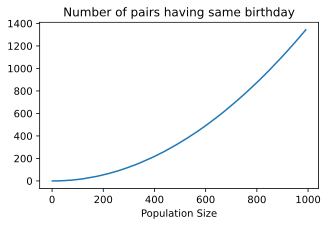

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(num, pair)
ax.set_title("Number of pairs having same birthday")
ax.set_xlabel("Population Size");

In [12]:
def check_captcha(m:int, n:int) -> float:
    """
    Calculate the expected number of duplicates based on
        m: sample size
        n: claimed popultion size
    ------
    Return: expected number of duplicates 
    """
    return (m * (m-1)) / (2 * n)

In [14]:
pop_size = 1e6
sample_size = list(range(1, 2000, 10))
expected_duplicates = [check_captcha(x, pop_size) for x in sample_size]

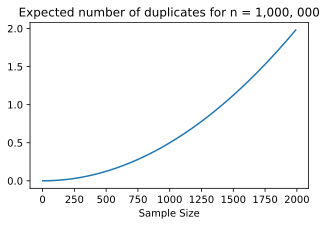

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(sample_size, expected_duplicates)
ax.set_title("Expected number of duplicates for n = 1,000, 000")
ax.set_xlabel("Sample Size");

With $m = 1000$, if you see __10 pairwise duplicates__ and then you 
can suspect that something is up. But __how confident__ can you be
in your test?

## Markov's Inequality

If $X$ is a nonnegative random variable and $a > 0$, then the probability 
that $X$ is at least $a$ is at most the expectation of $X$ divided by $a$ 

$$ \mathbb{P}(X \geq a) \leq \frac{ \mathrm{E} [X]}{a}$$

It is easy to prove this. For a discrete random variable, we have

$$
\begin{aligned}
\mathrm{E}[X] = \sum \mathbb{P}(X = x) \cdot x & \geq \sum_{x \geq a} \mathbb{P}(X = x) \cdot s \\
& \geq \sum_{x \geq a} \mathbb{P}(X = x) \cdot a \\ 
& = a \cdot \mathbb{P}(X \geq a)
\end{aligned}
$$

In [17]:
def markov_prob(a:int, expectation) -> float:
    """
    Calculate the markov inequality (the estimated probability) 
    for checking captchas
        a: bound value
        expectation: the expectation of X - E[X]
    -------
    Return: the estimated probability
    """
    return expectation / a

In [26]:
count_pairs = list(range(1, 100, 5))
expectation = check_captcha(1000, 1e6)
prob = [markov_prob(x, expectation) for x in count_pairs]

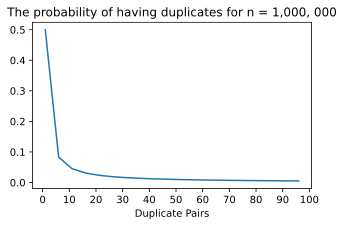

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(count_pairs, prob)
ax.set_title("The probability of having duplicates for n = 1,000, 000")
ax.set_xlabel("Duplicate Pairs")
ax.set_xticks(np.arange(0, 102, 10));

If you found 10 duplicates with $m = 1000$ for claimed $n = 1,000,000$, then 
you can pretty sure  that the population size is not as large as they claimed. 

## Example 2: approximate counting 


This might seem like a straightforward question, but how high can you count 
on your fingers? This depends on how many fingers you have, but in general 
the answer has to be 10, right? 

Well, not exactly, it can actually go much, much higher with a few simple abstractions.

If your fingers are out, they count as a 1 for that register. If they are not, 
they count as a 0. This means that after you have decided on the appropriate 
finger configuration, you have created a bitstring that can be read from 
left to right, where each number represents a power of 2. For this example,
we would have a bitstring of 1110010101, which reads to 917. 

Because you have 10 fingers and each one represents a power of 2, 
you can count up to a maximum of $2^{10} - 1$ or $1023$,
which is about 100 times higher than simple finger counting!


Approximate Counting algorithms are techniques that allow us to count a large number 
of events using a very small amount of memory. It was invented by 
Robert Morris in 1977 and was published through his paper 
[Counting large number of events in small registers](https://www.inf.ed.ac.uk/teaching/courses/exc/reading/morris.pdf). The algorithm uses probabilistic 
techniques to increment the counter, although it does not guarantee the 
exactness it does provide a fairly good estimate of the true value while 
inducing a minimal and yet fairly constant relative error. 


__A solution.__ Although we only 10 figures, we could count a very large number
even without using binary representation. We could do this:

- only count when our number hits upto 100 each time
- this means we could count $10 \times 100 = 1000$
- same logic could apply for binary register
- for instance, we could count every alternate event (if the number of events is odd or even)

__Coin flips.__ Now, we will use a coin, which means, every time we see a new event, 
we flip a coin and

- if it lands heads we increase the count 
- otherwise we don't.

This coin flip based counting technique is a Binomial Distribution with parameters
$(n, p)$ where $n$ is the total number of events seen and $p$ is the 
success probability. Let's set up the probability model:

- population size: $n$
- probability of one trial: $p = 1/2$
- random variable $X_n \sim \text{Binomial}(n, p) $ 

The expected value will be the value that counter
register recorded:

$$\mu = E(X_n) = np = n/2$$

__Bernoulli distribution.__ The expected value of a Bernoulli random variable $X$
is 

$$\mathrm{E}[X] = p$$

We can also find 

$$\operatorname {E} [X^{2}]=\Pr(X=1)\cdot 1^{2}+\Pr(X=0)\cdot 0^{2}=p\cdot 1^{2}+q\cdot 0^{2}=p=\operatorname {E} [X] $$

From this follows

$$ \operatorname {Var} [X]=\operatorname {E} [X^{2}]-\operatorname {E} [X]^{2}=\operatorname {E} [X]-\operatorname {E} [X]^{2}=p-p^{2}=p(1-p)=pq $$


__Binomial distribution.__ If $X \sim B(n, p)$, then the expected value of $X$
is 

$$ \operatorname {E} [X]=np. $$

This follows from the linearity of the expected value along with the fact 
that $X$ is the sum of $n$ identical Bernoulli random variables, 
each with expected value $p$. In other words, if $X_1, \cdots, X_n$ 
are identical (and independent) Bernoulli random variables with
parameter $p$, then $X = X_1 + \cdots + X_n$ and

$$ \operatorname {E} [X]=\operatorname {E} [X_{1}+\cdots +X_{n}]=\operatorname {E} [X_{1}]+\cdots +\operatorname {E} [X_{n}]=p+\cdots +p=np.$$

The variance is:

$$\operatorname {Var} (X)=npq=np(1-p).$$

This similarly follows from the fact that the variance of a sum of independent random variables is the sum of the variances.

In [60]:
def binomial_sim(trials:int, n:int, p:float):
    """
    Simulate the frequency and probability of getting exactly k success 
    in n indepdendent Bernoulli trials 
        trials: number of trials
        n: number of events 
        p: probability of one successful event
    --------
    Return: frequency and probability
    """
    heads = []
    for i in range(trials):
        coins = [np.random.random() for x in range(n)]
        heads.append(len([h for h in coins if h>=p]))

    return heads, np.sum(heads)/trials/n


In [91]:
sim_results = [
    {'p': 0.5, 'n': 20, 'results': []},
    {'p': 0.7, 'n': 20, 'results': []},
    {'p': 0.5, 'n': 40, 'results': []}
]

In [92]:
for s in sim_results:
    heads_freq, heads_prob = binomial_sim(1000, s['n'], s['p'])
    s['results'].append(heads_freq)

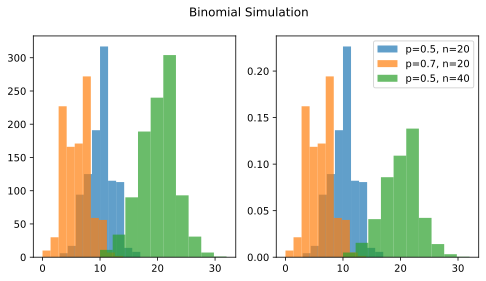

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for s in sim_results:
    axes[0].hist(s['results'], alpha=0.7)
    axes[1].hist(s['results'], density=True, alpha=0.7)
axes[1].legend(['p=0.5, n=20', 'p=0.7, n=20', 'p=0.5, n=40'])
fig.suptitle("Binomial Simulation"); 

__Morris' example.__ For $p = 1/2$, after 400 events, $\mu = 200$ and $\sigma = 10$
, and our estimate of the true number is $2 X_n$. So $95\%$ of the time,
our estimate is within $2 (2 \sigma) = 40$ of the actual error or $10\%$
error.

Imagine that the value $X_n$ stored in a counter is

$$X_n = \log_2(1 + n)$$ 

where $n$ is the number of events that have occurred so far. The plus one
is to make sure that $n = 0 \equiv X_n = 0$. At any given time, our best
estimate of $n$ is 

$$\hat{\theta}_n = 2^{X_n} -1 $$

To summarize:

- n: number of events
- $X_n$ number stored in a counter
- $\hat{\theta}_n$ is the estimation.

Suppose in the midst of counting, we have the value $X_n$ stored in 
the register. Whenever we get another event, we attempt to 
modify the contents of the register in the most _appropriate_ way. The question
is: _how could we modify the contents of the register in the most appropriate way_ ?

In [104]:
def count_only_log2(n:int):
    """
    Calculate the value stored in a counter
    """
    return np.log2(1 + n)

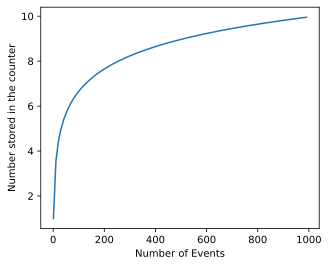

In [110]:
nx = np.arange(1, 1000, 10)
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.plot(nx, count_only_log2(nx))
ax.set_xlabel("Number of Events")
ax.set_ylabel("Number stored in the counter");

The above graph shows that even though we have 1000 events, the counter only 
need to count upto 10 as it counts in the following way: 

$$X_n = \log_2(1 + n)$$ 

The tradeoff is to lose accuracy to count more as for instance:

- $\log_2(100) = 6.64$, we may count it as 6
- $\log_2(120) = 6.91$, we may still count it as 6
- $\log_2(130) = 7.02$, we may now count it as 7



Therefore, to reverse the map, we have 

$$\hat{\theta}_n = 2^{X_n} -1 $$

For the next event: 

$$\hat{\theta}_n +1 = 2^{X_n} $$


Therefore to increment the counter, we compute

$$X_{n+1} = \log_2(1 + 2^{X_n})$$

However, values we calculated or maped are not integer anyway. If we round 
the value, we might accumulate errors in our approximation. Instead, what we
can do is the following (by replying on probabiliy). 

First, initialize $X_0 = 0$. Next, for $n > 0$, compute

$$p = \frac{1}{2^X}, \quad r \sim \text{Uniform}(0, 1)$$

Then the value of $X_{n+1}$ is

$$
X_{n+1} = \begin{cases}
X_n + 1 & \text{if} \  p > r \\
X_n & \text{else}
\end{cases}
$$



__Compare two methods.__ Now, we will compare two ways to count:

- our own method: $X_{n} = \log_2(1+n)$ with $X_0 = 0$ 
- Morris' method 

In [154]:
def count_by_rounding(n:int):
    """
    Count by round the formula log_2(1+2^X_n)
    """
    count = []
    vals = []
    for i in range(n):
        x_n = np.log2(1 + i)
        count.append(np.round(x_n))
    
    for c in count:
        theta_n = 2**c -1
        vals.append(theta_n)

    return vals

In [174]:
def morris_count(n:int):
    """
    Implement morris's approximate counting
    """
    count = []
    count.append(0)
    vals = []
    for i in range(n):
        p = 1/(2**count[i])
        r = np.random.random() 
        if p > r:
            count.append(count[i] + 1)
        else:
            count.append(count[i])

    for c in count[1:]:
        theta_n = 2**c -1
        vals.append(theta_n)

    return vals

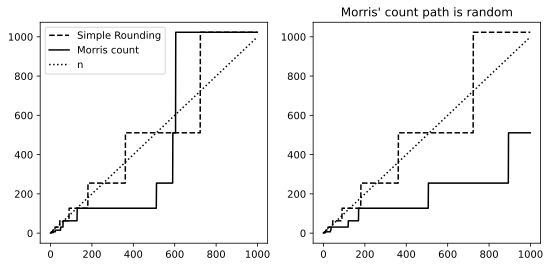

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
axes[0].plot(nx, count_by_rounding(1000), 'k--', label='Simple Rounding')
axes[0].plot(nx, morris_count(1000), 'k', label='Morris count');
axes[0].plot(nx, nx, 'k:', label='n')
axes[0].legend()
axes[1].plot(nx, count_by_rounding(1000), 'k--')
axes[1].plot(nx, morris_count(1000), 'k');
axes[1].plot(nx, nx, 'k:')
axes[1].set_title("Morris' count path is random");

Every time when we run Morris' approximate counting, the result is 
different as it depends on the value of $r$. However we can show 
that the expectation of the approximation: 

$$\hat{\theta}_n = 2^{X_n} -1 $$ 

is 

$$\mathrm{E}[\hat{\theta}_n] = n$$

For the base case when $n = 0$, we have $ \mathrm{E}[2^{X_0} - 1] = 0$. 

Now, we will prove the above expectation by induction. With the condition that
base case is true, assume that 

$$\mathrm{E}[\hat{\theta}_n] = n$$

Then 

$$
\begin{aligned}
\mathbb{E}\left[\hat{\theta}_{n+1}\right] & \triangleq \mathbb{E}\left[2^{X_{n+1}}-1\right] \\
& =\sum_{i=1}^{\infty} \mathbb{P}\left(X_n=i\right) \mathbb{E}\left[2^{X_{n+1}} \mid X_n=i\right]-1 \\
& =\sum_{i=1}^{\infty} \mathbb{P}\left(X_n=i\right)[\underbrace{\frac{1}{2^j} \cdot 2^{j+1}}_{\text {increment }}+\underbrace{\left(1-\frac{1}{2^j}\right) \cdot 2^j}_{\text {no change }}]-1 \\
& =\sum_{i=1}^{\infty} \mathbb{P}\left(X_n=i\right)\left(2^j+1\right)-1 \\
& =\sum_{i=1}^{\infty} \mathbb{P}\left(X_n=i\right) 2^j+\sum_{i=1}^{\infty} \mathbb{P}\left(X_n=i\right)-1 \\
& =\mathbb{E}\left[2^{X_n}\right] \\
& =n+1 .
\end{aligned}
$$

In [122]:
np.round(np.log2(90))

6.0

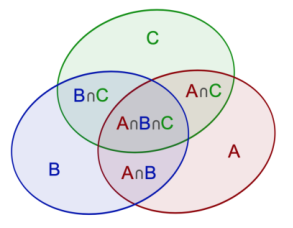

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
lu1 = mplt.image.imread("../images/inclusion-exclusion.png")
ax.imshow(lu1)
ax.axis('off')
plt.savefig("../images/inclusion-exclusion.svg", dpi=300, bbox_inches='tight')

In [ ]:
def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r'\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}']
    return '\n'.join(rv)

## References

1. [MIT-18.310 Notes](https://math.mit.edu/~goemans/18310S15/probability-notes.pdf)
2. [Approximate Counting with Morris's Algorithm](https://gregorygundersen.com/blog/2019/11/11/morris-algorithm/)